In [1]:
!pip install scikit-optimize

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

import statsmodels.stats.api as sms
from matplotlib import style
style.use('seaborn')
%matplotlib inline
#graphs in svg look clearer
%config InlineBackend.figure_format = 'svg' 

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Functions

In [4]:
from sklearn import metrics

def mae(y_gt, Y_pr):
    return metrics.mean_absolute_error(y_gt, Y_pr)

def mse(y_gt, Y_pr):
    return metrics.mean_squared_error(y_gt, Y_pr)

def rmse(y_gt, Y_pr):
    my_mse = mse(y_gt, Y_pr)
    return np.sqrt(my_mse)

def medae(y_gt, Y_pr):
    return metrics.median_absolute_error(y_gt, Y_pr)

def R2(y_gt, Y_pr):
    return metrics.r2_score(y_gt, Y_pr)

def calc_metrics(true, pred):

    mse1 = mse(true, pred)

    rmse1 = rmse(true, pred)

    mae1 = mae(true, pred)

    medae1 = medae(true, pred)

    R21 = R2(true, pred)

    print('*** VAL **: ')
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse1, rmse1, R21, mae1, medae1))
    print('-'*30)

In [5]:
def target_distr_linear(train_label, test_label, predicted_dv): 
    sns.kdeplot(train_label, label='train')
    sns.kdeplot(test_label, label='test')
    sns.kdeplot(predicted_dv, label='pred')
    plt.legend()
    plt.show()

    sns.scatterplot(test_label, predicted_dv, color='blueviolet')
    plt.title('Linear model')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.show()

In [6]:
from scipy.stats import norm

def draw_histogram(data):
    f,ax_hist = plt.subplots(1)
    sns.distplot(data, hist=True,  kde=True, rug=True, bins=10, fit=norm, ax=ax_hist);
    plt.xlabel("values")
    plt.title("Distribution") 

    mean=data.mean()

    ax_hist.axvline(mean, color='r', linestyle='--', label=f"Mean={mean:.3f}")
    ax_hist.legend()

    plt.show()

In [7]:
def draw_res_analys(errors, pred):
    sns.scatterplot(list(range(len(errors))),errors);
    plt.title("Distibution of errors")
    plt.ylabel('Error');
    plt.xlabel('Index');
    plt.show();

    sns.scatterplot(pred,errors);
    plt.title('Relationship of true value vs error (resudual analysis)')
    plt.ylabel('Error');
    plt.xlabel('True value');
    plt.show();

In [8]:
def get_feature_imp(model, X_train):
    imp = model.get_feature_importance(data=X_train)
    fig, axes = plt.subplots(1, 1, figsize=(12, 8))
    axes.barh(width=imp, y=model.feature_names_)
    axes.set_title('Finetuned Catboost feature importance')
    plt.show()

# Unhashing

In [9]:
import pickle

with open('./NEW_OKKO_KINOP_parsed_ratings_df.pkl', 'rb') as f:
    df = pickle.load(f, encoding='utf-8')

In [10]:
genre_mapping = {'0ef0aa70-f86c-4141-8054-8b39af97867d': 'Biography',
                '287a1485-7a88-4c2f-bc94-ca418b6c47a1': 'Cartoons',
                '66fad8c3-d84f-458d-a8bf-5b4f154969e0': 'Show',
                '7b7c97f6-1adb-4b43-bfe8-9455812fac0b': 'Theater',
                '9fa28b61-a257-4a3e-945b-a9ef76a146d6': 'Fantasy',
                'b0836a1d-635f-4d89-bcc5-25d10ba56642': 'Anime',
                'd7214feb-8c11-4aea-aabb-ac98a8d56fd5': 'History',
                'dc65dbc8-34ba-4df1-b32c-4f895e10bff8': 'Shorts',
                'eb001d27-5be3-4d42-9d88-90d593f2627d': 'War_movies',
                '364fdc2e-bdfe-40be-b2c5-d30f43ec432e': 'Crime',
                '1f22ccf1-288a-4e6e-b39a-7502799e7125': 'Лекции',
                '6d640e04-be3a-4c8c-852e-4e9b12449d5d': 'Концерты',
                '7b7c97f6-1adb-4b43-bfe8-9455812fac0b': 'Театр',
                '2f7908cc-e2fd-43cf-b626-ec1aef436160': 'Курсы'}

df['genre'] = df['genre'].apply(lambda x: [genre_mapping[g] if g in genre_mapping else g for g in x])

In [11]:
df.shape

(10731, 27)

In [12]:
df.isna().sum()

age_access_type        0
name                   0
director               3
genre                  0
average_rating       459
type                   0
country                0
release_type           0
release_year           0
duration               0
actor                  0
element_uid            0
ACTOR                211
COMPOSER            1390
DESIGN              1488
DIRECTOR             152
EDITOR              1896
OPERATOR            1479
PRODUCER            1193
WRITER               339
BUDGET              7432
MARKETING          10478
RUS                 7101
USA                 7082
WORLD               5434
element_id             0
rating                 0
dtype: int64

In [13]:
all_genres = []

for item_genres in df['genre']:
    all_genres.extend(item_genres)

In [14]:
all_unique_genres = set(all_genres)

In [15]:
len(all_unique_genres)

33

In [16]:
all_unique_genres

{'3e6e08b4-2bb0-46d6-aee7-98780e394c86',
 '5743ecbe-a141-47d6-a7d7-e800f41cb6f5',
 '5c403894-146a-47a4-ae75-9f1956a30dbb',
 'Action',
 'Adventure',
 'Anime',
 'ArtHouse',
 'Biography',
 'Cartoons',
 'Comedy',
 'Crime',
 'Detective',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'ForKids',
 'History',
 'Horror',
 'Humor',
 'Melodrama',
 'Music',
 'Sci-Fi',
 'Shorts',
 'Show',
 'Sport',
 'Thriller',
 'Travel',
 'War_movies',
 'd7f6b51c-6ebe-4b9c-9aad-2c60792a7d9c',
 'Концерты',
 'Лекции',
 'Театр'}

# Preprocessing

1. Multiple value categorical features: tops' tf-idf
    * actor: top 5
    * country: 1st
    * genre: top 3
    * director: 1st 
2. Just categorical 
    * type: ohe
    * release year: periods: 1918-1969, 1970-1979, 1980-1989, ... с 2000 по годам
3. Numeric and categorical ordered
    * age_access: scale
    * avg_rating: knn-imputer, scale
    * duration: scale
4. textual
    * name: catboost.text
5. target:
    * log
    
## Multiple value categorical features: tops' tf-idf

### filter by year

In [17]:
d = df[df['release_year'] >= 2000]

In [18]:
d.shape

(8667, 27)

In [19]:
d.isna().sum()

age_access_type       0
name                  0
director              0
genre                 0
average_rating      443
type                  0
country               0
release_type          0
release_year          0
duration              0
actor                 0
element_uid           0
ACTOR               201
COMPOSER           1280
DESIGN             1397
DIRECTOR            147
EDITOR             1575
OPERATOR           1375
PRODUCER            412
WRITER              328
BUDGET             6107
MARKETING          8438
RUS                5134
USA                5844
WORLD              4238
element_id            0
rating                0
dtype: int64

In [20]:
d.columns

Index(['age_access_type', 'name', 'director', 'genre', 'average_rating',
       'type', 'country', 'release_type', 'release_year', 'duration', 'actor',
       'element_uid', 'ACTOR', 'COMPOSER', 'DESIGN', 'DIRECTOR', 'EDITOR',
       'OPERATOR', 'PRODUCER', 'WRITER', 'BUDGET', 'MARKETING', 'RUS', 'USA',
       'WORLD', 'element_id', 'rating'],
      dtype='object')

In [21]:
d = d[['age_access_type', 'name', 'genre', 
       'type', 'country', 'release_year', 'duration',
       'element_uid', 'ACTOR', 'COMPOSER', 
       'DESIGN', 'DIRECTOR', 'EDITOR',
       'OPERATOR', 'PRODUCER', 'WRITER',
       'BUDGET', 'MARKETING', 'RUS',
       'WORLD', 'rating']]

In [22]:
mltpl_cat_features = ['ACTOR', 'COMPOSER', 'DESIGN', 'DIRECTOR', 'EDITOR',
       'OPERATOR', 'PRODUCER', 'WRITER', 'country', 'genre']
num_features = [ 'duration']
cat_features = ['age_access_type']
skewed_num_features = ['duration', 'BUDGET', 'MARKETING', 'RUS', 'WORLD']
mltpl_cat_n_top = {'ACTOR': 10, 'country': 1, 'DIRECTOR': 1, 
                   'EDITOR': 1, 'OPERATOR': 1, 'PRODUCER': 5, 'WRITER': 2,
                   'DESIGN': 3, 'COMPOSER': 1, 'genre': 3}

In [23]:
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
# from spacy.tokenizer import Tokenizer
# from spacy.lang.en import English
# nlp = English()
import pandas as pd

class Preprocesser:
    def __init__(self, 
                mulpiple_cat_features: list,
                skewed_num_features: list,
               # text_features: list,
               # release_year_feature: str,
                mltpl_cat_n_top: dict):
        self.mulpiple_cat_features = mulpiple_cat_features
        self.skewed_num_features = skewed_num_features
        #self.text_features = text_features
        self.mltpl_cat_n_top = mltpl_cat_n_top
       # self.release_year_feature = release_year_feature
        # self.tokenizer = Tokenizer(nlp.vocab)
        
    def __get_top_n_mltpl_cat_features(self, df_pr, col):
        all_cats = []
        for element_values in df_pr[col]:
            all_cats.extend(element_values)
        return Counter(all_cats).most_common(self.mltpl_cat_n_top[col])
            
    def __preprocess_mulpiple_cat_features(self, df_pr):
        for col in self.mulpiple_cat_features:
            feature_number = self.mltpl_cat_n_top[col]
            df_pr[[f'{col}_{i}' for i in range(feature_number)]] = pd.DataFrame(np.full((len(df), feature_number), np.nan))
            for i in df_pr.index:
                names = df_pr.loc[i, col]
                if isinstance(names, float):
                    names = ['Na']
                for k, name in enumerate(names[:int(feature_number)]):
                    df_pr.loc[i, f'{col}_{k}'] = name
            df_pr.drop(col, axis=1, inplace=True)

        return df_pr
    
    def __preprocess_skewed_num_features(self, df_pr):
        for col in self.skewed_num_features:
            df_pr[col] = df_pr[col].apply(lambda x: np.log1p(x))
        return df_pr
    
    def __preprocess_text_features(self, df_pr):
        for col in self.text_features:
            df_pr[col] = df_pr[col].apply(lambda x: self.tokenizer(x))
        return df_pr
            
    def preprocess(self,
                   df: pd.DataFrame):
        df_pr = df.copy()
        df_pr = self.__preprocess_mulpiple_cat_features(df_pr)
        df_pr = self.__preprocess_skewed_num_features(df_pr)
        # df_pr = self.__preprocess_text_features(df_pr)
        
        return df_pr
        

In [24]:
preprocesser = Preprocesser(mltpl_cat_features,
            skewed_num_features,
            #text_features,
            mltpl_cat_n_top)

In [25]:
df_pr = preprocesser.preprocess(d)

In [26]:
df_pr.isnull().sum()

age_access_type       0
name                  0
type                  0
release_year          0
duration              0
element_uid           0
BUDGET             6107
MARKETING          8438
RUS                5134
WORLD              4238
rating                0
ACTOR_0               0
ACTOR_1             299
ACTOR_2             365
ACTOR_3             432
ACTOR_4             494
ACTOR_5             575
ACTOR_6             669
ACTOR_7             767
ACTOR_8             882
ACTOR_9             987
COMPOSER_0            0
DESIGN_0              0
DESIGN_1           2525
DESIGN_2           3812
DIRECTOR_0            0
EDITOR_0              0
OPERATOR_0            0
PRODUCER_0            0
PRODUCER_1          832
PRODUCER_2         1483
PRODUCER_3         2212
PRODUCER_4         2929
WRITER_0              0
WRITER_1           3071
country_0             0
genre_0               0
genre_1            2636
genre_2            5671
dtype: int64

In [27]:
df_pr.columns

Index(['age_access_type', 'name', 'type', 'release_year', 'duration',
       'element_uid', 'BUDGET', 'MARKETING', 'RUS', 'WORLD', 'rating',
       'ACTOR_0', 'ACTOR_1', 'ACTOR_2', 'ACTOR_3', 'ACTOR_4', 'ACTOR_5',
       'ACTOR_6', 'ACTOR_7', 'ACTOR_8', 'ACTOR_9', 'COMPOSER_0', 'DESIGN_0',
       'DESIGN_1', 'DESIGN_2', 'DIRECTOR_0', 'EDITOR_0', 'OPERATOR_0',
       'PRODUCER_0', 'PRODUCER_1', 'PRODUCER_2', 'PRODUCER_3', 'PRODUCER_4',
       'WRITER_0', 'WRITER_1', 'country_0', 'genre_0', 'genre_1', 'genre_2'],
      dtype='object')

In [28]:
df_pr.rename({'ACTOR_0': 'actor_0','ACTOR_1' : 'actor_1', 'ACTOR_2': 'actor_2', 'ACTOR_3':'actor_3',
       'ACTOR_4': 'actor_4', 'ACTOR_5': 'actor_5', 'ACTOR_6': 'actor_6', 'ACTOR_7':'actor_7',
              'ACTOR_8':'actor_8', 'ACTOR_9':'actor_9',
       'COMPOSER_0': 'composer_0', 'DESIGN_0': 'design_0', 'DESIGN_1': 'design_1', 'DESIGN_2': 'design_2',
              'DIRECTOR_0': 'director_0',
       'EDITOR_0': 'editor_0', 'OPERATOR_0': 'operator_0', 'PRODUCER_0': 'producer_0',
              'PRODUCER_1':  'producer_1', 'PRODUCER_2':  'producer_2',
       'PRODUCER_3':  'producer_3', 'PRODUCER_4': 'producer_4', 'WRITER_0':'writer_0', 'WRITER_1': 'writer_1'}, axis=1, inplace=True)

In [29]:
df_pr.rename({'BUDGET': 'budget','MARKETING' : 'marketing', 'RUS': 'rus', 'WORLD':'world'}, axis=1, inplace=True)

In [30]:
cat_features = ['age_access_type', 'type', 'actor_0', 'actor_1', 'actor_2', 'actor_3',
                'actor_4', 'actor_5', 'actor_6', 'actor_7', 'actor_8', 'actor_9',
                'country_0', 'director_0', 'editor_0', 'operator_0', 'producer_0',
                'producer_1', 'producer_2', 'producer_3', 'producer_4', 'writer_0',
                'writer_1', 'design_0', 'design_1', 'design_2', 'composer_0', 'genre_0',
                'genre_1', 'genre_2']

In [31]:
df_pr[cat_features] = df_pr[cat_features].replace(np.nan, 'Na')

In [32]:
# df_pr['average_rating'] = df_pr['average_rating'].astype(float)
df_pr['rating'] = df_pr['rating'].astype(float)
# df_pr['age_access_type'] =df_pr['age_access_type'].astype(int)

### target destrib

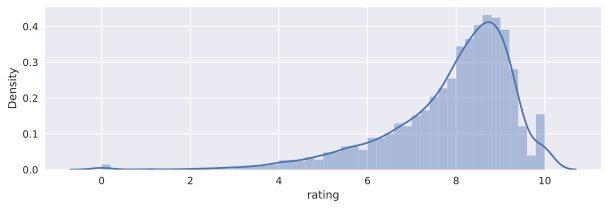

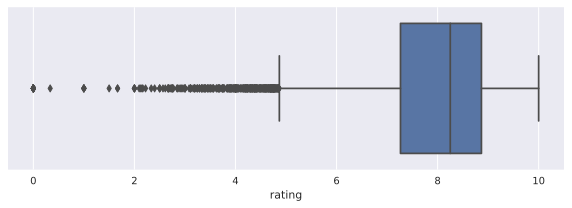

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
%matplotlib inline
#graphs in svg look clearer
%config InlineBackend.figure_format = 'svg' 

plt.figure(figsize=(10, 3))
sns.distplot(df_pr['rating'])
plt.show()

plt.figure(figsize=(10, 3))
sns.boxplot(df_pr['rating'], orient='h')
plt.show()

In [34]:
df_pr.columns

Index(['age_access_type', 'name', 'type', 'release_year', 'duration',
       'element_uid', 'budget', 'marketing', 'rus', 'world', 'rating',
       'actor_0', 'actor_1', 'actor_2', 'actor_3', 'actor_4', 'actor_5',
       'actor_6', 'actor_7', 'actor_8', 'actor_9', 'composer_0', 'design_0',
       'design_1', 'design_2', 'director_0', 'editor_0', 'operator_0',
       'producer_0', 'producer_1', 'producer_2', 'producer_3', 'producer_4',
       'writer_0', 'writer_1', 'country_0', 'genre_0', 'genre_1', 'genre_2'],
      dtype='object')

In [35]:
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8667 entries, 2 to 10730
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age_access_type  8667 non-null   int64  
 1   name             8667 non-null   object 
 2   type             8667 non-null   object 
 3   release_year     8667 non-null   int64  
 4   duration         8667 non-null   float64
 5   element_uid      8667 non-null   object 
 6   budget           2560 non-null   float64
 7   marketing        229 non-null    float64
 8   rus              3533 non-null   float64
 9   world            4429 non-null   float64
 10  rating           8667 non-null   float64
 11  actor_0          8667 non-null   object 
 12  actor_1          8667 non-null   object 
 13  actor_2          8667 non-null   object 
 14  actor_3          8667 non-null   object 
 15  actor_4          8667 non-null   object 
 16  actor_5          8667 non-null   object 
 17  actor_6      

In [36]:

def add_topN_feature(df,col, n ):
#     items = []

#     for i in df[col]:
#         items.extend(i)

    topN = [x[0] for x in Counter(df[col]).most_common()][:n+1]
#     print(items)
    return topN

toop =  add_topN_feature(train, 'DIRECTOR_0', 5)

NameError: name 'train' is not defined

In [37]:
toop

NameError: name 'toop' is not defined

## Split

In [38]:
from sklearn.model_selection import train_test_split

sorted_df = df_pr.sort_values('release_year')

test = sorted_df[sorted_df['release_year'] == 2022]
train = sorted_df[sorted_df['release_year'] != 2022]

# for looking at samples
test_df = test.copy(deep=True)
train_df = train.copy(deep=True)

test.drop(['release_year', 'element_uid', 'name'], axis=1, inplace=True)
train.drop(['release_year', 'element_uid', 'name'], axis=1, inplace=True)

X_test, y_test = test.drop('rating', axis=1), test['rating']
X, y = train.drop('rating', axis=1), train['rating']
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.1, 
                                                  shuffle=False)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


((7663, 35), (852, 35), (152, 35), (7663,), (852,), (152,))

In [39]:
X_train

age_access_type    type   duration     budget  marketing        rus  \
483                16   MOVIE  15.456447        NaN        NaN        NaN   
4687                0   MOVIE  15.278766        NaN        NaN        NaN   
1495               16   MOVIE  15.814284  14.220976        NaN  13.892473   
400                18   MOVIE  15.992533  17.686712        NaN        NaN   
4577                0   MOVIE  15.607270  18.258162   17.08127        NaN   
...               ...     ...        ...        ...        ...        ...   
4338               18   MOVIE  15.534700        NaN        NaN        NaN   
9316               18  SERIAL  15.221608        NaN        NaN        NaN   
7567               12   MOVIE  15.607270        NaN        NaN   8.064636   
7559               18   MOVIE  15.627073        NaN        NaN  10.293704   
2519               18   MOVIE  15.501910        NaN        NaN        NaN   

          world              actor_0            actor_1            actor_2  \
483   13.629527          Алан Рикман   Наташа Ричардсон    Рэйчел Гриффитс   
4687        NaN         Джоди Бенсон     Сэмюэл Э. Райт        Тара Стронг   
1495  13.206385    Сергей Бодров мл.   Виктор Сухоруков  Сергей Маковецкий   
400   19.150718         Майкл Дуглас  Бенисио Дель Торо  Кэтрин Зета-Джонс   
4577  19.028334          Гленн Клоуз     Жерар Депардье       Йоан Гриффит   
...         ...                  ...                ...                ...   
4338  11.571628  Александра Даддарио      Такэхиро Хира   Кэрис ван Хаутен   
9316        NaN     Виктор Кравченко       Марат Амиров     Андрей Васейко   
7567        NaN   Александр Рязанцев      Павел Табаков       Фёдор Лавров   
7559  11.447533         Альма Пёвсти     Криста Косонен         Шанти Рони   
2519        NaN           Зак Эйвери       Карли Чаикин      Самара Уивинг   

      ...         producer_1          producer_2        producer_3  \
483   ...        Рут Джексон         Дэвид Рубин      Мориц Борман   
4687  ...      Дэвид Лавгрен                  Na                Na   
1495  ...    Сергей Сельянов      Тимоти Е. Сабо        Тобин Обер   
400   ...  Маршалл Херсковиц         Эдвард Цвик     Камерон Джонс   
4577  ...      Фредерик Бови       Патриция Карр    Энфис Дикинсон   
...   ...                ...                 ...               ...   
4338  ...         Лорен Манн  Мицутоси Хамадзаки  Кристофер Ландри   
9316  ...     Мария Кулешова                  Na                Na   
7567  ...  Кира Саксаганская         Павел Горин    Елена Быстрова   
7559  ...      Андреа Рейтер        Аса Карлссон    Доме Карукоски   
2519  ...     Джефф Фриззелл    Джонатан Гарднер    Стивен Израэль   

              producer_4           writer_0            writer_1 country_0  \
483          Дэвид Браун       Саймон Бофой                  Na   germany   
4687                  Na  Элизабет Андерсон        Темпл Мэтьюз       usa   
1495       Игорь Каленов  Алексей Балабанов                  Na       usa   
400            Грэм Кинг         Саймон Мур       Стивен Гейган   germany   
4577  Эдвард С. Фельдман          Доди Смит       Кристен Бакли       usa   
...                  ...                ...                 ...       ...   
4338        Эндрю Феффер    Кэтрин Ханрахан                  Na       usa   
9316                  Na   Виктор Кравченко  Виктория Кравченко    russia   
7567     Любовь Свиблова    Дмитрий Рудаков                  Na    russia   
7559       Тиа Стальберг         Ээва Путро                  Na   finland   
2519       Эндрю Левитас      Колин Крайсел      Джеймс Крайсел       usa   

       genre_0    genre_1 genre_2  
483     Comedy  Melodrama   Drama  
4687  Cartoons         Na      Na  
1495    Action      Crime      Na  
400   Thriller      Drama      Na  
4577    Family         Na      Na  
...        ...        ...     ...  
4338     Drama         Na      Na  
9316    Comedy         Na      Na  
7567     Drama         Na      Na  
7559     Drama  Bi

### Model

In [40]:
import catboost as cat
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from scipy.stats import uniform, randint

In [41]:
train_dataset = cat.Pool(data=X_train,
                        label=y_train,
                         cat_features=cat_features)

test_dataset = cat.Pool(data=X_test, 
                        label=y_test,
                         cat_features=cat_features)

val_dataset = cat.Pool(X_val, y_val,
                       cat_features=cat_features)

cat_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'MAE',
    'verbose': True,
    'random_seed': 321,
    'allow_writing_files': False, 
    'cat_features': cat_features
}

cat_model = cat.CatBoostRegressor(**cat_params)

cat_model.fit(
    train_dataset,
    eval_set=val_dataset,
    early_stopping_rounds=500,
    verbose=100,
    plot=False
)

Learning rate set to 0.070105
0:	learn: 1.0282913	test: 1.1518304	best: 1.1518304 (0)	total: 221ms	remaining: 3m 40s
100:	learn: 0.7401389	test: 0.8607759	best: 0.8607512 (99)	total: 4.63s	remaining: 41.2s
200:	learn: 0.7182690	test: 0.8497622	best: 0.8497256 (199)	total: 8.45s	remaining: 33.6s
300:	learn: 0.7043878	test: 0.8459833	best: 0.8457389 (269)	total: 12.4s	remaining: 28.8s
400:	learn: 0.6902159	test: 0.8448958	best: 0.8448958 (400)	total: 16.2s	remaining: 24.2s
500:	learn: 0.6788479	test: 0.8447786	best: 0.8438041 (462)	total: 20.4s	remaining: 20.3s
600:	learn: 0.6685954	test: 0.8441213	best: 0.8438041 (462)	total: 24.5s	remaining: 16.3s
700:	learn: 0.6600045	test: 0.8433194	best: 0.8427958 (681)	total: 28.7s	remaining: 12.2s
800:	learn: 0.6507028	test: 0.8429243	best: 0.8426225 (769)	total: 33s	remaining: 8.19s
900:	learn: 0.6422989	test: 0.8428137	best: 0.8418234 (832)	total: 37.1s	remaining: 4.08s
999:	learn: 0.6338977	test: 0.8443006	best: 0.8418234 (832)	total: 41.4s	rem

In [42]:
y_pred = cat_model.predict(test_dataset)

In [43]:
calc_metrics(y_test, y_pred)

*** VAL **: 
MSE:   1.1101595548578935
RMSE:  1.0536410939489278
R2:    0.47209440075773135
MAE:   0.778926760722409
MedAE: 0.6169639103872089
------------------------------


In [44]:
cat_model.save_model('DEMO_okko_ratings_pred')

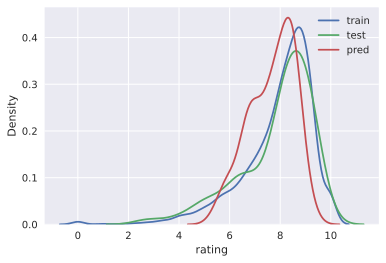

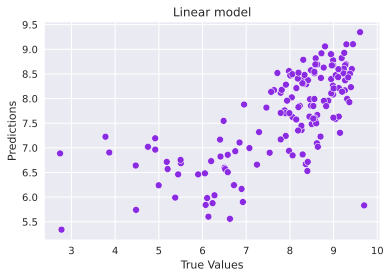

In [45]:
target_distr_linear(y_train, y_test, y_pred)   

In [47]:
def draw_target_distr(y_test, y_pred, save_fig=False):
    plt.figure(figsize=(12, 5))
    sns.distplot(y_test)
    sns.distplot(y_pred)
    plt.legend(['test', 'pred'])
    plt.savefig('okko_ratings_test_pred')
    plt.show()

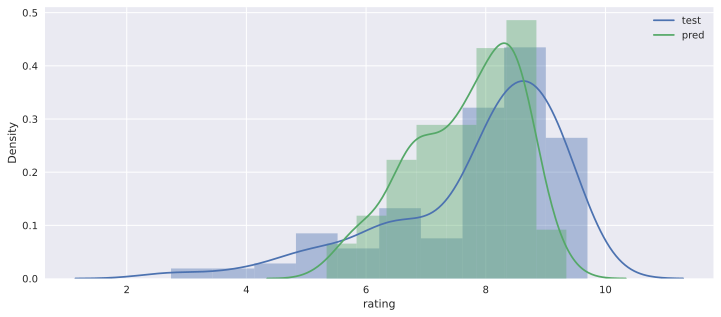

In [48]:
draw_target_distr(y_test, y_pred)

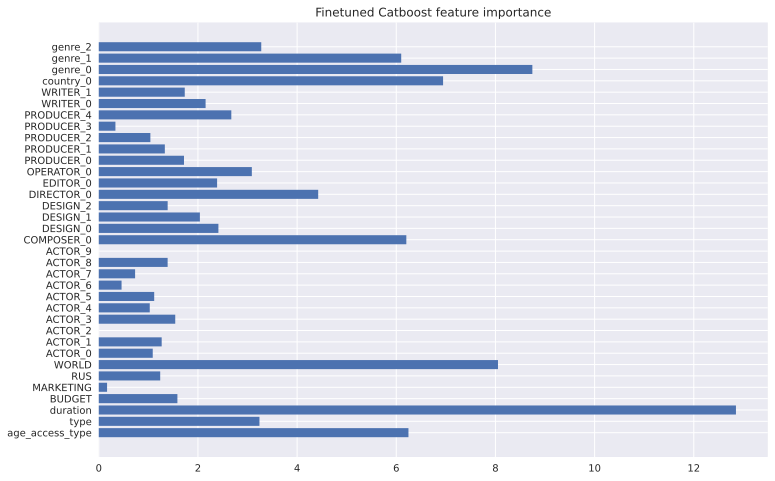

In [47]:
get_feature_imp(cat_model, train_dataset)

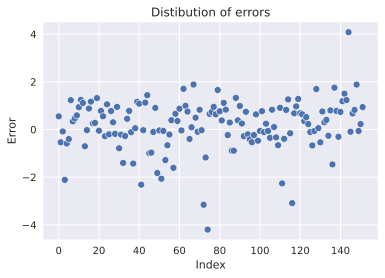

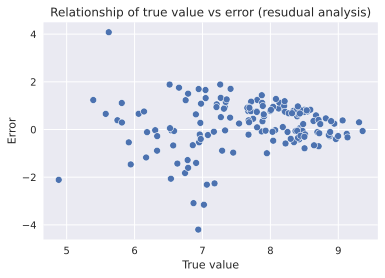

In [101]:
errors = y_test - y_pred
draw_res_analys(errors, y_pred)

### LOOKING AT TEST

In [102]:
test_df['PREDS'] = y_pred.tolist()
test_df['TARGET'] = y_test.tolist()
test_df

age_access_type                       name    type  release_year  \
14                  6  Пес-самурай и город кошек   MOVIE          2022   
2245               16      Координаты "Цитадель"   MOVIE          2022   
10728               6               Большие игры  SERIAL          2022   
7893               18  Другой мир: ночь вампиров   MOVIE          2022   
7826               12              Тайна амулета   MOVIE          2022   
...               ...                        ...     ...           ...   
10545              18            Отель Портофино  SERIAL          2022   
3448               16                   9 жизней   MOVIE          2022   
6878               12          Влюблённые в небо   MOVIE          2022   
10498              18           Женщины Движения  SERIAL          2022   
10730               6             Истоки футбола  SERIAL          2022   

        duration                           element_uid     BUDGET  MARKETING  \
14     15.534700  537ece24-2358-4108-a419-85cfd5952607        NaN        NaN   
2245   15.479437  6988476c-0c5e-496f-a618-1ab7626ddbee        NaN        NaN   
10728  15.096445  ce8d2906-a33f-4140-9ffe-e091990d71a4  17.216708        NaN   
7893   15.501910  a3b1b686-e95c-4a2c-95fb-9de439bf4f6c        NaN        NaN   
7826   15.545395  9ae35927-93e3-4a40-870f-a998abbeaa9f        NaN        NaN   
...          ...                                   ...        ...        ...   
10545  16.770421  20e62147-89d0-4e8b-9d24-2f2279560601        NaN        NaN   
3448   15.566448  a7979b64-cf82-4c7f-86d8-05670b07d1b0        NaN        NaN   
6878   15.636829  7176aabb-334a-41e1-90a5-c5199480fbba        NaN        NaN   
10498  16.633312  571bf312-75a1-4eee-94d7-deb62cd6f8b4        NaN        NaN   
10730  17.518293  6dd86e60-5d6d-475d-9b46-e989ac7a30b6        NaN        NaN   

             RUS        USA  ...           PRODUCER_3  \
14           NaN        NaN  ...            Яр Ландау   
2245         NaN        NaN  ...   С. Эстер Хорнштейн   
10728  14.196856  17.175217  ...       Адам Фогельсон   
7893         NaN        NaN  ...                   Na   
7826   12.057422        NaN  ...                   Na   
...          ...        ...  ...                  ...   
10545        NaN        NaN  ...       Небойша Тараба   
3448   12.154206        NaN  ...  Роберт Огден Барнум   
6878         NaN        NaN  ...                   Na   
10498        NaN        NaN  ...          Маршалл Бун   
10730        NaN        NaN  ...                   Na   

                        PRODUCER_4             WRITER_0         WRITER_1  \
14                       Адам Нэгл    Роберт Бен Гарант      Нэйт Хоппер   
2245                 Джейсон Кларк           Джиндер Хо       Джон Колли   
10728                  Марк Гордон         Аарон Соркин       Молли Блум   
7893                            Na  Мария Ли Метэрингем               Na   
7826                            Na    Ксения Набойченко     Ирина Демина   
...                            ...                  ...              ...   
10545         Китти Форбс Кэмпбелл                   Na               Na   
3448   Тамара Ступарич Де Ла Барра        Джиджи Гастон               Na   
6878                            Na          Кана Одзава  Масаки Татибана   
10498                   Джей Браун         Вилер Паркер  Девери Андерсон   
10730                           Na             Ши Чуань               Na   

           country_0                               genre_0  \
14               usa                                Action   
2245             usa                                Action   
10728         russia                               ForKids   
7893   great-britain                             Detective   
7826          russia                                Family   
...              ...                                   ...   
10545  great-britain                                 Drama   
3448             usa                              Thriller   


In [ ]:
{0: 'a8749d17-85fc-4ccf-ba56-75991c3a9da4',
1: '02eaefe0-296d-4e6f-b52f-2e2507d07103',
2: 'ee48def6-c311-4b73-a878-1a5d3d1679a3',
3: '9b202b16-55bf-418a-b01d-9f0329b18790',
4: '49a3d528-44c0-408e-b6fc-a1507ce7641a'}

# Tuning

In [49]:
train_dataset = cat.Pool(X_train, 
                         y_train,
                         cat_features=cat_features)

test_dataset = cat.Pool(X_test, 
                        y_test,
                        cat_features=cat_features)

cat_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'MAE',
    'verbose': True,
    'random_seed': 321,
    'allow_writing_files': False, 
    'cat_features': cat_features
}

In [50]:
parameters_distr = {'depth': randint(3, 7),
              'learning_rate': uniform(0.01, 0.1),
              'iterations': [100, 1000, 5000]
             }

cat_model = cat.CatBoostRegressor(**cat_params)
grid = RandomizedSearchCV(estimator=cat_model, param_distributions=parameters_distr, 
                            cv=5,
#                           n_jobs=-1, 
                          verbose=3)

grid.fit(X_train, y_train)

import pickle
with open('bestimator_ratings_kinop', 'wb') as f:
    pickle.dump(grid.best_estimator_, f)
grid.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 1.0546159	total: 30ms	remaining: 29.9s
1:	learn: 1.0275582	total: 60.6ms	remaining: 30.2s
2:	learn: 1.0040194	total: 86.4ms	remaining: 28.7s
3:	learn: 0.9840561	total: 117ms	remaining: 29.2s
4:	learn: 0.9688994	total: 143ms	remaining: 28.5s
5:	learn: 0.9532599	total: 172ms	remaining: 28.6s
6:	learn: 0.9409664	total: 199ms	remaining: 28.2s
7:	learn: 0.9300886	total: 228ms	remaining: 28.2s
8:	learn: 0.9181554	total: 257ms	remaining: 28.3s
9:	learn: 0.9075579	total: 284ms	remaining: 28.1s
10:	learn: 0.8986237	total: 311ms	remaining: 28s
11:	learn: 0.8902008	total: 339ms	remaining: 27.9s
12:	learn: 0.8817598	total: 369ms	remaining: 28s
13:	learn: 0.8741613	total: 397ms	remaining: 28s
14:	learn: 0.8689312	total: 421ms	remaining: 27.7s
15:	learn: 0.8618379	total: 449ms	remaining: 27.6s
16:	learn: 0.8562242	total: 476ms	remaining: 27.5s
17:	learn: 0.8513418	total: 503ms	remaining: 27.5s
18:	learn: 0.8468328	total: 530ms	re

164:	learn: 0.7447864	total: 4.52s	remaining: 22.9s
165:	learn: 0.7447707	total: 4.55s	remaining: 22.9s
166:	learn: 0.7447451	total: 4.58s	remaining: 22.8s
167:	learn: 0.7446750	total: 4.61s	remaining: 22.8s
168:	learn: 0.7444065	total: 4.63s	remaining: 22.8s
169:	learn: 0.7442137	total: 4.67s	remaining: 22.8s
170:	learn: 0.7441669	total: 4.7s	remaining: 22.8s
171:	learn: 0.7440294	total: 4.72s	remaining: 22.7s
172:	learn: 0.7439569	total: 4.75s	remaining: 22.7s
173:	learn: 0.7438663	total: 4.79s	remaining: 22.7s
174:	learn: 0.7438334	total: 4.81s	remaining: 22.7s
175:	learn: 0.7437059	total: 4.84s	remaining: 22.7s
176:	learn: 0.7434491	total: 4.87s	remaining: 22.7s
177:	learn: 0.7432422	total: 4.9s	remaining: 22.6s
178:	learn: 0.7432220	total: 4.93s	remaining: 22.6s
179:	learn: 0.7431641	total: 4.96s	remaining: 22.6s
180:	learn: 0.7430492	total: 4.99s	remaining: 22.6s
181:	learn: 0.7430135	total: 5.02s	remaining: 22.6s
182:	learn: 0.7429466	total: 5.05s	remaining: 22.5s
183:	learn: 0.

326:	learn: 0.7194305	total: 9.38s	remaining: 19.3s
327:	learn: 0.7191830	total: 9.41s	remaining: 19.3s
328:	learn: 0.7191202	total: 9.45s	remaining: 19.3s
329:	learn: 0.7191147	total: 9.47s	remaining: 19.2s
330:	learn: 0.7187694	total: 9.49s	remaining: 19.2s
331:	learn: 0.7185203	total: 9.52s	remaining: 19.2s
332:	learn: 0.7185186	total: 9.55s	remaining: 19.1s
333:	learn: 0.7184938	total: 9.59s	remaining: 19.1s
334:	learn: 0.7182050	total: 9.62s	remaining: 19.1s
335:	learn: 0.7181622	total: 9.65s	remaining: 19.1s
336:	learn: 0.7178348	total: 9.68s	remaining: 19s
337:	learn: 0.7177362	total: 9.71s	remaining: 19s
338:	learn: 0.7175200	total: 9.74s	remaining: 19s
339:	learn: 0.7173945	total: 9.77s	remaining: 19s
340:	learn: 0.7173840	total: 9.8s	remaining: 18.9s
341:	learn: 0.7173192	total: 9.83s	remaining: 18.9s
342:	learn: 0.7171975	total: 9.86s	remaining: 18.9s
343:	learn: 0.7171980	total: 9.9s	remaining: 18.9s
344:	learn: 0.7169534	total: 9.92s	remaining: 18.8s
345:	learn: 0.7168356	

491:	learn: 0.7003698	total: 14.3s	remaining: 14.7s
492:	learn: 0.7003492	total: 14.3s	remaining: 14.7s
493:	learn: 0.7001612	total: 14.3s	remaining: 14.7s
494:	learn: 0.7001393	total: 14.3s	remaining: 14.6s
495:	learn: 0.7000286	total: 14.4s	remaining: 14.6s
496:	learn: 0.6998663	total: 14.4s	remaining: 14.6s
497:	learn: 0.6998573	total: 14.4s	remaining: 14.5s
498:	learn: 0.6998537	total: 14.4s	remaining: 14.5s
499:	learn: 0.6997517	total: 14.5s	remaining: 14.5s
500:	learn: 0.6997187	total: 14.5s	remaining: 14.5s
501:	learn: 0.6995539	total: 14.5s	remaining: 14.4s
502:	learn: 0.6995309	total: 14.6s	remaining: 14.4s
503:	learn: 0.6992632	total: 14.6s	remaining: 14.4s
504:	learn: 0.6991612	total: 14.6s	remaining: 14.3s
505:	learn: 0.6987291	total: 14.7s	remaining: 14.3s
506:	learn: 0.6986823	total: 14.7s	remaining: 14.3s
507:	learn: 0.6985614	total: 14.7s	remaining: 14.3s
508:	learn: 0.6985093	total: 14.7s	remaining: 14.2s
509:	learn: 0.6984354	total: 14.8s	remaining: 14.2s
510:	learn: 

652:	learn: 0.6842164	total: 19.2s	remaining: 10.2s
653:	learn: 0.6841244	total: 19.3s	remaining: 10.2s
654:	learn: 0.6840679	total: 19.3s	remaining: 10.2s
655:	learn: 0.6838098	total: 19.3s	remaining: 10.1s
656:	learn: 0.6836814	total: 19.3s	remaining: 10.1s
657:	learn: 0.6835893	total: 19.4s	remaining: 10.1s
658:	learn: 0.6835748	total: 19.4s	remaining: 10s
659:	learn: 0.6835019	total: 19.4s	remaining: 10s
660:	learn: 0.6834978	total: 19.5s	remaining: 9.98s
661:	learn: 0.6833679	total: 19.5s	remaining: 9.95s
662:	learn: 0.6832835	total: 19.5s	remaining: 9.92s
663:	learn: 0.6832779	total: 19.5s	remaining: 9.89s
664:	learn: 0.6831515	total: 19.6s	remaining: 9.86s
665:	learn: 0.6830538	total: 19.6s	remaining: 9.83s
666:	learn: 0.6830360	total: 19.6s	remaining: 9.8s
667:	learn: 0.6829731	total: 19.7s	remaining: 9.77s
668:	learn: 0.6828328	total: 19.7s	remaining: 9.74s
669:	learn: 0.6828253	total: 19.7s	remaining: 9.71s
670:	learn: 0.6826889	total: 19.8s	remaining: 9.69s
671:	learn: 0.682

815:	learn: 0.6709002	total: 24.1s	remaining: 5.43s
816:	learn: 0.6708350	total: 24.1s	remaining: 5.4s
817:	learn: 0.6708164	total: 24.1s	remaining: 5.37s
818:	learn: 0.6707859	total: 24.2s	remaining: 5.34s
819:	learn: 0.6707079	total: 24.2s	remaining: 5.31s
820:	learn: 0.6706311	total: 24.2s	remaining: 5.28s
821:	learn: 0.6705407	total: 24.2s	remaining: 5.25s
822:	learn: 0.6704880	total: 24.3s	remaining: 5.22s
823:	learn: 0.6704661	total: 24.3s	remaining: 5.19s
824:	learn: 0.6704603	total: 24.3s	remaining: 5.16s
825:	learn: 0.6702646	total: 24.4s	remaining: 5.13s
826:	learn: 0.6700399	total: 24.4s	remaining: 5.1s
827:	learn: 0.6699948	total: 24.4s	remaining: 5.07s
828:	learn: 0.6699264	total: 24.5s	remaining: 5.04s
829:	learn: 0.6699021	total: 24.5s	remaining: 5.01s
830:	learn: 0.6695656	total: 24.5s	remaining: 4.99s
831:	learn: 0.6695408	total: 24.6s	remaining: 4.96s
832:	learn: 0.6695266	total: 24.6s	remaining: 4.93s
833:	learn: 0.6694238	total: 24.6s	remaining: 4.9s
834:	learn: 0.6

976:	learn: 0.6579182	total: 29s	remaining: 684ms
977:	learn: 0.6577924	total: 29.1s	remaining: 654ms
978:	learn: 0.6577230	total: 29.1s	remaining: 624ms
979:	learn: 0.6576257	total: 29.1s	remaining: 595ms
980:	learn: 0.6575910	total: 29.2s	remaining: 565ms
981:	learn: 0.6574936	total: 29.2s	remaining: 535ms
982:	learn: 0.6574841	total: 29.2s	remaining: 505ms
983:	learn: 0.6574061	total: 29.3s	remaining: 476ms
984:	learn: 0.6573207	total: 29.3s	remaining: 446ms
985:	learn: 0.6573108	total: 29.3s	remaining: 416ms
986:	learn: 0.6571659	total: 29.4s	remaining: 387ms
987:	learn: 0.6570171	total: 29.4s	remaining: 357ms
988:	learn: 0.6568824	total: 29.4s	remaining: 327ms
989:	learn: 0.6568527	total: 29.4s	remaining: 297ms
990:	learn: 0.6566987	total: 29.5s	remaining: 268ms
991:	learn: 0.6565502	total: 29.5s	remaining: 238ms
992:	learn: 0.6565013	total: 29.5s	remaining: 208ms
993:	learn: 0.6564332	total: 29.6s	remaining: 178ms
994:	learn: 0.6562998	total: 29.6s	remaining: 149ms
995:	learn: 0.

137:	learn: 0.7444405	total: 3.73s	remaining: 23.3s
138:	learn: 0.7442142	total: 3.76s	remaining: 23.3s
139:	learn: 0.7440970	total: 3.79s	remaining: 23.3s
140:	learn: 0.7440752	total: 3.82s	remaining: 23.3s
141:	learn: 0.7439437	total: 3.85s	remaining: 23.3s
142:	learn: 0.7439086	total: 3.87s	remaining: 23.2s
143:	learn: 0.7436546	total: 3.9s	remaining: 23.2s
144:	learn: 0.7433430	total: 3.93s	remaining: 23.2s
145:	learn: 0.7431853	total: 3.95s	remaining: 23.1s
146:	learn: 0.7428099	total: 3.98s	remaining: 23.1s
147:	learn: 0.7424161	total: 4.01s	remaining: 23.1s
148:	learn: 0.7422510	total: 4.04s	remaining: 23s
149:	learn: 0.7420849	total: 4.07s	remaining: 23s
150:	learn: 0.7420598	total: 4.09s	remaining: 23s
151:	learn: 0.7418042	total: 4.12s	remaining: 23s
152:	learn: 0.7415043	total: 4.15s	remaining: 23s
153:	learn: 0.7413631	total: 4.17s	remaining: 22.9s
154:	learn: 0.7412998	total: 4.22s	remaining: 23s
155:	learn: 0.7411372	total: 4.24s	remaining: 23s
156:	learn: 0.7407922	total

296:	learn: 0.7176680	total: 8.33s	remaining: 19.7s
297:	learn: 0.7174787	total: 8.36s	remaining: 19.7s
298:	learn: 0.7174358	total: 8.39s	remaining: 19.7s
299:	learn: 0.7172402	total: 8.42s	remaining: 19.7s
300:	learn: 0.7169438	total: 8.45s	remaining: 19.6s
301:	learn: 0.7166829	total: 8.49s	remaining: 19.6s
302:	learn: 0.7164990	total: 8.52s	remaining: 19.6s
303:	learn: 0.7164798	total: 8.54s	remaining: 19.6s
304:	learn: 0.7164627	total: 8.57s	remaining: 19.5s
305:	learn: 0.7163108	total: 8.6s	remaining: 19.5s
306:	learn: 0.7161433	total: 8.63s	remaining: 19.5s
307:	learn: 0.7160346	total: 8.66s	remaining: 19.5s
308:	learn: 0.7160122	total: 8.69s	remaining: 19.4s
309:	learn: 0.7157125	total: 8.72s	remaining: 19.4s
310:	learn: 0.7155145	total: 8.75s	remaining: 19.4s
311:	learn: 0.7155013	total: 8.78s	remaining: 19.4s
312:	learn: 0.7154313	total: 8.8s	remaining: 19.3s
313:	learn: 0.7153298	total: 8.83s	remaining: 19.3s
314:	learn: 0.7150230	total: 8.86s	remaining: 19.3s
315:	learn: 0.

455:	learn: 0.6996164	total: 13.1s	remaining: 15.6s
456:	learn: 0.6994468	total: 13.1s	remaining: 15.6s
457:	learn: 0.6992192	total: 13.1s	remaining: 15.5s
458:	learn: 0.6992303	total: 13.2s	remaining: 15.5s
459:	learn: 0.6991702	total: 13.2s	remaining: 15.5s
460:	learn: 0.6991450	total: 13.2s	remaining: 15.5s
461:	learn: 0.6991028	total: 13.2s	remaining: 15.4s
462:	learn: 0.6990647	total: 13.3s	remaining: 15.4s
463:	learn: 0.6990402	total: 13.3s	remaining: 15.4s
464:	learn: 0.6989990	total: 13.3s	remaining: 15.3s
465:	learn: 0.6989221	total: 13.4s	remaining: 15.3s
466:	learn: 0.6988496	total: 13.4s	remaining: 15.3s
467:	learn: 0.6987639	total: 13.4s	remaining: 15.3s
468:	learn: 0.6986883	total: 13.5s	remaining: 15.2s
469:	learn: 0.6986345	total: 13.5s	remaining: 15.2s
470:	learn: 0.6985764	total: 13.5s	remaining: 15.2s
471:	learn: 0.6982293	total: 13.6s	remaining: 15.2s
472:	learn: 0.6982129	total: 13.6s	remaining: 15.1s
473:	learn: 0.6981307	total: 13.6s	remaining: 15.1s
474:	learn: 

615:	learn: 0.6839422	total: 17.9s	remaining: 11.2s
616:	learn: 0.6839504	total: 18s	remaining: 11.1s
617:	learn: 0.6838129	total: 18s	remaining: 11.1s
618:	learn: 0.6836973	total: 18s	remaining: 11.1s
619:	learn: 0.6836038	total: 18s	remaining: 11.1s
620:	learn: 0.6835074	total: 18.1s	remaining: 11s
621:	learn: 0.6833993	total: 18.1s	remaining: 11s
622:	learn: 0.6833501	total: 18.1s	remaining: 11s
623:	learn: 0.6833129	total: 18.2s	remaining: 10.9s
624:	learn: 0.6833174	total: 18.2s	remaining: 10.9s
625:	learn: 0.6832258	total: 18.2s	remaining: 10.9s
626:	learn: 0.6831836	total: 18.3s	remaining: 10.9s
627:	learn: 0.6831454	total: 18.3s	remaining: 10.8s
628:	learn: 0.6830780	total: 18.3s	remaining: 10.8s
629:	learn: 0.6829959	total: 18.4s	remaining: 10.8s
630:	learn: 0.6829424	total: 18.4s	remaining: 10.8s
631:	learn: 0.6828585	total: 18.4s	remaining: 10.7s
632:	learn: 0.6827562	total: 18.5s	remaining: 10.7s
633:	learn: 0.6826905	total: 18.5s	remaining: 10.7s
634:	learn: 0.6826213	tota

776:	learn: 0.6705851	total: 22.8s	remaining: 6.55s
777:	learn: 0.6705524	total: 22.9s	remaining: 6.52s
778:	learn: 0.6705370	total: 22.9s	remaining: 6.5s
779:	learn: 0.6704712	total: 22.9s	remaining: 6.47s
780:	learn: 0.6701045	total: 23s	remaining: 6.44s
781:	learn: 0.6699756	total: 23s	remaining: 6.41s
782:	learn: 0.6699476	total: 23s	remaining: 6.38s
783:	learn: 0.6699048	total: 23s	remaining: 6.35s
784:	learn: 0.6698364	total: 23.1s	remaining: 6.32s
785:	learn: 0.6697926	total: 23.1s	remaining: 6.29s
786:	learn: 0.6697180	total: 23.1s	remaining: 6.26s
787:	learn: 0.6696708	total: 23.2s	remaining: 6.23s
788:	learn: 0.6696525	total: 23.2s	remaining: 6.2s
789:	learn: 0.6695277	total: 23.2s	remaining: 6.17s
790:	learn: 0.6694379	total: 23.3s	remaining: 6.15s
791:	learn: 0.6693563	total: 23.3s	remaining: 6.12s
792:	learn: 0.6691474	total: 23.3s	remaining: 6.09s
793:	learn: 0.6690474	total: 23.3s	remaining: 6.06s
794:	learn: 0.6689551	total: 23.4s	remaining: 6.03s
795:	learn: 0.6688497	

937:	learn: 0.6577434	total: 27.8s	remaining: 1.83s
938:	learn: 0.6577023	total: 27.8s	remaining: 1.81s
939:	learn: 0.6576683	total: 27.8s	remaining: 1.78s
940:	learn: 0.6576157	total: 27.9s	remaining: 1.75s
941:	learn: 0.6575538	total: 27.9s	remaining: 1.72s
942:	learn: 0.6575454	total: 27.9s	remaining: 1.69s
943:	learn: 0.6575184	total: 28s	remaining: 1.66s
944:	learn: 0.6574124	total: 28s	remaining: 1.63s
945:	learn: 0.6573950	total: 28s	remaining: 1.6s
946:	learn: 0.6573080	total: 28.1s	remaining: 1.57s
947:	learn: 0.6572515	total: 28.1s	remaining: 1.54s
948:	learn: 0.6572033	total: 28.1s	remaining: 1.51s
949:	learn: 0.6571263	total: 28.1s	remaining: 1.48s
950:	learn: 0.6570956	total: 28.2s	remaining: 1.45s
951:	learn: 0.6570713	total: 28.2s	remaining: 1.42s
952:	learn: 0.6569720	total: 28.2s	remaining: 1.39s
953:	learn: 0.6569111	total: 28.3s	remaining: 1.36s
954:	learn: 0.6568369	total: 28.3s	remaining: 1.33s
955:	learn: 0.6566776	total: 28.3s	remaining: 1.3s
956:	learn: 0.656647

103:	learn: 0.7603165	total: 2.85s	remaining: 24.6s
104:	learn: 0.7599900	total: 2.88s	remaining: 24.6s
105:	learn: 0.7599282	total: 2.91s	remaining: 24.6s
106:	learn: 0.7593990	total: 2.94s	remaining: 24.5s
107:	learn: 0.7589837	total: 2.97s	remaining: 24.5s
108:	learn: 0.7587769	total: 3s	remaining: 24.5s
109:	learn: 0.7587131	total: 3.02s	remaining: 24.5s
110:	learn: 0.7584663	total: 3.05s	remaining: 24.4s
111:	learn: 0.7578993	total: 3.08s	remaining: 24.4s
112:	learn: 0.7576182	total: 3.11s	remaining: 24.4s
113:	learn: 0.7574284	total: 3.14s	remaining: 24.4s
114:	learn: 0.7572795	total: 3.17s	remaining: 24.4s
115:	learn: 0.7572797	total: 3.18s	remaining: 24.2s
116:	learn: 0.7569691	total: 3.21s	remaining: 24.2s
117:	learn: 0.7566922	total: 3.23s	remaining: 24.2s
118:	learn: 0.7565292	total: 3.26s	remaining: 24.2s
119:	learn: 0.7563197	total: 3.29s	remaining: 24.2s
120:	learn: 0.7560736	total: 3.33s	remaining: 24.2s
121:	learn: 0.7559903	total: 3.35s	remaining: 24.1s
122:	learn: 0.7

262:	learn: 0.7333586	total: 7.57s	remaining: 21.2s
263:	learn: 0.7330587	total: 7.59s	remaining: 21.2s
264:	learn: 0.7330738	total: 7.62s	remaining: 21.1s
265:	learn: 0.7328818	total: 7.66s	remaining: 21.1s
266:	learn: 0.7328383	total: 7.68s	remaining: 21.1s
267:	learn: 0.7328235	total: 7.72s	remaining: 21.1s
268:	learn: 0.7328084	total: 7.75s	remaining: 21.1s
269:	learn: 0.7327793	total: 7.78s	remaining: 21s
270:	learn: 0.7327481	total: 7.81s	remaining: 21s
271:	learn: 0.7327188	total: 7.83s	remaining: 21s
272:	learn: 0.7326531	total: 7.86s	remaining: 20.9s
273:	learn: 0.7326364	total: 7.89s	remaining: 20.9s
274:	learn: 0.7324740	total: 7.92s	remaining: 20.9s
275:	learn: 0.7322068	total: 7.95s	remaining: 20.9s
276:	learn: 0.7321122	total: 7.99s	remaining: 20.8s
277:	learn: 0.7318487	total: 8.02s	remaining: 20.8s
278:	learn: 0.7315674	total: 8.05s	remaining: 20.8s
279:	learn: 0.7315110	total: 8.08s	remaining: 20.8s
280:	learn: 0.7314270	total: 8.11s	remaining: 20.8s
281:	learn: 0.7313

426:	learn: 0.7120076	total: 12.4s	remaining: 16.6s
427:	learn: 0.7115716	total: 12.4s	remaining: 16.6s
428:	learn: 0.7115073	total: 12.5s	remaining: 16.6s
429:	learn: 0.7114648	total: 12.5s	remaining: 16.6s
430:	learn: 0.7114489	total: 12.5s	remaining: 16.5s
431:	learn: 0.7114389	total: 12.6s	remaining: 16.5s
432:	learn: 0.7111831	total: 12.6s	remaining: 16.5s
433:	learn: 0.7111018	total: 12.6s	remaining: 16.4s
434:	learn: 0.7110226	total: 12.6s	remaining: 16.4s
435:	learn: 0.7106935	total: 12.7s	remaining: 16.4s
436:	learn: 0.7103321	total: 12.7s	remaining: 16.4s
437:	learn: 0.7100274	total: 12.7s	remaining: 16.3s
438:	learn: 0.7098770	total: 12.8s	remaining: 16.3s
439:	learn: 0.7098593	total: 12.8s	remaining: 16.3s
440:	learn: 0.7097252	total: 12.8s	remaining: 16.2s
441:	learn: 0.7096144	total: 12.8s	remaining: 16.2s
442:	learn: 0.7095782	total: 12.9s	remaining: 16.2s
443:	learn: 0.7094627	total: 12.9s	remaining: 16.2s
444:	learn: 0.7093196	total: 12.9s	remaining: 16.1s
445:	learn: 

589:	learn: 0.6966058	total: 17.4s	remaining: 12.1s
590:	learn: 0.6963912	total: 17.4s	remaining: 12s
591:	learn: 0.6963726	total: 17.4s	remaining: 12s
592:	learn: 0.6959436	total: 17.4s	remaining: 12s
593:	learn: 0.6957724	total: 17.5s	remaining: 11.9s
594:	learn: 0.6957419	total: 17.5s	remaining: 11.9s
595:	learn: 0.6956174	total: 17.5s	remaining: 11.9s
596:	learn: 0.6955193	total: 17.6s	remaining: 11.9s
597:	learn: 0.6952742	total: 17.6s	remaining: 11.8s
598:	learn: 0.6950886	total: 17.6s	remaining: 11.8s
599:	learn: 0.6950003	total: 17.6s	remaining: 11.8s
600:	learn: 0.6949270	total: 17.7s	remaining: 11.7s
601:	learn: 0.6949140	total: 17.7s	remaining: 11.7s
602:	learn: 0.6948196	total: 17.7s	remaining: 11.7s
603:	learn: 0.6946867	total: 17.8s	remaining: 11.6s
604:	learn: 0.6946846	total: 17.8s	remaining: 11.6s
605:	learn: 0.6945884	total: 17.8s	remaining: 11.6s
606:	learn: 0.6945433	total: 17.9s	remaining: 11.6s
607:	learn: 0.6944562	total: 17.9s	remaining: 11.5s
608:	learn: 0.6944

754:	learn: 0.6807745	total: 22.2s	remaining: 7.21s
755:	learn: 0.6807393	total: 22.3s	remaining: 7.18s
756:	learn: 0.6807014	total: 22.3s	remaining: 7.15s
757:	learn: 0.6805552	total: 22.3s	remaining: 7.13s
758:	learn: 0.6804963	total: 22.3s	remaining: 7.09s
759:	learn: 0.6804927	total: 22.4s	remaining: 7.07s
760:	learn: 0.6803993	total: 22.4s	remaining: 7.04s
761:	learn: 0.6803157	total: 22.4s	remaining: 7.01s
762:	learn: 0.6802572	total: 22.5s	remaining: 6.98s
763:	learn: 0.6802434	total: 22.5s	remaining: 6.95s
764:	learn: 0.6802379	total: 22.5s	remaining: 6.92s
765:	learn: 0.6801373	total: 22.6s	remaining: 6.89s
766:	learn: 0.6800417	total: 22.6s	remaining: 6.86s
767:	learn: 0.6800229	total: 22.6s	remaining: 6.83s
768:	learn: 0.6799734	total: 22.6s	remaining: 6.8s
769:	learn: 0.6799740	total: 22.7s	remaining: 6.77s
770:	learn: 0.6798435	total: 22.7s	remaining: 6.74s
771:	learn: 0.6797233	total: 22.7s	remaining: 6.71s
772:	learn: 0.6796397	total: 22.8s	remaining: 6.68s
773:	learn: 0

915:	learn: 0.6687583	total: 27.1s	remaining: 2.49s
916:	learn: 0.6687434	total: 27.2s	remaining: 2.46s
917:	learn: 0.6687376	total: 27.2s	remaining: 2.43s
918:	learn: 0.6686423	total: 27.2s	remaining: 2.4s
919:	learn: 0.6685474	total: 27.3s	remaining: 2.37s
920:	learn: 0.6684450	total: 27.3s	remaining: 2.34s
921:	learn: 0.6684175	total: 27.3s	remaining: 2.31s
922:	learn: 0.6683231	total: 27.4s	remaining: 2.28s
923:	learn: 0.6682567	total: 27.4s	remaining: 2.25s
924:	learn: 0.6680839	total: 27.4s	remaining: 2.22s
925:	learn: 0.6680793	total: 27.4s	remaining: 2.19s
926:	learn: 0.6680583	total: 27.5s	remaining: 2.16s
927:	learn: 0.6679239	total: 27.5s	remaining: 2.13s
928:	learn: 0.6678676	total: 27.5s	remaining: 2.1s
929:	learn: 0.6677646	total: 27.6s	remaining: 2.07s
930:	learn: 0.6677427	total: 27.6s	remaining: 2.04s
931:	learn: 0.6676818	total: 27.6s	remaining: 2.01s
932:	learn: 0.6675648	total: 27.6s	remaining: 1.99s
933:	learn: 0.6674584	total: 27.7s	remaining: 1.96s
934:	learn: 0.

73:	learn: 0.7471714	total: 2.1s	remaining: 26.2s
74:	learn: 0.7466001	total: 2.12s	remaining: 26.2s
75:	learn: 0.7462252	total: 2.16s	remaining: 26.2s
76:	learn: 0.7459599	total: 2.19s	remaining: 26.2s
77:	learn: 0.7453529	total: 2.22s	remaining: 26.2s
78:	learn: 0.7450339	total: 2.25s	remaining: 26.2s
79:	learn: 0.7445923	total: 2.27s	remaining: 26.1s
80:	learn: 0.7442287	total: 2.3s	remaining: 26.1s
81:	learn: 0.7440661	total: 2.33s	remaining: 26.1s
82:	learn: 0.7440679	total: 2.34s	remaining: 25.9s
83:	learn: 0.7437922	total: 2.37s	remaining: 25.8s
84:	learn: 0.7436060	total: 2.39s	remaining: 25.8s
85:	learn: 0.7434489	total: 2.42s	remaining: 25.7s
86:	learn: 0.7434447	total: 2.42s	remaining: 25.4s
87:	learn: 0.7433816	total: 2.45s	remaining: 25.4s
88:	learn: 0.7429297	total: 2.48s	remaining: 25.4s
89:	learn: 0.7426697	total: 2.51s	remaining: 25.4s
90:	learn: 0.7426253	total: 2.54s	remaining: 25.4s
91:	learn: 0.7422174	total: 2.57s	remaining: 25.4s
92:	learn: 0.7420330	total: 2.6s	

234:	learn: 0.7202459	total: 6.79s	remaining: 22.1s
235:	learn: 0.7201232	total: 6.83s	remaining: 22.1s
236:	learn: 0.7197942	total: 6.86s	remaining: 22.1s
237:	learn: 0.7197657	total: 6.88s	remaining: 22s
238:	learn: 0.7196254	total: 6.92s	remaining: 22s
239:	learn: 0.7195617	total: 6.94s	remaining: 22s
240:	learn: 0.7195074	total: 6.97s	remaining: 22s
241:	learn: 0.7192159	total: 7s	remaining: 21.9s
242:	learn: 0.7191623	total: 7.03s	remaining: 21.9s
243:	learn: 0.7191210	total: 7.07s	remaining: 21.9s
244:	learn: 0.7189685	total: 7.1s	remaining: 21.9s
245:	learn: 0.7189109	total: 7.13s	remaining: 21.9s
246:	learn: 0.7186625	total: 7.16s	remaining: 21.8s
247:	learn: 0.7184850	total: 7.2s	remaining: 21.8s
248:	learn: 0.7181439	total: 7.23s	remaining: 21.8s
249:	learn: 0.7181061	total: 7.26s	remaining: 21.8s
250:	learn: 0.7181181	total: 7.3s	remaining: 21.8s
251:	learn: 0.7180915	total: 7.33s	remaining: 21.8s
252:	learn: 0.7179001	total: 7.37s	remaining: 21.7s
253:	learn: 0.7178452	tota

399:	learn: 0.7011026	total: 11.7s	remaining: 17.6s
400:	learn: 0.7010667	total: 11.7s	remaining: 17.5s
401:	learn: 0.7008285	total: 11.8s	remaining: 17.5s
402:	learn: 0.7007846	total: 11.8s	remaining: 17.5s
403:	learn: 0.7004374	total: 11.8s	remaining: 17.5s
404:	learn: 0.7003043	total: 11.9s	remaining: 17.4s
405:	learn: 0.7002427	total: 11.9s	remaining: 17.4s
406:	learn: 0.7000642	total: 11.9s	remaining: 17.4s
407:	learn: 0.6999999	total: 12s	remaining: 17.3s
408:	learn: 0.6999216	total: 12s	remaining: 17.3s
409:	learn: 0.6997069	total: 12s	remaining: 17.3s
410:	learn: 0.6995661	total: 12s	remaining: 17.3s
411:	learn: 0.6993270	total: 12.1s	remaining: 17.2s
412:	learn: 0.6993294	total: 12.1s	remaining: 17.2s
413:	learn: 0.6992213	total: 12.1s	remaining: 17.2s
414:	learn: 0.6991893	total: 12.2s	remaining: 17.1s
415:	learn: 0.6991214	total: 12.2s	remaining: 17.1s
416:	learn: 0.6989461	total: 12.2s	remaining: 17.1s
417:	learn: 0.6987583	total: 12.3s	remaining: 17.1s
418:	learn: 0.698571

562:	learn: 0.6852888	total: 16.6s	remaining: 12.9s
563:	learn: 0.6847141	total: 16.7s	remaining: 12.9s
564:	learn: 0.6846892	total: 16.7s	remaining: 12.8s
565:	learn: 0.6846896	total: 16.7s	remaining: 12.8s
566:	learn: 0.6845500	total: 16.8s	remaining: 12.8s
567:	learn: 0.6845419	total: 16.8s	remaining: 12.8s
568:	learn: 0.6844263	total: 16.8s	remaining: 12.7s
569:	learn: 0.6842429	total: 16.9s	remaining: 12.7s
570:	learn: 0.6842437	total: 16.9s	remaining: 12.7s
571:	learn: 0.6841144	total: 16.9s	remaining: 12.7s
572:	learn: 0.6840427	total: 16.9s	remaining: 12.6s
573:	learn: 0.6840395	total: 17s	remaining: 12.6s
574:	learn: 0.6840191	total: 17s	remaining: 12.6s
575:	learn: 0.6838255	total: 17s	remaining: 12.5s
576:	learn: 0.6837811	total: 17.1s	remaining: 12.5s
577:	learn: 0.6836842	total: 17.1s	remaining: 12.5s
578:	learn: 0.6833770	total: 17.1s	remaining: 12.5s
579:	learn: 0.6832140	total: 17.2s	remaining: 12.4s
580:	learn: 0.6830913	total: 17.2s	remaining: 12.4s
581:	learn: 0.6830

725:	learn: 0.6705042	total: 21.5s	remaining: 8.11s
726:	learn: 0.6704335	total: 21.5s	remaining: 8.09s
727:	learn: 0.6703673	total: 21.6s	remaining: 8.06s
728:	learn: 0.6703353	total: 21.6s	remaining: 8.03s
729:	learn: 0.6703341	total: 21.6s	remaining: 8s
730:	learn: 0.6702009	total: 21.7s	remaining: 7.97s
731:	learn: 0.6700433	total: 21.7s	remaining: 7.94s
732:	learn: 0.6700063	total: 21.7s	remaining: 7.91s
733:	learn: 0.6697000	total: 21.7s	remaining: 7.88s
734:	learn: 0.6696553	total: 21.8s	remaining: 7.85s
735:	learn: 0.6695468	total: 21.8s	remaining: 7.82s
736:	learn: 0.6694737	total: 21.8s	remaining: 7.79s
737:	learn: 0.6694480	total: 21.9s	remaining: 7.76s
738:	learn: 0.6693695	total: 21.9s	remaining: 7.73s
739:	learn: 0.6692987	total: 21.9s	remaining: 7.7s
740:	learn: 0.6691671	total: 22s	remaining: 7.67s
741:	learn: 0.6689739	total: 22s	remaining: 7.64s
742:	learn: 0.6689158	total: 22s	remaining: 7.62s
743:	learn: 0.6688989	total: 22s	remaining: 7.58s
744:	learn: 0.6687444	to

886:	learn: 0.6558850	total: 26.4s	remaining: 3.37s
887:	learn: 0.6557378	total: 26.5s	remaining: 3.34s
888:	learn: 0.6556569	total: 26.5s	remaining: 3.31s
889:	learn: 0.6556038	total: 26.6s	remaining: 3.28s
890:	learn: 0.6555976	total: 26.6s	remaining: 3.25s
891:	learn: 0.6555504	total: 26.6s	remaining: 3.22s
892:	learn: 0.6554754	total: 26.6s	remaining: 3.19s
893:	learn: 0.6554654	total: 26.7s	remaining: 3.16s
894:	learn: 0.6554047	total: 26.7s	remaining: 3.13s
895:	learn: 0.6553968	total: 26.7s	remaining: 3.1s
896:	learn: 0.6553673	total: 26.8s	remaining: 3.07s
897:	learn: 0.6552750	total: 26.8s	remaining: 3.04s
898:	learn: 0.6550514	total: 26.8s	remaining: 3.01s
899:	learn: 0.6548902	total: 26.9s	remaining: 2.98s
900:	learn: 0.6548033	total: 26.9s	remaining: 2.96s
901:	learn: 0.6547709	total: 26.9s	remaining: 2.92s
902:	learn: 0.6547539	total: 27s	remaining: 2.9s
903:	learn: 0.6546990	total: 27s	remaining: 2.87s
904:	learn: 0.6546206	total: 27s	remaining: 2.83s
905:	learn: 0.654585

50:	learn: 0.7391477	total: 1.31s	remaining: 24.5s
51:	learn: 0.7379132	total: 1.34s	remaining: 24.4s
52:	learn: 0.7368171	total: 1.37s	remaining: 24.5s
53:	learn: 0.7362772	total: 1.4s	remaining: 24.5s
54:	learn: 0.7348119	total: 1.43s	remaining: 24.5s
55:	learn: 0.7345805	total: 1.45s	remaining: 24.5s
56:	learn: 0.7338146	total: 1.48s	remaining: 24.5s
57:	learn: 0.7330134	total: 1.51s	remaining: 24.5s
58:	learn: 0.7319247	total: 1.54s	remaining: 24.5s
59:	learn: 0.7308647	total: 1.56s	remaining: 24.5s
60:	learn: 0.7305913	total: 1.59s	remaining: 24.5s
61:	learn: 0.7301941	total: 1.62s	remaining: 24.6s
62:	learn: 0.7301961	total: 1.63s	remaining: 24.3s
63:	learn: 0.7296719	total: 1.66s	remaining: 24.3s
64:	learn: 0.7296297	total: 1.69s	remaining: 24.3s
65:	learn: 0.7286395	total: 1.72s	remaining: 24.3s
66:	learn: 0.7281720	total: 1.75s	remaining: 24.3s
67:	learn: 0.7281763	total: 1.75s	remaining: 24.1s
68:	learn: 0.7275261	total: 1.78s	remaining: 24.1s
69:	learn: 0.7275138	total: 1.8s

215:	learn: 0.6998962	total: 5.81s	remaining: 21.1s
216:	learn: 0.6995692	total: 5.84s	remaining: 21.1s
217:	learn: 0.6993234	total: 5.87s	remaining: 21s
218:	learn: 0.6993206	total: 5.9s	remaining: 21s
219:	learn: 0.6991373	total: 5.92s	remaining: 21s
220:	learn: 0.6990959	total: 5.95s	remaining: 21s
221:	learn: 0.6990802	total: 5.98s	remaining: 21s
222:	learn: 0.6989997	total: 6.01s	remaining: 20.9s
223:	learn: 0.6989125	total: 6.04s	remaining: 20.9s
224:	learn: 0.6987379	total: 6.06s	remaining: 20.9s
225:	learn: 0.6985745	total: 6.09s	remaining: 20.9s
226:	learn: 0.6982950	total: 6.12s	remaining: 20.9s
227:	learn: 0.6979358	total: 6.15s	remaining: 20.8s
228:	learn: 0.6978988	total: 6.17s	remaining: 20.8s
229:	learn: 0.6978851	total: 6.2s	remaining: 20.8s
230:	learn: 0.6978698	total: 6.23s	remaining: 20.7s
231:	learn: 0.6977739	total: 6.26s	remaining: 20.7s
232:	learn: 0.6977112	total: 6.29s	remaining: 20.7s
233:	learn: 0.6974424	total: 6.32s	remaining: 20.7s
234:	learn: 0.6973683	to

375:	learn: 0.6803772	total: 10.3s	remaining: 17.2s
376:	learn: 0.6801351	total: 10.4s	remaining: 17.2s
377:	learn: 0.6801089	total: 10.4s	remaining: 17.1s
378:	learn: 0.6800969	total: 10.4s	remaining: 17.1s
379:	learn: 0.6800511	total: 10.5s	remaining: 17.1s
380:	learn: 0.6798680	total: 10.5s	remaining: 17.1s
381:	learn: 0.6798505	total: 10.5s	remaining: 17s
382:	learn: 0.6797808	total: 10.6s	remaining: 17s
383:	learn: 0.6796840	total: 10.6s	remaining: 17s
384:	learn: 0.6794941	total: 10.6s	remaining: 17s
385:	learn: 0.6794475	total: 10.7s	remaining: 16.9s
386:	learn: 0.6793797	total: 10.7s	remaining: 16.9s
387:	learn: 0.6792069	total: 10.7s	remaining: 16.9s
388:	learn: 0.6790196	total: 10.7s	remaining: 16.9s
389:	learn: 0.6788428	total: 10.8s	remaining: 16.8s
390:	learn: 0.6786127	total: 10.8s	remaining: 16.8s
391:	learn: 0.6784971	total: 10.8s	remaining: 16.8s
392:	learn: 0.6784748	total: 10.8s	remaining: 16.8s
393:	learn: 0.6783701	total: 10.9s	remaining: 16.7s
394:	learn: 0.678352

536:	learn: 0.6626598	total: 15s	remaining: 12.9s
537:	learn: 0.6624915	total: 15s	remaining: 12.9s
538:	learn: 0.6623908	total: 15.1s	remaining: 12.9s
539:	learn: 0.6622671	total: 15.1s	remaining: 12.8s
540:	learn: 0.6622804	total: 15.1s	remaining: 12.8s
541:	learn: 0.6622626	total: 15.1s	remaining: 12.8s
542:	learn: 0.6622051	total: 15.2s	remaining: 12.8s
543:	learn: 0.6621312	total: 15.2s	remaining: 12.7s
544:	learn: 0.6619476	total: 15.2s	remaining: 12.7s
545:	learn: 0.6617963	total: 15.3s	remaining: 12.7s
546:	learn: 0.6617240	total: 15.3s	remaining: 12.7s
547:	learn: 0.6616819	total: 15.3s	remaining: 12.6s
548:	learn: 0.6616481	total: 15.3s	remaining: 12.6s
549:	learn: 0.6616044	total: 15.4s	remaining: 12.6s
550:	learn: 0.6615873	total: 15.4s	remaining: 12.6s
551:	learn: 0.6615758	total: 15.4s	remaining: 12.5s
552:	learn: 0.6614954	total: 15.5s	remaining: 12.5s
553:	learn: 0.6613716	total: 15.5s	remaining: 12.5s
554:	learn: 0.6612251	total: 15.5s	remaining: 12.4s
555:	learn: 0.66

698:	learn: 0.6484028	total: 19.7s	remaining: 8.48s
699:	learn: 0.6482941	total: 19.7s	remaining: 8.45s
700:	learn: 0.6479708	total: 19.7s	remaining: 8.42s
701:	learn: 0.6478894	total: 19.8s	remaining: 8.39s
702:	learn: 0.6478757	total: 19.8s	remaining: 8.36s
703:	learn: 0.6478373	total: 19.8s	remaining: 8.34s
704:	learn: 0.6477864	total: 19.9s	remaining: 8.31s
705:	learn: 0.6477072	total: 19.9s	remaining: 8.28s
706:	learn: 0.6475959	total: 19.9s	remaining: 8.25s
707:	learn: 0.6475420	total: 19.9s	remaining: 8.23s
708:	learn: 0.6472539	total: 20s	remaining: 8.2s
709:	learn: 0.6471810	total: 20s	remaining: 8.17s
710:	learn: 0.6470386	total: 20s	remaining: 8.14s
711:	learn: 0.6466835	total: 20.1s	remaining: 8.11s
712:	learn: 0.6466416	total: 20.1s	remaining: 8.08s
713:	learn: 0.6466038	total: 20.1s	remaining: 8.06s
714:	learn: 0.6463733	total: 20.1s	remaining: 8.03s
715:	learn: 0.6462825	total: 20.2s	remaining: 8s
716:	learn: 0.6462270	total: 20.2s	remaining: 7.97s
717:	learn: 0.6461949	

861:	learn: 0.6339382	total: 24.4s	remaining: 3.91s
862:	learn: 0.6338924	total: 24.5s	remaining: 3.88s
863:	learn: 0.6338216	total: 24.5s	remaining: 3.85s
864:	learn: 0.6338035	total: 24.5s	remaining: 3.83s
865:	learn: 0.6337654	total: 24.5s	remaining: 3.8s
866:	learn: 0.6337431	total: 24.6s	remaining: 3.77s
867:	learn: 0.6334286	total: 24.6s	remaining: 3.74s
868:	learn: 0.6334201	total: 24.6s	remaining: 3.71s
869:	learn: 0.6333469	total: 24.7s	remaining: 3.68s
870:	learn: 0.6332960	total: 24.7s	remaining: 3.66s
871:	learn: 0.6332550	total: 24.7s	remaining: 3.63s
872:	learn: 0.6329694	total: 24.7s	remaining: 3.6s
873:	learn: 0.6329401	total: 24.8s	remaining: 3.57s
874:	learn: 0.6329139	total: 24.8s	remaining: 3.54s
875:	learn: 0.6329064	total: 24.8s	remaining: 3.52s
876:	learn: 0.6328106	total: 24.9s	remaining: 3.49s
877:	learn: 0.6328046	total: 24.9s	remaining: 3.46s
878:	learn: 0.6325839	total: 24.9s	remaining: 3.43s
879:	learn: 0.6325293	total: 24.9s	remaining: 3.4s
880:	learn: 0.6

30:	learn: 0.8102834	total: 212ms	remaining: 472ms
31:	learn: 0.8085836	total: 220ms	remaining: 467ms
32:	learn: 0.8068592	total: 226ms	remaining: 459ms
33:	learn: 0.8051934	total: 233ms	remaining: 453ms
34:	learn: 0.8036972	total: 240ms	remaining: 445ms
35:	learn: 0.8020787	total: 246ms	remaining: 437ms
36:	learn: 0.8009796	total: 252ms	remaining: 429ms
37:	learn: 0.7996529	total: 258ms	remaining: 421ms
38:	learn: 0.7983994	total: 264ms	remaining: 412ms
39:	learn: 0.7976507	total: 269ms	remaining: 404ms
40:	learn: 0.7963896	total: 276ms	remaining: 397ms
41:	learn: 0.7955273	total: 282ms	remaining: 389ms
42:	learn: 0.7943197	total: 289ms	remaining: 382ms
43:	learn: 0.7936742	total: 295ms	remaining: 376ms
44:	learn: 0.7926387	total: 302ms	remaining: 369ms
45:	learn: 0.7916898	total: 308ms	remaining: 361ms
46:	learn: 0.7913937	total: 314ms	remaining: 354ms
47:	learn: 0.7906960	total: 321ms	remaining: 348ms
48:	learn: 0.7897230	total: 327ms	remaining: 341ms
49:	learn: 0.7888103	total: 335

[CV 2/5] END depth=4, iterations=100, learning_rate=0.10819593899314363;, score=0.284 total time=   0.7s
0:	learn: 1.0432797	total: 10.9ms	remaining: 1.08s
1:	learn: 1.0167379	total: 20.6ms	remaining: 1.01s
2:	learn: 0.9944504	total: 26.4ms	remaining: 852ms
3:	learn: 0.9764125	total: 35.4ms	remaining: 850ms
4:	learn: 0.9559603	total: 41.3ms	remaining: 785ms
5:	learn: 0.9416106	total: 47.4ms	remaining: 743ms
6:	learn: 0.9286130	total: 53.2ms	remaining: 707ms
7:	learn: 0.9171476	total: 58.9ms	remaining: 677ms
8:	learn: 0.9064997	total: 64.4ms	remaining: 651ms
9:	learn: 0.8968065	total: 69.8ms	remaining: 628ms
10:	learn: 0.8892780	total: 76.4ms	remaining: 618ms
11:	learn: 0.8830808	total: 82.3ms	remaining: 603ms
12:	learn: 0.8774011	total: 88.1ms	remaining: 590ms
13:	learn: 0.8723890	total: 93.7ms	remaining: 576ms
14:	learn: 0.8656579	total: 99ms	remaining: 561ms
15:	learn: 0.8574982	total: 105ms	remaining: 551ms
16:	learn: 0.8536847	total: 112ms	remaining: 547ms
17:	learn: 0.8505230	tota

64:	learn: 0.7637461	total: 417ms	remaining: 225ms
65:	learn: 0.7636542	total: 423ms	remaining: 218ms
66:	learn: 0.7633290	total: 429ms	remaining: 211ms
67:	learn: 0.7630238	total: 436ms	remaining: 205ms
68:	learn: 0.7628276	total: 441ms	remaining: 198ms
69:	learn: 0.7627416	total: 446ms	remaining: 191ms
70:	learn: 0.7624566	total: 453ms	remaining: 185ms
71:	learn: 0.7624169	total: 458ms	remaining: 178ms
72:	learn: 0.7612128	total: 465ms	remaining: 172ms
73:	learn: 0.7605719	total: 470ms	remaining: 165ms
74:	learn: 0.7602174	total: 476ms	remaining: 159ms
75:	learn: 0.7599382	total: 483ms	remaining: 153ms
76:	learn: 0.7593426	total: 489ms	remaining: 146ms
77:	learn: 0.7591577	total: 496ms	remaining: 140ms
78:	learn: 0.7587001	total: 501ms	remaining: 133ms
79:	learn: 0.7586250	total: 507ms	remaining: 127ms
80:	learn: 0.7581094	total: 512ms	remaining: 120ms
81:	learn: 0.7576560	total: 519ms	remaining: 114ms
82:	learn: 0.7571577	total: 526ms	remaining: 108ms
83:	learn: 0.7566479	total: 531

21:	learn: 0.8581491	total: 723ms	remaining: 2m 43s
22:	learn: 0.8536298	total: 756ms	remaining: 2m 43s
23:	learn: 0.8495963	total: 788ms	remaining: 2m 43s
24:	learn: 0.8459491	total: 825ms	remaining: 2m 44s
25:	learn: 0.8422100	total: 857ms	remaining: 2m 44s
26:	learn: 0.8390369	total: 890ms	remaining: 2m 43s
27:	learn: 0.8353534	total: 922ms	remaining: 2m 43s
28:	learn: 0.8327834	total: 956ms	remaining: 2m 43s
29:	learn: 0.8296849	total: 989ms	remaining: 2m 43s
30:	learn: 0.8278055	total: 1s	remaining: 2m 40s
31:	learn: 0.8260575	total: 1.03s	remaining: 2m 39s
32:	learn: 0.8236602	total: 1.06s	remaining: 2m 39s
33:	learn: 0.8213491	total: 1.09s	remaining: 2m 39s
34:	learn: 0.8186153	total: 1.13s	remaining: 2m 39s
35:	learn: 0.8173953	total: 1.15s	remaining: 2m 38s
36:	learn: 0.8147869	total: 1.18s	remaining: 2m 38s
37:	learn: 0.8119459	total: 1.21s	remaining: 2m 38s
38:	learn: 0.8098137	total: 1.25s	remaining: 2m 38s
39:	learn: 0.8075496	total: 1.28s	remaining: 2m 38s
40:	learn: 0.80

182:	learn: 0.7372977	total: 5.71s	remaining: 2m 30s
183:	learn: 0.7369610	total: 5.74s	remaining: 2m 30s
184:	learn: 0.7367317	total: 5.77s	remaining: 2m 30s
185:	learn: 0.7366864	total: 5.81s	remaining: 2m 30s
186:	learn: 0.7366669	total: 5.84s	remaining: 2m 30s
187:	learn: 0.7364811	total: 5.88s	remaining: 2m 30s
188:	learn: 0.7364180	total: 5.92s	remaining: 2m 30s
189:	learn: 0.7363043	total: 5.95s	remaining: 2m 30s
190:	learn: 0.7362782	total: 5.98s	remaining: 2m 30s
191:	learn: 0.7362454	total: 6.01s	remaining: 2m 30s
192:	learn: 0.7362122	total: 6.05s	remaining: 2m 30s
193:	learn: 0.7360697	total: 6.08s	remaining: 2m 30s
194:	learn: 0.7360401	total: 6.12s	remaining: 2m 30s
195:	learn: 0.7358055	total: 6.15s	remaining: 2m 30s
196:	learn: 0.7355391	total: 6.18s	remaining: 2m 30s
197:	learn: 0.7353548	total: 6.22s	remaining: 2m 30s
198:	learn: 0.7351556	total: 6.25s	remaining: 2m 30s
199:	learn: 0.7348515	total: 6.28s	remaining: 2m 30s
200:	learn: 0.7347641	total: 6.31s	remaining: 

340:	learn: 0.7119889	total: 11.2s	remaining: 2m 33s
341:	learn: 0.7119872	total: 11.2s	remaining: 2m 33s
342:	learn: 0.7119725	total: 11.3s	remaining: 2m 33s
343:	learn: 0.7119280	total: 11.3s	remaining: 2m 33s
344:	learn: 0.7117779	total: 11.4s	remaining: 2m 33s
345:	learn: 0.7117400	total: 11.4s	remaining: 2m 33s
346:	learn: 0.7117381	total: 11.4s	remaining: 2m 33s
347:	learn: 0.7116907	total: 11.5s	remaining: 2m 33s
348:	learn: 0.7115324	total: 11.5s	remaining: 2m 33s
349:	learn: 0.7115003	total: 11.5s	remaining: 2m 33s
350:	learn: 0.7114530	total: 11.6s	remaining: 2m 33s
351:	learn: 0.7113338	total: 11.6s	remaining: 2m 33s
352:	learn: 0.7113103	total: 11.7s	remaining: 2m 33s
353:	learn: 0.7111567	total: 11.7s	remaining: 2m 33s
354:	learn: 0.7108279	total: 11.7s	remaining: 2m 33s
355:	learn: 0.7108050	total: 11.8s	remaining: 2m 33s
356:	learn: 0.7106478	total: 11.8s	remaining: 2m 33s
357:	learn: 0.7104239	total: 11.8s	remaining: 2m 33s
358:	learn: 0.7104099	total: 11.9s	remaining: 

497:	learn: 0.6929906	total: 16.8s	remaining: 2m 31s
498:	learn: 0.6928411	total: 16.8s	remaining: 2m 31s
499:	learn: 0.6927289	total: 16.9s	remaining: 2m 31s
500:	learn: 0.6925626	total: 16.9s	remaining: 2m 31s
501:	learn: 0.6923565	total: 16.9s	remaining: 2m 31s
502:	learn: 0.6922668	total: 17s	remaining: 2m 31s
503:	learn: 0.6921589	total: 17s	remaining: 2m 31s
504:	learn: 0.6919838	total: 17s	remaining: 2m 31s
505:	learn: 0.6919197	total: 17.1s	remaining: 2m 31s
506:	learn: 0.6916784	total: 17.1s	remaining: 2m 31s
507:	learn: 0.6915333	total: 17.1s	remaining: 2m 31s
508:	learn: 0.6913604	total: 17.2s	remaining: 2m 31s
509:	learn: 0.6913466	total: 17.2s	remaining: 2m 31s
510:	learn: 0.6913274	total: 17.2s	remaining: 2m 31s
511:	learn: 0.6912962	total: 17.3s	remaining: 2m 31s
512:	learn: 0.6911572	total: 17.3s	remaining: 2m 31s
513:	learn: 0.6909667	total: 17.3s	remaining: 2m 31s
514:	learn: 0.6908434	total: 17.4s	remaining: 2m 31s
515:	learn: 0.6905727	total: 17.4s	remaining: 2m 31s

654:	learn: 0.6761939	total: 22.4s	remaining: 2m 28s
655:	learn: 0.6760125	total: 22.4s	remaining: 2m 28s
656:	learn: 0.6757912	total: 22.4s	remaining: 2m 28s
657:	learn: 0.6756062	total: 22.5s	remaining: 2m 28s
658:	learn: 0.6755112	total: 22.5s	remaining: 2m 28s
659:	learn: 0.6751036	total: 22.5s	remaining: 2m 28s
660:	learn: 0.6750792	total: 22.6s	remaining: 2m 28s
661:	learn: 0.6749204	total: 22.6s	remaining: 2m 28s
662:	learn: 0.6747822	total: 22.7s	remaining: 2m 28s
663:	learn: 0.6746643	total: 22.7s	remaining: 2m 28s
664:	learn: 0.6745618	total: 22.7s	remaining: 2m 28s
665:	learn: 0.6744137	total: 22.8s	remaining: 2m 28s
666:	learn: 0.6742107	total: 22.8s	remaining: 2m 28s
667:	learn: 0.6741803	total: 22.8s	remaining: 2m 28s
668:	learn: 0.6740763	total: 22.9s	remaining: 2m 28s
669:	learn: 0.6740482	total: 22.9s	remaining: 2m 28s
670:	learn: 0.6739860	total: 23s	remaining: 2m 28s
671:	learn: 0.6739356	total: 23s	remaining: 2m 28s
672:	learn: 0.6738838	total: 23s	remaining: 2m 27s

811:	learn: 0.6582481	total: 28s	remaining: 2m 24s
812:	learn: 0.6581446	total: 28s	remaining: 2m 24s
813:	learn: 0.6579431	total: 28s	remaining: 2m 24s
814:	learn: 0.6579093	total: 28.1s	remaining: 2m 24s
815:	learn: 0.6579050	total: 28.1s	remaining: 2m 24s
816:	learn: 0.6578264	total: 28.1s	remaining: 2m 23s
817:	learn: 0.6577698	total: 28.2s	remaining: 2m 23s
818:	learn: 0.6576894	total: 28.2s	remaining: 2m 23s
819:	learn: 0.6576668	total: 28.2s	remaining: 2m 23s
820:	learn: 0.6575360	total: 28.3s	remaining: 2m 23s
821:	learn: 0.6575187	total: 28.3s	remaining: 2m 23s
822:	learn: 0.6574269	total: 28.3s	remaining: 2m 23s
823:	learn: 0.6572796	total: 28.4s	remaining: 2m 23s
824:	learn: 0.6571913	total: 28.4s	remaining: 2m 23s
825:	learn: 0.6570285	total: 28.4s	remaining: 2m 23s
826:	learn: 0.6569180	total: 28.5s	remaining: 2m 23s
827:	learn: 0.6569188	total: 28.5s	remaining: 2m 23s
828:	learn: 0.6568919	total: 28.6s	remaining: 2m 23s
829:	learn: 0.6565896	total: 28.6s	remaining: 2m 23s

970:	learn: 0.6438959	total: 33.5s	remaining: 2m 19s
971:	learn: 0.6438079	total: 33.6s	remaining: 2m 19s
972:	learn: 0.6436416	total: 33.6s	remaining: 2m 19s
973:	learn: 0.6435295	total: 33.6s	remaining: 2m 19s
974:	learn: 0.6435229	total: 33.7s	remaining: 2m 19s
975:	learn: 0.6434414	total: 33.7s	remaining: 2m 18s
976:	learn: 0.6432563	total: 33.7s	remaining: 2m 18s
977:	learn: 0.6431323	total: 33.8s	remaining: 2m 18s
978:	learn: 0.6431059	total: 33.8s	remaining: 2m 18s
979:	learn: 0.6430889	total: 33.9s	remaining: 2m 18s
980:	learn: 0.6429921	total: 33.9s	remaining: 2m 18s
981:	learn: 0.6429738	total: 33.9s	remaining: 2m 18s
982:	learn: 0.6426905	total: 34s	remaining: 2m 18s
983:	learn: 0.6425637	total: 34s	remaining: 2m 18s
984:	learn: 0.6425500	total: 34s	remaining: 2m 18s
985:	learn: 0.6424881	total: 34.1s	remaining: 2m 18s
986:	learn: 0.6424043	total: 34.1s	remaining: 2m 18s
987:	learn: 0.6423827	total: 34.1s	remaining: 2m 18s
988:	learn: 0.6423617	total: 34.2s	remaining: 2m 18s

1128:	learn: 0.6311353	total: 39.2s	remaining: 2m 14s
1129:	learn: 0.6310768	total: 39.2s	remaining: 2m 14s
1130:	learn: 0.6310181	total: 39.3s	remaining: 2m 14s
1131:	learn: 0.6309700	total: 39.3s	remaining: 2m 14s
1132:	learn: 0.6309502	total: 39.3s	remaining: 2m 14s
1133:	learn: 0.6309220	total: 39.4s	remaining: 2m 14s
1134:	learn: 0.6307230	total: 39.4s	remaining: 2m 14s
1135:	learn: 0.6306735	total: 39.5s	remaining: 2m 14s
1136:	learn: 0.6306673	total: 39.5s	remaining: 2m 14s
1137:	learn: 0.6306214	total: 39.5s	remaining: 2m 14s
1138:	learn: 0.6306022	total: 39.6s	remaining: 2m 14s
1139:	learn: 0.6305315	total: 39.6s	remaining: 2m 14s
1140:	learn: 0.6304786	total: 39.6s	remaining: 2m 14s
1141:	learn: 0.6304076	total: 39.7s	remaining: 2m 14s
1142:	learn: 0.6303505	total: 39.7s	remaining: 2m 14s
1143:	learn: 0.6302402	total: 39.7s	remaining: 2m 13s
1144:	learn: 0.6302236	total: 39.8s	remaining: 2m 13s
1145:	learn: 0.6302063	total: 39.8s	remaining: 2m 13s
1146:	learn: 0.6301068	total

1285:	learn: 0.6188010	total: 45.1s	remaining: 2m 10s
1286:	learn: 0.6186899	total: 45.2s	remaining: 2m 10s
1287:	learn: 0.6184827	total: 45.2s	remaining: 2m 10s
1288:	learn: 0.6183243	total: 45.2s	remaining: 2m 10s
1289:	learn: 0.6182747	total: 45.3s	remaining: 2m 10s
1290:	learn: 0.6181376	total: 45.3s	remaining: 2m 10s
1291:	learn: 0.6180075	total: 45.3s	remaining: 2m 10s
1292:	learn: 0.6178764	total: 45.4s	remaining: 2m 10s
1293:	learn: 0.6177201	total: 45.4s	remaining: 2m 10s
1294:	learn: 0.6176036	total: 45.4s	remaining: 2m 10s
1295:	learn: 0.6175524	total: 45.5s	remaining: 2m 10s
1296:	learn: 0.6174713	total: 45.5s	remaining: 2m 9s
1297:	learn: 0.6174401	total: 45.6s	remaining: 2m 9s
1298:	learn: 0.6173542	total: 45.6s	remaining: 2m 9s
1299:	learn: 0.6172039	total: 45.6s	remaining: 2m 9s
1300:	learn: 0.6170623	total: 45.7s	remaining: 2m 9s
1301:	learn: 0.6170192	total: 45.7s	remaining: 2m 9s
1302:	learn: 0.6169193	total: 45.7s	remaining: 2m 9s
1303:	learn: 0.6169062	total: 45.8s

1443:	learn: 0.6050795	total: 51.1s	remaining: 2m 5s
1444:	learn: 0.6049973	total: 51.2s	remaining: 2m 5s
1445:	learn: 0.6048719	total: 51.2s	remaining: 2m 5s
1446:	learn: 0.6048153	total: 51.2s	remaining: 2m 5s
1447:	learn: 0.6047743	total: 51.3s	remaining: 2m 5s
1448:	learn: 0.6047728	total: 51.3s	remaining: 2m 5s
1449:	learn: 0.6047001	total: 51.3s	remaining: 2m 5s
1450:	learn: 0.6046316	total: 51.4s	remaining: 2m 5s
1451:	learn: 0.6046209	total: 51.4s	remaining: 2m 5s
1452:	learn: 0.6044137	total: 51.5s	remaining: 2m 5s
1453:	learn: 0.6043909	total: 51.5s	remaining: 2m 5s
1454:	learn: 0.6043369	total: 51.5s	remaining: 2m 5s
1455:	learn: 0.6043018	total: 51.6s	remaining: 2m 5s
1456:	learn: 0.6041054	total: 51.6s	remaining: 2m 5s
1457:	learn: 0.6040502	total: 51.6s	remaining: 2m 5s
1458:	learn: 0.6039888	total: 51.7s	remaining: 2m 5s
1459:	learn: 0.6039369	total: 51.7s	remaining: 2m 5s
1460:	learn: 0.6036800	total: 51.7s	remaining: 2m 5s
1461:	learn: 0.6035820	total: 51.8s	remaining:

1599:	learn: 0.5925276	total: 56.9s	remaining: 2m
1600:	learn: 0.5924724	total: 56.9s	remaining: 2m
1601:	learn: 0.5924698	total: 56.9s	remaining: 2m
1602:	learn: 0.5923524	total: 57s	remaining: 2m
1603:	learn: 0.5922486	total: 57s	remaining: 2m
1604:	learn: 0.5921648	total: 57.1s	remaining: 2m
1605:	learn: 0.5920298	total: 57.1s	remaining: 2m
1606:	learn: 0.5919371	total: 57.1s	remaining: 2m
1607:	learn: 0.5918627	total: 57.2s	remaining: 2m
1608:	learn: 0.5917535	total: 57.2s	remaining: 2m
1609:	learn: 0.5916016	total: 57.3s	remaining: 2m
1610:	learn: 0.5914506	total: 57.3s	remaining: 2m
1611:	learn: 0.5913385	total: 57.3s	remaining: 2m
1612:	learn: 0.5912536	total: 57.4s	remaining: 2m
1613:	learn: 0.5911981	total: 57.4s	remaining: 2m
1614:	learn: 0.5911834	total: 57.5s	remaining: 2m
1615:	learn: 0.5911330	total: 57.5s	remaining: 2m
1616:	learn: 0.5911277	total: 57.5s	remaining: 2m
1617:	learn: 0.5910831	total: 57.6s	remaining: 2m
1618:	learn: 0.5909947	total: 57.6s	remaining: 2m
1619

1757:	learn: 0.5805287	total: 1m 2s	remaining: 1m 55s
1758:	learn: 0.5804695	total: 1m 2s	remaining: 1m 55s
1759:	learn: 0.5803715	total: 1m 2s	remaining: 1m 55s
1760:	learn: 0.5802798	total: 1m 2s	remaining: 1m 55s
1761:	learn: 0.5802120	total: 1m 2s	remaining: 1m 55s
1762:	learn: 0.5801433	total: 1m 3s	remaining: 1m 55s
1763:	learn: 0.5800384	total: 1m 3s	remaining: 1m 55s
1764:	learn: 0.5799789	total: 1m 3s	remaining: 1m 55s
1765:	learn: 0.5798730	total: 1m 3s	remaining: 1m 55s
1766:	learn: 0.5798128	total: 1m 3s	remaining: 1m 55s
1767:	learn: 0.5797218	total: 1m 3s	remaining: 1m 55s
1768:	learn: 0.5796497	total: 1m 3s	remaining: 1m 55s
1769:	learn: 0.5795822	total: 1m 3s	remaining: 1m 55s
1770:	learn: 0.5795667	total: 1m 3s	remaining: 1m 55s
1771:	learn: 0.5795128	total: 1m 3s	remaining: 1m 55s
1772:	learn: 0.5793514	total: 1m 3s	remaining: 1m 55s
1773:	learn: 0.5792662	total: 1m 3s	remaining: 1m 55s
1774:	learn: 0.5791402	total: 1m 3s	remaining: 1m 55s
1775:	learn: 0.5791258	total

1912:	learn: 0.5689915	total: 1m 8s	remaining: 1m 50s
1913:	learn: 0.5688918	total: 1m 8s	remaining: 1m 50s
1914:	learn: 0.5687349	total: 1m 8s	remaining: 1m 50s
1915:	learn: 0.5687136	total: 1m 8s	remaining: 1m 50s
1916:	learn: 0.5686317	total: 1m 8s	remaining: 1m 50s
1917:	learn: 0.5686163	total: 1m 8s	remaining: 1m 50s
1918:	learn: 0.5686156	total: 1m 8s	remaining: 1m 50s
1919:	learn: 0.5685348	total: 1m 8s	remaining: 1m 50s
1920:	learn: 0.5685272	total: 1m 8s	remaining: 1m 50s
1921:	learn: 0.5682795	total: 1m 8s	remaining: 1m 50s
1922:	learn: 0.5682114	total: 1m 9s	remaining: 1m 50s
1923:	learn: 0.5679846	total: 1m 9s	remaining: 1m 50s
1924:	learn: 0.5678893	total: 1m 9s	remaining: 1m 50s
1925:	learn: 0.5677833	total: 1m 9s	remaining: 1m 50s
1926:	learn: 0.5677173	total: 1m 9s	remaining: 1m 50s
1927:	learn: 0.5676272	total: 1m 9s	remaining: 1m 50s
1928:	learn: 0.5675910	total: 1m 9s	remaining: 1m 50s
1929:	learn: 0.5675510	total: 1m 9s	remaining: 1m 50s
1930:	learn: 0.5674885	total

2066:	learn: 0.5578567	total: 1m 14s	remaining: 1m 45s
2067:	learn: 0.5578446	total: 1m 14s	remaining: 1m 45s
2068:	learn: 0.5578166	total: 1m 14s	remaining: 1m 45s
2069:	learn: 0.5577535	total: 1m 14s	remaining: 1m 45s
2070:	learn: 0.5577242	total: 1m 14s	remaining: 1m 45s
2071:	learn: 0.5576640	total: 1m 14s	remaining: 1m 45s
2072:	learn: 0.5576300	total: 1m 14s	remaining: 1m 45s
2073:	learn: 0.5575900	total: 1m 14s	remaining: 1m 45s
2074:	learn: 0.5575817	total: 1m 14s	remaining: 1m 45s
2075:	learn: 0.5575274	total: 1m 14s	remaining: 1m 45s
2076:	learn: 0.5575225	total: 1m 14s	remaining: 1m 45s
2077:	learn: 0.5573042	total: 1m 14s	remaining: 1m 45s
2078:	learn: 0.5572725	total: 1m 14s	remaining: 1m 45s
2079:	learn: 0.5572340	total: 1m 14s	remaining: 1m 45s
2080:	learn: 0.5571499	total: 1m 14s	remaining: 1m 45s
2081:	learn: 0.5570932	total: 1m 14s	remaining: 1m 44s
2082:	learn: 0.5570589	total: 1m 14s	remaining: 1m 44s
2083:	learn: 0.5570490	total: 1m 14s	remaining: 1m 44s
2084:	lear

2216:	learn: 0.5485776	total: 1m 19s	remaining: 1m 40s
2217:	learn: 0.5484264	total: 1m 19s	remaining: 1m 40s
2218:	learn: 0.5482824	total: 1m 20s	remaining: 1m 40s
2219:	learn: 0.5482565	total: 1m 20s	remaining: 1m 40s
2220:	learn: 0.5482330	total: 1m 20s	remaining: 1m 40s
2221:	learn: 0.5482205	total: 1m 20s	remaining: 1m 40s
2222:	learn: 0.5480883	total: 1m 20s	remaining: 1m 40s
2223:	learn: 0.5479519	total: 1m 20s	remaining: 1m 40s
2224:	learn: 0.5479131	total: 1m 20s	remaining: 1m 40s
2225:	learn: 0.5478880	total: 1m 20s	remaining: 1m 40s
2226:	learn: 0.5477554	total: 1m 20s	remaining: 1m 40s
2227:	learn: 0.5476743	total: 1m 20s	remaining: 1m 39s
2228:	learn: 0.5476364	total: 1m 20s	remaining: 1m 39s
2229:	learn: 0.5475530	total: 1m 20s	remaining: 1m 39s
2230:	learn: 0.5475177	total: 1m 20s	remaining: 1m 39s
2231:	learn: 0.5474991	total: 1m 20s	remaining: 1m 39s
2232:	learn: 0.5474176	total: 1m 20s	remaining: 1m 39s
2233:	learn: 0.5472635	total: 1m 20s	remaining: 1m 39s
2234:	lear

2366:	learn: 0.5380160	total: 1m 25s	remaining: 1m 34s
2367:	learn: 0.5379632	total: 1m 25s	remaining: 1m 34s
2368:	learn: 0.5378161	total: 1m 25s	remaining: 1m 34s
2369:	learn: 0.5377603	total: 1m 25s	remaining: 1m 34s
2370:	learn: 0.5377305	total: 1m 25s	remaining: 1m 34s
2371:	learn: 0.5374697	total: 1m 25s	remaining: 1m 34s
2372:	learn: 0.5374641	total: 1m 25s	remaining: 1m 34s
2373:	learn: 0.5374240	total: 1m 25s	remaining: 1m 34s
2374:	learn: 0.5373619	total: 1m 25s	remaining: 1m 34s
2375:	learn: 0.5373597	total: 1m 25s	remaining: 1m 34s
2376:	learn: 0.5371466	total: 1m 25s	remaining: 1m 34s
2377:	learn: 0.5371207	total: 1m 25s	remaining: 1m 34s
2378:	learn: 0.5371111	total: 1m 25s	remaining: 1m 34s
2379:	learn: 0.5371111	total: 1m 25s	remaining: 1m 34s
2380:	learn: 0.5371030	total: 1m 25s	remaining: 1m 34s
2381:	learn: 0.5369573	total: 1m 25s	remaining: 1m 34s
2382:	learn: 0.5368563	total: 1m 25s	remaining: 1m 34s
2383:	learn: 0.5366928	total: 1m 26s	remaining: 1m 34s
2384:	lear

2520:	learn: 0.5259313	total: 1m 31s	remaining: 1m 29s
2521:	learn: 0.5258536	total: 1m 31s	remaining: 1m 29s
2522:	learn: 0.5257908	total: 1m 31s	remaining: 1m 29s
2523:	learn: 0.5257586	total: 1m 31s	remaining: 1m 29s
2524:	learn: 0.5256854	total: 1m 31s	remaining: 1m 29s
2525:	learn: 0.5256487	total: 1m 31s	remaining: 1m 29s
2526:	learn: 0.5256339	total: 1m 31s	remaining: 1m 29s
2527:	learn: 0.5255872	total: 1m 31s	remaining: 1m 29s
2528:	learn: 0.5254993	total: 1m 31s	remaining: 1m 29s
2529:	learn: 0.5254710	total: 1m 31s	remaining: 1m 29s
2530:	learn: 0.5254358	total: 1m 31s	remaining: 1m 29s
2531:	learn: 0.5254225	total: 1m 31s	remaining: 1m 29s
2532:	learn: 0.5253270	total: 1m 31s	remaining: 1m 29s
2533:	learn: 0.5253045	total: 1m 31s	remaining: 1m 29s
2534:	learn: 0.5251543	total: 1m 31s	remaining: 1m 29s
2535:	learn: 0.5251535	total: 1m 31s	remaining: 1m 29s
2536:	learn: 0.5250840	total: 1m 31s	remaining: 1m 29s
2537:	learn: 0.5250377	total: 1m 31s	remaining: 1m 29s
2538:	lear

2673:	learn: 0.5157285	total: 1m 36s	remaining: 1m 24s
2674:	learn: 0.5156553	total: 1m 36s	remaining: 1m 24s
2675:	learn: 0.5155509	total: 1m 36s	remaining: 1m 24s
2676:	learn: 0.5154768	total: 1m 37s	remaining: 1m 24s
2677:	learn: 0.5154297	total: 1m 37s	remaining: 1m 24s
2678:	learn: 0.5154192	total: 1m 37s	remaining: 1m 24s
2679:	learn: 0.5153847	total: 1m 37s	remaining: 1m 24s
2680:	learn: 0.5153125	total: 1m 37s	remaining: 1m 24s
2681:	learn: 0.5153089	total: 1m 37s	remaining: 1m 24s
2682:	learn: 0.5151718	total: 1m 37s	remaining: 1m 23s
2683:	learn: 0.5150902	total: 1m 37s	remaining: 1m 23s
2684:	learn: 0.5150023	total: 1m 37s	remaining: 1m 23s
2685:	learn: 0.5149813	total: 1m 37s	remaining: 1m 23s
2686:	learn: 0.5149273	total: 1m 37s	remaining: 1m 23s
2687:	learn: 0.5148024	total: 1m 37s	remaining: 1m 23s
2688:	learn: 0.5147641	total: 1m 37s	remaining: 1m 23s
2689:	learn: 0.5146724	total: 1m 37s	remaining: 1m 23s
2690:	learn: 0.5146021	total: 1m 37s	remaining: 1m 23s
2691:	lear

2823:	learn: 0.5066150	total: 1m 42s	remaining: 1m 19s
2824:	learn: 0.5065670	total: 1m 42s	remaining: 1m 18s
2825:	learn: 0.5065503	total: 1m 42s	remaining: 1m 18s
2826:	learn: 0.5064605	total: 1m 42s	remaining: 1m 18s
2827:	learn: 0.5064159	total: 1m 42s	remaining: 1m 18s
2828:	learn: 0.5062869	total: 1m 42s	remaining: 1m 18s
2829:	learn: 0.5062537	total: 1m 42s	remaining: 1m 18s
2830:	learn: 0.5061296	total: 1m 42s	remaining: 1m 18s
2831:	learn: 0.5060677	total: 1m 42s	remaining: 1m 18s
2832:	learn: 0.5060587	total: 1m 42s	remaining: 1m 18s
2833:	learn: 0.5060093	total: 1m 42s	remaining: 1m 18s
2834:	learn: 0.5059666	total: 1m 42s	remaining: 1m 18s
2835:	learn: 0.5059332	total: 1m 43s	remaining: 1m 18s
2836:	learn: 0.5059255	total: 1m 43s	remaining: 1m 18s
2837:	learn: 0.5058909	total: 1m 43s	remaining: 1m 18s
2838:	learn: 0.5058223	total: 1m 43s	remaining: 1m 18s
2839:	learn: 0.5058003	total: 1m 43s	remaining: 1m 18s
2840:	learn: 0.5057860	total: 1m 43s	remaining: 1m 18s
2841:	lear

2976:	learn: 0.4986765	total: 1m 48s	remaining: 1m 13s
2977:	learn: 0.4985927	total: 1m 48s	remaining: 1m 13s
2978:	learn: 0.4985192	total: 1m 48s	remaining: 1m 13s
2979:	learn: 0.4984879	total: 1m 48s	remaining: 1m 13s
2980:	learn: 0.4983996	total: 1m 48s	remaining: 1m 13s
2981:	learn: 0.4983701	total: 1m 48s	remaining: 1m 13s
2982:	learn: 0.4983161	total: 1m 48s	remaining: 1m 13s
2983:	learn: 0.4983050	total: 1m 48s	remaining: 1m 13s
2984:	learn: 0.4982393	total: 1m 48s	remaining: 1m 13s
2985:	learn: 0.4981798	total: 1m 48s	remaining: 1m 13s
2986:	learn: 0.4981395	total: 1m 48s	remaining: 1m 13s
2987:	learn: 0.4981074	total: 1m 48s	remaining: 1m 13s
2988:	learn: 0.4980974	total: 1m 48s	remaining: 1m 13s
2989:	learn: 0.4980767	total: 1m 48s	remaining: 1m 13s
2990:	learn: 0.4980020	total: 1m 48s	remaining: 1m 13s
2991:	learn: 0.4979799	total: 1m 48s	remaining: 1m 13s
2992:	learn: 0.4979096	total: 1m 48s	remaining: 1m 13s
2993:	learn: 0.4978361	total: 1m 49s	remaining: 1m 13s
2994:	lear

3131:	learn: 0.4895328	total: 1m 54s	remaining: 1m 8s
3132:	learn: 0.4894856	total: 1m 54s	remaining: 1m 8s
3133:	learn: 0.4894507	total: 1m 54s	remaining: 1m 8s
3134:	learn: 0.4894158	total: 1m 54s	remaining: 1m 7s
3135:	learn: 0.4893129	total: 1m 54s	remaining: 1m 7s
3136:	learn: 0.4892626	total: 1m 54s	remaining: 1m 7s
3137:	learn: 0.4892405	total: 1m 54s	remaining: 1m 7s
3138:	learn: 0.4892002	total: 1m 54s	remaining: 1m 7s
3139:	learn: 0.4891282	total: 1m 54s	remaining: 1m 7s
3140:	learn: 0.4890914	total: 1m 54s	remaining: 1m 7s
3141:	learn: 0.4890671	total: 1m 54s	remaining: 1m 7s
3142:	learn: 0.4889250	total: 1m 54s	remaining: 1m 7s
3143:	learn: 0.4889168	total: 1m 54s	remaining: 1m 7s
3144:	learn: 0.4889087	total: 1m 54s	remaining: 1m 7s
3145:	learn: 0.4888662	total: 1m 54s	remaining: 1m 7s
3146:	learn: 0.4888145	total: 1m 54s	remaining: 1m 7s
3147:	learn: 0.4886811	total: 1m 54s	remaining: 1m 7s
3148:	learn: 0.4886696	total: 1m 54s	remaining: 1m 7s
3149:	learn: 0.4885534	total

3284:	learn: 0.4809824	total: 1m 59s	remaining: 1m 2s
3285:	learn: 0.4808709	total: 1m 59s	remaining: 1m 2s
3286:	learn: 0.4807296	total: 1m 59s	remaining: 1m 2s
3287:	learn: 0.4806792	total: 2m	remaining: 1m 2s
3288:	learn: 0.4806621	total: 2m	remaining: 1m 2s
3289:	learn: 0.4806250	total: 2m	remaining: 1m 2s
3290:	learn: 0.4806194	total: 2m	remaining: 1m 2s
3291:	learn: 0.4805935	total: 2m	remaining: 1m 2s
3292:	learn: 0.4805220	total: 2m	remaining: 1m 2s
3293:	learn: 0.4804786	total: 2m	remaining: 1m 2s
3294:	learn: 0.4804657	total: 2m	remaining: 1m 2s
3295:	learn: 0.4804610	total: 2m	remaining: 1m 2s
3296:	learn: 0.4803969	total: 2m	remaining: 1m 2s
3297:	learn: 0.4803455	total: 2m	remaining: 1m 2s
3298:	learn: 0.4802937	total: 2m	remaining: 1m 2s
3299:	learn: 0.4801942	total: 2m	remaining: 1m 2s
3300:	learn: 0.4801165	total: 2m	remaining: 1m 2s
3301:	learn: 0.4800816	total: 2m	remaining: 1m 1s
3302:	learn: 0.4800446	total: 2m	remaining: 1m 1s
3303:	learn: 0.4799808	total: 2m	remai

3446:	learn: 0.4721685	total: 2m 5s	remaining: 56.7s
3447:	learn: 0.4721655	total: 2m 5s	remaining: 56.7s
3448:	learn: 0.4720852	total: 2m 5s	remaining: 56.6s
3449:	learn: 0.4719564	total: 2m 6s	remaining: 56.6s
3450:	learn: 0.4719332	total: 2m 6s	remaining: 56.6s
3451:	learn: 0.4718820	total: 2m 6s	remaining: 56.5s
3452:	learn: 0.4717603	total: 2m 6s	remaining: 56.5s
3453:	learn: 0.4716412	total: 2m 6s	remaining: 56.5s
3454:	learn: 0.4716169	total: 2m 6s	remaining: 56.4s
3455:	learn: 0.4715852	total: 2m 6s	remaining: 56.4s
3456:	learn: 0.4715277	total: 2m 6s	remaining: 56.4s
3457:	learn: 0.4714959	total: 2m 6s	remaining: 56.3s
3458:	learn: 0.4714135	total: 2m 6s	remaining: 56.3s
3459:	learn: 0.4713867	total: 2m 6s	remaining: 56.2s
3460:	learn: 0.4713102	total: 2m 6s	remaining: 56.2s
3461:	learn: 0.4712940	total: 2m 6s	remaining: 56.2s
3462:	learn: 0.4712893	total: 2m 6s	remaining: 56.1s
3463:	learn: 0.4712486	total: 2m 6s	remaining: 56.1s
3464:	learn: 0.4712107	total: 2m 6s	remaining:

3602:	learn: 0.4642035	total: 2m 11s	remaining: 51s
3603:	learn: 0.4641832	total: 2m 11s	remaining: 50.9s
3604:	learn: 0.4640889	total: 2m 11s	remaining: 50.9s
3605:	learn: 0.4639411	total: 2m 11s	remaining: 50.9s
3606:	learn: 0.4638979	total: 2m 11s	remaining: 50.8s
3607:	learn: 0.4638807	total: 2m 11s	remaining: 50.8s
3608:	learn: 0.4638276	total: 2m 11s	remaining: 50.8s
3609:	learn: 0.4637553	total: 2m 11s	remaining: 50.7s
3610:	learn: 0.4637161	total: 2m 11s	remaining: 50.7s
3611:	learn: 0.4637029	total: 2m 11s	remaining: 50.7s
3612:	learn: 0.4636390	total: 2m 11s	remaining: 50.6s
3613:	learn: 0.4636377	total: 2m 11s	remaining: 50.6s
3614:	learn: 0.4635918	total: 2m 11s	remaining: 50.5s
3615:	learn: 0.4635916	total: 2m 11s	remaining: 50.5s
3616:	learn: 0.4635094	total: 2m 12s	remaining: 50.5s
3617:	learn: 0.4635005	total: 2m 12s	remaining: 50.4s
3618:	learn: 0.4634393	total: 2m 12s	remaining: 50.4s
3619:	learn: 0.4634015	total: 2m 12s	remaining: 50.4s
3620:	learn: 0.4633326	total: 

3757:	learn: 0.4568284	total: 2m 17s	remaining: 45.4s
3758:	learn: 0.4567870	total: 2m 17s	remaining: 45.3s
3759:	learn: 0.4566987	total: 2m 17s	remaining: 45.3s
3760:	learn: 0.4566454	total: 2m 17s	remaining: 45.3s
3761:	learn: 0.4564955	total: 2m 17s	remaining: 45.2s
3762:	learn: 0.4564255	total: 2m 17s	remaining: 45.2s
3763:	learn: 0.4563579	total: 2m 17s	remaining: 45.2s
3764:	learn: 0.4563509	total: 2m 17s	remaining: 45.1s
3765:	learn: 0.4562996	total: 2m 17s	remaining: 45.1s
3766:	learn: 0.4562700	total: 2m 17s	remaining: 45.1s
3767:	learn: 0.4562623	total: 2m 17s	remaining: 45s
3768:	learn: 0.4561749	total: 2m 17s	remaining: 45s
3769:	learn: 0.4561429	total: 2m 17s	remaining: 44.9s
3770:	learn: 0.4560823	total: 2m 17s	remaining: 44.9s
3771:	learn: 0.4560263	total: 2m 17s	remaining: 44.9s
3772:	learn: 0.4559236	total: 2m 17s	remaining: 44.8s
3773:	learn: 0.4559068	total: 2m 17s	remaining: 44.8s
3774:	learn: 0.4558626	total: 2m 17s	remaining: 44.8s
3775:	learn: 0.4558599	total: 2m

3912:	learn: 0.4497073	total: 2m 23s	remaining: 39.7s
3913:	learn: 0.4495946	total: 2m 23s	remaining: 39.7s
3914:	learn: 0.4495258	total: 2m 23s	remaining: 39.7s
3915:	learn: 0.4494409	total: 2m 23s	remaining: 39.6s
3916:	learn: 0.4494235	total: 2m 23s	remaining: 39.6s
3917:	learn: 0.4493510	total: 2m 23s	remaining: 39.6s
3918:	learn: 0.4492427	total: 2m 23s	remaining: 39.5s
3919:	learn: 0.4491952	total: 2m 23s	remaining: 39.5s
3920:	learn: 0.4491786	total: 2m 23s	remaining: 39.4s
3921:	learn: 0.4491015	total: 2m 23s	remaining: 39.4s
3922:	learn: 0.4490750	total: 2m 23s	remaining: 39.4s
3923:	learn: 0.4489253	total: 2m 23s	remaining: 39.3s
3924:	learn: 0.4488801	total: 2m 23s	remaining: 39.3s
3925:	learn: 0.4488768	total: 2m 23s	remaining: 39.3s
3926:	learn: 0.4488752	total: 2m 23s	remaining: 39.2s
3927:	learn: 0.4488693	total: 2m 23s	remaining: 39.2s
3928:	learn: 0.4488132	total: 2m 23s	remaining: 39.2s
3929:	learn: 0.4487731	total: 2m 23s	remaining: 39.1s
3930:	learn: 0.4487126	total

4068:	learn: 0.4419865	total: 2m 28s	remaining: 34s
4069:	learn: 0.4419143	total: 2m 28s	remaining: 34s
4070:	learn: 0.4418625	total: 2m 28s	remaining: 34s
4071:	learn: 0.4418623	total: 2m 28s	remaining: 33.9s
4072:	learn: 0.4418581	total: 2m 28s	remaining: 33.9s
4073:	learn: 0.4418248	total: 2m 28s	remaining: 33.9s
4074:	learn: 0.4417413	total: 2m 29s	remaining: 33.8s
4075:	learn: 0.4417354	total: 2m 29s	remaining: 33.8s
4076:	learn: 0.4417048	total: 2m 29s	remaining: 33.7s
4077:	learn: 0.4415756	total: 2m 29s	remaining: 33.7s
4078:	learn: 0.4415613	total: 2m 29s	remaining: 33.7s
4079:	learn: 0.4415196	total: 2m 29s	remaining: 33.6s
4080:	learn: 0.4415045	total: 2m 29s	remaining: 33.6s
4081:	learn: 0.4414894	total: 2m 29s	remaining: 33.6s
4082:	learn: 0.4414757	total: 2m 29s	remaining: 33.5s
4083:	learn: 0.4414198	total: 2m 29s	remaining: 33.5s
4084:	learn: 0.4413733	total: 2m 29s	remaining: 33.5s
4085:	learn: 0.4413614	total: 2m 29s	remaining: 33.4s
4086:	learn: 0.4412997	total: 2m 2

4223:	learn: 0.4348066	total: 2m 34s	remaining: 28.4s
4224:	learn: 0.4347971	total: 2m 34s	remaining: 28.4s
4225:	learn: 0.4346949	total: 2m 34s	remaining: 28.3s
4226:	learn: 0.4346657	total: 2m 34s	remaining: 28.3s
4227:	learn: 0.4346279	total: 2m 34s	remaining: 28.3s
4228:	learn: 0.4345324	total: 2m 34s	remaining: 28.2s
4229:	learn: 0.4344718	total: 2m 34s	remaining: 28.2s
4230:	learn: 0.4344248	total: 2m 34s	remaining: 28.1s
4231:	learn: 0.4344000	total: 2m 34s	remaining: 28.1s
4232:	learn: 0.4343560	total: 2m 34s	remaining: 28.1s
4233:	learn: 0.4343215	total: 2m 34s	remaining: 28s
4234:	learn: 0.4342689	total: 2m 35s	remaining: 28s
4235:	learn: 0.4342212	total: 2m 35s	remaining: 28s
4236:	learn: 0.4341945	total: 2m 35s	remaining: 27.9s
4237:	learn: 0.4341868	total: 2m 35s	remaining: 27.9s
4238:	learn: 0.4341397	total: 2m 35s	remaining: 27.9s
4239:	learn: 0.4340289	total: 2m 35s	remaining: 27.8s
4240:	learn: 0.4339994	total: 2m 35s	remaining: 27.8s
4241:	learn: 0.4339105	total: 2m 3

4378:	learn: 0.4274066	total: 2m 40s	remaining: 22.7s
4379:	learn: 0.4274018	total: 2m 40s	remaining: 22.7s
4380:	learn: 0.4273690	total: 2m 40s	remaining: 22.7s
4381:	learn: 0.4273166	total: 2m 40s	remaining: 22.6s
4382:	learn: 0.4272129	total: 2m 40s	remaining: 22.6s
4383:	learn: 0.4272110	total: 2m 40s	remaining: 22.6s
4384:	learn: 0.4271290	total: 2m 40s	remaining: 22.5s
4385:	learn: 0.4270686	total: 2m 40s	remaining: 22.5s
4386:	learn: 0.4269958	total: 2m 40s	remaining: 22.5s
4387:	learn: 0.4269377	total: 2m 40s	remaining: 22.4s
4388:	learn: 0.4269242	total: 2m 40s	remaining: 22.4s
4389:	learn: 0.4268535	total: 2m 40s	remaining: 22.3s
4390:	learn: 0.4268498	total: 2m 40s	remaining: 22.3s
4391:	learn: 0.4268358	total: 2m 40s	remaining: 22.3s
4392:	learn: 0.4268304	total: 2m 40s	remaining: 22.2s
4393:	learn: 0.4268068	total: 2m 40s	remaining: 22.2s
4394:	learn: 0.4267821	total: 2m 40s	remaining: 22.2s
4395:	learn: 0.4267291	total: 2m 41s	remaining: 22.1s
4396:	learn: 0.4266613	total

4532:	learn: 0.4209187	total: 2m 46s	remaining: 17.1s
4533:	learn: 0.4208235	total: 2m 46s	remaining: 17.1s
4534:	learn: 0.4207480	total: 2m 46s	remaining: 17s
4535:	learn: 0.4207219	total: 2m 46s	remaining: 17s
4536:	learn: 0.4207007	total: 2m 46s	remaining: 17s
4537:	learn: 0.4206456	total: 2m 46s	remaining: 16.9s
4538:	learn: 0.4206212	total: 2m 46s	remaining: 16.9s
4539:	learn: 0.4205674	total: 2m 46s	remaining: 16.9s
4540:	learn: 0.4205234	total: 2m 46s	remaining: 16.8s
4541:	learn: 0.4204832	total: 2m 46s	remaining: 16.8s
4542:	learn: 0.4204680	total: 2m 46s	remaining: 16.7s
4543:	learn: 0.4203779	total: 2m 46s	remaining: 16.7s
4544:	learn: 0.4202626	total: 2m 46s	remaining: 16.7s
4545:	learn: 0.4202496	total: 2m 46s	remaining: 16.6s
4546:	learn: 0.4202002	total: 2m 46s	remaining: 16.6s
4547:	learn: 0.4202002	total: 2m 46s	remaining: 16.6s
4548:	learn: 0.4201201	total: 2m 46s	remaining: 16.5s
4549:	learn: 0.4200819	total: 2m 46s	remaining: 16.5s
4550:	learn: 0.4200269	total: 2m 4

4688:	learn: 0.4140454	total: 2m 51s	remaining: 11.4s
4689:	learn: 0.4139118	total: 2m 51s	remaining: 11.4s
4690:	learn: 0.4138981	total: 2m 51s	remaining: 11.3s
4691:	learn: 0.4138632	total: 2m 52s	remaining: 11.3s
4692:	learn: 0.4138321	total: 2m 52s	remaining: 11.3s
4693:	learn: 0.4138083	total: 2m 52s	remaining: 11.2s
4694:	learn: 0.4137224	total: 2m 52s	remaining: 11.2s
4695:	learn: 0.4136381	total: 2m 52s	remaining: 11.1s
4696:	learn: 0.4135745	total: 2m 52s	remaining: 11.1s
4697:	learn: 0.4134762	total: 2m 52s	remaining: 11.1s
4698:	learn: 0.4134638	total: 2m 52s	remaining: 11s
4699:	learn: 0.4133495	total: 2m 52s	remaining: 11s
4700:	learn: 0.4133387	total: 2m 52s	remaining: 11s
4701:	learn: 0.4133264	total: 2m 52s	remaining: 10.9s
4702:	learn: 0.4133224	total: 2m 52s	remaining: 10.9s
4703:	learn: 0.4132737	total: 2m 52s	remaining: 10.8s
4704:	learn: 0.4132638	total: 2m 52s	remaining: 10.8s
4705:	learn: 0.4132439	total: 2m 52s	remaining: 10.8s
4706:	learn: 0.4132433	total: 2m 5

4845:	learn: 0.4070371	total: 2m 57s	remaining: 5.64s
4846:	learn: 0.4070063	total: 2m 57s	remaining: 5.6s
4847:	learn: 0.4069358	total: 2m 57s	remaining: 5.57s
4848:	learn: 0.4069265	total: 2m 57s	remaining: 5.53s
4849:	learn: 0.4068962	total: 2m 57s	remaining: 5.49s
4850:	learn: 0.4068737	total: 2m 57s	remaining: 5.46s
4851:	learn: 0.4068266	total: 2m 57s	remaining: 5.42s
4852:	learn: 0.4067551	total: 2m 57s	remaining: 5.38s
4853:	learn: 0.4066999	total: 2m 57s	remaining: 5.35s
4854:	learn: 0.4065520	total: 2m 57s	remaining: 5.31s
4855:	learn: 0.4065504	total: 2m 57s	remaining: 5.27s
4856:	learn: 0.4065093	total: 2m 57s	remaining: 5.24s
4857:	learn: 0.4064733	total: 2m 57s	remaining: 5.2s
4858:	learn: 0.4064519	total: 2m 57s	remaining: 5.16s
4859:	learn: 0.4064508	total: 2m 58s	remaining: 5.13s
4860:	learn: 0.4063462	total: 2m 58s	remaining: 5.09s
4861:	learn: 0.4063172	total: 2m 58s	remaining: 5.05s
4862:	learn: 0.4062930	total: 2m 58s	remaining: 5.02s
4863:	learn: 0.4062246	total: 

0:	learn: 1.0589414	total: 36.5ms	remaining: 3m 2s
1:	learn: 1.0404555	total: 72.4ms	remaining: 3m
2:	learn: 1.0225142	total: 110ms	remaining: 3m 2s
3:	learn: 1.0064692	total: 143ms	remaining: 2m 58s
4:	learn: 0.9904981	total: 175ms	remaining: 2m 55s
5:	learn: 0.9760112	total: 207ms	remaining: 2m 52s
6:	learn: 0.9626996	total: 240ms	remaining: 2m 51s
7:	learn: 0.9500901	total: 273ms	remaining: 2m 50s
8:	learn: 0.9387194	total: 307ms	remaining: 2m 50s
9:	learn: 0.9309529	total: 340ms	remaining: 2m 49s
10:	learn: 0.9223555	total: 376ms	remaining: 2m 50s
11:	learn: 0.9129763	total: 410ms	remaining: 2m 50s
12:	learn: 0.9046198	total: 444ms	remaining: 2m 50s
13:	learn: 0.8968652	total: 481ms	remaining: 2m 51s
14:	learn: 0.8895443	total: 515ms	remaining: 2m 51s
15:	learn: 0.8824676	total: 549ms	remaining: 2m 50s
16:	learn: 0.8757147	total: 582ms	remaining: 2m 50s
17:	learn: 0.8698207	total: 615ms	remaining: 2m 50s
18:	learn: 0.8648538	total: 648ms	remaining: 2m 49s
19:	learn: 0.8601242	total

161:	learn: 0.7329080	total: 5.51s	remaining: 2m 44s
162:	learn: 0.7327544	total: 5.55s	remaining: 2m 44s
163:	learn: 0.7323463	total: 5.59s	remaining: 2m 44s
164:	learn: 0.7321588	total: 5.62s	remaining: 2m 44s
165:	learn: 0.7318255	total: 5.66s	remaining: 2m 44s
166:	learn: 0.7316205	total: 5.69s	remaining: 2m 44s
167:	learn: 0.7314176	total: 5.72s	remaining: 2m 44s
168:	learn: 0.7312522	total: 5.75s	remaining: 2m 44s
169:	learn: 0.7311924	total: 5.79s	remaining: 2m 44s
170:	learn: 0.7311668	total: 5.82s	remaining: 2m 44s
171:	learn: 0.7311584	total: 5.87s	remaining: 2m 44s
172:	learn: 0.7311023	total: 5.91s	remaining: 2m 44s
173:	learn: 0.7310613	total: 5.95s	remaining: 2m 45s
174:	learn: 0.7309244	total: 6s	remaining: 2m 45s
175:	learn: 0.7307157	total: 6.03s	remaining: 2m 45s
176:	learn: 0.7305195	total: 6.08s	remaining: 2m 45s
177:	learn: 0.7302717	total: 6.12s	remaining: 2m 45s
178:	learn: 0.7300640	total: 6.15s	remaining: 2m 45s
179:	learn: 0.7295677	total: 6.19s	remaining: 2m 

318:	learn: 0.7075937	total: 11.1s	remaining: 2m 43s
319:	learn: 0.7075152	total: 11.2s	remaining: 2m 43s
320:	learn: 0.7073929	total: 11.2s	remaining: 2m 43s
321:	learn: 0.7073377	total: 11.2s	remaining: 2m 43s
322:	learn: 0.7071965	total: 11.3s	remaining: 2m 43s
323:	learn: 0.7069700	total: 11.3s	remaining: 2m 43s
324:	learn: 0.7067943	total: 11.3s	remaining: 2m 43s
325:	learn: 0.7066968	total: 11.4s	remaining: 2m 43s
326:	learn: 0.7063711	total: 11.4s	remaining: 2m 43s
327:	learn: 0.7063497	total: 11.4s	remaining: 2m 42s
328:	learn: 0.7061184	total: 11.5s	remaining: 2m 42s
329:	learn: 0.7059258	total: 11.5s	remaining: 2m 42s
330:	learn: 0.7059072	total: 11.5s	remaining: 2m 42s
331:	learn: 0.7056935	total: 11.6s	remaining: 2m 42s
332:	learn: 0.7054858	total: 11.6s	remaining: 2m 42s
333:	learn: 0.7054505	total: 11.7s	remaining: 2m 42s
334:	learn: 0.7050794	total: 11.7s	remaining: 2m 42s
335:	learn: 0.7049998	total: 11.7s	remaining: 2m 42s
336:	learn: 0.7048583	total: 11.8s	remaining: 

474:	learn: 0.6873308	total: 16.9s	remaining: 2m 40s
475:	learn: 0.6870863	total: 16.9s	remaining: 2m 40s
476:	learn: 0.6869606	total: 16.9s	remaining: 2m 40s
477:	learn: 0.6869395	total: 17s	remaining: 2m 40s
478:	learn: 0.6869051	total: 17s	remaining: 2m 40s
479:	learn: 0.6867983	total: 17s	remaining: 2m 40s
480:	learn: 0.6866728	total: 17.1s	remaining: 2m 40s
481:	learn: 0.6865808	total: 17.1s	remaining: 2m 40s
482:	learn: 0.6865229	total: 17.2s	remaining: 2m 40s
483:	learn: 0.6864813	total: 17.2s	remaining: 2m 40s
484:	learn: 0.6863084	total: 17.2s	remaining: 2m 40s
485:	learn: 0.6861618	total: 17.3s	remaining: 2m 40s
486:	learn: 0.6858805	total: 17.3s	remaining: 2m 40s
487:	learn: 0.6857668	total: 17.3s	remaining: 2m 40s
488:	learn: 0.6857374	total: 17.4s	remaining: 2m 40s
489:	learn: 0.6853951	total: 17.4s	remaining: 2m 40s
490:	learn: 0.6853851	total: 17.4s	remaining: 2m 40s
491:	learn: 0.6853767	total: 17.5s	remaining: 2m 40s
492:	learn: 0.6852117	total: 17.5s	remaining: 2m 40s

630:	learn: 0.6692456	total: 22.6s	remaining: 2m 36s
631:	learn: 0.6691880	total: 22.7s	remaining: 2m 36s
632:	learn: 0.6691733	total: 22.7s	remaining: 2m 36s
633:	learn: 0.6690727	total: 22.8s	remaining: 2m 36s
634:	learn: 0.6690229	total: 22.8s	remaining: 2m 36s
635:	learn: 0.6688743	total: 22.8s	remaining: 2m 36s
636:	learn: 0.6687907	total: 22.9s	remaining: 2m 36s
637:	learn: 0.6687538	total: 22.9s	remaining: 2m 36s
638:	learn: 0.6687112	total: 23s	remaining: 2m 36s
639:	learn: 0.6682955	total: 23s	remaining: 2m 36s
640:	learn: 0.6681632	total: 23s	remaining: 2m 36s
641:	learn: 0.6679192	total: 23.1s	remaining: 2m 36s
642:	learn: 0.6677952	total: 23.1s	remaining: 2m 36s
643:	learn: 0.6677895	total: 23.2s	remaining: 2m 36s
644:	learn: 0.6677607	total: 23.2s	remaining: 2m 36s
645:	learn: 0.6676662	total: 23.2s	remaining: 2m 36s
646:	learn: 0.6675576	total: 23.3s	remaining: 2m 36s
647:	learn: 0.6675550	total: 23.3s	remaining: 2m 36s
648:	learn: 0.6673556	total: 23.4s	remaining: 2m 36s

790:	learn: 0.6541245	total: 28.5s	remaining: 2m 31s
791:	learn: 0.6541083	total: 28.6s	remaining: 2m 31s
792:	learn: 0.6540416	total: 28.6s	remaining: 2m 31s
793:	learn: 0.6539957	total: 28.6s	remaining: 2m 31s
794:	learn: 0.6537903	total: 28.7s	remaining: 2m 31s
795:	learn: 0.6537167	total: 28.7s	remaining: 2m 31s
796:	learn: 0.6533802	total: 28.8s	remaining: 2m 31s
797:	learn: 0.6533404	total: 28.8s	remaining: 2m 31s
798:	learn: 0.6532133	total: 28.8s	remaining: 2m 31s
799:	learn: 0.6530267	total: 28.9s	remaining: 2m 31s
800:	learn: 0.6529429	total: 28.9s	remaining: 2m 31s
801:	learn: 0.6529073	total: 28.9s	remaining: 2m 31s
802:	learn: 0.6528767	total: 29s	remaining: 2m 31s
803:	learn: 0.6527954	total: 29s	remaining: 2m 31s
804:	learn: 0.6527221	total: 29s	remaining: 2m 31s
805:	learn: 0.6526732	total: 29.1s	remaining: 2m 31s
806:	learn: 0.6524863	total: 29.1s	remaining: 2m 31s
807:	learn: 0.6524456	total: 29.2s	remaining: 2m 31s
808:	learn: 0.6524178	total: 29.2s	remaining: 2m 31s

946:	learn: 0.6398995	total: 34.3s	remaining: 2m 26s
947:	learn: 0.6398796	total: 34.3s	remaining: 2m 26s
948:	learn: 0.6398500	total: 34.4s	remaining: 2m 26s
949:	learn: 0.6397051	total: 34.4s	remaining: 2m 26s
950:	learn: 0.6396966	total: 34.4s	remaining: 2m 26s
951:	learn: 0.6394038	total: 34.5s	remaining: 2m 26s
952:	learn: 0.6394042	total: 34.5s	remaining: 2m 26s
953:	learn: 0.6393897	total: 34.6s	remaining: 2m 26s
954:	learn: 0.6393633	total: 34.6s	remaining: 2m 26s
955:	learn: 0.6392008	total: 34.6s	remaining: 2m 26s
956:	learn: 0.6391859	total: 34.7s	remaining: 2m 26s
957:	learn: 0.6391197	total: 34.7s	remaining: 2m 26s
958:	learn: 0.6390770	total: 34.7s	remaining: 2m 26s
959:	learn: 0.6390280	total: 34.8s	remaining: 2m 26s
960:	learn: 0.6389547	total: 34.8s	remaining: 2m 26s
961:	learn: 0.6389137	total: 34.8s	remaining: 2m 26s
962:	learn: 0.6387703	total: 34.9s	remaining: 2m 26s
963:	learn: 0.6387017	total: 34.9s	remaining: 2m 26s
964:	learn: 0.6386063	total: 35s	remaining: 2m

1101:	learn: 0.6284492	total: 39.9s	remaining: 2m 21s
1102:	learn: 0.6282739	total: 40s	remaining: 2m 21s
1103:	learn: 0.6281791	total: 40s	remaining: 2m 21s
1104:	learn: 0.6281474	total: 40s	remaining: 2m 21s
1105:	learn: 0.6280270	total: 40.1s	remaining: 2m 21s
1106:	learn: 0.6279755	total: 40.1s	remaining: 2m 21s
1107:	learn: 0.6279200	total: 40.1s	remaining: 2m 21s
1108:	learn: 0.6278900	total: 40.2s	remaining: 2m 20s
1109:	learn: 0.6277902	total: 40.2s	remaining: 2m 20s
1110:	learn: 0.6277889	total: 40.3s	remaining: 2m 20s
1111:	learn: 0.6277116	total: 40.3s	remaining: 2m 20s
1112:	learn: 0.6276826	total: 40.3s	remaining: 2m 20s
1113:	learn: 0.6276415	total: 40.4s	remaining: 2m 20s
1114:	learn: 0.6276055	total: 40.4s	remaining: 2m 20s
1115:	learn: 0.6275210	total: 40.5s	remaining: 2m 20s
1116:	learn: 0.6275003	total: 40.5s	remaining: 2m 20s
1117:	learn: 0.6274661	total: 40.5s	remaining: 2m 20s
1118:	learn: 0.6274415	total: 40.6s	remaining: 2m 20s
1119:	learn: 0.6273490	total: 40.6

1256:	learn: 0.6161971	total: 45.8s	remaining: 2m 16s
1257:	learn: 0.6161415	total: 45.8s	remaining: 2m 16s
1258:	learn: 0.6160511	total: 45.8s	remaining: 2m 16s
1259:	learn: 0.6159853	total: 45.9s	remaining: 2m 16s
1260:	learn: 0.6158934	total: 45.9s	remaining: 2m 16s
1261:	learn: 0.6158469	total: 45.9s	remaining: 2m 16s
1262:	learn: 0.6157504	total: 46s	remaining: 2m 16s
1263:	learn: 0.6156679	total: 46s	remaining: 2m 16s
1264:	learn: 0.6155086	total: 46.1s	remaining: 2m 15s
1265:	learn: 0.6155026	total: 46.1s	remaining: 2m 15s
1266:	learn: 0.6154122	total: 46.1s	remaining: 2m 15s
1267:	learn: 0.6151934	total: 46.2s	remaining: 2m 15s
1268:	learn: 0.6151021	total: 46.2s	remaining: 2m 15s
1269:	learn: 0.6150668	total: 46.2s	remaining: 2m 15s
1270:	learn: 0.6150500	total: 46.3s	remaining: 2m 15s
1271:	learn: 0.6149972	total: 46.3s	remaining: 2m 15s
1272:	learn: 0.6149649	total: 46.3s	remaining: 2m 15s
1273:	learn: 0.6149080	total: 46.4s	remaining: 2m 15s
1274:	learn: 0.6148764	total: 46

1411:	learn: 0.6023308	total: 51.5s	remaining: 2m 10s
1412:	learn: 0.6021094	total: 51.5s	remaining: 2m 10s
1413:	learn: 0.6020388	total: 51.6s	remaining: 2m 10s
1414:	learn: 0.6020330	total: 51.6s	remaining: 2m 10s
1415:	learn: 0.6019279	total: 51.6s	remaining: 2m 10s
1416:	learn: 0.6018583	total: 51.7s	remaining: 2m 10s
1417:	learn: 0.6018046	total: 51.7s	remaining: 2m 10s
1418:	learn: 0.6016558	total: 51.8s	remaining: 2m 10s
1419:	learn: 0.6015181	total: 51.8s	remaining: 2m 10s
1420:	learn: 0.6014589	total: 51.8s	remaining: 2m 10s
1421:	learn: 0.6014469	total: 51.9s	remaining: 2m 10s
1422:	learn: 0.6013804	total: 51.9s	remaining: 2m 10s
1423:	learn: 0.6013655	total: 52s	remaining: 2m 10s
1424:	learn: 0.6013359	total: 52s	remaining: 2m 10s
1425:	learn: 0.6013090	total: 52s	remaining: 2m 10s
1426:	learn: 0.6012631	total: 52.1s	remaining: 2m 10s
1427:	learn: 0.6010571	total: 52.1s	remaining: 2m 10s
1428:	learn: 0.6010357	total: 52.1s	remaining: 2m 10s
1429:	learn: 0.6008458	total: 52.2

1567:	learn: 0.5902135	total: 57.2s	remaining: 2m 5s
1568:	learn: 0.5901821	total: 57.2s	remaining: 2m 5s
1569:	learn: 0.5901483	total: 57.2s	remaining: 2m 5s
1570:	learn: 0.5900302	total: 57.3s	remaining: 2m 5s
1571:	learn: 0.5900296	total: 57.3s	remaining: 2m 4s
1572:	learn: 0.5900235	total: 57.3s	remaining: 2m 4s
1573:	learn: 0.5900115	total: 57.4s	remaining: 2m 4s
1574:	learn: 0.5899174	total: 57.4s	remaining: 2m 4s
1575:	learn: 0.5899065	total: 57.5s	remaining: 2m 4s
1576:	learn: 0.5898371	total: 57.5s	remaining: 2m 4s
1577:	learn: 0.5898018	total: 57.5s	remaining: 2m 4s
1578:	learn: 0.5896171	total: 57.6s	remaining: 2m 4s
1579:	learn: 0.5896032	total: 57.6s	remaining: 2m 4s
1580:	learn: 0.5895204	total: 57.7s	remaining: 2m 4s
1581:	learn: 0.5894761	total: 57.7s	remaining: 2m 4s
1582:	learn: 0.5894411	total: 57.7s	remaining: 2m 4s
1583:	learn: 0.5893484	total: 57.8s	remaining: 2m 4s
1584:	learn: 0.5892436	total: 57.8s	remaining: 2m 4s
1585:	learn: 0.5892003	total: 57.8s	remaining:

1725:	learn: 0.5782720	total: 1m 3s	remaining: 1m 59s
1726:	learn: 0.5781733	total: 1m 3s	remaining: 1m 59s
1727:	learn: 0.5780701	total: 1m 3s	remaining: 1m 59s
1728:	learn: 0.5779862	total: 1m 3s	remaining: 1m 59s
1729:	learn: 0.5779068	total: 1m 3s	remaining: 1m 59s
1730:	learn: 0.5778528	total: 1m 3s	remaining: 1m 59s
1731:	learn: 0.5778292	total: 1m 3s	remaining: 1m 59s
1732:	learn: 0.5777167	total: 1m 3s	remaining: 1m 59s
1733:	learn: 0.5776816	total: 1m 3s	remaining: 1m 59s
1734:	learn: 0.5776497	total: 1m 3s	remaining: 1m 59s
1735:	learn: 0.5775505	total: 1m 3s	remaining: 1m 59s
1736:	learn: 0.5775441	total: 1m 3s	remaining: 1m 59s
1737:	learn: 0.5774932	total: 1m 3s	remaining: 1m 59s
1738:	learn: 0.5774212	total: 1m 3s	remaining: 1m 59s
1739:	learn: 0.5773431	total: 1m 3s	remaining: 1m 59s
1740:	learn: 0.5771288	total: 1m 3s	remaining: 1m 59s
1741:	learn: 0.5770501	total: 1m 3s	remaining: 1m 59s
1742:	learn: 0.5770266	total: 1m 3s	remaining: 1m 59s
1743:	learn: 0.5769872	total

1878:	learn: 0.5676841	total: 1m 8s	remaining: 1m 54s
1879:	learn: 0.5676684	total: 1m 8s	remaining: 1m 54s
1880:	learn: 0.5675183	total: 1m 8s	remaining: 1m 54s
1881:	learn: 0.5674533	total: 1m 8s	remaining: 1m 54s
1882:	learn: 0.5674058	total: 1m 8s	remaining: 1m 54s
1883:	learn: 0.5673987	total: 1m 9s	remaining: 1m 54s
1884:	learn: 0.5673405	total: 1m 9s	remaining: 1m 54s
1885:	learn: 0.5673112	total: 1m 9s	remaining: 1m 54s
1886:	learn: 0.5673113	total: 1m 9s	remaining: 1m 54s
1887:	learn: 0.5672340	total: 1m 9s	remaining: 1m 54s
1888:	learn: 0.5671521	total: 1m 9s	remaining: 1m 54s
1889:	learn: 0.5670174	total: 1m 9s	remaining: 1m 53s
1890:	learn: 0.5669041	total: 1m 9s	remaining: 1m 53s
1891:	learn: 0.5668488	total: 1m 9s	remaining: 1m 53s
1892:	learn: 0.5667605	total: 1m 9s	remaining: 1m 53s
1893:	learn: 0.5666448	total: 1m 9s	remaining: 1m 53s
1894:	learn: 0.5666248	total: 1m 9s	remaining: 1m 53s
1895:	learn: 0.5665835	total: 1m 9s	remaining: 1m 53s
1896:	learn: 0.5665265	total

2031:	learn: 0.5577131	total: 1m 14s	remaining: 1m 48s
2032:	learn: 0.5576931	total: 1m 14s	remaining: 1m 48s
2033:	learn: 0.5576592	total: 1m 14s	remaining: 1m 48s
2034:	learn: 0.5575637	total: 1m 14s	remaining: 1m 48s
2035:	learn: 0.5574307	total: 1m 14s	remaining: 1m 48s
2036:	learn: 0.5574270	total: 1m 14s	remaining: 1m 48s
2037:	learn: 0.5573814	total: 1m 14s	remaining: 1m 48s
2038:	learn: 0.5572607	total: 1m 14s	remaining: 1m 48s
2039:	learn: 0.5572163	total: 1m 14s	remaining: 1m 48s
2040:	learn: 0.5572093	total: 1m 14s	remaining: 1m 48s
2041:	learn: 0.5571843	total: 1m 14s	remaining: 1m 48s
2042:	learn: 0.5570908	total: 1m 14s	remaining: 1m 48s
2043:	learn: 0.5570237	total: 1m 14s	remaining: 1m 48s
2044:	learn: 0.5567986	total: 1m 14s	remaining: 1m 48s
2045:	learn: 0.5567367	total: 1m 14s	remaining: 1m 48s
2046:	learn: 0.5566522	total: 1m 14s	remaining: 1m 48s
2047:	learn: 0.5565626	total: 1m 15s	remaining: 1m 48s
2048:	learn: 0.5565592	total: 1m 15s	remaining: 1m 48s
2049:	lear

2182:	learn: 0.5482420	total: 1m 19s	remaining: 1m 43s
2183:	learn: 0.5482382	total: 1m 19s	remaining: 1m 42s
2184:	learn: 0.5482260	total: 1m 19s	remaining: 1m 42s
2185:	learn: 0.5481898	total: 1m 19s	remaining: 1m 42s
2186:	learn: 0.5481076	total: 1m 19s	remaining: 1m 42s
2187:	learn: 0.5480624	total: 1m 20s	remaining: 1m 42s
2188:	learn: 0.5479455	total: 1m 20s	remaining: 1m 42s
2189:	learn: 0.5479285	total: 1m 20s	remaining: 1m 42s
2190:	learn: 0.5479127	total: 1m 20s	remaining: 1m 42s
2191:	learn: 0.5478784	total: 1m 20s	remaining: 1m 42s
2192:	learn: 0.5477595	total: 1m 20s	remaining: 1m 42s
2193:	learn: 0.5476368	total: 1m 20s	remaining: 1m 42s
2194:	learn: 0.5475376	total: 1m 20s	remaining: 1m 42s
2195:	learn: 0.5473917	total: 1m 20s	remaining: 1m 42s
2196:	learn: 0.5473475	total: 1m 20s	remaining: 1m 42s
2197:	learn: 0.5473004	total: 1m 20s	remaining: 1m 42s
2198:	learn: 0.5472287	total: 1m 20s	remaining: 1m 42s
2199:	learn: 0.5471528	total: 1m 20s	remaining: 1m 42s
2200:	lear

2334:	learn: 0.5390986	total: 1m 25s	remaining: 1m 37s
2335:	learn: 0.5390533	total: 1m 25s	remaining: 1m 37s
2336:	learn: 0.5389884	total: 1m 25s	remaining: 1m 37s
2337:	learn: 0.5389792	total: 1m 25s	remaining: 1m 37s
2338:	learn: 0.5389395	total: 1m 25s	remaining: 1m 37s
2339:	learn: 0.5389167	total: 1m 25s	remaining: 1m 37s
2340:	learn: 0.5388446	total: 1m 25s	remaining: 1m 37s
2341:	learn: 0.5387896	total: 1m 25s	remaining: 1m 36s
2342:	learn: 0.5387359	total: 1m 25s	remaining: 1m 36s
2343:	learn: 0.5386914	total: 1m 25s	remaining: 1m 36s
2344:	learn: 0.5386863	total: 1m 25s	remaining: 1m 36s
2345:	learn: 0.5386634	total: 1m 25s	remaining: 1m 36s
2346:	learn: 0.5385881	total: 1m 25s	remaining: 1m 36s
2347:	learn: 0.5385623	total: 1m 25s	remaining: 1m 36s
2348:	learn: 0.5384463	total: 1m 25s	remaining: 1m 36s
2349:	learn: 0.5383707	total: 1m 25s	remaining: 1m 36s
2350:	learn: 0.5382129	total: 1m 25s	remaining: 1m 36s
2351:	learn: 0.5380641	total: 1m 25s	remaining: 1m 36s
2352:	lear

2484:	learn: 0.5286058	total: 1m 30s	remaining: 1m 31s
2485:	learn: 0.5285547	total: 1m 30s	remaining: 1m 31s
2486:	learn: 0.5285300	total: 1m 30s	remaining: 1m 31s
2487:	learn: 0.5284734	total: 1m 30s	remaining: 1m 31s
2488:	learn: 0.5284291	total: 1m 30s	remaining: 1m 31s
2489:	learn: 0.5284084	total: 1m 30s	remaining: 1m 31s
2490:	learn: 0.5283863	total: 1m 30s	remaining: 1m 31s
2491:	learn: 0.5282993	total: 1m 30s	remaining: 1m 31s
2492:	learn: 0.5282625	total: 1m 30s	remaining: 1m 31s
2493:	learn: 0.5281363	total: 1m 30s	remaining: 1m 31s
2494:	learn: 0.5280545	total: 1m 30s	remaining: 1m 31s
2495:	learn: 0.5280329	total: 1m 30s	remaining: 1m 31s
2496:	learn: 0.5280242	total: 1m 30s	remaining: 1m 31s
2497:	learn: 0.5279477	total: 1m 30s	remaining: 1m 31s
2498:	learn: 0.5279379	total: 1m 31s	remaining: 1m 31s
2499:	learn: 0.5278708	total: 1m 31s	remaining: 1m 31s
2500:	learn: 0.5278223	total: 1m 31s	remaining: 1m 31s
2501:	learn: 0.5277790	total: 1m 31s	remaining: 1m 30s
2502:	lear

2636:	learn: 0.5195863	total: 1m 35s	remaining: 1m 25s
2637:	learn: 0.5194599	total: 1m 35s	remaining: 1m 25s
2638:	learn: 0.5193885	total: 1m 35s	remaining: 1m 25s
2639:	learn: 0.5193330	total: 1m 36s	remaining: 1m 25s
2640:	learn: 0.5193080	total: 1m 36s	remaining: 1m 25s
2641:	learn: 0.5191836	total: 1m 36s	remaining: 1m 25s
2642:	learn: 0.5191308	total: 1m 36s	remaining: 1m 25s
2643:	learn: 0.5190036	total: 1m 36s	remaining: 1m 25s
2644:	learn: 0.5189002	total: 1m 36s	remaining: 1m 25s
2645:	learn: 0.5188593	total: 1m 36s	remaining: 1m 25s
2646:	learn: 0.5187659	total: 1m 36s	remaining: 1m 25s
2647:	learn: 0.5187486	total: 1m 36s	remaining: 1m 25s
2648:	learn: 0.5187024	total: 1m 36s	remaining: 1m 25s
2649:	learn: 0.5185790	total: 1m 36s	remaining: 1m 25s
2650:	learn: 0.5185121	total: 1m 36s	remaining: 1m 25s
2651:	learn: 0.5184765	total: 1m 36s	remaining: 1m 25s
2652:	learn: 0.5184713	total: 1m 36s	remaining: 1m 25s
2653:	learn: 0.5184316	total: 1m 36s	remaining: 1m 25s
2654:	lear

2786:	learn: 0.5105539	total: 1m 41s	remaining: 1m 20s
2787:	learn: 0.5105236	total: 1m 41s	remaining: 1m 20s
2788:	learn: 0.5104863	total: 1m 41s	remaining: 1m 20s
2789:	learn: 0.5104650	total: 1m 41s	remaining: 1m 20s
2790:	learn: 0.5103959	total: 1m 41s	remaining: 1m 20s
2791:	learn: 0.5103448	total: 1m 41s	remaining: 1m 20s
2792:	learn: 0.5102823	total: 1m 41s	remaining: 1m 20s
2793:	learn: 0.5102490	total: 1m 41s	remaining: 1m 20s
2794:	learn: 0.5101010	total: 1m 41s	remaining: 1m 20s
2795:	learn: 0.5100717	total: 1m 41s	remaining: 1m 20s
2796:	learn: 0.5099928	total: 1m 41s	remaining: 1m 20s
2797:	learn: 0.5099939	total: 1m 41s	remaining: 1m 19s
2798:	learn: 0.5099115	total: 1m 41s	remaining: 1m 19s
2799:	learn: 0.5098879	total: 1m 41s	remaining: 1m 19s
2800:	learn: 0.5098423	total: 1m 41s	remaining: 1m 19s
2801:	learn: 0.5096938	total: 1m 41s	remaining: 1m 19s
2802:	learn: 0.5096261	total: 1m 41s	remaining: 1m 19s
2803:	learn: 0.5095653	total: 1m 41s	remaining: 1m 19s
2804:	lear

2937:	learn: 0.5019588	total: 1m 46s	remaining: 1m 14s
2938:	learn: 0.5018215	total: 1m 46s	remaining: 1m 14s
2939:	learn: 0.5017501	total: 1m 46s	remaining: 1m 14s
2940:	learn: 0.5016395	total: 1m 46s	remaining: 1m 14s
2941:	learn: 0.5015454	total: 1m 46s	remaining: 1m 14s
2942:	learn: 0.5014610	total: 1m 46s	remaining: 1m 14s
2943:	learn: 0.5013622	total: 1m 46s	remaining: 1m 14s
2944:	learn: 0.5013507	total: 1m 46s	remaining: 1m 14s
2945:	learn: 0.5012975	total: 1m 46s	remaining: 1m 14s
2946:	learn: 0.5012532	total: 1m 46s	remaining: 1m 14s
2947:	learn: 0.5012349	total: 1m 46s	remaining: 1m 14s
2948:	learn: 0.5012356	total: 1m 46s	remaining: 1m 14s
2949:	learn: 0.5011526	total: 1m 47s	remaining: 1m 14s
2950:	learn: 0.5010858	total: 1m 47s	remaining: 1m 14s
2951:	learn: 0.5010183	total: 1m 47s	remaining: 1m 14s
2952:	learn: 0.5010002	total: 1m 47s	remaining: 1m 14s
2953:	learn: 0.5009076	total: 1m 47s	remaining: 1m 14s
2954:	learn: 0.5009058	total: 1m 47s	remaining: 1m 14s
2955:	lear

3087:	learn: 0.4933774	total: 1m 51s	remaining: 1m 9s
3088:	learn: 0.4933194	total: 1m 52s	remaining: 1m 9s
3089:	learn: 0.4932652	total: 1m 52s	remaining: 1m 9s
3090:	learn: 0.4931618	total: 1m 52s	remaining: 1m 9s
3091:	learn: 0.4931465	total: 1m 52s	remaining: 1m 9s
3092:	learn: 0.4930567	total: 1m 52s	remaining: 1m 9s
3093:	learn: 0.4930447	total: 1m 52s	remaining: 1m 9s
3094:	learn: 0.4929462	total: 1m 52s	remaining: 1m 9s
3095:	learn: 0.4928973	total: 1m 52s	remaining: 1m 9s
3096:	learn: 0.4928593	total: 1m 52s	remaining: 1m 9s
3097:	learn: 0.4928036	total: 1m 52s	remaining: 1m 8s
3098:	learn: 0.4927077	total: 1m 52s	remaining: 1m 8s
3099:	learn: 0.4925869	total: 1m 52s	remaining: 1m 8s
3100:	learn: 0.4925310	total: 1m 52s	remaining: 1m 8s
3101:	learn: 0.4925017	total: 1m 52s	remaining: 1m 8s
3102:	learn: 0.4924935	total: 1m 52s	remaining: 1m 8s
3103:	learn: 0.4924184	total: 1m 52s	remaining: 1m 8s
3104:	learn: 0.4923750	total: 1m 52s	remaining: 1m 8s
3105:	learn: 0.4921985	total

3244:	learn: 0.4841235	total: 1m 57s	remaining: 1m 3s
3245:	learn: 0.4841128	total: 1m 57s	remaining: 1m 3s
3246:	learn: 0.4839805	total: 1m 57s	remaining: 1m 3s
3247:	learn: 0.4839228	total: 1m 57s	remaining: 1m 3s
3248:	learn: 0.4838553	total: 1m 57s	remaining: 1m 3s
3249:	learn: 0.4837745	total: 1m 57s	remaining: 1m 3s
3250:	learn: 0.4837094	total: 1m 57s	remaining: 1m 3s
3251:	learn: 0.4836932	total: 1m 57s	remaining: 1m 3s
3252:	learn: 0.4836861	total: 1m 57s	remaining: 1m 3s
3253:	learn: 0.4835970	total: 1m 57s	remaining: 1m 3s
3254:	learn: 0.4835039	total: 1m 57s	remaining: 1m 3s
3255:	learn: 0.4834523	total: 1m 57s	remaining: 1m 3s
3256:	learn: 0.4834189	total: 1m 57s	remaining: 1m 3s
3257:	learn: 0.4833985	total: 1m 58s	remaining: 1m 3s
3258:	learn: 0.4833656	total: 1m 58s	remaining: 1m 3s
3259:	learn: 0.4833418	total: 1m 58s	remaining: 1m 3s
3260:	learn: 0.4832930	total: 1m 58s	remaining: 1m 2s
3261:	learn: 0.4832355	total: 1m 58s	remaining: 1m 2s
3262:	learn: 0.4832109	total

3401:	learn: 0.4745922	total: 2m 3s	remaining: 57.8s
3402:	learn: 0.4745814	total: 2m 3s	remaining: 57.8s
3403:	learn: 0.4744810	total: 2m 3s	remaining: 57.8s
3404:	learn: 0.4744018	total: 2m 3s	remaining: 57.7s
3405:	learn: 0.4743586	total: 2m 3s	remaining: 57.7s
3406:	learn: 0.4742759	total: 2m 3s	remaining: 57.6s
3407:	learn: 0.4742137	total: 2m 3s	remaining: 57.6s
3408:	learn: 0.4741294	total: 2m 3s	remaining: 57.6s
3409:	learn: 0.4741121	total: 2m 3s	remaining: 57.5s
3410:	learn: 0.4740132	total: 2m 3s	remaining: 57.5s
3411:	learn: 0.4739527	total: 2m 3s	remaining: 57.5s
3412:	learn: 0.4739413	total: 2m 3s	remaining: 57.4s
3413:	learn: 0.4738585	total: 2m 3s	remaining: 57.4s
3414:	learn: 0.4738410	total: 2m 3s	remaining: 57.4s
3415:	learn: 0.4738107	total: 2m 3s	remaining: 57.3s
3416:	learn: 0.4738003	total: 2m 3s	remaining: 57.3s
3417:	learn: 0.4737450	total: 2m 3s	remaining: 57.3s
3418:	learn: 0.4736612	total: 2m 3s	remaining: 57.2s
3419:	learn: 0.4736562	total: 2m 3s	remaining:

3557:	learn: 0.4651965	total: 2m 8s	remaining: 52.1s
3558:	learn: 0.4651085	total: 2m 8s	remaining: 52.1s
3559:	learn: 0.4650540	total: 2m 8s	remaining: 52.1s
3560:	learn: 0.4649662	total: 2m 8s	remaining: 52s
3561:	learn: 0.4648367	total: 2m 8s	remaining: 52s
3562:	learn: 0.4647129	total: 2m 8s	remaining: 52s
3563:	learn: 0.4646356	total: 2m 8s	remaining: 51.9s
3564:	learn: 0.4646140	total: 2m 8s	remaining: 51.9s
3565:	learn: 0.4645498	total: 2m 8s	remaining: 51.9s
3566:	learn: 0.4645344	total: 2m 8s	remaining: 51.8s
3567:	learn: 0.4645121	total: 2m 9s	remaining: 51.8s
3568:	learn: 0.4644895	total: 2m 9s	remaining: 51.7s
3569:	learn: 0.4644736	total: 2m 9s	remaining: 51.7s
3570:	learn: 0.4643743	total: 2m 9s	remaining: 51.7s
3571:	learn: 0.4642923	total: 2m 9s	remaining: 51.6s
3572:	learn: 0.4642479	total: 2m 9s	remaining: 51.6s
3573:	learn: 0.4642132	total: 2m 9s	remaining: 51.6s
3574:	learn: 0.4642020	total: 2m 9s	remaining: 51.5s
3575:	learn: 0.4641765	total: 2m 9s	remaining: 51.5s

3714:	learn: 0.4566114	total: 2m 14s	remaining: 46.4s
3715:	learn: 0.4565918	total: 2m 14s	remaining: 46.4s
3716:	learn: 0.4565865	total: 2m 14s	remaining: 46.3s
3717:	learn: 0.4565470	total: 2m 14s	remaining: 46.3s
3718:	learn: 0.4565416	total: 2m 14s	remaining: 46.3s
3719:	learn: 0.4565306	total: 2m 14s	remaining: 46.2s
3720:	learn: 0.4564407	total: 2m 14s	remaining: 46.2s
3721:	learn: 0.4563879	total: 2m 14s	remaining: 46.2s
3722:	learn: 0.4563816	total: 2m 14s	remaining: 46.1s
3723:	learn: 0.4563605	total: 2m 14s	remaining: 46.1s
3724:	learn: 0.4562934	total: 2m 14s	remaining: 46.1s
3725:	learn: 0.4562655	total: 2m 14s	remaining: 46s
3726:	learn: 0.4562403	total: 2m 14s	remaining: 46s
3727:	learn: 0.4562137	total: 2m 14s	remaining: 45.9s
3728:	learn: 0.4561417	total: 2m 14s	remaining: 45.9s
3729:	learn: 0.4561452	total: 2m 14s	remaining: 45.9s
3730:	learn: 0.4560935	total: 2m 14s	remaining: 45.8s
3731:	learn: 0.4560406	total: 2m 14s	remaining: 45.8s
3732:	learn: 0.4558926	total: 2m

3871:	learn: 0.4493290	total: 2m 19s	remaining: 40.7s
3872:	learn: 0.4492658	total: 2m 19s	remaining: 40.7s
3873:	learn: 0.4491682	total: 2m 19s	remaining: 40.7s
3874:	learn: 0.4491299	total: 2m 19s	remaining: 40.6s
3875:	learn: 0.4491005	total: 2m 19s	remaining: 40.6s
3876:	learn: 0.4490830	total: 2m 19s	remaining: 40.5s
3877:	learn: 0.4490393	total: 2m 20s	remaining: 40.5s
3878:	learn: 0.4489958	total: 2m 20s	remaining: 40.5s
3879:	learn: 0.4489949	total: 2m 20s	remaining: 40.4s
3880:	learn: 0.4489469	total: 2m 20s	remaining: 40.4s
3881:	learn: 0.4489394	total: 2m 20s	remaining: 40.4s
3882:	learn: 0.4489252	total: 2m 20s	remaining: 40.3s
3883:	learn: 0.4488849	total: 2m 20s	remaining: 40.3s
3884:	learn: 0.4488336	total: 2m 20s	remaining: 40.3s
3885:	learn: 0.4486815	total: 2m 20s	remaining: 40.2s
3886:	learn: 0.4486332	total: 2m 20s	remaining: 40.2s
3887:	learn: 0.4485581	total: 2m 20s	remaining: 40.1s
3888:	learn: 0.4485136	total: 2m 20s	remaining: 40.1s
3889:	learn: 0.4483968	total

4027:	learn: 0.4415910	total: 2m 25s	remaining: 35.1s
4028:	learn: 0.4415722	total: 2m 25s	remaining: 35s
4029:	learn: 0.4415540	total: 2m 25s	remaining: 35s
4030:	learn: 0.4415175	total: 2m 25s	remaining: 35s
4031:	learn: 0.4415117	total: 2m 25s	remaining: 34.9s
4032:	learn: 0.4415106	total: 2m 25s	remaining: 34.9s
4033:	learn: 0.4415080	total: 2m 25s	remaining: 34.8s
4034:	learn: 0.4413953	total: 2m 25s	remaining: 34.8s
4035:	learn: 0.4413778	total: 2m 25s	remaining: 34.8s
4036:	learn: 0.4413546	total: 2m 25s	remaining: 34.7s
4037:	learn: 0.4413194	total: 2m 25s	remaining: 34.7s
4038:	learn: 0.4412684	total: 2m 25s	remaining: 34.7s
4039:	learn: 0.4412492	total: 2m 25s	remaining: 34.6s
4040:	learn: 0.4411965	total: 2m 25s	remaining: 34.6s
4041:	learn: 0.4411204	total: 2m 25s	remaining: 34.6s
4042:	learn: 0.4409803	total: 2m 25s	remaining: 34.5s
4043:	learn: 0.4409680	total: 2m 25s	remaining: 34.5s
4044:	learn: 0.4409457	total: 2m 25s	remaining: 34.4s
4045:	learn: 0.4408619	total: 2m 2

4183:	learn: 0.4345627	total: 2m 30s	remaining: 29.4s
4184:	learn: 0.4344693	total: 2m 30s	remaining: 29.4s
4185:	learn: 0.4344393	total: 2m 31s	remaining: 29.4s
4186:	learn: 0.4344099	total: 2m 31s	remaining: 29.3s
4187:	learn: 0.4343639	total: 2m 31s	remaining: 29.3s
4188:	learn: 0.4343153	total: 2m 31s	remaining: 29.3s
4189:	learn: 0.4342892	total: 2m 31s	remaining: 29.2s
4190:	learn: 0.4342604	total: 2m 31s	remaining: 29.2s
4191:	learn: 0.4342449	total: 2m 31s	remaining: 29.1s
4192:	learn: 0.4341556	total: 2m 31s	remaining: 29.1s
4193:	learn: 0.4341292	total: 2m 31s	remaining: 29.1s
4194:	learn: 0.4340194	total: 2m 31s	remaining: 29s
4195:	learn: 0.4339166	total: 2m 31s	remaining: 29s
4196:	learn: 0.4338909	total: 2m 31s	remaining: 29s
4197:	learn: 0.4338358	total: 2m 31s	remaining: 28.9s
4198:	learn: 0.4338037	total: 2m 31s	remaining: 28.9s
4199:	learn: 0.4337689	total: 2m 31s	remaining: 28.9s
4200:	learn: 0.4337412	total: 2m 31s	remaining: 28.8s
4201:	learn: 0.4336939	total: 2m 3

4337:	learn: 0.4275721	total: 2m 36s	remaining: 23.9s
4338:	learn: 0.4275559	total: 2m 36s	remaining: 23.9s
4339:	learn: 0.4275187	total: 2m 36s	remaining: 23.8s
4340:	learn: 0.4274615	total: 2m 36s	remaining: 23.8s
4341:	learn: 0.4274126	total: 2m 36s	remaining: 23.8s
4342:	learn: 0.4273934	total: 2m 36s	remaining: 23.7s
4343:	learn: 0.4273529	total: 2m 36s	remaining: 23.7s
4344:	learn: 0.4272445	total: 2m 36s	remaining: 23.7s
4345:	learn: 0.4272257	total: 2m 36s	remaining: 23.6s
4346:	learn: 0.4271394	total: 2m 36s	remaining: 23.6s
4347:	learn: 0.4270511	total: 2m 36s	remaining: 23.5s
4348:	learn: 0.4270481	total: 2m 37s	remaining: 23.5s
4349:	learn: 0.4270039	total: 2m 37s	remaining: 23.5s
4350:	learn: 0.4269896	total: 2m 37s	remaining: 23.4s
4351:	learn: 0.4269115	total: 2m 37s	remaining: 23.4s
4352:	learn: 0.4268866	total: 2m 37s	remaining: 23.4s
4353:	learn: 0.4268142	total: 2m 37s	remaining: 23.3s
4354:	learn: 0.4268051	total: 2m 37s	remaining: 23.3s
4355:	learn: 0.4267447	total

4495:	learn: 0.4208569	total: 2m 42s	remaining: 18.2s
4496:	learn: 0.4208396	total: 2m 42s	remaining: 18.2s
4497:	learn: 0.4207746	total: 2m 42s	remaining: 18.1s
4498:	learn: 0.4207578	total: 2m 42s	remaining: 18.1s
4499:	learn: 0.4206440	total: 2m 42s	remaining: 18.1s
4500:	learn: 0.4205492	total: 2m 42s	remaining: 18s
4501:	learn: 0.4204782	total: 2m 42s	remaining: 18s
4502:	learn: 0.4203828	total: 2m 42s	remaining: 17.9s
4503:	learn: 0.4203729	total: 2m 42s	remaining: 17.9s
4504:	learn: 0.4203474	total: 2m 42s	remaining: 17.9s
4505:	learn: 0.4203352	total: 2m 42s	remaining: 17.8s
4506:	learn: 0.4203281	total: 2m 42s	remaining: 17.8s
4507:	learn: 0.4202908	total: 2m 42s	remaining: 17.8s
4508:	learn: 0.4202034	total: 2m 42s	remaining: 17.7s
4509:	learn: 0.4201572	total: 2m 42s	remaining: 17.7s
4510:	learn: 0.4201315	total: 2m 42s	remaining: 17.7s
4511:	learn: 0.4200926	total: 2m 42s	remaining: 17.6s
4512:	learn: 0.4200574	total: 2m 42s	remaining: 17.6s
4513:	learn: 0.4200303	total: 2m

4651:	learn: 0.4136926	total: 2m 48s	remaining: 12.6s
4652:	learn: 0.4136052	total: 2m 48s	remaining: 12.5s
4653:	learn: 0.4135391	total: 2m 48s	remaining: 12.5s
4654:	learn: 0.4134620	total: 2m 48s	remaining: 12.5s
4655:	learn: 0.4134485	total: 2m 48s	remaining: 12.4s
4656:	learn: 0.4134138	total: 2m 48s	remaining: 12.4s
4657:	learn: 0.4133267	total: 2m 48s	remaining: 12.4s
4658:	learn: 0.4133266	total: 2m 48s	remaining: 12.3s
4659:	learn: 0.4132438	total: 2m 48s	remaining: 12.3s
4660:	learn: 0.4131758	total: 2m 48s	remaining: 12.3s
4661:	learn: 0.4131117	total: 2m 48s	remaining: 12.2s
4662:	learn: 0.4130582	total: 2m 48s	remaining: 12.2s
4663:	learn: 0.4130144	total: 2m 48s	remaining: 12.1s
4664:	learn: 0.4128933	total: 2m 48s	remaining: 12.1s
4665:	learn: 0.4128662	total: 2m 48s	remaining: 12.1s
4666:	learn: 0.4128393	total: 2m 48s	remaining: 12s
4667:	learn: 0.4127753	total: 2m 48s	remaining: 12s
4668:	learn: 0.4127391	total: 2m 48s	remaining: 12s
4669:	learn: 0.4127001	total: 2m 4

4807:	learn: 0.4070198	total: 2m 53s	remaining: 6.94s
4808:	learn: 0.4069949	total: 2m 53s	remaining: 6.91s
4809:	learn: 0.4069201	total: 2m 53s	remaining: 6.87s
4810:	learn: 0.4068652	total: 2m 54s	remaining: 6.84s
4811:	learn: 0.4068536	total: 2m 54s	remaining: 6.8s
4812:	learn: 0.4068476	total: 2m 54s	remaining: 6.76s
4813:	learn: 0.4067771	total: 2m 54s	remaining: 6.73s
4814:	learn: 0.4067611	total: 2m 54s	remaining: 6.69s
4815:	learn: 0.4067205	total: 2m 54s	remaining: 6.66s
4816:	learn: 0.4066894	total: 2m 54s	remaining: 6.62s
4817:	learn: 0.4066323	total: 2m 54s	remaining: 6.58s
4818:	learn: 0.4065663	total: 2m 54s	remaining: 6.55s
4819:	learn: 0.4065364	total: 2m 54s	remaining: 6.51s
4820:	learn: 0.4064893	total: 2m 54s	remaining: 6.47s
4821:	learn: 0.4064766	total: 2m 54s	remaining: 6.44s
4822:	learn: 0.4063969	total: 2m 54s	remaining: 6.4s
4823:	learn: 0.4063700	total: 2m 54s	remaining: 6.37s
4824:	learn: 0.4063056	total: 2m 54s	remaining: 6.33s
4825:	learn: 0.4062104	total: 

4963:	learn: 0.4006677	total: 2m 59s	remaining: 1.3s
4964:	learn: 0.4006580	total: 2m 59s	remaining: 1.27s
4965:	learn: 0.4006214	total: 2m 59s	remaining: 1.23s
4966:	learn: 0.4005928	total: 2m 59s	remaining: 1.19s
4967:	learn: 0.4005374	total: 2m 59s	remaining: 1.16s
4968:	learn: 0.4005010	total: 2m 59s	remaining: 1.12s
4969:	learn: 0.4004701	total: 2m 59s	remaining: 1.08s
4970:	learn: 0.4004562	total: 2m 59s	remaining: 1.05s
4971:	learn: 0.4003906	total: 2m 59s	remaining: 1.01s
4972:	learn: 0.4003322	total: 2m 59s	remaining: 977ms
4973:	learn: 0.4002994	total: 3m	remaining: 941ms
4974:	learn: 0.4002859	total: 3m	remaining: 905ms
4975:	learn: 0.4002408	total: 3m	remaining: 869ms
4976:	learn: 0.4002270	total: 3m	remaining: 833ms
4977:	learn: 0.4001571	total: 3m	remaining: 796ms
4978:	learn: 0.4001575	total: 3m	remaining: 760ms
4979:	learn: 0.4000907	total: 3m	remaining: 724ms
4980:	learn: 0.4000818	total: 3m	remaining: 688ms
4981:	learn: 0.4000564	total: 3m	remaining: 652ms
4982:	learn

121:	learn: 0.7521449	total: 4.12s	remaining: 2m 44s
122:	learn: 0.7520394	total: 4.16s	remaining: 2m 44s
123:	learn: 0.7519239	total: 4.19s	remaining: 2m 44s
124:	learn: 0.7515590	total: 4.23s	remaining: 2m 44s
125:	learn: 0.7509999	total: 4.26s	remaining: 2m 44s
126:	learn: 0.7505576	total: 4.29s	remaining: 2m 44s
127:	learn: 0.7504943	total: 4.33s	remaining: 2m 44s
128:	learn: 0.7503695	total: 4.36s	remaining: 2m 44s
129:	learn: 0.7500492	total: 4.39s	remaining: 2m 44s
130:	learn: 0.7497438	total: 4.43s	remaining: 2m 44s
131:	learn: 0.7495699	total: 4.46s	remaining: 2m 44s
132:	learn: 0.7494447	total: 4.5s	remaining: 2m 44s
133:	learn: 0.7490254	total: 4.53s	remaining: 2m 44s
134:	learn: 0.7489846	total: 4.57s	remaining: 2m 44s
135:	learn: 0.7490024	total: 4.58s	remaining: 2m 44s
136:	learn: 0.7485501	total: 4.62s	remaining: 2m 43s
137:	learn: 0.7482726	total: 4.65s	remaining: 2m 43s
138:	learn: 0.7482211	total: 4.68s	remaining: 2m 43s
139:	learn: 0.7482066	total: 4.7s	remaining: 2m

281:	learn: 0.7243594	total: 9.77s	remaining: 2m 43s
282:	learn: 0.7242487	total: 9.81s	remaining: 2m 43s
283:	learn: 0.7241982	total: 9.84s	remaining: 2m 43s
284:	learn: 0.7239691	total: 9.87s	remaining: 2m 43s
285:	learn: 0.7238088	total: 9.91s	remaining: 2m 43s
286:	learn: 0.7236988	total: 9.95s	remaining: 2m 43s
287:	learn: 0.7236541	total: 9.98s	remaining: 2m 43s
288:	learn: 0.7236421	total: 10s	remaining: 2m 43s
289:	learn: 0.7234044	total: 10.1s	remaining: 2m 43s
290:	learn: 0.7230933	total: 10.1s	remaining: 2m 43s
291:	learn: 0.7229623	total: 10.1s	remaining: 2m 43s
292:	learn: 0.7227365	total: 10.2s	remaining: 2m 43s
293:	learn: 0.7226286	total: 10.2s	remaining: 2m 43s
294:	learn: 0.7225695	total: 10.2s	remaining: 2m 43s
295:	learn: 0.7224339	total: 10.3s	remaining: 2m 43s
296:	learn: 0.7221798	total: 10.3s	remaining: 2m 43s
297:	learn: 0.7218980	total: 10.3s	remaining: 2m 42s
298:	learn: 0.7215176	total: 10.4s	remaining: 2m 42s
299:	learn: 0.7213770	total: 10.4s	remaining: 2m

438:	learn: 0.7047172	total: 15.3s	remaining: 2m 39s
439:	learn: 0.7045021	total: 15.4s	remaining: 2m 39s
440:	learn: 0.7043388	total: 15.4s	remaining: 2m 39s
441:	learn: 0.7042415	total: 15.4s	remaining: 2m 39s
442:	learn: 0.7041406	total: 15.5s	remaining: 2m 39s
443:	learn: 0.7040542	total: 15.5s	remaining: 2m 39s
444:	learn: 0.7038300	total: 15.5s	remaining: 2m 39s
445:	learn: 0.7037523	total: 15.6s	remaining: 2m 39s
446:	learn: 0.7037470	total: 15.6s	remaining: 2m 39s
447:	learn: 0.7036182	total: 15.7s	remaining: 2m 39s
448:	learn: 0.7035570	total: 15.7s	remaining: 2m 39s
449:	learn: 0.7034029	total: 15.7s	remaining: 2m 39s
450:	learn: 0.7033923	total: 15.8s	remaining: 2m 39s
451:	learn: 0.7032971	total: 15.8s	remaining: 2m 39s
452:	learn: 0.7032482	total: 15.8s	remaining: 2m 39s
453:	learn: 0.7030012	total: 15.9s	remaining: 2m 39s
454:	learn: 0.7028310	total: 15.9s	remaining: 2m 39s
455:	learn: 0.7022011	total: 16s	remaining: 2m 39s
456:	learn: 0.7019683	total: 16s	remaining: 2m 3

595:	learn: 0.6859211	total: 21s	remaining: 2m 35s
596:	learn: 0.6859157	total: 21s	remaining: 2m 35s
597:	learn: 0.6856791	total: 21.1s	remaining: 2m 34s
598:	learn: 0.6853714	total: 21.1s	remaining: 2m 34s
599:	learn: 0.6853526	total: 21.1s	remaining: 2m 34s
600:	learn: 0.6852131	total: 21.2s	remaining: 2m 34s
601:	learn: 0.6851442	total: 21.2s	remaining: 2m 34s
602:	learn: 0.6848983	total: 21.2s	remaining: 2m 34s
603:	learn: 0.6848784	total: 21.3s	remaining: 2m 34s
604:	learn: 0.6847177	total: 21.3s	remaining: 2m 34s
605:	learn: 0.6845136	total: 21.3s	remaining: 2m 34s
606:	learn: 0.6844610	total: 21.4s	remaining: 2m 34s
607:	learn: 0.6842110	total: 21.4s	remaining: 2m 34s
608:	learn: 0.6841209	total: 21.4s	remaining: 2m 34s
609:	learn: 0.6840653	total: 21.5s	remaining: 2m 34s
610:	learn: 0.6840433	total: 21.5s	remaining: 2m 34s
611:	learn: 0.6840168	total: 21.5s	remaining: 2m 34s
612:	learn: 0.6838256	total: 21.6s	remaining: 2m 34s
613:	learn: 0.6837336	total: 21.6s	remaining: 2m 3

754:	learn: 0.6694664	total: 26.6s	remaining: 2m 29s
755:	learn: 0.6694628	total: 26.6s	remaining: 2m 29s
756:	learn: 0.6693216	total: 26.7s	remaining: 2m 29s
757:	learn: 0.6692531	total: 26.7s	remaining: 2m 29s
758:	learn: 0.6692318	total: 26.7s	remaining: 2m 29s
759:	learn: 0.6692210	total: 26.8s	remaining: 2m 29s
760:	learn: 0.6690804	total: 26.8s	remaining: 2m 29s
761:	learn: 0.6690313	total: 26.8s	remaining: 2m 29s
762:	learn: 0.6688853	total: 26.9s	remaining: 2m 29s
763:	learn: 0.6687414	total: 26.9s	remaining: 2m 29s
764:	learn: 0.6686328	total: 26.9s	remaining: 2m 29s
765:	learn: 0.6686244	total: 27s	remaining: 2m 29s
766:	learn: 0.6684798	total: 27s	remaining: 2m 29s
767:	learn: 0.6684211	total: 27.1s	remaining: 2m 29s
768:	learn: 0.6683872	total: 27.1s	remaining: 2m 29s
769:	learn: 0.6683106	total: 27.1s	remaining: 2m 29s
770:	learn: 0.6680557	total: 27.2s	remaining: 2m 29s
771:	learn: 0.6680078	total: 27.2s	remaining: 2m 29s
772:	learn: 0.6678743	total: 27.3s	remaining: 2m 2

910:	learn: 0.6551775	total: 32.3s	remaining: 2m 24s
911:	learn: 0.6550674	total: 32.3s	remaining: 2m 24s
912:	learn: 0.6550263	total: 32.3s	remaining: 2m 24s
913:	learn: 0.6550085	total: 32.4s	remaining: 2m 24s
914:	learn: 0.6549895	total: 32.4s	remaining: 2m 24s
915:	learn: 0.6549020	total: 32.4s	remaining: 2m 24s
916:	learn: 0.6548937	total: 32.5s	remaining: 2m 24s
917:	learn: 0.6548691	total: 32.5s	remaining: 2m 24s
918:	learn: 0.6547838	total: 32.6s	remaining: 2m 24s
919:	learn: 0.6547218	total: 32.6s	remaining: 2m 24s
920:	learn: 0.6547381	total: 32.6s	remaining: 2m 24s
921:	learn: 0.6547214	total: 32.7s	remaining: 2m 24s
922:	learn: 0.6547255	total: 32.7s	remaining: 2m 24s
923:	learn: 0.6547150	total: 32.7s	remaining: 2m 24s
924:	learn: 0.6546689	total: 32.8s	remaining: 2m 24s
925:	learn: 0.6543565	total: 32.8s	remaining: 2m 24s
926:	learn: 0.6543010	total: 32.9s	remaining: 2m 24s
927:	learn: 0.6542446	total: 32.9s	remaining: 2m 24s
928:	learn: 0.6542293	total: 32.9s	remaining: 

1065:	learn: 0.6429906	total: 38s	remaining: 2m 20s
1066:	learn: 0.6429502	total: 38s	remaining: 2m 20s
1067:	learn: 0.6428982	total: 38.1s	remaining: 2m 20s
1068:	learn: 0.6428886	total: 38.1s	remaining: 2m 20s
1069:	learn: 0.6427485	total: 38.2s	remaining: 2m 20s
1070:	learn: 0.6427232	total: 38.2s	remaining: 2m 20s
1071:	learn: 0.6426709	total: 38.2s	remaining: 2m 20s
1072:	learn: 0.6424788	total: 38.3s	remaining: 2m 20s
1073:	learn: 0.6424368	total: 38.3s	remaining: 2m 20s
1074:	learn: 0.6423645	total: 38.4s	remaining: 2m 20s
1075:	learn: 0.6423207	total: 38.4s	remaining: 2m 20s
1076:	learn: 0.6423101	total: 38.4s	remaining: 2m 19s
1077:	learn: 0.6423034	total: 38.5s	remaining: 2m 19s
1078:	learn: 0.6422951	total: 38.5s	remaining: 2m 19s
1079:	learn: 0.6422068	total: 38.5s	remaining: 2m 19s
1080:	learn: 0.6421222	total: 38.6s	remaining: 2m 19s
1081:	learn: 0.6419527	total: 38.6s	remaining: 2m 19s
1082:	learn: 0.6419427	total: 38.7s	remaining: 2m 19s
1083:	learn: 0.6418321	total: 38

1222:	learn: 0.6303673	total: 43.7s	remaining: 2m 15s
1223:	learn: 0.6303734	total: 43.8s	remaining: 2m 15s
1224:	learn: 0.6303064	total: 43.8s	remaining: 2m 14s
1225:	learn: 0.6301653	total: 43.8s	remaining: 2m 14s
1226:	learn: 0.6301584	total: 43.9s	remaining: 2m 14s
1227:	learn: 0.6300424	total: 43.9s	remaining: 2m 14s
1228:	learn: 0.6299607	total: 43.9s	remaining: 2m 14s
1229:	learn: 0.6299402	total: 44s	remaining: 2m 14s
1230:	learn: 0.6298442	total: 44s	remaining: 2m 14s
1231:	learn: 0.6298043	total: 44s	remaining: 2m 14s
1232:	learn: 0.6296322	total: 44.1s	remaining: 2m 14s
1233:	learn: 0.6295435	total: 44.1s	remaining: 2m 14s
1234:	learn: 0.6294714	total: 44.1s	remaining: 2m 14s
1235:	learn: 0.6294165	total: 44.2s	remaining: 2m 14s
1236:	learn: 0.6293782	total: 44.2s	remaining: 2m 14s
1237:	learn: 0.6293751	total: 44.3s	remaining: 2m 14s
1238:	learn: 0.6291852	total: 44.3s	remaining: 2m 14s
1239:	learn: 0.6291365	total: 44.3s	remaining: 2m 14s
1240:	learn: 0.6290390	total: 44.4

1377:	learn: 0.6183176	total: 49.5s	remaining: 2m 10s
1378:	learn: 0.6182857	total: 49.5s	remaining: 2m 10s
1379:	learn: 0.6182499	total: 49.6s	remaining: 2m 9s
1380:	learn: 0.6181037	total: 49.6s	remaining: 2m 9s
1381:	learn: 0.6179523	total: 49.6s	remaining: 2m 9s
1382:	learn: 0.6179242	total: 49.6s	remaining: 2m 9s
1383:	learn: 0.6178843	total: 49.7s	remaining: 2m 9s
1384:	learn: 0.6178456	total: 49.7s	remaining: 2m 9s
1385:	learn: 0.6177727	total: 49.8s	remaining: 2m 9s
1386:	learn: 0.6176858	total: 49.8s	remaining: 2m 9s
1387:	learn: 0.6176652	total: 49.8s	remaining: 2m 9s
1388:	learn: 0.6175993	total: 49.9s	remaining: 2m 9s
1389:	learn: 0.6175080	total: 49.9s	remaining: 2m 9s
1390:	learn: 0.6173223	total: 49.9s	remaining: 2m 9s
1391:	learn: 0.6172877	total: 50s	remaining: 2m 9s
1392:	learn: 0.6171579	total: 50s	remaining: 2m 9s
1393:	learn: 0.6169431	total: 50s	remaining: 2m 9s
1394:	learn: 0.6168874	total: 50.1s	remaining: 2m 9s
1395:	learn: 0.6166531	total: 50.1s	remaining: 2m 

1538:	learn: 0.6058467	total: 55.4s	remaining: 2m 4s
1539:	learn: 0.6058148	total: 55.4s	remaining: 2m 4s
1540:	learn: 0.6058040	total: 55.5s	remaining: 2m 4s
1541:	learn: 0.6057081	total: 55.5s	remaining: 2m 4s
1542:	learn: 0.6056505	total: 55.6s	remaining: 2m 4s
1543:	learn: 0.6055212	total: 55.6s	remaining: 2m 4s
1544:	learn: 0.6054297	total: 55.6s	remaining: 2m 4s
1545:	learn: 0.6053178	total: 55.7s	remaining: 2m 4s
1546:	learn: 0.6052052	total: 55.7s	remaining: 2m 4s
1547:	learn: 0.6049809	total: 55.7s	remaining: 2m 4s
1548:	learn: 0.6048602	total: 55.8s	remaining: 2m 4s
1549:	learn: 0.6047193	total: 55.8s	remaining: 2m 4s
1550:	learn: 0.6046282	total: 55.9s	remaining: 2m 4s
1551:	learn: 0.6043925	total: 55.9s	remaining: 2m 4s
1552:	learn: 0.6043577	total: 55.9s	remaining: 2m 4s
1553:	learn: 0.6042721	total: 56s	remaining: 2m 4s
1554:	learn: 0.6042591	total: 56s	remaining: 2m 4s
1555:	learn: 0.6042440	total: 56s	remaining: 2m 4s
1556:	learn: 0.6041384	total: 56.1s	remaining: 2m 4s

1701:	learn: 0.5940095	total: 1m 1s	remaining: 1m 59s
1702:	learn: 0.5939087	total: 1m 1s	remaining: 1m 58s
1703:	learn: 0.5938934	total: 1m 1s	remaining: 1m 58s
1704:	learn: 0.5937910	total: 1m 1s	remaining: 1m 58s
1705:	learn: 0.5937912	total: 1m 1s	remaining: 1m 58s
1706:	learn: 0.5937764	total: 1m 1s	remaining: 1m 58s
1707:	learn: 0.5937567	total: 1m 1s	remaining: 1m 58s
1708:	learn: 0.5937058	total: 1m 1s	remaining: 1m 58s
1709:	learn: 0.5936287	total: 1m 1s	remaining: 1m 58s
1710:	learn: 0.5935807	total: 1m 1s	remaining: 1m 58s
1711:	learn: 0.5934788	total: 1m 1s	remaining: 1m 58s
1712:	learn: 0.5934417	total: 1m 1s	remaining: 1m 58s
1713:	learn: 0.5933368	total: 1m 1s	remaining: 1m 58s
1714:	learn: 0.5932871	total: 1m 1s	remaining: 1m 58s
1715:	learn: 0.5932389	total: 1m 1s	remaining: 1m 58s
1716:	learn: 0.5930969	total: 1m 1s	remaining: 1m 58s
1717:	learn: 0.5930773	total: 1m 1s	remaining: 1m 58s
1718:	learn: 0.5930517	total: 1m 2s	remaining: 1m 58s
1719:	learn: 0.5930191	total

1858:	learn: 0.5836392	total: 1m 7s	remaining: 1m 53s
1859:	learn: 0.5835640	total: 1m 7s	remaining: 1m 53s
1860:	learn: 0.5835288	total: 1m 7s	remaining: 1m 53s
1861:	learn: 0.5835142	total: 1m 7s	remaining: 1m 53s
1862:	learn: 0.5833796	total: 1m 7s	remaining: 1m 53s
1863:	learn: 0.5832991	total: 1m 7s	remaining: 1m 53s
1864:	learn: 0.5832414	total: 1m 7s	remaining: 1m 53s
1865:	learn: 0.5832103	total: 1m 7s	remaining: 1m 53s
1866:	learn: 0.5831031	total: 1m 7s	remaining: 1m 53s
1867:	learn: 0.5830749	total: 1m 7s	remaining: 1m 53s
1868:	learn: 0.5830128	total: 1m 7s	remaining: 1m 53s
1869:	learn: 0.5829289	total: 1m 7s	remaining: 1m 52s
1870:	learn: 0.5828890	total: 1m 7s	remaining: 1m 52s
1871:	learn: 0.5827924	total: 1m 7s	remaining: 1m 52s
1872:	learn: 0.5827478	total: 1m 7s	remaining: 1m 52s
1873:	learn: 0.5827396	total: 1m 7s	remaining: 1m 52s
1874:	learn: 0.5826028	total: 1m 7s	remaining: 1m 52s
1875:	learn: 0.5825112	total: 1m 7s	remaining: 1m 52s
1876:	learn: 0.5824606	total

2011:	learn: 0.5734436	total: 1m 12s	remaining: 1m 47s
2012:	learn: 0.5733942	total: 1m 12s	remaining: 1m 47s
2013:	learn: 0.5733680	total: 1m 12s	remaining: 1m 47s
2014:	learn: 0.5733366	total: 1m 12s	remaining: 1m 47s
2015:	learn: 0.5732637	total: 1m 12s	remaining: 1m 47s
2016:	learn: 0.5731827	total: 1m 12s	remaining: 1m 47s
2017:	learn: 0.5731718	total: 1m 12s	remaining: 1m 47s
2018:	learn: 0.5731663	total: 1m 12s	remaining: 1m 47s
2019:	learn: 0.5729793	total: 1m 12s	remaining: 1m 47s
2020:	learn: 0.5729761	total: 1m 12s	remaining: 1m 47s
2021:	learn: 0.5729741	total: 1m 12s	remaining: 1m 47s
2022:	learn: 0.5729264	total: 1m 12s	remaining: 1m 47s
2023:	learn: 0.5728905	total: 1m 12s	remaining: 1m 47s
2024:	learn: 0.5728446	total: 1m 12s	remaining: 1m 47s
2025:	learn: 0.5728231	total: 1m 13s	remaining: 1m 47s
2026:	learn: 0.5726454	total: 1m 13s	remaining: 1m 47s
2027:	learn: 0.5726389	total: 1m 13s	remaining: 1m 47s
2028:	learn: 0.5726309	total: 1m 13s	remaining: 1m 47s
2029:	lear

2160:	learn: 0.5629035	total: 1m 18s	remaining: 1m 42s
2161:	learn: 0.5628030	total: 1m 18s	remaining: 1m 42s
2162:	learn: 0.5626361	total: 1m 18s	remaining: 1m 42s
2163:	learn: 0.5625579	total: 1m 18s	remaining: 1m 42s
2164:	learn: 0.5625013	total: 1m 18s	remaining: 1m 42s
2165:	learn: 0.5624825	total: 1m 18s	remaining: 1m 42s
2166:	learn: 0.5624178	total: 1m 18s	remaining: 1m 42s
2167:	learn: 0.5624084	total: 1m 18s	remaining: 1m 42s
2168:	learn: 0.5623213	total: 1m 18s	remaining: 1m 42s
2169:	learn: 0.5621758	total: 1m 18s	remaining: 1m 42s
2170:	learn: 0.5620806	total: 1m 18s	remaining: 1m 42s
2171:	learn: 0.5620385	total: 1m 18s	remaining: 1m 42s
2172:	learn: 0.5619230	total: 1m 18s	remaining: 1m 42s
2173:	learn: 0.5619172	total: 1m 18s	remaining: 1m 42s
2174:	learn: 0.5618711	total: 1m 18s	remaining: 1m 42s
2175:	learn: 0.5618392	total: 1m 18s	remaining: 1m 42s
2176:	learn: 0.5617609	total: 1m 18s	remaining: 1m 42s
2177:	learn: 0.5617183	total: 1m 18s	remaining: 1m 41s
2178:	lear

2309:	learn: 0.5530918	total: 1m 23s	remaining: 1m 37s
2310:	learn: 0.5530415	total: 1m 23s	remaining: 1m 37s
2311:	learn: 0.5528860	total: 1m 23s	remaining: 1m 37s
2312:	learn: 0.5528575	total: 1m 23s	remaining: 1m 37s
2313:	learn: 0.5527493	total: 1m 23s	remaining: 1m 37s
2314:	learn: 0.5526890	total: 1m 23s	remaining: 1m 37s
2315:	learn: 0.5525533	total: 1m 23s	remaining: 1m 37s
2316:	learn: 0.5524646	total: 1m 23s	remaining: 1m 37s
2317:	learn: 0.5524019	total: 1m 23s	remaining: 1m 37s
2318:	learn: 0.5523817	total: 1m 23s	remaining: 1m 37s
2319:	learn: 0.5522636	total: 1m 23s	remaining: 1m 36s
2320:	learn: 0.5521351	total: 1m 23s	remaining: 1m 36s
2321:	learn: 0.5520596	total: 1m 24s	remaining: 1m 36s
2322:	learn: 0.5519993	total: 1m 24s	remaining: 1m 36s
2323:	learn: 0.5518853	total: 1m 24s	remaining: 1m 36s
2324:	learn: 0.5518646	total: 1m 24s	remaining: 1m 36s
2325:	learn: 0.5517464	total: 1m 24s	remaining: 1m 36s
2326:	learn: 0.5516911	total: 1m 24s	remaining: 1m 36s
2327:	lear

2458:	learn: 0.5435508	total: 1m 29s	remaining: 1m 32s
2459:	learn: 0.5434762	total: 1m 29s	remaining: 1m 32s
2460:	learn: 0.5434053	total: 1m 29s	remaining: 1m 32s
2461:	learn: 0.5433211	total: 1m 29s	remaining: 1m 31s
2462:	learn: 0.5432797	total: 1m 29s	remaining: 1m 31s
2463:	learn: 0.5432367	total: 1m 29s	remaining: 1m 31s
2464:	learn: 0.5431847	total: 1m 29s	remaining: 1m 31s
2465:	learn: 0.5431475	total: 1m 29s	remaining: 1m 31s
2466:	learn: 0.5430420	total: 1m 29s	remaining: 1m 31s
2467:	learn: 0.5429934	total: 1m 29s	remaining: 1m 31s
2468:	learn: 0.5429286	total: 1m 29s	remaining: 1m 31s
2469:	learn: 0.5429115	total: 1m 29s	remaining: 1m 31s
2470:	learn: 0.5428937	total: 1m 29s	remaining: 1m 31s
2471:	learn: 0.5428608	total: 1m 29s	remaining: 1m 31s
2472:	learn: 0.5427791	total: 1m 29s	remaining: 1m 31s
2473:	learn: 0.5427562	total: 1m 29s	remaining: 1m 31s
2474:	learn: 0.5427081	total: 1m 29s	remaining: 1m 31s
2475:	learn: 0.5426581	total: 1m 29s	remaining: 1m 31s
2476:	lear

2612:	learn: 0.5349581	total: 1m 34s	remaining: 1m 26s
2613:	learn: 0.5349175	total: 1m 34s	remaining: 1m 26s
2614:	learn: 0.5349073	total: 1m 35s	remaining: 1m 26s
2615:	learn: 0.5348380	total: 1m 35s	remaining: 1m 26s
2616:	learn: 0.5347868	total: 1m 35s	remaining: 1m 26s
2617:	learn: 0.5347368	total: 1m 35s	remaining: 1m 26s
2618:	learn: 0.5347142	total: 1m 35s	remaining: 1m 26s
2619:	learn: 0.5347109	total: 1m 35s	remaining: 1m 26s
2620:	learn: 0.5346714	total: 1m 35s	remaining: 1m 26s
2621:	learn: 0.5346390	total: 1m 35s	remaining: 1m 26s
2622:	learn: 0.5345853	total: 1m 35s	remaining: 1m 26s
2623:	learn: 0.5345674	total: 1m 35s	remaining: 1m 26s
2624:	learn: 0.5344224	total: 1m 35s	remaining: 1m 26s
2625:	learn: 0.5343096	total: 1m 35s	remaining: 1m 26s
2626:	learn: 0.5341911	total: 1m 35s	remaining: 1m 26s
2627:	learn: 0.5340920	total: 1m 35s	remaining: 1m 26s
2628:	learn: 0.5340849	total: 1m 35s	remaining: 1m 26s
2629:	learn: 0.5340118	total: 1m 35s	remaining: 1m 26s
2630:	lear

2762:	learn: 0.5254945	total: 1m 40s	remaining: 1m 21s
2763:	learn: 0.5254196	total: 1m 40s	remaining: 1m 21s
2764:	learn: 0.5253064	total: 1m 40s	remaining: 1m 21s
2765:	learn: 0.5251604	total: 1m 40s	remaining: 1m 21s
2766:	learn: 0.5250737	total: 1m 40s	remaining: 1m 21s
2767:	learn: 0.5250032	total: 1m 40s	remaining: 1m 21s
2768:	learn: 0.5249898	total: 1m 40s	remaining: 1m 21s
2769:	learn: 0.5249064	total: 1m 40s	remaining: 1m 21s
2770:	learn: 0.5248844	total: 1m 40s	remaining: 1m 21s
2771:	learn: 0.5248633	total: 1m 40s	remaining: 1m 21s
2772:	learn: 0.5247411	total: 1m 40s	remaining: 1m 20s
2773:	learn: 0.5246565	total: 1m 40s	remaining: 1m 20s
2774:	learn: 0.5246359	total: 1m 40s	remaining: 1m 20s
2775:	learn: 0.5245729	total: 1m 40s	remaining: 1m 20s
2776:	learn: 0.5245648	total: 1m 40s	remaining: 1m 20s
2777:	learn: 0.5243779	total: 1m 41s	remaining: 1m 20s
2778:	learn: 0.5243003	total: 1m 41s	remaining: 1m 20s
2779:	learn: 0.5242646	total: 1m 41s	remaining: 1m 20s
2780:	lear

2911:	learn: 0.5169233	total: 1m 46s	remaining: 1m 16s
2912:	learn: 0.5168151	total: 1m 46s	remaining: 1m 15s
2913:	learn: 0.5167470	total: 1m 46s	remaining: 1m 15s
2914:	learn: 0.5167351	total: 1m 46s	remaining: 1m 15s
2915:	learn: 0.5166963	total: 1m 46s	remaining: 1m 15s
2916:	learn: 0.5166033	total: 1m 46s	remaining: 1m 15s
2917:	learn: 0.5165319	total: 1m 46s	remaining: 1m 15s
2918:	learn: 0.5164603	total: 1m 46s	remaining: 1m 15s
2919:	learn: 0.5164159	total: 1m 46s	remaining: 1m 15s
2920:	learn: 0.5163607	total: 1m 46s	remaining: 1m 15s
2921:	learn: 0.5163217	total: 1m 46s	remaining: 1m 15s
2922:	learn: 0.5162486	total: 1m 46s	remaining: 1m 15s
2923:	learn: 0.5161934	total: 1m 46s	remaining: 1m 15s
2924:	learn: 0.5161174	total: 1m 46s	remaining: 1m 15s
2925:	learn: 0.5160753	total: 1m 46s	remaining: 1m 15s
2926:	learn: 0.5157818	total: 1m 46s	remaining: 1m 15s
2927:	learn: 0.5157651	total: 1m 46s	remaining: 1m 15s
2928:	learn: 0.5156996	total: 1m 46s	remaining: 1m 15s
2929:	lear

3062:	learn: 0.5083936	total: 1m 51s	remaining: 1m 10s
3063:	learn: 0.5083740	total: 1m 51s	remaining: 1m 10s
3064:	learn: 0.5083685	total: 1m 51s	remaining: 1m 10s
3065:	learn: 0.5081994	total: 1m 51s	remaining: 1m 10s
3066:	learn: 0.5080973	total: 1m 51s	remaining: 1m 10s
3067:	learn: 0.5080810	total: 1m 51s	remaining: 1m 10s
3068:	learn: 0.5080746	total: 1m 51s	remaining: 1m 10s
3069:	learn: 0.5080430	total: 1m 51s	remaining: 1m 10s
3070:	learn: 0.5079912	total: 1m 51s	remaining: 1m 10s
3071:	learn: 0.5078977	total: 1m 51s	remaining: 1m 10s
3072:	learn: 0.5078582	total: 1m 51s	remaining: 1m 10s
3073:	learn: 0.5077495	total: 1m 51s	remaining: 1m 10s
3074:	learn: 0.5077064	total: 1m 52s	remaining: 1m 10s
3075:	learn: 0.5076803	total: 1m 52s	remaining: 1m 10s
3076:	learn: 0.5076124	total: 1m 52s	remaining: 1m 10s
3077:	learn: 0.5075786	total: 1m 52s	remaining: 1m 10s
3078:	learn: 0.5074568	total: 1m 52s	remaining: 1m 9s
3079:	learn: 0.5074464	total: 1m 52s	remaining: 1m 9s
3080:	learn:

3218:	learn: 0.4997786	total: 1m 57s	remaining: 1m 4s
3219:	learn: 0.4997323	total: 1m 57s	remaining: 1m 4s
3220:	learn: 0.4996803	total: 1m 57s	remaining: 1m 4s
3221:	learn: 0.4996461	total: 1m 57s	remaining: 1m 4s
3222:	learn: 0.4995444	total: 1m 57s	remaining: 1m 4s
3223:	learn: 0.4995054	total: 1m 57s	remaining: 1m 4s
3224:	learn: 0.4993826	total: 1m 57s	remaining: 1m 4s
3225:	learn: 0.4993621	total: 1m 57s	remaining: 1m 4s
3226:	learn: 0.4992781	total: 1m 57s	remaining: 1m 4s
3227:	learn: 0.4992319	total: 1m 57s	remaining: 1m 4s
3228:	learn: 0.4991899	total: 1m 57s	remaining: 1m 4s
3229:	learn: 0.4991742	total: 1m 57s	remaining: 1m 4s
3230:	learn: 0.4991307	total: 1m 57s	remaining: 1m 4s
3231:	learn: 0.4990503	total: 1m 57s	remaining: 1m 4s
3232:	learn: 0.4990280	total: 1m 57s	remaining: 1m 4s
3233:	learn: 0.4989875	total: 1m 57s	remaining: 1m 4s
3234:	learn: 0.4989587	total: 1m 57s	remaining: 1m 4s
3235:	learn: 0.4989398	total: 1m 57s	remaining: 1m 4s
3236:	learn: 0.4989307	total

3380:	learn: 0.4904539	total: 2m 3s	remaining: 59s
3381:	learn: 0.4904102	total: 2m 3s	remaining: 58.9s
3382:	learn: 0.4903034	total: 2m 3s	remaining: 58.9s
3383:	learn: 0.4902380	total: 2m 3s	remaining: 58.9s
3384:	learn: 0.4901515	total: 2m 3s	remaining: 58.8s
3385:	learn: 0.4901137	total: 2m 3s	remaining: 58.8s
3386:	learn: 0.4900753	total: 2m 3s	remaining: 58.7s
3387:	learn: 0.4900506	total: 2m 3s	remaining: 58.7s
3388:	learn: 0.4899929	total: 2m 3s	remaining: 58.7s
3389:	learn: 0.4899866	total: 2m 3s	remaining: 58.6s
3390:	learn: 0.4899713	total: 2m 3s	remaining: 58.6s
3391:	learn: 0.4899406	total: 2m 3s	remaining: 58.6s
3392:	learn: 0.4899419	total: 2m 3s	remaining: 58.5s
3393:	learn: 0.4897958	total: 2m 3s	remaining: 58.5s
3394:	learn: 0.4897222	total: 2m 3s	remaining: 58.5s
3395:	learn: 0.4896906	total: 2m 3s	remaining: 58.4s
3396:	learn: 0.4896799	total: 2m 3s	remaining: 58.4s
3397:	learn: 0.4896484	total: 2m 3s	remaining: 58.4s
3398:	learn: 0.4896378	total: 2m 3s	remaining: 5

3536:	learn: 0.4823035	total: 2m 8s	remaining: 53.3s
3537:	learn: 0.4822825	total: 2m 8s	remaining: 53.3s
3538:	learn: 0.4822532	total: 2m 8s	remaining: 53.2s
3539:	learn: 0.4822217	total: 2m 8s	remaining: 53.2s
3540:	learn: 0.4821732	total: 2m 8s	remaining: 53.1s
3541:	learn: 0.4821179	total: 2m 9s	remaining: 53.1s
3542:	learn: 0.4820686	total: 2m 9s	remaining: 53.1s
3543:	learn: 0.4819769	total: 2m 9s	remaining: 53s
3544:	learn: 0.4819431	total: 2m 9s	remaining: 53s
3545:	learn: 0.4819274	total: 2m 9s	remaining: 53s
3546:	learn: 0.4818921	total: 2m 9s	remaining: 52.9s
3547:	learn: 0.4818776	total: 2m 9s	remaining: 52.9s
3548:	learn: 0.4818503	total: 2m 9s	remaining: 52.9s
3549:	learn: 0.4817605	total: 2m 9s	remaining: 52.8s
3550:	learn: 0.4817508	total: 2m 9s	remaining: 52.8s
3551:	learn: 0.4817368	total: 2m 9s	remaining: 52.7s
3552:	learn: 0.4817075	total: 2m 9s	remaining: 52.7s
3553:	learn: 0.4816428	total: 2m 9s	remaining: 52.7s
3554:	learn: 0.4816037	total: 2m 9s	remaining: 52.6s

3689:	learn: 0.4749668	total: 2m 14s	remaining: 47.7s
3690:	learn: 0.4749231	total: 2m 14s	remaining: 47.7s
3691:	learn: 0.4748743	total: 2m 14s	remaining: 47.7s
3692:	learn: 0.4748646	total: 2m 14s	remaining: 47.6s
3693:	learn: 0.4748228	total: 2m 14s	remaining: 47.6s
3694:	learn: 0.4748060	total: 2m 14s	remaining: 47.6s
3695:	learn: 0.4747547	total: 2m 14s	remaining: 47.5s
3696:	learn: 0.4747104	total: 2m 14s	remaining: 47.5s
3697:	learn: 0.4747026	total: 2m 14s	remaining: 47.5s
3698:	learn: 0.4746691	total: 2m 14s	remaining: 47.4s
3699:	learn: 0.4745786	total: 2m 14s	remaining: 47.4s
3700:	learn: 0.4745588	total: 2m 14s	remaining: 47.4s
3701:	learn: 0.4745399	total: 2m 14s	remaining: 47.3s
3702:	learn: 0.4744864	total: 2m 14s	remaining: 47.3s
3703:	learn: 0.4743521	total: 2m 15s	remaining: 47.2s
3704:	learn: 0.4743363	total: 2m 15s	remaining: 47.2s
3705:	learn: 0.4742929	total: 2m 15s	remaining: 47.2s
3706:	learn: 0.4742523	total: 2m 15s	remaining: 47.1s
3707:	learn: 0.4742248	total

3844:	learn: 0.4667535	total: 2m 20s	remaining: 42.1s
3845:	learn: 0.4666331	total: 2m 20s	remaining: 42.1s
3846:	learn: 0.4665312	total: 2m 20s	remaining: 42.1s
3847:	learn: 0.4664621	total: 2m 20s	remaining: 42s
3848:	learn: 0.4664364	total: 2m 20s	remaining: 42s
3849:	learn: 0.4663666	total: 2m 20s	remaining: 42s
3850:	learn: 0.4663097	total: 2m 20s	remaining: 41.9s
3851:	learn: 0.4662707	total: 2m 20s	remaining: 41.9s
3852:	learn: 0.4662411	total: 2m 20s	remaining: 41.8s
3853:	learn: 0.4662172	total: 2m 20s	remaining: 41.8s
3854:	learn: 0.4661394	total: 2m 20s	remaining: 41.8s
3855:	learn: 0.4660402	total: 2m 20s	remaining: 41.7s
3856:	learn: 0.4660198	total: 2m 20s	remaining: 41.7s
3857:	learn: 0.4658931	total: 2m 20s	remaining: 41.7s
3858:	learn: 0.4657935	total: 2m 20s	remaining: 41.6s
3859:	learn: 0.4656728	total: 2m 20s	remaining: 41.6s
3860:	learn: 0.4656281	total: 2m 20s	remaining: 41.6s
3861:	learn: 0.4655667	total: 2m 20s	remaining: 41.5s
3862:	learn: 0.4654373	total: 2m 2

4002:	learn: 0.4579502	total: 2m 25s	remaining: 36.4s
4003:	learn: 0.4579087	total: 2m 26s	remaining: 36.3s
4004:	learn: 0.4578331	total: 2m 26s	remaining: 36.3s
4005:	learn: 0.4577635	total: 2m 26s	remaining: 36.2s
4006:	learn: 0.4576908	total: 2m 26s	remaining: 36.2s
4007:	learn: 0.4576641	total: 2m 26s	remaining: 36.2s
4008:	learn: 0.4576497	total: 2m 26s	remaining: 36.1s
4009:	learn: 0.4576020	total: 2m 26s	remaining: 36.1s
4010:	learn: 0.4575913	total: 2m 26s	remaining: 36.1s
4011:	learn: 0.4575537	total: 2m 26s	remaining: 36s
4012:	learn: 0.4574405	total: 2m 26s	remaining: 36s
4013:	learn: 0.4573655	total: 2m 26s	remaining: 36s
4014:	learn: 0.4573098	total: 2m 26s	remaining: 35.9s
4015:	learn: 0.4572758	total: 2m 26s	remaining: 35.9s
4016:	learn: 0.4572426	total: 2m 26s	remaining: 35.8s
4017:	learn: 0.4571931	total: 2m 26s	remaining: 35.8s
4018:	learn: 0.4571708	total: 2m 26s	remaining: 35.8s
4019:	learn: 0.4570630	total: 2m 26s	remaining: 35.7s
4020:	learn: 0.4569675	total: 2m 2

4156:	learn: 0.4502974	total: 2m 31s	remaining: 30.8s
4157:	learn: 0.4502733	total: 2m 31s	remaining: 30.7s
4158:	learn: 0.4502650	total: 2m 31s	remaining: 30.7s
4159:	learn: 0.4501206	total: 2m 31s	remaining: 30.7s
4160:	learn: 0.4500619	total: 2m 31s	remaining: 30.6s
4161:	learn: 0.4499918	total: 2m 31s	remaining: 30.6s
4162:	learn: 0.4499100	total: 2m 31s	remaining: 30.6s
4163:	learn: 0.4498849	total: 2m 32s	remaining: 30.5s
4164:	learn: 0.4497405	total: 2m 32s	remaining: 30.5s
4165:	learn: 0.4497013	total: 2m 32s	remaining: 30.4s
4166:	learn: 0.4496384	total: 2m 32s	remaining: 30.4s
4167:	learn: 0.4496188	total: 2m 32s	remaining: 30.4s
4168:	learn: 0.4495790	total: 2m 32s	remaining: 30.3s
4169:	learn: 0.4495437	total: 2m 32s	remaining: 30.3s
4170:	learn: 0.4494884	total: 2m 32s	remaining: 30.3s
4171:	learn: 0.4494517	total: 2m 32s	remaining: 30.2s
4172:	learn: 0.4494436	total: 2m 32s	remaining: 30.2s
4173:	learn: 0.4493796	total: 2m 32s	remaining: 30.2s
4174:	learn: 0.4492544	total

4313:	learn: 0.4424642	total: 2m 37s	remaining: 25.1s
4314:	learn: 0.4424474	total: 2m 37s	remaining: 25s
4315:	learn: 0.4424170	total: 2m 37s	remaining: 25s
4316:	learn: 0.4423336	total: 2m 37s	remaining: 24.9s
4317:	learn: 0.4423227	total: 2m 37s	remaining: 24.9s
4318:	learn: 0.4423006	total: 2m 37s	remaining: 24.9s
4319:	learn: 0.4422188	total: 2m 37s	remaining: 24.8s
4320:	learn: 0.4422145	total: 2m 37s	remaining: 24.8s
4321:	learn: 0.4421764	total: 2m 37s	remaining: 24.8s
4322:	learn: 0.4421741	total: 2m 37s	remaining: 24.7s
4323:	learn: 0.4421448	total: 2m 37s	remaining: 24.7s
4324:	learn: 0.4419909	total: 2m 38s	remaining: 24.7s
4325:	learn: 0.4419834	total: 2m 38s	remaining: 24.6s
4326:	learn: 0.4418690	total: 2m 38s	remaining: 24.6s
4327:	learn: 0.4418213	total: 2m 38s	remaining: 24.6s
4328:	learn: 0.4418178	total: 2m 38s	remaining: 24.5s
4329:	learn: 0.4417635	total: 2m 38s	remaining: 24.5s
4330:	learn: 0.4417222	total: 2m 38s	remaining: 24.4s
4331:	learn: 0.4416895	total: 2m

4471:	learn: 0.4346467	total: 2m 43s	remaining: 19.3s
4472:	learn: 0.4346322	total: 2m 43s	remaining: 19.2s
4473:	learn: 0.4346231	total: 2m 43s	remaining: 19.2s
4474:	learn: 0.4345958	total: 2m 43s	remaining: 19.2s
4475:	learn: 0.4345666	total: 2m 43s	remaining: 19.1s
4476:	learn: 0.4344923	total: 2m 43s	remaining: 19.1s
4477:	learn: 0.4344525	total: 2m 43s	remaining: 19.1s
4478:	learn: 0.4344233	total: 2m 43s	remaining: 19s
4479:	learn: 0.4343741	total: 2m 43s	remaining: 19s
4480:	learn: 0.4343354	total: 2m 43s	remaining: 18.9s
4481:	learn: 0.4342891	total: 2m 43s	remaining: 18.9s
4482:	learn: 0.4342677	total: 2m 43s	remaining: 18.9s
4483:	learn: 0.4342600	total: 2m 43s	remaining: 18.8s
4484:	learn: 0.4342531	total: 2m 43s	remaining: 18.8s
4485:	learn: 0.4341777	total: 2m 43s	remaining: 18.8s
4486:	learn: 0.4340759	total: 2m 43s	remaining: 18.7s
4487:	learn: 0.4340199	total: 2m 43s	remaining: 18.7s
4488:	learn: 0.4340055	total: 2m 43s	remaining: 18.6s
4489:	learn: 0.4338366	total: 2m

4627:	learn: 0.4278149	total: 2m 48s	remaining: 13.6s
4628:	learn: 0.4277862	total: 2m 49s	remaining: 13.5s
4629:	learn: 0.4277398	total: 2m 49s	remaining: 13.5s
4630:	learn: 0.4277290	total: 2m 49s	remaining: 13.5s
4631:	learn: 0.4276144	total: 2m 49s	remaining: 13.4s
4632:	learn: 0.4275758	total: 2m 49s	remaining: 13.4s
4633:	learn: 0.4275327	total: 2m 49s	remaining: 13.4s
4634:	learn: 0.4274433	total: 2m 49s	remaining: 13.3s
4635:	learn: 0.4274248	total: 2m 49s	remaining: 13.3s
4636:	learn: 0.4273864	total: 2m 49s	remaining: 13.3s
4637:	learn: 0.4273634	total: 2m 49s	remaining: 13.2s
4638:	learn: 0.4273526	total: 2m 49s	remaining: 13.2s
4639:	learn: 0.4273234	total: 2m 49s	remaining: 13.1s
4640:	learn: 0.4272848	total: 2m 49s	remaining: 13.1s
4641:	learn: 0.4272199	total: 2m 49s	remaining: 13.1s
4642:	learn: 0.4271751	total: 2m 49s	remaining: 13s
4643:	learn: 0.4271317	total: 2m 49s	remaining: 13s
4644:	learn: 0.4270739	total: 2m 49s	remaining: 13s
4645:	learn: 0.4270566	total: 2m 4

4783:	learn: 0.4209289	total: 2m 54s	remaining: 7.89s
4784:	learn: 0.4208730	total: 2m 54s	remaining: 7.85s
4785:	learn: 0.4208106	total: 2m 54s	remaining: 7.82s
4786:	learn: 0.4207577	total: 2m 54s	remaining: 7.78s
4787:	learn: 0.4207502	total: 2m 54s	remaining: 7.74s
4788:	learn: 0.4207386	total: 2m 54s	remaining: 7.71s
4789:	learn: 0.4206826	total: 2m 54s	remaining: 7.67s
4790:	learn: 0.4206777	total: 2m 54s	remaining: 7.63s
4791:	learn: 0.4206687	total: 2m 55s	remaining: 7.6s
4792:	learn: 0.4206381	total: 2m 55s	remaining: 7.56s
4793:	learn: 0.4206291	total: 2m 55s	remaining: 7.52s
4794:	learn: 0.4205867	total: 2m 55s	remaining: 7.49s
4795:	learn: 0.4205492	total: 2m 55s	remaining: 7.45s
4796:	learn: 0.4205267	total: 2m 55s	remaining: 7.41s
4797:	learn: 0.4204747	total: 2m 55s	remaining: 7.38s
4798:	learn: 0.4204569	total: 2m 55s	remaining: 7.34s
4799:	learn: 0.4204583	total: 2m 55s	remaining: 7.3s
4800:	learn: 0.4204093	total: 2m 55s	remaining: 7.27s
4801:	learn: 0.4203277	total: 

4938:	learn: 0.4146130	total: 3m	remaining: 2.23s
4939:	learn: 0.4146048	total: 3m	remaining: 2.19s
4940:	learn: 0.4145849	total: 3m	remaining: 2.15s
4941:	learn: 0.4145345	total: 3m	remaining: 2.12s
4942:	learn: 0.4145242	total: 3m	remaining: 2.08s
4943:	learn: 0.4145113	total: 3m	remaining: 2.05s
4944:	learn: 0.4144785	total: 3m	remaining: 2.01s
4945:	learn: 0.4144633	total: 3m	remaining: 1.97s
4946:	learn: 0.4144146	total: 3m	remaining: 1.94s
4947:	learn: 0.4143368	total: 3m	remaining: 1.9s
4948:	learn: 0.4143207	total: 3m	remaining: 1.86s
4949:	learn: 0.4142888	total: 3m	remaining: 1.83s
4950:	learn: 0.4142231	total: 3m	remaining: 1.79s
4951:	learn: 0.4141783	total: 3m	remaining: 1.75s
4952:	learn: 0.4141465	total: 3m	remaining: 1.72s
4953:	learn: 0.4141069	total: 3m 1s	remaining: 1.68s
4954:	learn: 0.4140921	total: 3m 1s	remaining: 1.64s
4955:	learn: 0.4140630	total: 3m 1s	remaining: 1.61s
4956:	learn: 0.4140335	total: 3m 1s	remaining: 1.57s
4957:	learn: 0.4140072	total: 3m 1s	rem

94:	learn: 0.7416637	total: 3.4s	remaining: 2m 55s
95:	learn: 0.7412996	total: 3.43s	remaining: 2m 55s
96:	learn: 0.7409311	total: 3.47s	remaining: 2m 55s
97:	learn: 0.7405915	total: 3.51s	remaining: 2m 55s
98:	learn: 0.7399568	total: 3.54s	remaining: 2m 55s
99:	learn: 0.7393427	total: 3.58s	remaining: 2m 55s
100:	learn: 0.7389697	total: 3.61s	remaining: 2m 55s
101:	learn: 0.7387774	total: 3.65s	remaining: 2m 55s
102:	learn: 0.7387788	total: 3.66s	remaining: 2m 53s
103:	learn: 0.7382297	total: 3.68s	remaining: 2m 53s
104:	learn: 0.7379430	total: 3.72s	remaining: 2m 53s
105:	learn: 0.7377999	total: 3.75s	remaining: 2m 53s
106:	learn: 0.7374671	total: 3.79s	remaining: 2m 53s
107:	learn: 0.7371704	total: 3.82s	remaining: 2m 53s
108:	learn: 0.7366885	total: 3.86s	remaining: 2m 53s
109:	learn: 0.7363801	total: 3.89s	remaining: 2m 52s
110:	learn: 0.7360256	total: 3.92s	remaining: 2m 52s
111:	learn: 0.7356516	total: 3.95s	remaining: 2m 52s
112:	learn: 0.7350804	total: 3.99s	remaining: 2m 52s


252:	learn: 0.7067374	total: 8.73s	remaining: 2m 43s
253:	learn: 0.7065612	total: 8.77s	remaining: 2m 43s
254:	learn: 0.7063823	total: 8.81s	remaining: 2m 43s
255:	learn: 0.7061028	total: 8.84s	remaining: 2m 43s
256:	learn: 0.7060100	total: 8.88s	remaining: 2m 43s
257:	learn: 0.7058782	total: 8.92s	remaining: 2m 43s
258:	learn: 0.7058653	total: 8.95s	remaining: 2m 43s
259:	learn: 0.7058668	total: 8.99s	remaining: 2m 43s
260:	learn: 0.7055963	total: 9.02s	remaining: 2m 43s
261:	learn: 0.7055173	total: 9.06s	remaining: 2m 43s
262:	learn: 0.7054383	total: 9.1s	remaining: 2m 43s
263:	learn: 0.7053432	total: 9.13s	remaining: 2m 43s
264:	learn: 0.7052564	total: 9.17s	remaining: 2m 43s
265:	learn: 0.7052289	total: 9.21s	remaining: 2m 43s
266:	learn: 0.7050440	total: 9.25s	remaining: 2m 43s
267:	learn: 0.7048769	total: 9.29s	remaining: 2m 44s
268:	learn: 0.7048760	total: 9.33s	remaining: 2m 44s
269:	learn: 0.7048592	total: 9.37s	remaining: 2m 44s
270:	learn: 0.7048483	total: 9.4s	remaining: 2m

410:	learn: 0.6900942	total: 14.5s	remaining: 2m 41s
411:	learn: 0.6900792	total: 14.5s	remaining: 2m 41s
412:	learn: 0.6900696	total: 14.5s	remaining: 2m 41s
413:	learn: 0.6897480	total: 14.6s	remaining: 2m 41s
414:	learn: 0.6896150	total: 14.6s	remaining: 2m 41s
415:	learn: 0.6896124	total: 14.6s	remaining: 2m 41s
416:	learn: 0.6895455	total: 14.7s	remaining: 2m 41s
417:	learn: 0.6894023	total: 14.7s	remaining: 2m 41s
418:	learn: 0.6892336	total: 14.7s	remaining: 2m 41s
419:	learn: 0.6891934	total: 14.8s	remaining: 2m 41s
420:	learn: 0.6889851	total: 14.8s	remaining: 2m 41s
421:	learn: 0.6888026	total: 14.8s	remaining: 2m 41s
422:	learn: 0.6887893	total: 14.9s	remaining: 2m 41s
423:	learn: 0.6885895	total: 14.9s	remaining: 2m 41s
424:	learn: 0.6884079	total: 15s	remaining: 2m 41s
425:	learn: 0.6883987	total: 15s	remaining: 2m 40s
426:	learn: 0.6883992	total: 15s	remaining: 2m 40s
427:	learn: 0.6882158	total: 15.1s	remaining: 2m 40s
428:	learn: 0.6882207	total: 15.1s	remaining: 2m 40s

568:	learn: 0.6731883	total: 20.1s	remaining: 2m 36s
569:	learn: 0.6730966	total: 20.2s	remaining: 2m 36s
570:	learn: 0.6729400	total: 20.2s	remaining: 2m 36s
571:	learn: 0.6727810	total: 20.2s	remaining: 2m 36s
572:	learn: 0.6726936	total: 20.3s	remaining: 2m 36s
573:	learn: 0.6725799	total: 20.3s	remaining: 2m 36s
574:	learn: 0.6724917	total: 20.3s	remaining: 2m 36s
575:	learn: 0.6723535	total: 20.4s	remaining: 2m 36s
576:	learn: 0.6720841	total: 20.4s	remaining: 2m 36s
577:	learn: 0.6718934	total: 20.5s	remaining: 2m 36s
578:	learn: 0.6718617	total: 20.5s	remaining: 2m 36s
579:	learn: 0.6718255	total: 20.5s	remaining: 2m 36s
580:	learn: 0.6717819	total: 20.6s	remaining: 2m 36s
581:	learn: 0.6716164	total: 20.6s	remaining: 2m 36s
582:	learn: 0.6715088	total: 20.6s	remaining: 2m 36s
583:	learn: 0.6713380	total: 20.7s	remaining: 2m 36s
584:	learn: 0.6712370	total: 20.7s	remaining: 2m 36s
585:	learn: 0.6712302	total: 20.7s	remaining: 2m 36s
586:	learn: 0.6711766	total: 20.8s	remaining: 

725:	learn: 0.6589050	total: 25.7s	remaining: 2m 31s
726:	learn: 0.6588355	total: 25.8s	remaining: 2m 31s
727:	learn: 0.6586579	total: 25.8s	remaining: 2m 31s
728:	learn: 0.6585546	total: 25.8s	remaining: 2m 31s
729:	learn: 0.6585192	total: 25.9s	remaining: 2m 31s
730:	learn: 0.6584163	total: 25.9s	remaining: 2m 31s
731:	learn: 0.6583888	total: 25.9s	remaining: 2m 31s
732:	learn: 0.6583400	total: 26s	remaining: 2m 31s
733:	learn: 0.6582204	total: 26s	remaining: 2m 31s
734:	learn: 0.6581034	total: 26.1s	remaining: 2m 31s
735:	learn: 0.6578651	total: 26.1s	remaining: 2m 31s
736:	learn: 0.6578147	total: 26.1s	remaining: 2m 31s
737:	learn: 0.6578057	total: 26.2s	remaining: 2m 31s
738:	learn: 0.6577163	total: 26.2s	remaining: 2m 31s
739:	learn: 0.6575238	total: 26.2s	remaining: 2m 31s
740:	learn: 0.6574836	total: 26.3s	remaining: 2m 30s
741:	learn: 0.6574448	total: 26.3s	remaining: 2m 30s
742:	learn: 0.6573746	total: 26.3s	remaining: 2m 30s
743:	learn: 0.6573652	total: 26.4s	remaining: 2m 3

886:	learn: 0.6451683	total: 31.7s	remaining: 2m 26s
887:	learn: 0.6451540	total: 31.7s	remaining: 2m 26s
888:	learn: 0.6450882	total: 31.8s	remaining: 2m 26s
889:	learn: 0.6450101	total: 31.8s	remaining: 2m 26s
890:	learn: 0.6449167	total: 31.8s	remaining: 2m 26s
891:	learn: 0.6447354	total: 31.9s	remaining: 2m 26s
892:	learn: 0.6443844	total: 31.9s	remaining: 2m 26s
893:	learn: 0.6443211	total: 31.9s	remaining: 2m 26s
894:	learn: 0.6443149	total: 32s	remaining: 2m 26s
895:	learn: 0.6441740	total: 32s	remaining: 2m 26s
896:	learn: 0.6441413	total: 32.1s	remaining: 2m 26s
897:	learn: 0.6439358	total: 32.1s	remaining: 2m 26s
898:	learn: 0.6439366	total: 32.1s	remaining: 2m 26s
899:	learn: 0.6438724	total: 32.2s	remaining: 2m 26s
900:	learn: 0.6438673	total: 32.2s	remaining: 2m 26s
901:	learn: 0.6438689	total: 32.2s	remaining: 2m 26s
902:	learn: 0.6438481	total: 32.3s	remaining: 2m 26s
903:	learn: 0.6435424	total: 32.3s	remaining: 2m 26s
904:	learn: 0.6435303	total: 32.3s	remaining: 2m 2

1041:	learn: 0.6319200	total: 37.3s	remaining: 2m 21s
1042:	learn: 0.6318298	total: 37.4s	remaining: 2m 21s
1043:	learn: 0.6317216	total: 37.4s	remaining: 2m 21s
1044:	learn: 0.6316811	total: 37.4s	remaining: 2m 21s
1045:	learn: 0.6316653	total: 37.5s	remaining: 2m 21s
1046:	learn: 0.6316425	total: 37.5s	remaining: 2m 21s
1047:	learn: 0.6315852	total: 37.5s	remaining: 2m 21s
1048:	learn: 0.6315798	total: 37.6s	remaining: 2m 21s
1049:	learn: 0.6315667	total: 37.6s	remaining: 2m 21s
1050:	learn: 0.6313933	total: 37.6s	remaining: 2m 21s
1051:	learn: 0.6313385	total: 37.7s	remaining: 2m 21s
1052:	learn: 0.6313191	total: 37.7s	remaining: 2m 21s
1053:	learn: 0.6312738	total: 37.7s	remaining: 2m 21s
1054:	learn: 0.6311795	total: 37.8s	remaining: 2m 21s
1055:	learn: 0.6311711	total: 37.8s	remaining: 2m 21s
1056:	learn: 0.6311627	total: 37.9s	remaining: 2m 21s
1057:	learn: 0.6311235	total: 37.9s	remaining: 2m 21s
1058:	learn: 0.6311018	total: 37.9s	remaining: 2m 21s
1059:	learn: 0.6309164	total

1197:	learn: 0.6195825	total: 43.1s	remaining: 2m 16s
1198:	learn: 0.6194978	total: 43.2s	remaining: 2m 16s
1199:	learn: 0.6193191	total: 43.2s	remaining: 2m 16s
1200:	learn: 0.6192951	total: 43.2s	remaining: 2m 16s
1201:	learn: 0.6191599	total: 43.3s	remaining: 2m 16s
1202:	learn: 0.6191448	total: 43.3s	remaining: 2m 16s
1203:	learn: 0.6190904	total: 43.3s	remaining: 2m 16s
1204:	learn: 0.6189941	total: 43.4s	remaining: 2m 16s
1205:	learn: 0.6189407	total: 43.4s	remaining: 2m 16s
1206:	learn: 0.6188825	total: 43.4s	remaining: 2m 16s
1207:	learn: 0.6188713	total: 43.5s	remaining: 2m 16s
1208:	learn: 0.6188259	total: 43.5s	remaining: 2m 16s
1209:	learn: 0.6188233	total: 43.6s	remaining: 2m 16s
1210:	learn: 0.6187263	total: 43.6s	remaining: 2m 16s
1211:	learn: 0.6187127	total: 43.6s	remaining: 2m 16s
1212:	learn: 0.6184819	total: 43.7s	remaining: 2m 16s
1213:	learn: 0.6184807	total: 43.7s	remaining: 2m 16s
1214:	learn: 0.6183138	total: 43.7s	remaining: 2m 16s
1215:	learn: 0.6182707	total

1353:	learn: 0.6074800	total: 49s	remaining: 2m 11s
1354:	learn: 0.6073712	total: 49s	remaining: 2m 11s
1355:	learn: 0.6071501	total: 49.1s	remaining: 2m 11s
1356:	learn: 0.6070451	total: 49.1s	remaining: 2m 11s
1357:	learn: 0.6070113	total: 49.1s	remaining: 2m 11s
1358:	learn: 0.6068937	total: 49.2s	remaining: 2m 11s
1359:	learn: 0.6068634	total: 49.2s	remaining: 2m 11s
1360:	learn: 0.6068359	total: 49.2s	remaining: 2m 11s
1361:	learn: 0.6067375	total: 49.3s	remaining: 2m 11s
1362:	learn: 0.6067278	total: 49.3s	remaining: 2m 11s
1363:	learn: 0.6065992	total: 49.4s	remaining: 2m 11s
1364:	learn: 0.6064997	total: 49.4s	remaining: 2m 11s
1365:	learn: 0.6064055	total: 49.4s	remaining: 2m 11s
1366:	learn: 0.6063845	total: 49.5s	remaining: 2m 11s
1367:	learn: 0.6062227	total: 49.5s	remaining: 2m 11s
1368:	learn: 0.6061376	total: 49.5s	remaining: 2m 11s
1369:	learn: 0.6061415	total: 49.6s	remaining: 2m 11s
1370:	learn: 0.6060093	total: 49.6s	remaining: 2m 11s
1371:	learn: 0.6059211	total: 49

1509:	learn: 0.5950333	total: 54.6s	remaining: 2m 6s
1510:	learn: 0.5950304	total: 54.7s	remaining: 2m 6s
1511:	learn: 0.5948730	total: 54.7s	remaining: 2m 6s
1512:	learn: 0.5948185	total: 54.7s	remaining: 2m 6s
1513:	learn: 0.5947217	total: 54.8s	remaining: 2m 6s
1514:	learn: 0.5945553	total: 54.8s	remaining: 2m 6s
1515:	learn: 0.5943364	total: 54.8s	remaining: 2m 6s
1516:	learn: 0.5942936	total: 54.9s	remaining: 2m 6s
1517:	learn: 0.5942069	total: 54.9s	remaining: 2m 6s
1518:	learn: 0.5940791	total: 55s	remaining: 2m 5s
1519:	learn: 0.5939997	total: 55s	remaining: 2m 5s
1520:	learn: 0.5939308	total: 55.1s	remaining: 2m 5s
1521:	learn: 0.5939273	total: 55.1s	remaining: 2m 5s
1522:	learn: 0.5939114	total: 55.1s	remaining: 2m 5s
1523:	learn: 0.5938331	total: 55.2s	remaining: 2m 5s
1524:	learn: 0.5937413	total: 55.2s	remaining: 2m 5s
1525:	learn: 0.5937064	total: 55.3s	remaining: 2m 5s
1526:	learn: 0.5936646	total: 55.3s	remaining: 2m 5s
1527:	learn: 0.5936021	total: 55.3s	remaining: 2m 

1670:	learn: 0.5839792	total: 1m	remaining: 2m
1671:	learn: 0.5839350	total: 1m	remaining: 2m
1672:	learn: 0.5838006	total: 1m	remaining: 2m
1673:	learn: 0.5837767	total: 1m	remaining: 2m
1674:	learn: 0.5837742	total: 1m	remaining: 2m
1675:	learn: 0.5837529	total: 1m	remaining: 2m
1676:	learn: 0.5836090	total: 1m	remaining: 2m
1677:	learn: 0.5835211	total: 1m	remaining: 2m
1678:	learn: 0.5834876	total: 1m	remaining: 2m
1679:	learn: 0.5833501	total: 1m	remaining: 2m
1680:	learn: 0.5833520	total: 1m	remaining: 2m
1681:	learn: 0.5833420	total: 1m	remaining: 2m
1682:	learn: 0.5833066	total: 1m 1s	remaining: 2m
1683:	learn: 0.5832628	total: 1m 1s	remaining: 2m
1684:	learn: 0.5832378	total: 1m 1s	remaining: 2m
1685:	learn: 0.5831922	total: 1m 1s	remaining: 2m
1686:	learn: 0.5831143	total: 1m 1s	remaining: 2m
1687:	learn: 0.5830560	total: 1m 1s	remaining: 2m
1688:	learn: 0.5830292	total: 1m 1s	remaining: 2m
1689:	learn: 0.5829670	total: 1m 1s	remaining: 1m 59s
1690:	learn: 0.5828877	total: 1m

1828:	learn: 0.5725195	total: 1m 6s	remaining: 1m 54s
1829:	learn: 0.5724821	total: 1m 6s	remaining: 1m 54s
1830:	learn: 0.5721947	total: 1m 6s	remaining: 1m 54s
1831:	learn: 0.5720033	total: 1m 6s	remaining: 1m 54s
1832:	learn: 0.5718928	total: 1m 6s	remaining: 1m 54s
1833:	learn: 0.5718138	total: 1m 6s	remaining: 1m 54s
1834:	learn: 0.5717276	total: 1m 6s	remaining: 1m 54s
1835:	learn: 0.5715746	total: 1m 6s	remaining: 1m 54s
1836:	learn: 0.5714651	total: 1m 6s	remaining: 1m 54s
1837:	learn: 0.5714683	total: 1m 6s	remaining: 1m 54s
1838:	learn: 0.5714657	total: 1m 6s	remaining: 1m 54s
1839:	learn: 0.5711959	total: 1m 6s	remaining: 1m 54s
1840:	learn: 0.5711155	total: 1m 6s	remaining: 1m 54s
1841:	learn: 0.5711077	total: 1m 6s	remaining: 1m 54s
1842:	learn: 0.5709255	total: 1m 6s	remaining: 1m 54s
1843:	learn: 0.5708745	total: 1m 6s	remaining: 1m 54s
1844:	learn: 0.5707923	total: 1m 6s	remaining: 1m 54s
1845:	learn: 0.5707848	total: 1m 6s	remaining: 1m 54s
1846:	learn: 0.5706745	total

1980:	learn: 0.5610744	total: 1m 11s	remaining: 1m 48s
1981:	learn: 0.5610684	total: 1m 11s	remaining: 1m 48s
1982:	learn: 0.5610500	total: 1m 11s	remaining: 1m 48s
1983:	learn: 0.5610514	total: 1m 11s	remaining: 1m 48s
1984:	learn: 0.5610236	total: 1m 11s	remaining: 1m 48s
1985:	learn: 0.5609941	total: 1m 11s	remaining: 1m 48s
1986:	learn: 0.5609321	total: 1m 11s	remaining: 1m 48s
1987:	learn: 0.5607664	total: 1m 11s	remaining: 1m 48s
1988:	learn: 0.5606627	total: 1m 11s	remaining: 1m 48s
1989:	learn: 0.5604730	total: 1m 11s	remaining: 1m 48s
1990:	learn: 0.5604279	total: 1m 11s	remaining: 1m 48s
1991:	learn: 0.5603826	total: 1m 11s	remaining: 1m 48s
1992:	learn: 0.5602932	total: 1m 11s	remaining: 1m 48s
1993:	learn: 0.5602505	total: 1m 11s	remaining: 1m 48s
1994:	learn: 0.5601680	total: 1m 11s	remaining: 1m 48s
1995:	learn: 0.5601218	total: 1m 12s	remaining: 1m 48s
1996:	learn: 0.5600181	total: 1m 12s	remaining: 1m 48s
1997:	learn: 0.5599654	total: 1m 12s	remaining: 1m 48s
1998:	lear

2130:	learn: 0.5514682	total: 1m 16s	remaining: 1m 43s
2131:	learn: 0.5514473	total: 1m 16s	remaining: 1m 43s
2132:	learn: 0.5513657	total: 1m 16s	remaining: 1m 43s
2133:	learn: 0.5512935	total: 1m 16s	remaining: 1m 43s
2134:	learn: 0.5512655	total: 1m 16s	remaining: 1m 43s
2135:	learn: 0.5511843	total: 1m 16s	remaining: 1m 43s
2136:	learn: 0.5511857	total: 1m 17s	remaining: 1m 43s
2137:	learn: 0.5511618	total: 1m 17s	remaining: 1m 43s
2138:	learn: 0.5510034	total: 1m 17s	remaining: 1m 43s
2139:	learn: 0.5509634	total: 1m 17s	remaining: 1m 43s
2140:	learn: 0.5509390	total: 1m 17s	remaining: 1m 43s
2141:	learn: 0.5507480	total: 1m 17s	remaining: 1m 43s
2142:	learn: 0.5507240	total: 1m 17s	remaining: 1m 42s
2143:	learn: 0.5504794	total: 1m 17s	remaining: 1m 42s
2144:	learn: 0.5503954	total: 1m 17s	remaining: 1m 42s
2145:	learn: 0.5503501	total: 1m 17s	remaining: 1m 42s
2146:	learn: 0.5502179	total: 1m 17s	remaining: 1m 42s
2147:	learn: 0.5502002	total: 1m 17s	remaining: 1m 42s
2148:	lear

2282:	learn: 0.5411069	total: 1m 22s	remaining: 1m 37s
2283:	learn: 0.5410699	total: 1m 22s	remaining: 1m 37s
2284:	learn: 0.5410194	total: 1m 22s	remaining: 1m 37s
2285:	learn: 0.5409693	total: 1m 22s	remaining: 1m 37s
2286:	learn: 0.5409252	total: 1m 22s	remaining: 1m 37s
2287:	learn: 0.5408885	total: 1m 22s	remaining: 1m 37s
2288:	learn: 0.5407852	total: 1m 22s	remaining: 1m 37s
2289:	learn: 0.5407524	total: 1m 22s	remaining: 1m 37s
2290:	learn: 0.5407286	total: 1m 22s	remaining: 1m 37s
2291:	learn: 0.5406620	total: 1m 22s	remaining: 1m 37s
2292:	learn: 0.5405751	total: 1m 22s	remaining: 1m 37s
2293:	learn: 0.5404966	total: 1m 22s	remaining: 1m 37s
2294:	learn: 0.5404257	total: 1m 22s	remaining: 1m 37s
2295:	learn: 0.5403855	total: 1m 22s	remaining: 1m 37s
2296:	learn: 0.5402352	total: 1m 22s	remaining: 1m 37s
2297:	learn: 0.5401714	total: 1m 22s	remaining: 1m 37s
2298:	learn: 0.5400304	total: 1m 22s	remaining: 1m 37s
2299:	learn: 0.5400254	total: 1m 22s	remaining: 1m 37s
2300:	lear

2433:	learn: 0.5315223	total: 1m 27s	remaining: 1m 32s
2434:	learn: 0.5314381	total: 1m 27s	remaining: 1m 32s
2435:	learn: 0.5313740	total: 1m 27s	remaining: 1m 32s
2436:	learn: 0.5313185	total: 1m 27s	remaining: 1m 32s
2437:	learn: 0.5312833	total: 1m 27s	remaining: 1m 32s
2438:	learn: 0.5312694	total: 1m 27s	remaining: 1m 32s
2439:	learn: 0.5311575	total: 1m 27s	remaining: 1m 32s
2440:	learn: 0.5311595	total: 1m 27s	remaining: 1m 32s
2441:	learn: 0.5311534	total: 1m 27s	remaining: 1m 32s
2442:	learn: 0.5310867	total: 1m 28s	remaining: 1m 32s
2443:	learn: 0.5309842	total: 1m 28s	remaining: 1m 32s
2444:	learn: 0.5309821	total: 1m 28s	remaining: 1m 32s
2445:	learn: 0.5309393	total: 1m 28s	remaining: 1m 32s
2446:	learn: 0.5308919	total: 1m 28s	remaining: 1m 31s
2447:	learn: 0.5308021	total: 1m 28s	remaining: 1m 31s
2448:	learn: 0.5307409	total: 1m 28s	remaining: 1m 31s
2449:	learn: 0.5306953	total: 1m 28s	remaining: 1m 31s
2450:	learn: 0.5306729	total: 1m 28s	remaining: 1m 31s
2451:	lear

2583:	learn: 0.5226242	total: 1m 33s	remaining: 1m 27s
2584:	learn: 0.5225380	total: 1m 33s	remaining: 1m 26s
2585:	learn: 0.5224055	total: 1m 33s	remaining: 1m 26s
2586:	learn: 0.5223658	total: 1m 33s	remaining: 1m 26s
2587:	learn: 0.5223399	total: 1m 33s	remaining: 1m 26s
2588:	learn: 0.5222476	total: 1m 33s	remaining: 1m 26s
2589:	learn: 0.5222081	total: 1m 33s	remaining: 1m 26s
2590:	learn: 0.5221991	total: 1m 33s	remaining: 1m 26s
2591:	learn: 0.5221724	total: 1m 33s	remaining: 1m 26s
2592:	learn: 0.5221357	total: 1m 33s	remaining: 1m 26s
2593:	learn: 0.5220788	total: 1m 33s	remaining: 1m 26s
2594:	learn: 0.5219937	total: 1m 33s	remaining: 1m 26s
2595:	learn: 0.5219757	total: 1m 33s	remaining: 1m 26s
2596:	learn: 0.5218568	total: 1m 33s	remaining: 1m 26s
2597:	learn: 0.5217873	total: 1m 33s	remaining: 1m 26s
2598:	learn: 0.5217580	total: 1m 33s	remaining: 1m 26s
2599:	learn: 0.5216306	total: 1m 33s	remaining: 1m 26s
2600:	learn: 0.5215576	total: 1m 33s	remaining: 1m 26s
2601:	lear

2733:	learn: 0.5137897	total: 1m 38s	remaining: 1m 21s
2734:	learn: 0.5137712	total: 1m 38s	remaining: 1m 21s
2735:	learn: 0.5136344	total: 1m 38s	remaining: 1m 21s
2736:	learn: 0.5135792	total: 1m 38s	remaining: 1m 21s
2737:	learn: 0.5135514	total: 1m 38s	remaining: 1m 21s
2738:	learn: 0.5134153	total: 1m 38s	remaining: 1m 21s
2739:	learn: 0.5133646	total: 1m 38s	remaining: 1m 21s
2740:	learn: 0.5132827	total: 1m 38s	remaining: 1m 21s
2741:	learn: 0.5131345	total: 1m 38s	remaining: 1m 21s
2742:	learn: 0.5131285	total: 1m 38s	remaining: 1m 21s
2743:	learn: 0.5131202	total: 1m 38s	remaining: 1m 21s
2744:	learn: 0.5131154	total: 1m 38s	remaining: 1m 21s
2745:	learn: 0.5130973	total: 1m 38s	remaining: 1m 21s
2746:	learn: 0.5130412	total: 1m 38s	remaining: 1m 21s
2747:	learn: 0.5130037	total: 1m 38s	remaining: 1m 21s
2748:	learn: 0.5129239	total: 1m 38s	remaining: 1m 20s
2749:	learn: 0.5128664	total: 1m 38s	remaining: 1m 20s
2750:	learn: 0.5128357	total: 1m 38s	remaining: 1m 20s
2751:	lear

2884:	learn: 0.5060714	total: 1m 43s	remaining: 1m 16s
2885:	learn: 0.5060523	total: 1m 43s	remaining: 1m 15s
2886:	learn: 0.5059980	total: 1m 43s	remaining: 1m 15s
2887:	learn: 0.5059573	total: 1m 43s	remaining: 1m 15s
2888:	learn: 0.5058420	total: 1m 43s	remaining: 1m 15s
2889:	learn: 0.5058361	total: 1m 43s	remaining: 1m 15s
2890:	learn: 0.5056592	total: 1m 43s	remaining: 1m 15s
2891:	learn: 0.5056321	total: 1m 43s	remaining: 1m 15s
2892:	learn: 0.5055485	total: 1m 44s	remaining: 1m 15s
2893:	learn: 0.5054028	total: 1m 44s	remaining: 1m 15s
2894:	learn: 0.5052815	total: 1m 44s	remaining: 1m 15s
2895:	learn: 0.5052597	total: 1m 44s	remaining: 1m 15s
2896:	learn: 0.5052510	total: 1m 44s	remaining: 1m 15s
2897:	learn: 0.5052129	total: 1m 44s	remaining: 1m 15s
2898:	learn: 0.5051668	total: 1m 44s	remaining: 1m 15s
2899:	learn: 0.5051347	total: 1m 44s	remaining: 1m 15s
2900:	learn: 0.5051010	total: 1m 44s	remaining: 1m 15s
2901:	learn: 0.5050218	total: 1m 44s	remaining: 1m 15s
2902:	lear

3035:	learn: 0.4968844	total: 1m 49s	remaining: 1m 10s
3036:	learn: 0.4968302	total: 1m 49s	remaining: 1m 10s
3037:	learn: 0.4968098	total: 1m 49s	remaining: 1m 10s
3038:	learn: 0.4967776	total: 1m 49s	remaining: 1m 10s
3039:	learn: 0.4966833	total: 1m 49s	remaining: 1m 10s
3040:	learn: 0.4966480	total: 1m 49s	remaining: 1m 10s
3041:	learn: 0.4965758	total: 1m 49s	remaining: 1m 10s
3042:	learn: 0.4964917	total: 1m 49s	remaining: 1m 10s
3043:	learn: 0.4964537	total: 1m 49s	remaining: 1m 10s
3044:	learn: 0.4964247	total: 1m 49s	remaining: 1m 10s
3045:	learn: 0.4963353	total: 1m 49s	remaining: 1m 10s
3046:	learn: 0.4962217	total: 1m 49s	remaining: 1m 10s
3047:	learn: 0.4961843	total: 1m 49s	remaining: 1m 10s
3048:	learn: 0.4961093	total: 1m 49s	remaining: 1m 10s
3049:	learn: 0.4960001	total: 1m 49s	remaining: 1m 10s
3050:	learn: 0.4959842	total: 1m 49s	remaining: 1m 10s
3051:	learn: 0.4959801	total: 1m 49s	remaining: 1m 9s
3052:	learn: 0.4959239	total: 1m 49s	remaining: 1m 9s
3053:	learn:

3191:	learn: 0.4891222	total: 1m 54s	remaining: 1m 5s
3192:	learn: 0.4891187	total: 1m 54s	remaining: 1m 4s
3193:	learn: 0.4890178	total: 1m 54s	remaining: 1m 4s
3194:	learn: 0.4889806	total: 1m 54s	remaining: 1m 4s
3195:	learn: 0.4889475	total: 1m 54s	remaining: 1m 4s
3196:	learn: 0.4889326	total: 1m 54s	remaining: 1m 4s
3197:	learn: 0.4889223	total: 1m 54s	remaining: 1m 4s
3198:	learn: 0.4889262	total: 1m 55s	remaining: 1m 4s
3199:	learn: 0.4888878	total: 1m 55s	remaining: 1m 4s
3200:	learn: 0.4888722	total: 1m 55s	remaining: 1m 4s
3201:	learn: 0.4888440	total: 1m 55s	remaining: 1m 4s
3202:	learn: 0.4888056	total: 1m 55s	remaining: 1m 4s
3203:	learn: 0.4887277	total: 1m 55s	remaining: 1m 4s
3204:	learn: 0.4886597	total: 1m 55s	remaining: 1m 4s
3205:	learn: 0.4886485	total: 1m 55s	remaining: 1m 4s
3206:	learn: 0.4886125	total: 1m 55s	remaining: 1m 4s
3207:	learn: 0.4885503	total: 1m 55s	remaining: 1m 4s
3208:	learn: 0.4884989	total: 1m 55s	remaining: 1m 4s
3209:	learn: 0.4884279	total

3347:	learn: 0.4805915	total: 2m	remaining: 59.5s
3348:	learn: 0.4804845	total: 2m	remaining: 59.4s
3349:	learn: 0.4804717	total: 2m	remaining: 59.4s
3350:	learn: 0.4804468	total: 2m	remaining: 59.3s
3351:	learn: 0.4804122	total: 2m	remaining: 59.3s
3352:	learn: 0.4804046	total: 2m	remaining: 59.3s
3353:	learn: 0.4803606	total: 2m	remaining: 59.2s
3354:	learn: 0.4803070	total: 2m	remaining: 59.2s
3355:	learn: 0.4802154	total: 2m	remaining: 59.2s
3356:	learn: 0.4801952	total: 2m	remaining: 59.1s
3357:	learn: 0.4801451	total: 2m	remaining: 59.1s
3358:	learn: 0.4800255	total: 2m	remaining: 59.1s
3359:	learn: 0.4800195	total: 2m	remaining: 59s
3360:	learn: 0.4799436	total: 2m	remaining: 59s
3361:	learn: 0.4799248	total: 2m 1s	remaining: 59s
3362:	learn: 0.4798812	total: 2m 1s	remaining: 58.9s
3363:	learn: 0.4798200	total: 2m 1s	remaining: 58.9s
3364:	learn: 0.4797214	total: 2m 1s	remaining: 58.8s
3365:	learn: 0.4796041	total: 2m 1s	remaining: 58.8s
3366:	learn: 0.4796049	total: 2m 1s	remai

3504:	learn: 0.4718593	total: 2m 6s	remaining: 53.8s
3505:	learn: 0.4717142	total: 2m 6s	remaining: 53.8s
3506:	learn: 0.4716506	total: 2m 6s	remaining: 53.7s
3507:	learn: 0.4715295	total: 2m 6s	remaining: 53.7s
3508:	learn: 0.4714564	total: 2m 6s	remaining: 53.6s
3509:	learn: 0.4714167	total: 2m 6s	remaining: 53.6s
3510:	learn: 0.4713136	total: 2m 6s	remaining: 53.6s
3511:	learn: 0.4712131	total: 2m 6s	remaining: 53.5s
3512:	learn: 0.4711355	total: 2m 6s	remaining: 53.5s
3513:	learn: 0.4711004	total: 2m 6s	remaining: 53.5s
3514:	learn: 0.4710893	total: 2m 6s	remaining: 53.4s
3515:	learn: 0.4709772	total: 2m 6s	remaining: 53.4s
3516:	learn: 0.4709058	total: 2m 6s	remaining: 53.3s
3517:	learn: 0.4708439	total: 2m 6s	remaining: 53.3s
3518:	learn: 0.4707918	total: 2m 6s	remaining: 53.3s
3519:	learn: 0.4707611	total: 2m 6s	remaining: 53.2s
3520:	learn: 0.4706423	total: 2m 6s	remaining: 53.2s
3521:	learn: 0.4705160	total: 2m 6s	remaining: 53.2s
3522:	learn: 0.4704711	total: 2m 6s	remaining:

3660:	learn: 0.4636780	total: 2m 11s	remaining: 48.2s
3661:	learn: 0.4636340	total: 2m 11s	remaining: 48.1s
3662:	learn: 0.4635789	total: 2m 11s	remaining: 48.1s
3663:	learn: 0.4635087	total: 2m 11s	remaining: 48.1s
3664:	learn: 0.4634974	total: 2m 11s	remaining: 48s
3665:	learn: 0.4634778	total: 2m 11s	remaining: 48s
3666:	learn: 0.4633990	total: 2m 11s	remaining: 48s
3667:	learn: 0.4633094	total: 2m 11s	remaining: 47.9s
3668:	learn: 0.4631766	total: 2m 11s	remaining: 47.9s
3669:	learn: 0.4631049	total: 2m 12s	remaining: 47.8s
3670:	learn: 0.4630960	total: 2m 12s	remaining: 47.8s
3671:	learn: 0.4630698	total: 2m 12s	remaining: 47.8s
3672:	learn: 0.4630394	total: 2m 12s	remaining: 47.7s
3673:	learn: 0.4629943	total: 2m 12s	remaining: 47.7s
3674:	learn: 0.4629820	total: 2m 12s	remaining: 47.7s
3675:	learn: 0.4629290	total: 2m 12s	remaining: 47.6s
3676:	learn: 0.4629185	total: 2m 12s	remaining: 47.6s
3677:	learn: 0.4628857	total: 2m 12s	remaining: 47.6s
3678:	learn: 0.4628632	total: 2m 1

3817:	learn: 0.4551337	total: 2m 17s	remaining: 42.5s
3818:	learn: 0.4550403	total: 2m 17s	remaining: 42.5s
3819:	learn: 0.4550012	total: 2m 17s	remaining: 42.4s
3820:	learn: 0.4549075	total: 2m 17s	remaining: 42.4s
3821:	learn: 0.4548941	total: 2m 17s	remaining: 42.4s
3822:	learn: 0.4548540	total: 2m 17s	remaining: 42.3s
3823:	learn: 0.4547871	total: 2m 17s	remaining: 42.3s
3824:	learn: 0.4547209	total: 2m 17s	remaining: 42.3s
3825:	learn: 0.4547176	total: 2m 17s	remaining: 42.2s
3826:	learn: 0.4546964	total: 2m 17s	remaining: 42.2s
3827:	learn: 0.4546586	total: 2m 17s	remaining: 42.1s
3828:	learn: 0.4546559	total: 2m 17s	remaining: 42.1s
3829:	learn: 0.4546361	total: 2m 17s	remaining: 42.1s
3830:	learn: 0.4546202	total: 2m 17s	remaining: 42s
3831:	learn: 0.4545862	total: 2m 17s	remaining: 42s
3832:	learn: 0.4545847	total: 2m 17s	remaining: 42s
3833:	learn: 0.4545586	total: 2m 17s	remaining: 41.9s
3834:	learn: 0.4545395	total: 2m 17s	remaining: 41.9s
3835:	learn: 0.4544889	total: 2m 1

3975:	learn: 0.4470477	total: 2m 22s	remaining: 36.8s
3976:	learn: 0.4469952	total: 2m 22s	remaining: 36.8s
3977:	learn: 0.4469832	total: 2m 22s	remaining: 36.7s
3978:	learn: 0.4468793	total: 2m 23s	remaining: 36.7s
3979:	learn: 0.4468253	total: 2m 23s	remaining: 36.7s
3980:	learn: 0.4467080	total: 2m 23s	remaining: 36.6s
3981:	learn: 0.4466868	total: 2m 23s	remaining: 36.6s
3982:	learn: 0.4466258	total: 2m 23s	remaining: 36.5s
3983:	learn: 0.4465596	total: 2m 23s	remaining: 36.5s
3984:	learn: 0.4465527	total: 2m 23s	remaining: 36.5s
3985:	learn: 0.4464745	total: 2m 23s	remaining: 36.4s
3986:	learn: 0.4464333	total: 2m 23s	remaining: 36.4s
3987:	learn: 0.4464312	total: 2m 23s	remaining: 36.4s
3988:	learn: 0.4464261	total: 2m 23s	remaining: 36.3s
3989:	learn: 0.4463317	total: 2m 23s	remaining: 36.3s
3990:	learn: 0.4462947	total: 2m 23s	remaining: 36.3s
3991:	learn: 0.4462716	total: 2m 23s	remaining: 36.2s
3992:	learn: 0.4462095	total: 2m 23s	remaining: 36.2s
3993:	learn: 0.4462006	total

4133:	learn: 0.4392275	total: 2m 28s	remaining: 31.1s
4134:	learn: 0.4392162	total: 2m 28s	remaining: 31.1s
4135:	learn: 0.4391908	total: 2m 28s	remaining: 31s
4136:	learn: 0.4391265	total: 2m 28s	remaining: 31s
4137:	learn: 0.4390648	total: 2m 28s	remaining: 31s
4138:	learn: 0.4390226	total: 2m 28s	remaining: 30.9s
4139:	learn: 0.4390173	total: 2m 28s	remaining: 30.9s
4140:	learn: 0.4390076	total: 2m 28s	remaining: 30.8s
4141:	learn: 0.4389877	total: 2m 28s	remaining: 30.8s
4142:	learn: 0.4389335	total: 2m 28s	remaining: 30.8s
4143:	learn: 0.4388799	total: 2m 28s	remaining: 30.7s
4144:	learn: 0.4388398	total: 2m 28s	remaining: 30.7s
4145:	learn: 0.4388373	total: 2m 28s	remaining: 30.7s
4146:	learn: 0.4387854	total: 2m 28s	remaining: 30.6s
4147:	learn: 0.4387290	total: 2m 28s	remaining: 30.6s
4148:	learn: 0.4386647	total: 2m 28s	remaining: 30.6s
4149:	learn: 0.4386355	total: 2m 29s	remaining: 30.5s
4150:	learn: 0.4385958	total: 2m 29s	remaining: 30.5s
4151:	learn: 0.4385348	total: 2m 2

4289:	learn: 0.4312565	total: 2m 34s	remaining: 25.5s
4290:	learn: 0.4311812	total: 2m 34s	remaining: 25.5s
4291:	learn: 0.4310864	total: 2m 34s	remaining: 25.4s
4292:	learn: 0.4310047	total: 2m 34s	remaining: 25.4s
4293:	learn: 0.4309908	total: 2m 34s	remaining: 25.4s
4294:	learn: 0.4309727	total: 2m 34s	remaining: 25.3s
4295:	learn: 0.4309332	total: 2m 34s	remaining: 25.3s
4296:	learn: 0.4308343	total: 2m 34s	remaining: 25.2s
4297:	learn: 0.4307951	total: 2m 34s	remaining: 25.2s
4298:	learn: 0.4307693	total: 2m 34s	remaining: 25.2s
4299:	learn: 0.4307226	total: 2m 34s	remaining: 25.1s
4300:	learn: 0.4307009	total: 2m 34s	remaining: 25.1s
4301:	learn: 0.4306607	total: 2m 34s	remaining: 25.1s
4302:	learn: 0.4306344	total: 2m 34s	remaining: 25s
4303:	learn: 0.4305859	total: 2m 34s	remaining: 25s
4304:	learn: 0.4305334	total: 2m 34s	remaining: 25s
4305:	learn: 0.4304972	total: 2m 34s	remaining: 24.9s
4306:	learn: 0.4304914	total: 2m 34s	remaining: 24.9s
4307:	learn: 0.4303923	total: 2m 3

4445:	learn: 0.4232413	total: 2m 39s	remaining: 19.9s
4446:	learn: 0.4231629	total: 2m 39s	remaining: 19.8s
4447:	learn: 0.4231446	total: 2m 39s	remaining: 19.8s
4448:	learn: 0.4230927	total: 2m 39s	remaining: 19.8s
4449:	learn: 0.4230779	total: 2m 39s	remaining: 19.7s
4450:	learn: 0.4229489	total: 2m 39s	remaining: 19.7s
4451:	learn: 0.4229357	total: 2m 39s	remaining: 19.7s
4452:	learn: 0.4229131	total: 2m 39s	remaining: 19.6s
4453:	learn: 0.4228361	total: 2m 39s	remaining: 19.6s
4454:	learn: 0.4227322	total: 2m 39s	remaining: 19.6s
4455:	learn: 0.4227244	total: 2m 39s	remaining: 19.5s
4456:	learn: 0.4227205	total: 2m 39s	remaining: 19.5s
4457:	learn: 0.4226931	total: 2m 40s	remaining: 19.5s
4458:	learn: 0.4226354	total: 2m 40s	remaining: 19.4s
4459:	learn: 0.4226086	total: 2m 40s	remaining: 19.4s
4460:	learn: 0.4225649	total: 2m 40s	remaining: 19.3s
4461:	learn: 0.4225431	total: 2m 40s	remaining: 19.3s
4462:	learn: 0.4225297	total: 2m 40s	remaining: 19.3s
4463:	learn: 0.4224534	total

4599:	learn: 0.4162969	total: 2m 45s	remaining: 14.4s
4600:	learn: 0.4162875	total: 2m 45s	remaining: 14.3s
4601:	learn: 0.4162822	total: 2m 45s	remaining: 14.3s
4602:	learn: 0.4162118	total: 2m 45s	remaining: 14.3s
4603:	learn: 0.4161610	total: 2m 45s	remaining: 14.2s
4604:	learn: 0.4161180	total: 2m 45s	remaining: 14.2s
4605:	learn: 0.4160723	total: 2m 45s	remaining: 14.2s
4606:	learn: 0.4160021	total: 2m 45s	remaining: 14.1s
4607:	learn: 0.4159803	total: 2m 45s	remaining: 14.1s
4608:	learn: 0.4159562	total: 2m 45s	remaining: 14.1s
4609:	learn: 0.4159507	total: 2m 45s	remaining: 14s
4610:	learn: 0.4158993	total: 2m 45s	remaining: 14s
4611:	learn: 0.4158993	total: 2m 45s	remaining: 13.9s
4612:	learn: 0.4158869	total: 2m 45s	remaining: 13.9s
4613:	learn: 0.4158314	total: 2m 45s	remaining: 13.9s
4614:	learn: 0.4158086	total: 2m 45s	remaining: 13.8s
4615:	learn: 0.4156728	total: 2m 45s	remaining: 13.8s
4616:	learn: 0.4156555	total: 2m 45s	remaining: 13.8s
4617:	learn: 0.4156256	total: 2m

4757:	learn: 0.4094097	total: 2m 51s	remaining: 8.7s
4758:	learn: 0.4093683	total: 2m 51s	remaining: 8.66s
4759:	learn: 0.4092465	total: 2m 51s	remaining: 8.63s
4760:	learn: 0.4091881	total: 2m 51s	remaining: 8.59s
4761:	learn: 0.4091067	total: 2m 51s	remaining: 8.55s
4762:	learn: 0.4090927	total: 2m 51s	remaining: 8.52s
4763:	learn: 0.4089614	total: 2m 51s	remaining: 8.48s
4764:	learn: 0.4089204	total: 2m 51s	remaining: 8.45s
4765:	learn: 0.4089058	total: 2m 51s	remaining: 8.41s
4766:	learn: 0.4088488	total: 2m 51s	remaining: 8.38s
4767:	learn: 0.4088490	total: 2m 51s	remaining: 8.34s
4768:	learn: 0.4087526	total: 2m 51s	remaining: 8.3s
4769:	learn: 0.4087434	total: 2m 51s	remaining: 8.27s
4770:	learn: 0.4087184	total: 2m 51s	remaining: 8.23s
4771:	learn: 0.4086837	total: 2m 51s	remaining: 8.2s
4772:	learn: 0.4085555	total: 2m 51s	remaining: 8.16s
4773:	learn: 0.4085051	total: 2m 51s	remaining: 8.12s
4774:	learn: 0.4084143	total: 2m 51s	remaining: 8.09s
4775:	learn: 0.4084104	total: 2

4914:	learn: 0.4029992	total: 2m 56s	remaining: 3.06s
4915:	learn: 0.4029155	total: 2m 56s	remaining: 3.02s
4916:	learn: 0.4028943	total: 2m 56s	remaining: 2.98s
4917:	learn: 0.4028506	total: 2m 56s	remaining: 2.95s
4918:	learn: 0.4028477	total: 2m 56s	remaining: 2.91s
4919:	learn: 0.4027806	total: 2m 56s	remaining: 2.88s
4920:	learn: 0.4027598	total: 2m 56s	remaining: 2.84s
4921:	learn: 0.4027399	total: 2m 56s	remaining: 2.8s
4922:	learn: 0.4027090	total: 2m 57s	remaining: 2.77s
4923:	learn: 0.4026668	total: 2m 57s	remaining: 2.73s
4924:	learn: 0.4025830	total: 2m 57s	remaining: 2.7s
4925:	learn: 0.4025771	total: 2m 57s	remaining: 2.66s
4926:	learn: 0.4023814	total: 2m 57s	remaining: 2.63s
4927:	learn: 0.4023687	total: 2m 57s	remaining: 2.59s
4928:	learn: 0.4022380	total: 2m 57s	remaining: 2.55s
4929:	learn: 0.4021915	total: 2m 57s	remaining: 2.52s
4930:	learn: 0.4021581	total: 2m 57s	remaining: 2.48s
4931:	learn: 0.4021555	total: 2m 57s	remaining: 2.44s
4932:	learn: 0.4021360	total: 

69:	learn: 0.7265505	total: 2.27s	remaining: 2m 39s
70:	learn: 0.7258018	total: 2.31s	remaining: 2m 40s
71:	learn: 0.7249912	total: 2.34s	remaining: 2m 40s
72:	learn: 0.7242377	total: 2.37s	remaining: 2m 40s
73:	learn: 0.7237322	total: 2.4s	remaining: 2m 39s
74:	learn: 0.7231040	total: 2.43s	remaining: 2m 39s
75:	learn: 0.7222819	total: 2.46s	remaining: 2m 39s
76:	learn: 0.7218588	total: 2.5s	remaining: 2m 39s
77:	learn: 0.7213793	total: 2.53s	remaining: 2m 39s
78:	learn: 0.7213271	total: 2.56s	remaining: 2m 39s
79:	learn: 0.7213331	total: 2.57s	remaining: 2m 38s
80:	learn: 0.7208482	total: 2.6s	remaining: 2m 38s
81:	learn: 0.7201457	total: 2.63s	remaining: 2m 38s
82:	learn: 0.7198081	total: 2.67s	remaining: 2m 38s
83:	learn: 0.7194118	total: 2.71s	remaining: 2m 38s
84:	learn: 0.7184990	total: 2.74s	remaining: 2m 38s
85:	learn: 0.7184903	total: 2.75s	remaining: 2m 37s
86:	learn: 0.7179041	total: 2.79s	remaining: 2m 37s
87:	learn: 0.7174145	total: 2.82s	remaining: 2m 37s
88:	learn: 0.71

229:	learn: 0.6899456	total: 7.3s	remaining: 2m 31s
230:	learn: 0.6899461	total: 7.34s	remaining: 2m 31s
231:	learn: 0.6895731	total: 7.38s	remaining: 2m 31s
232:	learn: 0.6895104	total: 7.41s	remaining: 2m 31s
233:	learn: 0.6894260	total: 7.45s	remaining: 2m 31s
234:	learn: 0.6892671	total: 7.48s	remaining: 2m 31s
235:	learn: 0.6892141	total: 7.53s	remaining: 2m 31s
236:	learn: 0.6891939	total: 7.56s	remaining: 2m 31s
237:	learn: 0.6887478	total: 7.59s	remaining: 2m 31s
238:	learn: 0.6886865	total: 7.63s	remaining: 2m 32s
239:	learn: 0.6886184	total: 7.67s	remaining: 2m 32s
240:	learn: 0.6886066	total: 7.71s	remaining: 2m 32s
241:	learn: 0.6884386	total: 7.74s	remaining: 2m 32s
242:	learn: 0.6883194	total: 7.78s	remaining: 2m 32s
243:	learn: 0.6882385	total: 7.81s	remaining: 2m 32s
244:	learn: 0.6881268	total: 7.85s	remaining: 2m 32s
245:	learn: 0.6879157	total: 7.88s	remaining: 2m 32s
246:	learn: 0.6878843	total: 7.92s	remaining: 2m 32s
247:	learn: 0.6876142	total: 7.96s	remaining: 2

384:	learn: 0.6697237	total: 12.7s	remaining: 2m 31s
385:	learn: 0.6696399	total: 12.7s	remaining: 2m 31s
386:	learn: 0.6694205	total: 12.7s	remaining: 2m 31s
387:	learn: 0.6693239	total: 12.8s	remaining: 2m 31s
388:	learn: 0.6692270	total: 12.8s	remaining: 2m 31s
389:	learn: 0.6691703	total: 12.8s	remaining: 2m 31s
390:	learn: 0.6691098	total: 12.9s	remaining: 2m 31s
391:	learn: 0.6690495	total: 12.9s	remaining: 2m 31s
392:	learn: 0.6690179	total: 12.9s	remaining: 2m 31s
393:	learn: 0.6688160	total: 13s	remaining: 2m 31s
394:	learn: 0.6686944	total: 13s	remaining: 2m 31s
395:	learn: 0.6686478	total: 13.1s	remaining: 2m 31s
396:	learn: 0.6685711	total: 13.1s	remaining: 2m 31s
397:	learn: 0.6684767	total: 13.1s	remaining: 2m 31s
398:	learn: 0.6684389	total: 13.2s	remaining: 2m 31s
399:	learn: 0.6683253	total: 13.2s	remaining: 2m 32s
400:	learn: 0.6682824	total: 13.3s	remaining: 2m 32s
401:	learn: 0.6681554	total: 13.3s	remaining: 2m 32s
402:	learn: 0.6680513	total: 13.3s	remaining: 2m 3

540:	learn: 0.6527763	total: 18.4s	remaining: 2m 31s
541:	learn: 0.6526306	total: 18.5s	remaining: 2m 31s
542:	learn: 0.6522401	total: 18.5s	remaining: 2m 31s
543:	learn: 0.6521750	total: 18.5s	remaining: 2m 31s
544:	learn: 0.6521066	total: 18.6s	remaining: 2m 31s
545:	learn: 0.6517398	total: 18.6s	remaining: 2m 31s
546:	learn: 0.6516571	total: 18.6s	remaining: 2m 31s
547:	learn: 0.6515198	total: 18.7s	remaining: 2m 31s
548:	learn: 0.6514652	total: 18.7s	remaining: 2m 31s
549:	learn: 0.6514488	total: 18.7s	remaining: 2m 31s
550:	learn: 0.6514007	total: 18.8s	remaining: 2m 31s
551:	learn: 0.6511702	total: 18.8s	remaining: 2m 31s
552:	learn: 0.6508732	total: 18.8s	remaining: 2m 31s
553:	learn: 0.6508582	total: 18.9s	remaining: 2m 31s
554:	learn: 0.6508227	total: 18.9s	remaining: 2m 31s
555:	learn: 0.6504602	total: 19s	remaining: 2m 31s
556:	learn: 0.6504508	total: 19s	remaining: 2m 31s
557:	learn: 0.6502212	total: 19s	remaining: 2m 31s
558:	learn: 0.6502120	total: 19.1s	remaining: 2m 31s

697:	learn: 0.6364897	total: 24.1s	remaining: 2m 28s
698:	learn: 0.6364866	total: 24.2s	remaining: 2m 28s
699:	learn: 0.6363018	total: 24.2s	remaining: 2m 28s
700:	learn: 0.6361467	total: 24.2s	remaining: 2m 28s
701:	learn: 0.6361105	total: 24.3s	remaining: 2m 28s
702:	learn: 0.6360854	total: 24.3s	remaining: 2m 28s
703:	learn: 0.6360129	total: 24.3s	remaining: 2m 28s
704:	learn: 0.6359017	total: 24.4s	remaining: 2m 28s
705:	learn: 0.6358726	total: 24.4s	remaining: 2m 28s
706:	learn: 0.6358076	total: 24.5s	remaining: 2m 28s
707:	learn: 0.6356461	total: 24.5s	remaining: 2m 28s
708:	learn: 0.6355965	total: 24.5s	remaining: 2m 28s
709:	learn: 0.6354630	total: 24.6s	remaining: 2m 28s
710:	learn: 0.6353574	total: 24.6s	remaining: 2m 28s
711:	learn: 0.6352990	total: 24.6s	remaining: 2m 28s
712:	learn: 0.6351021	total: 24.7s	remaining: 2m 28s
713:	learn: 0.6350865	total: 24.7s	remaining: 2m 28s
714:	learn: 0.6350194	total: 24.8s	remaining: 2m 28s
715:	learn: 0.6349977	total: 24.8s	remaining: 

853:	learn: 0.6223503	total: 29.8s	remaining: 2m 24s
854:	learn: 0.6223464	total: 29.8s	remaining: 2m 24s
855:	learn: 0.6223428	total: 29.9s	remaining: 2m 24s
856:	learn: 0.6222916	total: 29.9s	remaining: 2m 24s
857:	learn: 0.6222451	total: 29.9s	remaining: 2m 24s
858:	learn: 0.6221487	total: 30s	remaining: 2m 24s
859:	learn: 0.6220223	total: 30s	remaining: 2m 24s
860:	learn: 0.6219584	total: 30s	remaining: 2m 24s
861:	learn: 0.6218630	total: 30.1s	remaining: 2m 24s
862:	learn: 0.6218190	total: 30.1s	remaining: 2m 24s
863:	learn: 0.6217882	total: 30.1s	remaining: 2m 24s
864:	learn: 0.6217085	total: 30.2s	remaining: 2m 24s
865:	learn: 0.6217018	total: 30.2s	remaining: 2m 24s
866:	learn: 0.6216961	total: 30.3s	remaining: 2m 24s
867:	learn: 0.6215757	total: 30.3s	remaining: 2m 24s
868:	learn: 0.6214772	total: 30.3s	remaining: 2m 24s
869:	learn: 0.6213693	total: 30.4s	remaining: 2m 24s
870:	learn: 0.6211568	total: 30.4s	remaining: 2m 24s
871:	learn: 0.6211494	total: 30.4s	remaining: 2m 24s

1009:	learn: 0.6109220	total: 35.5s	remaining: 2m 20s
1010:	learn: 0.6108772	total: 35.5s	remaining: 2m 20s
1011:	learn: 0.6107803	total: 35.6s	remaining: 2m 20s
1012:	learn: 0.6107210	total: 35.6s	remaining: 2m 20s
1013:	learn: 0.6106842	total: 35.6s	remaining: 2m 20s
1014:	learn: 0.6106862	total: 35.7s	remaining: 2m 19s
1015:	learn: 0.6106487	total: 35.7s	remaining: 2m 19s
1016:	learn: 0.6104965	total: 35.7s	remaining: 2m 19s
1017:	learn: 0.6104227	total: 35.8s	remaining: 2m 19s
1018:	learn: 0.6104205	total: 35.8s	remaining: 2m 19s
1019:	learn: 0.6103502	total: 35.8s	remaining: 2m 19s
1020:	learn: 0.6101566	total: 35.9s	remaining: 2m 19s
1021:	learn: 0.6100894	total: 35.9s	remaining: 2m 19s
1022:	learn: 0.6100868	total: 35.9s	remaining: 2m 19s
1023:	learn: 0.6099414	total: 36s	remaining: 2m 19s
1024:	learn: 0.6099068	total: 36s	remaining: 2m 19s
1025:	learn: 0.6098590	total: 36s	remaining: 2m 19s
1026:	learn: 0.6097289	total: 36.1s	remaining: 2m 19s
1027:	learn: 0.6097191	total: 36.1

1165:	learn: 0.5985113	total: 41s	remaining: 2m 14s
1166:	learn: 0.5984869	total: 41.1s	remaining: 2m 14s
1167:	learn: 0.5984208	total: 41.1s	remaining: 2m 14s
1168:	learn: 0.5983827	total: 41.2s	remaining: 2m 14s
1169:	learn: 0.5982256	total: 41.2s	remaining: 2m 14s
1170:	learn: 0.5981134	total: 41.2s	remaining: 2m 14s
1171:	learn: 0.5980731	total: 41.3s	remaining: 2m 14s
1172:	learn: 0.5979041	total: 41.3s	remaining: 2m 14s
1173:	learn: 0.5978669	total: 41.3s	remaining: 2m 14s
1174:	learn: 0.5977935	total: 41.4s	remaining: 2m 14s
1175:	learn: 0.5975748	total: 41.4s	remaining: 2m 14s
1176:	learn: 0.5975555	total: 41.4s	remaining: 2m 14s
1177:	learn: 0.5975056	total: 41.5s	remaining: 2m 14s
1178:	learn: 0.5973308	total: 41.5s	remaining: 2m 14s
1179:	learn: 0.5973176	total: 41.5s	remaining: 2m 14s
1180:	learn: 0.5972814	total: 41.6s	remaining: 2m 14s
1181:	learn: 0.5972682	total: 41.6s	remaining: 2m 14s
1182:	learn: 0.5972460	total: 41.6s	remaining: 2m 14s
1183:	learn: 0.5972490	total: 

1321:	learn: 0.5856466	total: 46.8s	remaining: 2m 10s
1322:	learn: 0.5856452	total: 46.9s	remaining: 2m 10s
1323:	learn: 0.5855440	total: 46.9s	remaining: 2m 10s
1324:	learn: 0.5855116	total: 46.9s	remaining: 2m 10s
1325:	learn: 0.5854773	total: 47s	remaining: 2m 10s
1326:	learn: 0.5854408	total: 47s	remaining: 2m 10s
1327:	learn: 0.5852879	total: 47s	remaining: 2m 10s
1328:	learn: 0.5852587	total: 47.1s	remaining: 2m 9s
1329:	learn: 0.5851873	total: 47.1s	remaining: 2m 9s
1330:	learn: 0.5851616	total: 47.1s	remaining: 2m 9s
1331:	learn: 0.5850945	total: 47.2s	remaining: 2m 9s
1332:	learn: 0.5849627	total: 47.2s	remaining: 2m 9s
1333:	learn: 0.5847766	total: 47.2s	remaining: 2m 9s
1334:	learn: 0.5847632	total: 47.3s	remaining: 2m 9s
1335:	learn: 0.5846826	total: 47.3s	remaining: 2m 9s
1336:	learn: 0.5846466	total: 47.4s	remaining: 2m 9s
1337:	learn: 0.5845414	total: 47.4s	remaining: 2m 9s
1338:	learn: 0.5844964	total: 47.4s	remaining: 2m 9s
1339:	learn: 0.5844405	total: 47.5s	remaining

1477:	learn: 0.5737800	total: 52.5s	remaining: 2m 5s
1478:	learn: 0.5737559	total: 52.6s	remaining: 2m 5s
1479:	learn: 0.5736248	total: 52.6s	remaining: 2m 5s
1480:	learn: 0.5733954	total: 52.6s	remaining: 2m 5s
1481:	learn: 0.5733210	total: 52.7s	remaining: 2m 5s
1482:	learn: 0.5732320	total: 52.7s	remaining: 2m 5s
1483:	learn: 0.5730167	total: 52.8s	remaining: 2m 4s
1484:	learn: 0.5729734	total: 52.8s	remaining: 2m 4s
1485:	learn: 0.5729467	total: 52.8s	remaining: 2m 4s
1486:	learn: 0.5728693	total: 52.9s	remaining: 2m 4s
1487:	learn: 0.5727376	total: 52.9s	remaining: 2m 4s
1488:	learn: 0.5726309	total: 52.9s	remaining: 2m 4s
1489:	learn: 0.5725580	total: 53s	remaining: 2m 4s
1490:	learn: 0.5724381	total: 53s	remaining: 2m 4s
1491:	learn: 0.5723381	total: 53.1s	remaining: 2m 4s
1492:	learn: 0.5721720	total: 53.1s	remaining: 2m 4s
1493:	learn: 0.5721591	total: 53.1s	remaining: 2m 4s
1494:	learn: 0.5720520	total: 53.2s	remaining: 2m 4s
1495:	learn: 0.5720069	total: 53.2s	remaining: 2m 

1637:	learn: 0.5617048	total: 58.6s	remaining: 2m
1638:	learn: 0.5616024	total: 58.6s	remaining: 2m
1639:	learn: 0.5615366	total: 58.7s	remaining: 2m
1640:	learn: 0.5613348	total: 58.7s	remaining: 2m
1641:	learn: 0.5612795	total: 58.8s	remaining: 2m
1642:	learn: 0.5612056	total: 58.8s	remaining: 2m
1643:	learn: 0.5611713	total: 58.8s	remaining: 2m
1644:	learn: 0.5611436	total: 58.9s	remaining: 2m
1645:	learn: 0.5610324	total: 58.9s	remaining: 2m
1646:	learn: 0.5608469	total: 58.9s	remaining: 1m 59s
1647:	learn: 0.5607960	total: 59s	remaining: 1m 59s
1648:	learn: 0.5607835	total: 59s	remaining: 1m 59s
1649:	learn: 0.5607842	total: 59.1s	remaining: 1m 59s
1650:	learn: 0.5606479	total: 59.1s	remaining: 1m 59s
1651:	learn: 0.5606105	total: 59.1s	remaining: 1m 59s
1652:	learn: 0.5604840	total: 59.2s	remaining: 1m 59s
1653:	learn: 0.5604080	total: 59.2s	remaining: 1m 59s
1654:	learn: 0.5602474	total: 59.2s	remaining: 1m 59s
1655:	learn: 0.5601893	total: 59.3s	remaining: 1m 59s
1656:	learn: 0

1791:	learn: 0.5511041	total: 1m 4s	remaining: 1m 55s
1792:	learn: 0.5510584	total: 1m 4s	remaining: 1m 55s
1793:	learn: 0.5509731	total: 1m 4s	remaining: 1m 55s
1794:	learn: 0.5509535	total: 1m 4s	remaining: 1m 55s
1795:	learn: 0.5509445	total: 1m 4s	remaining: 1m 55s
1796:	learn: 0.5507639	total: 1m 4s	remaining: 1m 55s
1797:	learn: 0.5506415	total: 1m 4s	remaining: 1m 55s
1798:	learn: 0.5505335	total: 1m 4s	remaining: 1m 55s
1799:	learn: 0.5504885	total: 1m 4s	remaining: 1m 55s
1800:	learn: 0.5504747	total: 1m 4s	remaining: 1m 55s
1801:	learn: 0.5503334	total: 1m 4s	remaining: 1m 55s
1802:	learn: 0.5502116	total: 1m 4s	remaining: 1m 55s
1803:	learn: 0.5501512	total: 1m 4s	remaining: 1m 55s
1804:	learn: 0.5501298	total: 1m 5s	remaining: 1m 55s
1805:	learn: 0.5500738	total: 1m 5s	remaining: 1m 55s
1806:	learn: 0.5500548	total: 1m 5s	remaining: 1m 55s
1807:	learn: 0.5500153	total: 1m 5s	remaining: 1m 54s
1808:	learn: 0.5499590	total: 1m 5s	remaining: 1m 54s
1809:	learn: 0.5499001	total

1946:	learn: 0.5407942	total: 1m 10s	remaining: 1m 50s
1947:	learn: 0.5407759	total: 1m 10s	remaining: 1m 50s
1948:	learn: 0.5407734	total: 1m 10s	remaining: 1m 50s
1949:	learn: 0.5407383	total: 1m 10s	remaining: 1m 50s
1950:	learn: 0.5406290	total: 1m 10s	remaining: 1m 50s
1951:	learn: 0.5406088	total: 1m 10s	remaining: 1m 50s
1952:	learn: 0.5405388	total: 1m 10s	remaining: 1m 50s
1953:	learn: 0.5404581	total: 1m 10s	remaining: 1m 50s
1954:	learn: 0.5403257	total: 1m 10s	remaining: 1m 50s
1955:	learn: 0.5402291	total: 1m 10s	remaining: 1m 50s
1956:	learn: 0.5401127	total: 1m 10s	remaining: 1m 50s
1957:	learn: 0.5400524	total: 1m 10s	remaining: 1m 49s
1958:	learn: 0.5400278	total: 1m 10s	remaining: 1m 49s
1959:	learn: 0.5399862	total: 1m 10s	remaining: 1m 49s
1960:	learn: 0.5398702	total: 1m 10s	remaining: 1m 49s
1961:	learn: 0.5397584	total: 1m 10s	remaining: 1m 49s
1962:	learn: 0.5397226	total: 1m 10s	remaining: 1m 49s
1963:	learn: 0.5396370	total: 1m 11s	remaining: 1m 49s
1964:	lear

2095:	learn: 0.5297022	total: 1m 15s	remaining: 1m 45s
2096:	learn: 0.5295976	total: 1m 15s	remaining: 1m 45s
2097:	learn: 0.5294775	total: 1m 16s	remaining: 1m 45s
2098:	learn: 0.5293689	total: 1m 16s	remaining: 1m 45s
2099:	learn: 0.5293128	total: 1m 16s	remaining: 1m 45s
2100:	learn: 0.5292753	total: 1m 16s	remaining: 1m 45s
2101:	learn: 0.5292552	total: 1m 16s	remaining: 1m 45s
2102:	learn: 0.5291986	total: 1m 16s	remaining: 1m 44s
2103:	learn: 0.5290709	total: 1m 16s	remaining: 1m 44s
2104:	learn: 0.5290265	total: 1m 16s	remaining: 1m 44s
2105:	learn: 0.5289314	total: 1m 16s	remaining: 1m 44s
2106:	learn: 0.5288892	total: 1m 16s	remaining: 1m 44s
2107:	learn: 0.5287259	total: 1m 16s	remaining: 1m 44s
2108:	learn: 0.5286136	total: 1m 16s	remaining: 1m 44s
2109:	learn: 0.5285295	total: 1m 16s	remaining: 1m 44s
2110:	learn: 0.5284796	total: 1m 16s	remaining: 1m 44s
2111:	learn: 0.5284211	total: 1m 16s	remaining: 1m 44s
2112:	learn: 0.5283378	total: 1m 16s	remaining: 1m 44s
2113:	lear

2244:	learn: 0.5199404	total: 1m 21s	remaining: 1m 39s
2245:	learn: 0.5197969	total: 1m 21s	remaining: 1m 39s
2246:	learn: 0.5196950	total: 1m 21s	remaining: 1m 39s
2247:	learn: 0.5196886	total: 1m 21s	remaining: 1m 39s
2248:	learn: 0.5195920	total: 1m 21s	remaining: 1m 39s
2249:	learn: 0.5195371	total: 1m 21s	remaining: 1m 39s
2250:	learn: 0.5195075	total: 1m 21s	remaining: 1m 39s
2251:	learn: 0.5195019	total: 1m 21s	remaining: 1m 39s
2252:	learn: 0.5194152	total: 1m 21s	remaining: 1m 39s
2253:	learn: 0.5194038	total: 1m 21s	remaining: 1m 39s
2254:	learn: 0.5193687	total: 1m 21s	remaining: 1m 39s
2255:	learn: 0.5193193	total: 1m 21s	remaining: 1m 39s
2256:	learn: 0.5192087	total: 1m 21s	remaining: 1m 39s
2257:	learn: 0.5191223	total: 1m 21s	remaining: 1m 39s
2258:	learn: 0.5190896	total: 1m 21s	remaining: 1m 39s
2259:	learn: 0.5190539	total: 1m 21s	remaining: 1m 39s
2260:	learn: 0.5189815	total: 1m 22s	remaining: 1m 39s
2261:	learn: 0.5189061	total: 1m 22s	remaining: 1m 39s
2262:	lear

2398:	learn: 0.5103626	total: 1m 26s	remaining: 1m 34s
2399:	learn: 0.5102107	total: 1m 26s	remaining: 1m 34s
2400:	learn: 0.5100992	total: 1m 26s	remaining: 1m 34s
2401:	learn: 0.5100774	total: 1m 26s	remaining: 1m 34s
2402:	learn: 0.5100593	total: 1m 27s	remaining: 1m 34s
2403:	learn: 0.5100503	total: 1m 27s	remaining: 1m 34s
2404:	learn: 0.5099202	total: 1m 27s	remaining: 1m 33s
2405:	learn: 0.5098489	total: 1m 27s	remaining: 1m 33s
2406:	learn: 0.5097292	total: 1m 27s	remaining: 1m 33s
2407:	learn: 0.5096835	total: 1m 27s	remaining: 1m 33s
2408:	learn: 0.5096237	total: 1m 27s	remaining: 1m 33s
2409:	learn: 0.5095985	total: 1m 27s	remaining: 1m 33s
2410:	learn: 0.5095909	total: 1m 27s	remaining: 1m 33s
2411:	learn: 0.5095315	total: 1m 27s	remaining: 1m 33s
2412:	learn: 0.5094840	total: 1m 27s	remaining: 1m 33s
2413:	learn: 0.5094164	total: 1m 27s	remaining: 1m 33s
2414:	learn: 0.5093995	total: 1m 27s	remaining: 1m 33s
2415:	learn: 0.5093464	total: 1m 27s	remaining: 1m 33s
2416:	lear

2550:	learn: 0.5010401	total: 1m 32s	remaining: 1m 28s
2551:	learn: 0.5009704	total: 1m 32s	remaining: 1m 28s
2552:	learn: 0.5009410	total: 1m 32s	remaining: 1m 28s
2553:	learn: 0.5008913	total: 1m 32s	remaining: 1m 28s
2554:	learn: 0.5008181	total: 1m 32s	remaining: 1m 28s
2555:	learn: 0.5006726	total: 1m 32s	remaining: 1m 28s
2556:	learn: 0.5005768	total: 1m 32s	remaining: 1m 28s
2557:	learn: 0.5005562	total: 1m 32s	remaining: 1m 28s
2558:	learn: 0.5004503	total: 1m 32s	remaining: 1m 28s
2559:	learn: 0.5003719	total: 1m 32s	remaining: 1m 28s
2560:	learn: 0.5003589	total: 1m 32s	remaining: 1m 28s
2561:	learn: 0.5002818	total: 1m 32s	remaining: 1m 28s
2562:	learn: 0.5001949	total: 1m 32s	remaining: 1m 28s
2563:	learn: 0.5001814	total: 1m 33s	remaining: 1m 28s
2564:	learn: 0.5000956	total: 1m 33s	remaining: 1m 28s
2565:	learn: 0.5000324	total: 1m 33s	remaining: 1m 28s
2566:	learn: 0.4999923	total: 1m 33s	remaining: 1m 28s
2567:	learn: 0.4999733	total: 1m 33s	remaining: 1m 28s
2568:	lear

2700:	learn: 0.4918450	total: 1m 37s	remaining: 1m 23s
2701:	learn: 0.4917183	total: 1m 37s	remaining: 1m 23s
2702:	learn: 0.4916736	total: 1m 38s	remaining: 1m 23s
2703:	learn: 0.4916538	total: 1m 38s	remaining: 1m 23s
2704:	learn: 0.4915600	total: 1m 38s	remaining: 1m 23s
2705:	learn: 0.4914596	total: 1m 38s	remaining: 1m 23s
2706:	learn: 0.4914215	total: 1m 38s	remaining: 1m 23s
2707:	learn: 0.4913081	total: 1m 38s	remaining: 1m 23s
2708:	learn: 0.4912477	total: 1m 38s	remaining: 1m 23s
2709:	learn: 0.4912237	total: 1m 38s	remaining: 1m 23s
2710:	learn: 0.4911239	total: 1m 38s	remaining: 1m 23s
2711:	learn: 0.4911142	total: 1m 38s	remaining: 1m 22s
2712:	learn: 0.4910967	total: 1m 38s	remaining: 1m 22s
2713:	learn: 0.4910144	total: 1m 38s	remaining: 1m 22s
2714:	learn: 0.4909766	total: 1m 38s	remaining: 1m 22s
2715:	learn: 0.4909518	total: 1m 38s	remaining: 1m 22s
2716:	learn: 0.4909350	total: 1m 38s	remaining: 1m 22s
2717:	learn: 0.4909062	total: 1m 38s	remaining: 1m 22s
2718:	lear

2849:	learn: 0.4833613	total: 1m 43s	remaining: 1m 18s
2850:	learn: 0.4832622	total: 1m 43s	remaining: 1m 18s
2851:	learn: 0.4831834	total: 1m 43s	remaining: 1m 18s
2852:	learn: 0.4831212	total: 1m 43s	remaining: 1m 17s
2853:	learn: 0.4830586	total: 1m 43s	remaining: 1m 17s
2854:	learn: 0.4829915	total: 1m 43s	remaining: 1m 17s
2855:	learn: 0.4828891	total: 1m 43s	remaining: 1m 17s
2856:	learn: 0.4828251	total: 1m 43s	remaining: 1m 17s
2857:	learn: 0.4827592	total: 1m 43s	remaining: 1m 17s
2858:	learn: 0.4826685	total: 1m 43s	remaining: 1m 17s
2859:	learn: 0.4826635	total: 1m 43s	remaining: 1m 17s
2860:	learn: 0.4826472	total: 1m 43s	remaining: 1m 17s
2861:	learn: 0.4825214	total: 1m 43s	remaining: 1m 17s
2862:	learn: 0.4825108	total: 1m 44s	remaining: 1m 17s
2863:	learn: 0.4824910	total: 1m 44s	remaining: 1m 17s
2864:	learn: 0.4823423	total: 1m 44s	remaining: 1m 17s
2865:	learn: 0.4823233	total: 1m 44s	remaining: 1m 17s
2866:	learn: 0.4822733	total: 1m 44s	remaining: 1m 17s
2867:	lear

3003:	learn: 0.4750594	total: 1m 49s	remaining: 1m 12s
3004:	learn: 0.4750425	total: 1m 49s	remaining: 1m 12s
3005:	learn: 0.4750369	total: 1m 49s	remaining: 1m 12s
3006:	learn: 0.4749621	total: 1m 49s	remaining: 1m 12s
3007:	learn: 0.4747865	total: 1m 49s	remaining: 1m 12s
3008:	learn: 0.4747116	total: 1m 49s	remaining: 1m 12s
3009:	learn: 0.4746928	total: 1m 49s	remaining: 1m 12s
3010:	learn: 0.4746669	total: 1m 49s	remaining: 1m 12s
3011:	learn: 0.4746425	total: 1m 49s	remaining: 1m 12s
3012:	learn: 0.4745367	total: 1m 49s	remaining: 1m 12s
3013:	learn: 0.4744216	total: 1m 49s	remaining: 1m 12s
3014:	learn: 0.4743879	total: 1m 49s	remaining: 1m 12s
3015:	learn: 0.4743835	total: 1m 49s	remaining: 1m 12s
3016:	learn: 0.4743491	total: 1m 49s	remaining: 1m 12s
3017:	learn: 0.4743378	total: 1m 49s	remaining: 1m 12s
3018:	learn: 0.4742755	total: 1m 49s	remaining: 1m 12s
3019:	learn: 0.4742710	total: 1m 49s	remaining: 1m 12s
3020:	learn: 0.4742017	total: 1m 49s	remaining: 1m 12s
3021:	lear

3156:	learn: 0.4668656	total: 1m 54s	remaining: 1m 7s
3157:	learn: 0.4668574	total: 1m 55s	remaining: 1m 7s
3158:	learn: 0.4668084	total: 1m 55s	remaining: 1m 7s
3159:	learn: 0.4667663	total: 1m 55s	remaining: 1m 7s
3160:	learn: 0.4666906	total: 1m 55s	remaining: 1m 6s
3161:	learn: 0.4666778	total: 1m 55s	remaining: 1m 6s
3162:	learn: 0.4666444	total: 1m 55s	remaining: 1m 6s
3163:	learn: 0.4666166	total: 1m 55s	remaining: 1m 6s
3164:	learn: 0.4665876	total: 1m 55s	remaining: 1m 6s
3165:	learn: 0.4665365	total: 1m 55s	remaining: 1m 6s
3166:	learn: 0.4664663	total: 1m 55s	remaining: 1m 6s
3167:	learn: 0.4663750	total: 1m 55s	remaining: 1m 6s
3168:	learn: 0.4663585	total: 1m 55s	remaining: 1m 6s
3169:	learn: 0.4662549	total: 1m 55s	remaining: 1m 6s
3170:	learn: 0.4662418	total: 1m 55s	remaining: 1m 6s
3171:	learn: 0.4661484	total: 1m 55s	remaining: 1m 6s
3172:	learn: 0.4661150	total: 1m 55s	remaining: 1m 6s
3173:	learn: 0.4659955	total: 1m 55s	remaining: 1m 6s
3174:	learn: 0.4659166	total

3314:	learn: 0.4583024	total: 2m	remaining: 1m 1s
3315:	learn: 0.4582210	total: 2m	remaining: 1m 1s
3316:	learn: 0.4582113	total: 2m 1s	remaining: 1m 1s
3317:	learn: 0.4581753	total: 2m 1s	remaining: 1m 1s
3318:	learn: 0.4581710	total: 2m 1s	remaining: 1m 1s
3319:	learn: 0.4581045	total: 2m 1s	remaining: 1m 1s
3320:	learn: 0.4579627	total: 2m 1s	remaining: 1m 1s
3321:	learn: 0.4579335	total: 2m 1s	remaining: 1m 1s
3322:	learn: 0.4579099	total: 2m 1s	remaining: 1m 1s
3323:	learn: 0.4578052	total: 2m 1s	remaining: 1m 1s
3324:	learn: 0.4577722	total: 2m 1s	remaining: 1m 1s
3325:	learn: 0.4577473	total: 2m 1s	remaining: 1m 1s
3326:	learn: 0.4576696	total: 2m 1s	remaining: 1m 1s
3327:	learn: 0.4576104	total: 2m 1s	remaining: 1m 1s
3328:	learn: 0.4575533	total: 2m 1s	remaining: 1m
3329:	learn: 0.4575167	total: 2m 1s	remaining: 1m
3330:	learn: 0.4574911	total: 2m 1s	remaining: 1m
3331:	learn: 0.4573883	total: 2m 1s	remaining: 1m
3332:	learn: 0.4572629	total: 2m 1s	remaining: 1m
3333:	learn: 0

3476:	learn: 0.4499540	total: 2m 6s	remaining: 55.6s
3477:	learn: 0.4499138	total: 2m 6s	remaining: 55.6s
3478:	learn: 0.4498698	total: 2m 7s	remaining: 55.5s
3479:	learn: 0.4498522	total: 2m 7s	remaining: 55.5s
3480:	learn: 0.4498078	total: 2m 7s	remaining: 55.5s
3481:	learn: 0.4497549	total: 2m 7s	remaining: 55.4s
3482:	learn: 0.4496465	total: 2m 7s	remaining: 55.4s
3483:	learn: 0.4496120	total: 2m 7s	remaining: 55.3s
3484:	learn: 0.4495850	total: 2m 7s	remaining: 55.3s
3485:	learn: 0.4495404	total: 2m 7s	remaining: 55.3s
3486:	learn: 0.4494063	total: 2m 7s	remaining: 55.2s
3487:	learn: 0.4493849	total: 2m 7s	remaining: 55.2s
3488:	learn: 0.4493278	total: 2m 7s	remaining: 55.2s
3489:	learn: 0.4492098	total: 2m 7s	remaining: 55.1s
3490:	learn: 0.4492013	total: 2m 7s	remaining: 55.1s
3491:	learn: 0.4491406	total: 2m 7s	remaining: 55.1s
3492:	learn: 0.4491282	total: 2m 7s	remaining: 55s
3493:	learn: 0.4490970	total: 2m 7s	remaining: 55s
3494:	learn: 0.4490846	total: 2m 7s	remaining: 55s

3632:	learn: 0.4421882	total: 2m 12s	remaining: 49.9s
3633:	learn: 0.4421373	total: 2m 12s	remaining: 49.9s
3634:	learn: 0.4420843	total: 2m 12s	remaining: 49.8s
3635:	learn: 0.4420515	total: 2m 12s	remaining: 49.8s
3636:	learn: 0.4420477	total: 2m 12s	remaining: 49.8s
3637:	learn: 0.4420171	total: 2m 12s	remaining: 49.7s
3638:	learn: 0.4418408	total: 2m 12s	remaining: 49.7s
3639:	learn: 0.4417432	total: 2m 12s	remaining: 49.6s
3640:	learn: 0.4416892	total: 2m 12s	remaining: 49.6s
3641:	learn: 0.4416736	total: 2m 12s	remaining: 49.6s
3642:	learn: 0.4416518	total: 2m 12s	remaining: 49.5s
3643:	learn: 0.4415556	total: 2m 13s	remaining: 49.5s
3644:	learn: 0.4415512	total: 2m 13s	remaining: 49.5s
3645:	learn: 0.4414734	total: 2m 13s	remaining: 49.4s
3646:	learn: 0.4414125	total: 2m 13s	remaining: 49.4s
3647:	learn: 0.4413786	total: 2m 13s	remaining: 49.4s
3648:	learn: 0.4413641	total: 2m 13s	remaining: 49.3s
3649:	learn: 0.4413619	total: 2m 13s	remaining: 49.3s
3650:	learn: 0.4412392	total

3788:	learn: 0.4341071	total: 2m 18s	remaining: 44.2s
3789:	learn: 0.4340782	total: 2m 18s	remaining: 44.2s
3790:	learn: 0.4339836	total: 2m 18s	remaining: 44.1s
3791:	learn: 0.4339058	total: 2m 18s	remaining: 44.1s
3792:	learn: 0.4338679	total: 2m 18s	remaining: 44.1s
3793:	learn: 0.4338195	total: 2m 18s	remaining: 44s
3794:	learn: 0.4338034	total: 2m 18s	remaining: 44s
3795:	learn: 0.4337688	total: 2m 18s	remaining: 44s
3796:	learn: 0.4337533	total: 2m 18s	remaining: 43.9s
3797:	learn: 0.4337256	total: 2m 18s	remaining: 43.9s
3798:	learn: 0.4337025	total: 2m 18s	remaining: 43.9s
3799:	learn: 0.4335575	total: 2m 18s	remaining: 43.8s
3800:	learn: 0.4335309	total: 2m 18s	remaining: 43.8s
3801:	learn: 0.4334415	total: 2m 18s	remaining: 43.8s
3802:	learn: 0.4334044	total: 2m 18s	remaining: 43.7s
3803:	learn: 0.4333726	total: 2m 18s	remaining: 43.7s
3804:	learn: 0.4332486	total: 2m 18s	remaining: 43.6s
3805:	learn: 0.4332103	total: 2m 19s	remaining: 43.6s
3806:	learn: 0.4331223	total: 2m 1

3943:	learn: 0.4264068	total: 2m 24s	remaining: 38.6s
3944:	learn: 0.4263565	total: 2m 24s	remaining: 38.5s
3945:	learn: 0.4263159	total: 2m 24s	remaining: 38.5s
3946:	learn: 0.4262439	total: 2m 24s	remaining: 38.4s
3947:	learn: 0.4261484	total: 2m 24s	remaining: 38.4s
3948:	learn: 0.4260877	total: 2m 24s	remaining: 38.4s
3949:	learn: 0.4260587	total: 2m 24s	remaining: 38.3s
3950:	learn: 0.4260249	total: 2m 24s	remaining: 38.3s
3951:	learn: 0.4260109	total: 2m 24s	remaining: 38.3s
3952:	learn: 0.4259209	total: 2m 24s	remaining: 38.2s
3953:	learn: 0.4258760	total: 2m 24s	remaining: 38.2s
3954:	learn: 0.4258694	total: 2m 24s	remaining: 38.2s
3955:	learn: 0.4257813	total: 2m 24s	remaining: 38.1s
3956:	learn: 0.4256693	total: 2m 24s	remaining: 38.1s
3957:	learn: 0.4256522	total: 2m 24s	remaining: 38s
3958:	learn: 0.4255386	total: 2m 24s	remaining: 38s
3959:	learn: 0.4254994	total: 2m 24s	remaining: 38s
3960:	learn: 0.4254598	total: 2m 24s	remaining: 37.9s
3961:	learn: 0.4254140	total: 2m 2

4098:	learn: 0.4198033	total: 2m 29s	remaining: 32.9s
4099:	learn: 0.4196805	total: 2m 29s	remaining: 32.9s
4100:	learn: 0.4196718	total: 2m 29s	remaining: 32.9s
4101:	learn: 0.4196171	total: 2m 29s	remaining: 32.8s
4102:	learn: 0.4195363	total: 2m 29s	remaining: 32.8s
4103:	learn: 0.4194334	total: 2m 29s	remaining: 32.7s
4104:	learn: 0.4193688	total: 2m 30s	remaining: 32.7s
4105:	learn: 0.4193284	total: 2m 30s	remaining: 32.7s
4106:	learn: 0.4192568	total: 2m 30s	remaining: 32.6s
4107:	learn: 0.4192292	total: 2m 30s	remaining: 32.6s
4108:	learn: 0.4191874	total: 2m 30s	remaining: 32.6s
4109:	learn: 0.4191577	total: 2m 30s	remaining: 32.5s
4110:	learn: 0.4190459	total: 2m 30s	remaining: 32.5s
4111:	learn: 0.4190227	total: 2m 30s	remaining: 32.5s
4112:	learn: 0.4189310	total: 2m 30s	remaining: 32.4s
4113:	learn: 0.4188632	total: 2m 30s	remaining: 32.4s
4114:	learn: 0.4188447	total: 2m 30s	remaining: 32.3s
4115:	learn: 0.4187344	total: 2m 30s	remaining: 32.3s
4116:	learn: 0.4187116	total

4252:	learn: 0.4122223	total: 2m 35s	remaining: 27.3s
4253:	learn: 0.4121397	total: 2m 35s	remaining: 27.3s
4254:	learn: 0.4120529	total: 2m 35s	remaining: 27.2s
4255:	learn: 0.4120164	total: 2m 35s	remaining: 27.2s
4256:	learn: 0.4119595	total: 2m 35s	remaining: 27.2s
4257:	learn: 0.4119186	total: 2m 35s	remaining: 27.1s
4258:	learn: 0.4118975	total: 2m 35s	remaining: 27.1s
4259:	learn: 0.4118330	total: 2m 35s	remaining: 27s
4260:	learn: 0.4117944	total: 2m 35s	remaining: 27s
4261:	learn: 0.4117548	total: 2m 35s	remaining: 27s
4262:	learn: 0.4117177	total: 2m 35s	remaining: 26.9s
4263:	learn: 0.4116880	total: 2m 35s	remaining: 26.9s
4264:	learn: 0.4116372	total: 2m 35s	remaining: 26.9s
4265:	learn: 0.4114942	total: 2m 35s	remaining: 26.8s
4266:	learn: 0.4114819	total: 2m 35s	remaining: 26.8s
4267:	learn: 0.4114338	total: 2m 35s	remaining: 26.8s
4268:	learn: 0.4114096	total: 2m 36s	remaining: 26.7s
4269:	learn: 0.4113532	total: 2m 36s	remaining: 26.7s
4270:	learn: 0.4113037	total: 2m 3

4407:	learn: 0.4045521	total: 2m 41s	remaining: 21.6s
4408:	learn: 0.4045074	total: 2m 41s	remaining: 21.6s
4409:	learn: 0.4044875	total: 2m 41s	remaining: 21.6s
4410:	learn: 0.4044318	total: 2m 41s	remaining: 21.5s
4411:	learn: 0.4043684	total: 2m 41s	remaining: 21.5s
4412:	learn: 0.4043307	total: 2m 41s	remaining: 21.5s
4413:	learn: 0.4043278	total: 2m 41s	remaining: 21.4s
4414:	learn: 0.4043032	total: 2m 41s	remaining: 21.4s
4415:	learn: 0.4042813	total: 2m 41s	remaining: 21.4s
4416:	learn: 0.4042322	total: 2m 41s	remaining: 21.3s
4417:	learn: 0.4042217	total: 2m 41s	remaining: 21.3s
4418:	learn: 0.4041939	total: 2m 41s	remaining: 21.2s
4419:	learn: 0.4041400	total: 2m 41s	remaining: 21.2s
4420:	learn: 0.4040761	total: 2m 41s	remaining: 21.2s
4421:	learn: 0.4040687	total: 2m 41s	remaining: 21.1s
4422:	learn: 0.4039919	total: 2m 41s	remaining: 21.1s
4423:	learn: 0.4039765	total: 2m 41s	remaining: 21.1s
4424:	learn: 0.4039284	total: 2m 41s	remaining: 21s
4425:	learn: 0.4039040	total: 

4563:	learn: 0.3982496	total: 2m 47s	remaining: 16s
4564:	learn: 0.3981906	total: 2m 47s	remaining: 15.9s
4565:	learn: 0.3981539	total: 2m 47s	remaining: 15.9s
4566:	learn: 0.3980975	total: 2m 47s	remaining: 15.8s
4567:	learn: 0.3980570	total: 2m 47s	remaining: 15.8s
4568:	learn: 0.3980427	total: 2m 47s	remaining: 15.8s
4569:	learn: 0.3980249	total: 2m 47s	remaining: 15.7s
4570:	learn: 0.3980048	total: 2m 47s	remaining: 15.7s
4571:	learn: 0.3979939	total: 2m 47s	remaining: 15.7s
4572:	learn: 0.3979534	total: 2m 47s	remaining: 15.6s
4573:	learn: 0.3979097	total: 2m 47s	remaining: 15.6s
4574:	learn: 0.3978555	total: 2m 47s	remaining: 15.6s
4575:	learn: 0.3978346	total: 2m 47s	remaining: 15.5s
4576:	learn: 0.3977695	total: 2m 47s	remaining: 15.5s
4577:	learn: 0.3976391	total: 2m 47s	remaining: 15.4s
4578:	learn: 0.3976138	total: 2m 47s	remaining: 15.4s
4579:	learn: 0.3975449	total: 2m 47s	remaining: 15.4s
4580:	learn: 0.3975010	total: 2m 47s	remaining: 15.3s
4581:	learn: 0.3975029	total: 

4719:	learn: 0.3916479	total: 2m 52s	remaining: 10.2s
4720:	learn: 0.3916198	total: 2m 52s	remaining: 10.2s
4721:	learn: 0.3915798	total: 2m 52s	remaining: 10.2s
4722:	learn: 0.3915155	total: 2m 52s	remaining: 10.1s
4723:	learn: 0.3915001	total: 2m 52s	remaining: 10.1s
4724:	learn: 0.3914434	total: 2m 52s	remaining: 10.1s
4725:	learn: 0.3914441	total: 2m 52s	remaining: 10s
4726:	learn: 0.3913629	total: 2m 52s	remaining: 9.99s
4727:	learn: 0.3913592	total: 2m 53s	remaining: 9.95s
4728:	learn: 0.3913191	total: 2m 53s	remaining: 9.92s
4729:	learn: 0.3912896	total: 2m 53s	remaining: 9.88s
4730:	learn: 0.3912230	total: 2m 53s	remaining: 9.84s
4731:	learn: 0.3911961	total: 2m 53s	remaining: 9.81s
4732:	learn: 0.3911900	total: 2m 53s	remaining: 9.77s
4733:	learn: 0.3911385	total: 2m 53s	remaining: 9.73s
4734:	learn: 0.3910340	total: 2m 53s	remaining: 9.7s
4735:	learn: 0.3909968	total: 2m 53s	remaining: 9.66s
4736:	learn: 0.3908786	total: 2m 53s	remaining: 9.62s
4737:	learn: 0.3908391	total: 2

4874:	learn: 0.3852937	total: 2m 58s	remaining: 4.57s
4875:	learn: 0.3852557	total: 2m 58s	remaining: 4.54s
4876:	learn: 0.3852505	total: 2m 58s	remaining: 4.5s
4877:	learn: 0.3851965	total: 2m 58s	remaining: 4.46s
4878:	learn: 0.3851789	total: 2m 58s	remaining: 4.43s
4879:	learn: 0.3851342	total: 2m 58s	remaining: 4.39s
4880:	learn: 0.3851075	total: 2m 58s	remaining: 4.35s
4881:	learn: 0.3850693	total: 2m 58s	remaining: 4.32s
4882:	learn: 0.3850073	total: 2m 58s	remaining: 4.28s
4883:	learn: 0.3849666	total: 2m 58s	remaining: 4.24s
4884:	learn: 0.3849313	total: 2m 58s	remaining: 4.21s
4885:	learn: 0.3848686	total: 2m 58s	remaining: 4.17s
4886:	learn: 0.3848568	total: 2m 58s	remaining: 4.13s
4887:	learn: 0.3848456	total: 2m 58s	remaining: 4.1s
4888:	learn: 0.3848456	total: 2m 58s	remaining: 4.06s
4889:	learn: 0.3848201	total: 2m 58s	remaining: 4.02s
4890:	learn: 0.3847616	total: 2m 58s	remaining: 3.99s
4891:	learn: 0.3847196	total: 2m 58s	remaining: 3.95s
4892:	learn: 0.3847165	total: 

33:	learn: 0.8568016	total: 519ms	remaining: 14.7s
34:	learn: 0.8549973	total: 533ms	remaining: 14.7s
35:	learn: 0.8529372	total: 547ms	remaining: 14.6s
36:	learn: 0.8512933	total: 562ms	remaining: 14.6s
37:	learn: 0.8495228	total: 579ms	remaining: 14.7s
38:	learn: 0.8479266	total: 595ms	remaining: 14.7s
39:	learn: 0.8453127	total: 609ms	remaining: 14.6s
40:	learn: 0.8438859	total: 624ms	remaining: 14.6s
41:	learn: 0.8421313	total: 639ms	remaining: 14.6s
42:	learn: 0.8404168	total: 655ms	remaining: 14.6s
43:	learn: 0.8384378	total: 669ms	remaining: 14.5s
44:	learn: 0.8367774	total: 685ms	remaining: 14.5s
45:	learn: 0.8355221	total: 700ms	remaining: 14.5s
46:	learn: 0.8341645	total: 714ms	remaining: 14.5s
47:	learn: 0.8325939	total: 729ms	remaining: 14.5s
48:	learn: 0.8309294	total: 744ms	remaining: 14.4s
49:	learn: 0.8291712	total: 758ms	remaining: 14.4s
50:	learn: 0.8279464	total: 773ms	remaining: 14.4s
51:	learn: 0.8265112	total: 790ms	remaining: 14.4s
52:	learn: 0.8250395	total: 805

194:	learn: 0.7697509	total: 3.02s	remaining: 12.5s
195:	learn: 0.7697306	total: 3.04s	remaining: 12.5s
196:	learn: 0.7697061	total: 3.06s	remaining: 12.5s
197:	learn: 0.7696665	total: 3.08s	remaining: 12.5s
198:	learn: 0.7695051	total: 3.09s	remaining: 12.5s
199:	learn: 0.7689937	total: 3.11s	remaining: 12.4s
200:	learn: 0.7688773	total: 3.12s	remaining: 12.4s
201:	learn: 0.7687516	total: 3.14s	remaining: 12.4s
202:	learn: 0.7685746	total: 3.15s	remaining: 12.4s
203:	learn: 0.7685394	total: 3.16s	remaining: 12.3s
204:	learn: 0.7684928	total: 3.18s	remaining: 12.3s
205:	learn: 0.7684620	total: 3.19s	remaining: 12.3s
206:	learn: 0.7683124	total: 3.21s	remaining: 12.3s
207:	learn: 0.7683046	total: 3.21s	remaining: 12.2s
208:	learn: 0.7682751	total: 3.23s	remaining: 12.2s
209:	learn: 0.7682715	total: 3.23s	remaining: 12.2s
210:	learn: 0.7682609	total: 3.24s	remaining: 12.1s
211:	learn: 0.7680121	total: 3.25s	remaining: 12.1s
212:	learn: 0.7678304	total: 3.27s	remaining: 12.1s
213:	learn: 

365:	learn: 0.7582700	total: 5.71s	remaining: 9.89s
366:	learn: 0.7582106	total: 5.72s	remaining: 9.88s
367:	learn: 0.7580533	total: 5.74s	remaining: 9.86s
368:	learn: 0.7580515	total: 5.75s	remaining: 9.84s
369:	learn: 0.7579642	total: 5.77s	remaining: 9.83s
370:	learn: 0.7579171	total: 5.79s	remaining: 9.82s
371:	learn: 0.7578179	total: 5.8s	remaining: 9.8s
372:	learn: 0.7578094	total: 5.82s	remaining: 9.79s
373:	learn: 0.7576320	total: 5.84s	remaining: 9.77s
374:	learn: 0.7576070	total: 5.86s	remaining: 9.76s
375:	learn: 0.7575608	total: 5.87s	remaining: 9.74s
376:	learn: 0.7574441	total: 5.88s	remaining: 9.72s
377:	learn: 0.7574316	total: 5.9s	remaining: 9.71s
378:	learn: 0.7574269	total: 5.92s	remaining: 9.69s
379:	learn: 0.7573664	total: 5.93s	remaining: 9.68s
380:	learn: 0.7573032	total: 5.95s	remaining: 9.67s
381:	learn: 0.7571655	total: 5.97s	remaining: 9.65s
382:	learn: 0.7571230	total: 5.98s	remaining: 9.64s
383:	learn: 0.7570932	total: 6s	remaining: 9.63s
384:	learn: 0.7570

529:	learn: 0.7497445	total: 8.4s	remaining: 7.45s
530:	learn: 0.7496060	total: 8.42s	remaining: 7.43s
531:	learn: 0.7495866	total: 8.44s	remaining: 7.42s
532:	learn: 0.7495147	total: 8.45s	remaining: 7.41s
533:	learn: 0.7495127	total: 8.47s	remaining: 7.39s
534:	learn: 0.7494980	total: 8.49s	remaining: 7.38s
535:	learn: 0.7494842	total: 8.51s	remaining: 7.37s
536:	learn: 0.7494791	total: 8.52s	remaining: 7.35s
537:	learn: 0.7493953	total: 8.54s	remaining: 7.33s
538:	learn: 0.7493142	total: 8.55s	remaining: 7.32s
539:	learn: 0.7492670	total: 8.57s	remaining: 7.3s
540:	learn: 0.7492531	total: 8.59s	remaining: 7.29s
541:	learn: 0.7492446	total: 8.61s	remaining: 7.27s
542:	learn: 0.7491890	total: 8.62s	remaining: 7.25s
543:	learn: 0.7491353	total: 8.63s	remaining: 7.24s
544:	learn: 0.7491097	total: 8.65s	remaining: 7.23s
545:	learn: 0.7491152	total: 8.67s	remaining: 7.21s
546:	learn: 0.7490863	total: 8.69s	remaining: 7.2s
547:	learn: 0.7490821	total: 8.71s	remaining: 7.18s
548:	learn: 0.7

698:	learn: 0.7430176	total: 11.3s	remaining: 4.88s
699:	learn: 0.7430018	total: 11.4s	remaining: 4.86s
700:	learn: 0.7430093	total: 11.4s	remaining: 4.85s
701:	learn: 0.7430094	total: 11.4s	remaining: 4.83s
702:	learn: 0.7430090	total: 11.4s	remaining: 4.81s
703:	learn: 0.7430014	total: 11.4s	remaining: 4.8s
704:	learn: 0.7429987	total: 11.4s	remaining: 4.78s
705:	learn: 0.7429938	total: 11.4s	remaining: 4.77s
706:	learn: 0.7429411	total: 11.5s	remaining: 4.75s
707:	learn: 0.7429232	total: 11.5s	remaining: 4.74s
708:	learn: 0.7429092	total: 11.5s	remaining: 4.72s
709:	learn: 0.7429142	total: 11.5s	remaining: 4.7s
710:	learn: 0.7429004	total: 11.5s	remaining: 4.69s
711:	learn: 0.7428953	total: 11.6s	remaining: 4.67s
712:	learn: 0.7429032	total: 11.6s	remaining: 4.66s
713:	learn: 0.7429034	total: 11.6s	remaining: 4.64s
714:	learn: 0.7428899	total: 11.6s	remaining: 4.63s
715:	learn: 0.7427424	total: 11.6s	remaining: 4.61s
716:	learn: 0.7427160	total: 11.6s	remaining: 4.59s
717:	learn: 0.

857:	learn: 0.7383797	total: 14s	remaining: 2.32s
858:	learn: 0.7383814	total: 14s	remaining: 2.3s
859:	learn: 0.7383784	total: 14s	remaining: 2.29s
860:	learn: 0.7382674	total: 14.1s	remaining: 2.27s
861:	learn: 0.7381843	total: 14.1s	remaining: 2.25s
862:	learn: 0.7381781	total: 14.1s	remaining: 2.24s
863:	learn: 0.7381721	total: 14.1s	remaining: 2.22s
864:	learn: 0.7381571	total: 14.1s	remaining: 2.21s
865:	learn: 0.7381384	total: 14.2s	remaining: 2.19s
866:	learn: 0.7380468	total: 14.2s	remaining: 2.17s
867:	learn: 0.7380416	total: 14.2s	remaining: 2.16s
868:	learn: 0.7378897	total: 14.2s	remaining: 2.14s
869:	learn: 0.7378896	total: 14.2s	remaining: 2.12s
870:	learn: 0.7378442	total: 14.2s	remaining: 2.11s
871:	learn: 0.7377688	total: 14.2s	remaining: 2.09s
872:	learn: 0.7376904	total: 14.3s	remaining: 2.07s
873:	learn: 0.7376905	total: 14.3s	remaining: 2.06s
874:	learn: 0.7376192	total: 14.3s	remaining: 2.04s
875:	learn: 0.7375772	total: 14.3s	remaining: 2.02s
876:	learn: 0.73756

27:	learn: 0.8692319	total: 439ms	remaining: 15.2s
28:	learn: 0.8673747	total: 459ms	remaining: 15.4s
29:	learn: 0.8638337	total: 475ms	remaining: 15.4s
30:	learn: 0.8602718	total: 490ms	remaining: 15.3s
31:	learn: 0.8576786	total: 504ms	remaining: 15.2s
32:	learn: 0.8552663	total: 520ms	remaining: 15.2s
33:	learn: 0.8528900	total: 538ms	remaining: 15.3s
34:	learn: 0.8514473	total: 552ms	remaining: 15.2s
35:	learn: 0.8490321	total: 566ms	remaining: 15.2s
36:	learn: 0.8472237	total: 580ms	remaining: 15.1s
37:	learn: 0.8452008	total: 597ms	remaining: 15.1s
38:	learn: 0.8432688	total: 611ms	remaining: 15.1s
39:	learn: 0.8412392	total: 626ms	remaining: 15s
40:	learn: 0.8393720	total: 644ms	remaining: 15.1s
41:	learn: 0.8373350	total: 661ms	remaining: 15.1s
42:	learn: 0.8360278	total: 677ms	remaining: 15.1s
43:	learn: 0.8344327	total: 691ms	remaining: 15s
44:	learn: 0.8327525	total: 706ms	remaining: 15s
45:	learn: 0.8315782	total: 723ms	remaining: 15s
46:	learn: 0.8300867	total: 739ms	remai

195:	learn: 0.7666713	total: 3.11s	remaining: 12.8s
196:	learn: 0.7666523	total: 3.13s	remaining: 12.8s
197:	learn: 0.7664258	total: 3.15s	remaining: 12.7s
198:	learn: 0.7663459	total: 3.17s	remaining: 12.7s
199:	learn: 0.7662687	total: 3.18s	remaining: 12.7s
200:	learn: 0.7660096	total: 3.19s	remaining: 12.7s
201:	learn: 0.7658505	total: 3.21s	remaining: 12.7s
202:	learn: 0.7657174	total: 3.23s	remaining: 12.7s
203:	learn: 0.7656944	total: 3.24s	remaining: 12.7s
204:	learn: 0.7656784	total: 3.26s	remaining: 12.6s
205:	learn: 0.7655329	total: 3.27s	remaining: 12.6s
206:	learn: 0.7655071	total: 3.29s	remaining: 12.6s
207:	learn: 0.7654452	total: 3.31s	remaining: 12.6s
208:	learn: 0.7654309	total: 3.33s	remaining: 12.6s
209:	learn: 0.7653311	total: 3.34s	remaining: 12.6s
210:	learn: 0.7652980	total: 3.38s	remaining: 12.6s
211:	learn: 0.7651629	total: 3.39s	remaining: 12.6s
212:	learn: 0.7649732	total: 3.41s	remaining: 12.6s
213:	learn: 0.7647531	total: 3.42s	remaining: 12.6s
214:	learn: 

367:	learn: 0.7536707	total: 5.82s	remaining: 10s
368:	learn: 0.7536499	total: 5.84s	remaining: 9.99s
369:	learn: 0.7536496	total: 5.86s	remaining: 9.97s
370:	learn: 0.7535364	total: 5.87s	remaining: 9.95s
371:	learn: 0.7533668	total: 5.89s	remaining: 9.94s
372:	learn: 0.7533049	total: 5.9s	remaining: 9.92s
373:	learn: 0.7532915	total: 5.92s	remaining: 9.9s
374:	learn: 0.7532904	total: 5.93s	remaining: 9.89s
375:	learn: 0.7531416	total: 5.95s	remaining: 9.87s
376:	learn: 0.7530441	total: 5.96s	remaining: 9.85s
377:	learn: 0.7530360	total: 5.98s	remaining: 9.85s
378:	learn: 0.7528797	total: 6s	remaining: 9.83s
379:	learn: 0.7527553	total: 6.02s	remaining: 9.82s
380:	learn: 0.7526769	total: 6.03s	remaining: 9.8s
381:	learn: 0.7525671	total: 6.05s	remaining: 9.79s
382:	learn: 0.7525703	total: 6.06s	remaining: 9.77s
383:	learn: 0.7524952	total: 6.08s	remaining: 9.75s
384:	learn: 0.7524329	total: 6.09s	remaining: 9.73s
385:	learn: 0.7524232	total: 6.11s	remaining: 9.72s
386:	learn: 0.752348

532:	learn: 0.7439849	total: 8.51s	remaining: 7.45s
533:	learn: 0.7439026	total: 8.52s	remaining: 7.43s
534:	learn: 0.7437597	total: 8.53s	remaining: 7.42s
535:	learn: 0.7437559	total: 8.55s	remaining: 7.4s
536:	learn: 0.7436711	total: 8.57s	remaining: 7.39s
537:	learn: 0.7434929	total: 8.58s	remaining: 7.37s
538:	learn: 0.7434579	total: 8.6s	remaining: 7.36s
539:	learn: 0.7434532	total: 8.62s	remaining: 7.34s
540:	learn: 0.7434476	total: 8.63s	remaining: 7.33s
541:	learn: 0.7434554	total: 8.65s	remaining: 7.31s
542:	learn: 0.7434287	total: 8.67s	remaining: 7.3s
543:	learn: 0.7434234	total: 8.69s	remaining: 7.28s
544:	learn: 0.7434189	total: 8.71s	remaining: 7.27s
545:	learn: 0.7433599	total: 8.73s	remaining: 7.26s
546:	learn: 0.7432351	total: 8.74s	remaining: 7.24s
547:	learn: 0.7431043	total: 8.76s	remaining: 7.22s
548:	learn: 0.7430305	total: 8.78s	remaining: 7.21s
549:	learn: 0.7429457	total: 8.8s	remaining: 7.2s
550:	learn: 0.7428356	total: 8.81s	remaining: 7.18s
551:	learn: 0.742

692:	learn: 0.7376819	total: 11.2s	remaining: 4.96s
693:	learn: 0.7376918	total: 11.2s	remaining: 4.95s
694:	learn: 0.7376798	total: 11.2s	remaining: 4.93s
695:	learn: 0.7376768	total: 11.3s	remaining: 4.91s
696:	learn: 0.7376726	total: 11.3s	remaining: 4.9s
697:	learn: 0.7376886	total: 11.3s	remaining: 4.88s
698:	learn: 0.7376829	total: 11.3s	remaining: 4.86s
699:	learn: 0.7376132	total: 11.3s	remaining: 4.85s
700:	learn: 0.7375583	total: 11.3s	remaining: 4.83s
701:	learn: 0.7374516	total: 11.3s	remaining: 4.82s
702:	learn: 0.7373795	total: 11.4s	remaining: 4.8s
703:	learn: 0.7373382	total: 11.4s	remaining: 4.78s
704:	learn: 0.7373277	total: 11.4s	remaining: 4.77s
705:	learn: 0.7373203	total: 11.4s	remaining: 4.75s
706:	learn: 0.7372176	total: 11.4s	remaining: 4.73s
707:	learn: 0.7371292	total: 11.4s	remaining: 4.72s
708:	learn: 0.7371441	total: 11.5s	remaining: 4.7s
709:	learn: 0.7370663	total: 11.5s	remaining: 4.69s
710:	learn: 0.7370258	total: 11.5s	remaining: 4.67s
711:	learn: 0.7

855:	learn: 0.7325260	total: 13.9s	remaining: 2.34s
856:	learn: 0.7325209	total: 13.9s	remaining: 2.32s
857:	learn: 0.7324995	total: 13.9s	remaining: 2.31s
858:	learn: 0.7324707	total: 14s	remaining: 2.29s
859:	learn: 0.7324220	total: 14s	remaining: 2.27s
860:	learn: 0.7323794	total: 14s	remaining: 2.26s
861:	learn: 0.7323209	total: 14s	remaining: 2.24s
862:	learn: 0.7323153	total: 14s	remaining: 2.23s
863:	learn: 0.7322259	total: 14s	remaining: 2.21s
864:	learn: 0.7322154	total: 14.1s	remaining: 2.19s
865:	learn: 0.7320882	total: 14.1s	remaining: 2.18s
866:	learn: 0.7320854	total: 14.1s	remaining: 2.16s
867:	learn: 0.7320652	total: 14.1s	remaining: 2.14s
868:	learn: 0.7320564	total: 14.1s	remaining: 2.13s
869:	learn: 0.7320482	total: 14.1s	remaining: 2.11s
870:	learn: 0.7320361	total: 14.2s	remaining: 2.1s
871:	learn: 0.7320064	total: 14.2s	remaining: 2.08s
872:	learn: 0.7320005	total: 14.2s	remaining: 2.06s
873:	learn: 0.7319378	total: 14.2s	remaining: 2.05s
874:	learn: 0.7318898	tot

14:	learn: 0.9353484	total: 231ms	remaining: 15.2s
15:	learn: 0.9307357	total: 246ms	remaining: 15.1s
16:	learn: 0.9248645	total: 259ms	remaining: 15s
17:	learn: 0.9192762	total: 274ms	remaining: 14.9s
18:	learn: 0.9144790	total: 289ms	remaining: 14.9s
19:	learn: 0.9088483	total: 302ms	remaining: 14.8s
20:	learn: 0.9041010	total: 316ms	remaining: 14.7s
21:	learn: 0.9013480	total: 331ms	remaining: 14.7s
22:	learn: 0.8971794	total: 345ms	remaining: 14.7s
23:	learn: 0.8926602	total: 359ms	remaining: 14.6s
24:	learn: 0.8894295	total: 375ms	remaining: 14.6s
25:	learn: 0.8864376	total: 389ms	remaining: 14.6s
26:	learn: 0.8831713	total: 403ms	remaining: 14.5s
27:	learn: 0.8800945	total: 419ms	remaining: 14.6s
28:	learn: 0.8769512	total: 434ms	remaining: 14.5s
29:	learn: 0.8738143	total: 448ms	remaining: 14.5s
30:	learn: 0.8707970	total: 462ms	remaining: 14.4s
31:	learn: 0.8685363	total: 477ms	remaining: 14.4s
32:	learn: 0.8656450	total: 491ms	remaining: 14.4s
33:	learn: 0.8625432	total: 507ms

186:	learn: 0.7767957	total: 2.94s	remaining: 12.8s
187:	learn: 0.7766584	total: 2.95s	remaining: 12.8s
188:	learn: 0.7765008	total: 2.97s	remaining: 12.7s
189:	learn: 0.7761842	total: 2.99s	remaining: 12.7s
190:	learn: 0.7760791	total: 3s	remaining: 12.7s
191:	learn: 0.7758456	total: 3.02s	remaining: 12.7s
192:	learn: 0.7757120	total: 3.03s	remaining: 12.7s
193:	learn: 0.7756795	total: 3.05s	remaining: 12.7s
194:	learn: 0.7755655	total: 3.06s	remaining: 12.6s
195:	learn: 0.7756000	total: 3.08s	remaining: 12.6s
196:	learn: 0.7755978	total: 3.09s	remaining: 12.6s
197:	learn: 0.7755403	total: 3.11s	remaining: 12.6s
198:	learn: 0.7753003	total: 3.13s	remaining: 12.6s
199:	learn: 0.7752696	total: 3.14s	remaining: 12.6s
200:	learn: 0.7751615	total: 3.16s	remaining: 12.6s
201:	learn: 0.7751589	total: 3.17s	remaining: 12.5s
202:	learn: 0.7751460	total: 3.19s	remaining: 12.5s
203:	learn: 0.7749672	total: 3.21s	remaining: 12.5s
204:	learn: 0.7749728	total: 3.22s	remaining: 12.5s
205:	learn: 0.7

356:	learn: 0.7647531	total: 5.64s	remaining: 10.2s
357:	learn: 0.7644890	total: 5.65s	remaining: 10.1s
358:	learn: 0.7644914	total: 5.67s	remaining: 10.1s
359:	learn: 0.7644819	total: 5.68s	remaining: 10.1s
360:	learn: 0.7644053	total: 5.7s	remaining: 10.1s
361:	learn: 0.7643028	total: 5.71s	remaining: 10.1s
362:	learn: 0.7641440	total: 5.73s	remaining: 10.1s
363:	learn: 0.7641320	total: 5.75s	remaining: 10s
364:	learn: 0.7640802	total: 5.76s	remaining: 10s
365:	learn: 0.7640755	total: 5.78s	remaining: 10s
366:	learn: 0.7640407	total: 5.8s	remaining: 10s
367:	learn: 0.7639707	total: 5.81s	remaining: 9.98s
368:	learn: 0.7639005	total: 5.83s	remaining: 9.96s
369:	learn: 0.7638822	total: 5.84s	remaining: 9.95s
370:	learn: 0.7638275	total: 5.86s	remaining: 9.93s
371:	learn: 0.7638330	total: 5.87s	remaining: 9.91s
372:	learn: 0.7638289	total: 5.88s	remaining: 9.89s
373:	learn: 0.7637904	total: 5.9s	remaining: 9.88s
374:	learn: 0.7637740	total: 5.92s	remaining: 9.86s
375:	learn: 0.7637842	t

525:	learn: 0.7561213	total: 8.3s	remaining: 7.48s
526:	learn: 0.7561214	total: 8.31s	remaining: 7.46s
527:	learn: 0.7560337	total: 8.33s	remaining: 7.44s
528:	learn: 0.7559680	total: 8.34s	remaining: 7.43s
529:	learn: 0.7559681	total: 8.36s	remaining: 7.41s
530:	learn: 0.7558652	total: 8.37s	remaining: 7.39s
531:	learn: 0.7558745	total: 8.39s	remaining: 7.38s
532:	learn: 0.7558352	total: 8.4s	remaining: 7.36s
533:	learn: 0.7556911	total: 8.42s	remaining: 7.34s
534:	learn: 0.7556500	total: 8.43s	remaining: 7.33s
535:	learn: 0.7556259	total: 8.45s	remaining: 7.32s
536:	learn: 0.7555031	total: 8.47s	remaining: 7.3s
537:	learn: 0.7554807	total: 8.48s	remaining: 7.29s
538:	learn: 0.7552925	total: 8.5s	remaining: 7.27s
539:	learn: 0.7552208	total: 8.52s	remaining: 7.25s
540:	learn: 0.7550697	total: 8.53s	remaining: 7.24s
541:	learn: 0.7550248	total: 8.55s	remaining: 7.22s
542:	learn: 0.7549377	total: 8.56s	remaining: 7.21s
543:	learn: 0.7549344	total: 8.58s	remaining: 7.19s
544:	learn: 0.75

696:	learn: 0.7489807	total: 11s	remaining: 4.79s
697:	learn: 0.7489805	total: 11s	remaining: 4.77s
698:	learn: 0.7489580	total: 11.1s	remaining: 4.76s
699:	learn: 0.7489299	total: 11.1s	remaining: 4.74s
700:	learn: 0.7489241	total: 11.1s	remaining: 4.73s
701:	learn: 0.7488921	total: 11.1s	remaining: 4.71s
702:	learn: 0.7488647	total: 11.1s	remaining: 4.7s
703:	learn: 0.7487820	total: 11.1s	remaining: 4.68s
704:	learn: 0.7487076	total: 11.2s	remaining: 4.67s
705:	learn: 0.7486614	total: 11.2s	remaining: 4.65s
706:	learn: 0.7485346	total: 11.2s	remaining: 4.63s
707:	learn: 0.7484067	total: 11.2s	remaining: 4.62s
708:	learn: 0.7484100	total: 11.2s	remaining: 4.6s
709:	learn: 0.7483161	total: 11.2s	remaining: 4.58s
710:	learn: 0.7482967	total: 11.2s	remaining: 4.57s
711:	learn: 0.7482453	total: 11.3s	remaining: 4.55s
712:	learn: 0.7482055	total: 11.3s	remaining: 4.54s
713:	learn: 0.7481017	total: 11.3s	remaining: 4.52s
714:	learn: 0.7479650	total: 11.3s	remaining: 4.5s
715:	learn: 0.74794

856:	learn: 0.7427665	total: 13.7s	remaining: 2.29s
857:	learn: 0.7427571	total: 13.7s	remaining: 2.27s
858:	learn: 0.7427294	total: 13.8s	remaining: 2.26s
859:	learn: 0.7427076	total: 13.8s	remaining: 2.24s
860:	learn: 0.7427135	total: 13.8s	remaining: 2.23s
861:	learn: 0.7426763	total: 13.8s	remaining: 2.21s
862:	learn: 0.7426815	total: 13.8s	remaining: 2.2s
863:	learn: 0.7426694	total: 13.9s	remaining: 2.18s
864:	learn: 0.7426194	total: 13.9s	remaining: 2.16s
865:	learn: 0.7425973	total: 13.9s	remaining: 2.15s
866:	learn: 0.7425286	total: 13.9s	remaining: 2.13s
867:	learn: 0.7425058	total: 13.9s	remaining: 2.12s
868:	learn: 0.7424987	total: 13.9s	remaining: 2.1s
869:	learn: 0.7424655	total: 14s	remaining: 2.09s
870:	learn: 0.7424599	total: 14s	remaining: 2.07s
871:	learn: 0.7424397	total: 14s	remaining: 2.05s
872:	learn: 0.7424415	total: 14s	remaining: 2.04s
873:	learn: 0.7424176	total: 14s	remaining: 2.02s
874:	learn: 0.7424151	total: 14.1s	remaining: 2.01s
875:	learn: 0.7422728	to

14:	learn: 0.8945020	total: 223ms	remaining: 14.6s
15:	learn: 0.8888369	total: 238ms	remaining: 14.6s
16:	learn: 0.8846137	total: 251ms	remaining: 14.5s
17:	learn: 0.8798613	total: 267ms	remaining: 14.6s
18:	learn: 0.8758542	total: 283ms	remaining: 14.6s
19:	learn: 0.8725453	total: 298ms	remaining: 14.6s
20:	learn: 0.8690994	total: 314ms	remaining: 14.7s
21:	learn: 0.8654301	total: 329ms	remaining: 14.6s
22:	learn: 0.8616198	total: 345ms	remaining: 14.6s
23:	learn: 0.8585593	total: 362ms	remaining: 14.7s
24:	learn: 0.8555105	total: 377ms	remaining: 14.7s
25:	learn: 0.8523496	total: 392ms	remaining: 14.7s
26:	learn: 0.8489750	total: 405ms	remaining: 14.6s
27:	learn: 0.8462515	total: 420ms	remaining: 14.6s
28:	learn: 0.8431330	total: 435ms	remaining: 14.6s
29:	learn: 0.8406341	total: 449ms	remaining: 14.5s
30:	learn: 0.8371360	total: 464ms	remaining: 14.5s
31:	learn: 0.8354150	total: 478ms	remaining: 14.5s
32:	learn: 0.8329255	total: 493ms	remaining: 14.5s
33:	learn: 0.8308612	total: 508

179:	learn: 0.7593290	total: 2.74s	remaining: 12.5s
180:	learn: 0.7593051	total: 2.75s	remaining: 12.5s
181:	learn: 0.7592851	total: 2.77s	remaining: 12.5s
182:	learn: 0.7592698	total: 2.79s	remaining: 12.5s
183:	learn: 0.7592567	total: 2.81s	remaining: 12.4s
184:	learn: 0.7592420	total: 2.82s	remaining: 12.4s
185:	learn: 0.7592072	total: 2.84s	remaining: 12.4s
186:	learn: 0.7589757	total: 2.86s	remaining: 12.4s
187:	learn: 0.7589546	total: 2.87s	remaining: 12.4s
188:	learn: 0.7587836	total: 2.88s	remaining: 12.4s
189:	learn: 0.7587506	total: 2.9s	remaining: 12.4s
190:	learn: 0.7587072	total: 2.92s	remaining: 12.4s
191:	learn: 0.7585008	total: 2.93s	remaining: 12.3s
192:	learn: 0.7584739	total: 2.95s	remaining: 12.3s
193:	learn: 0.7582429	total: 2.96s	remaining: 12.3s
194:	learn: 0.7577387	total: 2.98s	remaining: 12.3s
195:	learn: 0.7574967	total: 2.99s	remaining: 12.3s
196:	learn: 0.7573953	total: 3.01s	remaining: 12.3s
197:	learn: 0.7574172	total: 3.02s	remaining: 12.3s
198:	learn: 0

347:	learn: 0.7477846	total: 5.47s	remaining: 10.2s
348:	learn: 0.7477829	total: 5.48s	remaining: 10.2s
349:	learn: 0.7477952	total: 5.5s	remaining: 10.2s
350:	learn: 0.7477874	total: 5.52s	remaining: 10.2s
351:	learn: 0.7475872	total: 5.54s	remaining: 10.2s
352:	learn: 0.7475733	total: 5.55s	remaining: 10.2s
353:	learn: 0.7475870	total: 5.57s	remaining: 10.2s
354:	learn: 0.7475789	total: 5.59s	remaining: 10.2s
355:	learn: 0.7472947	total: 5.6s	remaining: 10.1s
356:	learn: 0.7473028	total: 5.62s	remaining: 10.1s
357:	learn: 0.7472507	total: 5.63s	remaining: 10.1s
358:	learn: 0.7472296	total: 5.65s	remaining: 10.1s
359:	learn: 0.7471988	total: 5.67s	remaining: 10.1s
360:	learn: 0.7471962	total: 5.68s	remaining: 10.1s
361:	learn: 0.7469961	total: 5.7s	remaining: 10s
362:	learn: 0.7469935	total: 5.72s	remaining: 10s
363:	learn: 0.7468590	total: 5.74s	remaining: 10s
364:	learn: 0.7468080	total: 5.75s	remaining: 10s
365:	learn: 0.7467920	total: 5.77s	remaining: 9.99s
366:	learn: 0.7467826	t

507:	learn: 0.7399981	total: 8.16s	remaining: 7.91s
508:	learn: 0.7400027	total: 8.18s	remaining: 7.89s
509:	learn: 0.7399974	total: 8.2s	remaining: 7.88s
510:	learn: 0.7399866	total: 8.21s	remaining: 7.86s
511:	learn: 0.7399795	total: 8.23s	remaining: 7.84s
512:	learn: 0.7399589	total: 8.25s	remaining: 7.83s
513:	learn: 0.7398704	total: 8.26s	remaining: 7.81s
514:	learn: 0.7398491	total: 8.28s	remaining: 7.79s
515:	learn: 0.7397975	total: 8.29s	remaining: 7.78s
516:	learn: 0.7397463	total: 8.31s	remaining: 7.76s
517:	learn: 0.7397351	total: 8.32s	remaining: 7.74s
518:	learn: 0.7396867	total: 8.33s	remaining: 7.72s
519:	learn: 0.7396870	total: 8.35s	remaining: 7.71s
520:	learn: 0.7395861	total: 8.37s	remaining: 7.69s
521:	learn: 0.7395393	total: 8.38s	remaining: 7.68s
522:	learn: 0.7395416	total: 8.4s	remaining: 7.66s
523:	learn: 0.7394951	total: 8.42s	remaining: 7.64s
524:	learn: 0.7394402	total: 8.43s	remaining: 7.63s
525:	learn: 0.7394396	total: 8.45s	remaining: 7.62s
526:	learn: 0.

677:	learn: 0.7333507	total: 10.9s	remaining: 5.16s
678:	learn: 0.7333516	total: 10.9s	remaining: 5.15s
679:	learn: 0.7333040	total: 10.9s	remaining: 5.13s
680:	learn: 0.7332988	total: 10.9s	remaining: 5.11s
681:	learn: 0.7332403	total: 10.9s	remaining: 5.1s
682:	learn: 0.7332393	total: 10.9s	remaining: 5.08s
683:	learn: 0.7331727	total: 11s	remaining: 5.07s
684:	learn: 0.7331736	total: 11s	remaining: 5.05s
685:	learn: 0.7330821	total: 11s	remaining: 5.03s
686:	learn: 0.7330369	total: 11s	remaining: 5.02s
687:	learn: 0.7330377	total: 11s	remaining: 5s
688:	learn: 0.7330198	total: 11s	remaining: 4.99s
689:	learn: 0.7330135	total: 11.1s	remaining: 4.97s
690:	learn: 0.7330095	total: 11.1s	remaining: 4.95s
691:	learn: 0.7330084	total: 11.1s	remaining: 4.94s
692:	learn: 0.7330090	total: 11.1s	remaining: 4.92s
693:	learn: 0.7329189	total: 11.1s	remaining: 4.91s
694:	learn: 0.7328575	total: 11.1s	remaining: 4.89s
695:	learn: 0.7328592	total: 11.2s	remaining: 4.88s
696:	learn: 0.7328040	total:

843:	learn: 0.7278575	total: 13.6s	remaining: 2.51s
844:	learn: 0.7278600	total: 13.6s	remaining: 2.5s
845:	learn: 0.7278231	total: 13.6s	remaining: 2.48s
846:	learn: 0.7277013	total: 13.6s	remaining: 2.46s
847:	learn: 0.7275954	total: 13.7s	remaining: 2.45s
848:	learn: 0.7275693	total: 13.7s	remaining: 2.43s
849:	learn: 0.7275095	total: 13.7s	remaining: 2.42s
850:	learn: 0.7275099	total: 13.7s	remaining: 2.4s
851:	learn: 0.7275066	total: 13.7s	remaining: 2.38s
852:	learn: 0.7274710	total: 13.7s	remaining: 2.37s
853:	learn: 0.7274462	total: 13.8s	remaining: 2.35s
854:	learn: 0.7274373	total: 13.8s	remaining: 2.34s
855:	learn: 0.7273383	total: 13.8s	remaining: 2.32s
856:	learn: 0.7272949	total: 13.8s	remaining: 2.3s
857:	learn: 0.7272706	total: 13.8s	remaining: 2.29s
858:	learn: 0.7272653	total: 13.8s	remaining: 2.27s
859:	learn: 0.7271764	total: 13.9s	remaining: 2.26s
860:	learn: 0.7271311	total: 13.9s	remaining: 2.24s
861:	learn: 0.7271318	total: 13.9s	remaining: 2.22s
862:	learn: 0.7

0:	learn: 0.9754767	total: 19.3ms	remaining: 19.3s
1:	learn: 0.9641631	total: 33.3ms	remaining: 16.6s
2:	learn: 0.9526394	total: 52ms	remaining: 17.3s
3:	learn: 0.9436540	total: 66.4ms	remaining: 16.5s
4:	learn: 0.9346782	total: 85.2ms	remaining: 17s
5:	learn: 0.9249851	total: 99ms	remaining: 16.4s
6:	learn: 0.9165594	total: 113ms	remaining: 16s
7:	learn: 0.9095684	total: 127ms	remaining: 15.8s
8:	learn: 0.9023334	total: 143ms	remaining: 15.7s
9:	learn: 0.8971303	total: 157ms	remaining: 15.5s
10:	learn: 0.8899067	total: 172ms	remaining: 15.4s
11:	learn: 0.8836849	total: 187ms	remaining: 15.4s
12:	learn: 0.8782684	total: 206ms	remaining: 15.7s
13:	learn: 0.8722785	total: 222ms	remaining: 15.6s
14:	learn: 0.8665892	total: 237ms	remaining: 15.6s
15:	learn: 0.8606593	total: 251ms	remaining: 15.4s
16:	learn: 0.8565293	total: 266ms	remaining: 15.4s
17:	learn: 0.8523375	total: 282ms	remaining: 15.4s
18:	learn: 0.8470933	total: 297ms	remaining: 15.3s
19:	learn: 0.8428145	total: 311ms	remaining

171:	learn: 0.7350282	total: 2.51s	remaining: 12.1s
172:	learn: 0.7348257	total: 2.52s	remaining: 12.1s
173:	learn: 0.7344355	total: 2.54s	remaining: 12.1s
174:	learn: 0.7344350	total: 2.55s	remaining: 12s
175:	learn: 0.7340972	total: 2.57s	remaining: 12s
176:	learn: 0.7340830	total: 2.58s	remaining: 12s
177:	learn: 0.7340822	total: 2.59s	remaining: 12s
178:	learn: 0.7340326	total: 2.61s	remaining: 12s
179:	learn: 0.7336331	total: 2.63s	remaining: 12s
180:	learn: 0.7335468	total: 2.64s	remaining: 11.9s
181:	learn: 0.7333162	total: 2.65s	remaining: 11.9s
182:	learn: 0.7328904	total: 2.67s	remaining: 11.9s
183:	learn: 0.7328874	total: 2.69s	remaining: 11.9s
184:	learn: 0.7327291	total: 2.7s	remaining: 11.9s
185:	learn: 0.7327265	total: 2.72s	remaining: 11.9s
186:	learn: 0.7327261	total: 2.73s	remaining: 11.9s
187:	learn: 0.7323402	total: 2.75s	remaining: 11.9s
188:	learn: 0.7320517	total: 2.76s	remaining: 11.8s
189:	learn: 0.7319843	total: 2.78s	remaining: 11.8s
190:	learn: 0.7318876	tot

337:	learn: 0.7188453	total: 5.01s	remaining: 9.81s
338:	learn: 0.7187871	total: 5.02s	remaining: 9.79s
339:	learn: 0.7187872	total: 5.04s	remaining: 9.78s
340:	learn: 0.7187694	total: 5.05s	remaining: 9.76s
341:	learn: 0.7187615	total: 5.06s	remaining: 9.74s
342:	learn: 0.7185081	total: 5.08s	remaining: 9.72s
343:	learn: 0.7184767	total: 5.09s	remaining: 9.71s
344:	learn: 0.7184500	total: 5.11s	remaining: 9.7s
345:	learn: 0.7184180	total: 5.12s	remaining: 9.68s
346:	learn: 0.7183888	total: 5.14s	remaining: 9.67s
347:	learn: 0.7182625	total: 5.15s	remaining: 9.64s
348:	learn: 0.7181711	total: 5.16s	remaining: 9.63s
349:	learn: 0.7181279	total: 5.18s	remaining: 9.62s
350:	learn: 0.7181035	total: 5.2s	remaining: 9.61s
351:	learn: 0.7180720	total: 5.21s	remaining: 9.58s
352:	learn: 0.7180014	total: 5.22s	remaining: 9.57s
353:	learn: 0.7179463	total: 5.24s	remaining: 9.56s
354:	learn: 0.7178535	total: 5.25s	remaining: 9.54s
355:	learn: 0.7178386	total: 5.26s	remaining: 9.52s
356:	learn: 0.

501:	learn: 0.7107092	total: 7.5s	remaining: 7.44s
502:	learn: 0.7106748	total: 7.52s	remaining: 7.43s
503:	learn: 0.7105701	total: 7.53s	remaining: 7.41s
504:	learn: 0.7104375	total: 7.55s	remaining: 7.4s
505:	learn: 0.7103551	total: 7.56s	remaining: 7.38s
506:	learn: 0.7102019	total: 7.58s	remaining: 7.37s
507:	learn: 0.7101635	total: 7.59s	remaining: 7.35s
508:	learn: 0.7101443	total: 7.6s	remaining: 7.33s
509:	learn: 0.7100069	total: 7.62s	remaining: 7.32s
510:	learn: 0.7099300	total: 7.63s	remaining: 7.3s
511:	learn: 0.7099310	total: 7.65s	remaining: 7.29s
512:	learn: 0.7098987	total: 7.66s	remaining: 7.27s
513:	learn: 0.7098870	total: 7.68s	remaining: 7.26s
514:	learn: 0.7098422	total: 7.69s	remaining: 7.24s
515:	learn: 0.7098004	total: 7.71s	remaining: 7.23s
516:	learn: 0.7096577	total: 7.72s	remaining: 7.22s
517:	learn: 0.7095841	total: 7.74s	remaining: 7.2s
518:	learn: 0.7095851	total: 7.76s	remaining: 7.19s
519:	learn: 0.7092520	total: 7.77s	remaining: 7.17s
520:	learn: 0.709

667:	learn: 0.7034208	total: 10.2s	remaining: 5.09s
668:	learn: 0.7033715	total: 10.3s	remaining: 5.07s
669:	learn: 0.7033716	total: 10.3s	remaining: 5.06s
670:	learn: 0.7032818	total: 10.3s	remaining: 5.04s
671:	learn: 0.7032897	total: 10.3s	remaining: 5.03s
672:	learn: 0.7031864	total: 10.3s	remaining: 5.01s
673:	learn: 0.7031873	total: 10.3s	remaining: 5s
674:	learn: 0.7031852	total: 10.4s	remaining: 4.99s
675:	learn: 0.7031305	total: 10.4s	remaining: 4.97s
676:	learn: 0.7028754	total: 10.4s	remaining: 4.95s
677:	learn: 0.7028709	total: 10.4s	remaining: 4.94s
678:	learn: 0.7028173	total: 10.4s	remaining: 4.92s
679:	learn: 0.7028039	total: 10.4s	remaining: 4.91s
680:	learn: 0.7028025	total: 10.5s	remaining: 4.9s
681:	learn: 0.7027858	total: 10.5s	remaining: 4.88s
682:	learn: 0.7026766	total: 10.5s	remaining: 4.87s
683:	learn: 0.7026822	total: 10.5s	remaining: 4.85s
684:	learn: 0.7026033	total: 10.5s	remaining: 4.84s
685:	learn: 0.7025661	total: 10.5s	remaining: 4.82s
686:	learn: 0.70

832:	learn: 0.6978836	total: 12.9s	remaining: 2.6s
833:	learn: 0.6978780	total: 13s	remaining: 2.58s
834:	learn: 0.6978812	total: 13s	remaining: 2.56s
835:	learn: 0.6978238	total: 13s	remaining: 2.55s
836:	learn: 0.6978227	total: 13s	remaining: 2.53s
837:	learn: 0.6977988	total: 13s	remaining: 2.52s
838:	learn: 0.6977464	total: 13.1s	remaining: 2.5s
839:	learn: 0.6977230	total: 13.1s	remaining: 2.49s
840:	learn: 0.6976574	total: 13.1s	remaining: 2.48s
841:	learn: 0.6976328	total: 13.1s	remaining: 2.46s
842:	learn: 0.6976039	total: 13.1s	remaining: 2.44s
843:	learn: 0.6976015	total: 13.1s	remaining: 2.43s
844:	learn: 0.6975923	total: 13.2s	remaining: 2.41s
845:	learn: 0.6975782	total: 13.2s	remaining: 2.4s
846:	learn: 0.6975253	total: 13.2s	remaining: 2.38s
847:	learn: 0.6974584	total: 13.2s	remaining: 2.37s
848:	learn: 0.6974306	total: 13.2s	remaining: 2.35s
849:	learn: 0.6974142	total: 13.2s	remaining: 2.34s
850:	learn: 0.6973904	total: 13.3s	remaining: 2.32s
851:	learn: 0.6973788	tot

[CV 5/5] END depth=3, iterations=1000, learning_rate=0.056018975627640064;, score=0.414 total time=  15.8s
0:	learn: 1.0742601	total: 36.9ms	remaining: 3m 4s
1:	learn: 1.0649482	total: 74.1ms	remaining: 3m 5s
2:	learn: 1.0555886	total: 107ms	remaining: 2m 57s
3:	learn: 1.0467178	total: 138ms	remaining: 2m 52s
4:	learn: 1.0382120	total: 176ms	remaining: 2m 55s
5:	learn: 1.0299477	total: 209ms	remaining: 2m 54s
6:	learn: 1.0214436	total: 240ms	remaining: 2m 51s
7:	learn: 1.0136952	total: 270ms	remaining: 2m 48s
8:	learn: 1.0061832	total: 304ms	remaining: 2m 48s
9:	learn: 0.9990678	total: 336ms	remaining: 2m 47s
10:	learn: 0.9927908	total: 374ms	remaining: 2m 49s
11:	learn: 0.9857952	total: 411ms	remaining: 2m 50s
12:	learn: 0.9793825	total: 443ms	remaining: 2m 49s
13:	learn: 0.9730616	total: 474ms	remaining: 2m 48s
14:	learn: 0.9669213	total: 506ms	remaining: 2m 48s
15:	learn: 0.9613047	total: 537ms	remaining: 2m 47s
16:	learn: 0.9550921	total: 568ms	remaining: 2m 46s
17:	learn: 0.951623

156:	learn: 0.7665057	total: 5.35s	remaining: 2m 45s
157:	learn: 0.7662895	total: 5.38s	remaining: 2m 44s
158:	learn: 0.7658722	total: 5.42s	remaining: 2m 44s
159:	learn: 0.7655532	total: 5.45s	remaining: 2m 44s
160:	learn: 0.7653015	total: 5.49s	remaining: 2m 44s
161:	learn: 0.7648581	total: 5.52s	remaining: 2m 44s
162:	learn: 0.7644126	total: 5.55s	remaining: 2m 44s
163:	learn: 0.7640588	total: 5.59s	remaining: 2m 44s
164:	learn: 0.7636182	total: 5.62s	remaining: 2m 44s
165:	learn: 0.7633785	total: 5.66s	remaining: 2m 44s
166:	learn: 0.7631665	total: 5.69s	remaining: 2m 44s
167:	learn: 0.7628304	total: 5.73s	remaining: 2m 44s
168:	learn: 0.7625915	total: 5.76s	remaining: 2m 44s
169:	learn: 0.7622699	total: 5.79s	remaining: 2m 44s
170:	learn: 0.7619478	total: 5.82s	remaining: 2m 44s
171:	learn: 0.7617582	total: 5.85s	remaining: 2m 44s
172:	learn: 0.7614185	total: 5.89s	remaining: 2m 44s
173:	learn: 0.7610366	total: 5.92s	remaining: 2m 44s
174:	learn: 0.7607311	total: 5.96s	remaining: 

312:	learn: 0.7386838	total: 10.3s	remaining: 2m 34s
313:	learn: 0.7382366	total: 10.4s	remaining: 2m 34s
314:	learn: 0.7382299	total: 10.4s	remaining: 2m 34s
315:	learn: 0.7380608	total: 10.4s	remaining: 2m 34s
316:	learn: 0.7380601	total: 10.4s	remaining: 2m 34s
317:	learn: 0.7380495	total: 10.5s	remaining: 2m 34s
318:	learn: 0.7379877	total: 10.5s	remaining: 2m 34s
319:	learn: 0.7379869	total: 10.5s	remaining: 2m 33s
320:	learn: 0.7379860	total: 10.5s	remaining: 2m 33s
321:	learn: 0.7379030	total: 10.6s	remaining: 2m 33s
322:	learn: 0.7378295	total: 10.6s	remaining: 2m 33s
323:	learn: 0.7376647	total: 10.6s	remaining: 2m 33s
324:	learn: 0.7376177	total: 10.7s	remaining: 2m 33s
325:	learn: 0.7375996	total: 10.7s	remaining: 2m 33s
326:	learn: 0.7374366	total: 10.7s	remaining: 2m 33s
327:	learn: 0.7373265	total: 10.8s	remaining: 2m 33s
328:	learn: 0.7373253	total: 10.8s	remaining: 2m 32s
329:	learn: 0.7371427	total: 10.8s	remaining: 2m 32s
330:	learn: 0.7371165	total: 10.8s	remaining: 

470:	learn: 0.7267166	total: 15.7s	remaining: 2m 30s
471:	learn: 0.7266250	total: 15.7s	remaining: 2m 30s
472:	learn: 0.7266161	total: 15.8s	remaining: 2m 30s
473:	learn: 0.7266119	total: 15.8s	remaining: 2m 30s
474:	learn: 0.7266005	total: 15.8s	remaining: 2m 30s
475:	learn: 0.7265657	total: 15.9s	remaining: 2m 30s
476:	learn: 0.7265628	total: 15.9s	remaining: 2m 30s
477:	learn: 0.7265065	total: 15.9s	remaining: 2m 30s
478:	learn: 0.7264546	total: 16s	remaining: 2m 30s
479:	learn: 0.7263630	total: 16s	remaining: 2m 30s
480:	learn: 0.7262808	total: 16s	remaining: 2m 30s
481:	learn: 0.7261821	total: 16.1s	remaining: 2m 30s
482:	learn: 0.7261488	total: 16.1s	remaining: 2m 30s
483:	learn: 0.7261378	total: 16.1s	remaining: 2m 30s
484:	learn: 0.7261324	total: 16.2s	remaining: 2m 30s
485:	learn: 0.7260203	total: 16.2s	remaining: 2m 30s
486:	learn: 0.7260150	total: 16.2s	remaining: 2m 30s
487:	learn: 0.7260126	total: 16.3s	remaining: 2m 30s
488:	learn: 0.7260074	total: 16.3s	remaining: 2m 30s

628:	learn: 0.7182565	total: 21.3s	remaining: 2m 27s
629:	learn: 0.7182129	total: 21.3s	remaining: 2m 27s
630:	learn: 0.7181841	total: 21.4s	remaining: 2m 27s
631:	learn: 0.7181055	total: 21.4s	remaining: 2m 27s
632:	learn: 0.7180718	total: 21.4s	remaining: 2m 27s
633:	learn: 0.7180367	total: 21.5s	remaining: 2m 27s
634:	learn: 0.7180191	total: 21.5s	remaining: 2m 27s
635:	learn: 0.7179629	total: 21.5s	remaining: 2m 27s
636:	learn: 0.7178988	total: 21.6s	remaining: 2m 27s
637:	learn: 0.7178970	total: 21.6s	remaining: 2m 27s
638:	learn: 0.7178402	total: 21.6s	remaining: 2m 27s
639:	learn: 0.7178102	total: 21.7s	remaining: 2m 27s
640:	learn: 0.7177519	total: 21.7s	remaining: 2m 27s
641:	learn: 0.7177003	total: 21.8s	remaining: 2m 27s
642:	learn: 0.7176875	total: 21.8s	remaining: 2m 27s
643:	learn: 0.7176183	total: 21.8s	remaining: 2m 27s
644:	learn: 0.7174457	total: 21.9s	remaining: 2m 27s
645:	learn: 0.7174264	total: 21.9s	remaining: 2m 27s
646:	learn: 0.7173456	total: 22s	remaining: 2m

787:	learn: 0.7076844	total: 27.2s	remaining: 2m 25s
788:	learn: 0.7075932	total: 27.3s	remaining: 2m 25s
789:	learn: 0.7075164	total: 27.3s	remaining: 2m 25s
790:	learn: 0.7074712	total: 27.3s	remaining: 2m 25s
791:	learn: 0.7074342	total: 27.4s	remaining: 2m 25s
792:	learn: 0.7072991	total: 27.4s	remaining: 2m 25s
793:	learn: 0.7072818	total: 27.4s	remaining: 2m 25s
794:	learn: 0.7071447	total: 27.5s	remaining: 2m 25s
795:	learn: 0.7070621	total: 27.5s	remaining: 2m 25s
796:	learn: 0.7070452	total: 27.5s	remaining: 2m 25s
797:	learn: 0.7069298	total: 27.6s	remaining: 2m 25s
798:	learn: 0.7068376	total: 27.6s	remaining: 2m 25s
799:	learn: 0.7068161	total: 27.7s	remaining: 2m 25s
800:	learn: 0.7067648	total: 27.7s	remaining: 2m 25s
801:	learn: 0.7066779	total: 27.7s	remaining: 2m 25s
802:	learn: 0.7065740	total: 27.8s	remaining: 2m 25s
803:	learn: 0.7065084	total: 27.8s	remaining: 2m 25s
804:	learn: 0.7064717	total: 27.8s	remaining: 2m 25s
805:	learn: 0.7064147	total: 27.9s	remaining: 

948:	learn: 0.6984748	total: 33.2s	remaining: 2m 21s
949:	learn: 0.6983484	total: 33.2s	remaining: 2m 21s
950:	learn: 0.6982733	total: 33.3s	remaining: 2m 21s
951:	learn: 0.6982293	total: 33.3s	remaining: 2m 21s
952:	learn: 0.6982007	total: 33.4s	remaining: 2m 21s
953:	learn: 0.6981870	total: 33.4s	remaining: 2m 21s
954:	learn: 0.6981325	total: 33.4s	remaining: 2m 21s
955:	learn: 0.6980041	total: 33.5s	remaining: 2m 21s
956:	learn: 0.6978092	total: 33.5s	remaining: 2m 21s
957:	learn: 0.6977748	total: 33.5s	remaining: 2m 21s
958:	learn: 0.6977698	total: 33.6s	remaining: 2m 21s
959:	learn: 0.6977085	total: 33.6s	remaining: 2m 21s
960:	learn: 0.6976557	total: 33.7s	remaining: 2m 21s
961:	learn: 0.6975095	total: 33.7s	remaining: 2m 21s
962:	learn: 0.6974995	total: 33.8s	remaining: 2m 21s
963:	learn: 0.6974526	total: 33.8s	remaining: 2m 21s
964:	learn: 0.6973847	total: 33.8s	remaining: 2m 21s
965:	learn: 0.6973233	total: 33.9s	remaining: 2m 21s
966:	learn: 0.6973007	total: 33.9s	remaining: 

1104:	learn: 0.6896610	total: 39s	remaining: 2m 17s
1105:	learn: 0.6896488	total: 39s	remaining: 2m 17s
1106:	learn: 0.6896387	total: 39s	remaining: 2m 17s
1107:	learn: 0.6896122	total: 39.1s	remaining: 2m 17s
1108:	learn: 0.6895896	total: 39.1s	remaining: 2m 17s
1109:	learn: 0.6895649	total: 39.1s	remaining: 2m 17s
1110:	learn: 0.6895346	total: 39.2s	remaining: 2m 17s
1111:	learn: 0.6895214	total: 39.2s	remaining: 2m 17s
1112:	learn: 0.6894727	total: 39.3s	remaining: 2m 17s
1113:	learn: 0.6894321	total: 39.3s	remaining: 2m 17s
1114:	learn: 0.6893974	total: 39.3s	remaining: 2m 17s
1115:	learn: 0.6893631	total: 39.4s	remaining: 2m 17s
1116:	learn: 0.6893317	total: 39.4s	remaining: 2m 16s
1117:	learn: 0.6892242	total: 39.4s	remaining: 2m 16s
1118:	learn: 0.6891345	total: 39.5s	remaining: 2m 16s
1119:	learn: 0.6890917	total: 39.5s	remaining: 2m 16s
1120:	learn: 0.6889529	total: 39.5s	remaining: 2m 16s
1121:	learn: 0.6889440	total: 39.6s	remaining: 2m 16s
1122:	learn: 0.6889147	total: 39.6

1258:	learn: 0.6817670	total: 44.7s	remaining: 2m 12s
1259:	learn: 0.6817475	total: 44.8s	remaining: 2m 12s
1260:	learn: 0.6817127	total: 44.8s	remaining: 2m 12s
1261:	learn: 0.6816540	total: 44.8s	remaining: 2m 12s
1262:	learn: 0.6814943	total: 44.9s	remaining: 2m 12s
1263:	learn: 0.6813379	total: 44.9s	remaining: 2m 12s
1264:	learn: 0.6813289	total: 45s	remaining: 2m 12s
1265:	learn: 0.6812718	total: 45s	remaining: 2m 12s
1266:	learn: 0.6811919	total: 45s	remaining: 2m 12s
1267:	learn: 0.6811752	total: 45.1s	remaining: 2m 12s
1268:	learn: 0.6811297	total: 45.1s	remaining: 2m 12s
1269:	learn: 0.6811156	total: 45.1s	remaining: 2m 12s
1270:	learn: 0.6809876	total: 45.2s	remaining: 2m 12s
1271:	learn: 0.6809497	total: 45.2s	remaining: 2m 12s
1272:	learn: 0.6807815	total: 45.2s	remaining: 2m 12s
1273:	learn: 0.6806883	total: 45.3s	remaining: 2m 12s
1274:	learn: 0.6805945	total: 45.3s	remaining: 2m 12s
1275:	learn: 0.6805747	total: 45.3s	remaining: 2m 12s
1276:	learn: 0.6805494	total: 45.4

1415:	learn: 0.6724593	total: 50.5s	remaining: 2m 7s
1416:	learn: 0.6723236	total: 50.5s	remaining: 2m 7s
1417:	learn: 0.6722974	total: 50.5s	remaining: 2m 7s
1418:	learn: 0.6722562	total: 50.6s	remaining: 2m 7s
1419:	learn: 0.6722069	total: 50.6s	remaining: 2m 7s
1420:	learn: 0.6720947	total: 50.6s	remaining: 2m 7s
1421:	learn: 0.6720246	total: 50.7s	remaining: 2m 7s
1422:	learn: 0.6719075	total: 50.7s	remaining: 2m 7s
1423:	learn: 0.6718406	total: 50.7s	remaining: 2m 7s
1424:	learn: 0.6717850	total: 50.8s	remaining: 2m 7s
1425:	learn: 0.6717292	total: 50.8s	remaining: 2m 7s
1426:	learn: 0.6716337	total: 50.8s	remaining: 2m 7s
1427:	learn: 0.6715548	total: 50.9s	remaining: 2m 7s
1428:	learn: 0.6715356	total: 50.9s	remaining: 2m 7s
1429:	learn: 0.6714439	total: 51s	remaining: 2m 7s
1430:	learn: 0.6712897	total: 51s	remaining: 2m 7s
1431:	learn: 0.6712601	total: 51s	remaining: 2m 7s
1432:	learn: 0.6711210	total: 51.1s	remaining: 2m 7s
1433:	learn: 0.6710594	total: 51.1s	remaining: 2m 7s

1576:	learn: 0.6636409	total: 56.4s	remaining: 2m 2s
1577:	learn: 0.6635996	total: 56.4s	remaining: 2m 2s
1578:	learn: 0.6635202	total: 56.5s	remaining: 2m 2s
1579:	learn: 0.6634902	total: 56.5s	remaining: 2m 2s
1580:	learn: 0.6634745	total: 56.5s	remaining: 2m 2s
1581:	learn: 0.6634107	total: 56.6s	remaining: 2m 2s
1582:	learn: 0.6633825	total: 56.6s	remaining: 2m 2s
1583:	learn: 0.6633324	total: 56.6s	remaining: 2m 2s
1584:	learn: 0.6633261	total: 56.7s	remaining: 2m 2s
1585:	learn: 0.6632324	total: 56.7s	remaining: 2m 2s
1586:	learn: 0.6631428	total: 56.8s	remaining: 2m 2s
1587:	learn: 0.6631347	total: 56.8s	remaining: 2m 2s
1588:	learn: 0.6631100	total: 56.8s	remaining: 2m 1s
1589:	learn: 0.6630859	total: 56.9s	remaining: 2m 1s
1590:	learn: 0.6629830	total: 56.9s	remaining: 2m 1s
1591:	learn: 0.6629570	total: 56.9s	remaining: 2m 1s
1592:	learn: 0.6629339	total: 57s	remaining: 2m 1s
1593:	learn: 0.6628942	total: 57s	remaining: 2m 1s
1594:	learn: 0.6628118	total: 57s	remaining: 2m 1s

1733:	learn: 0.6562109	total: 1m 1s	remaining: 1m 56s
1734:	learn: 0.6561885	total: 1m 2s	remaining: 1m 56s
1735:	learn: 0.6561022	total: 1m 2s	remaining: 1m 56s
1736:	learn: 0.6560574	total: 1m 2s	remaining: 1m 56s
1737:	learn: 0.6559979	total: 1m 2s	remaining: 1m 56s
1738:	learn: 0.6559553	total: 1m 2s	remaining: 1m 56s
1739:	learn: 0.6558885	total: 1m 2s	remaining: 1m 56s
1740:	learn: 0.6558801	total: 1m 2s	remaining: 1m 56s
1741:	learn: 0.6558416	total: 1m 2s	remaining: 1m 56s
1742:	learn: 0.6557989	total: 1m 2s	remaining: 1m 56s
1743:	learn: 0.6557807	total: 1m 2s	remaining: 1m 56s
1744:	learn: 0.6557700	total: 1m 2s	remaining: 1m 56s
1745:	learn: 0.6557471	total: 1m 2s	remaining: 1m 56s
1746:	learn: 0.6557433	total: 1m 2s	remaining: 1m 56s
1747:	learn: 0.6557288	total: 1m 2s	remaining: 1m 56s
1748:	learn: 0.6556728	total: 1m 2s	remaining: 1m 56s
1749:	learn: 0.6556035	total: 1m 2s	remaining: 1m 56s
1750:	learn: 0.6556039	total: 1m 2s	remaining: 1m 56s
1751:	learn: 0.6555944	total

1888:	learn: 0.6495417	total: 1m 7s	remaining: 1m 51s
1889:	learn: 0.6495100	total: 1m 7s	remaining: 1m 51s
1890:	learn: 0.6494793	total: 1m 7s	remaining: 1m 51s
1891:	learn: 0.6494243	total: 1m 7s	remaining: 1m 51s
1892:	learn: 0.6494012	total: 1m 7s	remaining: 1m 51s
1893:	learn: 0.6493756	total: 1m 7s	remaining: 1m 51s
1894:	learn: 0.6493349	total: 1m 7s	remaining: 1m 51s
1895:	learn: 0.6492835	total: 1m 7s	remaining: 1m 51s
1896:	learn: 0.6492707	total: 1m 8s	remaining: 1m 51s
1897:	learn: 0.6492172	total: 1m 8s	remaining: 1m 51s
1898:	learn: 0.6491560	total: 1m 8s	remaining: 1m 51s
1899:	learn: 0.6491407	total: 1m 8s	remaining: 1m 51s
1900:	learn: 0.6491284	total: 1m 8s	remaining: 1m 51s
1901:	learn: 0.6491134	total: 1m 8s	remaining: 1m 51s
1902:	learn: 0.6490778	total: 1m 8s	remaining: 1m 51s
1903:	learn: 0.6490778	total: 1m 8s	remaining: 1m 51s
1904:	learn: 0.6490705	total: 1m 8s	remaining: 1m 50s
1905:	learn: 0.6490687	total: 1m 8s	remaining: 1m 50s
1906:	learn: 0.6490320	total

2044:	learn: 0.6430619	total: 1m 13s	remaining: 1m 45s
2045:	learn: 0.6430070	total: 1m 13s	remaining: 1m 45s
2046:	learn: 0.6429166	total: 1m 13s	remaining: 1m 45s
2047:	learn: 0.6428524	total: 1m 13s	remaining: 1m 45s
2048:	learn: 0.6428279	total: 1m 13s	remaining: 1m 45s
2049:	learn: 0.6428278	total: 1m 13s	remaining: 1m 45s
2050:	learn: 0.6428212	total: 1m 13s	remaining: 1m 45s
2051:	learn: 0.6427743	total: 1m 13s	remaining: 1m 45s
2052:	learn: 0.6427169	total: 1m 13s	remaining: 1m 45s
2053:	learn: 0.6427133	total: 1m 13s	remaining: 1m 45s
2054:	learn: 0.6426892	total: 1m 13s	remaining: 1m 45s
2055:	learn: 0.6425865	total: 1m 13s	remaining: 1m 45s
2056:	learn: 0.6425275	total: 1m 13s	remaining: 1m 45s
2057:	learn: 0.6424666	total: 1m 13s	remaining: 1m 45s
2058:	learn: 0.6424668	total: 1m 13s	remaining: 1m 45s
2059:	learn: 0.6424609	total: 1m 13s	remaining: 1m 45s
2060:	learn: 0.6424203	total: 1m 13s	remaining: 1m 45s
2061:	learn: 0.6423830	total: 1m 13s	remaining: 1m 45s
2062:	lear

2194:	learn: 0.6370963	total: 1m 18s	remaining: 1m 40s
2195:	learn: 0.6370847	total: 1m 18s	remaining: 1m 40s
2196:	learn: 0.6370838	total: 1m 18s	remaining: 1m 40s
2197:	learn: 0.6370522	total: 1m 18s	remaining: 1m 40s
2198:	learn: 0.6370506	total: 1m 18s	remaining: 1m 40s
2199:	learn: 0.6370331	total: 1m 18s	remaining: 1m 40s
2200:	learn: 0.6370155	total: 1m 18s	remaining: 1m 40s
2201:	learn: 0.6370066	total: 1m 18s	remaining: 1m 40s
2202:	learn: 0.6370044	total: 1m 19s	remaining: 1m 40s
2203:	learn: 0.6369235	total: 1m 19s	remaining: 1m 40s
2204:	learn: 0.6369068	total: 1m 19s	remaining: 1m 40s
2205:	learn: 0.6368869	total: 1m 19s	remaining: 1m 40s
2206:	learn: 0.6368741	total: 1m 19s	remaining: 1m 40s
2207:	learn: 0.6368659	total: 1m 19s	remaining: 1m 40s
2208:	learn: 0.6368419	total: 1m 19s	remaining: 1m 40s
2209:	learn: 0.6368401	total: 1m 19s	remaining: 1m 40s
2210:	learn: 0.6368133	total: 1m 19s	remaining: 1m 40s
2211:	learn: 0.6367764	total: 1m 19s	remaining: 1m 40s
2212:	lear

2345:	learn: 0.6313954	total: 1m 24s	remaining: 1m 35s
2346:	learn: 0.6313494	total: 1m 24s	remaining: 1m 35s
2347:	learn: 0.6313006	total: 1m 24s	remaining: 1m 35s
2348:	learn: 0.6312801	total: 1m 24s	remaining: 1m 35s
2349:	learn: 0.6311887	total: 1m 24s	remaining: 1m 35s
2350:	learn: 0.6311851	total: 1m 24s	remaining: 1m 35s
2351:	learn: 0.6311642	total: 1m 24s	remaining: 1m 35s
2352:	learn: 0.6311138	total: 1m 24s	remaining: 1m 35s
2353:	learn: 0.6310163	total: 1m 24s	remaining: 1m 34s
2354:	learn: 0.6309238	total: 1m 24s	remaining: 1m 34s
2355:	learn: 0.6309049	total: 1m 24s	remaining: 1m 34s
2356:	learn: 0.6308697	total: 1m 24s	remaining: 1m 34s
2357:	learn: 0.6308452	total: 1m 24s	remaining: 1m 34s
2358:	learn: 0.6308298	total: 1m 24s	remaining: 1m 34s
2359:	learn: 0.6307293	total: 1m 24s	remaining: 1m 34s
2360:	learn: 0.6307102	total: 1m 24s	remaining: 1m 34s
2361:	learn: 0.6305969	total: 1m 24s	remaining: 1m 34s
2362:	learn: 0.6305387	total: 1m 24s	remaining: 1m 34s
2363:	lear

2495:	learn: 0.6252951	total: 1m 29s	remaining: 1m 29s
2496:	learn: 0.6252918	total: 1m 29s	remaining: 1m 29s
2497:	learn: 0.6252324	total: 1m 29s	remaining: 1m 29s
2498:	learn: 0.6250881	total: 1m 29s	remaining: 1m 29s
2499:	learn: 0.6250691	total: 1m 29s	remaining: 1m 29s
2500:	learn: 0.6249745	total: 1m 29s	remaining: 1m 29s
2501:	learn: 0.6249268	total: 1m 29s	remaining: 1m 29s
2502:	learn: 0.6249007	total: 1m 29s	remaining: 1m 29s
2503:	learn: 0.6248633	total: 1m 29s	remaining: 1m 29s
2504:	learn: 0.6248408	total: 1m 29s	remaining: 1m 29s
2505:	learn: 0.6247907	total: 1m 29s	remaining: 1m 29s
2506:	learn: 0.6247668	total: 1m 30s	remaining: 1m 29s
2507:	learn: 0.6247163	total: 1m 30s	remaining: 1m 29s
2508:	learn: 0.6246563	total: 1m 30s	remaining: 1m 29s
2509:	learn: 0.6246227	total: 1m 30s	remaining: 1m 29s
2510:	learn: 0.6245668	total: 1m 30s	remaining: 1m 29s
2511:	learn: 0.6245094	total: 1m 30s	remaining: 1m 29s
2512:	learn: 0.6244827	total: 1m 30s	remaining: 1m 29s
2513:	lear

2646:	learn: 0.6193771	total: 1m 35s	remaining: 1m 24s
2647:	learn: 0.6193703	total: 1m 35s	remaining: 1m 24s
2648:	learn: 0.6193250	total: 1m 35s	remaining: 1m 24s
2649:	learn: 0.6192789	total: 1m 35s	remaining: 1m 24s
2650:	learn: 0.6192248	total: 1m 35s	remaining: 1m 24s
2651:	learn: 0.6192129	total: 1m 35s	remaining: 1m 24s
2652:	learn: 0.6191667	total: 1m 35s	remaining: 1m 24s
2653:	learn: 0.6190878	total: 1m 35s	remaining: 1m 24s
2654:	learn: 0.6189900	total: 1m 35s	remaining: 1m 24s
2655:	learn: 0.6189524	total: 1m 35s	remaining: 1m 24s
2656:	learn: 0.6189528	total: 1m 35s	remaining: 1m 24s
2657:	learn: 0.6189134	total: 1m 35s	remaining: 1m 24s
2658:	learn: 0.6188868	total: 1m 35s	remaining: 1m 24s
2659:	learn: 0.6188684	total: 1m 35s	remaining: 1m 23s
2660:	learn: 0.6188302	total: 1m 35s	remaining: 1m 23s
2661:	learn: 0.6187800	total: 1m 35s	remaining: 1m 23s
2662:	learn: 0.6186983	total: 1m 35s	remaining: 1m 23s
2663:	learn: 0.6186302	total: 1m 35s	remaining: 1m 23s
2664:	lear

2796:	learn: 0.6128468	total: 1m 40s	remaining: 1m 19s
2797:	learn: 0.6128235	total: 1m 40s	remaining: 1m 18s
2798:	learn: 0.6127884	total: 1m 40s	remaining: 1m 18s
2799:	learn: 0.6126892	total: 1m 40s	remaining: 1m 18s
2800:	learn: 0.6126021	total: 1m 40s	remaining: 1m 18s
2801:	learn: 0.6125884	total: 1m 40s	remaining: 1m 18s
2802:	learn: 0.6125240	total: 1m 40s	remaining: 1m 18s
2803:	learn: 0.6124720	total: 1m 40s	remaining: 1m 18s
2804:	learn: 0.6124672	total: 1m 40s	remaining: 1m 18s
2805:	learn: 0.6124234	total: 1m 40s	remaining: 1m 18s
2806:	learn: 0.6123479	total: 1m 40s	remaining: 1m 18s
2807:	learn: 0.6123331	total: 1m 40s	remaining: 1m 18s
2808:	learn: 0.6123211	total: 1m 40s	remaining: 1m 18s
2809:	learn: 0.6122252	total: 1m 40s	remaining: 1m 18s
2810:	learn: 0.6121789	total: 1m 40s	remaining: 1m 18s
2811:	learn: 0.6121596	total: 1m 40s	remaining: 1m 18s
2812:	learn: 0.6121190	total: 1m 40s	remaining: 1m 18s
2813:	learn: 0.6120518	total: 1m 40s	remaining: 1m 18s
2814:	lear

2948:	learn: 0.6065501	total: 1m 45s	remaining: 1m 13s
2949:	learn: 0.6065066	total: 1m 45s	remaining: 1m 13s
2950:	learn: 0.6064553	total: 1m 45s	remaining: 1m 13s
2951:	learn: 0.6064434	total: 1m 45s	remaining: 1m 13s
2952:	learn: 0.6063961	total: 1m 45s	remaining: 1m 13s
2953:	learn: 0.6063664	total: 1m 45s	remaining: 1m 13s
2954:	learn: 0.6063571	total: 1m 45s	remaining: 1m 13s
2955:	learn: 0.6063566	total: 1m 46s	remaining: 1m 13s
2956:	learn: 0.6063096	total: 1m 46s	remaining: 1m 13s
2957:	learn: 0.6062827	total: 1m 46s	remaining: 1m 13s
2958:	learn: 0.6061618	total: 1m 46s	remaining: 1m 13s
2959:	learn: 0.6060849	total: 1m 46s	remaining: 1m 13s
2960:	learn: 0.6060722	total: 1m 46s	remaining: 1m 13s
2961:	learn: 0.6059616	total: 1m 46s	remaining: 1m 13s
2962:	learn: 0.6059467	total: 1m 46s	remaining: 1m 13s
2963:	learn: 0.6059123	total: 1m 46s	remaining: 1m 13s
2964:	learn: 0.6058575	total: 1m 46s	remaining: 1m 12s
2965:	learn: 0.6058243	total: 1m 46s	remaining: 1m 12s
2966:	lear

3098:	learn: 0.6006147	total: 1m 51s	remaining: 1m 8s
3099:	learn: 0.6005704	total: 1m 51s	remaining: 1m 8s
3100:	learn: 0.6005186	total: 1m 51s	remaining: 1m 8s
3101:	learn: 0.6004806	total: 1m 51s	remaining: 1m 8s
3102:	learn: 0.6004660	total: 1m 51s	remaining: 1m 8s
3103:	learn: 0.6004123	total: 1m 51s	remaining: 1m 7s
3104:	learn: 0.6003815	total: 1m 51s	remaining: 1m 7s
3105:	learn: 0.6003479	total: 1m 51s	remaining: 1m 7s
3106:	learn: 0.6002863	total: 1m 51s	remaining: 1m 7s
3107:	learn: 0.6002601	total: 1m 51s	remaining: 1m 7s
3108:	learn: 0.6001976	total: 1m 51s	remaining: 1m 7s
3109:	learn: 0.6001850	total: 1m 51s	remaining: 1m 7s
3110:	learn: 0.6001704	total: 1m 51s	remaining: 1m 7s
3111:	learn: 0.6001492	total: 1m 51s	remaining: 1m 7s
3112:	learn: 0.6001295	total: 1m 51s	remaining: 1m 7s
3113:	learn: 0.6001074	total: 1m 51s	remaining: 1m 7s
3114:	learn: 0.5999751	total: 1m 51s	remaining: 1m 7s
3115:	learn: 0.5999236	total: 1m 51s	remaining: 1m 7s
3116:	learn: 0.5998927	total

3254:	learn: 0.5945221	total: 1m 56s	remaining: 1m 2s
3255:	learn: 0.5945044	total: 1m 56s	remaining: 1m 2s
3256:	learn: 0.5944349	total: 1m 56s	remaining: 1m 2s
3257:	learn: 0.5943530	total: 1m 56s	remaining: 1m 2s
3258:	learn: 0.5943031	total: 1m 56s	remaining: 1m 2s
3259:	learn: 0.5943031	total: 1m 56s	remaining: 1m 2s
3260:	learn: 0.5942924	total: 1m 56s	remaining: 1m 2s
3261:	learn: 0.5942791	total: 1m 57s	remaining: 1m 2s
3262:	learn: 0.5942445	total: 1m 57s	remaining: 1m 2s
3263:	learn: 0.5942354	total: 1m 57s	remaining: 1m 2s
3264:	learn: 0.5941397	total: 1m 57s	remaining: 1m 2s
3265:	learn: 0.5940674	total: 1m 57s	remaining: 1m 2s
3266:	learn: 0.5940495	total: 1m 57s	remaining: 1m 2s
3267:	learn: 0.5940054	total: 1m 57s	remaining: 1m 2s
3268:	learn: 0.5939810	total: 1m 57s	remaining: 1m 2s
3269:	learn: 0.5939069	total: 1m 57s	remaining: 1m 2s
3270:	learn: 0.5938490	total: 1m 57s	remaining: 1m 2s
3271:	learn: 0.5938308	total: 1m 57s	remaining: 1m 1s
3272:	learn: 0.5937999	total

3416:	learn: 0.5889421	total: 2m 2s	remaining: 56.8s
3417:	learn: 0.5889188	total: 2m 2s	remaining: 56.7s
3418:	learn: 0.5888427	total: 2m 2s	remaining: 56.7s
3419:	learn: 0.5888036	total: 2m 2s	remaining: 56.7s
3420:	learn: 0.5887629	total: 2m 2s	remaining: 56.6s
3421:	learn: 0.5887173	total: 2m 2s	remaining: 56.6s
3422:	learn: 0.5885612	total: 2m 2s	remaining: 56.6s
3423:	learn: 0.5884916	total: 2m 2s	remaining: 56.5s
3424:	learn: 0.5884169	total: 2m 2s	remaining: 56.5s
3425:	learn: 0.5883811	total: 2m 2s	remaining: 56.5s
3426:	learn: 0.5883618	total: 2m 2s	remaining: 56.4s
3427:	learn: 0.5883296	total: 2m 2s	remaining: 56.4s
3428:	learn: 0.5882914	total: 2m 2s	remaining: 56.3s
3429:	learn: 0.5882704	total: 2m 3s	remaining: 56.3s
3430:	learn: 0.5882532	total: 2m 3s	remaining: 56.3s
3431:	learn: 0.5882116	total: 2m 3s	remaining: 56.2s
3432:	learn: 0.5881748	total: 2m 3s	remaining: 56.2s
3433:	learn: 0.5881501	total: 2m 3s	remaining: 56.2s
3434:	learn: 0.5881101	total: 2m 3s	remaining:

3572:	learn: 0.5831159	total: 2m 8s	remaining: 51.2s
3573:	learn: 0.5830750	total: 2m 8s	remaining: 51.2s
3574:	learn: 0.5830545	total: 2m 8s	remaining: 51.1s
3575:	learn: 0.5829678	total: 2m 8s	remaining: 51.1s
3576:	learn: 0.5829221	total: 2m 8s	remaining: 51.1s
3577:	learn: 0.5829162	total: 2m 8s	remaining: 51s
3578:	learn: 0.5829124	total: 2m 8s	remaining: 51s
3579:	learn: 0.5829027	total: 2m 8s	remaining: 50.9s
3580:	learn: 0.5828743	total: 2m 8s	remaining: 50.9s
3581:	learn: 0.5828403	total: 2m 8s	remaining: 50.9s
3582:	learn: 0.5828351	total: 2m 8s	remaining: 50.8s
3583:	learn: 0.5827676	total: 2m 8s	remaining: 50.8s
3584:	learn: 0.5827658	total: 2m 8s	remaining: 50.8s
3585:	learn: 0.5827157	total: 2m 8s	remaining: 50.7s
3586:	learn: 0.5827139	total: 2m 8s	remaining: 50.7s
3587:	learn: 0.5826975	total: 2m 8s	remaining: 50.7s
3588:	learn: 0.5826306	total: 2m 8s	remaining: 50.6s
3589:	learn: 0.5826067	total: 2m 8s	remaining: 50.6s
3590:	learn: 0.5825976	total: 2m 8s	remaining: 50.

3727:	learn: 0.5780944	total: 2m 13s	remaining: 45.7s
3728:	learn: 0.5780451	total: 2m 13s	remaining: 45.6s
3729:	learn: 0.5780164	total: 2m 13s	remaining: 45.6s
3730:	learn: 0.5779921	total: 2m 13s	remaining: 45.5s
3731:	learn: 0.5779694	total: 2m 13s	remaining: 45.5s
3732:	learn: 0.5779360	total: 2m 13s	remaining: 45.5s
3733:	learn: 0.5778700	total: 2m 14s	remaining: 45.4s
3734:	learn: 0.5778320	total: 2m 14s	remaining: 45.4s
3735:	learn: 0.5777951	total: 2m 14s	remaining: 45.4s
3736:	learn: 0.5777564	total: 2m 14s	remaining: 45.3s
3737:	learn: 0.5776953	total: 2m 14s	remaining: 45.3s
3738:	learn: 0.5776936	total: 2m 14s	remaining: 45.3s
3739:	learn: 0.5775673	total: 2m 14s	remaining: 45.2s
3740:	learn: 0.5775309	total: 2m 14s	remaining: 45.2s
3741:	learn: 0.5774947	total: 2m 14s	remaining: 45.1s
3742:	learn: 0.5774938	total: 2m 14s	remaining: 45.1s
3743:	learn: 0.5774912	total: 2m 14s	remaining: 45.1s
3744:	learn: 0.5774646	total: 2m 14s	remaining: 45s
3745:	learn: 0.5774551	total: 

3884:	learn: 0.5727960	total: 2m 19s	remaining: 40s
3885:	learn: 0.5727604	total: 2m 19s	remaining: 40s
3886:	learn: 0.5727528	total: 2m 19s	remaining: 39.9s
3887:	learn: 0.5727166	total: 2m 19s	remaining: 39.9s
3888:	learn: 0.5726902	total: 2m 19s	remaining: 39.9s
3889:	learn: 0.5726417	total: 2m 19s	remaining: 39.8s
3890:	learn: 0.5725984	total: 2m 19s	remaining: 39.8s
3891:	learn: 0.5725939	total: 2m 19s	remaining: 39.8s
3892:	learn: 0.5725683	total: 2m 19s	remaining: 39.7s
3893:	learn: 0.5725248	total: 2m 19s	remaining: 39.7s
3894:	learn: 0.5724938	total: 2m 19s	remaining: 39.7s
3895:	learn: 0.5724544	total: 2m 19s	remaining: 39.6s
3896:	learn: 0.5724090	total: 2m 19s	remaining: 39.6s
3897:	learn: 0.5724047	total: 2m 19s	remaining: 39.6s
3898:	learn: 0.5724003	total: 2m 19s	remaining: 39.5s
3899:	learn: 0.5723760	total: 2m 19s	remaining: 39.5s
3900:	learn: 0.5723261	total: 2m 20s	remaining: 39.5s
3901:	learn: 0.5723145	total: 2m 20s	remaining: 39.4s
3902:	learn: 0.5722607	total: 2m

4040:	learn: 0.5672033	total: 2m 25s	remaining: 34.4s
4041:	learn: 0.5671498	total: 2m 25s	remaining: 34.4s
4042:	learn: 0.5670756	total: 2m 25s	remaining: 34.4s
4043:	learn: 0.5670476	total: 2m 25s	remaining: 34.3s
4044:	learn: 0.5670418	total: 2m 25s	remaining: 34.3s
4045:	learn: 0.5670177	total: 2m 25s	remaining: 34.3s
4046:	learn: 0.5670041	total: 2m 25s	remaining: 34.2s
4047:	learn: 0.5669516	total: 2m 25s	remaining: 34.2s
4048:	learn: 0.5669415	total: 2m 25s	remaining: 34.1s
4049:	learn: 0.5668968	total: 2m 25s	remaining: 34.1s
4050:	learn: 0.5668734	total: 2m 25s	remaining: 34.1s
4051:	learn: 0.5668510	total: 2m 25s	remaining: 34s
4052:	learn: 0.5668286	total: 2m 25s	remaining: 34s
4053:	learn: 0.5667952	total: 2m 25s	remaining: 34s
4054:	learn: 0.5667734	total: 2m 25s	remaining: 33.9s
4055:	learn: 0.5667617	total: 2m 25s	remaining: 33.9s
4056:	learn: 0.5667555	total: 2m 25s	remaining: 33.9s
4057:	learn: 0.5666724	total: 2m 25s	remaining: 33.8s
4058:	learn: 0.5666556	total: 2m 2

4196:	learn: 0.5617013	total: 2m 30s	remaining: 28.8s
4197:	learn: 0.5616561	total: 2m 30s	remaining: 28.8s
4198:	learn: 0.5616161	total: 2m 30s	remaining: 28.8s
4199:	learn: 0.5616063	total: 2m 30s	remaining: 28.7s
4200:	learn: 0.5615949	total: 2m 30s	remaining: 28.7s
4201:	learn: 0.5615781	total: 2m 30s	remaining: 28.7s
4202:	learn: 0.5615187	total: 2m 30s	remaining: 28.6s
4203:	learn: 0.5614645	total: 2m 30s	remaining: 28.6s
4204:	learn: 0.5614276	total: 2m 30s	remaining: 28.5s
4205:	learn: 0.5613834	total: 2m 31s	remaining: 28.5s
4206:	learn: 0.5613360	total: 2m 31s	remaining: 28.5s
4207:	learn: 0.5613067	total: 2m 31s	remaining: 28.4s
4208:	learn: 0.5612956	total: 2m 31s	remaining: 28.4s
4209:	learn: 0.5612469	total: 2m 31s	remaining: 28.4s
4210:	learn: 0.5612178	total: 2m 31s	remaining: 28.3s
4211:	learn: 0.5611978	total: 2m 31s	remaining: 28.3s
4212:	learn: 0.5611928	total: 2m 31s	remaining: 28.3s
4213:	learn: 0.5611628	total: 2m 31s	remaining: 28.2s
4214:	learn: 0.5611495	total

4352:	learn: 0.5565456	total: 2m 36s	remaining: 23.2s
4353:	learn: 0.5564799	total: 2m 36s	remaining: 23.2s
4354:	learn: 0.5564628	total: 2m 36s	remaining: 23.2s
4355:	learn: 0.5564526	total: 2m 36s	remaining: 23.1s
4356:	learn: 0.5564399	total: 2m 36s	remaining: 23.1s
4357:	learn: 0.5564207	total: 2m 36s	remaining: 23.1s
4358:	learn: 0.5563850	total: 2m 36s	remaining: 23s
4359:	learn: 0.5562660	total: 2m 36s	remaining: 23s
4360:	learn: 0.5562173	total: 2m 36s	remaining: 22.9s
4361:	learn: 0.5561657	total: 2m 36s	remaining: 22.9s
4362:	learn: 0.5561632	total: 2m 36s	remaining: 22.9s
4363:	learn: 0.5561489	total: 2m 36s	remaining: 22.8s
4364:	learn: 0.5560767	total: 2m 36s	remaining: 22.8s
4365:	learn: 0.5560761	total: 2m 36s	remaining: 22.8s
4366:	learn: 0.5560750	total: 2m 36s	remaining: 22.7s
4367:	learn: 0.5559917	total: 2m 36s	remaining: 22.7s
4368:	learn: 0.5559548	total: 2m 36s	remaining: 22.7s
4369:	learn: 0.5559465	total: 2m 36s	remaining: 22.6s
4370:	learn: 0.5559082	total: 2m

4508:	learn: 0.5511682	total: 2m 41s	remaining: 17.6s
4509:	learn: 0.5511671	total: 2m 41s	remaining: 17.6s
4510:	learn: 0.5511573	total: 2m 41s	remaining: 17.6s
4511:	learn: 0.5511380	total: 2m 42s	remaining: 17.5s
4512:	learn: 0.5511286	total: 2m 42s	remaining: 17.5s
4513:	learn: 0.5510934	total: 2m 42s	remaining: 17.5s
4514:	learn: 0.5510421	total: 2m 42s	remaining: 17.4s
4515:	learn: 0.5509978	total: 2m 42s	remaining: 17.4s
4516:	learn: 0.5509917	total: 2m 42s	remaining: 17.3s
4517:	learn: 0.5509734	total: 2m 42s	remaining: 17.3s
4518:	learn: 0.5509568	total: 2m 42s	remaining: 17.3s
4519:	learn: 0.5509463	total: 2m 42s	remaining: 17.2s
4520:	learn: 0.5508974	total: 2m 42s	remaining: 17.2s
4521:	learn: 0.5508549	total: 2m 42s	remaining: 17.2s
4522:	learn: 0.5508114	total: 2m 42s	remaining: 17.1s
4523:	learn: 0.5507719	total: 2m 42s	remaining: 17.1s
4524:	learn: 0.5507675	total: 2m 42s	remaining: 17.1s
4525:	learn: 0.5507257	total: 2m 42s	remaining: 17s
4526:	learn: 0.5506698	total: 

4663:	learn: 0.5459705	total: 2m 47s	remaining: 12.1s
4664:	learn: 0.5459479	total: 2m 47s	remaining: 12s
4665:	learn: 0.5459104	total: 2m 47s	remaining: 12s
4666:	learn: 0.5458392	total: 2m 47s	remaining: 12s
4667:	learn: 0.5458190	total: 2m 47s	remaining: 11.9s
4668:	learn: 0.5457849	total: 2m 47s	remaining: 11.9s
4669:	learn: 0.5457226	total: 2m 47s	remaining: 11.8s
4670:	learn: 0.5456831	total: 2m 47s	remaining: 11.8s
4671:	learn: 0.5456422	total: 2m 47s	remaining: 11.8s
4672:	learn: 0.5456079	total: 2m 47s	remaining: 11.7s
4673:	learn: 0.5455963	total: 2m 47s	remaining: 11.7s
4674:	learn: 0.5455807	total: 2m 47s	remaining: 11.7s
4675:	learn: 0.5455465	total: 2m 47s	remaining: 11.6s
4676:	learn: 0.5455022	total: 2m 47s	remaining: 11.6s
4677:	learn: 0.5454620	total: 2m 47s	remaining: 11.6s
4678:	learn: 0.5454547	total: 2m 47s	remaining: 11.5s
4679:	learn: 0.5454358	total: 2m 48s	remaining: 11.5s
4680:	learn: 0.5453967	total: 2m 48s	remaining: 11.5s
4681:	learn: 0.5453851	total: 2m 4

4819:	learn: 0.5408613	total: 2m 53s	remaining: 6.46s
4820:	learn: 0.5408246	total: 2m 53s	remaining: 6.42s
4821:	learn: 0.5407905	total: 2m 53s	remaining: 6.39s
4822:	learn: 0.5407338	total: 2m 53s	remaining: 6.35s
4823:	learn: 0.5406396	total: 2m 53s	remaining: 6.32s
4824:	learn: 0.5406251	total: 2m 53s	remaining: 6.28s
4825:	learn: 0.5406143	total: 2m 53s	remaining: 6.25s
4826:	learn: 0.5405992	total: 2m 53s	remaining: 6.21s
4827:	learn: 0.5405905	total: 2m 53s	remaining: 6.17s
4828:	learn: 0.5405697	total: 2m 53s	remaining: 6.14s
4829:	learn: 0.5405654	total: 2m 53s	remaining: 6.1s
4830:	learn: 0.5405372	total: 2m 53s	remaining: 6.07s
4831:	learn: 0.5405223	total: 2m 53s	remaining: 6.03s
4832:	learn: 0.5404906	total: 2m 53s	remaining: 5.99s
4833:	learn: 0.5403406	total: 2m 53s	remaining: 5.96s
4834:	learn: 0.5403155	total: 2m 53s	remaining: 5.92s
4835:	learn: 0.5403007	total: 2m 53s	remaining: 5.89s
4836:	learn: 0.5402618	total: 2m 53s	remaining: 5.85s
4837:	learn: 0.5402036	total:

4976:	learn: 0.5359735	total: 2m 58s	remaining: 825ms
4977:	learn: 0.5359552	total: 2m 58s	remaining: 790ms
4978:	learn: 0.5359489	total: 2m 58s	remaining: 754ms
4979:	learn: 0.5359256	total: 2m 58s	remaining: 718ms
4980:	learn: 0.5358963	total: 2m 58s	remaining: 682ms
4981:	learn: 0.5358413	total: 2m 58s	remaining: 646ms
4982:	learn: 0.5358361	total: 2m 58s	remaining: 610ms
4983:	learn: 0.5357833	total: 2m 58s	remaining: 574ms
4984:	learn: 0.5357729	total: 2m 58s	remaining: 538ms
4985:	learn: 0.5357421	total: 2m 58s	remaining: 502ms
4986:	learn: 0.5357299	total: 2m 58s	remaining: 467ms
4987:	learn: 0.5356907	total: 2m 59s	remaining: 431ms
4988:	learn: 0.5356269	total: 2m 59s	remaining: 395ms
4989:	learn: 0.5355953	total: 2m 59s	remaining: 359ms
4990:	learn: 0.5355898	total: 2m 59s	remaining: 323ms
4991:	learn: 0.5355472	total: 2m 59s	remaining: 287ms
4992:	learn: 0.5354910	total: 2m 59s	remaining: 251ms
4993:	learn: 0.5354765	total: 2m 59s	remaining: 215ms
4994:	learn: 0.5353755	total

131:	learn: 0.7692367	total: 4.3s	remaining: 2m 38s
132:	learn: 0.7689096	total: 4.33s	remaining: 2m 38s
133:	learn: 0.7684756	total: 4.37s	remaining: 2m 38s
134:	learn: 0.7680725	total: 4.4s	remaining: 2m 38s
135:	learn: 0.7675073	total: 4.44s	remaining: 2m 38s
136:	learn: 0.7670241	total: 4.47s	remaining: 2m 38s
137:	learn: 0.7669198	total: 4.49s	remaining: 2m 38s
138:	learn: 0.7664468	total: 4.52s	remaining: 2m 38s
139:	learn: 0.7659068	total: 4.55s	remaining: 2m 38s
140:	learn: 0.7655762	total: 4.59s	remaining: 2m 38s
141:	learn: 0.7652756	total: 4.63s	remaining: 2m 38s
142:	learn: 0.7648648	total: 4.66s	remaining: 2m 38s
143:	learn: 0.7645792	total: 4.69s	remaining: 2m 38s
144:	learn: 0.7642930	total: 4.73s	remaining: 2m 38s
145:	learn: 0.7639637	total: 4.76s	remaining: 2m 38s
146:	learn: 0.7636139	total: 4.8s	remaining: 2m 38s
147:	learn: 0.7631947	total: 4.83s	remaining: 2m 38s
148:	learn: 0.7628355	total: 4.86s	remaining: 2m 38s
149:	learn: 0.7625224	total: 4.9s	remaining: 2m 3

292:	learn: 0.7376824	total: 9.55s	remaining: 2m 33s
293:	learn: 0.7375868	total: 9.58s	remaining: 2m 33s
294:	learn: 0.7374387	total: 9.62s	remaining: 2m 33s
295:	learn: 0.7373673	total: 9.64s	remaining: 2m 33s
296:	learn: 0.7372356	total: 9.67s	remaining: 2m 33s
297:	learn: 0.7371298	total: 9.71s	remaining: 2m 33s
298:	learn: 0.7371138	total: 9.74s	remaining: 2m 33s
299:	learn: 0.7370118	total: 9.78s	remaining: 2m 33s
300:	learn: 0.7369205	total: 9.81s	remaining: 2m 33s
301:	learn: 0.7367894	total: 9.85s	remaining: 2m 33s
302:	learn: 0.7367132	total: 9.88s	remaining: 2m 33s
303:	learn: 0.7365911	total: 9.92s	remaining: 2m 33s
304:	learn: 0.7364891	total: 9.95s	remaining: 2m 33s
305:	learn: 0.7364636	total: 9.98s	remaining: 2m 33s
306:	learn: 0.7363408	total: 10s	remaining: 2m 33s
307:	learn: 0.7362984	total: 10.1s	remaining: 2m 33s
308:	learn: 0.7361940	total: 10.1s	remaining: 2m 33s
309:	learn: 0.7361612	total: 10.1s	remaining: 2m 33s
310:	learn: 0.7360832	total: 10.2s	remaining: 2m

450:	learn: 0.7238992	total: 14.9s	remaining: 2m 29s
451:	learn: 0.7238443	total: 14.9s	remaining: 2m 29s
452:	learn: 0.7238113	total: 14.9s	remaining: 2m 29s
453:	learn: 0.7236800	total: 15s	remaining: 2m 29s
454:	learn: 0.7235487	total: 15s	remaining: 2m 29s
455:	learn: 0.7233832	total: 15s	remaining: 2m 29s
456:	learn: 0.7232758	total: 15.1s	remaining: 2m 29s
457:	learn: 0.7231740	total: 15.1s	remaining: 2m 29s
458:	learn: 0.7231021	total: 15.2s	remaining: 2m 29s
459:	learn: 0.7230183	total: 15.2s	remaining: 2m 29s
460:	learn: 0.7230073	total: 15.2s	remaining: 2m 29s
461:	learn: 0.7229649	total: 15.3s	remaining: 2m 29s
462:	learn: 0.7228997	total: 15.3s	remaining: 2m 29s
463:	learn: 0.7228144	total: 15.3s	remaining: 2m 29s
464:	learn: 0.7227924	total: 15.4s	remaining: 2m 29s
465:	learn: 0.7226816	total: 15.4s	remaining: 2m 29s
466:	learn: 0.7225224	total: 15.4s	remaining: 2m 29s
467:	learn: 0.7223704	total: 15.5s	remaining: 2m 29s
468:	learn: 0.7223368	total: 15.5s	remaining: 2m 29s

610:	learn: 0.7108240	total: 20.4s	remaining: 2m 26s
611:	learn: 0.7108055	total: 20.4s	remaining: 2m 26s
612:	learn: 0.7107063	total: 20.5s	remaining: 2m 26s
613:	learn: 0.7106132	total: 20.5s	remaining: 2m 26s
614:	learn: 0.7105855	total: 20.5s	remaining: 2m 26s
615:	learn: 0.7104503	total: 20.6s	remaining: 2m 26s
616:	learn: 0.7104113	total: 20.6s	remaining: 2m 26s
617:	learn: 0.7103045	total: 20.6s	remaining: 2m 26s
618:	learn: 0.7102953	total: 20.7s	remaining: 2m 26s
619:	learn: 0.7102636	total: 20.7s	remaining: 2m 26s
620:	learn: 0.7102554	total: 20.7s	remaining: 2m 26s
621:	learn: 0.7102068	total: 20.8s	remaining: 2m 26s
622:	learn: 0.7101602	total: 20.8s	remaining: 2m 26s
623:	learn: 0.7100891	total: 20.8s	remaining: 2m 26s
624:	learn: 0.7099797	total: 20.9s	remaining: 2m 26s
625:	learn: 0.7099099	total: 20.9s	remaining: 2m 26s
626:	learn: 0.7098530	total: 20.9s	remaining: 2m 26s
627:	learn: 0.7097468	total: 21s	remaining: 2m 26s
628:	learn: 0.7097093	total: 21s	remaining: 2m 2

768:	learn: 0.7004421	total: 25.9s	remaining: 2m 22s
769:	learn: 0.7003914	total: 25.9s	remaining: 2m 22s
770:	learn: 0.7003470	total: 25.9s	remaining: 2m 22s
771:	learn: 0.7002801	total: 26s	remaining: 2m 22s
772:	learn: 0.7002635	total: 26s	remaining: 2m 22s
773:	learn: 0.7001952	total: 26s	remaining: 2m 22s
774:	learn: 0.7001517	total: 26.1s	remaining: 2m 22s
775:	learn: 0.7000781	total: 26.1s	remaining: 2m 22s
776:	learn: 0.7000150	total: 26.1s	remaining: 2m 22s
777:	learn: 0.6999561	total: 26.2s	remaining: 2m 22s
778:	learn: 0.6998979	total: 26.2s	remaining: 2m 22s
779:	learn: 0.6998095	total: 26.3s	remaining: 2m 22s
780:	learn: 0.6997807	total: 26.3s	remaining: 2m 22s
781:	learn: 0.6997527	total: 26.3s	remaining: 2m 21s
782:	learn: 0.6996827	total: 26.4s	remaining: 2m 21s
783:	learn: 0.6996728	total: 26.4s	remaining: 2m 21s
784:	learn: 0.6996229	total: 26.4s	remaining: 2m 21s
785:	learn: 0.6995917	total: 26.5s	remaining: 2m 21s
786:	learn: 0.6995316	total: 26.5s	remaining: 2m 21s

924:	learn: 0.6914698	total: 31.3s	remaining: 2m 18s
925:	learn: 0.6913518	total: 31.4s	remaining: 2m 18s
926:	learn: 0.6912854	total: 31.4s	remaining: 2m 17s
927:	learn: 0.6912756	total: 31.4s	remaining: 2m 17s
928:	learn: 0.6912341	total: 31.5s	remaining: 2m 17s
929:	learn: 0.6911171	total: 31.5s	remaining: 2m 17s
930:	learn: 0.6909999	total: 31.5s	remaining: 2m 17s
931:	learn: 0.6909867	total: 31.6s	remaining: 2m 17s
932:	learn: 0.6909365	total: 31.6s	remaining: 2m 17s
933:	learn: 0.6908429	total: 31.6s	remaining: 2m 17s
934:	learn: 0.6907841	total: 31.7s	remaining: 2m 17s
935:	learn: 0.6907159	total: 31.7s	remaining: 2m 17s
936:	learn: 0.6905315	total: 31.8s	remaining: 2m 17s
937:	learn: 0.6903768	total: 31.8s	remaining: 2m 17s
938:	learn: 0.6903373	total: 31.8s	remaining: 2m 17s
939:	learn: 0.6902169	total: 31.9s	remaining: 2m 17s
940:	learn: 0.6901773	total: 31.9s	remaining: 2m 17s
941:	learn: 0.6901643	total: 31.9s	remaining: 2m 17s
942:	learn: 0.6899407	total: 32s	remaining: 2m

1081:	learn: 0.6812600	total: 36.8s	remaining: 2m 13s
1082:	learn: 0.6811872	total: 36.9s	remaining: 2m 13s
1083:	learn: 0.6811606	total: 36.9s	remaining: 2m 13s
1084:	learn: 0.6811292	total: 36.9s	remaining: 2m 13s
1085:	learn: 0.6810519	total: 37s	remaining: 2m 13s
1086:	learn: 0.6810001	total: 37s	remaining: 2m 13s
1087:	learn: 0.6809769	total: 37s	remaining: 2m 13s
1088:	learn: 0.6808397	total: 37.1s	remaining: 2m 13s
1089:	learn: 0.6808342	total: 37.1s	remaining: 2m 13s
1090:	learn: 0.6808078	total: 37.1s	remaining: 2m 13s
1091:	learn: 0.6807776	total: 37.2s	remaining: 2m 12s
1092:	learn: 0.6806489	total: 37.2s	remaining: 2m 12s
1093:	learn: 0.6806049	total: 37.2s	remaining: 2m 12s
1094:	learn: 0.6805099	total: 37.3s	remaining: 2m 12s
1095:	learn: 0.6804733	total: 37.3s	remaining: 2m 12s
1096:	learn: 0.6804349	total: 37.3s	remaining: 2m 12s
1097:	learn: 0.6803962	total: 37.4s	remaining: 2m 12s
1098:	learn: 0.6803418	total: 37.4s	remaining: 2m 12s
1099:	learn: 0.6802792	total: 37.5

1237:	learn: 0.6737898	total: 42.4s	remaining: 2m 8s
1238:	learn: 0.6736701	total: 42.4s	remaining: 2m 8s
1239:	learn: 0.6736390	total: 42.5s	remaining: 2m 8s
1240:	learn: 0.6735210	total: 42.5s	remaining: 2m 8s
1241:	learn: 0.6734974	total: 42.5s	remaining: 2m 8s
1242:	learn: 0.6734697	total: 42.6s	remaining: 2m 8s
1243:	learn: 0.6734437	total: 42.6s	remaining: 2m 8s
1244:	learn: 0.6734237	total: 42.6s	remaining: 2m 8s
1245:	learn: 0.6734156	total: 42.7s	remaining: 2m 8s
1246:	learn: 0.6734082	total: 42.7s	remaining: 2m 8s
1247:	learn: 0.6734012	total: 42.7s	remaining: 2m 8s
1248:	learn: 0.6733659	total: 42.8s	remaining: 2m 8s
1249:	learn: 0.6732888	total: 42.8s	remaining: 2m 8s
1250:	learn: 0.6732140	total: 42.8s	remaining: 2m 8s
1251:	learn: 0.6731195	total: 42.9s	remaining: 2m 8s
1252:	learn: 0.6730517	total: 42.9s	remaining: 2m 8s
1253:	learn: 0.6729944	total: 43s	remaining: 2m 8s
1254:	learn: 0.6728904	total: 43s	remaining: 2m 8s
1255:	learn: 0.6728785	total: 43s	remaining: 2m 8s

1397:	learn: 0.6660351	total: 48.4s	remaining: 2m 4s
1398:	learn: 0.6659846	total: 48.4s	remaining: 2m 4s
1399:	learn: 0.6659119	total: 48.4s	remaining: 2m 4s
1400:	learn: 0.6658517	total: 48.5s	remaining: 2m 4s
1401:	learn: 0.6658035	total: 48.5s	remaining: 2m 4s
1402:	learn: 0.6657288	total: 48.5s	remaining: 2m 4s
1403:	learn: 0.6656778	total: 48.6s	remaining: 2m 4s
1404:	learn: 0.6655674	total: 48.6s	remaining: 2m 4s
1405:	learn: 0.6655341	total: 48.7s	remaining: 2m 4s
1406:	learn: 0.6655058	total: 48.7s	remaining: 2m 4s
1407:	learn: 0.6654330	total: 48.7s	remaining: 2m 4s
1408:	learn: 0.6654344	total: 48.8s	remaining: 2m 4s
1409:	learn: 0.6653849	total: 48.8s	remaining: 2m 4s
1410:	learn: 0.6653566	total: 48.8s	remaining: 2m 4s
1411:	learn: 0.6652833	total: 48.9s	remaining: 2m 4s
1412:	learn: 0.6652545	total: 48.9s	remaining: 2m 4s
1413:	learn: 0.6652502	total: 48.9s	remaining: 2m 4s
1414:	learn: 0.6652239	total: 49s	remaining: 2m 4s
1415:	learn: 0.6651437	total: 49s	remaining: 2m 

1558:	learn: 0.6593563	total: 54.3s	remaining: 1m 59s
1559:	learn: 0.6593049	total: 54.3s	remaining: 1m 59s
1560:	learn: 0.6592966	total: 54.4s	remaining: 1m 59s
1561:	learn: 0.6591706	total: 54.4s	remaining: 1m 59s
1562:	learn: 0.6590860	total: 54.4s	remaining: 1m 59s
1563:	learn: 0.6590600	total: 54.5s	remaining: 1m 59s
1564:	learn: 0.6589524	total: 54.5s	remaining: 1m 59s
1565:	learn: 0.6589188	total: 54.6s	remaining: 1m 59s
1566:	learn: 0.6588857	total: 54.6s	remaining: 1m 59s
1567:	learn: 0.6588371	total: 54.6s	remaining: 1m 59s
1568:	learn: 0.6587564	total: 54.7s	remaining: 1m 59s
1569:	learn: 0.6587345	total: 54.7s	remaining: 1m 59s
1570:	learn: 0.6587116	total: 54.7s	remaining: 1m 59s
1571:	learn: 0.6586409	total: 54.8s	remaining: 1m 59s
1572:	learn: 0.6586223	total: 54.8s	remaining: 1m 59s
1573:	learn: 0.6585951	total: 54.9s	remaining: 1m 59s
1574:	learn: 0.6585643	total: 54.9s	remaining: 1m 59s
1575:	learn: 0.6585407	total: 54.9s	remaining: 1m 59s
1576:	learn: 0.6584575	total

1714:	learn: 0.6523873	total: 1m	remaining: 1m 54s
1715:	learn: 0.6523409	total: 1m	remaining: 1m 54s
1716:	learn: 0.6523097	total: 1m	remaining: 1m 54s
1717:	learn: 0.6523039	total: 1m	remaining: 1m 54s
1718:	learn: 0.6522574	total: 1m	remaining: 1m 54s
1719:	learn: 0.6522401	total: 1m	remaining: 1m 54s
1720:	learn: 0.6522099	total: 1m	remaining: 1m 54s
1721:	learn: 0.6521895	total: 1m	remaining: 1m 54s
1722:	learn: 0.6521613	total: 1m	remaining: 1m 54s
1723:	learn: 0.6521134	total: 1m	remaining: 1m 54s
1724:	learn: 0.6520752	total: 1m	remaining: 1m 54s
1725:	learn: 0.6520206	total: 1m	remaining: 1m 54s
1726:	learn: 0.6519995	total: 1m	remaining: 1m 54s
1727:	learn: 0.6519871	total: 1m	remaining: 1m 54s
1728:	learn: 0.6519176	total: 1m	remaining: 1m 54s
1729:	learn: 0.6519085	total: 1m	remaining: 1m 54s
1730:	learn: 0.6518648	total: 1m	remaining: 1m 54s
1731:	learn: 0.6518392	total: 1m	remaining: 1m 54s
1732:	learn: 0.6517857	total: 1m	remaining: 1m 54s
1733:	learn: 0.6517552	total: 1

1870:	learn: 0.6448635	total: 1m 5s	remaining: 1m 50s
1871:	learn: 0.6448232	total: 1m 5s	remaining: 1m 49s
1872:	learn: 0.6447903	total: 1m 5s	remaining: 1m 49s
1873:	learn: 0.6447311	total: 1m 5s	remaining: 1m 49s
1874:	learn: 0.6446929	total: 1m 5s	remaining: 1m 49s
1875:	learn: 0.6446836	total: 1m 5s	remaining: 1m 49s
1876:	learn: 0.6446482	total: 1m 6s	remaining: 1m 49s
1877:	learn: 0.6446422	total: 1m 6s	remaining: 1m 49s
1878:	learn: 0.6446050	total: 1m 6s	remaining: 1m 49s
1879:	learn: 0.6445886	total: 1m 6s	remaining: 1m 49s
1880:	learn: 0.6445163	total: 1m 6s	remaining: 1m 49s
1881:	learn: 0.6445129	total: 1m 6s	remaining: 1m 49s
1882:	learn: 0.6444018	total: 1m 6s	remaining: 1m 49s
1883:	learn: 0.6443749	total: 1m 6s	remaining: 1m 49s
1884:	learn: 0.6443446	total: 1m 6s	remaining: 1m 49s
1885:	learn: 0.6443321	total: 1m 6s	remaining: 1m 49s
1886:	learn: 0.6443254	total: 1m 6s	remaining: 1m 49s
1887:	learn: 0.6442880	total: 1m 6s	remaining: 1m 49s
1888:	learn: 0.6441998	total

2025:	learn: 0.6378326	total: 1m 11s	remaining: 1m 44s
2026:	learn: 0.6377352	total: 1m 11s	remaining: 1m 44s
2027:	learn: 0.6377299	total: 1m 11s	remaining: 1m 44s
2028:	learn: 0.6376890	total: 1m 11s	remaining: 1m 44s
2029:	learn: 0.6376540	total: 1m 11s	remaining: 1m 44s
2030:	learn: 0.6376198	total: 1m 11s	remaining: 1m 44s
2031:	learn: 0.6375994	total: 1m 11s	remaining: 1m 44s
2032:	learn: 0.6375699	total: 1m 11s	remaining: 1m 44s
2033:	learn: 0.6375509	total: 1m 11s	remaining: 1m 44s
2034:	learn: 0.6374594	total: 1m 11s	remaining: 1m 44s
2035:	learn: 0.6374232	total: 1m 11s	remaining: 1m 44s
2036:	learn: 0.6373923	total: 1m 11s	remaining: 1m 44s
2037:	learn: 0.6373405	total: 1m 11s	remaining: 1m 44s
2038:	learn: 0.6373227	total: 1m 11s	remaining: 1m 44s
2039:	learn: 0.6372842	total: 1m 12s	remaining: 1m 44s
2040:	learn: 0.6372393	total: 1m 12s	remaining: 1m 44s
2041:	learn: 0.6372325	total: 1m 12s	remaining: 1m 44s
2042:	learn: 0.6371478	total: 1m 12s	remaining: 1m 44s
2043:	lear

2179:	learn: 0.6312836	total: 1m 17s	remaining: 1m 39s
2180:	learn: 0.6312540	total: 1m 17s	remaining: 1m 39s
2181:	learn: 0.6312392	total: 1m 17s	remaining: 1m 39s
2182:	learn: 0.6312039	total: 1m 17s	remaining: 1m 39s
2183:	learn: 0.6311913	total: 1m 17s	remaining: 1m 39s
2184:	learn: 0.6311764	total: 1m 17s	remaining: 1m 39s
2185:	learn: 0.6311446	total: 1m 17s	remaining: 1m 39s
2186:	learn: 0.6311323	total: 1m 17s	remaining: 1m 39s
2187:	learn: 0.6310374	total: 1m 17s	remaining: 1m 39s
2188:	learn: 0.6310300	total: 1m 17s	remaining: 1m 39s
2189:	learn: 0.6309414	total: 1m 17s	remaining: 1m 39s
2190:	learn: 0.6308907	total: 1m 17s	remaining: 1m 39s
2191:	learn: 0.6308716	total: 1m 17s	remaining: 1m 39s
2192:	learn: 0.6308246	total: 1m 17s	remaining: 1m 39s
2193:	learn: 0.6308170	total: 1m 17s	remaining: 1m 39s
2194:	learn: 0.6307601	total: 1m 17s	remaining: 1m 39s
2195:	learn: 0.6307175	total: 1m 17s	remaining: 1m 39s
2196:	learn: 0.6306812	total: 1m 17s	remaining: 1m 39s
2197:	lear

2331:	learn: 0.6246024	total: 1m 22s	remaining: 1m 34s
2332:	learn: 0.6245678	total: 1m 22s	remaining: 1m 34s
2333:	learn: 0.6244982	total: 1m 22s	remaining: 1m 34s
2334:	learn: 0.6244878	total: 1m 22s	remaining: 1m 34s
2335:	learn: 0.6244676	total: 1m 22s	remaining: 1m 34s
2336:	learn: 0.6244636	total: 1m 22s	remaining: 1m 34s
2337:	learn: 0.6244586	total: 1m 22s	remaining: 1m 34s
2338:	learn: 0.6244485	total: 1m 22s	remaining: 1m 34s
2339:	learn: 0.6244376	total: 1m 22s	remaining: 1m 34s
2340:	learn: 0.6244200	total: 1m 22s	remaining: 1m 34s
2341:	learn: 0.6243659	total: 1m 23s	remaining: 1m 34s
2342:	learn: 0.6242939	total: 1m 23s	remaining: 1m 34s
2343:	learn: 0.6242699	total: 1m 23s	remaining: 1m 34s
2344:	learn: 0.6242444	total: 1m 23s	remaining: 1m 34s
2345:	learn: 0.6242274	total: 1m 23s	remaining: 1m 34s
2346:	learn: 0.6242066	total: 1m 23s	remaining: 1m 34s
2347:	learn: 0.6241673	total: 1m 23s	remaining: 1m 33s
2348:	learn: 0.6241165	total: 1m 23s	remaining: 1m 33s
2349:	lear

2481:	learn: 0.6188012	total: 1m 28s	remaining: 1m 29s
2482:	learn: 0.6187537	total: 1m 28s	remaining: 1m 29s
2483:	learn: 0.6187396	total: 1m 28s	remaining: 1m 29s
2484:	learn: 0.6187082	total: 1m 28s	remaining: 1m 29s
2485:	learn: 0.6186113	total: 1m 28s	remaining: 1m 29s
2486:	learn: 0.6185654	total: 1m 28s	remaining: 1m 29s
2487:	learn: 0.6185480	total: 1m 28s	remaining: 1m 29s
2488:	learn: 0.6185249	total: 1m 28s	remaining: 1m 29s
2489:	learn: 0.6184375	total: 1m 28s	remaining: 1m 29s
2490:	learn: 0.6184212	total: 1m 28s	remaining: 1m 29s
2491:	learn: 0.6184020	total: 1m 28s	remaining: 1m 29s
2492:	learn: 0.6183438	total: 1m 28s	remaining: 1m 29s
2493:	learn: 0.6183043	total: 1m 28s	remaining: 1m 29s
2494:	learn: 0.6182960	total: 1m 28s	remaining: 1m 29s
2495:	learn: 0.6182298	total: 1m 28s	remaining: 1m 29s
2496:	learn: 0.6182059	total: 1m 28s	remaining: 1m 29s
2497:	learn: 0.6181279	total: 1m 28s	remaining: 1m 28s
2498:	learn: 0.6181176	total: 1m 28s	remaining: 1m 28s
2499:	lear

2631:	learn: 0.6137843	total: 1m 33s	remaining: 1m 24s
2632:	learn: 0.6137716	total: 1m 33s	remaining: 1m 24s
2633:	learn: 0.6136669	total: 1m 33s	remaining: 1m 24s
2634:	learn: 0.6136573	total: 1m 33s	remaining: 1m 24s
2635:	learn: 0.6136377	total: 1m 33s	remaining: 1m 24s
2636:	learn: 0.6135967	total: 1m 33s	remaining: 1m 24s
2637:	learn: 0.6135701	total: 1m 34s	remaining: 1m 24s
2638:	learn: 0.6135523	total: 1m 34s	remaining: 1m 24s
2639:	learn: 0.6134843	total: 1m 34s	remaining: 1m 24s
2640:	learn: 0.6134694	total: 1m 34s	remaining: 1m 24s
2641:	learn: 0.6134145	total: 1m 34s	remaining: 1m 24s
2642:	learn: 0.6134142	total: 1m 34s	remaining: 1m 24s
2643:	learn: 0.6133914	total: 1m 34s	remaining: 1m 23s
2644:	learn: 0.6133845	total: 1m 34s	remaining: 1m 23s
2645:	learn: 0.6133288	total: 1m 34s	remaining: 1m 23s
2646:	learn: 0.6133266	total: 1m 34s	remaining: 1m 23s
2647:	learn: 0.6132598	total: 1m 34s	remaining: 1m 23s
2648:	learn: 0.6131474	total: 1m 34s	remaining: 1m 23s
2649:	lear

2784:	learn: 0.6088211	total: 1m 39s	remaining: 1m 19s
2785:	learn: 0.6088137	total: 1m 39s	remaining: 1m 19s
2786:	learn: 0.6088078	total: 1m 39s	remaining: 1m 19s
2787:	learn: 0.6087644	total: 1m 39s	remaining: 1m 19s
2788:	learn: 0.6087287	total: 1m 39s	remaining: 1m 19s
2789:	learn: 0.6086719	total: 1m 39s	remaining: 1m 19s
2790:	learn: 0.6086208	total: 1m 39s	remaining: 1m 18s
2791:	learn: 0.6086027	total: 1m 39s	remaining: 1m 18s
2792:	learn: 0.6085514	total: 1m 39s	remaining: 1m 18s
2793:	learn: 0.6085352	total: 1m 39s	remaining: 1m 18s
2794:	learn: 0.6085173	total: 1m 39s	remaining: 1m 18s
2795:	learn: 0.6085144	total: 1m 39s	remaining: 1m 18s
2796:	learn: 0.6083784	total: 1m 40s	remaining: 1m 18s
2797:	learn: 0.6083201	total: 1m 40s	remaining: 1m 18s
2798:	learn: 0.6082500	total: 1m 40s	remaining: 1m 18s
2799:	learn: 0.6082372	total: 1m 40s	remaining: 1m 18s
2800:	learn: 0.6082202	total: 1m 40s	remaining: 1m 18s
2801:	learn: 0.6082112	total: 1m 40s	remaining: 1m 18s
2802:	lear

2933:	learn: 0.6030819	total: 1m 45s	remaining: 1m 13s
2934:	learn: 0.6030691	total: 1m 45s	remaining: 1m 13s
2935:	learn: 0.6030605	total: 1m 45s	remaining: 1m 13s
2936:	learn: 0.6030442	total: 1m 45s	remaining: 1m 13s
2937:	learn: 0.6030386	total: 1m 45s	remaining: 1m 13s
2938:	learn: 0.6030348	total: 1m 45s	remaining: 1m 13s
2939:	learn: 0.6030273	total: 1m 45s	remaining: 1m 13s
2940:	learn: 0.6030118	total: 1m 45s	remaining: 1m 13s
2941:	learn: 0.6029526	total: 1m 45s	remaining: 1m 13s
2942:	learn: 0.6029504	total: 1m 45s	remaining: 1m 13s
2943:	learn: 0.6029262	total: 1m 45s	remaining: 1m 13s
2944:	learn: 0.6028580	total: 1m 45s	remaining: 1m 13s
2945:	learn: 0.6028071	total: 1m 45s	remaining: 1m 13s
2946:	learn: 0.6027832	total: 1m 45s	remaining: 1m 13s
2947:	learn: 0.6027548	total: 1m 45s	remaining: 1m 13s
2948:	learn: 0.6027045	total: 1m 45s	remaining: 1m 13s
2949:	learn: 0.6026669	total: 1m 45s	remaining: 1m 13s
2950:	learn: 0.6026130	total: 1m 45s	remaining: 1m 13s
2951:	lear

3087:	learn: 0.5978077	total: 1m 50s	remaining: 1m 8s
3088:	learn: 0.5977897	total: 1m 50s	remaining: 1m 8s
3089:	learn: 0.5977795	total: 1m 50s	remaining: 1m 8s
3090:	learn: 0.5977638	total: 1m 50s	remaining: 1m 8s
3091:	learn: 0.5977216	total: 1m 50s	remaining: 1m 8s
3092:	learn: 0.5976381	total: 1m 51s	remaining: 1m 8s
3093:	learn: 0.5976210	total: 1m 51s	remaining: 1m 8s
3094:	learn: 0.5976163	total: 1m 51s	remaining: 1m 8s
3095:	learn: 0.5976103	total: 1m 51s	remaining: 1m 8s
3096:	learn: 0.5975980	total: 1m 51s	remaining: 1m 8s
3097:	learn: 0.5975400	total: 1m 51s	remaining: 1m 8s
3098:	learn: 0.5975137	total: 1m 51s	remaining: 1m 8s
3099:	learn: 0.5975003	total: 1m 51s	remaining: 1m 8s
3100:	learn: 0.5974658	total: 1m 51s	remaining: 1m 8s
3101:	learn: 0.5974073	total: 1m 51s	remaining: 1m 8s
3102:	learn: 0.5974000	total: 1m 51s	remaining: 1m 8s
3103:	learn: 0.5973842	total: 1m 51s	remaining: 1m 8s
3104:	learn: 0.5973129	total: 1m 51s	remaining: 1m 8s
3105:	learn: 0.5973037	total

3242:	learn: 0.5922679	total: 1m 56s	remaining: 1m 3s
3243:	learn: 0.5922548	total: 1m 56s	remaining: 1m 3s
3244:	learn: 0.5921941	total: 1m 56s	remaining: 1m 3s
3245:	learn: 0.5921330	total: 1m 56s	remaining: 1m 3s
3246:	learn: 0.5921229	total: 1m 56s	remaining: 1m 3s
3247:	learn: 0.5921073	total: 1m 56s	remaining: 1m 2s
3248:	learn: 0.5920640	total: 1m 56s	remaining: 1m 2s
3249:	learn: 0.5920420	total: 1m 56s	remaining: 1m 2s
3250:	learn: 0.5920185	total: 1m 56s	remaining: 1m 2s
3251:	learn: 0.5919493	total: 1m 56s	remaining: 1m 2s
3252:	learn: 0.5918793	total: 1m 56s	remaining: 1m 2s
3253:	learn: 0.5918666	total: 1m 56s	remaining: 1m 2s
3254:	learn: 0.5918417	total: 1m 57s	remaining: 1m 2s
3255:	learn: 0.5918359	total: 1m 57s	remaining: 1m 2s
3256:	learn: 0.5918347	total: 1m 57s	remaining: 1m 2s
3257:	learn: 0.5918062	total: 1m 57s	remaining: 1m 2s
3258:	learn: 0.5917717	total: 1m 57s	remaining: 1m 2s
3259:	learn: 0.5916929	total: 1m 57s	remaining: 1m 2s
3260:	learn: 0.5916312	total

3403:	learn: 0.5864118	total: 2m 2s	remaining: 57.5s
3404:	learn: 0.5863030	total: 2m 2s	remaining: 57.4s
3405:	learn: 0.5862809	total: 2m 2s	remaining: 57.4s
3406:	learn: 0.5861862	total: 2m 2s	remaining: 57.3s
3407:	learn: 0.5861673	total: 2m 2s	remaining: 57.3s
3408:	learn: 0.5861304	total: 2m 2s	remaining: 57.3s
3409:	learn: 0.5860895	total: 2m 2s	remaining: 57.2s
3410:	learn: 0.5860194	total: 2m 2s	remaining: 57.2s
3411:	learn: 0.5859792	total: 2m 2s	remaining: 57.2s
3412:	learn: 0.5859060	total: 2m 2s	remaining: 57.1s
3413:	learn: 0.5858606	total: 2m 2s	remaining: 57.1s
3414:	learn: 0.5858049	total: 2m 2s	remaining: 57.1s
3415:	learn: 0.5857869	total: 2m 2s	remaining: 57s
3416:	learn: 0.5857521	total: 2m 2s	remaining: 57s
3417:	learn: 0.5857116	total: 2m 3s	remaining: 56.9s
3418:	learn: 0.5856902	total: 2m 3s	remaining: 56.9s
3419:	learn: 0.5856463	total: 2m 3s	remaining: 56.9s
3420:	learn: 0.5856037	total: 2m 3s	remaining: 56.8s
3421:	learn: 0.5855592	total: 2m 3s	remaining: 56.

3559:	learn: 0.5808804	total: 2m 8s	remaining: 51.9s
3560:	learn: 0.5808146	total: 2m 8s	remaining: 51.8s
3561:	learn: 0.5808012	total: 2m 8s	remaining: 51.8s
3562:	learn: 0.5807367	total: 2m 8s	remaining: 51.8s
3563:	learn: 0.5807211	total: 2m 8s	remaining: 51.7s
3564:	learn: 0.5806961	total: 2m 8s	remaining: 51.7s
3565:	learn: 0.5806830	total: 2m 8s	remaining: 51.7s
3566:	learn: 0.5806693	total: 2m 8s	remaining: 51.6s
3567:	learn: 0.5806547	total: 2m 8s	remaining: 51.6s
3568:	learn: 0.5806503	total: 2m 8s	remaining: 51.6s
3569:	learn: 0.5806131	total: 2m 8s	remaining: 51.5s
3570:	learn: 0.5805877	total: 2m 8s	remaining: 51.5s
3571:	learn: 0.5805842	total: 2m 8s	remaining: 51.5s
3572:	learn: 0.5805202	total: 2m 8s	remaining: 51.4s
3573:	learn: 0.5804882	total: 2m 8s	remaining: 51.4s
3574:	learn: 0.5804245	total: 2m 8s	remaining: 51.3s
3575:	learn: 0.5803918	total: 2m 8s	remaining: 51.3s
3576:	learn: 0.5803627	total: 2m 8s	remaining: 51.3s
3577:	learn: 0.5803490	total: 2m 8s	remaining:

3715:	learn: 0.5752774	total: 2m 13s	remaining: 46.3s
3716:	learn: 0.5752347	total: 2m 13s	remaining: 46.2s
3717:	learn: 0.5752004	total: 2m 13s	remaining: 46.2s
3718:	learn: 0.5751995	total: 2m 13s	remaining: 46.1s
3719:	learn: 0.5751251	total: 2m 13s	remaining: 46.1s
3720:	learn: 0.5750769	total: 2m 14s	remaining: 46.1s
3721:	learn: 0.5750722	total: 2m 14s	remaining: 46s
3722:	learn: 0.5750347	total: 2m 14s	remaining: 46s
3723:	learn: 0.5750321	total: 2m 14s	remaining: 46s
3724:	learn: 0.5750287	total: 2m 14s	remaining: 45.9s
3725:	learn: 0.5749955	total: 2m 14s	remaining: 45.9s
3726:	learn: 0.5749647	total: 2m 14s	remaining: 45.9s
3727:	learn: 0.5749327	total: 2m 14s	remaining: 45.8s
3728:	learn: 0.5749252	total: 2m 14s	remaining: 45.8s
3729:	learn: 0.5749190	total: 2m 14s	remaining: 45.7s
3730:	learn: 0.5748875	total: 2m 14s	remaining: 45.7s
3731:	learn: 0.5748598	total: 2m 14s	remaining: 45.7s
3732:	learn: 0.5748550	total: 2m 14s	remaining: 45.6s
3733:	learn: 0.5748364	total: 2m 1

3868:	learn: 0.5705076	total: 2m 19s	remaining: 40.8s
3869:	learn: 0.5704903	total: 2m 19s	remaining: 40.8s
3870:	learn: 0.5704658	total: 2m 19s	remaining: 40.7s
3871:	learn: 0.5704537	total: 2m 19s	remaining: 40.7s
3872:	learn: 0.5703588	total: 2m 19s	remaining: 40.6s
3873:	learn: 0.5702851	total: 2m 19s	remaining: 40.6s
3874:	learn: 0.5702486	total: 2m 19s	remaining: 40.6s
3875:	learn: 0.5702385	total: 2m 19s	remaining: 40.5s
3876:	learn: 0.5702255	total: 2m 19s	remaining: 40.5s
3877:	learn: 0.5701998	total: 2m 19s	remaining: 40.5s
3878:	learn: 0.5701734	total: 2m 19s	remaining: 40.4s
3879:	learn: 0.5701510	total: 2m 19s	remaining: 40.4s
3880:	learn: 0.5701298	total: 2m 19s	remaining: 40.4s
3881:	learn: 0.5701025	total: 2m 20s	remaining: 40.3s
3882:	learn: 0.5700795	total: 2m 20s	remaining: 40.3s
3883:	learn: 0.5700406	total: 2m 20s	remaining: 40.3s
3884:	learn: 0.5700333	total: 2m 20s	remaining: 40.2s
3885:	learn: 0.5699422	total: 2m 20s	remaining: 40.2s
3886:	learn: 0.5698774	total

4024:	learn: 0.5657373	total: 2m 25s	remaining: 35.2s
4025:	learn: 0.5657186	total: 2m 25s	remaining: 35.1s
4026:	learn: 0.5656898	total: 2m 25s	remaining: 35.1s
4027:	learn: 0.5656590	total: 2m 25s	remaining: 35.1s
4028:	learn: 0.5656465	total: 2m 25s	remaining: 35s
4029:	learn: 0.5656362	total: 2m 25s	remaining: 35s
4030:	learn: 0.5656363	total: 2m 25s	remaining: 35s
4031:	learn: 0.5655941	total: 2m 25s	remaining: 34.9s
4032:	learn: 0.5655583	total: 2m 25s	remaining: 34.9s
4033:	learn: 0.5655408	total: 2m 25s	remaining: 34.8s
4034:	learn: 0.5654316	total: 2m 25s	remaining: 34.8s
4035:	learn: 0.5654001	total: 2m 25s	remaining: 34.8s
4036:	learn: 0.5653923	total: 2m 25s	remaining: 34.7s
4037:	learn: 0.5653544	total: 2m 25s	remaining: 34.7s
4038:	learn: 0.5653183	total: 2m 25s	remaining: 34.7s
4039:	learn: 0.5653005	total: 2m 25s	remaining: 34.6s
4040:	learn: 0.5652945	total: 2m 25s	remaining: 34.6s
4041:	learn: 0.5652413	total: 2m 25s	remaining: 34.6s
4042:	learn: 0.5651976	total: 2m 2

4177:	learn: 0.5606942	total: 2m 30s	remaining: 29.7s
4178:	learn: 0.5606755	total: 2m 31s	remaining: 29.7s
4179:	learn: 0.5606732	total: 2m 31s	remaining: 29.6s
4180:	learn: 0.5606498	total: 2m 31s	remaining: 29.6s
4181:	learn: 0.5605938	total: 2m 31s	remaining: 29.6s
4182:	learn: 0.5605527	total: 2m 31s	remaining: 29.5s
4183:	learn: 0.5604924	total: 2m 31s	remaining: 29.5s
4184:	learn: 0.5604453	total: 2m 31s	remaining: 29.5s
4185:	learn: 0.5604226	total: 2m 31s	remaining: 29.4s
4186:	learn: 0.5603748	total: 2m 31s	remaining: 29.4s
4187:	learn: 0.5603460	total: 2m 31s	remaining: 29.3s
4188:	learn: 0.5603005	total: 2m 31s	remaining: 29.3s
4189:	learn: 0.5602900	total: 2m 31s	remaining: 29.3s
4190:	learn: 0.5602511	total: 2m 31s	remaining: 29.2s
4191:	learn: 0.5602080	total: 2m 31s	remaining: 29.2s
4192:	learn: 0.5602040	total: 2m 31s	remaining: 29.2s
4193:	learn: 0.5602003	total: 2m 31s	remaining: 29.1s
4194:	learn: 0.5601960	total: 2m 31s	remaining: 29.1s
4195:	learn: 0.5601486	total

4333:	learn: 0.5556073	total: 2m 36s	remaining: 24.1s
4334:	learn: 0.5555794	total: 2m 36s	remaining: 24s
4335:	learn: 0.5555210	total: 2m 36s	remaining: 24s
4336:	learn: 0.5554748	total: 2m 36s	remaining: 24s
4337:	learn: 0.5554268	total: 2m 36s	remaining: 23.9s
4338:	learn: 0.5553736	total: 2m 36s	remaining: 23.9s
4339:	learn: 0.5553257	total: 2m 36s	remaining: 23.9s
4340:	learn: 0.5552837	total: 2m 36s	remaining: 23.8s
4341:	learn: 0.5552805	total: 2m 36s	remaining: 23.8s
4342:	learn: 0.5551660	total: 2m 37s	remaining: 23.8s
4343:	learn: 0.5551280	total: 2m 37s	remaining: 23.7s
4344:	learn: 0.5551056	total: 2m 37s	remaining: 23.7s
4345:	learn: 0.5550622	total: 2m 37s	remaining: 23.6s
4346:	learn: 0.5550006	total: 2m 37s	remaining: 23.6s
4347:	learn: 0.5549842	total: 2m 37s	remaining: 23.6s
4348:	learn: 0.5549603	total: 2m 37s	remaining: 23.5s
4349:	learn: 0.5549319	total: 2m 37s	remaining: 23.5s
4350:	learn: 0.5549269	total: 2m 37s	remaining: 23.5s
4351:	learn: 0.5549195	total: 2m 3

4486:	learn: 0.5507008	total: 2m 42s	remaining: 18.6s
4487:	learn: 0.5506836	total: 2m 42s	remaining: 18.5s
4488:	learn: 0.5506751	total: 2m 42s	remaining: 18.5s
4489:	learn: 0.5506559	total: 2m 42s	remaining: 18.5s
4490:	learn: 0.5506306	total: 2m 42s	remaining: 18.4s
4491:	learn: 0.5505957	total: 2m 42s	remaining: 18.4s
4492:	learn: 0.5505953	total: 2m 42s	remaining: 18.4s
4493:	learn: 0.5505693	total: 2m 42s	remaining: 18.3s
4494:	learn: 0.5505520	total: 2m 42s	remaining: 18.3s
4495:	learn: 0.5505320	total: 2m 42s	remaining: 18.2s
4496:	learn: 0.5505092	total: 2m 42s	remaining: 18.2s
4497:	learn: 0.5504951	total: 2m 42s	remaining: 18.2s
4498:	learn: 0.5504594	total: 2m 42s	remaining: 18.1s
4499:	learn: 0.5504359	total: 2m 42s	remaining: 18.1s
4500:	learn: 0.5504201	total: 2m 42s	remaining: 18.1s
4501:	learn: 0.5503851	total: 2m 42s	remaining: 18s
4502:	learn: 0.5503726	total: 2m 42s	remaining: 18s
4503:	learn: 0.5503639	total: 2m 43s	remaining: 18s
4504:	learn: 0.5503520	total: 2m 4

4640:	learn: 0.5463394	total: 2m 48s	remaining: 13s
4641:	learn: 0.5462672	total: 2m 48s	remaining: 13s
4642:	learn: 0.5462592	total: 2m 48s	remaining: 12.9s
4643:	learn: 0.5462264	total: 2m 48s	remaining: 12.9s
4644:	learn: 0.5461957	total: 2m 48s	remaining: 12.9s
4645:	learn: 0.5461913	total: 2m 48s	remaining: 12.8s
4646:	learn: 0.5461654	total: 2m 48s	remaining: 12.8s
4647:	learn: 0.5461597	total: 2m 48s	remaining: 12.8s
4648:	learn: 0.5461342	total: 2m 48s	remaining: 12.7s
4649:	learn: 0.5461106	total: 2m 48s	remaining: 12.7s
4650:	learn: 0.5460786	total: 2m 48s	remaining: 12.6s
4651:	learn: 0.5460423	total: 2m 48s	remaining: 12.6s
4652:	learn: 0.5459471	total: 2m 48s	remaining: 12.6s
4653:	learn: 0.5459220	total: 2m 48s	remaining: 12.5s
4654:	learn: 0.5458844	total: 2m 48s	remaining: 12.5s
4655:	learn: 0.5457831	total: 2m 48s	remaining: 12.5s
4656:	learn: 0.5457838	total: 2m 48s	remaining: 12.4s
4657:	learn: 0.5457428	total: 2m 48s	remaining: 12.4s
4658:	learn: 0.5457199	total: 2m

4795:	learn: 0.5411819	total: 2m 53s	remaining: 7.39s
4796:	learn: 0.5411716	total: 2m 53s	remaining: 7.36s
4797:	learn: 0.5411249	total: 2m 53s	remaining: 7.32s
4798:	learn: 0.5411246	total: 2m 53s	remaining: 7.29s
4799:	learn: 0.5410788	total: 2m 53s	remaining: 7.25s
4800:	learn: 0.5410194	total: 2m 54s	remaining: 7.21s
4801:	learn: 0.5410137	total: 2m 54s	remaining: 7.18s
4802:	learn: 0.5410051	total: 2m 54s	remaining: 7.14s
4803:	learn: 0.5409577	total: 2m 54s	remaining: 7.1s
4804:	learn: 0.5408917	total: 2m 54s	remaining: 7.07s
4805:	learn: 0.5408685	total: 2m 54s	remaining: 7.03s
4806:	learn: 0.5408629	total: 2m 54s	remaining: 7s
4807:	learn: 0.5408384	total: 2m 54s	remaining: 6.96s
4808:	learn: 0.5408364	total: 2m 54s	remaining: 6.92s
4809:	learn: 0.5408195	total: 2m 54s	remaining: 6.89s
4810:	learn: 0.5407937	total: 2m 54s	remaining: 6.85s
4811:	learn: 0.5407912	total: 2m 54s	remaining: 6.82s
4812:	learn: 0.5407805	total: 2m 54s	remaining: 6.78s
4813:	learn: 0.5407496	total: 2m

4950:	learn: 0.5367043	total: 2m 59s	remaining: 1.78s
4951:	learn: 0.5366978	total: 2m 59s	remaining: 1.74s
4952:	learn: 0.5366544	total: 2m 59s	remaining: 1.71s
4953:	learn: 0.5366006	total: 2m 59s	remaining: 1.67s
4954:	learn: 0.5365956	total: 2m 59s	remaining: 1.63s
4955:	learn: 0.5365946	total: 2m 59s	remaining: 1.6s
4956:	learn: 0.5365692	total: 2m 59s	remaining: 1.56s
4957:	learn: 0.5365695	total: 2m 59s	remaining: 1.52s
4958:	learn: 0.5365587	total: 2m 59s	remaining: 1.49s
4959:	learn: 0.5365565	total: 2m 59s	remaining: 1.45s
4960:	learn: 0.5365507	total: 3m	remaining: 1.42s
4961:	learn: 0.5365388	total: 3m	remaining: 1.38s
4962:	learn: 0.5364841	total: 3m	remaining: 1.34s
4963:	learn: 0.5364722	total: 3m	remaining: 1.31s
4964:	learn: 0.5364296	total: 3m	remaining: 1.27s
4965:	learn: 0.5364146	total: 3m	remaining: 1.23s
4966:	learn: 0.5363665	total: 3m	remaining: 1.2s
4967:	learn: 0.5362927	total: 3m	remaining: 1.16s
4968:	learn: 0.5362584	total: 3m	remaining: 1.12s
4969:	learn:

107:	learn: 0.7936085	total: 3.61s	remaining: 2m 43s
108:	learn: 0.7929699	total: 3.64s	remaining: 2m 43s
109:	learn: 0.7923589	total: 3.67s	remaining: 2m 43s
110:	learn: 0.7917075	total: 3.71s	remaining: 2m 43s
111:	learn: 0.7911810	total: 3.75s	remaining: 2m 43s
112:	learn: 0.7906086	total: 3.78s	remaining: 2m 43s
113:	learn: 0.7900012	total: 3.81s	remaining: 2m 43s
114:	learn: 0.7892901	total: 3.84s	remaining: 2m 43s
115:	learn: 0.7886195	total: 3.87s	remaining: 2m 43s
116:	learn: 0.7881590	total: 3.91s	remaining: 2m 43s
117:	learn: 0.7876403	total: 3.94s	remaining: 2m 43s
118:	learn: 0.7872378	total: 3.97s	remaining: 2m 42s
119:	learn: 0.7866509	total: 4s	remaining: 2m 42s
120:	learn: 0.7859387	total: 4.04s	remaining: 2m 42s
121:	learn: 0.7853777	total: 4.07s	remaining: 2m 42s
122:	learn: 0.7853029	total: 4.08s	remaining: 2m 41s
123:	learn: 0.7848111	total: 4.11s	remaining: 2m 41s
124:	learn: 0.7841475	total: 4.14s	remaining: 2m 41s
125:	learn: 0.7837284	total: 4.17s	remaining: 2m 

266:	learn: 0.7506529	total: 8.89s	remaining: 2m 37s
267:	learn: 0.7506536	total: 8.91s	remaining: 2m 37s
268:	learn: 0.7504805	total: 8.95s	remaining: 2m 37s
269:	learn: 0.7503420	total: 8.98s	remaining: 2m 37s
270:	learn: 0.7502290	total: 9.02s	remaining: 2m 37s
271:	learn: 0.7500675	total: 9.05s	remaining: 2m 37s
272:	learn: 0.7499006	total: 9.09s	remaining: 2m 37s
273:	learn: 0.7498399	total: 9.13s	remaining: 2m 37s
274:	learn: 0.7496993	total: 9.16s	remaining: 2m 37s
275:	learn: 0.7496160	total: 9.2s	remaining: 2m 37s
276:	learn: 0.7495776	total: 9.23s	remaining: 2m 37s
277:	learn: 0.7495678	total: 9.27s	remaining: 2m 37s
278:	learn: 0.7493504	total: 9.3s	remaining: 2m 37s
279:	learn: 0.7491872	total: 9.34s	remaining: 2m 37s
280:	learn: 0.7490039	total: 9.37s	remaining: 2m 37s
281:	learn: 0.7489021	total: 9.41s	remaining: 2m 37s
282:	learn: 0.7487885	total: 9.44s	remaining: 2m 37s
283:	learn: 0.7487898	total: 9.45s	remaining: 2m 36s
284:	learn: 0.7486333	total: 9.48s	remaining: 2m

423:	learn: 0.7356346	total: 14.2s	remaining: 2m 33s
424:	learn: 0.7355561	total: 14.3s	remaining: 2m 33s
425:	learn: 0.7355040	total: 14.3s	remaining: 2m 33s
426:	learn: 0.7353993	total: 14.3s	remaining: 2m 33s
427:	learn: 0.7353945	total: 14.4s	remaining: 2m 33s
428:	learn: 0.7353177	total: 14.4s	remaining: 2m 33s
429:	learn: 0.7352504	total: 14.4s	remaining: 2m 33s
430:	learn: 0.7351777	total: 14.5s	remaining: 2m 33s
431:	learn: 0.7351309	total: 14.5s	remaining: 2m 33s
432:	learn: 0.7350619	total: 14.5s	remaining: 2m 33s
433:	learn: 0.7350463	total: 14.6s	remaining: 2m 33s
434:	learn: 0.7350091	total: 14.6s	remaining: 2m 33s
435:	learn: 0.7349068	total: 14.6s	remaining: 2m 33s
436:	learn: 0.7348176	total: 14.7s	remaining: 2m 33s
437:	learn: 0.7347684	total: 14.7s	remaining: 2m 33s
438:	learn: 0.7347117	total: 14.7s	remaining: 2m 33s
439:	learn: 0.7346646	total: 14.8s	remaining: 2m 33s
440:	learn: 0.7345018	total: 14.8s	remaining: 2m 33s
441:	learn: 0.7344512	total: 14.8s	remaining: 

579:	learn: 0.7259123	total: 19.9s	remaining: 2m 31s
580:	learn: 0.7258527	total: 20s	remaining: 2m 31s
581:	learn: 0.7257482	total: 20s	remaining: 2m 31s
582:	learn: 0.7257374	total: 20s	remaining: 2m 31s
583:	learn: 0.7255496	total: 20.1s	remaining: 2m 31s
584:	learn: 0.7255391	total: 20.1s	remaining: 2m 31s
585:	learn: 0.7254976	total: 20.2s	remaining: 2m 31s
586:	learn: 0.7253814	total: 20.2s	remaining: 2m 31s
587:	learn: 0.7253038	total: 20.2s	remaining: 2m 31s
588:	learn: 0.7251329	total: 20.3s	remaining: 2m 31s
589:	learn: 0.7250644	total: 20.3s	remaining: 2m 31s
590:	learn: 0.7249036	total: 20.3s	remaining: 2m 31s
591:	learn: 0.7248330	total: 20.4s	remaining: 2m 31s
592:	learn: 0.7247771	total: 20.4s	remaining: 2m 31s
593:	learn: 0.7245535	total: 20.5s	remaining: 2m 31s
594:	learn: 0.7243294	total: 20.5s	remaining: 2m 31s
595:	learn: 0.7242720	total: 20.5s	remaining: 2m 31s
596:	learn: 0.7241809	total: 20.6s	remaining: 2m 31s
597:	learn: 0.7241034	total: 20.6s	remaining: 2m 31s

735:	learn: 0.7155605	total: 25.5s	remaining: 2m 27s
736:	learn: 0.7155208	total: 25.5s	remaining: 2m 27s
737:	learn: 0.7155069	total: 25.6s	remaining: 2m 27s
738:	learn: 0.7154245	total: 25.6s	remaining: 2m 27s
739:	learn: 0.7153660	total: 25.6s	remaining: 2m 27s
740:	learn: 0.7153231	total: 25.7s	remaining: 2m 27s
741:	learn: 0.7152993	total: 25.7s	remaining: 2m 27s
742:	learn: 0.7152355	total: 25.7s	remaining: 2m 27s
743:	learn: 0.7152060	total: 25.8s	remaining: 2m 27s
744:	learn: 0.7151623	total: 25.8s	remaining: 2m 27s
745:	learn: 0.7151301	total: 25.8s	remaining: 2m 27s
746:	learn: 0.7149385	total: 25.9s	remaining: 2m 27s
747:	learn: 0.7149144	total: 25.9s	remaining: 2m 27s
748:	learn: 0.7148931	total: 26s	remaining: 2m 27s
749:	learn: 0.7148715	total: 26s	remaining: 2m 27s
750:	learn: 0.7148175	total: 26s	remaining: 2m 27s
751:	learn: 0.7147713	total: 26.1s	remaining: 2m 27s
752:	learn: 0.7147256	total: 26.1s	remaining: 2m 27s
753:	learn: 0.7146992	total: 26.1s	remaining: 2m 27s

896:	learn: 0.7066891	total: 31.4s	remaining: 2m 23s
897:	learn: 0.7066792	total: 31.4s	remaining: 2m 23s
898:	learn: 0.7065700	total: 31.5s	remaining: 2m 23s
899:	learn: 0.7065279	total: 31.5s	remaining: 2m 23s
900:	learn: 0.7065214	total: 31.6s	remaining: 2m 23s
901:	learn: 0.7065132	total: 31.6s	remaining: 2m 23s
902:	learn: 0.7064360	total: 31.6s	remaining: 2m 23s
903:	learn: 0.7064105	total: 31.7s	remaining: 2m 23s
904:	learn: 0.7063835	total: 31.7s	remaining: 2m 23s
905:	learn: 0.7062450	total: 31.7s	remaining: 2m 23s
906:	learn: 0.7062352	total: 31.8s	remaining: 2m 23s
907:	learn: 0.7062272	total: 31.8s	remaining: 2m 23s
908:	learn: 0.7061147	total: 31.8s	remaining: 2m 23s
909:	learn: 0.7060846	total: 31.9s	remaining: 2m 23s
910:	learn: 0.7060430	total: 31.9s	remaining: 2m 23s
911:	learn: 0.7059594	total: 31.9s	remaining: 2m 23s
912:	learn: 0.7059233	total: 32s	remaining: 2m 23s
913:	learn: 0.7059192	total: 32s	remaining: 2m 23s
914:	learn: 0.7058216	total: 32.1s	remaining: 2m 2

1052:	learn: 0.6984299	total: 37.1s	remaining: 2m 18s
1053:	learn: 0.6983622	total: 37.1s	remaining: 2m 18s
1054:	learn: 0.6983347	total: 37.1s	remaining: 2m 18s
1055:	learn: 0.6983108	total: 37.2s	remaining: 2m 18s
1056:	learn: 0.6982478	total: 37.2s	remaining: 2m 18s
1057:	learn: 0.6981516	total: 37.2s	remaining: 2m 18s
1058:	learn: 0.6980889	total: 37.3s	remaining: 2m 18s
1059:	learn: 0.6979632	total: 37.3s	remaining: 2m 18s
1060:	learn: 0.6978119	total: 37.3s	remaining: 2m 18s
1061:	learn: 0.6977302	total: 37.4s	remaining: 2m 18s
1062:	learn: 0.6976808	total: 37.4s	remaining: 2m 18s
1063:	learn: 0.6976650	total: 37.4s	remaining: 2m 18s
1064:	learn: 0.6976022	total: 37.5s	remaining: 2m 18s
1065:	learn: 0.6975383	total: 37.5s	remaining: 2m 18s
1066:	learn: 0.6975210	total: 37.6s	remaining: 2m 18s
1067:	learn: 0.6975098	total: 37.6s	remaining: 2m 18s
1068:	learn: 0.6975032	total: 37.7s	remaining: 2m 18s
1069:	learn: 0.6974843	total: 37.7s	remaining: 2m 18s
1070:	learn: 0.6974589	total

1205:	learn: 0.6898007	total: 42.8s	remaining: 2m 14s
1206:	learn: 0.6897779	total: 42.8s	remaining: 2m 14s
1207:	learn: 0.6897700	total: 42.8s	remaining: 2m 14s
1208:	learn: 0.6897304	total: 42.9s	remaining: 2m 14s
1209:	learn: 0.6895525	total: 42.9s	remaining: 2m 14s
1210:	learn: 0.6895519	total: 42.9s	remaining: 2m 14s
1211:	learn: 0.6895213	total: 43s	remaining: 2m 14s
1212:	learn: 0.6895130	total: 43s	remaining: 2m 14s
1213:	learn: 0.6894127	total: 43.1s	remaining: 2m 14s
1214:	learn: 0.6893472	total: 43.1s	remaining: 2m 14s
1215:	learn: 0.6892696	total: 43.1s	remaining: 2m 14s
1216:	learn: 0.6892563	total: 43.2s	remaining: 2m 14s
1217:	learn: 0.6891481	total: 43.2s	remaining: 2m 14s
1218:	learn: 0.6890729	total: 43.2s	remaining: 2m 14s
1219:	learn: 0.6889461	total: 43.3s	remaining: 2m 14s
1220:	learn: 0.6889097	total: 43.3s	remaining: 2m 14s
1221:	learn: 0.6888658	total: 43.3s	remaining: 2m 13s
1222:	learn: 0.6887969	total: 43.4s	remaining: 2m 13s
1223:	learn: 0.6887839	total: 43

1361:	learn: 0.6815279	total: 48.4s	remaining: 2m 9s
1362:	learn: 0.6814944	total: 48.5s	remaining: 2m 9s
1363:	learn: 0.6814543	total: 48.5s	remaining: 2m 9s
1364:	learn: 0.6814120	total: 48.6s	remaining: 2m 9s
1365:	learn: 0.6813251	total: 48.6s	remaining: 2m 9s
1366:	learn: 0.6812981	total: 48.6s	remaining: 2m 9s
1367:	learn: 0.6812088	total: 48.7s	remaining: 2m 9s
1368:	learn: 0.6809881	total: 48.7s	remaining: 2m 9s
1369:	learn: 0.6808948	total: 48.7s	remaining: 2m 9s
1370:	learn: 0.6808806	total: 48.8s	remaining: 2m 9s
1371:	learn: 0.6808207	total: 48.8s	remaining: 2m 9s
1372:	learn: 0.6808111	total: 48.8s	remaining: 2m 9s
1373:	learn: 0.6807562	total: 48.9s	remaining: 2m 9s
1374:	learn: 0.6807022	total: 48.9s	remaining: 2m 8s
1375:	learn: 0.6806465	total: 49s	remaining: 2m 8s
1376:	learn: 0.6806233	total: 49s	remaining: 2m 8s
1377:	learn: 0.6805651	total: 49s	remaining: 2m 8s
1378:	learn: 0.6805573	total: 49.1s	remaining: 2m 8s
1379:	learn: 0.6805544	total: 49.1s	remaining: 2m 8s

1518:	learn: 0.6738785	total: 54.1s	remaining: 2m 3s
1519:	learn: 0.6738631	total: 54.1s	remaining: 2m 3s
1520:	learn: 0.6738199	total: 54.2s	remaining: 2m 3s
1521:	learn: 0.6738008	total: 54.2s	remaining: 2m 3s
1522:	learn: 0.6737657	total: 54.3s	remaining: 2m 3s
1523:	learn: 0.6737385	total: 54.3s	remaining: 2m 3s
1524:	learn: 0.6737128	total: 54.3s	remaining: 2m 3s
1525:	learn: 0.6736672	total: 54.4s	remaining: 2m 3s
1526:	learn: 0.6736532	total: 54.4s	remaining: 2m 3s
1527:	learn: 0.6736326	total: 54.4s	remaining: 2m 3s
1528:	learn: 0.6736165	total: 54.5s	remaining: 2m 3s
1529:	learn: 0.6735461	total: 54.5s	remaining: 2m 3s
1530:	learn: 0.6734850	total: 54.5s	remaining: 2m 3s
1531:	learn: 0.6734677	total: 54.6s	remaining: 2m 3s
1532:	learn: 0.6733553	total: 54.6s	remaining: 2m 3s
1533:	learn: 0.6733235	total: 54.7s	remaining: 2m 3s
1534:	learn: 0.6733205	total: 54.7s	remaining: 2m 3s
1535:	learn: 0.6733076	total: 54.7s	remaining: 2m 3s
1536:	learn: 0.6733032	total: 54.8s	remaining:

1677:	learn: 0.6677301	total: 60s	remaining: 1m 58s
1678:	learn: 0.6677017	total: 1m	remaining: 1m 58s
1679:	learn: 0.6676515	total: 1m	remaining: 1m 58s
1680:	learn: 0.6675444	total: 1m	remaining: 1m 58s
1681:	learn: 0.6675363	total: 1m	remaining: 1m 58s
1682:	learn: 0.6675356	total: 1m	remaining: 1m 58s
1683:	learn: 0.6675340	total: 1m	remaining: 1m 58s
1684:	learn: 0.6675035	total: 1m	remaining: 1m 58s
1685:	learn: 0.6674724	total: 1m	remaining: 1m 58s
1686:	learn: 0.6674458	total: 1m	remaining: 1m 58s
1687:	learn: 0.6674042	total: 1m	remaining: 1m 58s
1688:	learn: 0.6673508	total: 1m	remaining: 1m 58s
1689:	learn: 0.6673498	total: 1m	remaining: 1m 58s
1690:	learn: 0.6672652	total: 1m	remaining: 1m 58s
1691:	learn: 0.6672671	total: 1m	remaining: 1m 58s
1692:	learn: 0.6672669	total: 1m	remaining: 1m 58s
1693:	learn: 0.6672026	total: 1m	remaining: 1m 58s
1694:	learn: 0.6671866	total: 1m	remaining: 1m 58s
1695:	learn: 0.6671792	total: 1m	remaining: 1m 58s
1696:	learn: 0.6671457	total: 

1831:	learn: 0.6616760	total: 1m 5s	remaining: 1m 53s
1832:	learn: 0.6616192	total: 1m 5s	remaining: 1m 53s
1833:	learn: 0.6615776	total: 1m 5s	remaining: 1m 53s
1834:	learn: 0.6615264	total: 1m 5s	remaining: 1m 53s
1835:	learn: 0.6613837	total: 1m 5s	remaining: 1m 53s
1836:	learn: 0.6613839	total: 1m 5s	remaining: 1m 53s
1837:	learn: 0.6613125	total: 1m 5s	remaining: 1m 53s
1838:	learn: 0.6612470	total: 1m 5s	remaining: 1m 53s
1839:	learn: 0.6611731	total: 1m 6s	remaining: 1m 53s
1840:	learn: 0.6611048	total: 1m 6s	remaining: 1m 53s
1841:	learn: 0.6611012	total: 1m 6s	remaining: 1m 53s
1842:	learn: 0.6610751	total: 1m 6s	remaining: 1m 53s
1843:	learn: 0.6610173	total: 1m 6s	remaining: 1m 53s
1844:	learn: 0.6609502	total: 1m 6s	remaining: 1m 53s
1845:	learn: 0.6609246	total: 1m 6s	remaining: 1m 53s
1846:	learn: 0.6609134	total: 1m 6s	remaining: 1m 53s
1847:	learn: 0.6608626	total: 1m 6s	remaining: 1m 53s
1848:	learn: 0.6607729	total: 1m 6s	remaining: 1m 53s
1849:	learn: 0.6607328	total

1985:	learn: 0.6544179	total: 1m 11s	remaining: 1m 48s
1986:	learn: 0.6543679	total: 1m 11s	remaining: 1m 48s
1987:	learn: 0.6543451	total: 1m 11s	remaining: 1m 48s
1988:	learn: 0.6543182	total: 1m 11s	remaining: 1m 48s
1989:	learn: 0.6542865	total: 1m 11s	remaining: 1m 48s
1990:	learn: 0.6542529	total: 1m 11s	remaining: 1m 48s
1991:	learn: 0.6542151	total: 1m 11s	remaining: 1m 48s
1992:	learn: 0.6542095	total: 1m 11s	remaining: 1m 48s
1993:	learn: 0.6541428	total: 1m 11s	remaining: 1m 48s
1994:	learn: 0.6540845	total: 1m 11s	remaining: 1m 48s
1995:	learn: 0.6540556	total: 1m 11s	remaining: 1m 48s
1996:	learn: 0.6540340	total: 1m 11s	remaining: 1m 48s
1997:	learn: 0.6540108	total: 1m 11s	remaining: 1m 48s
1998:	learn: 0.6539848	total: 1m 11s	remaining: 1m 48s
1999:	learn: 0.6539280	total: 1m 11s	remaining: 1m 47s
2000:	learn: 0.6539054	total: 1m 12s	remaining: 1m 47s
2001:	learn: 0.6538683	total: 1m 12s	remaining: 1m 47s
2002:	learn: 0.6538665	total: 1m 12s	remaining: 1m 47s
2003:	lear

2135:	learn: 0.6480476	total: 1m 16s	remaining: 1m 43s
2136:	learn: 0.6480303	total: 1m 17s	remaining: 1m 43s
2137:	learn: 0.6480051	total: 1m 17s	remaining: 1m 43s
2138:	learn: 0.6479528	total: 1m 17s	remaining: 1m 43s
2139:	learn: 0.6479147	total: 1m 17s	remaining: 1m 43s
2140:	learn: 0.6478910	total: 1m 17s	remaining: 1m 43s
2141:	learn: 0.6478634	total: 1m 17s	remaining: 1m 42s
2142:	learn: 0.6478290	total: 1m 17s	remaining: 1m 42s
2143:	learn: 0.6478179	total: 1m 17s	remaining: 1m 42s
2144:	learn: 0.6477354	total: 1m 17s	remaining: 1m 42s
2145:	learn: 0.6476910	total: 1m 17s	remaining: 1m 42s
2146:	learn: 0.6476676	total: 1m 17s	remaining: 1m 42s
2147:	learn: 0.6476369	total: 1m 17s	remaining: 1m 42s
2148:	learn: 0.6476349	total: 1m 17s	remaining: 1m 42s
2149:	learn: 0.6476319	total: 1m 17s	remaining: 1m 42s
2150:	learn: 0.6476235	total: 1m 17s	remaining: 1m 42s
2151:	learn: 0.6475544	total: 1m 17s	remaining: 1m 42s
2152:	learn: 0.6474858	total: 1m 17s	remaining: 1m 42s
2153:	lear

2289:	learn: 0.6425653	total: 1m 22s	remaining: 1m 37s
2290:	learn: 0.6425574	total: 1m 22s	remaining: 1m 37s
2291:	learn: 0.6425505	total: 1m 22s	remaining: 1m 37s
2292:	learn: 0.6425143	total: 1m 22s	remaining: 1m 37s
2293:	learn: 0.6424531	total: 1m 22s	remaining: 1m 37s
2294:	learn: 0.6424516	total: 1m 22s	remaining: 1m 37s
2295:	learn: 0.6424430	total: 1m 23s	remaining: 1m 37s
2296:	learn: 0.6424362	total: 1m 23s	remaining: 1m 37s
2297:	learn: 0.6424281	total: 1m 23s	remaining: 1m 37s
2298:	learn: 0.6424115	total: 1m 23s	remaining: 1m 37s
2299:	learn: 0.6424073	total: 1m 23s	remaining: 1m 37s
2300:	learn: 0.6423754	total: 1m 23s	remaining: 1m 37s
2301:	learn: 0.6423563	total: 1m 23s	remaining: 1m 37s
2302:	learn: 0.6422812	total: 1m 23s	remaining: 1m 37s
2303:	learn: 0.6422691	total: 1m 23s	remaining: 1m 37s
2304:	learn: 0.6421926	total: 1m 23s	remaining: 1m 37s
2305:	learn: 0.6421914	total: 1m 23s	remaining: 1m 37s
2306:	learn: 0.6421076	total: 1m 23s	remaining: 1m 37s
2307:	lear

2440:	learn: 0.6364381	total: 1m 28s	remaining: 1m 32s
2441:	learn: 0.6364040	total: 1m 28s	remaining: 1m 32s
2442:	learn: 0.6363188	total: 1m 28s	remaining: 1m 32s
2443:	learn: 0.6362922	total: 1m 28s	remaining: 1m 32s
2444:	learn: 0.6362341	total: 1m 28s	remaining: 1m 32s
2445:	learn: 0.6361530	total: 1m 28s	remaining: 1m 32s
2446:	learn: 0.6361287	total: 1m 28s	remaining: 1m 32s
2447:	learn: 0.6361273	total: 1m 28s	remaining: 1m 32s
2448:	learn: 0.6361240	total: 1m 28s	remaining: 1m 32s
2449:	learn: 0.6361118	total: 1m 28s	remaining: 1m 32s
2450:	learn: 0.6360371	total: 1m 28s	remaining: 1m 32s
2451:	learn: 0.6359689	total: 1m 28s	remaining: 1m 32s
2452:	learn: 0.6359209	total: 1m 28s	remaining: 1m 32s
2453:	learn: 0.6358782	total: 1m 28s	remaining: 1m 32s
2454:	learn: 0.6358118	total: 1m 28s	remaining: 1m 32s
2455:	learn: 0.6357963	total: 1m 28s	remaining: 1m 32s
2456:	learn: 0.6357856	total: 1m 28s	remaining: 1m 32s
2457:	learn: 0.6357555	total: 1m 28s	remaining: 1m 31s
2458:	lear

2593:	learn: 0.6294981	total: 1m 34s	remaining: 1m 27s
2594:	learn: 0.6294917	total: 1m 34s	remaining: 1m 27s
2595:	learn: 0.6294682	total: 1m 34s	remaining: 1m 27s
2596:	learn: 0.6294092	total: 1m 34s	remaining: 1m 27s
2597:	learn: 0.6294007	total: 1m 34s	remaining: 1m 27s
2598:	learn: 0.6293890	total: 1m 34s	remaining: 1m 27s
2599:	learn: 0.6293607	total: 1m 34s	remaining: 1m 27s
2600:	learn: 0.6293259	total: 1m 34s	remaining: 1m 27s
2601:	learn: 0.6292126	total: 1m 34s	remaining: 1m 27s
2602:	learn: 0.6291784	total: 1m 34s	remaining: 1m 27s
2603:	learn: 0.6291672	total: 1m 34s	remaining: 1m 26s
2604:	learn: 0.6290852	total: 1m 34s	remaining: 1m 26s
2605:	learn: 0.6290419	total: 1m 34s	remaining: 1m 26s
2606:	learn: 0.6290215	total: 1m 34s	remaining: 1m 26s
2607:	learn: 0.6290132	total: 1m 34s	remaining: 1m 26s
2608:	learn: 0.6289749	total: 1m 34s	remaining: 1m 26s
2609:	learn: 0.6288824	total: 1m 34s	remaining: 1m 26s
2610:	learn: 0.6287966	total: 1m 34s	remaining: 1m 26s
2611:	lear

2743:	learn: 0.6227730	total: 1m 39s	remaining: 1m 21s
2744:	learn: 0.6227082	total: 1m 39s	remaining: 1m 21s
2745:	learn: 0.6226777	total: 1m 39s	remaining: 1m 21s
2746:	learn: 0.6226413	total: 1m 39s	remaining: 1m 21s
2747:	learn: 0.6225836	total: 1m 39s	remaining: 1m 21s
2748:	learn: 0.6225135	total: 1m 39s	remaining: 1m 21s
2749:	learn: 0.6224723	total: 1m 39s	remaining: 1m 21s
2750:	learn: 0.6224602	total: 1m 39s	remaining: 1m 21s
2751:	learn: 0.6223565	total: 1m 39s	remaining: 1m 21s
2752:	learn: 0.6223021	total: 1m 40s	remaining: 1m 21s
2753:	learn: 0.6222653	total: 1m 40s	remaining: 1m 21s
2754:	learn: 0.6222563	total: 1m 40s	remaining: 1m 21s
2755:	learn: 0.6222552	total: 1m 40s	remaining: 1m 21s
2756:	learn: 0.6222500	total: 1m 40s	remaining: 1m 21s
2757:	learn: 0.6220931	total: 1m 40s	remaining: 1m 21s
2758:	learn: 0.6220510	total: 1m 40s	remaining: 1m 21s
2759:	learn: 0.6220288	total: 1m 40s	remaining: 1m 21s
2760:	learn: 0.6219581	total: 1m 40s	remaining: 1m 21s
2761:	lear

2893:	learn: 0.6165547	total: 1m 45s	remaining: 1m 16s
2894:	learn: 0.6164906	total: 1m 45s	remaining: 1m 16s
2895:	learn: 0.6164697	total: 1m 45s	remaining: 1m 16s
2896:	learn: 0.6164617	total: 1m 45s	remaining: 1m 16s
2897:	learn: 0.6164021	total: 1m 45s	remaining: 1m 16s
2898:	learn: 0.6163808	total: 1m 45s	remaining: 1m 16s
2899:	learn: 0.6163690	total: 1m 45s	remaining: 1m 16s
2900:	learn: 0.6163397	total: 1m 45s	remaining: 1m 16s
2901:	learn: 0.6162787	total: 1m 45s	remaining: 1m 16s
2902:	learn: 0.6162124	total: 1m 45s	remaining: 1m 16s
2903:	learn: 0.6162026	total: 1m 45s	remaining: 1m 16s
2904:	learn: 0.6161614	total: 1m 45s	remaining: 1m 16s
2905:	learn: 0.6161405	total: 1m 45s	remaining: 1m 16s
2906:	learn: 0.6161255	total: 1m 45s	remaining: 1m 16s
2907:	learn: 0.6161097	total: 1m 45s	remaining: 1m 16s
2908:	learn: 0.6160542	total: 1m 45s	remaining: 1m 16s
2909:	learn: 0.6160435	total: 1m 45s	remaining: 1m 15s
2910:	learn: 0.6160181	total: 1m 45s	remaining: 1m 15s
2911:	lear

3043:	learn: 0.6111084	total: 1m 50s	remaining: 1m 11s
3044:	learn: 0.6110890	total: 1m 50s	remaining: 1m 11s
3045:	learn: 0.6110688	total: 1m 50s	remaining: 1m 11s
3046:	learn: 0.6110470	total: 1m 50s	remaining: 1m 11s
3047:	learn: 0.6109902	total: 1m 50s	remaining: 1m 10s
3048:	learn: 0.6109709	total: 1m 50s	remaining: 1m 10s
3049:	learn: 0.6109462	total: 1m 50s	remaining: 1m 10s
3050:	learn: 0.6108644	total: 1m 50s	remaining: 1m 10s
3051:	learn: 0.6108624	total: 1m 50s	remaining: 1m 10s
3052:	learn: 0.6107815	total: 1m 50s	remaining: 1m 10s
3053:	learn: 0.6107450	total: 1m 51s	remaining: 1m 10s
3054:	learn: 0.6105965	total: 1m 51s	remaining: 1m 10s
3055:	learn: 0.6105553	total: 1m 51s	remaining: 1m 10s
3056:	learn: 0.6105329	total: 1m 51s	remaining: 1m 10s
3057:	learn: 0.6105049	total: 1m 51s	remaining: 1m 10s
3058:	learn: 0.6104747	total: 1m 51s	remaining: 1m 10s
3059:	learn: 0.6104689	total: 1m 51s	remaining: 1m 10s
3060:	learn: 0.6104447	total: 1m 51s	remaining: 1m 10s
3061:	lear

3197:	learn: 0.6059468	total: 1m 56s	remaining: 1m 5s
3198:	learn: 0.6059040	total: 1m 56s	remaining: 1m 5s
3199:	learn: 0.6058699	total: 1m 56s	remaining: 1m 5s
3200:	learn: 0.6058577	total: 1m 56s	remaining: 1m 5s
3201:	learn: 0.6058013	total: 1m 56s	remaining: 1m 5s
3202:	learn: 0.6057529	total: 1m 56s	remaining: 1m 5s
3203:	learn: 0.6056576	total: 1m 56s	remaining: 1m 5s
3204:	learn: 0.6056064	total: 1m 56s	remaining: 1m 5s
3205:	learn: 0.6055148	total: 1m 56s	remaining: 1m 5s
3206:	learn: 0.6055058	total: 1m 56s	remaining: 1m 5s
3207:	learn: 0.6054778	total: 1m 56s	remaining: 1m 5s
3208:	learn: 0.6054482	total: 1m 56s	remaining: 1m 5s
3209:	learn: 0.6054164	total: 1m 56s	remaining: 1m 5s
3210:	learn: 0.6053985	total: 1m 56s	remaining: 1m 5s
3211:	learn: 0.6053745	total: 1m 57s	remaining: 1m 5s
3212:	learn: 0.6053601	total: 1m 57s	remaining: 1m 5s
3213:	learn: 0.6053566	total: 1m 57s	remaining: 1m 5s
3214:	learn: 0.6053383	total: 1m 57s	remaining: 1m 5s
3215:	learn: 0.6053063	total

3356:	learn: 0.6002410	total: 2m 2s	remaining: 59.9s
3357:	learn: 0.6001573	total: 2m 2s	remaining: 59.9s
3358:	learn: 0.6001580	total: 2m 2s	remaining: 59.8s
3359:	learn: 0.6001552	total: 2m 2s	remaining: 59.8s
3360:	learn: 0.6001087	total: 2m 2s	remaining: 59.8s
3361:	learn: 0.6001068	total: 2m 2s	remaining: 59.7s
3362:	learn: 0.6000830	total: 2m 2s	remaining: 59.7s
3363:	learn: 0.6000699	total: 2m 2s	remaining: 59.7s
3364:	learn: 0.6000699	total: 2m 2s	remaining: 59.6s
3365:	learn: 0.6000200	total: 2m 2s	remaining: 59.6s
3366:	learn: 0.6000200	total: 2m 2s	remaining: 59.6s
3367:	learn: 0.5999540	total: 2m 2s	remaining: 59.5s
3368:	learn: 0.5998957	total: 2m 2s	remaining: 59.5s
3369:	learn: 0.5998685	total: 2m 2s	remaining: 59.5s
3370:	learn: 0.5997797	total: 2m 2s	remaining: 59.4s
3371:	learn: 0.5997662	total: 2m 3s	remaining: 59.4s
3372:	learn: 0.5996780	total: 2m 3s	remaining: 59.4s
3373:	learn: 0.5996030	total: 2m 3s	remaining: 59.3s
3374:	learn: 0.5995845	total: 2m 3s	remaining:

3516:	learn: 0.5948092	total: 2m 8s	remaining: 54.1s
3517:	learn: 0.5947886	total: 2m 8s	remaining: 54.1s
3518:	learn: 0.5947568	total: 2m 8s	remaining: 54s
3519:	learn: 0.5947533	total: 2m 8s	remaining: 54s
3520:	learn: 0.5947346	total: 2m 8s	remaining: 54s
3521:	learn: 0.5946265	total: 2m 8s	remaining: 53.9s
3522:	learn: 0.5946121	total: 2m 8s	remaining: 53.9s
3523:	learn: 0.5945865	total: 2m 8s	remaining: 53.9s
3524:	learn: 0.5945536	total: 2m 8s	remaining: 53.8s
3525:	learn: 0.5944409	total: 2m 8s	remaining: 53.8s
3526:	learn: 0.5944366	total: 2m 8s	remaining: 53.8s
3527:	learn: 0.5944135	total: 2m 8s	remaining: 53.7s
3528:	learn: 0.5943777	total: 2m 8s	remaining: 53.7s
3529:	learn: 0.5943312	total: 2m 8s	remaining: 53.6s
3530:	learn: 0.5943176	total: 2m 8s	remaining: 53.6s
3531:	learn: 0.5943061	total: 2m 8s	remaining: 53.6s
3532:	learn: 0.5942911	total: 2m 8s	remaining: 53.5s
3533:	learn: 0.5942705	total: 2m 8s	remaining: 53.5s
3534:	learn: 0.5942359	total: 2m 8s	remaining: 53.5s

3674:	learn: 0.5897902	total: 2m 14s	remaining: 48.4s
3675:	learn: 0.5897438	total: 2m 14s	remaining: 48.4s
3676:	learn: 0.5897017	total: 2m 14s	remaining: 48.3s
3677:	learn: 0.5896676	total: 2m 14s	remaining: 48.3s
3678:	learn: 0.5896211	total: 2m 14s	remaining: 48.3s
3679:	learn: 0.5895928	total: 2m 14s	remaining: 48.2s
3680:	learn: 0.5895847	total: 2m 14s	remaining: 48.2s
3681:	learn: 0.5895529	total: 2m 14s	remaining: 48.2s
3682:	learn: 0.5895400	total: 2m 14s	remaining: 48.1s
3683:	learn: 0.5894573	total: 2m 14s	remaining: 48.1s
3684:	learn: 0.5894253	total: 2m 14s	remaining: 48s
3685:	learn: 0.5894150	total: 2m 14s	remaining: 48s
3686:	learn: 0.5893374	total: 2m 14s	remaining: 48s
3687:	learn: 0.5893085	total: 2m 14s	remaining: 47.9s
3688:	learn: 0.5892827	total: 2m 14s	remaining: 47.9s
3689:	learn: 0.5892708	total: 2m 14s	remaining: 47.9s
3690:	learn: 0.5892562	total: 2m 14s	remaining: 47.8s
3691:	learn: 0.5892465	total: 2m 14s	remaining: 47.8s
3692:	learn: 0.5892091	total: 2m 1

3829:	learn: 0.5846292	total: 2m 20s	remaining: 42.8s
3830:	learn: 0.5845877	total: 2m 20s	remaining: 42.7s
3831:	learn: 0.5845495	total: 2m 20s	remaining: 42.7s
3832:	learn: 0.5845288	total: 2m 20s	remaining: 42.7s
3833:	learn: 0.5845103	total: 2m 20s	remaining: 42.6s
3834:	learn: 0.5845031	total: 2m 20s	remaining: 42.6s
3835:	learn: 0.5844970	total: 2m 20s	remaining: 42.6s
3836:	learn: 0.5844890	total: 2m 20s	remaining: 42.5s
3837:	learn: 0.5844394	total: 2m 20s	remaining: 42.5s
3838:	learn: 0.5844003	total: 2m 20s	remaining: 42.4s
3839:	learn: 0.5843834	total: 2m 20s	remaining: 42.4s
3840:	learn: 0.5843646	total: 2m 20s	remaining: 42.4s
3841:	learn: 0.5843238	total: 2m 20s	remaining: 42.3s
3842:	learn: 0.5843034	total: 2m 20s	remaining: 42.3s
3843:	learn: 0.5842825	total: 2m 20s	remaining: 42.3s
3844:	learn: 0.5842528	total: 2m 20s	remaining: 42.2s
3845:	learn: 0.5842079	total: 2m 20s	remaining: 42.2s
3846:	learn: 0.5841937	total: 2m 20s	remaining: 42.2s
3847:	learn: 0.5841527	total

3987:	learn: 0.5790002	total: 2m 25s	remaining: 37s
3988:	learn: 0.5789710	total: 2m 25s	remaining: 37s
3989:	learn: 0.5789520	total: 2m 26s	remaining: 37s
3990:	learn: 0.5789189	total: 2m 26s	remaining: 36.9s
3991:	learn: 0.5789109	total: 2m 26s	remaining: 36.9s
3992:	learn: 0.5788915	total: 2m 26s	remaining: 36.9s
3993:	learn: 0.5788478	total: 2m 26s	remaining: 36.8s
3994:	learn: 0.5788220	total: 2m 26s	remaining: 36.8s
3995:	learn: 0.5788193	total: 2m 26s	remaining: 36.7s
3996:	learn: 0.5788123	total: 2m 26s	remaining: 36.7s
3997:	learn: 0.5787275	total: 2m 26s	remaining: 36.7s
3998:	learn: 0.5787233	total: 2m 26s	remaining: 36.6s
3999:	learn: 0.5787000	total: 2m 26s	remaining: 36.6s
4000:	learn: 0.5786771	total: 2m 26s	remaining: 36.6s
4001:	learn: 0.5785982	total: 2m 26s	remaining: 36.5s
4002:	learn: 0.5785844	total: 2m 26s	remaining: 36.5s
4003:	learn: 0.5785188	total: 2m 26s	remaining: 36.5s
4004:	learn: 0.5784817	total: 2m 26s	remaining: 36.4s
4005:	learn: 0.5784350	total: 2m 2

4143:	learn: 0.5737916	total: 2m 31s	remaining: 31.3s
4144:	learn: 0.5737420	total: 2m 31s	remaining: 31.3s
4145:	learn: 0.5736300	total: 2m 31s	remaining: 31.3s
4146:	learn: 0.5736248	total: 2m 31s	remaining: 31.2s
4147:	learn: 0.5736026	total: 2m 31s	remaining: 31.2s
4148:	learn: 0.5735516	total: 2m 31s	remaining: 31.1s
4149:	learn: 0.5735340	total: 2m 31s	remaining: 31.1s
4150:	learn: 0.5734720	total: 2m 31s	remaining: 31.1s
4151:	learn: 0.5734692	total: 2m 31s	remaining: 31s
4152:	learn: 0.5733978	total: 2m 31s	remaining: 31s
4153:	learn: 0.5733618	total: 2m 32s	remaining: 31s
4154:	learn: 0.5732972	total: 2m 32s	remaining: 30.9s
4155:	learn: 0.5732552	total: 2m 32s	remaining: 30.9s
4156:	learn: 0.5732405	total: 2m 32s	remaining: 30.9s
4157:	learn: 0.5732160	total: 2m 32s	remaining: 30.8s
4158:	learn: 0.5731882	total: 2m 32s	remaining: 30.8s
4159:	learn: 0.5731497	total: 2m 32s	remaining: 30.7s
4160:	learn: 0.5730973	total: 2m 32s	remaining: 30.7s
4161:	learn: 0.5730341	total: 2m 3

4299:	learn: 0.5684455	total: 2m 37s	remaining: 25.6s
4300:	learn: 0.5683664	total: 2m 37s	remaining: 25.6s
4301:	learn: 0.5683243	total: 2m 37s	remaining: 25.6s
4302:	learn: 0.5683040	total: 2m 37s	remaining: 25.5s
4303:	learn: 0.5682699	total: 2m 37s	remaining: 25.5s
4304:	learn: 0.5682398	total: 2m 37s	remaining: 25.5s
4305:	learn: 0.5681816	total: 2m 37s	remaining: 25.4s
4306:	learn: 0.5681303	total: 2m 37s	remaining: 25.4s
4307:	learn: 0.5681046	total: 2m 37s	remaining: 25.3s
4308:	learn: 0.5680828	total: 2m 37s	remaining: 25.3s
4309:	learn: 0.5680707	total: 2m 37s	remaining: 25.3s
4310:	learn: 0.5680563	total: 2m 37s	remaining: 25.2s
4311:	learn: 0.5680029	total: 2m 37s	remaining: 25.2s
4312:	learn: 0.5679931	total: 2m 37s	remaining: 25.2s
4313:	learn: 0.5679741	total: 2m 37s	remaining: 25.1s
4314:	learn: 0.5679067	total: 2m 38s	remaining: 25.1s
4315:	learn: 0.5678459	total: 2m 38s	remaining: 25s
4316:	learn: 0.5677757	total: 2m 38s	remaining: 25s
4317:	learn: 0.5677595	total: 2m

4454:	learn: 0.5632986	total: 2m 43s	remaining: 19.9s
4455:	learn: 0.5632941	total: 2m 43s	remaining: 19.9s
4456:	learn: 0.5632461	total: 2m 43s	remaining: 19.9s
4457:	learn: 0.5632352	total: 2m 43s	remaining: 19.8s
4458:	learn: 0.5632191	total: 2m 43s	remaining: 19.8s
4459:	learn: 0.5632019	total: 2m 43s	remaining: 19.8s
4460:	learn: 0.5631563	total: 2m 43s	remaining: 19.7s
4461:	learn: 0.5631587	total: 2m 43s	remaining: 19.7s
4462:	learn: 0.5631316	total: 2m 43s	remaining: 19.7s
4463:	learn: 0.5631195	total: 2m 43s	remaining: 19.6s
4464:	learn: 0.5630617	total: 2m 43s	remaining: 19.6s
4465:	learn: 0.5630566	total: 2m 43s	remaining: 19.5s
4466:	learn: 0.5630432	total: 2m 43s	remaining: 19.5s
4467:	learn: 0.5629958	total: 2m 43s	remaining: 19.5s
4468:	learn: 0.5629815	total: 2m 43s	remaining: 19.4s
4469:	learn: 0.5629173	total: 2m 43s	remaining: 19.4s
4470:	learn: 0.5628484	total: 2m 43s	remaining: 19.4s
4471:	learn: 0.5628041	total: 2m 43s	remaining: 19.3s
4472:	learn: 0.5627642	total

4609:	learn: 0.5583571	total: 2m 48s	remaining: 14.3s
4610:	learn: 0.5583308	total: 2m 48s	remaining: 14.3s
4611:	learn: 0.5583175	total: 2m 48s	remaining: 14.2s
4612:	learn: 0.5582730	total: 2m 49s	remaining: 14.2s
4613:	learn: 0.5582653	total: 2m 49s	remaining: 14.1s
4614:	learn: 0.5582114	total: 2m 49s	remaining: 14.1s
4615:	learn: 0.5581661	total: 2m 49s	remaining: 14.1s
4616:	learn: 0.5581200	total: 2m 49s	remaining: 14s
4617:	learn: 0.5580994	total: 2m 49s	remaining: 14s
4618:	learn: 0.5580702	total: 2m 49s	remaining: 14s
4619:	learn: 0.5580488	total: 2m 49s	remaining: 13.9s
4620:	learn: 0.5580288	total: 2m 49s	remaining: 13.9s
4621:	learn: 0.5579971	total: 2m 49s	remaining: 13.8s
4622:	learn: 0.5579723	total: 2m 49s	remaining: 13.8s
4623:	learn: 0.5579658	total: 2m 49s	remaining: 13.8s
4624:	learn: 0.5579225	total: 2m 49s	remaining: 13.7s
4625:	learn: 0.5578891	total: 2m 49s	remaining: 13.7s
4626:	learn: 0.5578698	total: 2m 49s	remaining: 13.7s
4627:	learn: 0.5578473	total: 2m 4

4763:	learn: 0.5539510	total: 2m 54s	remaining: 8.65s
4764:	learn: 0.5539153	total: 2m 54s	remaining: 8.61s
4765:	learn: 0.5538798	total: 2m 54s	remaining: 8.57s
4766:	learn: 0.5538599	total: 2m 54s	remaining: 8.54s
4767:	learn: 0.5538283	total: 2m 54s	remaining: 8.5s
4768:	learn: 0.5538032	total: 2m 54s	remaining: 8.46s
4769:	learn: 0.5537429	total: 2m 54s	remaining: 8.43s
4770:	learn: 0.5537070	total: 2m 54s	remaining: 8.39s
4771:	learn: 0.5536456	total: 2m 54s	remaining: 8.35s
4772:	learn: 0.5536400	total: 2m 54s	remaining: 8.32s
4773:	learn: 0.5536331	total: 2m 54s	remaining: 8.28s
4774:	learn: 0.5536279	total: 2m 54s	remaining: 8.24s
4775:	learn: 0.5535240	total: 2m 55s	remaining: 8.21s
4776:	learn: 0.5534867	total: 2m 55s	remaining: 8.17s
4777:	learn: 0.5534688	total: 2m 55s	remaining: 8.13s
4778:	learn: 0.5534143	total: 2m 55s	remaining: 8.1s
4779:	learn: 0.5533082	total: 2m 55s	remaining: 8.06s
4780:	learn: 0.5532548	total: 2m 55s	remaining: 8.02s
4781:	learn: 0.5532079	total: 

4917:	learn: 0.5491291	total: 3m	remaining: 3s
4918:	learn: 0.5490878	total: 3m	remaining: 2.97s
4919:	learn: 0.5490122	total: 3m	remaining: 2.93s
4920:	learn: 0.5489794	total: 3m	remaining: 2.9s
4921:	learn: 0.5488993	total: 3m	remaining: 2.86s
4922:	learn: 0.5488717	total: 3m	remaining: 2.82s
4923:	learn: 0.5488530	total: 3m	remaining: 2.79s
4924:	learn: 0.5488423	total: 3m	remaining: 2.75s
4925:	learn: 0.5488240	total: 3m	remaining: 2.71s
4926:	learn: 0.5488111	total: 3m	remaining: 2.67s
4927:	learn: 0.5487918	total: 3m	remaining: 2.64s
4928:	learn: 0.5487908	total: 3m	remaining: 2.6s
4929:	learn: 0.5487617	total: 3m	remaining: 2.56s
4930:	learn: 0.5487558	total: 3m	remaining: 2.53s
4931:	learn: 0.5487355	total: 3m	remaining: 2.49s
4932:	learn: 0.5486781	total: 3m	remaining: 2.46s
4933:	learn: 0.5486658	total: 3m	remaining: 2.42s
4934:	learn: 0.5486333	total: 3m	remaining: 2.38s
4935:	learn: 0.5486293	total: 3m	remaining: 2.35s
4936:	learn: 0.5485942	total: 3m	remaining: 2.31s
4937:

76:	learn: 0.7891762	total: 2.69s	remaining: 2m 51s
77:	learn: 0.7883412	total: 2.72s	remaining: 2m 51s
78:	learn: 0.7874867	total: 2.75s	remaining: 2m 51s
79:	learn: 0.7865734	total: 2.78s	remaining: 2m 51s
80:	learn: 0.7857393	total: 2.81s	remaining: 2m 50s
81:	learn: 0.7848735	total: 2.85s	remaining: 2m 51s
82:	learn: 0.7840850	total: 2.88s	remaining: 2m 50s
83:	learn: 0.7834737	total: 2.91s	remaining: 2m 50s
84:	learn: 0.7827184	total: 2.95s	remaining: 2m 50s
85:	learn: 0.7819720	total: 2.98s	remaining: 2m 50s
86:	learn: 0.7813745	total: 3.02s	remaining: 2m 50s
87:	learn: 0.7807402	total: 3.06s	remaining: 2m 50s
88:	learn: 0.7800086	total: 3.09s	remaining: 2m 50s
89:	learn: 0.7791872	total: 3.13s	remaining: 2m 50s
90:	learn: 0.7784978	total: 3.16s	remaining: 2m 50s
91:	learn: 0.7779750	total: 3.2s	remaining: 2m 50s
92:	learn: 0.7771748	total: 3.23s	remaining: 2m 50s
93:	learn: 0.7763859	total: 3.27s	remaining: 2m 50s
94:	learn: 0.7756648	total: 3.3s	remaining: 2m 50s
95:	learn: 0.7

233:	learn: 0.7347103	total: 7.98s	remaining: 2m 42s
234:	learn: 0.7345057	total: 8.01s	remaining: 2m 42s
235:	learn: 0.7344704	total: 8.05s	remaining: 2m 42s
236:	learn: 0.7344070	total: 8.07s	remaining: 2m 42s
237:	learn: 0.7342408	total: 8.1s	remaining: 2m 42s
238:	learn: 0.7342399	total: 8.11s	remaining: 2m 41s
239:	learn: 0.7341322	total: 8.14s	remaining: 2m 41s
240:	learn: 0.7338794	total: 8.18s	remaining: 2m 41s
241:	learn: 0.7336953	total: 8.22s	remaining: 2m 41s
242:	learn: 0.7335935	total: 8.25s	remaining: 2m 41s
243:	learn: 0.7334741	total: 8.29s	remaining: 2m 41s
244:	learn: 0.7334378	total: 8.31s	remaining: 2m 41s
245:	learn: 0.7332754	total: 8.35s	remaining: 2m 41s
246:	learn: 0.7332747	total: 8.36s	remaining: 2m 40s
247:	learn: 0.7331730	total: 8.39s	remaining: 2m 40s
248:	learn: 0.7331076	total: 8.4s	remaining: 2m 40s
249:	learn: 0.7328621	total: 8.44s	remaining: 2m 40s
250:	learn: 0.7327707	total: 8.47s	remaining: 2m 40s
251:	learn: 0.7326237	total: 8.51s	remaining: 2m

390:	learn: 0.7182074	total: 13.4s	remaining: 2m 37s
391:	learn: 0.7181856	total: 13.4s	remaining: 2m 37s
392:	learn: 0.7181672	total: 13.4s	remaining: 2m 37s
393:	learn: 0.7180054	total: 13.5s	remaining: 2m 37s
394:	learn: 0.7177246	total: 13.5s	remaining: 2m 37s
395:	learn: 0.7177025	total: 13.5s	remaining: 2m 37s
396:	learn: 0.7175949	total: 13.6s	remaining: 2m 37s
397:	learn: 0.7174963	total: 13.6s	remaining: 2m 37s
398:	learn: 0.7174694	total: 13.6s	remaining: 2m 37s
399:	learn: 0.7174561	total: 13.7s	remaining: 2m 37s
400:	learn: 0.7174131	total: 13.7s	remaining: 2m 37s
401:	learn: 0.7173899	total: 13.7s	remaining: 2m 37s
402:	learn: 0.7172052	total: 13.8s	remaining: 2m 37s
403:	learn: 0.7171026	total: 13.8s	remaining: 2m 37s
404:	learn: 0.7170303	total: 13.9s	remaining: 2m 37s
405:	learn: 0.7168789	total: 13.9s	remaining: 2m 37s
406:	learn: 0.7168103	total: 13.9s	remaining: 2m 37s
407:	learn: 0.7167088	total: 14s	remaining: 2m 37s
408:	learn: 0.7166770	total: 14s	remaining: 2m 3

549:	learn: 0.7069485	total: 18.9s	remaining: 2m 32s
550:	learn: 0.7068899	total: 18.9s	remaining: 2m 32s
551:	learn: 0.7068895	total: 19s	remaining: 2m 32s
552:	learn: 0.7068393	total: 19s	remaining: 2m 32s
553:	learn: 0.7068014	total: 19s	remaining: 2m 32s
554:	learn: 0.7067764	total: 19.1s	remaining: 2m 32s
555:	learn: 0.7066928	total: 19.1s	remaining: 2m 32s
556:	learn: 0.7066253	total: 19.2s	remaining: 2m 32s
557:	learn: 0.7065868	total: 19.2s	remaining: 2m 32s
558:	learn: 0.7065448	total: 19.2s	remaining: 2m 32s
559:	learn: 0.7063934	total: 19.3s	remaining: 2m 32s
560:	learn: 0.7063884	total: 19.3s	remaining: 2m 32s
561:	learn: 0.7063294	total: 19.3s	remaining: 2m 32s
562:	learn: 0.7063280	total: 19.4s	remaining: 2m 32s
563:	learn: 0.7063165	total: 19.4s	remaining: 2m 32s
564:	learn: 0.7063134	total: 19.4s	remaining: 2m 32s
565:	learn: 0.7062582	total: 19.5s	remaining: 2m 32s
566:	learn: 0.7061692	total: 19.5s	remaining: 2m 32s
567:	learn: 0.7061523	total: 19.5s	remaining: 2m 32s

706:	learn: 0.6978929	total: 24.5s	remaining: 2m 28s
707:	learn: 0.6978526	total: 24.5s	remaining: 2m 28s
708:	learn: 0.6978352	total: 24.5s	remaining: 2m 28s
709:	learn: 0.6978001	total: 24.6s	remaining: 2m 28s
710:	learn: 0.6977656	total: 24.6s	remaining: 2m 28s
711:	learn: 0.6977000	total: 24.6s	remaining: 2m 28s
712:	learn: 0.6976724	total: 24.7s	remaining: 2m 28s
713:	learn: 0.6975385	total: 24.7s	remaining: 2m 28s
714:	learn: 0.6975023	total: 24.7s	remaining: 2m 28s
715:	learn: 0.6973839	total: 24.8s	remaining: 2m 28s
716:	learn: 0.6973055	total: 24.8s	remaining: 2m 28s
717:	learn: 0.6972393	total: 24.9s	remaining: 2m 28s
718:	learn: 0.6972314	total: 24.9s	remaining: 2m 28s
719:	learn: 0.6971819	total: 24.9s	remaining: 2m 28s
720:	learn: 0.6971783	total: 25s	remaining: 2m 28s
721:	learn: 0.6971540	total: 25s	remaining: 2m 28s
722:	learn: 0.6971510	total: 25s	remaining: 2m 28s
723:	learn: 0.6971445	total: 25.1s	remaining: 2m 28s
724:	learn: 0.6970906	total: 25.1s	remaining: 2m 28s

863:	learn: 0.6897296	total: 30s	remaining: 2m 23s
864:	learn: 0.6897192	total: 30s	remaining: 2m 23s
865:	learn: 0.6897243	total: 30.1s	remaining: 2m 23s
866:	learn: 0.6896857	total: 30.1s	remaining: 2m 23s
867:	learn: 0.6896192	total: 30.1s	remaining: 2m 23s
868:	learn: 0.6895028	total: 30.2s	remaining: 2m 23s
869:	learn: 0.6894945	total: 30.2s	remaining: 2m 23s
870:	learn: 0.6894390	total: 30.3s	remaining: 2m 23s
871:	learn: 0.6893915	total: 30.3s	remaining: 2m 23s
872:	learn: 0.6892780	total: 30.3s	remaining: 2m 23s
873:	learn: 0.6892551	total: 30.4s	remaining: 2m 23s
874:	learn: 0.6891932	total: 30.4s	remaining: 2m 23s
875:	learn: 0.6891361	total: 30.4s	remaining: 2m 23s
876:	learn: 0.6890141	total: 30.5s	remaining: 2m 23s
877:	learn: 0.6889848	total: 30.5s	remaining: 2m 23s
878:	learn: 0.6889667	total: 30.5s	remaining: 2m 23s
879:	learn: 0.6889534	total: 30.6s	remaining: 2m 23s
880:	learn: 0.6889265	total: 30.6s	remaining: 2m 23s
881:	learn: 0.6889236	total: 30.6s	remaining: 2m 2

1019:	learn: 0.6832880	total: 35.7s	remaining: 2m 19s
1020:	learn: 0.6832305	total: 35.8s	remaining: 2m 19s
1021:	learn: 0.6832213	total: 35.8s	remaining: 2m 19s
1022:	learn: 0.6831357	total: 35.8s	remaining: 2m 19s
1023:	learn: 0.6831135	total: 35.9s	remaining: 2m 19s
1024:	learn: 0.6831155	total: 35.9s	remaining: 2m 19s
1025:	learn: 0.6830974	total: 35.9s	remaining: 2m 19s
1026:	learn: 0.6830374	total: 36s	remaining: 2m 19s
1027:	learn: 0.6830274	total: 36s	remaining: 2m 19s
1028:	learn: 0.6830210	total: 36s	remaining: 2m 19s
1029:	learn: 0.6829629	total: 36.1s	remaining: 2m 19s
1030:	learn: 0.6829312	total: 36.1s	remaining: 2m 18s
1031:	learn: 0.6828812	total: 36.1s	remaining: 2m 18s
1032:	learn: 0.6828789	total: 36.2s	remaining: 2m 18s
1033:	learn: 0.6828718	total: 36.2s	remaining: 2m 18s
1034:	learn: 0.6828506	total: 36.2s	remaining: 2m 18s
1035:	learn: 0.6828340	total: 36.3s	remaining: 2m 18s
1036:	learn: 0.6827961	total: 36.3s	remaining: 2m 18s
1037:	learn: 0.6827396	total: 36.4

1177:	learn: 0.6765208	total: 41.4s	remaining: 2m 14s
1178:	learn: 0.6764911	total: 41.4s	remaining: 2m 14s
1179:	learn: 0.6764561	total: 41.5s	remaining: 2m 14s
1180:	learn: 0.6763989	total: 41.5s	remaining: 2m 14s
1181:	learn: 0.6763027	total: 41.6s	remaining: 2m 14s
1182:	learn: 0.6763010	total: 41.6s	remaining: 2m 14s
1183:	learn: 0.6762703	total: 41.7s	remaining: 2m 14s
1184:	learn: 0.6762079	total: 41.7s	remaining: 2m 14s
1185:	learn: 0.6761497	total: 41.7s	remaining: 2m 14s
1186:	learn: 0.6761246	total: 41.8s	remaining: 2m 14s
1187:	learn: 0.6760969	total: 41.8s	remaining: 2m 14s
1188:	learn: 0.6760280	total: 41.8s	remaining: 2m 14s
1189:	learn: 0.6759303	total: 41.9s	remaining: 2m 14s
1190:	learn: 0.6759293	total: 41.9s	remaining: 2m 14s
1191:	learn: 0.6758067	total: 42s	remaining: 2m 14s
1192:	learn: 0.6757196	total: 42s	remaining: 2m 14s
1193:	learn: 0.6756975	total: 42s	remaining: 2m 13s
1194:	learn: 0.6755544	total: 42.1s	remaining: 2m 13s
1195:	learn: 0.6755283	total: 42.1

1332:	learn: 0.6692236	total: 47.1s	remaining: 2m 9s
1333:	learn: 0.6691881	total: 47.1s	remaining: 2m 9s
1334:	learn: 0.6691886	total: 47.1s	remaining: 2m 9s
1335:	learn: 0.6690981	total: 47.2s	remaining: 2m 9s
1336:	learn: 0.6690090	total: 47.2s	remaining: 2m 9s
1337:	learn: 0.6690057	total: 47.2s	remaining: 2m 9s
1338:	learn: 0.6689799	total: 47.3s	remaining: 2m 9s
1339:	learn: 0.6689400	total: 47.3s	remaining: 2m 9s
1340:	learn: 0.6688710	total: 47.3s	remaining: 2m 9s
1341:	learn: 0.6688458	total: 47.4s	remaining: 2m 9s
1342:	learn: 0.6688121	total: 47.4s	remaining: 2m 9s
1343:	learn: 0.6687591	total: 47.5s	remaining: 2m 9s
1344:	learn: 0.6687113	total: 47.5s	remaining: 2m 9s
1345:	learn: 0.6686690	total: 47.5s	remaining: 2m 8s
1346:	learn: 0.6685288	total: 47.5s	remaining: 2m 8s
1347:	learn: 0.6685094	total: 47.6s	remaining: 2m 8s
1348:	learn: 0.6684257	total: 47.6s	remaining: 2m 8s
1349:	learn: 0.6683698	total: 47.7s	remaining: 2m 8s
1350:	learn: 0.6683565	total: 47.7s	remaining:

1488:	learn: 0.6615615	total: 52.7s	remaining: 2m 4s
1489:	learn: 0.6614721	total: 52.7s	remaining: 2m 4s
1490:	learn: 0.6614732	total: 52.7s	remaining: 2m 4s
1491:	learn: 0.6614652	total: 52.8s	remaining: 2m 4s
1492:	learn: 0.6613884	total: 52.8s	remaining: 2m 4s
1493:	learn: 0.6613567	total: 52.8s	remaining: 2m 4s
1494:	learn: 0.6613263	total: 52.9s	remaining: 2m 3s
1495:	learn: 0.6613258	total: 52.9s	remaining: 2m 3s
1496:	learn: 0.6613132	total: 53s	remaining: 2m 3s
1497:	learn: 0.6613063	total: 53s	remaining: 2m 3s
1498:	learn: 0.6611424	total: 53s	remaining: 2m 3s
1499:	learn: 0.6610862	total: 53.1s	remaining: 2m 3s
1500:	learn: 0.6610265	total: 53.1s	remaining: 2m 3s
1501:	learn: 0.6610084	total: 53.2s	remaining: 2m 3s
1502:	learn: 0.6609651	total: 53.2s	remaining: 2m 3s
1503:	learn: 0.6609501	total: 53.2s	remaining: 2m 3s
1504:	learn: 0.6609421	total: 53.3s	remaining: 2m 3s
1505:	learn: 0.6609046	total: 53.3s	remaining: 2m 3s
1506:	learn: 0.6609020	total: 53.3s	remaining: 2m 3s

1645:	learn: 0.6545164	total: 58.4s	remaining: 1m 58s
1646:	learn: 0.6545120	total: 58.4s	remaining: 1m 58s
1647:	learn: 0.6544408	total: 58.4s	remaining: 1m 58s
1648:	learn: 0.6544304	total: 58.5s	remaining: 1m 58s
1649:	learn: 0.6543831	total: 58.5s	remaining: 1m 58s
1650:	learn: 0.6542943	total: 58.5s	remaining: 1m 58s
1651:	learn: 0.6542307	total: 58.6s	remaining: 1m 58s
1652:	learn: 0.6540859	total: 58.6s	remaining: 1m 58s
1653:	learn: 0.6539965	total: 58.6s	remaining: 1m 58s
1654:	learn: 0.6539333	total: 58.7s	remaining: 1m 58s
1655:	learn: 0.6539304	total: 58.7s	remaining: 1m 58s
1656:	learn: 0.6538678	total: 58.8s	remaining: 1m 58s
1657:	learn: 0.6538396	total: 58.8s	remaining: 1m 58s
1658:	learn: 0.6538060	total: 58.8s	remaining: 1m 58s
1659:	learn: 0.6536864	total: 58.9s	remaining: 1m 58s
1660:	learn: 0.6536214	total: 58.9s	remaining: 1m 58s
1661:	learn: 0.6535997	total: 58.9s	remaining: 1m 58s
1662:	learn: 0.6535481	total: 59s	remaining: 1m 58s
1663:	learn: 0.6535040	total: 

1801:	learn: 0.6472651	total: 1m 4s	remaining: 1m 53s
1802:	learn: 0.6472461	total: 1m 4s	remaining: 1m 53s
1803:	learn: 0.6472141	total: 1m 4s	remaining: 1m 53s
1804:	learn: 0.6471724	total: 1m 4s	remaining: 1m 53s
1805:	learn: 0.6471541	total: 1m 4s	remaining: 1m 53s
1806:	learn: 0.6470490	total: 1m 4s	remaining: 1m 53s
1807:	learn: 0.6469814	total: 1m 4s	remaining: 1m 53s
1808:	learn: 0.6469529	total: 1m 4s	remaining: 1m 53s
1809:	learn: 0.6469425	total: 1m 4s	remaining: 1m 53s
1810:	learn: 0.6469346	total: 1m 4s	remaining: 1m 53s
1811:	learn: 0.6467728	total: 1m 4s	remaining: 1m 53s
1812:	learn: 0.6467629	total: 1m 4s	remaining: 1m 53s
1813:	learn: 0.6467607	total: 1m 4s	remaining: 1m 53s
1814:	learn: 0.6467591	total: 1m 4s	remaining: 1m 53s
1815:	learn: 0.6467406	total: 1m 4s	remaining: 1m 53s
1816:	learn: 0.6467348	total: 1m 4s	remaining: 1m 53s
1817:	learn: 0.6467067	total: 1m 4s	remaining: 1m 53s
1818:	learn: 0.6466836	total: 1m 4s	remaining: 1m 53s
1819:	learn: 0.6465515	total

1956:	learn: 0.6417359	total: 1m 9s	remaining: 1m 48s
1957:	learn: 0.6417287	total: 1m 9s	remaining: 1m 48s
1958:	learn: 0.6416454	total: 1m 9s	remaining: 1m 48s
1959:	learn: 0.6416261	total: 1m 9s	remaining: 1m 48s
1960:	learn: 0.6415751	total: 1m 9s	remaining: 1m 48s
1961:	learn: 0.6415748	total: 1m 10s	remaining: 1m 48s
1962:	learn: 0.6414856	total: 1m 10s	remaining: 1m 48s
1963:	learn: 0.6414190	total: 1m 10s	remaining: 1m 48s
1964:	learn: 0.6413608	total: 1m 10s	remaining: 1m 48s
1965:	learn: 0.6413569	total: 1m 10s	remaining: 1m 48s
1966:	learn: 0.6412360	total: 1m 10s	remaining: 1m 48s
1967:	learn: 0.6412176	total: 1m 10s	remaining: 1m 48s
1968:	learn: 0.6411922	total: 1m 10s	remaining: 1m 48s
1969:	learn: 0.6411793	total: 1m 10s	remaining: 1m 48s
1970:	learn: 0.6411842	total: 1m 10s	remaining: 1m 48s
1971:	learn: 0.6411285	total: 1m 10s	remaining: 1m 48s
1972:	learn: 0.6411180	total: 1m 10s	remaining: 1m 48s
1973:	learn: 0.6410859	total: 1m 10s	remaining: 1m 48s
1974:	learn: 0.

2111:	learn: 0.6365070	total: 1m 15s	remaining: 1m 43s
2112:	learn: 0.6364678	total: 1m 15s	remaining: 1m 43s
2113:	learn: 0.6364473	total: 1m 15s	remaining: 1m 43s
2114:	learn: 0.6364432	total: 1m 15s	remaining: 1m 43s
2115:	learn: 0.6363161	total: 1m 15s	remaining: 1m 43s
2116:	learn: 0.6363024	total: 1m 15s	remaining: 1m 43s
2117:	learn: 0.6362937	total: 1m 15s	remaining: 1m 43s
2118:	learn: 0.6361892	total: 1m 15s	remaining: 1m 43s
2119:	learn: 0.6361816	total: 1m 15s	remaining: 1m 43s
2120:	learn: 0.6361359	total: 1m 16s	remaining: 1m 43s
2121:	learn: 0.6361391	total: 1m 16s	remaining: 1m 43s
2122:	learn: 0.6361204	total: 1m 16s	remaining: 1m 43s
2123:	learn: 0.6360885	total: 1m 16s	remaining: 1m 43s
2124:	learn: 0.6360400	total: 1m 16s	remaining: 1m 43s
2125:	learn: 0.6360271	total: 1m 16s	remaining: 1m 43s
2126:	learn: 0.6359898	total: 1m 16s	remaining: 1m 42s
2127:	learn: 0.6359121	total: 1m 16s	remaining: 1m 42s
2128:	learn: 0.6358838	total: 1m 16s	remaining: 1m 42s
2129:	lear

2261:	learn: 0.6314798	total: 1m 21s	remaining: 1m 38s
2262:	learn: 0.6314688	total: 1m 21s	remaining: 1m 38s
2263:	learn: 0.6314545	total: 1m 21s	remaining: 1m 37s
2264:	learn: 0.6314356	total: 1m 21s	remaining: 1m 37s
2265:	learn: 0.6314102	total: 1m 21s	remaining: 1m 37s
2266:	learn: 0.6313793	total: 1m 21s	remaining: 1m 37s
2267:	learn: 0.6313336	total: 1m 21s	remaining: 1m 37s
2268:	learn: 0.6312967	total: 1m 21s	remaining: 1m 37s
2269:	learn: 0.6312917	total: 1m 21s	remaining: 1m 37s
2270:	learn: 0.6312668	total: 1m 21s	remaining: 1m 37s
2271:	learn: 0.6312655	total: 1m 21s	remaining: 1m 37s
2272:	learn: 0.6312650	total: 1m 21s	remaining: 1m 37s
2273:	learn: 0.6312178	total: 1m 21s	remaining: 1m 37s
2274:	learn: 0.6311246	total: 1m 21s	remaining: 1m 37s
2275:	learn: 0.6310743	total: 1m 21s	remaining: 1m 37s
2276:	learn: 0.6310525	total: 1m 21s	remaining: 1m 37s
2277:	learn: 0.6310526	total: 1m 21s	remaining: 1m 37s
2278:	learn: 0.6309599	total: 1m 21s	remaining: 1m 37s
2279:	lear

2415:	learn: 0.6262864	total: 1m 26s	remaining: 1m 32s
2416:	learn: 0.6262612	total: 1m 26s	remaining: 1m 32s
2417:	learn: 0.6262575	total: 1m 26s	remaining: 1m 32s
2418:	learn: 0.6262147	total: 1m 26s	remaining: 1m 32s
2419:	learn: 0.6261877	total: 1m 26s	remaining: 1m 32s
2420:	learn: 0.6261606	total: 1m 26s	remaining: 1m 32s
2421:	learn: 0.6261595	total: 1m 26s	remaining: 1m 32s
2422:	learn: 0.6261113	total: 1m 26s	remaining: 1m 32s
2423:	learn: 0.6260408	total: 1m 27s	remaining: 1m 32s
2424:	learn: 0.6259794	total: 1m 27s	remaining: 1m 32s
2425:	learn: 0.6259740	total: 1m 27s	remaining: 1m 32s
2426:	learn: 0.6259644	total: 1m 27s	remaining: 1m 32s
2427:	learn: 0.6258740	total: 1m 27s	remaining: 1m 32s
2428:	learn: 0.6258544	total: 1m 27s	remaining: 1m 32s
2429:	learn: 0.6258400	total: 1m 27s	remaining: 1m 32s
2430:	learn: 0.6258377	total: 1m 27s	remaining: 1m 32s
2431:	learn: 0.6258091	total: 1m 27s	remaining: 1m 32s
2432:	learn: 0.6256530	total: 1m 27s	remaining: 1m 32s
2433:	lear

2566:	learn: 0.6210512	total: 1m 32s	remaining: 1m 27s
2567:	learn: 0.6209953	total: 1m 32s	remaining: 1m 27s
2568:	learn: 0.6209905	total: 1m 32s	remaining: 1m 27s
2569:	learn: 0.6209874	total: 1m 32s	remaining: 1m 27s
2570:	learn: 0.6209015	total: 1m 32s	remaining: 1m 27s
2571:	learn: 0.6208810	total: 1m 32s	remaining: 1m 27s
2572:	learn: 0.6208088	total: 1m 32s	remaining: 1m 27s
2573:	learn: 0.6207377	total: 1m 32s	remaining: 1m 27s
2574:	learn: 0.6206671	total: 1m 32s	remaining: 1m 27s
2575:	learn: 0.6206241	total: 1m 32s	remaining: 1m 27s
2576:	learn: 0.6205579	total: 1m 32s	remaining: 1m 27s
2577:	learn: 0.6205105	total: 1m 32s	remaining: 1m 27s
2578:	learn: 0.6204889	total: 1m 32s	remaining: 1m 27s
2579:	learn: 0.6204306	total: 1m 32s	remaining: 1m 27s
2580:	learn: 0.6204230	total: 1m 32s	remaining: 1m 26s
2581:	learn: 0.6203925	total: 1m 32s	remaining: 1m 26s
2582:	learn: 0.6203197	total: 1m 32s	remaining: 1m 26s
2583:	learn: 0.6203180	total: 1m 32s	remaining: 1m 26s
2584:	lear

2715:	learn: 0.6155534	total: 1m 37s	remaining: 1m 22s
2716:	learn: 0.6155556	total: 1m 37s	remaining: 1m 22s
2717:	learn: 0.6155300	total: 1m 37s	remaining: 1m 22s
2718:	learn: 0.6154986	total: 1m 37s	remaining: 1m 22s
2719:	learn: 0.6153953	total: 1m 37s	remaining: 1m 22s
2720:	learn: 0.6153514	total: 1m 38s	remaining: 1m 22s
2721:	learn: 0.6153397	total: 1m 38s	remaining: 1m 22s
2722:	learn: 0.6152480	total: 1m 38s	remaining: 1m 22s
2723:	learn: 0.6151510	total: 1m 38s	remaining: 1m 21s
2724:	learn: 0.6150749	total: 1m 38s	remaining: 1m 21s
2725:	learn: 0.6149600	total: 1m 38s	remaining: 1m 21s
2726:	learn: 0.6149397	total: 1m 38s	remaining: 1m 21s
2727:	learn: 0.6149056	total: 1m 38s	remaining: 1m 21s
2728:	learn: 0.6148882	total: 1m 38s	remaining: 1m 21s
2729:	learn: 0.6148507	total: 1m 38s	remaining: 1m 21s
2730:	learn: 0.6148464	total: 1m 38s	remaining: 1m 21s
2731:	learn: 0.6148154	total: 1m 38s	remaining: 1m 21s
2732:	learn: 0.6147587	total: 1m 38s	remaining: 1m 21s
2733:	lear

2865:	learn: 0.6097026	total: 1m 43s	remaining: 1m 16s
2866:	learn: 0.6096709	total: 1m 43s	remaining: 1m 16s
2867:	learn: 0.6096725	total: 1m 43s	remaining: 1m 16s
2868:	learn: 0.6096366	total: 1m 43s	remaining: 1m 16s
2869:	learn: 0.6096116	total: 1m 43s	remaining: 1m 16s
2870:	learn: 0.6096011	total: 1m 43s	remaining: 1m 16s
2871:	learn: 0.6095843	total: 1m 43s	remaining: 1m 16s
2872:	learn: 0.6095580	total: 1m 43s	remaining: 1m 16s
2873:	learn: 0.6095524	total: 1m 43s	remaining: 1m 16s
2874:	learn: 0.6095502	total: 1m 43s	remaining: 1m 16s
2875:	learn: 0.6095123	total: 1m 43s	remaining: 1m 16s
2876:	learn: 0.6094907	total: 1m 43s	remaining: 1m 16s
2877:	learn: 0.6094376	total: 1m 43s	remaining: 1m 16s
2878:	learn: 0.6093635	total: 1m 43s	remaining: 1m 16s
2879:	learn: 0.6093352	total: 1m 43s	remaining: 1m 16s
2880:	learn: 0.6093177	total: 1m 43s	remaining: 1m 16s
2881:	learn: 0.6092798	total: 1m 43s	remaining: 1m 16s
2882:	learn: 0.6092609	total: 1m 43s	remaining: 1m 16s
2883:	lear

3014:	learn: 0.6045835	total: 1m 48s	remaining: 1m 11s
3015:	learn: 0.6045828	total: 1m 48s	remaining: 1m 11s
3016:	learn: 0.6045595	total: 1m 48s	remaining: 1m 11s
3017:	learn: 0.6045349	total: 1m 48s	remaining: 1m 11s
3018:	learn: 0.6045070	total: 1m 48s	remaining: 1m 11s
3019:	learn: 0.6044919	total: 1m 49s	remaining: 1m 11s
3020:	learn: 0.6044482	total: 1m 49s	remaining: 1m 11s
3021:	learn: 0.6044336	total: 1m 49s	remaining: 1m 11s
3022:	learn: 0.6044287	total: 1m 49s	remaining: 1m 11s
3023:	learn: 0.6043940	total: 1m 49s	remaining: 1m 11s
3024:	learn: 0.6043531	total: 1m 49s	remaining: 1m 11s
3025:	learn: 0.6042966	total: 1m 49s	remaining: 1m 11s
3026:	learn: 0.6042665	total: 1m 49s	remaining: 1m 11s
3027:	learn: 0.6041621	total: 1m 49s	remaining: 1m 11s
3028:	learn: 0.6041018	total: 1m 49s	remaining: 1m 11s
3029:	learn: 0.6040327	total: 1m 49s	remaining: 1m 11s
3030:	learn: 0.6040136	total: 1m 49s	remaining: 1m 11s
3031:	learn: 0.6039932	total: 1m 49s	remaining: 1m 11s
3032:	lear

3167:	learn: 0.5994105	total: 1m 54s	remaining: 1m 6s
3168:	learn: 0.5993893	total: 1m 54s	remaining: 1m 6s
3169:	learn: 0.5993791	total: 1m 54s	remaining: 1m 6s
3170:	learn: 0.5993670	total: 1m 54s	remaining: 1m 6s
3171:	learn: 0.5992747	total: 1m 54s	remaining: 1m 6s
3172:	learn: 0.5992644	total: 1m 54s	remaining: 1m 6s
3173:	learn: 0.5992056	total: 1m 54s	remaining: 1m 6s
3174:	learn: 0.5991670	total: 1m 54s	remaining: 1m 6s
3175:	learn: 0.5991651	total: 1m 54s	remaining: 1m 5s
3176:	learn: 0.5991294	total: 1m 54s	remaining: 1m 5s
3177:	learn: 0.5991151	total: 1m 54s	remaining: 1m 5s
3178:	learn: 0.5990704	total: 1m 55s	remaining: 1m 5s
3179:	learn: 0.5990567	total: 1m 55s	remaining: 1m 5s
3180:	learn: 0.5989931	total: 1m 55s	remaining: 1m 5s
3181:	learn: 0.5989855	total: 1m 55s	remaining: 1m 5s
3182:	learn: 0.5989575	total: 1m 55s	remaining: 1m 5s
3183:	learn: 0.5989478	total: 1m 55s	remaining: 1m 5s
3184:	learn: 0.5989470	total: 1m 55s	remaining: 1m 5s
3185:	learn: 0.5989400	total

3322:	learn: 0.5941651	total: 2m	remaining: 1m
3323:	learn: 0.5940830	total: 2m	remaining: 1m
3324:	learn: 0.5940452	total: 2m	remaining: 1m
3325:	learn: 0.5940283	total: 2m	remaining: 1m
3326:	learn: 0.5940037	total: 2m	remaining: 1m
3327:	learn: 0.5939353	total: 2m	remaining: 1m
3328:	learn: 0.5939143	total: 2m	remaining: 1m
3329:	learn: 0.5939079	total: 2m	remaining: 1m
3330:	learn: 0.5939013	total: 2m	remaining: 1m
3331:	learn: 0.5938317	total: 2m	remaining: 1m
3332:	learn: 0.5937972	total: 2m	remaining: 1m
3333:	learn: 0.5937970	total: 2m	remaining: 1m
3334:	learn: 0.5937840	total: 2m	remaining: 1m
3335:	learn: 0.5937696	total: 2m	remaining: 1m
3336:	learn: 0.5937666	total: 2m	remaining: 1m
3337:	learn: 0.5937642	total: 2m	remaining: 1m
3338:	learn: 0.5937394	total: 2m	remaining: 1m
3339:	learn: 0.5936913	total: 2m	remaining: 1m
3340:	learn: 0.5936560	total: 2m	remaining: 1m
3341:	learn: 0.5936167	total: 2m 1s	remaining: 1m
3342:	learn: 0.5935541	total: 2m 1s	remaining: 1m
3343:	l

3484:	learn: 0.5889657	total: 2m 6s	remaining: 54.9s
3485:	learn: 0.5889183	total: 2m 6s	remaining: 54.9s
3486:	learn: 0.5889052	total: 2m 6s	remaining: 54.8s
3487:	learn: 0.5888763	total: 2m 6s	remaining: 54.8s
3488:	learn: 0.5888520	total: 2m 6s	remaining: 54.8s
3489:	learn: 0.5888211	total: 2m 6s	remaining: 54.7s
3490:	learn: 0.5888005	total: 2m 6s	remaining: 54.7s
3491:	learn: 0.5888007	total: 2m 6s	remaining: 54.6s
3492:	learn: 0.5888000	total: 2m 6s	remaining: 54.6s
3493:	learn: 0.5887877	total: 2m 6s	remaining: 54.6s
3494:	learn: 0.5887809	total: 2m 6s	remaining: 54.5s
3495:	learn: 0.5887574	total: 2m 6s	remaining: 54.5s
3496:	learn: 0.5887472	total: 2m 6s	remaining: 54.5s
3497:	learn: 0.5886726	total: 2m 6s	remaining: 54.4s
3498:	learn: 0.5885635	total: 2m 6s	remaining: 54.4s
3499:	learn: 0.5885439	total: 2m 6s	remaining: 54.4s
3500:	learn: 0.5884830	total: 2m 6s	remaining: 54.3s
3501:	learn: 0.5884584	total: 2m 6s	remaining: 54.3s
3502:	learn: 0.5883913	total: 2m 6s	remaining:

3640:	learn: 0.5835527	total: 2m 11s	remaining: 49.2s
3641:	learn: 0.5835134	total: 2m 11s	remaining: 49.2s
3642:	learn: 0.5835130	total: 2m 11s	remaining: 49.2s
3643:	learn: 0.5834545	total: 2m 12s	remaining: 49.1s
3644:	learn: 0.5834315	total: 2m 12s	remaining: 49.1s
3645:	learn: 0.5833929	total: 2m 12s	remaining: 49.1s
3646:	learn: 0.5833564	total: 2m 12s	remaining: 49s
3647:	learn: 0.5832860	total: 2m 12s	remaining: 49s
3648:	learn: 0.5832026	total: 2m 12s	remaining: 48.9s
3649:	learn: 0.5831178	total: 2m 12s	remaining: 48.9s
3650:	learn: 0.5830954	total: 2m 12s	remaining: 48.9s
3651:	learn: 0.5830383	total: 2m 12s	remaining: 48.8s
3652:	learn: 0.5830346	total: 2m 12s	remaining: 48.8s
3653:	learn: 0.5830297	total: 2m 12s	remaining: 48.8s
3654:	learn: 0.5829906	total: 2m 12s	remaining: 48.7s
3655:	learn: 0.5829375	total: 2m 12s	remaining: 48.7s
3656:	learn: 0.5829260	total: 2m 12s	remaining: 48.7s
3657:	learn: 0.5829234	total: 2m 12s	remaining: 48.6s
3658:	learn: 0.5828957	total: 2m

3793:	learn: 0.5784292	total: 2m 17s	remaining: 43.8s
3794:	learn: 0.5783882	total: 2m 17s	remaining: 43.7s
3795:	learn: 0.5783868	total: 2m 17s	remaining: 43.7s
3796:	learn: 0.5783406	total: 2m 17s	remaining: 43.7s
3797:	learn: 0.5782347	total: 2m 17s	remaining: 43.6s
3798:	learn: 0.5781899	total: 2m 17s	remaining: 43.6s
3799:	learn: 0.5781873	total: 2m 17s	remaining: 43.6s
3800:	learn: 0.5781459	total: 2m 17s	remaining: 43.5s
3801:	learn: 0.5781279	total: 2m 18s	remaining: 43.5s
3802:	learn: 0.5780991	total: 2m 18s	remaining: 43.5s
3803:	learn: 0.5780719	total: 2m 18s	remaining: 43.4s
3804:	learn: 0.5779935	total: 2m 18s	remaining: 43.4s
3805:	learn: 0.5779728	total: 2m 18s	remaining: 43.3s
3806:	learn: 0.5779594	total: 2m 18s	remaining: 43.3s
3807:	learn: 0.5779324	total: 2m 18s	remaining: 43.3s
3808:	learn: 0.5779219	total: 2m 18s	remaining: 43.2s
3809:	learn: 0.5778874	total: 2m 18s	remaining: 43.2s
3810:	learn: 0.5778683	total: 2m 18s	remaining: 43.2s
3811:	learn: 0.5778362	total

3948:	learn: 0.5739523	total: 2m 23s	remaining: 38.2s
3949:	learn: 0.5739185	total: 2m 23s	remaining: 38.1s
3950:	learn: 0.5738123	total: 2m 23s	remaining: 38.1s
3951:	learn: 0.5737974	total: 2m 23s	remaining: 38.1s
3952:	learn: 0.5737928	total: 2m 23s	remaining: 38s
3953:	learn: 0.5736939	total: 2m 23s	remaining: 38s
3954:	learn: 0.5736785	total: 2m 23s	remaining: 38s
3955:	learn: 0.5736478	total: 2m 23s	remaining: 37.9s
3956:	learn: 0.5736430	total: 2m 23s	remaining: 37.9s
3957:	learn: 0.5736093	total: 2m 23s	remaining: 37.8s
3958:	learn: 0.5735748	total: 2m 23s	remaining: 37.8s
3959:	learn: 0.5735259	total: 2m 23s	remaining: 37.8s
3960:	learn: 0.5734835	total: 2m 23s	remaining: 37.7s
3961:	learn: 0.5734503	total: 2m 23s	remaining: 37.7s
3962:	learn: 0.5733990	total: 2m 23s	remaining: 37.7s
3963:	learn: 0.5733557	total: 2m 23s	remaining: 37.6s
3964:	learn: 0.5733502	total: 2m 24s	remaining: 37.6s
3965:	learn: 0.5733157	total: 2m 24s	remaining: 37.6s
3966:	learn: 0.5733155	total: 2m 2

4103:	learn: 0.5691344	total: 2m 29s	remaining: 32.6s
4104:	learn: 0.5691054	total: 2m 29s	remaining: 32.6s
4105:	learn: 0.5690864	total: 2m 29s	remaining: 32.5s
4106:	learn: 0.5690148	total: 2m 29s	remaining: 32.5s
4107:	learn: 0.5689586	total: 2m 29s	remaining: 32.5s
4108:	learn: 0.5689358	total: 2m 29s	remaining: 32.4s
4109:	learn: 0.5689220	total: 2m 29s	remaining: 32.4s
4110:	learn: 0.5689102	total: 2m 29s	remaining: 32.3s
4111:	learn: 0.5688692	total: 2m 29s	remaining: 32.3s
4112:	learn: 0.5688091	total: 2m 29s	remaining: 32.3s
4113:	learn: 0.5688083	total: 2m 29s	remaining: 32.2s
4114:	learn: 0.5688016	total: 2m 29s	remaining: 32.2s
4115:	learn: 0.5687786	total: 2m 29s	remaining: 32.2s
4116:	learn: 0.5687618	total: 2m 29s	remaining: 32.1s
4117:	learn: 0.5687390	total: 2m 29s	remaining: 32.1s
4118:	learn: 0.5687113	total: 2m 29s	remaining: 32.1s
4119:	learn: 0.5686508	total: 2m 29s	remaining: 32s
4120:	learn: 0.5685952	total: 2m 29s	remaining: 32s
4121:	learn: 0.5685674	total: 2m

4260:	learn: 0.5642474	total: 2m 34s	remaining: 26.9s
4261:	learn: 0.5642374	total: 2m 35s	remaining: 26.8s
4262:	learn: 0.5642348	total: 2m 35s	remaining: 26.8s
4263:	learn: 0.5641952	total: 2m 35s	remaining: 26.8s
4264:	learn: 0.5641838	total: 2m 35s	remaining: 26.7s
4265:	learn: 0.5641771	total: 2m 35s	remaining: 26.7s
4266:	learn: 0.5641552	total: 2m 35s	remaining: 26.7s
4267:	learn: 0.5641502	total: 2m 35s	remaining: 26.6s
4268:	learn: 0.5641463	total: 2m 35s	remaining: 26.6s
4269:	learn: 0.5641431	total: 2m 35s	remaining: 26.6s
4270:	learn: 0.5640567	total: 2m 35s	remaining: 26.5s
4271:	learn: 0.5640476	total: 2m 35s	remaining: 26.5s
4272:	learn: 0.5639873	total: 2m 35s	remaining: 26.4s
4273:	learn: 0.5639810	total: 2m 35s	remaining: 26.4s
4274:	learn: 0.5639709	total: 2m 35s	remaining: 26.4s
4275:	learn: 0.5639126	total: 2m 35s	remaining: 26.3s
4276:	learn: 0.5638785	total: 2m 35s	remaining: 26.3s
4277:	learn: 0.5638552	total: 2m 35s	remaining: 26.3s
4278:	learn: 0.5638009	total

4417:	learn: 0.5600288	total: 2m 40s	remaining: 21.2s
4418:	learn: 0.5600136	total: 2m 40s	remaining: 21.1s
4419:	learn: 0.5600017	total: 2m 40s	remaining: 21.1s
4420:	learn: 0.5599760	total: 2m 40s	remaining: 21s
4421:	learn: 0.5599649	total: 2m 40s	remaining: 21s
4422:	learn: 0.5599165	total: 2m 40s	remaining: 21s
4423:	learn: 0.5599124	total: 2m 40s	remaining: 20.9s
4424:	learn: 0.5599117	total: 2m 40s	remaining: 20.9s
4425:	learn: 0.5599110	total: 2m 40s	remaining: 20.9s
4426:	learn: 0.5598855	total: 2m 40s	remaining: 20.8s
4427:	learn: 0.5598393	total: 2m 40s	remaining: 20.8s
4428:	learn: 0.5597888	total: 2m 40s	remaining: 20.8s
4429:	learn: 0.5597615	total: 2m 41s	remaining: 20.7s
4430:	learn: 0.5597473	total: 2m 41s	remaining: 20.7s
4431:	learn: 0.5597257	total: 2m 41s	remaining: 20.6s
4432:	learn: 0.5597198	total: 2m 41s	remaining: 20.6s
4433:	learn: 0.5596989	total: 2m 41s	remaining: 20.6s
4434:	learn: 0.5596435	total: 2m 41s	remaining: 20.5s
4435:	learn: 0.5596108	total: 2m 4

4573:	learn: 0.5554260	total: 2m 46s	remaining: 15.5s
4574:	learn: 0.5554036	total: 2m 46s	remaining: 15.4s
4575:	learn: 0.5553855	total: 2m 46s	remaining: 15.4s
4576:	learn: 0.5553022	total: 2m 46s	remaining: 15.4s
4577:	learn: 0.5552775	total: 2m 46s	remaining: 15.3s
4578:	learn: 0.5552380	total: 2m 46s	remaining: 15.3s
4579:	learn: 0.5551955	total: 2m 46s	remaining: 15.3s
4580:	learn: 0.5551749	total: 2m 46s	remaining: 15.2s
4581:	learn: 0.5551469	total: 2m 46s	remaining: 15.2s
4582:	learn: 0.5551350	total: 2m 46s	remaining: 15.2s
4583:	learn: 0.5551154	total: 2m 46s	remaining: 15.1s
4584:	learn: 0.5550983	total: 2m 46s	remaining: 15.1s
4585:	learn: 0.5550688	total: 2m 46s	remaining: 15s
4586:	learn: 0.5550534	total: 2m 46s	remaining: 15s
4587:	learn: 0.5550291	total: 2m 46s	remaining: 15s
4588:	learn: 0.5550188	total: 2m 46s	remaining: 14.9s
4589:	learn: 0.5549890	total: 2m 46s	remaining: 14.9s
4590:	learn: 0.5549489	total: 2m 46s	remaining: 14.9s
4591:	learn: 0.5549362	total: 2m 4

4731:	learn: 0.5503875	total: 2m 51s	remaining: 9.73s
4732:	learn: 0.5503571	total: 2m 51s	remaining: 9.7s
4733:	learn: 0.5503374	total: 2m 51s	remaining: 9.66s
4734:	learn: 0.5502990	total: 2m 51s	remaining: 9.62s
4735:	learn: 0.5502722	total: 2m 51s	remaining: 9.59s
4736:	learn: 0.5502272	total: 2m 52s	remaining: 9.55s
4737:	learn: 0.5502168	total: 2m 52s	remaining: 9.51s
4738:	learn: 0.5501660	total: 2m 52s	remaining: 9.48s
4739:	learn: 0.5501423	total: 2m 52s	remaining: 9.44s
4740:	learn: 0.5500989	total: 2m 52s	remaining: 9.4s
4741:	learn: 0.5500628	total: 2m 52s	remaining: 9.37s
4742:	learn: 0.5500076	total: 2m 52s	remaining: 9.33s
4743:	learn: 0.5499695	total: 2m 52s	remaining: 9.29s
4744:	learn: 0.5499619	total: 2m 52s	remaining: 9.26s
4745:	learn: 0.5499160	total: 2m 52s	remaining: 9.22s
4746:	learn: 0.5499019	total: 2m 52s	remaining: 9.19s
4747:	learn: 0.5498948	total: 2m 52s	remaining: 9.15s
4748:	learn: 0.5498407	total: 2m 52s	remaining: 9.11s
4749:	learn: 0.5498144	total: 

4884:	learn: 0.5454315	total: 2m 57s	remaining: 4.17s
4885:	learn: 0.5453702	total: 2m 57s	remaining: 4.14s
4886:	learn: 0.5453623	total: 2m 57s	remaining: 4.1s
4887:	learn: 0.5453567	total: 2m 57s	remaining: 4.06s
4888:	learn: 0.5453097	total: 2m 57s	remaining: 4.03s
4889:	learn: 0.5452949	total: 2m 57s	remaining: 3.99s
4890:	learn: 0.5452624	total: 2m 57s	remaining: 3.95s
4891:	learn: 0.5452000	total: 2m 57s	remaining: 3.92s
4892:	learn: 0.5451586	total: 2m 57s	remaining: 3.88s
4893:	learn: 0.5451193	total: 2m 57s	remaining: 3.85s
4894:	learn: 0.5450541	total: 2m 57s	remaining: 3.81s
4895:	learn: 0.5450468	total: 2m 57s	remaining: 3.77s
4896:	learn: 0.5449978	total: 2m 57s	remaining: 3.74s
4897:	learn: 0.5449788	total: 2m 57s	remaining: 3.7s
4898:	learn: 0.5449410	total: 2m 57s	remaining: 3.66s
4899:	learn: 0.5449433	total: 2m 57s	remaining: 3.63s
4900:	learn: 0.5449098	total: 2m 57s	remaining: 3.59s
4901:	learn: 0.5448825	total: 2m 57s	remaining: 3.56s
4902:	learn: 0.5448179	total: 

42:	learn: 0.8077811	total: 1.43s	remaining: 2m 45s
43:	learn: 0.8058136	total: 1.47s	remaining: 2m 45s
44:	learn: 0.8038786	total: 1.5s	remaining: 2m 45s
45:	learn: 0.8023453	total: 1.53s	remaining: 2m 45s
46:	learn: 0.8002232	total: 1.56s	remaining: 2m 44s
47:	learn: 0.7984065	total: 1.59s	remaining: 2m 44s
48:	learn: 0.7966666	total: 1.63s	remaining: 2m 44s
49:	learn: 0.7949059	total: 1.66s	remaining: 2m 44s
50:	learn: 0.7929497	total: 1.69s	remaining: 2m 44s
51:	learn: 0.7911792	total: 1.73s	remaining: 2m 44s
52:	learn: 0.7898898	total: 1.75s	remaining: 2m 43s
53:	learn: 0.7880000	total: 1.79s	remaining: 2m 43s
54:	learn: 0.7869103	total: 1.82s	remaining: 2m 43s
55:	learn: 0.7853566	total: 1.85s	remaining: 2m 43s
56:	learn: 0.7839091	total: 1.89s	remaining: 2m 43s
57:	learn: 0.7823512	total: 1.92s	remaining: 2m 43s
58:	learn: 0.7810765	total: 1.95s	remaining: 2m 43s
59:	learn: 0.7795986	total: 1.98s	remaining: 2m 43s
60:	learn: 0.7782012	total: 2.02s	remaining: 2m 43s
61:	learn: 0.

202:	learn: 0.7171129	total: 6.22s	remaining: 2m 27s
203:	learn: 0.7171131	total: 6.23s	remaining: 2m 26s
204:	learn: 0.7171109	total: 6.24s	remaining: 2m 26s
205:	learn: 0.7171122	total: 6.25s	remaining: 2m 25s
206:	learn: 0.7169374	total: 6.29s	remaining: 2m 25s
207:	learn: 0.7169009	total: 6.32s	remaining: 2m 25s
208:	learn: 0.7166021	total: 6.35s	remaining: 2m 25s
209:	learn: 0.7163762	total: 6.38s	remaining: 2m 25s
210:	learn: 0.7162284	total: 6.42s	remaining: 2m 25s
211:	learn: 0.7160400	total: 6.45s	remaining: 2m 25s
212:	learn: 0.7158546	total: 6.48s	remaining: 2m 25s
213:	learn: 0.7156951	total: 6.52s	remaining: 2m 25s
214:	learn: 0.7155819	total: 6.55s	remaining: 2m 25s
215:	learn: 0.7153037	total: 6.58s	remaining: 2m 25s
216:	learn: 0.7150754	total: 6.62s	remaining: 2m 25s
217:	learn: 0.7150756	total: 6.63s	remaining: 2m 25s
218:	learn: 0.7148819	total: 6.66s	remaining: 2m 25s
219:	learn: 0.7146023	total: 6.69s	remaining: 2m 25s
220:	learn: 0.7145248	total: 6.72s	remaining: 

362:	learn: 0.7001661	total: 10.8s	remaining: 2m 17s
363:	learn: 0.7001670	total: 10.8s	remaining: 2m 17s
364:	learn: 0.7000936	total: 10.8s	remaining: 2m 17s
365:	learn: 0.7000581	total: 10.9s	remaining: 2m 17s
366:	learn: 0.7000584	total: 10.9s	remaining: 2m 17s
367:	learn: 0.6999741	total: 10.9s	remaining: 2m 17s
368:	learn: 0.6998550	total: 11s	remaining: 2m 17s
369:	learn: 0.6997482	total: 11s	remaining: 2m 17s
370:	learn: 0.6997491	total: 11s	remaining: 2m 17s
371:	learn: 0.6997492	total: 11s	remaining: 2m 17s
372:	learn: 0.6996382	total: 11.1s	remaining: 2m 17s
373:	learn: 0.6996193	total: 11.1s	remaining: 2m 17s
374:	learn: 0.6995795	total: 11.1s	remaining: 2m 17s
375:	learn: 0.6995713	total: 11.2s	remaining: 2m 17s
376:	learn: 0.6995709	total: 11.2s	remaining: 2m 17s
377:	learn: 0.6994905	total: 11.2s	remaining: 2m 17s
378:	learn: 0.6993083	total: 11.2s	remaining: 2m 17s
379:	learn: 0.6992356	total: 11.3s	remaining: 2m 17s
380:	learn: 0.6990776	total: 11.3s	remaining: 2m 17s
3

523:	learn: 0.6916463	total: 16.2s	remaining: 2m 18s
524:	learn: 0.6915803	total: 16.3s	remaining: 2m 18s
525:	learn: 0.6914165	total: 16.3s	remaining: 2m 18s
526:	learn: 0.6913004	total: 16.4s	remaining: 2m 18s
527:	learn: 0.6912885	total: 16.4s	remaining: 2m 18s
528:	learn: 0.6911709	total: 16.4s	remaining: 2m 18s
529:	learn: 0.6911699	total: 16.4s	remaining: 2m 18s
530:	learn: 0.6911611	total: 16.5s	remaining: 2m 18s
531:	learn: 0.6911601	total: 16.5s	remaining: 2m 18s
532:	learn: 0.6910692	total: 16.6s	remaining: 2m 18s
533:	learn: 0.6908965	total: 16.6s	remaining: 2m 18s
534:	learn: 0.6907577	total: 16.6s	remaining: 2m 18s
535:	learn: 0.6906406	total: 16.7s	remaining: 2m 18s
536:	learn: 0.6905688	total: 16.7s	remaining: 2m 18s
537:	learn: 0.6904870	total: 16.7s	remaining: 2m 18s
538:	learn: 0.6904832	total: 16.8s	remaining: 2m 18s
539:	learn: 0.6904031	total: 16.8s	remaining: 2m 18s
540:	learn: 0.6903399	total: 16.8s	remaining: 2m 18s
541:	learn: 0.6903025	total: 16.9s	remaining: 

681:	learn: 0.6808966	total: 21.7s	remaining: 2m 17s
682:	learn: 0.6808742	total: 21.7s	remaining: 2m 17s
683:	learn: 0.6807569	total: 21.8s	remaining: 2m 17s
684:	learn: 0.6807389	total: 21.8s	remaining: 2m 17s
685:	learn: 0.6806949	total: 21.8s	remaining: 2m 17s
686:	learn: 0.6806863	total: 21.9s	remaining: 2m 17s
687:	learn: 0.6806250	total: 21.9s	remaining: 2m 17s
688:	learn: 0.6805857	total: 22s	remaining: 2m 17s
689:	learn: 0.6805614	total: 22s	remaining: 2m 17s
690:	learn: 0.6804722	total: 22s	remaining: 2m 17s
691:	learn: 0.6804436	total: 22.1s	remaining: 2m 17s
692:	learn: 0.6802973	total: 22.1s	remaining: 2m 17s
693:	learn: 0.6802371	total: 22.1s	remaining: 2m 17s
694:	learn: 0.6802298	total: 22.2s	remaining: 2m 17s
695:	learn: 0.6802131	total: 22.2s	remaining: 2m 17s
696:	learn: 0.6800650	total: 22.2s	remaining: 2m 17s
697:	learn: 0.6800456	total: 22.2s	remaining: 2m 17s
698:	learn: 0.6799718	total: 22.3s	remaining: 2m 17s
699:	learn: 0.6798845	total: 22.3s	remaining: 2m 17s

838:	learn: 0.6720332	total: 27.2s	remaining: 2m 14s
839:	learn: 0.6719852	total: 27.2s	remaining: 2m 14s
840:	learn: 0.6719343	total: 27.2s	remaining: 2m 14s
841:	learn: 0.6718930	total: 27.3s	remaining: 2m 14s
842:	learn: 0.6718493	total: 27.3s	remaining: 2m 14s
843:	learn: 0.6717946	total: 27.3s	remaining: 2m 14s
844:	learn: 0.6717449	total: 27.4s	remaining: 2m 14s
845:	learn: 0.6717247	total: 27.4s	remaining: 2m 14s
846:	learn: 0.6716386	total: 27.5s	remaining: 2m 14s
847:	learn: 0.6715819	total: 27.5s	remaining: 2m 14s
848:	learn: 0.6715347	total: 27.5s	remaining: 2m 14s
849:	learn: 0.6714507	total: 27.6s	remaining: 2m 14s
850:	learn: 0.6714215	total: 27.6s	remaining: 2m 14s
851:	learn: 0.6713795	total: 27.6s	remaining: 2m 14s
852:	learn: 0.6713310	total: 27.7s	remaining: 2m 14s
853:	learn: 0.6712759	total: 27.7s	remaining: 2m 14s
854:	learn: 0.6712387	total: 27.7s	remaining: 2m 14s
855:	learn: 0.6712010	total: 27.8s	remaining: 2m 14s
856:	learn: 0.6711812	total: 27.8s	remaining: 

994:	learn: 0.6636365	total: 32.7s	remaining: 2m 11s
995:	learn: 0.6636177	total: 32.8s	remaining: 2m 11s
996:	learn: 0.6635166	total: 32.8s	remaining: 2m 11s
997:	learn: 0.6634738	total: 32.8s	remaining: 2m 11s
998:	learn: 0.6634347	total: 32.9s	remaining: 2m 11s
999:	learn: 0.6633536	total: 32.9s	remaining: 2m 11s
1000:	learn: 0.6632463	total: 32.9s	remaining: 2m 11s
1001:	learn: 0.6631679	total: 33s	remaining: 2m 11s
1002:	learn: 0.6631279	total: 33s	remaining: 2m 11s
1003:	learn: 0.6630919	total: 33.1s	remaining: 2m 11s
1004:	learn: 0.6630733	total: 33.1s	remaining: 2m 11s
1005:	learn: 0.6630043	total: 33.1s	remaining: 2m 11s
1006:	learn: 0.6629573	total: 33.2s	remaining: 2m 11s
1007:	learn: 0.6629312	total: 33.2s	remaining: 2m 11s
1008:	learn: 0.6628875	total: 33.2s	remaining: 2m 11s
1009:	learn: 0.6628014	total: 33.3s	remaining: 2m 11s
1010:	learn: 0.6627101	total: 33.3s	remaining: 2m 11s
1011:	learn: 0.6626282	total: 33.3s	remaining: 2m 11s
1012:	learn: 0.6626073	total: 33.4s	re

1153:	learn: 0.6541195	total: 38.2s	remaining: 2m 7s
1154:	learn: 0.6540275	total: 38.3s	remaining: 2m 7s
1155:	learn: 0.6539948	total: 38.3s	remaining: 2m 7s
1156:	learn: 0.6539689	total: 38.4s	remaining: 2m 7s
1157:	learn: 0.6538799	total: 38.4s	remaining: 2m 7s
1158:	learn: 0.6538464	total: 38.4s	remaining: 2m 7s
1159:	learn: 0.6537758	total: 38.5s	remaining: 2m 7s
1160:	learn: 0.6536787	total: 38.5s	remaining: 2m 7s
1161:	learn: 0.6535548	total: 38.5s	remaining: 2m 7s
1162:	learn: 0.6535381	total: 38.6s	remaining: 2m 7s
1163:	learn: 0.6535304	total: 38.6s	remaining: 2m 7s
1164:	learn: 0.6535254	total: 38.6s	remaining: 2m 7s
1165:	learn: 0.6534993	total: 38.7s	remaining: 2m 7s
1166:	learn: 0.6534523	total: 38.7s	remaining: 2m 7s
1167:	learn: 0.6534402	total: 38.7s	remaining: 2m 7s
1168:	learn: 0.6532701	total: 38.8s	remaining: 2m 7s
1169:	learn: 0.6532484	total: 38.8s	remaining: 2m 7s
1170:	learn: 0.6532401	total: 38.8s	remaining: 2m 7s
1171:	learn: 0.6532056	total: 38.9s	remaining:

1313:	learn: 0.6458177	total: 43.8s	remaining: 2m 2s
1314:	learn: 0.6457869	total: 43.8s	remaining: 2m 2s
1315:	learn: 0.6457494	total: 43.9s	remaining: 2m 2s
1316:	learn: 0.6456966	total: 43.9s	remaining: 2m 2s
1317:	learn: 0.6456563	total: 43.9s	remaining: 2m 2s
1318:	learn: 0.6456181	total: 44s	remaining: 2m 2s
1319:	learn: 0.6455661	total: 44s	remaining: 2m 2s
1320:	learn: 0.6455533	total: 44s	remaining: 2m 2s
1321:	learn: 0.6454999	total: 44.1s	remaining: 2m 2s
1322:	learn: 0.6454545	total: 44.1s	remaining: 2m 2s
1323:	learn: 0.6454267	total: 44.1s	remaining: 2m 2s
1324:	learn: 0.6454056	total: 44.2s	remaining: 2m 2s
1325:	learn: 0.6453493	total: 44.2s	remaining: 2m 2s
1326:	learn: 0.6453285	total: 44.3s	remaining: 2m 2s
1327:	learn: 0.6452800	total: 44.3s	remaining: 2m 2s
1328:	learn: 0.6452456	total: 44.3s	remaining: 2m 2s
1329:	learn: 0.6452046	total: 44.4s	remaining: 2m 2s
1330:	learn: 0.6451549	total: 44.4s	remaining: 2m 2s
1331:	learn: 0.6449123	total: 44.4s	remaining: 2m 2s

1470:	learn: 0.6387840	total: 49.4s	remaining: 1m 58s
1471:	learn: 0.6387555	total: 49.4s	remaining: 1m 58s
1472:	learn: 0.6387051	total: 49.5s	remaining: 1m 58s
1473:	learn: 0.6386302	total: 49.5s	remaining: 1m 58s
1474:	learn: 0.6385735	total: 49.5s	remaining: 1m 58s
1475:	learn: 0.6385422	total: 49.6s	remaining: 1m 58s
1476:	learn: 0.6385271	total: 49.6s	remaining: 1m 58s
1477:	learn: 0.6384277	total: 49.6s	remaining: 1m 58s
1478:	learn: 0.6383594	total: 49.7s	remaining: 1m 58s
1479:	learn: 0.6383152	total: 49.7s	remaining: 1m 58s
1480:	learn: 0.6381978	total: 49.7s	remaining: 1m 58s
1481:	learn: 0.6381171	total: 49.8s	remaining: 1m 58s
1482:	learn: 0.6380368	total: 49.8s	remaining: 1m 58s
1483:	learn: 0.6379666	total: 49.8s	remaining: 1m 58s
1484:	learn: 0.6379529	total: 49.9s	remaining: 1m 58s
1485:	learn: 0.6379333	total: 49.9s	remaining: 1m 58s
1486:	learn: 0.6379285	total: 49.9s	remaining: 1m 57s
1487:	learn: 0.6378770	total: 50s	remaining: 1m 57s
1488:	learn: 0.6377822	total: 

1628:	learn: 0.6307279	total: 54.9s	remaining: 1m 53s
1629:	learn: 0.6306811	total: 55s	remaining: 1m 53s
1630:	learn: 0.6306179	total: 55s	remaining: 1m 53s
1631:	learn: 0.6305546	total: 55.1s	remaining: 1m 53s
1632:	learn: 0.6305099	total: 55.1s	remaining: 1m 53s
1633:	learn: 0.6304702	total: 55.1s	remaining: 1m 53s
1634:	learn: 0.6303601	total: 55.2s	remaining: 1m 53s
1635:	learn: 0.6303203	total: 55.2s	remaining: 1m 53s
1636:	learn: 0.6302291	total: 55.2s	remaining: 1m 53s
1637:	learn: 0.6301552	total: 55.3s	remaining: 1m 53s
1638:	learn: 0.6301450	total: 55.3s	remaining: 1m 53s
1639:	learn: 0.6301208	total: 55.3s	remaining: 1m 53s
1640:	learn: 0.6300494	total: 55.4s	remaining: 1m 53s
1641:	learn: 0.6300281	total: 55.4s	remaining: 1m 53s
1642:	learn: 0.6299944	total: 55.4s	remaining: 1m 53s
1643:	learn: 0.6299762	total: 55.5s	remaining: 1m 53s
1644:	learn: 0.6299469	total: 55.5s	remaining: 1m 53s
1645:	learn: 0.6299340	total: 55.6s	remaining: 1m 53s
1646:	learn: 0.6299128	total: 55

1784:	learn: 0.6230063	total: 1m	remaining: 1m 48s
1785:	learn: 0.6229934	total: 1m	remaining: 1m 48s
1786:	learn: 0.6229536	total: 1m	remaining: 1m 48s
1787:	learn: 0.6229372	total: 1m	remaining: 1m 48s
1788:	learn: 0.6228928	total: 1m	remaining: 1m 48s
1789:	learn: 0.6228660	total: 1m	remaining: 1m 48s
1790:	learn: 0.6228470	total: 1m	remaining: 1m 48s
1791:	learn: 0.6227654	total: 1m	remaining: 1m 48s
1792:	learn: 0.6227220	total: 1m	remaining: 1m 48s
1793:	learn: 0.6226575	total: 1m	remaining: 1m 48s
1794:	learn: 0.6226333	total: 1m	remaining: 1m 48s
1795:	learn: 0.6226154	total: 1m	remaining: 1m 48s
1796:	learn: 0.6225958	total: 1m	remaining: 1m 48s
1797:	learn: 0.6225686	total: 1m	remaining: 1m 48s
1798:	learn: 0.6225197	total: 1m	remaining: 1m 48s
1799:	learn: 0.6225055	total: 1m	remaining: 1m 48s
1800:	learn: 0.6224542	total: 1m 1s	remaining: 1m 48s
1801:	learn: 0.6224238	total: 1m 1s	remaining: 1m 48s
1802:	learn: 0.6224187	total: 1m 1s	remaining: 1m 48s
1803:	learn: 0.6223921

1941:	learn: 0.6172101	total: 1m 6s	remaining: 1m 43s
1942:	learn: 0.6172065	total: 1m 6s	remaining: 1m 43s
1943:	learn: 0.6171923	total: 1m 6s	remaining: 1m 43s
1944:	learn: 0.6171905	total: 1m 6s	remaining: 1m 43s
1945:	learn: 0.6171887	total: 1m 6s	remaining: 1m 43s
1946:	learn: 0.6171822	total: 1m 6s	remaining: 1m 43s
1947:	learn: 0.6171635	total: 1m 6s	remaining: 1m 43s
1948:	learn: 0.6171450	total: 1m 6s	remaining: 1m 43s
1949:	learn: 0.6171233	total: 1m 6s	remaining: 1m 43s
1950:	learn: 0.6171051	total: 1m 6s	remaining: 1m 43s
1951:	learn: 0.6170514	total: 1m 6s	remaining: 1m 43s
1952:	learn: 0.6169589	total: 1m 6s	remaining: 1m 43s
1953:	learn: 0.6169486	total: 1m 6s	remaining: 1m 43s
1954:	learn: 0.6169214	total: 1m 6s	remaining: 1m 43s
1955:	learn: 0.6169121	total: 1m 6s	remaining: 1m 43s
1956:	learn: 0.6168843	total: 1m 6s	remaining: 1m 43s
1957:	learn: 0.6168571	total: 1m 6s	remaining: 1m 43s
1958:	learn: 0.6168265	total: 1m 6s	remaining: 1m 43s
1959:	learn: 0.6168248	total

2097:	learn: 0.6122671	total: 1m 11s	remaining: 1m 39s
2098:	learn: 0.6122380	total: 1m 11s	remaining: 1m 38s
2099:	learn: 0.6122388	total: 1m 11s	remaining: 1m 38s
2100:	learn: 0.6122220	total: 1m 11s	remaining: 1m 38s
2101:	learn: 0.6121499	total: 1m 11s	remaining: 1m 38s
2102:	learn: 0.6121118	total: 1m 11s	remaining: 1m 38s
2103:	learn: 0.6120328	total: 1m 11s	remaining: 1m 38s
2104:	learn: 0.6120298	total: 1m 11s	remaining: 1m 38s
2105:	learn: 0.6120145	total: 1m 11s	remaining: 1m 38s
2106:	learn: 0.6119955	total: 1m 11s	remaining: 1m 38s
2107:	learn: 0.6119715	total: 1m 11s	remaining: 1m 38s
2108:	learn: 0.6119501	total: 1m 11s	remaining: 1m 38s
2109:	learn: 0.6118963	total: 1m 12s	remaining: 1m 38s
2110:	learn: 0.6118950	total: 1m 12s	remaining: 1m 38s
2111:	learn: 0.6118687	total: 1m 12s	remaining: 1m 38s
2112:	learn: 0.6117883	total: 1m 12s	remaining: 1m 38s
2113:	learn: 0.6117660	total: 1m 12s	remaining: 1m 38s
2114:	learn: 0.6116597	total: 1m 12s	remaining: 1m 38s
2115:	lear

2247:	learn: 0.6066958	total: 1m 16s	remaining: 1m 34s
2248:	learn: 0.6066856	total: 1m 16s	remaining: 1m 34s
2249:	learn: 0.6066621	total: 1m 17s	remaining: 1m 34s
2250:	learn: 0.6066178	total: 1m 17s	remaining: 1m 34s
2251:	learn: 0.6065238	total: 1m 17s	remaining: 1m 34s
2252:	learn: 0.6065184	total: 1m 17s	remaining: 1m 34s
2253:	learn: 0.6065041	total: 1m 17s	remaining: 1m 34s
2254:	learn: 0.6064887	total: 1m 17s	remaining: 1m 33s
2255:	learn: 0.6064721	total: 1m 17s	remaining: 1m 33s
2256:	learn: 0.6064716	total: 1m 17s	remaining: 1m 33s
2257:	learn: 0.6064425	total: 1m 17s	remaining: 1m 33s
2258:	learn: 0.6064413	total: 1m 17s	remaining: 1m 33s
2259:	learn: 0.6064401	total: 1m 17s	remaining: 1m 33s
2260:	learn: 0.6063966	total: 1m 17s	remaining: 1m 33s
2261:	learn: 0.6063567	total: 1m 17s	remaining: 1m 33s
2262:	learn: 0.6063417	total: 1m 17s	remaining: 1m 33s
2263:	learn: 0.6062787	total: 1m 17s	remaining: 1m 33s
2264:	learn: 0.6062454	total: 1m 17s	remaining: 1m 33s
2265:	lear

2397:	learn: 0.6012728	total: 1m 22s	remaining: 1m 29s
2398:	learn: 0.6012206	total: 1m 22s	remaining: 1m 29s
2399:	learn: 0.6011673	total: 1m 22s	remaining: 1m 29s
2400:	learn: 0.6010979	total: 1m 22s	remaining: 1m 29s
2401:	learn: 0.6010232	total: 1m 22s	remaining: 1m 29s
2402:	learn: 0.6009747	total: 1m 22s	remaining: 1m 29s
2403:	learn: 0.6009600	total: 1m 22s	remaining: 1m 29s
2404:	learn: 0.6009384	total: 1m 22s	remaining: 1m 29s
2405:	learn: 0.6008637	total: 1m 22s	remaining: 1m 29s
2406:	learn: 0.6008376	total: 1m 22s	remaining: 1m 28s
2407:	learn: 0.6008155	total: 1m 22s	remaining: 1m 28s
2408:	learn: 0.6007498	total: 1m 22s	remaining: 1m 28s
2409:	learn: 0.6006966	total: 1m 22s	remaining: 1m 28s
2410:	learn: 0.6006682	total: 1m 22s	remaining: 1m 28s
2411:	learn: 0.6005832	total: 1m 22s	remaining: 1m 28s
2412:	learn: 0.6005469	total: 1m 22s	remaining: 1m 28s
2413:	learn: 0.6005094	total: 1m 22s	remaining: 1m 28s
2414:	learn: 0.6004805	total: 1m 22s	remaining: 1m 28s
2415:	lear

2547:	learn: 0.5948147	total: 1m 27s	remaining: 1m 24s
2548:	learn: 0.5947745	total: 1m 27s	remaining: 1m 24s
2549:	learn: 0.5947454	total: 1m 27s	remaining: 1m 24s
2550:	learn: 0.5946510	total: 1m 27s	remaining: 1m 24s
2551:	learn: 0.5946379	total: 1m 27s	remaining: 1m 24s
2552:	learn: 0.5945935	total: 1m 27s	remaining: 1m 24s
2553:	learn: 0.5945642	total: 1m 27s	remaining: 1m 24s
2554:	learn: 0.5945490	total: 1m 27s	remaining: 1m 24s
2555:	learn: 0.5945110	total: 1m 27s	remaining: 1m 24s
2556:	learn: 0.5944557	total: 1m 27s	remaining: 1m 24s
2557:	learn: 0.5944213	total: 1m 27s	remaining: 1m 23s
2558:	learn: 0.5943665	total: 1m 28s	remaining: 1m 23s
2559:	learn: 0.5943545	total: 1m 28s	remaining: 1m 23s
2560:	learn: 0.5943365	total: 1m 28s	remaining: 1m 23s
2561:	learn: 0.5942997	total: 1m 28s	remaining: 1m 23s
2562:	learn: 0.5942234	total: 1m 28s	remaining: 1m 23s
2563:	learn: 0.5941963	total: 1m 28s	remaining: 1m 23s
2564:	learn: 0.5941380	total: 1m 28s	remaining: 1m 23s
2565:	lear

2698:	learn: 0.5890022	total: 1m 33s	remaining: 1m 19s
2699:	learn: 0.5889796	total: 1m 33s	remaining: 1m 19s
2700:	learn: 0.5889360	total: 1m 33s	remaining: 1m 19s
2701:	learn: 0.5889323	total: 1m 33s	remaining: 1m 19s
2702:	learn: 0.5889202	total: 1m 33s	remaining: 1m 19s
2703:	learn: 0.5889176	total: 1m 33s	remaining: 1m 19s
2704:	learn: 0.5887714	total: 1m 33s	remaining: 1m 19s
2705:	learn: 0.5887006	total: 1m 33s	remaining: 1m 19s
2706:	learn: 0.5886542	total: 1m 33s	remaining: 1m 19s
2707:	learn: 0.5886419	total: 1m 33s	remaining: 1m 19s
2708:	learn: 0.5885513	total: 1m 33s	remaining: 1m 18s
2709:	learn: 0.5885297	total: 1m 33s	remaining: 1m 18s
2710:	learn: 0.5884203	total: 1m 33s	remaining: 1m 18s
2711:	learn: 0.5884137	total: 1m 33s	remaining: 1m 18s
2712:	learn: 0.5883447	total: 1m 33s	remaining: 1m 18s
2713:	learn: 0.5883132	total: 1m 33s	remaining: 1m 18s
2714:	learn: 0.5882681	total: 1m 33s	remaining: 1m 18s
2715:	learn: 0.5882358	total: 1m 33s	remaining: 1m 18s
2716:	lear

2848:	learn: 0.5827700	total: 1m 38s	remaining: 1m 14s
2849:	learn: 0.5827449	total: 1m 38s	remaining: 1m 14s
2850:	learn: 0.5827046	total: 1m 38s	remaining: 1m 14s
2851:	learn: 0.5826572	total: 1m 38s	remaining: 1m 14s
2852:	learn: 0.5825269	total: 1m 38s	remaining: 1m 14s
2853:	learn: 0.5825076	total: 1m 38s	remaining: 1m 14s
2854:	learn: 0.5824550	total: 1m 38s	remaining: 1m 14s
2855:	learn: 0.5824215	total: 1m 38s	remaining: 1m 14s
2856:	learn: 0.5823912	total: 1m 38s	remaining: 1m 13s
2857:	learn: 0.5823124	total: 1m 38s	remaining: 1m 13s
2858:	learn: 0.5822765	total: 1m 38s	remaining: 1m 13s
2859:	learn: 0.5822575	total: 1m 38s	remaining: 1m 13s
2860:	learn: 0.5822414	total: 1m 38s	remaining: 1m 13s
2861:	learn: 0.5821999	total: 1m 38s	remaining: 1m 13s
2862:	learn: 0.5821723	total: 1m 38s	remaining: 1m 13s
2863:	learn: 0.5821466	total: 1m 38s	remaining: 1m 13s
2864:	learn: 0.5821414	total: 1m 38s	remaining: 1m 13s
2865:	learn: 0.5820390	total: 1m 38s	remaining: 1m 13s
2866:	lear

3001:	learn: 0.5772810	total: 1m 43s	remaining: 1m 9s
3002:	learn: 0.5772134	total: 1m 43s	remaining: 1m 9s
3003:	learn: 0.5772123	total: 1m 43s	remaining: 1m 9s
3004:	learn: 0.5772031	total: 1m 43s	remaining: 1m 8s
3005:	learn: 0.5771087	total: 1m 43s	remaining: 1m 8s
3006:	learn: 0.5770638	total: 1m 43s	remaining: 1m 8s
3007:	learn: 0.5770137	total: 1m 43s	remaining: 1m 8s
3008:	learn: 0.5769974	total: 1m 44s	remaining: 1m 8s
3009:	learn: 0.5769339	total: 1m 44s	remaining: 1m 8s
3010:	learn: 0.5769054	total: 1m 44s	remaining: 1m 8s
3011:	learn: 0.5768933	total: 1m 44s	remaining: 1m 8s
3012:	learn: 0.5768511	total: 1m 44s	remaining: 1m 8s
3013:	learn: 0.5768087	total: 1m 44s	remaining: 1m 8s
3014:	learn: 0.5767948	total: 1m 44s	remaining: 1m 8s
3015:	learn: 0.5767776	total: 1m 44s	remaining: 1m 8s
3016:	learn: 0.5767635	total: 1m 44s	remaining: 1m 8s
3017:	learn: 0.5767480	total: 1m 44s	remaining: 1m 8s
3018:	learn: 0.5766773	total: 1m 44s	remaining: 1m 8s
3019:	learn: 0.5766760	total

3158:	learn: 0.5718824	total: 1m 49s	remaining: 1m 3s
3159:	learn: 0.5718129	total: 1m 49s	remaining: 1m 3s
3160:	learn: 0.5717930	total: 1m 49s	remaining: 1m 3s
3161:	learn: 0.5717324	total: 1m 49s	remaining: 1m 3s
3162:	learn: 0.5717051	total: 1m 49s	remaining: 1m 3s
3163:	learn: 0.5716975	total: 1m 49s	remaining: 1m 3s
3164:	learn: 0.5716957	total: 1m 49s	remaining: 1m 3s
3165:	learn: 0.5716924	total: 1m 49s	remaining: 1m 3s
3166:	learn: 0.5716736	total: 1m 49s	remaining: 1m 3s
3167:	learn: 0.5716172	total: 1m 49s	remaining: 1m 3s
3168:	learn: 0.5715807	total: 1m 49s	remaining: 1m 3s
3169:	learn: 0.5715760	total: 1m 49s	remaining: 1m 3s
3170:	learn: 0.5715454	total: 1m 49s	remaining: 1m 3s
3171:	learn: 0.5715088	total: 1m 49s	remaining: 1m 3s
3172:	learn: 0.5714611	total: 1m 49s	remaining: 1m 3s
3173:	learn: 0.5714501	total: 1m 49s	remaining: 1m 3s
3174:	learn: 0.5714315	total: 1m 49s	remaining: 1m 3s
3175:	learn: 0.5713903	total: 1m 49s	remaining: 1m 3s
3176:	learn: 0.5713770	total

3314:	learn: 0.5661555	total: 1m 54s	remaining: 58.4s
3315:	learn: 0.5660605	total: 1m 54s	remaining: 58.4s
3316:	learn: 0.5660189	total: 1m 55s	remaining: 58.4s
3317:	learn: 0.5660091	total: 1m 55s	remaining: 58.3s
3318:	learn: 0.5659922	total: 1m 55s	remaining: 58.3s
3319:	learn: 0.5659544	total: 1m 55s	remaining: 58.3s
3320:	learn: 0.5659389	total: 1m 55s	remaining: 58.2s
3321:	learn: 0.5659212	total: 1m 55s	remaining: 58.2s
3322:	learn: 0.5658775	total: 1m 55s	remaining: 58.2s
3323:	learn: 0.5658665	total: 1m 55s	remaining: 58.1s
3324:	learn: 0.5658092	total: 1m 55s	remaining: 58.1s
3325:	learn: 0.5658055	total: 1m 55s	remaining: 58s
3326:	learn: 0.5657677	total: 1m 55s	remaining: 58s
3327:	learn: 0.5657418	total: 1m 55s	remaining: 58s
3328:	learn: 0.5656922	total: 1m 55s	remaining: 57.9s
3329:	learn: 0.5656576	total: 1m 55s	remaining: 57.9s
3330:	learn: 0.5655996	total: 1m 55s	remaining: 57.9s
3331:	learn: 0.5655841	total: 1m 55s	remaining: 57.8s
3332:	learn: 0.5655568	total: 1m 5

3471:	learn: 0.5605933	total: 2m	remaining: 53.1s
3472:	learn: 0.5605726	total: 2m	remaining: 53s
3473:	learn: 0.5605391	total: 2m	remaining: 53s
3474:	learn: 0.5605112	total: 2m	remaining: 53s
3475:	learn: 0.5604869	total: 2m	remaining: 52.9s
3476:	learn: 0.5604637	total: 2m	remaining: 52.9s
3477:	learn: 0.5603490	total: 2m	remaining: 52.9s
3478:	learn: 0.5603451	total: 2m	remaining: 52.8s
3479:	learn: 0.5603057	total: 2m	remaining: 52.8s
3480:	learn: 0.5602681	total: 2m	remaining: 52.8s
3481:	learn: 0.5602515	total: 2m	remaining: 52.7s
3482:	learn: 0.5602056	total: 2m	remaining: 52.7s
3483:	learn: 0.5601817	total: 2m	remaining: 52.6s
3484:	learn: 0.5601366	total: 2m 1s	remaining: 52.6s
3485:	learn: 0.5601246	total: 2m 1s	remaining: 52.6s
3486:	learn: 0.5600651	total: 2m 1s	remaining: 52.5s
3487:	learn: 0.5600616	total: 2m 1s	remaining: 52.5s
3488:	learn: 0.5600395	total: 2m 1s	remaining: 52.5s
3489:	learn: 0.5598931	total: 2m 1s	remaining: 52.4s
3490:	learn: 0.5598682	total: 2m 1s	re

3627:	learn: 0.5552857	total: 2m 6s	remaining: 47.7s
3628:	learn: 0.5552319	total: 2m 6s	remaining: 47.7s
3629:	learn: 0.5552063	total: 2m 6s	remaining: 47.6s
3630:	learn: 0.5551973	total: 2m 6s	remaining: 47.6s
3631:	learn: 0.5551950	total: 2m 6s	remaining: 47.6s
3632:	learn: 0.5551663	total: 2m 6s	remaining: 47.5s
3633:	learn: 0.5551484	total: 2m 6s	remaining: 47.5s
3634:	learn: 0.5550614	total: 2m 6s	remaining: 47.5s
3635:	learn: 0.5550573	total: 2m 6s	remaining: 47.4s
3636:	learn: 0.5550137	total: 2m 6s	remaining: 47.4s
3637:	learn: 0.5549885	total: 2m 6s	remaining: 47.4s
3638:	learn: 0.5549863	total: 2m 6s	remaining: 47.3s
3639:	learn: 0.5549300	total: 2m 6s	remaining: 47.3s
3640:	learn: 0.5549146	total: 2m 6s	remaining: 47.3s
3641:	learn: 0.5549086	total: 2m 6s	remaining: 47.2s
3642:	learn: 0.5548963	total: 2m 6s	remaining: 47.2s
3643:	learn: 0.5548542	total: 2m 6s	remaining: 47.2s
3644:	learn: 0.5548136	total: 2m 6s	remaining: 47.1s
3645:	learn: 0.5547923	total: 2m 6s	remaining:

3785:	learn: 0.5502620	total: 2m 11s	remaining: 42.2s
3786:	learn: 0.5502336	total: 2m 11s	remaining: 42.2s
3787:	learn: 0.5501910	total: 2m 11s	remaining: 42.2s
3788:	learn: 0.5500967	total: 2m 11s	remaining: 42.1s
3789:	learn: 0.5500430	total: 2m 11s	remaining: 42.1s
3790:	learn: 0.5500424	total: 2m 11s	remaining: 42.1s
3791:	learn: 0.5500146	total: 2m 11s	remaining: 42s
3792:	learn: 0.5499882	total: 2m 12s	remaining: 42s
3793:	learn: 0.5499446	total: 2m 12s	remaining: 42s
3794:	learn: 0.5499261	total: 2m 12s	remaining: 41.9s
3795:	learn: 0.5499167	total: 2m 12s	remaining: 41.9s
3796:	learn: 0.5498525	total: 2m 12s	remaining: 41.9s
3797:	learn: 0.5497954	total: 2m 12s	remaining: 41.8s
3798:	learn: 0.5496854	total: 2m 12s	remaining: 41.8s
3799:	learn: 0.5496818	total: 2m 12s	remaining: 41.8s
3800:	learn: 0.5496603	total: 2m 12s	remaining: 41.7s
3801:	learn: 0.5496177	total: 2m 12s	remaining: 41.7s
3802:	learn: 0.5495767	total: 2m 12s	remaining: 41.7s
3803:	learn: 0.5495439	total: 2m 1

3943:	learn: 0.5450986	total: 2m 17s	remaining: 36.8s
3944:	learn: 0.5450727	total: 2m 17s	remaining: 36.7s
3945:	learn: 0.5450143	total: 2m 17s	remaining: 36.7s
3946:	learn: 0.5449322	total: 2m 17s	remaining: 36.7s
3947:	learn: 0.5449023	total: 2m 17s	remaining: 36.6s
3948:	learn: 0.5448622	total: 2m 17s	remaining: 36.6s
3949:	learn: 0.5448426	total: 2m 17s	remaining: 36.6s
3950:	learn: 0.5448294	total: 2m 17s	remaining: 36.5s
3951:	learn: 0.5448270	total: 2m 17s	remaining: 36.5s
3952:	learn: 0.5448112	total: 2m 17s	remaining: 36.5s
3953:	learn: 0.5448099	total: 2m 17s	remaining: 36.4s
3954:	learn: 0.5448003	total: 2m 17s	remaining: 36.4s
3955:	learn: 0.5447912	total: 2m 17s	remaining: 36.4s
3956:	learn: 0.5447508	total: 2m 17s	remaining: 36.3s
3957:	learn: 0.5447126	total: 2m 17s	remaining: 36.3s
3958:	learn: 0.5447048	total: 2m 17s	remaining: 36.3s
3959:	learn: 0.5445950	total: 2m 17s	remaining: 36.2s
3960:	learn: 0.5445779	total: 2m 17s	remaining: 36.2s
3961:	learn: 0.5445621	total

4100:	learn: 0.5402229	total: 2m 22s	remaining: 31.3s
4101:	learn: 0.5401719	total: 2m 23s	remaining: 31.3s
4102:	learn: 0.5401544	total: 2m 23s	remaining: 31.3s
4103:	learn: 0.5401413	total: 2m 23s	remaining: 31.2s
4104:	learn: 0.5401313	total: 2m 23s	remaining: 31.2s
4105:	learn: 0.5400686	total: 2m 23s	remaining: 31.2s
4106:	learn: 0.5400163	total: 2m 23s	remaining: 31.1s
4107:	learn: 0.5400074	total: 2m 23s	remaining: 31.1s
4108:	learn: 0.5399842	total: 2m 23s	remaining: 31.1s
4109:	learn: 0.5399637	total: 2m 23s	remaining: 31s
4110:	learn: 0.5399126	total: 2m 23s	remaining: 31s
4111:	learn: 0.5398775	total: 2m 23s	remaining: 31s
4112:	learn: 0.5397766	total: 2m 23s	remaining: 30.9s
4113:	learn: 0.5397647	total: 2m 23s	remaining: 30.9s
4114:	learn: 0.5397136	total: 2m 23s	remaining: 30.9s
4115:	learn: 0.5396825	total: 2m 23s	remaining: 30.8s
4116:	learn: 0.5396545	total: 2m 23s	remaining: 30.8s
4117:	learn: 0.5396148	total: 2m 23s	remaining: 30.8s
4118:	learn: 0.5396005	total: 2m 2

4256:	learn: 0.5353386	total: 2m 28s	remaining: 25.9s
4257:	learn: 0.5352976	total: 2m 28s	remaining: 25.9s
4258:	learn: 0.5352647	total: 2m 28s	remaining: 25.8s
4259:	learn: 0.5352303	total: 2m 28s	remaining: 25.8s
4260:	learn: 0.5352175	total: 2m 28s	remaining: 25.8s
4261:	learn: 0.5351608	total: 2m 28s	remaining: 25.7s
4262:	learn: 0.5351227	total: 2m 28s	remaining: 25.7s
4263:	learn: 0.5350949	total: 2m 28s	remaining: 25.7s
4264:	learn: 0.5350408	total: 2m 28s	remaining: 25.6s
4265:	learn: 0.5349806	total: 2m 28s	remaining: 25.6s
4266:	learn: 0.5349507	total: 2m 28s	remaining: 25.6s
4267:	learn: 0.5348967	total: 2m 28s	remaining: 25.5s
4268:	learn: 0.5348786	total: 2m 28s	remaining: 25.5s
4269:	learn: 0.5348708	total: 2m 28s	remaining: 25.5s
4270:	learn: 0.5348005	total: 2m 28s	remaining: 25.4s
4271:	learn: 0.5347783	total: 2m 28s	remaining: 25.4s
4272:	learn: 0.5346815	total: 2m 29s	remaining: 25.4s
4273:	learn: 0.5346795	total: 2m 29s	remaining: 25.3s
4274:	learn: 0.5346530	total

4412:	learn: 0.5303434	total: 2m 33s	remaining: 20.5s
4413:	learn: 0.5303068	total: 2m 33s	remaining: 20.4s
4414:	learn: 0.5302749	total: 2m 34s	remaining: 20.4s
4415:	learn: 0.5302653	total: 2m 34s	remaining: 20.4s
4416:	learn: 0.5302001	total: 2m 34s	remaining: 20.3s
4417:	learn: 0.5301907	total: 2m 34s	remaining: 20.3s
4418:	learn: 0.5301824	total: 2m 34s	remaining: 20.3s
4419:	learn: 0.5301296	total: 2m 34s	remaining: 20.2s
4420:	learn: 0.5301171	total: 2m 34s	remaining: 20.2s
4421:	learn: 0.5300752	total: 2m 34s	remaining: 20.2s
4422:	learn: 0.5300270	total: 2m 34s	remaining: 20.1s
4423:	learn: 0.5299583	total: 2m 34s	remaining: 20.1s
4424:	learn: 0.5299282	total: 2m 34s	remaining: 20.1s
4425:	learn: 0.5298612	total: 2m 34s	remaining: 20s
4426:	learn: 0.5298113	total: 2m 34s	remaining: 20s
4427:	learn: 0.5297011	total: 2m 34s	remaining: 20s
4428:	learn: 0.5296513	total: 2m 34s	remaining: 19.9s
4429:	learn: 0.5296305	total: 2m 34s	remaining: 19.9s
4430:	learn: 0.5295923	total: 2m 3

4569:	learn: 0.5253470	total: 2m 39s	remaining: 15s
4570:	learn: 0.5253264	total: 2m 39s	remaining: 15s
4571:	learn: 0.5252445	total: 2m 39s	remaining: 14.9s
4572:	learn: 0.5252235	total: 2m 39s	remaining: 14.9s
4573:	learn: 0.5251500	total: 2m 39s	remaining: 14.9s
4574:	learn: 0.5251247	total: 2m 39s	remaining: 14.8s
4575:	learn: 0.5250796	total: 2m 39s	remaining: 14.8s
4576:	learn: 0.5250399	total: 2m 39s	remaining: 14.8s
4577:	learn: 0.5250224	total: 2m 39s	remaining: 14.7s
4578:	learn: 0.5249550	total: 2m 39s	remaining: 14.7s
4579:	learn: 0.5248784	total: 2m 39s	remaining: 14.7s
4580:	learn: 0.5248305	total: 2m 39s	remaining: 14.6s
4581:	learn: 0.5248133	total: 2m 39s	remaining: 14.6s
4582:	learn: 0.5247760	total: 2m 39s	remaining: 14.6s
4583:	learn: 0.5247432	total: 2m 40s	remaining: 14.5s
4584:	learn: 0.5247199	total: 2m 40s	remaining: 14.5s
4585:	learn: 0.5247130	total: 2m 40s	remaining: 14.5s
4586:	learn: 0.5247124	total: 2m 40s	remaining: 14.4s
4587:	learn: 0.5246821	total: 2m

4727:	learn: 0.5199778	total: 2m 45s	remaining: 9.5s
4728:	learn: 0.5199236	total: 2m 45s	remaining: 9.46s
4729:	learn: 0.5199138	total: 2m 45s	remaining: 9.43s
4730:	learn: 0.5198851	total: 2m 45s	remaining: 9.39s
4731:	learn: 0.5198227	total: 2m 45s	remaining: 9.36s
4732:	learn: 0.5197797	total: 2m 45s	remaining: 9.32s
4733:	learn: 0.5197443	total: 2m 45s	remaining: 9.29s
4734:	learn: 0.5196948	total: 2m 45s	remaining: 9.26s
4735:	learn: 0.5196563	total: 2m 45s	remaining: 9.22s
4736:	learn: 0.5196422	total: 2m 45s	remaining: 9.18s
4737:	learn: 0.5196131	total: 2m 45s	remaining: 9.15s
4738:	learn: 0.5195913	total: 2m 45s	remaining: 9.12s
4739:	learn: 0.5195639	total: 2m 45s	remaining: 9.08s
4740:	learn: 0.5195575	total: 2m 45s	remaining: 9.04s
4741:	learn: 0.5195364	total: 2m 45s	remaining: 9.01s
4742:	learn: 0.5195055	total: 2m 45s	remaining: 8.97s
4743:	learn: 0.5194776	total: 2m 45s	remaining: 8.94s
4744:	learn: 0.5194658	total: 2m 45s	remaining: 8.9s
4745:	learn: 0.5194340	total: 

4880:	learn: 0.5154447	total: 2m 50s	remaining: 4.16s
4881:	learn: 0.5154206	total: 2m 50s	remaining: 4.12s
4882:	learn: 0.5154012	total: 2m 50s	remaining: 4.09s
4883:	learn: 0.5153728	total: 2m 50s	remaining: 4.05s
4884:	learn: 0.5153573	total: 2m 50s	remaining: 4.02s
4885:	learn: 0.5153260	total: 2m 50s	remaining: 3.98s
4886:	learn: 0.5153110	total: 2m 50s	remaining: 3.95s
4887:	learn: 0.5153048	total: 2m 50s	remaining: 3.91s
4888:	learn: 0.5152469	total: 2m 50s	remaining: 3.88s
4889:	learn: 0.5152242	total: 2m 50s	remaining: 3.84s
4890:	learn: 0.5152003	total: 2m 50s	remaining: 3.81s
4891:	learn: 0.5151605	total: 2m 50s	remaining: 3.77s
4892:	learn: 0.5151189	total: 2m 50s	remaining: 3.74s
4893:	learn: 0.5151005	total: 2m 50s	remaining: 3.7s
4894:	learn: 0.5150843	total: 2m 50s	remaining: 3.67s
4895:	learn: 0.5150608	total: 2m 50s	remaining: 3.63s
4896:	learn: 0.5150136	total: 2m 51s	remaining: 3.6s
4897:	learn: 0.5149972	total: 2m 51s	remaining: 3.56s
4898:	learn: 0.5149666	total: 

35:	learn: 0.8041284	total: 751ms	remaining: 20.1s
36:	learn: 0.8026498	total: 774ms	remaining: 20.1s
37:	learn: 0.8013007	total: 796ms	remaining: 20.2s
38:	learn: 0.7998667	total: 816ms	remaining: 20.1s
39:	learn: 0.7984341	total: 839ms	remaining: 20.1s
40:	learn: 0.7969859	total: 862ms	remaining: 20.2s
41:	learn: 0.7959246	total: 878ms	remaining: 20s
42:	learn: 0.7946276	total: 901ms	remaining: 20.1s
43:	learn: 0.7938830	total: 921ms	remaining: 20s
44:	learn: 0.7930247	total: 939ms	remaining: 19.9s
45:	learn: 0.7922627	total: 962ms	remaining: 19.9s
46:	learn: 0.7913543	total: 984ms	remaining: 19.9s
47:	learn: 0.7898275	total: 1.01s	remaining: 20s
48:	learn: 0.7889620	total: 1.03s	remaining: 19.9s
49:	learn: 0.7880255	total: 1.05s	remaining: 19.9s
50:	learn: 0.7875173	total: 1.07s	remaining: 20s
51:	learn: 0.7869068	total: 1.09s	remaining: 19.9s
52:	learn: 0.7863310	total: 1.11s	remaining: 19.9s
53:	learn: 0.7854917	total: 1.13s	remaining: 19.9s
54:	learn: 0.7849451	total: 1.16s	remai

203:	learn: 0.7488240	total: 4.34s	remaining: 17s
204:	learn: 0.7486748	total: 4.37s	remaining: 16.9s
205:	learn: 0.7486414	total: 4.38s	remaining: 16.9s
206:	learn: 0.7485018	total: 4.41s	remaining: 16.9s
207:	learn: 0.7484616	total: 4.43s	remaining: 16.9s
208:	learn: 0.7484223	total: 4.46s	remaining: 16.9s
209:	learn: 0.7484077	total: 4.48s	remaining: 16.9s
210:	learn: 0.7484019	total: 4.51s	remaining: 16.9s
211:	learn: 0.7482265	total: 4.53s	remaining: 16.8s
212:	learn: 0.7482253	total: 4.55s	remaining: 16.8s
213:	learn: 0.7481765	total: 4.58s	remaining: 16.8s
214:	learn: 0.7479133	total: 4.6s	remaining: 16.8s
215:	learn: 0.7478110	total: 4.62s	remaining: 16.8s
216:	learn: 0.7477094	total: 4.64s	remaining: 16.7s
217:	learn: 0.7477002	total: 4.67s	remaining: 16.7s
218:	learn: 0.7476512	total: 4.69s	remaining: 16.7s
219:	learn: 0.7475635	total: 4.71s	remaining: 16.7s
220:	learn: 0.7474307	total: 4.74s	remaining: 16.7s
221:	learn: 0.7474347	total: 4.76s	remaining: 16.7s
222:	learn: 0.7

367:	learn: 0.7309172	total: 7.96s	remaining: 13.7s
368:	learn: 0.7308490	total: 7.99s	remaining: 13.7s
369:	learn: 0.7308290	total: 8.01s	remaining: 13.6s
370:	learn: 0.7308028	total: 8.04s	remaining: 13.6s
371:	learn: 0.7307114	total: 8.06s	remaining: 13.6s
372:	learn: 0.7306690	total: 8.09s	remaining: 13.6s
373:	learn: 0.7306035	total: 8.11s	remaining: 13.6s
374:	learn: 0.7305368	total: 8.13s	remaining: 13.6s
375:	learn: 0.7303798	total: 8.15s	remaining: 13.5s
376:	learn: 0.7302063	total: 8.17s	remaining: 13.5s
377:	learn: 0.7299843	total: 8.2s	remaining: 13.5s
378:	learn: 0.7299421	total: 8.22s	remaining: 13.5s
379:	learn: 0.7298518	total: 8.24s	remaining: 13.5s
380:	learn: 0.7298232	total: 8.27s	remaining: 13.4s
381:	learn: 0.7298022	total: 8.29s	remaining: 13.4s
382:	learn: 0.7297907	total: 8.32s	remaining: 13.4s
383:	learn: 0.7295829	total: 8.34s	remaining: 13.4s
384:	learn: 0.7295384	total: 8.36s	remaining: 13.4s
385:	learn: 0.7295005	total: 8.39s	remaining: 13.3s
386:	learn: 0

529:	learn: 0.7183521	total: 11.7s	remaining: 10.4s
530:	learn: 0.7183344	total: 11.8s	remaining: 10.4s
531:	learn: 0.7183333	total: 11.8s	remaining: 10.4s
532:	learn: 0.7182932	total: 11.8s	remaining: 10.3s
533:	learn: 0.7182918	total: 11.8s	remaining: 10.3s
534:	learn: 0.7182768	total: 11.9s	remaining: 10.3s
535:	learn: 0.7182081	total: 11.9s	remaining: 10.3s
536:	learn: 0.7182060	total: 11.9s	remaining: 10.3s
537:	learn: 0.7181711	total: 11.9s	remaining: 10.2s
538:	learn: 0.7180659	total: 12s	remaining: 10.2s
539:	learn: 0.7180626	total: 12s	remaining: 10.2s
540:	learn: 0.7180497	total: 12s	remaining: 10.2s
541:	learn: 0.7179091	total: 12s	remaining: 10.2s
542:	learn: 0.7177799	total: 12.1s	remaining: 10.1s
543:	learn: 0.7176730	total: 12.1s	remaining: 10.1s
544:	learn: 0.7176686	total: 12.1s	remaining: 10.1s
545:	learn: 0.7175579	total: 12.1s	remaining: 10.1s
546:	learn: 0.7174645	total: 12.1s	remaining: 10.1s
547:	learn: 0.7174647	total: 12.2s	remaining: 10s
548:	learn: 0.7174014	

689:	learn: 0.7058351	total: 15.6s	remaining: 6.99s
690:	learn: 0.7057438	total: 15.6s	remaining: 6.97s
691:	learn: 0.7057210	total: 15.6s	remaining: 6.95s
692:	learn: 0.7056353	total: 15.6s	remaining: 6.92s
693:	learn: 0.7056291	total: 15.7s	remaining: 6.9s
694:	learn: 0.7055102	total: 15.7s	remaining: 6.88s
695:	learn: 0.7054662	total: 15.7s	remaining: 6.86s
696:	learn: 0.7052163	total: 15.7s	remaining: 6.83s
697:	learn: 0.7050694	total: 15.7s	remaining: 6.81s
698:	learn: 0.7050373	total: 15.8s	remaining: 6.79s
699:	learn: 0.7049987	total: 15.8s	remaining: 6.76s
700:	learn: 0.7049191	total: 15.8s	remaining: 6.74s
701:	learn: 0.7048896	total: 15.8s	remaining: 6.72s
702:	learn: 0.7048762	total: 15.8s	remaining: 6.69s
703:	learn: 0.7048516	total: 15.9s	remaining: 6.67s
704:	learn: 0.7047946	total: 15.9s	remaining: 6.65s
705:	learn: 0.7047437	total: 15.9s	remaining: 6.63s
706:	learn: 0.7046993	total: 15.9s	remaining: 6.6s
707:	learn: 0.7046906	total: 16s	remaining: 6.58s
708:	learn: 0.70

852:	learn: 0.6955687	total: 19.4s	remaining: 3.34s
853:	learn: 0.6955297	total: 19.4s	remaining: 3.31s
854:	learn: 0.6954773	total: 19.4s	remaining: 3.29s
855:	learn: 0.6954210	total: 19.4s	remaining: 3.27s
856:	learn: 0.6953575	total: 19.5s	remaining: 3.25s
857:	learn: 0.6953029	total: 19.5s	remaining: 3.22s
858:	learn: 0.6952919	total: 19.5s	remaining: 3.2s
859:	learn: 0.6952516	total: 19.5s	remaining: 3.18s
860:	learn: 0.6952211	total: 19.6s	remaining: 3.16s
861:	learn: 0.6951641	total: 19.6s	remaining: 3.13s
862:	learn: 0.6951190	total: 19.6s	remaining: 3.11s
863:	learn: 0.6950448	total: 19.6s	remaining: 3.09s
864:	learn: 0.6950369	total: 19.6s	remaining: 3.07s
865:	learn: 0.6949329	total: 19.7s	remaining: 3.04s
866:	learn: 0.6949026	total: 19.7s	remaining: 3.02s
867:	learn: 0.6948367	total: 19.7s	remaining: 3s
868:	learn: 0.6947029	total: 19.7s	remaining: 2.98s
869:	learn: 0.6944932	total: 19.8s	remaining: 2.95s
870:	learn: 0.6944662	total: 19.8s	remaining: 2.93s
871:	learn: 0.69

14:	learn: 0.8680443	total: 338ms	remaining: 22.2s
15:	learn: 0.8601766	total: 359ms	remaining: 22.1s
16:	learn: 0.8550018	total: 383ms	remaining: 22.1s
17:	learn: 0.8496234	total: 404ms	remaining: 22s
18:	learn: 0.8447061	total: 426ms	remaining: 22s
19:	learn: 0.8392620	total: 445ms	remaining: 21.8s
20:	learn: 0.8355879	total: 467ms	remaining: 21.8s
21:	learn: 0.8312424	total: 488ms	remaining: 21.7s
22:	learn: 0.8279991	total: 509ms	remaining: 21.6s
23:	learn: 0.8246610	total: 533ms	remaining: 21.7s
24:	learn: 0.8220346	total: 555ms	remaining: 21.6s
25:	learn: 0.8195150	total: 571ms	remaining: 21.4s
26:	learn: 0.8174067	total: 591ms	remaining: 21.3s
27:	learn: 0.8143923	total: 613ms	remaining: 21.3s
28:	learn: 0.8124229	total: 634ms	remaining: 21.2s
29:	learn: 0.8097817	total: 655ms	remaining: 21.2s
30:	learn: 0.8077912	total: 677ms	remaining: 21.2s
31:	learn: 0.8061741	total: 698ms	remaining: 21.1s
32:	learn: 0.8040189	total: 721ms	remaining: 21.1s
33:	learn: 0.8034714	total: 729ms	r

177:	learn: 0.7451900	total: 3.9s	remaining: 18s
178:	learn: 0.7447682	total: 3.92s	remaining: 18s
179:	learn: 0.7447811	total: 3.94s	remaining: 18s
180:	learn: 0.7443709	total: 3.97s	remaining: 17.9s
181:	learn: 0.7442237	total: 3.99s	remaining: 17.9s
182:	learn: 0.7441205	total: 4.01s	remaining: 17.9s
183:	learn: 0.7439823	total: 4.03s	remaining: 17.9s
184:	learn: 0.7437316	total: 4.05s	remaining: 17.9s
185:	learn: 0.7435166	total: 4.07s	remaining: 17.8s
186:	learn: 0.7430266	total: 4.09s	remaining: 17.8s
187:	learn: 0.7429597	total: 4.12s	remaining: 17.8s
188:	learn: 0.7427760	total: 4.14s	remaining: 17.8s
189:	learn: 0.7427667	total: 4.16s	remaining: 17.7s
190:	learn: 0.7426374	total: 4.18s	remaining: 17.7s
191:	learn: 0.7426273	total: 4.2s	remaining: 17.7s
192:	learn: 0.7421529	total: 4.22s	remaining: 17.6s
193:	learn: 0.7416489	total: 4.24s	remaining: 17.6s
194:	learn: 0.7415417	total: 4.27s	remaining: 17.6s
195:	learn: 0.7413858	total: 4.29s	remaining: 17.6s
196:	learn: 0.741187

341:	learn: 0.7244143	total: 7.66s	remaining: 14.7s
342:	learn: 0.7242278	total: 7.68s	remaining: 14.7s
343:	learn: 0.7237463	total: 7.7s	remaining: 14.7s
344:	learn: 0.7236952	total: 7.72s	remaining: 14.7s
345:	learn: 0.7236944	total: 7.75s	remaining: 14.6s
346:	learn: 0.7234597	total: 7.77s	remaining: 14.6s
347:	learn: 0.7233128	total: 7.79s	remaining: 14.6s
348:	learn: 0.7232688	total: 7.81s	remaining: 14.6s
349:	learn: 0.7231718	total: 7.83s	remaining: 14.5s
350:	learn: 0.7231385	total: 7.85s	remaining: 14.5s
351:	learn: 0.7230898	total: 7.88s	remaining: 14.5s
352:	learn: 0.7230142	total: 7.9s	remaining: 14.5s
353:	learn: 0.7229618	total: 7.92s	remaining: 14.5s
354:	learn: 0.7228905	total: 7.94s	remaining: 14.4s
355:	learn: 0.7226966	total: 7.96s	remaining: 14.4s
356:	learn: 0.7224840	total: 7.99s	remaining: 14.4s
357:	learn: 0.7224200	total: 8.01s	remaining: 14.4s
358:	learn: 0.7223415	total: 8.04s	remaining: 14.3s
359:	learn: 0.7223213	total: 8.06s	remaining: 14.3s
360:	learn: 0.

505:	learn: 0.7100388	total: 11.5s	remaining: 11.2s
506:	learn: 0.7099153	total: 11.5s	remaining: 11.2s
507:	learn: 0.7098528	total: 11.6s	remaining: 11.2s
508:	learn: 0.7097793	total: 11.6s	remaining: 11.2s
509:	learn: 0.7096297	total: 11.6s	remaining: 11.1s
510:	learn: 0.7095737	total: 11.6s	remaining: 11.1s
511:	learn: 0.7095581	total: 11.6s	remaining: 11.1s
512:	learn: 0.7095046	total: 11.7s	remaining: 11.1s
513:	learn: 0.7094351	total: 11.7s	remaining: 11.1s
514:	learn: 0.7094171	total: 11.7s	remaining: 11s
515:	learn: 0.7093584	total: 11.7s	remaining: 11s
516:	learn: 0.7091659	total: 11.8s	remaining: 11s
517:	learn: 0.7090492	total: 11.8s	remaining: 11s
518:	learn: 0.7089712	total: 11.8s	remaining: 10.9s
519:	learn: 0.7088900	total: 11.8s	remaining: 10.9s
520:	learn: 0.7088586	total: 11.9s	remaining: 10.9s
521:	learn: 0.7088511	total: 11.9s	remaining: 10.9s
522:	learn: 0.7088222	total: 11.9s	remaining: 10.9s
523:	learn: 0.7087715	total: 11.9s	remaining: 10.8s
524:	learn: 0.708738

667:	learn: 0.6980045	total: 15.3s	remaining: 7.61s
668:	learn: 0.6979853	total: 15.3s	remaining: 7.59s
669:	learn: 0.6978814	total: 15.4s	remaining: 7.57s
670:	learn: 0.6977665	total: 15.4s	remaining: 7.54s
671:	learn: 0.6977625	total: 15.4s	remaining: 7.52s
672:	learn: 0.6977438	total: 15.4s	remaining: 7.5s
673:	learn: 0.6977307	total: 15.5s	remaining: 7.48s
674:	learn: 0.6976229	total: 15.5s	remaining: 7.46s
675:	learn: 0.6975206	total: 15.5s	remaining: 7.43s
676:	learn: 0.6974005	total: 15.5s	remaining: 7.41s
677:	learn: 0.6972825	total: 15.6s	remaining: 7.39s
678:	learn: 0.6971865	total: 15.6s	remaining: 7.36s
679:	learn: 0.6971805	total: 15.6s	remaining: 7.34s
680:	learn: 0.6970508	total: 15.6s	remaining: 7.32s
681:	learn: 0.6968442	total: 15.6s	remaining: 7.29s
682:	learn: 0.6967662	total: 15.7s	remaining: 7.27s
683:	learn: 0.6966727	total: 15.7s	remaining: 7.25s
684:	learn: 0.6966689	total: 15.7s	remaining: 7.23s
685:	learn: 0.6966474	total: 15.7s	remaining: 7.21s
686:	learn: 0

832:	learn: 0.6873854	total: 19.1s	remaining: 3.83s
833:	learn: 0.6873233	total: 19.1s	remaining: 3.81s
834:	learn: 0.6872549	total: 19.2s	remaining: 3.78s
835:	learn: 0.6872489	total: 19.2s	remaining: 3.76s
836:	learn: 0.6872276	total: 19.2s	remaining: 3.74s
837:	learn: 0.6872218	total: 19.2s	remaining: 3.72s
838:	learn: 0.6871548	total: 19.3s	remaining: 3.69s
839:	learn: 0.6871315	total: 19.3s	remaining: 3.67s
840:	learn: 0.6871133	total: 19.3s	remaining: 3.65s
841:	learn: 0.6869307	total: 19.3s	remaining: 3.63s
842:	learn: 0.6868309	total: 19.3s	remaining: 3.6s
843:	learn: 0.6867484	total: 19.4s	remaining: 3.58s
844:	learn: 0.6866995	total: 19.4s	remaining: 3.56s
845:	learn: 0.6866954	total: 19.4s	remaining: 3.53s
846:	learn: 0.6866576	total: 19.4s	remaining: 3.51s
847:	learn: 0.6866528	total: 19.5s	remaining: 3.49s
848:	learn: 0.6866010	total: 19.5s	remaining: 3.46s
849:	learn: 0.6865952	total: 19.5s	remaining: 3.44s
850:	learn: 0.6865898	total: 19.5s	remaining: 3.42s
851:	learn: 0

998:	learn: 0.6786135	total: 23.1s	remaining: 23.2ms
999:	learn: 0.6785903	total: 23.2s	remaining: 0us
[CV 2/5] END depth=4, iterations=1000, learning_rate=0.08923307837938703;, score=0.287 total time=  23.4s
0:	learn: 1.0490394	total: 23ms	remaining: 23s
1:	learn: 1.0220385	total: 47.1ms	remaining: 23.5s
2:	learn: 1.0020721	total: 66.7ms	remaining: 22.2s
3:	learn: 0.9842490	total: 86.4ms	remaining: 21.5s
4:	learn: 0.9692902	total: 110ms	remaining: 21.9s
5:	learn: 0.9547774	total: 129ms	remaining: 21.3s
6:	learn: 0.9415369	total: 148ms	remaining: 21s
7:	learn: 0.9309976	total: 168ms	remaining: 20.8s
8:	learn: 0.9210566	total: 188ms	remaining: 20.6s
9:	learn: 0.9114492	total: 208ms	remaining: 20.6s
10:	learn: 0.9015117	total: 228ms	remaining: 20.5s
11:	learn: 0.8957976	total: 250ms	remaining: 20.6s
12:	learn: 0.8874225	total: 272ms	remaining: 20.7s
13:	learn: 0.8792445	total: 292ms	remaining: 20.6s
14:	learn: 0.8735900	total: 312ms	remaining: 20.5s
15:	learn: 0.8688595	total: 331ms	rema

158:	learn: 0.7611502	total: 3.43s	remaining: 18.1s
159:	learn: 0.7609276	total: 3.46s	remaining: 18.1s
160:	learn: 0.7608063	total: 3.48s	remaining: 18.1s
161:	learn: 0.7607305	total: 3.5s	remaining: 18.1s
162:	learn: 0.7606408	total: 3.52s	remaining: 18.1s
163:	learn: 0.7605560	total: 3.54s	remaining: 18s
164:	learn: 0.7605242	total: 3.56s	remaining: 18s
165:	learn: 0.7602396	total: 3.58s	remaining: 18s
166:	learn: 0.7602033	total: 3.61s	remaining: 18s
167:	learn: 0.7601691	total: 3.63s	remaining: 18s
168:	learn: 0.7601022	total: 3.65s	remaining: 18s
169:	learn: 0.7599718	total: 3.67s	remaining: 17.9s
170:	learn: 0.7599475	total: 3.7s	remaining: 17.9s
171:	learn: 0.7597636	total: 3.72s	remaining: 17.9s
172:	learn: 0.7595703	total: 3.74s	remaining: 17.9s
173:	learn: 0.7595535	total: 3.76s	remaining: 17.9s
174:	learn: 0.7594263	total: 3.79s	remaining: 17.8s
175:	learn: 0.7593692	total: 3.81s	remaining: 17.8s
176:	learn: 0.7590218	total: 3.83s	remaining: 17.8s
177:	learn: 0.7589256	tota

317:	learn: 0.7419803	total: 7s	remaining: 15s
318:	learn: 0.7418892	total: 7.02s	remaining: 15s
319:	learn: 0.7417475	total: 7.05s	remaining: 15s
320:	learn: 0.7415849	total: 7.07s	remaining: 14.9s
321:	learn: 0.7415120	total: 7.09s	remaining: 14.9s
322:	learn: 0.7410538	total: 7.11s	remaining: 14.9s
323:	learn: 0.7409958	total: 7.13s	remaining: 14.9s
324:	learn: 0.7409720	total: 7.16s	remaining: 14.9s
325:	learn: 0.7408300	total: 7.18s	remaining: 14.8s
326:	learn: 0.7404435	total: 7.2s	remaining: 14.8s
327:	learn: 0.7403828	total: 7.23s	remaining: 14.8s
328:	learn: 0.7403196	total: 7.26s	remaining: 14.8s
329:	learn: 0.7401229	total: 7.28s	remaining: 14.8s
330:	learn: 0.7400165	total: 7.3s	remaining: 14.8s
331:	learn: 0.7399323	total: 7.33s	remaining: 14.7s
332:	learn: 0.7398873	total: 7.35s	remaining: 14.7s
333:	learn: 0.7398301	total: 7.37s	remaining: 14.7s
334:	learn: 0.7395705	total: 7.4s	remaining: 14.7s
335:	learn: 0.7395335	total: 7.42s	remaining: 14.7s
336:	learn: 0.7393107	to

478:	learn: 0.7270777	total: 10.8s	remaining: 11.7s
479:	learn: 0.7268688	total: 10.8s	remaining: 11.7s
480:	learn: 0.7268406	total: 10.8s	remaining: 11.7s
481:	learn: 0.7267952	total: 10.9s	remaining: 11.7s
482:	learn: 0.7266016	total: 10.9s	remaining: 11.7s
483:	learn: 0.7264615	total: 10.9s	remaining: 11.6s
484:	learn: 0.7264436	total: 10.9s	remaining: 11.6s
485:	learn: 0.7264353	total: 11s	remaining: 11.6s
486:	learn: 0.7263432	total: 11s	remaining: 11.6s
487:	learn: 0.7261965	total: 11s	remaining: 11.5s
488:	learn: 0.7261883	total: 11s	remaining: 11.5s
489:	learn: 0.7261372	total: 11s	remaining: 11.5s
490:	learn: 0.7260839	total: 11.1s	remaining: 11.5s
491:	learn: 0.7258756	total: 11.1s	remaining: 11.5s
492:	learn: 0.7257767	total: 11.1s	remaining: 11.4s
493:	learn: 0.7257406	total: 11.1s	remaining: 11.4s
494:	learn: 0.7257135	total: 11.2s	remaining: 11.4s
495:	learn: 0.7256446	total: 11.2s	remaining: 11.4s
496:	learn: 0.7256504	total: 11.2s	remaining: 11.3s
497:	learn: 0.7255119	

641:	learn: 0.7164465	total: 14.5s	remaining: 8.11s
642:	learn: 0.7164633	total: 14.6s	remaining: 8.08s
643:	learn: 0.7163649	total: 14.6s	remaining: 8.06s
644:	learn: 0.7163231	total: 14.6s	remaining: 8.04s
645:	learn: 0.7162640	total: 14.6s	remaining: 8.02s
646:	learn: 0.7161965	total: 14.7s	remaining: 7.99s
647:	learn: 0.7161655	total: 14.7s	remaining: 7.97s
648:	learn: 0.7158786	total: 14.7s	remaining: 7.95s
649:	learn: 0.7158740	total: 14.7s	remaining: 7.93s
650:	learn: 0.7158163	total: 14.8s	remaining: 7.91s
651:	learn: 0.7157524	total: 14.8s	remaining: 7.89s
652:	learn: 0.7156500	total: 14.8s	remaining: 7.86s
653:	learn: 0.7155662	total: 14.8s	remaining: 7.84s
654:	learn: 0.7155206	total: 14.8s	remaining: 7.82s
655:	learn: 0.7154402	total: 14.9s	remaining: 7.79s
656:	learn: 0.7154256	total: 14.9s	remaining: 7.77s
657:	learn: 0.7153705	total: 14.9s	remaining: 7.75s
658:	learn: 0.7153854	total: 14.9s	remaining: 7.73s
659:	learn: 0.7153350	total: 15s	remaining: 7.7s
660:	learn: 0.7

802:	learn: 0.7064798	total: 18.3s	remaining: 4.5s
803:	learn: 0.7062903	total: 18.4s	remaining: 4.48s
804:	learn: 0.7062893	total: 18.4s	remaining: 4.45s
805:	learn: 0.7061994	total: 18.4s	remaining: 4.43s
806:	learn: 0.7061815	total: 18.4s	remaining: 4.41s
807:	learn: 0.7061479	total: 18.5s	remaining: 4.39s
808:	learn: 0.7060598	total: 18.5s	remaining: 4.37s
809:	learn: 0.7058785	total: 18.5s	remaining: 4.34s
810:	learn: 0.7057876	total: 18.5s	remaining: 4.32s
811:	learn: 0.7057246	total: 18.6s	remaining: 4.3s
812:	learn: 0.7056912	total: 18.6s	remaining: 4.27s
813:	learn: 0.7056662	total: 18.6s	remaining: 4.25s
814:	learn: 0.7055326	total: 18.6s	remaining: 4.23s
815:	learn: 0.7054691	total: 18.7s	remaining: 4.21s
816:	learn: 0.7054502	total: 18.7s	remaining: 4.18s
817:	learn: 0.7054453	total: 18.7s	remaining: 4.16s
818:	learn: 0.7054100	total: 18.7s	remaining: 4.14s
819:	learn: 0.7052625	total: 18.8s	remaining: 4.12s
820:	learn: 0.7051767	total: 18.8s	remaining: 4.09s
821:	learn: 0.

963:	learn: 0.6959585	total: 22.2s	remaining: 828ms
964:	learn: 0.6958848	total: 22.2s	remaining: 805ms
965:	learn: 0.6958485	total: 22.2s	remaining: 782ms
966:	learn: 0.6958300	total: 22.2s	remaining: 759ms
967:	learn: 0.6957347	total: 22.3s	remaining: 736ms
968:	learn: 0.6957281	total: 22.3s	remaining: 713ms
969:	learn: 0.6956149	total: 22.3s	remaining: 690ms
970:	learn: 0.6956114	total: 22.3s	remaining: 667ms
971:	learn: 0.6955416	total: 22.4s	remaining: 644ms
972:	learn: 0.6955238	total: 22.4s	remaining: 621ms
973:	learn: 0.6955045	total: 22.4s	remaining: 598ms
974:	learn: 0.6953629	total: 22.4s	remaining: 575ms
975:	learn: 0.6953059	total: 22.5s	remaining: 552ms
976:	learn: 0.6952724	total: 22.5s	remaining: 529ms
977:	learn: 0.6952364	total: 22.5s	remaining: 506ms
978:	learn: 0.6951996	total: 22.5s	remaining: 483ms
979:	learn: 0.6951836	total: 22.6s	remaining: 460ms
980:	learn: 0.6951026	total: 22.6s	remaining: 437ms
981:	learn: 0.6949418	total: 22.6s	remaining: 414ms
982:	learn: 

130:	learn: 0.7448568	total: 2.81s	remaining: 18.6s
131:	learn: 0.7448174	total: 2.83s	remaining: 18.6s
132:	learn: 0.7447629	total: 2.85s	remaining: 18.6s
133:	learn: 0.7447363	total: 2.87s	remaining: 18.6s
134:	learn: 0.7447178	total: 2.89s	remaining: 18.5s
135:	learn: 0.7447050	total: 2.91s	remaining: 18.5s
136:	learn: 0.7445298	total: 2.93s	remaining: 18.5s
137:	learn: 0.7444353	total: 2.95s	remaining: 18.4s
138:	learn: 0.7442965	total: 2.97s	remaining: 18.4s
139:	learn: 0.7442240	total: 2.99s	remaining: 18.4s
140:	learn: 0.7441361	total: 3.01s	remaining: 18.4s
141:	learn: 0.7434335	total: 3.03s	remaining: 18.3s
142:	learn: 0.7432558	total: 3.06s	remaining: 18.3s
143:	learn: 0.7431625	total: 3.08s	remaining: 18.3s
144:	learn: 0.7425061	total: 3.1s	remaining: 18.3s
145:	learn: 0.7424134	total: 3.12s	remaining: 18.2s
146:	learn: 0.7423989	total: 3.14s	remaining: 18.2s
147:	learn: 0.7423517	total: 3.17s	remaining: 18.2s
148:	learn: 0.7422639	total: 3.19s	remaining: 18.2s
149:	learn: 0

289:	learn: 0.7242452	total: 6.39s	remaining: 15.7s
290:	learn: 0.7242613	total: 6.42s	remaining: 15.6s
291:	learn: 0.7241452	total: 6.44s	remaining: 15.6s
292:	learn: 0.7241589	total: 6.46s	remaining: 15.6s
293:	learn: 0.7239694	total: 6.5s	remaining: 15.6s
294:	learn: 0.7239650	total: 6.52s	remaining: 15.6s
295:	learn: 0.7239540	total: 6.55s	remaining: 15.6s
296:	learn: 0.7239022	total: 6.58s	remaining: 15.6s
297:	learn: 0.7238043	total: 6.6s	remaining: 15.5s
298:	learn: 0.7237868	total: 6.62s	remaining: 15.5s
299:	learn: 0.7237341	total: 6.64s	remaining: 15.5s
300:	learn: 0.7237242	total: 6.66s	remaining: 15.5s
301:	learn: 0.7235864	total: 6.68s	remaining: 15.4s
302:	learn: 0.7235295	total: 6.71s	remaining: 15.4s
303:	learn: 0.7235420	total: 6.73s	remaining: 15.4s
304:	learn: 0.7234088	total: 6.75s	remaining: 15.4s
305:	learn: 0.7233921	total: 6.78s	remaining: 15.4s
306:	learn: 0.7233999	total: 6.8s	remaining: 15.3s
307:	learn: 0.7233127	total: 6.82s	remaining: 15.3s
308:	learn: 0.7

451:	learn: 0.7116408	total: 10.2s	remaining: 12.4s
452:	learn: 0.7116308	total: 10.2s	remaining: 12.3s
453:	learn: 0.7116206	total: 10.2s	remaining: 12.3s
454:	learn: 0.7114585	total: 10.3s	remaining: 12.3s
455:	learn: 0.7114470	total: 10.3s	remaining: 12.3s
456:	learn: 0.7114434	total: 10.3s	remaining: 12.2s
457:	learn: 0.7113451	total: 10.3s	remaining: 12.2s
458:	learn: 0.7111426	total: 10.3s	remaining: 12.2s
459:	learn: 0.7111376	total: 10.4s	remaining: 12.2s
460:	learn: 0.7111033	total: 10.4s	remaining: 12.1s
461:	learn: 0.7110711	total: 10.4s	remaining: 12.1s
462:	learn: 0.7109545	total: 10.4s	remaining: 12.1s
463:	learn: 0.7108758	total: 10.5s	remaining: 12.1s
464:	learn: 0.7108783	total: 10.5s	remaining: 12.1s
465:	learn: 0.7107025	total: 10.5s	remaining: 12s
466:	learn: 0.7107040	total: 10.5s	remaining: 12s
467:	learn: 0.7107111	total: 10.6s	remaining: 12s
468:	learn: 0.7106960	total: 10.6s	remaining: 12s
469:	learn: 0.7106959	total: 10.6s	remaining: 12s
470:	learn: 0.7106584	

616:	learn: 0.7002382	total: 14s	remaining: 8.67s
617:	learn: 0.7001965	total: 14s	remaining: 8.64s
618:	learn: 0.6999838	total: 14s	remaining: 8.62s
619:	learn: 0.6999811	total: 14s	remaining: 8.6s
620:	learn: 0.6999303	total: 14.1s	remaining: 8.58s
621:	learn: 0.6998641	total: 14.1s	remaining: 8.55s
622:	learn: 0.6998590	total: 14.1s	remaining: 8.53s
623:	learn: 0.6997269	total: 14.1s	remaining: 8.51s
624:	learn: 0.6997211	total: 14.1s	remaining: 8.48s
625:	learn: 0.6997136	total: 14.2s	remaining: 8.46s
626:	learn: 0.6997235	total: 14.2s	remaining: 8.44s
627:	learn: 0.6995116	total: 14.2s	remaining: 8.42s
628:	learn: 0.6994281	total: 14.2s	remaining: 8.4s
629:	learn: 0.6993822	total: 14.3s	remaining: 8.38s
630:	learn: 0.6993269	total: 14.3s	remaining: 8.35s
631:	learn: 0.6993130	total: 14.3s	remaining: 8.33s
632:	learn: 0.6991104	total: 14.3s	remaining: 8.31s
633:	learn: 0.6990862	total: 14.3s	remaining: 8.28s
634:	learn: 0.6989422	total: 14.4s	remaining: 8.26s
635:	learn: 0.6988531	

781:	learn: 0.6898494	total: 17.8s	remaining: 4.97s
782:	learn: 0.6897797	total: 17.8s	remaining: 4.94s
783:	learn: 0.6897779	total: 17.9s	remaining: 4.92s
784:	learn: 0.6897340	total: 17.9s	remaining: 4.9s
785:	learn: 0.6896146	total: 17.9s	remaining: 4.88s
786:	learn: 0.6894546	total: 17.9s	remaining: 4.85s
787:	learn: 0.6894311	total: 18s	remaining: 4.83s
788:	learn: 0.6891915	total: 18s	remaining: 4.81s
789:	learn: 0.6891878	total: 18s	remaining: 4.79s
790:	learn: 0.6890943	total: 18s	remaining: 4.76s
791:	learn: 0.6890973	total: 18.1s	remaining: 4.74s
792:	learn: 0.6890933	total: 18.1s	remaining: 4.72s
793:	learn: 0.6890765	total: 18.1s	remaining: 4.7s
794:	learn: 0.6890142	total: 18.1s	remaining: 4.67s
795:	learn: 0.6889180	total: 18.1s	remaining: 4.65s
796:	learn: 0.6888363	total: 18.2s	remaining: 4.63s
797:	learn: 0.6888073	total: 18.2s	remaining: 4.6s
798:	learn: 0.6887519	total: 18.2s	remaining: 4.58s
799:	learn: 0.6886619	total: 18.2s	remaining: 4.56s
800:	learn: 0.6885505	t

949:	learn: 0.6800517	total: 21.6s	remaining: 1.14s
950:	learn: 0.6800248	total: 21.6s	remaining: 1.11s
951:	learn: 0.6800009	total: 21.7s	remaining: 1.09s
952:	learn: 0.6800022	total: 21.7s	remaining: 1.07s
953:	learn: 0.6799753	total: 21.7s	remaining: 1.05s
954:	learn: 0.6798931	total: 21.7s	remaining: 1.02s
955:	learn: 0.6798886	total: 21.8s	remaining: 1s
956:	learn: 0.6797854	total: 21.8s	remaining: 979ms
957:	learn: 0.6797407	total: 21.8s	remaining: 956ms
958:	learn: 0.6795902	total: 21.8s	remaining: 933ms
959:	learn: 0.6795213	total: 21.9s	remaining: 911ms
960:	learn: 0.6793935	total: 21.9s	remaining: 888ms
961:	learn: 0.6793082	total: 21.9s	remaining: 865ms
962:	learn: 0.6792921	total: 21.9s	remaining: 843ms
963:	learn: 0.6792925	total: 22s	remaining: 820ms
964:	learn: 0.6792096	total: 22s	remaining: 797ms
965:	learn: 0.6790556	total: 22s	remaining: 774ms
966:	learn: 0.6790213	total: 22s	remaining: 751ms
967:	learn: 0.6790251	total: 22s	remaining: 729ms
968:	learn: 0.6789621	tot

117:	learn: 0.7246873	total: 2.33s	remaining: 17.4s
118:	learn: 0.7246256	total: 2.36s	remaining: 17.4s
119:	learn: 0.7246284	total: 2.38s	remaining: 17.5s
120:	learn: 0.7245013	total: 2.4s	remaining: 17.5s
121:	learn: 0.7244758	total: 2.43s	remaining: 17.5s
122:	learn: 0.7244528	total: 2.45s	remaining: 17.5s
123:	learn: 0.7244061	total: 2.47s	remaining: 17.5s
124:	learn: 0.7244024	total: 2.49s	remaining: 17.5s
125:	learn: 0.7243062	total: 2.52s	remaining: 17.5s
126:	learn: 0.7237956	total: 2.54s	remaining: 17.4s
127:	learn: 0.7237960	total: 2.56s	remaining: 17.4s
128:	learn: 0.7234059	total: 2.58s	remaining: 17.4s
129:	learn: 0.7230121	total: 2.6s	remaining: 17.4s
130:	learn: 0.7229538	total: 2.63s	remaining: 17.4s
131:	learn: 0.7228670	total: 2.65s	remaining: 17.4s
132:	learn: 0.7224029	total: 2.67s	remaining: 17.4s
133:	learn: 0.7220619	total: 2.7s	remaining: 17.4s
134:	learn: 0.7217254	total: 2.72s	remaining: 17.4s
135:	learn: 0.7216853	total: 2.74s	remaining: 17.4s
136:	learn: 0.7

282:	learn: 0.7001083	total: 6.12s	remaining: 15.5s
283:	learn: 0.6998025	total: 6.14s	remaining: 15.5s
284:	learn: 0.6995325	total: 6.16s	remaining: 15.5s
285:	learn: 0.6995253	total: 6.18s	remaining: 15.4s
286:	learn: 0.6994246	total: 6.2s	remaining: 15.4s
287:	learn: 0.6992558	total: 6.23s	remaining: 15.4s
288:	learn: 0.6992680	total: 6.25s	remaining: 15.4s
289:	learn: 0.6991935	total: 6.27s	remaining: 15.4s
290:	learn: 0.6990464	total: 6.29s	remaining: 15.3s
291:	learn: 0.6990227	total: 6.32s	remaining: 15.3s
292:	learn: 0.6989923	total: 6.34s	remaining: 15.3s
293:	learn: 0.6988941	total: 6.36s	remaining: 15.3s
294:	learn: 0.6987718	total: 6.38s	remaining: 15.3s
295:	learn: 0.6987177	total: 6.4s	remaining: 15.2s
296:	learn: 0.6985637	total: 6.42s	remaining: 15.2s
297:	learn: 0.6985299	total: 6.44s	remaining: 15.2s
298:	learn: 0.6983410	total: 6.46s	remaining: 15.2s
299:	learn: 0.6983276	total: 6.48s	remaining: 15.1s
300:	learn: 0.6982266	total: 6.51s	remaining: 15.1s
301:	learn: 0.

450:	learn: 0.6848652	total: 9.91s	remaining: 12.1s
451:	learn: 0.6848537	total: 9.94s	remaining: 12s
452:	learn: 0.6848401	total: 9.96s	remaining: 12s
453:	learn: 0.6845966	total: 9.98s	remaining: 12s
454:	learn: 0.6845462	total: 10s	remaining: 12s
455:	learn: 0.6845095	total: 10s	remaining: 12s
456:	learn: 0.6845048	total: 10.1s	remaining: 11.9s
457:	learn: 0.6843095	total: 10.1s	remaining: 11.9s
458:	learn: 0.6842051	total: 10.1s	remaining: 11.9s
459:	learn: 0.6841958	total: 10.1s	remaining: 11.9s
460:	learn: 0.6839815	total: 10.1s	remaining: 11.8s
461:	learn: 0.6839499	total: 10.2s	remaining: 11.8s
462:	learn: 0.6838508	total: 10.2s	remaining: 11.8s
463:	learn: 0.6838292	total: 10.2s	remaining: 11.8s
464:	learn: 0.6837250	total: 10.2s	remaining: 11.8s
465:	learn: 0.6836042	total: 10.2s	remaining: 11.7s
466:	learn: 0.6835353	total: 10.3s	remaining: 11.7s
467:	learn: 0.6833087	total: 10.3s	remaining: 11.7s
468:	learn: 0.6832794	total: 10.3s	remaining: 11.7s
469:	learn: 0.6832076	tota

614:	learn: 0.6724095	total: 13.7s	remaining: 8.57s
615:	learn: 0.6724172	total: 13.7s	remaining: 8.55s
616:	learn: 0.6723678	total: 13.7s	remaining: 8.53s
617:	learn: 0.6723496	total: 13.8s	remaining: 8.51s
618:	learn: 0.6722920	total: 13.8s	remaining: 8.49s
619:	learn: 0.6722944	total: 13.8s	remaining: 8.47s
620:	learn: 0.6722935	total: 13.8s	remaining: 8.45s
621:	learn: 0.6722643	total: 13.9s	remaining: 8.43s
622:	learn: 0.6722633	total: 13.9s	remaining: 8.4s
623:	learn: 0.6722023	total: 13.9s	remaining: 8.38s
624:	learn: 0.6721816	total: 13.9s	remaining: 8.36s
625:	learn: 0.6721851	total: 14s	remaining: 8.34s
626:	learn: 0.6721648	total: 14s	remaining: 8.32s
627:	learn: 0.6721679	total: 14s	remaining: 8.3s
628:	learn: 0.6720827	total: 14s	remaining: 8.28s
629:	learn: 0.6719678	total: 14.1s	remaining: 8.26s
630:	learn: 0.6718815	total: 14.1s	remaining: 8.24s
631:	learn: 0.6718697	total: 14.1s	remaining: 8.22s
632:	learn: 0.6718684	total: 14.1s	remaining: 8.2s
633:	learn: 0.6717865	t

780:	learn: 0.6639118	total: 17.7s	remaining: 4.97s
781:	learn: 0.6638962	total: 17.8s	remaining: 4.95s
782:	learn: 0.6638543	total: 17.8s	remaining: 4.93s
783:	learn: 0.6638410	total: 17.8s	remaining: 4.91s
784:	learn: 0.6637629	total: 17.8s	remaining: 4.88s
785:	learn: 0.6637004	total: 17.8s	remaining: 4.86s
786:	learn: 0.6636888	total: 17.9s	remaining: 4.84s
787:	learn: 0.6636006	total: 17.9s	remaining: 4.81s
788:	learn: 0.6635693	total: 17.9s	remaining: 4.79s
789:	learn: 0.6635145	total: 17.9s	remaining: 4.77s
790:	learn: 0.6634333	total: 18s	remaining: 4.74s
791:	learn: 0.6633846	total: 18s	remaining: 4.72s
792:	learn: 0.6632161	total: 18s	remaining: 4.7s
793:	learn: 0.6631559	total: 18s	remaining: 4.67s
794:	learn: 0.6630951	total: 18s	remaining: 4.65s
795:	learn: 0.6630577	total: 18.1s	remaining: 4.63s
796:	learn: 0.6630453	total: 18.1s	remaining: 4.61s
797:	learn: 0.6629781	total: 18.1s	remaining: 4.58s
798:	learn: 0.6628891	total: 18.1s	remaining: 4.56s
799:	learn: 0.6628961	t

947:	learn: 0.6539430	total: 21.6s	remaining: 1.18s
948:	learn: 0.6538722	total: 21.6s	remaining: 1.16s
949:	learn: 0.6538259	total: 21.6s	remaining: 1.14s
950:	learn: 0.6537427	total: 21.6s	remaining: 1.11s
951:	learn: 0.6537331	total: 21.6s	remaining: 1.09s
952:	learn: 0.6537086	total: 21.7s	remaining: 1.07s
953:	learn: 0.6534190	total: 21.7s	remaining: 1.04s
954:	learn: 0.6533156	total: 21.7s	remaining: 1.02s
955:	learn: 0.6533046	total: 21.7s	remaining: 1s
956:	learn: 0.6532315	total: 21.8s	remaining: 978ms
957:	learn: 0.6531910	total: 21.8s	remaining: 955ms
958:	learn: 0.6529876	total: 21.8s	remaining: 932ms
959:	learn: 0.6529713	total: 21.8s	remaining: 910ms
960:	learn: 0.6527312	total: 21.9s	remaining: 887ms
961:	learn: 0.6525953	total: 21.9s	remaining: 864ms
962:	learn: 0.6525875	total: 21.9s	remaining: 842ms
963:	learn: 0.6524771	total: 21.9s	remaining: 819ms
964:	learn: 0.6524470	total: 22s	remaining: 796ms
965:	learn: 0.6523890	total: 22s	remaining: 774ms
966:	learn: 0.65229

20:	learn: 0.9811809	total: 110ms	remaining: 414ms
21:	learn: 0.9775386	total: 115ms	remaining: 408ms
22:	learn: 0.9746736	total: 120ms	remaining: 402ms
23:	learn: 0.9717319	total: 125ms	remaining: 396ms
24:	learn: 0.9686032	total: 129ms	remaining: 388ms
25:	learn: 0.9657930	total: 135ms	remaining: 383ms
26:	learn: 0.9623227	total: 141ms	remaining: 380ms
27:	learn: 0.9600922	total: 146ms	remaining: 375ms
28:	learn: 0.9569180	total: 151ms	remaining: 370ms
29:	learn: 0.9537025	total: 157ms	remaining: 366ms
30:	learn: 0.9511031	total: 161ms	remaining: 359ms
31:	learn: 0.9480612	total: 166ms	remaining: 352ms
32:	learn: 0.9447514	total: 171ms	remaining: 348ms
33:	learn: 0.9418835	total: 176ms	remaining: 341ms
34:	learn: 0.9390194	total: 181ms	remaining: 335ms
35:	learn: 0.9367562	total: 186ms	remaining: 330ms
36:	learn: 0.9341547	total: 191ms	remaining: 325ms
37:	learn: 0.9321363	total: 196ms	remaining: 320ms
38:	learn: 0.9303728	total: 201ms	remaining: 315ms
39:	learn: 0.9284264	total: 206

[CV 3/5] END depth=3, iterations=100, learning_rate=0.021606028102839604;, score=0.280 total time=   0.6s
0:	learn: 1.0187611	total: 9.54ms	remaining: 945ms
1:	learn: 1.0129848	total: 18.4ms	remaining: 904ms
2:	learn: 1.0074351	total: 23.1ms	remaining: 748ms
3:	learn: 1.0018773	total: 30.6ms	remaining: 735ms
4:	learn: 0.9975523	total: 35.4ms	remaining: 672ms
5:	learn: 0.9922852	total: 43.9ms	remaining: 688ms
6:	learn: 0.9873653	total: 48.5ms	remaining: 645ms
7:	learn: 0.9830052	total: 53.1ms	remaining: 611ms
8:	learn: 0.9783266	total: 57.8ms	remaining: 585ms
9:	learn: 0.9743806	total: 62.8ms	remaining: 565ms
10:	learn: 0.9700955	total: 67.2ms	remaining: 544ms
11:	learn: 0.9661974	total: 71.7ms	remaining: 526ms
12:	learn: 0.9626912	total: 76.1ms	remaining: 509ms
13:	learn: 0.9591724	total: 80.6ms	remaining: 495ms
14:	learn: 0.9552948	total: 85.3ms	remaining: 483ms
15:	learn: 0.9518852	total: 90.1ms	remaining: 473ms
16:	learn: 0.9490099	total: 95.1ms	remaining: 464ms
17:	learn: 0.9455783

57:	learn: 0.8439760	total: 306ms	remaining: 222ms
58:	learn: 0.8431170	total: 312ms	remaining: 217ms
59:	learn: 0.8417742	total: 317ms	remaining: 211ms
60:	learn: 0.8405838	total: 322ms	remaining: 206ms
61:	learn: 0.8392985	total: 327ms	remaining: 200ms
62:	learn: 0.8380950	total: 331ms	remaining: 195ms
63:	learn: 0.8373907	total: 336ms	remaining: 189ms
64:	learn: 0.8364218	total: 340ms	remaining: 183ms
65:	learn: 0.8354373	total: 344ms	remaining: 177ms
66:	learn: 0.8339107	total: 349ms	remaining: 172ms
67:	learn: 0.8328467	total: 354ms	remaining: 166ms
68:	learn: 0.8322589	total: 358ms	remaining: 161ms
69:	learn: 0.8312017	total: 362ms	remaining: 155ms
70:	learn: 0.8302523	total: 367ms	remaining: 150ms
71:	learn: 0.8295484	total: 371ms	remaining: 144ms
72:	learn: 0.8285289	total: 376ms	remaining: 139ms
73:	learn: 0.8272895	total: 380ms	remaining: 134ms
74:	learn: 0.8267361	total: 385ms	remaining: 128ms
75:	learn: 0.8256951	total: 390ms	remaining: 123ms
76:	learn: 0.8249062	total: 395

123:	learn: 0.7675017	total: 2.68s	remaining: 1m 45s
124:	learn: 0.7672956	total: 2.69s	remaining: 1m 45s
125:	learn: 0.7670299	total: 2.71s	remaining: 1m 45s
126:	learn: 0.7668109	total: 2.73s	remaining: 1m 44s
127:	learn: 0.7667461	total: 2.76s	remaining: 1m 45s
128:	learn: 0.7666057	total: 2.78s	remaining: 1m 45s
129:	learn: 0.7666037	total: 2.8s	remaining: 1m 44s
130:	learn: 0.7664714	total: 2.82s	remaining: 1m 44s
131:	learn: 0.7664609	total: 2.84s	remaining: 1m 44s
132:	learn: 0.7662971	total: 2.87s	remaining: 1m 44s
133:	learn: 0.7662899	total: 2.89s	remaining: 1m 44s
134:	learn: 0.7661964	total: 2.91s	remaining: 1m 44s
135:	learn: 0.7661722	total: 2.93s	remaining: 1m 44s
136:	learn: 0.7661263	total: 2.95s	remaining: 1m 44s
137:	learn: 0.7661048	total: 2.98s	remaining: 1m 44s
138:	learn: 0.7659314	total: 3s	remaining: 1m 44s
139:	learn: 0.7658567	total: 3.02s	remaining: 1m 44s
140:	learn: 0.7657080	total: 3.04s	remaining: 1m 44s
141:	learn: 0.7652748	total: 3.06s	remaining: 1m 4

282:	learn: 0.7481552	total: 6.24s	remaining: 1m 43s
283:	learn: 0.7480266	total: 6.26s	remaining: 1m 43s
284:	learn: 0.7479723	total: 6.28s	remaining: 1m 43s
285:	learn: 0.7477656	total: 6.3s	remaining: 1m 43s
286:	learn: 0.7477406	total: 6.33s	remaining: 1m 43s
287:	learn: 0.7476625	total: 6.35s	remaining: 1m 43s
288:	learn: 0.7476731	total: 6.37s	remaining: 1m 43s
289:	learn: 0.7472178	total: 6.39s	remaining: 1m 43s
290:	learn: 0.7471898	total: 6.41s	remaining: 1m 43s
291:	learn: 0.7471323	total: 6.44s	remaining: 1m 43s
292:	learn: 0.7470742	total: 6.46s	remaining: 1m 43s
293:	learn: 0.7470475	total: 6.48s	remaining: 1m 43s
294:	learn: 0.7470085	total: 6.51s	remaining: 1m 43s
295:	learn: 0.7469505	total: 6.53s	remaining: 1m 43s
296:	learn: 0.7469035	total: 6.56s	remaining: 1m 43s
297:	learn: 0.7463870	total: 6.58s	remaining: 1m 43s
298:	learn: 0.7459966	total: 6.6s	remaining: 1m 43s
299:	learn: 0.7458514	total: 6.62s	remaining: 1m 43s
300:	learn: 0.7456626	total: 6.64s	remaining: 1m

440:	learn: 0.7356037	total: 10s	remaining: 1m 43s
441:	learn: 0.7356020	total: 10.1s	remaining: 1m 43s
442:	learn: 0.7354802	total: 10.1s	remaining: 1m 43s
443:	learn: 0.7352012	total: 10.1s	remaining: 1m 43s
444:	learn: 0.7351192	total: 10.1s	remaining: 1m 43s
445:	learn: 0.7350381	total: 10.1s	remaining: 1m 43s
446:	learn: 0.7350002	total: 10.2s	remaining: 1m 43s
447:	learn: 0.7349425	total: 10.2s	remaining: 1m 43s
448:	learn: 0.7347089	total: 10.2s	remaining: 1m 43s
449:	learn: 0.7346813	total: 10.2s	remaining: 1m 43s
450:	learn: 0.7346340	total: 10.3s	remaining: 1m 43s
451:	learn: 0.7345677	total: 10.3s	remaining: 1m 43s
452:	learn: 0.7344313	total: 10.3s	remaining: 1m 43s
453:	learn: 0.7343385	total: 10.3s	remaining: 1m 43s
454:	learn: 0.7342310	total: 10.3s	remaining: 1m 43s
455:	learn: 0.7341057	total: 10.4s	remaining: 1m 43s
456:	learn: 0.7339912	total: 10.4s	remaining: 1m 43s
457:	learn: 0.7337642	total: 10.4s	remaining: 1m 43s
458:	learn: 0.7336895	total: 10.4s	remaining: 1m

603:	learn: 0.7258661	total: 13.8s	remaining: 1m 40s
604:	learn: 0.7257730	total: 13.8s	remaining: 1m 40s
605:	learn: 0.7257718	total: 13.8s	remaining: 1m 40s
606:	learn: 0.7257595	total: 13.9s	remaining: 1m 40s
607:	learn: 0.7255726	total: 13.9s	remaining: 1m 40s
608:	learn: 0.7255685	total: 13.9s	remaining: 1m 40s
609:	learn: 0.7255587	total: 13.9s	remaining: 1m 40s
610:	learn: 0.7254816	total: 13.9s	remaining: 1m 40s
611:	learn: 0.7254688	total: 14s	remaining: 1m 40s
612:	learn: 0.7254622	total: 14s	remaining: 1m 40s
613:	learn: 0.7253571	total: 14s	remaining: 1m 40s
614:	learn: 0.7252750	total: 14s	remaining: 1m 40s
615:	learn: 0.7252329	total: 14.1s	remaining: 1m 40s
616:	learn: 0.7250211	total: 14.1s	remaining: 1m 39s
617:	learn: 0.7249874	total: 14.1s	remaining: 1m 39s
618:	learn: 0.7249712	total: 14.1s	remaining: 1m 39s
619:	learn: 0.7249371	total: 14.1s	remaining: 1m 39s
620:	learn: 0.7248634	total: 14.2s	remaining: 1m 39s
621:	learn: 0.7247708	total: 14.2s	remaining: 1m 39s
6

765:	learn: 0.7177049	total: 17.6s	remaining: 1m 37s
766:	learn: 0.7176804	total: 17.6s	remaining: 1m 37s
767:	learn: 0.7175734	total: 17.6s	remaining: 1m 37s
768:	learn: 0.7174404	total: 17.6s	remaining: 1m 37s
769:	learn: 0.7173808	total: 17.7s	remaining: 1m 37s
770:	learn: 0.7172678	total: 17.7s	remaining: 1m 37s
771:	learn: 0.7171973	total: 17.7s	remaining: 1m 36s
772:	learn: 0.7170879	total: 17.7s	remaining: 1m 36s
773:	learn: 0.7170467	total: 17.8s	remaining: 1m 36s
774:	learn: 0.7170386	total: 17.8s	remaining: 1m 36s
775:	learn: 0.7170155	total: 17.8s	remaining: 1m 36s
776:	learn: 0.7170034	total: 17.8s	remaining: 1m 36s
777:	learn: 0.7169921	total: 17.9s	remaining: 1m 36s
778:	learn: 0.7169418	total: 17.9s	remaining: 1m 36s
779:	learn: 0.7167819	total: 17.9s	remaining: 1m 36s
780:	learn: 0.7167722	total: 17.9s	remaining: 1m 36s
781:	learn: 0.7167084	total: 17.9s	remaining: 1m 36s
782:	learn: 0.7165827	total: 18s	remaining: 1m 36s
783:	learn: 0.7165307	total: 18s	remaining: 1m 3

929:	learn: 0.7091640	total: 21.4s	remaining: 1m 33s
930:	learn: 0.7091200	total: 21.4s	remaining: 1m 33s
931:	learn: 0.7090733	total: 21.4s	remaining: 1m 33s
932:	learn: 0.7090367	total: 21.4s	remaining: 1m 33s
933:	learn: 0.7090195	total: 21.5s	remaining: 1m 33s
934:	learn: 0.7090327	total: 21.5s	remaining: 1m 33s
935:	learn: 0.7090313	total: 21.5s	remaining: 1m 33s
936:	learn: 0.7089699	total: 21.5s	remaining: 1m 33s
937:	learn: 0.7089319	total: 21.6s	remaining: 1m 33s
938:	learn: 0.7089186	total: 21.6s	remaining: 1m 33s
939:	learn: 0.7088826	total: 21.6s	remaining: 1m 33s
940:	learn: 0.7088704	total: 21.6s	remaining: 1m 33s
941:	learn: 0.7088325	total: 21.6s	remaining: 1m 33s
942:	learn: 0.7086927	total: 21.7s	remaining: 1m 33s
943:	learn: 0.7086601	total: 21.7s	remaining: 1m 33s
944:	learn: 0.7086492	total: 21.7s	remaining: 1m 33s
945:	learn: 0.7086536	total: 21.7s	remaining: 1m 33s
946:	learn: 0.7086266	total: 21.8s	remaining: 1m 33s
947:	learn: 0.7085818	total: 21.8s	remaining: 

1086:	learn: 0.7025472	total: 24.9s	remaining: 1m 29s
1087:	learn: 0.7025350	total: 25s	remaining: 1m 29s
1088:	learn: 0.7024443	total: 25s	remaining: 1m 29s
1089:	learn: 0.7024260	total: 25s	remaining: 1m 29s
1090:	learn: 0.7024244	total: 25s	remaining: 1m 29s
1091:	learn: 0.7024165	total: 25.1s	remaining: 1m 29s
1092:	learn: 0.7023474	total: 25.1s	remaining: 1m 29s
1093:	learn: 0.7022600	total: 25.1s	remaining: 1m 29s
1094:	learn: 0.7022488	total: 25.1s	remaining: 1m 29s
1095:	learn: 0.7022118	total: 25.2s	remaining: 1m 29s
1096:	learn: 0.7022005	total: 25.2s	remaining: 1m 29s
1097:	learn: 0.7021895	total: 25.2s	remaining: 1m 29s
1098:	learn: 0.7021745	total: 25.2s	remaining: 1m 29s
1099:	learn: 0.7021504	total: 25.3s	remaining: 1m 29s
1100:	learn: 0.7020609	total: 25.3s	remaining: 1m 29s
1101:	learn: 0.7020502	total: 25.3s	remaining: 1m 29s
1102:	learn: 0.7020486	total: 25.3s	remaining: 1m 29s
1103:	learn: 0.7020308	total: 25.4s	remaining: 1m 29s
1104:	learn: 0.7019720	total: 25.4s	

1240:	learn: 0.6970328	total: 28.6s	remaining: 1m 26s
1241:	learn: 0.6970540	total: 28.6s	remaining: 1m 26s
1242:	learn: 0.6970246	total: 28.6s	remaining: 1m 26s
1243:	learn: 0.6970251	total: 28.6s	remaining: 1m 26s
1244:	learn: 0.6970130	total: 28.7s	remaining: 1m 26s
1245:	learn: 0.6969626	total: 28.7s	remaining: 1m 26s
1246:	learn: 0.6969310	total: 28.7s	remaining: 1m 26s
1247:	learn: 0.6968947	total: 28.7s	remaining: 1m 26s
1248:	learn: 0.6968892	total: 28.8s	remaining: 1m 26s
1249:	learn: 0.6968809	total: 28.8s	remaining: 1m 26s
1250:	learn: 0.6967453	total: 28.8s	remaining: 1m 26s
1251:	learn: 0.6967396	total: 28.8s	remaining: 1m 26s
1252:	learn: 0.6966891	total: 28.9s	remaining: 1m 26s
1253:	learn: 0.6966361	total: 28.9s	remaining: 1m 26s
1254:	learn: 0.6966288	total: 28.9s	remaining: 1m 26s
1255:	learn: 0.6965820	total: 28.9s	remaining: 1m 26s
1256:	learn: 0.6965246	total: 29s	remaining: 1m 26s
1257:	learn: 0.6964892	total: 29s	remaining: 1m 26s
1258:	learn: 0.6964783	total: 29

1397:	learn: 0.6908144	total: 32.5s	remaining: 1m 23s
1398:	learn: 0.6908187	total: 32.5s	remaining: 1m 23s
1399:	learn: 0.6907557	total: 32.5s	remaining: 1m 23s
1400:	learn: 0.6907263	total: 32.5s	remaining: 1m 23s
1401:	learn: 0.6906386	total: 32.6s	remaining: 1m 23s
1402:	learn: 0.6905305	total: 32.6s	remaining: 1m 23s
1403:	learn: 0.6904920	total: 32.6s	remaining: 1m 23s
1404:	learn: 0.6904929	total: 32.6s	remaining: 1m 23s
1405:	learn: 0.6904430	total: 32.7s	remaining: 1m 23s
1406:	learn: 0.6904082	total: 32.7s	remaining: 1m 23s
1407:	learn: 0.6903859	total: 32.7s	remaining: 1m 23s
1408:	learn: 0.6903448	total: 32.7s	remaining: 1m 23s
1409:	learn: 0.6903494	total: 32.8s	remaining: 1m 23s
1410:	learn: 0.6903495	total: 32.8s	remaining: 1m 23s
1411:	learn: 0.6903415	total: 32.8s	remaining: 1m 23s
1412:	learn: 0.6902927	total: 32.8s	remaining: 1m 23s
1413:	learn: 0.6902699	total: 32.9s	remaining: 1m 23s
1414:	learn: 0.6902222	total: 32.9s	remaining: 1m 23s
1415:	learn: 0.6901910	total

1551:	learn: 0.6852984	total: 36.2s	remaining: 1m 20s
1552:	learn: 0.6852649	total: 36.2s	remaining: 1m 20s
1553:	learn: 0.6852632	total: 36.2s	remaining: 1m 20s
1554:	learn: 0.6851800	total: 36.3s	remaining: 1m 20s
1555:	learn: 0.6851735	total: 36.3s	remaining: 1m 20s
1556:	learn: 0.6851407	total: 36.3s	remaining: 1m 20s
1557:	learn: 0.6851507	total: 36.3s	remaining: 1m 20s
1558:	learn: 0.6851440	total: 36.4s	remaining: 1m 20s
1559:	learn: 0.6850851	total: 36.4s	remaining: 1m 20s
1560:	learn: 0.6850783	total: 36.4s	remaining: 1m 20s
1561:	learn: 0.6850669	total: 36.4s	remaining: 1m 20s
1562:	learn: 0.6850179	total: 36.5s	remaining: 1m 20s
1563:	learn: 0.6850004	total: 36.5s	remaining: 1m 20s
1564:	learn: 0.6849363	total: 36.5s	remaining: 1m 20s
1565:	learn: 0.6849335	total: 36.5s	remaining: 1m 20s
1566:	learn: 0.6849359	total: 36.5s	remaining: 1m 20s
1567:	learn: 0.6848937	total: 36.6s	remaining: 1m 20s
1568:	learn: 0.6848710	total: 36.6s	remaining: 1m 20s
1569:	learn: 0.6848428	total

1704:	learn: 0.6794974	total: 39.8s	remaining: 1m 16s
1705:	learn: 0.6793744	total: 39.9s	remaining: 1m 16s
1706:	learn: 0.6793576	total: 39.9s	remaining: 1m 16s
1707:	learn: 0.6793184	total: 39.9s	remaining: 1m 16s
1708:	learn: 0.6792364	total: 39.9s	remaining: 1m 16s
1709:	learn: 0.6791890	total: 40s	remaining: 1m 16s
1710:	learn: 0.6791808	total: 40s	remaining: 1m 16s
1711:	learn: 0.6791788	total: 40s	remaining: 1m 16s
1712:	learn: 0.6791165	total: 40s	remaining: 1m 16s
1713:	learn: 0.6790713	total: 40.1s	remaining: 1m 16s
1714:	learn: 0.6790717	total: 40.1s	remaining: 1m 16s
1715:	learn: 0.6789971	total: 40.1s	remaining: 1m 16s
1716:	learn: 0.6789193	total: 40.1s	remaining: 1m 16s
1717:	learn: 0.6789109	total: 40.2s	remaining: 1m 16s
1718:	learn: 0.6788754	total: 40.2s	remaining: 1m 16s
1719:	learn: 0.6788731	total: 40.2s	remaining: 1m 16s
1720:	learn: 0.6788506	total: 40.2s	remaining: 1m 16s
1721:	learn: 0.6788429	total: 40.3s	remaining: 1m 16s
1722:	learn: 0.6787631	total: 40.3s	

1862:	learn: 0.6746722	total: 43.8s	remaining: 1m 13s
1863:	learn: 0.6745972	total: 43.9s	remaining: 1m 13s
1864:	learn: 0.6745633	total: 43.9s	remaining: 1m 13s
1865:	learn: 0.6745506	total: 43.9s	remaining: 1m 13s
1866:	learn: 0.6745477	total: 43.9s	remaining: 1m 13s
1867:	learn: 0.6745450	total: 43.9s	remaining: 1m 13s
1868:	learn: 0.6745369	total: 44s	remaining: 1m 13s
1869:	learn: 0.6745228	total: 44s	remaining: 1m 13s
1870:	learn: 0.6744218	total: 44s	remaining: 1m 13s
1871:	learn: 0.6744274	total: 44.1s	remaining: 1m 13s
1872:	learn: 0.6744234	total: 44.1s	remaining: 1m 13s
1873:	learn: 0.6743213	total: 44.1s	remaining: 1m 13s
1874:	learn: 0.6742238	total: 44.1s	remaining: 1m 13s
1875:	learn: 0.6741536	total: 44.1s	remaining: 1m 13s
1876:	learn: 0.6741519	total: 44.2s	remaining: 1m 13s
1877:	learn: 0.6740876	total: 44.2s	remaining: 1m 13s
1878:	learn: 0.6740806	total: 44.2s	remaining: 1m 13s
1879:	learn: 0.6740721	total: 44.2s	remaining: 1m 13s
1880:	learn: 0.6740419	total: 44.3

2022:	learn: 0.6695040	total: 47.7s	remaining: 1m 10s
2023:	learn: 0.6694825	total: 47.7s	remaining: 1m 10s
2024:	learn: 0.6694630	total: 47.7s	remaining: 1m 10s
2025:	learn: 0.6694316	total: 47.7s	remaining: 1m 10s
2026:	learn: 0.6694103	total: 47.8s	remaining: 1m 10s
2027:	learn: 0.6693815	total: 47.8s	remaining: 1m 10s
2028:	learn: 0.6693733	total: 47.8s	remaining: 1m 10s
2029:	learn: 0.6693532	total: 47.8s	remaining: 1m 9s
2030:	learn: 0.6693134	total: 47.9s	remaining: 1m 9s
2031:	learn: 0.6692708	total: 47.9s	remaining: 1m 9s
2032:	learn: 0.6691905	total: 47.9s	remaining: 1m 9s
2033:	learn: 0.6690876	total: 47.9s	remaining: 1m 9s
2034:	learn: 0.6690303	total: 48s	remaining: 1m 9s
2035:	learn: 0.6689970	total: 48s	remaining: 1m 9s
2036:	learn: 0.6689239	total: 48s	remaining: 1m 9s
2037:	learn: 0.6689071	total: 48s	remaining: 1m 9s
2038:	learn: 0.6688731	total: 48s	remaining: 1m 9s
2039:	learn: 0.6688253	total: 48.1s	remaining: 1m 9s
2040:	learn: 0.6688177	total: 48.1s	remaining: 1m

2183:	learn: 0.6635273	total: 51.5s	remaining: 1m 6s
2184:	learn: 0.6634916	total: 51.6s	remaining: 1m 6s
2185:	learn: 0.6634740	total: 51.6s	remaining: 1m 6s
2186:	learn: 0.6634660	total: 51.6s	remaining: 1m 6s
2187:	learn: 0.6634595	total: 51.6s	remaining: 1m 6s
2188:	learn: 0.6634341	total: 51.7s	remaining: 1m 6s
2189:	learn: 0.6634296	total: 51.7s	remaining: 1m 6s
2190:	learn: 0.6634288	total: 51.7s	remaining: 1m 6s
2191:	learn: 0.6633958	total: 51.7s	remaining: 1m 6s
2192:	learn: 0.6633140	total: 51.8s	remaining: 1m 6s
2193:	learn: 0.6632773	total: 51.8s	remaining: 1m 6s
2194:	learn: 0.6632636	total: 51.8s	remaining: 1m 6s
2195:	learn: 0.6632476	total: 51.8s	remaining: 1m 6s
2196:	learn: 0.6632156	total: 51.9s	remaining: 1m 6s
2197:	learn: 0.6631846	total: 51.9s	remaining: 1m 6s
2198:	learn: 0.6631656	total: 51.9s	remaining: 1m 6s
2199:	learn: 0.6631483	total: 52s	remaining: 1m 6s
2200:	learn: 0.6631429	total: 52s	remaining: 1m 6s
2201:	learn: 0.6630706	total: 52s	remaining: 1m 6s

2344:	learn: 0.6582451	total: 55.4s	remaining: 1m 2s
2345:	learn: 0.6582086	total: 55.4s	remaining: 1m 2s
2346:	learn: 0.6582039	total: 55.5s	remaining: 1m 2s
2347:	learn: 0.6581956	total: 55.5s	remaining: 1m 2s
2348:	learn: 0.6581941	total: 55.5s	remaining: 1m 2s
2349:	learn: 0.6581272	total: 55.5s	remaining: 1m 2s
2350:	learn: 0.6581023	total: 55.6s	remaining: 1m 2s
2351:	learn: 0.6580551	total: 55.6s	remaining: 1m 2s
2352:	learn: 0.6580209	total: 55.6s	remaining: 1m 2s
2353:	learn: 0.6580140	total: 55.6s	remaining: 1m 2s
2354:	learn: 0.6580004	total: 55.6s	remaining: 1m 2s
2355:	learn: 0.6579465	total: 55.7s	remaining: 1m 2s
2356:	learn: 0.6579074	total: 55.7s	remaining: 1m 2s
2357:	learn: 0.6579095	total: 55.7s	remaining: 1m 2s
2358:	learn: 0.6578865	total: 55.7s	remaining: 1m 2s
2359:	learn: 0.6578618	total: 55.8s	remaining: 1m 2s
2360:	learn: 0.6578556	total: 55.8s	remaining: 1m 2s
2361:	learn: 0.6578147	total: 55.8s	remaining: 1m 2s
2362:	learn: 0.6577873	total: 55.8s	remaining:

2507:	learn: 0.6537466	total: 59.2s	remaining: 58.9s
2508:	learn: 0.6537304	total: 59.3s	remaining: 58.8s
2509:	learn: 0.6536927	total: 59.3s	remaining: 58.8s
2510:	learn: 0.6536852	total: 59.3s	remaining: 58.8s
2511:	learn: 0.6536390	total: 59.3s	remaining: 58.8s
2512:	learn: 0.6536194	total: 59.4s	remaining: 58.7s
2513:	learn: 0.6536002	total: 59.4s	remaining: 58.7s
2514:	learn: 0.6536007	total: 59.4s	remaining: 58.7s
2515:	learn: 0.6535345	total: 59.4s	remaining: 58.7s
2516:	learn: 0.6535076	total: 59.4s	remaining: 58.6s
2517:	learn: 0.6534390	total: 59.5s	remaining: 58.6s
2518:	learn: 0.6533826	total: 59.5s	remaining: 58.6s
2519:	learn: 0.6532423	total: 59.5s	remaining: 58.6s
2520:	learn: 0.6532061	total: 59.5s	remaining: 58.5s
2521:	learn: 0.6531900	total: 59.6s	remaining: 58.5s
2522:	learn: 0.6531879	total: 59.6s	remaining: 58.5s
2523:	learn: 0.6531780	total: 59.6s	remaining: 58.5s
2524:	learn: 0.6531311	total: 59.6s	remaining: 58.5s
2525:	learn: 0.6531160	total: 59.7s	remaining:

2673:	learn: 0.6484906	total: 1m 3s	remaining: 55s
2674:	learn: 0.6484893	total: 1m 3s	remaining: 55s
2675:	learn: 0.6484702	total: 1m 3s	remaining: 55s
2676:	learn: 0.6484448	total: 1m 3s	remaining: 55s
2677:	learn: 0.6484096	total: 1m 3s	remaining: 54.9s
2678:	learn: 0.6483872	total: 1m 3s	remaining: 54.9s
2679:	learn: 0.6483462	total: 1m 3s	remaining: 54.9s
2680:	learn: 0.6483402	total: 1m 3s	remaining: 54.9s
2681:	learn: 0.6482626	total: 1m 3s	remaining: 54.8s
2682:	learn: 0.6482594	total: 1m 3s	remaining: 54.8s
2683:	learn: 0.6482448	total: 1m 3s	remaining: 54.8s
2684:	learn: 0.6482428	total: 1m 3s	remaining: 54.8s
2685:	learn: 0.6481918	total: 1m 3s	remaining: 54.8s
2686:	learn: 0.6481716	total: 1m 3s	remaining: 54.7s
2687:	learn: 0.6481529	total: 1m 3s	remaining: 54.7s
2688:	learn: 0.6481353	total: 1m 3s	remaining: 54.7s
2689:	learn: 0.6480448	total: 1m 3s	remaining: 54.7s
2690:	learn: 0.6479905	total: 1m 3s	remaining: 54.6s
2691:	learn: 0.6479638	total: 1m 3s	remaining: 54.6s
2

2836:	learn: 0.6434966	total: 1m 7s	remaining: 51.2s
2837:	learn: 0.6434954	total: 1m 7s	remaining: 51.1s
2838:	learn: 0.6434661	total: 1m 7s	remaining: 51.1s
2839:	learn: 0.6434264	total: 1m 7s	remaining: 51.1s
2840:	learn: 0.6433517	total: 1m 7s	remaining: 51.1s
2841:	learn: 0.6433374	total: 1m 7s	remaining: 51s
2842:	learn: 0.6433180	total: 1m 7s	remaining: 51s
2843:	learn: 0.6433111	total: 1m 7s	remaining: 51s
2844:	learn: 0.6433069	total: 1m 7s	remaining: 51s
2845:	learn: 0.6432337	total: 1m 7s	remaining: 50.9s
2846:	learn: 0.6432293	total: 1m 7s	remaining: 50.9s
2847:	learn: 0.6432236	total: 1m 7s	remaining: 50.9s
2848:	learn: 0.6432170	total: 1m 7s	remaining: 50.9s
2849:	learn: 0.6431438	total: 1m 7s	remaining: 50.8s
2850:	learn: 0.6431059	total: 1m 7s	remaining: 50.8s
2851:	learn: 0.6431071	total: 1m 7s	remaining: 50.8s
2852:	learn: 0.6431009	total: 1m 7s	remaining: 50.8s
2853:	learn: 0.6430560	total: 1m 7s	remaining: 50.8s
2854:	learn: 0.6429665	total: 1m 7s	remaining: 50.7s
2

2998:	learn: 0.6381326	total: 1m 10s	remaining: 47.3s
2999:	learn: 0.6381144	total: 1m 10s	remaining: 47.3s
3000:	learn: 0.6380652	total: 1m 10s	remaining: 47.3s
3001:	learn: 0.6380704	total: 1m 11s	remaining: 47.3s
3002:	learn: 0.6380415	total: 1m 11s	remaining: 47.2s
3003:	learn: 0.6380109	total: 1m 11s	remaining: 47.2s
3004:	learn: 0.6379770	total: 1m 11s	remaining: 47.2s
3005:	learn: 0.6379477	total: 1m 11s	remaining: 47.2s
3006:	learn: 0.6379409	total: 1m 11s	remaining: 47.1s
3007:	learn: 0.6378916	total: 1m 11s	remaining: 47.1s
3008:	learn: 0.6378647	total: 1m 11s	remaining: 47.1s
3009:	learn: 0.6378266	total: 1m 11s	remaining: 47.1s
3010:	learn: 0.6377749	total: 1m 11s	remaining: 47s
3011:	learn: 0.6376864	total: 1m 11s	remaining: 47s
3012:	learn: 0.6376464	total: 1m 11s	remaining: 47s
3013:	learn: 0.6375907	total: 1m 11s	remaining: 47s
3014:	learn: 0.6375803	total: 1m 11s	remaining: 47s
3015:	learn: 0.6375718	total: 1m 11s	remaining: 46.9s
3016:	learn: 0.6375475	total: 1m 11s	r

3151:	learn: 0.6328506	total: 1m 14s	remaining: 43.7s
3152:	learn: 0.6328065	total: 1m 14s	remaining: 43.7s
3153:	learn: 0.6327827	total: 1m 14s	remaining: 43.6s
3154:	learn: 0.6327874	total: 1m 14s	remaining: 43.6s
3155:	learn: 0.6327030	total: 1m 14s	remaining: 43.6s
3156:	learn: 0.6326224	total: 1m 14s	remaining: 43.6s
3157:	learn: 0.6325638	total: 1m 14s	remaining: 43.5s
3158:	learn: 0.6325659	total: 1m 14s	remaining: 43.5s
3159:	learn: 0.6325621	total: 1m 14s	remaining: 43.5s
3160:	learn: 0.6325159	total: 1m 14s	remaining: 43.5s
3161:	learn: 0.6325112	total: 1m 14s	remaining: 43.4s
3162:	learn: 0.6325048	total: 1m 14s	remaining: 43.4s
3163:	learn: 0.6325091	total: 1m 14s	remaining: 43.4s
3164:	learn: 0.6324705	total: 1m 14s	remaining: 43.4s
3165:	learn: 0.6324528	total: 1m 14s	remaining: 43.3s
3166:	learn: 0.6324251	total: 1m 14s	remaining: 43.3s
3167:	learn: 0.6324190	total: 1m 14s	remaining: 43.3s
3168:	learn: 0.6324173	total: 1m 14s	remaining: 43.3s
3169:	learn: 0.6324145	total

3305:	learn: 0.6282485	total: 1m 18s	remaining: 40s
3306:	learn: 0.6282476	total: 1m 18s	remaining: 40s
3307:	learn: 0.6282417	total: 1m 18s	remaining: 40s
3308:	learn: 0.6281898	total: 1m 18s	remaining: 39.9s
3309:	learn: 0.6281155	total: 1m 18s	remaining: 39.9s
3310:	learn: 0.6280986	total: 1m 18s	remaining: 39.9s
3311:	learn: 0.6279838	total: 1m 18s	remaining: 39.9s
3312:	learn: 0.6279343	total: 1m 18s	remaining: 39.8s
3313:	learn: 0.6279137	total: 1m 18s	remaining: 39.8s
3314:	learn: 0.6278945	total: 1m 18s	remaining: 39.8s
3315:	learn: 0.6278802	total: 1m 18s	remaining: 39.8s
3316:	learn: 0.6278628	total: 1m 18s	remaining: 39.8s
3317:	learn: 0.6277840	total: 1m 18s	remaining: 39.7s
3318:	learn: 0.6277839	total: 1m 18s	remaining: 39.7s
3319:	learn: 0.6277765	total: 1m 18s	remaining: 39.7s
3320:	learn: 0.6277546	total: 1m 18s	remaining: 39.7s
3321:	learn: 0.6276642	total: 1m 18s	remaining: 39.6s
3322:	learn: 0.6276420	total: 1m 18s	remaining: 39.6s
3323:	learn: 0.6276372	total: 1m 1

3458:	learn: 0.6240340	total: 1m 21s	remaining: 36.4s
3459:	learn: 0.6240210	total: 1m 21s	remaining: 36.4s
3460:	learn: 0.6239937	total: 1m 21s	remaining: 36.4s
3461:	learn: 0.6239373	total: 1m 21s	remaining: 36.3s
3462:	learn: 0.6238720	total: 1m 21s	remaining: 36.3s
3463:	learn: 0.6238585	total: 1m 21s	remaining: 36.3s
3464:	learn: 0.6238356	total: 1m 21s	remaining: 36.3s
3465:	learn: 0.6238437	total: 1m 21s	remaining: 36.2s
3466:	learn: 0.6237990	total: 1m 21s	remaining: 36.2s
3467:	learn: 0.6236977	total: 1m 21s	remaining: 36.2s
3468:	learn: 0.6236264	total: 1m 21s	remaining: 36.2s
3469:	learn: 0.6235865	total: 1m 21s	remaining: 36.1s
3470:	learn: 0.6235779	total: 1m 22s	remaining: 36.1s
3471:	learn: 0.6235524	total: 1m 22s	remaining: 36.1s
3472:	learn: 0.6235147	total: 1m 22s	remaining: 36.1s
3473:	learn: 0.6234753	total: 1m 22s	remaining: 36.1s
3474:	learn: 0.6234800	total: 1m 22s	remaining: 36s
3475:	learn: 0.6234565	total: 1m 22s	remaining: 36s
3476:	learn: 0.6234513	total: 1m

3619:	learn: 0.6199495	total: 1m 25s	remaining: 32.6s
3620:	learn: 0.6199521	total: 1m 25s	remaining: 32.6s
3621:	learn: 0.6199562	total: 1m 25s	remaining: 32.6s
3622:	learn: 0.6199261	total: 1m 25s	remaining: 32.6s
3623:	learn: 0.6199142	total: 1m 25s	remaining: 32.5s
3624:	learn: 0.6198823	total: 1m 25s	remaining: 32.5s
3625:	learn: 0.6198582	total: 1m 25s	remaining: 32.5s
3626:	learn: 0.6197900	total: 1m 25s	remaining: 32.5s
3627:	learn: 0.6197866	total: 1m 25s	remaining: 32.4s
3628:	learn: 0.6197469	total: 1m 25s	remaining: 32.4s
3629:	learn: 0.6197134	total: 1m 25s	remaining: 32.4s
3630:	learn: 0.6196907	total: 1m 25s	remaining: 32.4s
3631:	learn: 0.6196683	total: 1m 25s	remaining: 32.4s
3632:	learn: 0.6196672	total: 1m 25s	remaining: 32.3s
3633:	learn: 0.6196162	total: 1m 25s	remaining: 32.3s
3634:	learn: 0.6196094	total: 1m 25s	remaining: 32.3s
3635:	learn: 0.6195995	total: 1m 25s	remaining: 32.3s
3636:	learn: 0.6195798	total: 1m 26s	remaining: 32.2s
3637:	learn: 0.6195534	total

3772:	learn: 0.6154880	total: 1m 29s	remaining: 29s
3773:	learn: 0.6154746	total: 1m 29s	remaining: 29s
3774:	learn: 0.6154587	total: 1m 29s	remaining: 29s
3775:	learn: 0.6154361	total: 1m 29s	remaining: 28.9s
3776:	learn: 0.6154132	total: 1m 29s	remaining: 28.9s
3777:	learn: 0.6153946	total: 1m 29s	remaining: 28.9s
3778:	learn: 0.6153628	total: 1m 29s	remaining: 28.9s
3779:	learn: 0.6153512	total: 1m 29s	remaining: 28.8s
3780:	learn: 0.6153307	total: 1m 29s	remaining: 28.8s
3781:	learn: 0.6153115	total: 1m 29s	remaining: 28.8s
3782:	learn: 0.6152999	total: 1m 29s	remaining: 28.8s
3783:	learn: 0.6152558	total: 1m 29s	remaining: 28.7s
3784:	learn: 0.6152532	total: 1m 29s	remaining: 28.7s
3785:	learn: 0.6152140	total: 1m 29s	remaining: 28.7s
3786:	learn: 0.6151853	total: 1m 29s	remaining: 28.7s
3787:	learn: 0.6151218	total: 1m 29s	remaining: 28.6s
3788:	learn: 0.6151107	total: 1m 29s	remaining: 28.6s
3789:	learn: 0.6151008	total: 1m 29s	remaining: 28.6s
3790:	learn: 0.6151050	total: 1m 2

3932:	learn: 0.6112884	total: 1m 33s	remaining: 25.2s
3933:	learn: 0.6112564	total: 1m 33s	remaining: 25.2s
3934:	learn: 0.6112478	total: 1m 33s	remaining: 25.2s
3935:	learn: 0.6112435	total: 1m 33s	remaining: 25.2s
3936:	learn: 0.6112380	total: 1m 33s	remaining: 25.1s
3937:	learn: 0.6112221	total: 1m 33s	remaining: 25.1s
3938:	learn: 0.6112155	total: 1m 33s	remaining: 25.1s
3939:	learn: 0.6112112	total: 1m 33s	remaining: 25.1s
3940:	learn: 0.6112125	total: 1m 33s	remaining: 25s
3941:	learn: 0.6111689	total: 1m 33s	remaining: 25s
3942:	learn: 0.6111598	total: 1m 33s	remaining: 25s
3943:	learn: 0.6111497	total: 1m 33s	remaining: 25s
3944:	learn: 0.6111106	total: 1m 33s	remaining: 25s
3945:	learn: 0.6110780	total: 1m 33s	remaining: 24.9s
3946:	learn: 0.6110355	total: 1m 33s	remaining: 24.9s
3947:	learn: 0.6110039	total: 1m 33s	remaining: 24.9s
3948:	learn: 0.6109750	total: 1m 33s	remaining: 24.9s
3949:	learn: 0.6109151	total: 1m 33s	remaining: 24.8s
3950:	learn: 0.6108713	total: 1m 33s	r

4092:	learn: 0.6071463	total: 1m 36s	remaining: 21.5s
4093:	learn: 0.6071339	total: 1m 36s	remaining: 21.4s
4094:	learn: 0.6071128	total: 1m 36s	remaining: 21.4s
4095:	learn: 0.6071007	total: 1m 36s	remaining: 21.4s
4096:	learn: 0.6070791	total: 1m 36s	remaining: 21.4s
4097:	learn: 0.6070686	total: 1m 36s	remaining: 21.3s
4098:	learn: 0.6070478	total: 1m 36s	remaining: 21.3s
4099:	learn: 0.6070392	total: 1m 36s	remaining: 21.3s
4100:	learn: 0.6070173	total: 1m 37s	remaining: 21.3s
4101:	learn: 0.6069645	total: 1m 37s	remaining: 21.2s
4102:	learn: 0.6069558	total: 1m 37s	remaining: 21.2s
4103:	learn: 0.6069241	total: 1m 37s	remaining: 21.2s
4104:	learn: 0.6069323	total: 1m 37s	remaining: 21.2s
4105:	learn: 0.6069111	total: 1m 37s	remaining: 21.1s
4106:	learn: 0.6068850	total: 1m 37s	remaining: 21.1s
4107:	learn: 0.6068737	total: 1m 37s	remaining: 21.1s
4108:	learn: 0.6068577	total: 1m 37s	remaining: 21.1s
4109:	learn: 0.6068122	total: 1m 37s	remaining: 21.1s
4110:	learn: 0.6066877	total

4253:	learn: 0.6028071	total: 1m 40s	remaining: 17.6s
4254:	learn: 0.6027273	total: 1m 40s	remaining: 17.6s
4255:	learn: 0.6027296	total: 1m 40s	remaining: 17.6s
4256:	learn: 0.6027167	total: 1m 40s	remaining: 17.6s
4257:	learn: 0.6027141	total: 1m 40s	remaining: 17.5s
4258:	learn: 0.6026866	total: 1m 40s	remaining: 17.5s
4259:	learn: 0.6026723	total: 1m 40s	remaining: 17.5s
4260:	learn: 0.6025936	total: 1m 40s	remaining: 17.5s
4261:	learn: 0.6025811	total: 1m 40s	remaining: 17.4s
4262:	learn: 0.6025865	total: 1m 40s	remaining: 17.4s
4263:	learn: 0.6025622	total: 1m 40s	remaining: 17.4s
4264:	learn: 0.6025347	total: 1m 40s	remaining: 17.4s
4265:	learn: 0.6025210	total: 1m 40s	remaining: 17.4s
4266:	learn: 0.6024504	total: 1m 40s	remaining: 17.3s
4267:	learn: 0.6024334	total: 1m 40s	remaining: 17.3s
4268:	learn: 0.6024154	total: 1m 40s	remaining: 17.3s
4269:	learn: 0.6024130	total: 1m 40s	remaining: 17.3s
4270:	learn: 0.6023953	total: 1m 40s	remaining: 17.2s
4271:	learn: 0.6023951	total

4410:	learn: 0.5989299	total: 1m 44s	remaining: 13.9s
4411:	learn: 0.5988846	total: 1m 44s	remaining: 13.9s
4412:	learn: 0.5988811	total: 1m 44s	remaining: 13.9s
4413:	learn: 0.5988540	total: 1m 44s	remaining: 13.9s
4414:	learn: 0.5988346	total: 1m 44s	remaining: 13.8s
4415:	learn: 0.5988150	total: 1m 44s	remaining: 13.8s
4416:	learn: 0.5987844	total: 1m 44s	remaining: 13.8s
4417:	learn: 0.5987495	total: 1m 44s	remaining: 13.8s
4418:	learn: 0.5987373	total: 1m 44s	remaining: 13.8s
4419:	learn: 0.5986272	total: 1m 44s	remaining: 13.7s
4420:	learn: 0.5985520	total: 1m 44s	remaining: 13.7s
4421:	learn: 0.5985094	total: 1m 44s	remaining: 13.7s
4422:	learn: 0.5985003	total: 1m 44s	remaining: 13.7s
4423:	learn: 0.5984732	total: 1m 44s	remaining: 13.6s
4424:	learn: 0.5984707	total: 1m 44s	remaining: 13.6s
4425:	learn: 0.5984484	total: 1m 44s	remaining: 13.6s
4426:	learn: 0.5984251	total: 1m 44s	remaining: 13.6s
4427:	learn: 0.5984042	total: 1m 44s	remaining: 13.5s
4428:	learn: 0.5983685	total

4571:	learn: 0.5947321	total: 1m 48s	remaining: 10.1s
4572:	learn: 0.5947360	total: 1m 48s	remaining: 10.1s
4573:	learn: 0.5947211	total: 1m 48s	remaining: 10.1s
4574:	learn: 0.5946716	total: 1m 48s	remaining: 10.1s
4575:	learn: 0.5946078	total: 1m 48s	remaining: 10s
4576:	learn: 0.5945973	total: 1m 48s	remaining: 10s
4577:	learn: 0.5945639	total: 1m 48s	remaining: 9.99s
4578:	learn: 0.5945574	total: 1m 48s	remaining: 9.96s
4579:	learn: 0.5945566	total: 1m 48s	remaining: 9.94s
4580:	learn: 0.5944803	total: 1m 48s	remaining: 9.92s
4581:	learn: 0.5944484	total: 1m 48s	remaining: 9.89s
4582:	learn: 0.5943917	total: 1m 48s	remaining: 9.87s
4583:	learn: 0.5943673	total: 1m 48s	remaining: 9.85s
4584:	learn: 0.5943562	total: 1m 48s	remaining: 9.82s
4585:	learn: 0.5943557	total: 1m 48s	remaining: 9.8s
4586:	learn: 0.5942803	total: 1m 48s	remaining: 9.78s
4587:	learn: 0.5942408	total: 1m 48s	remaining: 9.75s
4588:	learn: 0.5941680	total: 1m 48s	remaining: 9.73s
4589:	learn: 0.5941629	total: 1m 

4731:	learn: 0.5909400	total: 1m 52s	remaining: 6.35s
4732:	learn: 0.5909165	total: 1m 52s	remaining: 6.32s
4733:	learn: 0.5909054	total: 1m 52s	remaining: 6.3s
4734:	learn: 0.5909133	total: 1m 52s	remaining: 6.28s
4735:	learn: 0.5907830	total: 1m 52s	remaining: 6.25s
4736:	learn: 0.5907374	total: 1m 52s	remaining: 6.23s
4737:	learn: 0.5907209	total: 1m 52s	remaining: 6.2s
4738:	learn: 0.5906279	total: 1m 52s	remaining: 6.18s
4739:	learn: 0.5906242	total: 1m 52s	remaining: 6.16s
4740:	learn: 0.5905957	total: 1m 52s	remaining: 6.13s
4741:	learn: 0.5905871	total: 1m 52s	remaining: 6.11s
4742:	learn: 0.5905547	total: 1m 52s	remaining: 6.09s
4743:	learn: 0.5905459	total: 1m 52s	remaining: 6.06s
4744:	learn: 0.5905070	total: 1m 52s	remaining: 6.04s
4745:	learn: 0.5904847	total: 1m 52s	remaining: 6.01s
4746:	learn: 0.5904151	total: 1m 52s	remaining: 5.99s
4747:	learn: 0.5903557	total: 1m 52s	remaining: 5.97s
4748:	learn: 0.5903369	total: 1m 52s	remaining: 5.94s
4749:	learn: 0.5903379	total: 

4888:	learn: 0.5871007	total: 1m 55s	remaining: 2.63s
4889:	learn: 0.5870844	total: 1m 55s	remaining: 2.61s
4890:	learn: 0.5870522	total: 1m 55s	remaining: 2.58s
4891:	learn: 0.5870495	total: 1m 55s	remaining: 2.56s
4892:	learn: 0.5870465	total: 1m 56s	remaining: 2.54s
4893:	learn: 0.5870309	total: 1m 56s	remaining: 2.51s
4894:	learn: 0.5870282	total: 1m 56s	remaining: 2.49s
4895:	learn: 0.5869848	total: 1m 56s	remaining: 2.47s
4896:	learn: 0.5869619	total: 1m 56s	remaining: 2.44s
4897:	learn: 0.5869496	total: 1m 56s	remaining: 2.42s
4898:	learn: 0.5868885	total: 1m 56s	remaining: 2.39s
4899:	learn: 0.5868654	total: 1m 56s	remaining: 2.37s
4900:	learn: 0.5868659	total: 1m 56s	remaining: 2.35s
4901:	learn: 0.5868566	total: 1m 56s	remaining: 2.32s
4902:	learn: 0.5868415	total: 1m 56s	remaining: 2.3s
4903:	learn: 0.5868278	total: 1m 56s	remaining: 2.28s
4904:	learn: 0.5868238	total: 1m 56s	remaining: 2.25s
4905:	learn: 0.5867994	total: 1m 56s	remaining: 2.23s
4906:	learn: 0.5867786	total:

45:	learn: 0.8088349	total: 960ms	remaining: 1m 43s
46:	learn: 0.8082031	total: 977ms	remaining: 1m 42s
47:	learn: 0.8069481	total: 1s	remaining: 1m 43s
48:	learn: 0.8054509	total: 1.02s	remaining: 1m 43s
49:	learn: 0.8047541	total: 1.04s	remaining: 1m 42s
50:	learn: 0.8035525	total: 1.06s	remaining: 1m 42s
51:	learn: 0.8025933	total: 1.08s	remaining: 1m 42s
52:	learn: 0.8016174	total: 1.1s	remaining: 1m 42s
53:	learn: 0.8002919	total: 1.12s	remaining: 1m 42s
54:	learn: 0.7991603	total: 1.15s	remaining: 1m 42s
55:	learn: 0.7980317	total: 1.17s	remaining: 1m 43s
56:	learn: 0.7973094	total: 1.19s	remaining: 1m 43s
57:	learn: 0.7960760	total: 1.21s	remaining: 1m 43s
58:	learn: 0.7952746	total: 1.23s	remaining: 1m 43s
59:	learn: 0.7943568	total: 1.25s	remaining: 1m 43s
60:	learn: 0.7933436	total: 1.27s	remaining: 1m 43s
61:	learn: 0.7925544	total: 1.3s	remaining: 1m 43s
62:	learn: 0.7917411	total: 1.32s	remaining: 1m 43s
63:	learn: 0.7909823	total: 1.34s	remaining: 1m 43s
64:	learn: 0.7902

209:	learn: 0.7485548	total: 4.59s	remaining: 1m 44s
210:	learn: 0.7485351	total: 4.61s	remaining: 1m 44s
211:	learn: 0.7485306	total: 4.63s	remaining: 1m 44s
212:	learn: 0.7483400	total: 4.66s	remaining: 1m 44s
213:	learn: 0.7483391	total: 4.68s	remaining: 1m 44s
214:	learn: 0.7482124	total: 4.7s	remaining: 1m 44s
215:	learn: 0.7481453	total: 4.72s	remaining: 1m 44s
216:	learn: 0.7480051	total: 4.74s	remaining: 1m 44s
217:	learn: 0.7477187	total: 4.76s	remaining: 1m 44s
218:	learn: 0.7475336	total: 4.79s	remaining: 1m 44s
219:	learn: 0.7473822	total: 4.81s	remaining: 1m 44s
220:	learn: 0.7473698	total: 4.83s	remaining: 1m 44s
221:	learn: 0.7471669	total: 4.84s	remaining: 1m 44s
222:	learn: 0.7468509	total: 4.87s	remaining: 1m 44s
223:	learn: 0.7468379	total: 4.89s	remaining: 1m 44s
224:	learn: 0.7468000	total: 4.92s	remaining: 1m 44s
225:	learn: 0.7467775	total: 4.94s	remaining: 1m 44s
226:	learn: 0.7466861	total: 4.96s	remaining: 1m 44s
227:	learn: 0.7466475	total: 4.99s	remaining: 1

370:	learn: 0.7348530	total: 8.23s	remaining: 1m 42s
371:	learn: 0.7347762	total: 8.26s	remaining: 1m 42s
372:	learn: 0.7346834	total: 8.28s	remaining: 1m 42s
373:	learn: 0.7346721	total: 8.3s	remaining: 1m 42s
374:	learn: 0.7345509	total: 8.32s	remaining: 1m 42s
375:	learn: 0.7345341	total: 8.35s	remaining: 1m 42s
376:	learn: 0.7343721	total: 8.37s	remaining: 1m 42s
377:	learn: 0.7342641	total: 8.39s	remaining: 1m 42s
378:	learn: 0.7341984	total: 8.41s	remaining: 1m 42s
379:	learn: 0.7341494	total: 8.44s	remaining: 1m 42s
380:	learn: 0.7341302	total: 8.46s	remaining: 1m 42s
381:	learn: 0.7340668	total: 8.48s	remaining: 1m 42s
382:	learn: 0.7340507	total: 8.51s	remaining: 1m 42s
383:	learn: 0.7339918	total: 8.53s	remaining: 1m 42s
384:	learn: 0.7339920	total: 8.55s	remaining: 1m 42s
385:	learn: 0.7338786	total: 8.57s	remaining: 1m 42s
386:	learn: 0.7338364	total: 8.6s	remaining: 1m 42s
387:	learn: 0.7337893	total: 8.62s	remaining: 1m 42s
388:	learn: 0.7337533	total: 8.64s	remaining: 1m

527:	learn: 0.7239803	total: 11.8s	remaining: 1m 39s
528:	learn: 0.7238288	total: 11.8s	remaining: 1m 39s
529:	learn: 0.7238369	total: 11.8s	remaining: 1m 39s
530:	learn: 0.7237227	total: 11.9s	remaining: 1m 39s
531:	learn: 0.7236054	total: 11.9s	remaining: 1m 39s
532:	learn: 0.7235408	total: 11.9s	remaining: 1m 39s
533:	learn: 0.7234801	total: 11.9s	remaining: 1m 39s
534:	learn: 0.7234675	total: 12s	remaining: 1m 39s
535:	learn: 0.7234395	total: 12s	remaining: 1m 39s
536:	learn: 0.7234182	total: 12s	remaining: 1m 39s
537:	learn: 0.7233409	total: 12s	remaining: 1m 39s
538:	learn: 0.7232342	total: 12s	remaining: 1m 39s
539:	learn: 0.7231096	total: 12.1s	remaining: 1m 39s
540:	learn: 0.7230688	total: 12.1s	remaining: 1m 39s
541:	learn: 0.7230251	total: 12.1s	remaining: 1m 39s
542:	learn: 0.7230244	total: 12.1s	remaining: 1m 39s
543:	learn: 0.7230204	total: 12.2s	remaining: 1m 39s
544:	learn: 0.7229313	total: 12.2s	remaining: 1m 39s
545:	learn: 0.7228822	total: 12.2s	remaining: 1m 39s
546

683:	learn: 0.7153682	total: 15.4s	remaining: 1m 37s
684:	learn: 0.7153624	total: 15.4s	remaining: 1m 37s
685:	learn: 0.7151152	total: 15.5s	remaining: 1m 37s
686:	learn: 0.7150787	total: 15.5s	remaining: 1m 37s
687:	learn: 0.7150716	total: 15.5s	remaining: 1m 37s
688:	learn: 0.7150058	total: 15.5s	remaining: 1m 37s
689:	learn: 0.7149792	total: 15.6s	remaining: 1m 37s
690:	learn: 0.7148973	total: 15.6s	remaining: 1m 37s
691:	learn: 0.7148598	total: 15.6s	remaining: 1m 37s
692:	learn: 0.7147394	total: 15.6s	remaining: 1m 37s
693:	learn: 0.7147324	total: 15.7s	remaining: 1m 37s
694:	learn: 0.7145528	total: 15.7s	remaining: 1m 37s
695:	learn: 0.7145338	total: 15.7s	remaining: 1m 37s
696:	learn: 0.7145519	total: 15.7s	remaining: 1m 37s
697:	learn: 0.7145466	total: 15.8s	remaining: 1m 37s
698:	learn: 0.7145472	total: 15.8s	remaining: 1m 37s
699:	learn: 0.7144180	total: 15.8s	remaining: 1m 37s
700:	learn: 0.7144102	total: 15.8s	remaining: 1m 37s
701:	learn: 0.7143223	total: 15.9s	remaining: 

844:	learn: 0.7072946	total: 19.2s	remaining: 1m 34s
845:	learn: 0.7072614	total: 19.2s	remaining: 1m 34s
846:	learn: 0.7072381	total: 19.3s	remaining: 1m 34s
847:	learn: 0.7072103	total: 19.3s	remaining: 1m 34s
848:	learn: 0.7072054	total: 19.3s	remaining: 1m 34s
849:	learn: 0.7071911	total: 19.3s	remaining: 1m 34s
850:	learn: 0.7071832	total: 19.3s	remaining: 1m 34s
851:	learn: 0.7071740	total: 19.4s	remaining: 1m 34s
852:	learn: 0.7071581	total: 19.4s	remaining: 1m 34s
853:	learn: 0.7071017	total: 19.4s	remaining: 1m 34s
854:	learn: 0.7070632	total: 19.4s	remaining: 1m 34s
855:	learn: 0.7070251	total: 19.5s	remaining: 1m 34s
856:	learn: 0.7069362	total: 19.5s	remaining: 1m 34s
857:	learn: 0.7069214	total: 19.5s	remaining: 1m 34s
858:	learn: 0.7068762	total: 19.5s	remaining: 1m 34s
859:	learn: 0.7068527	total: 19.6s	remaining: 1m 34s
860:	learn: 0.7068281	total: 19.6s	remaining: 1m 34s
861:	learn: 0.7067482	total: 19.6s	remaining: 1m 34s
862:	learn: 0.7067158	total: 19.6s	remaining: 

1008:	learn: 0.7011122	total: 23s	remaining: 1m 31s
1009:	learn: 0.7010836	total: 23.1s	remaining: 1m 31s
1010:	learn: 0.7010595	total: 23.1s	remaining: 1m 31s
1011:	learn: 0.7010290	total: 23.1s	remaining: 1m 31s
1012:	learn: 0.7009745	total: 23.1s	remaining: 1m 31s
1013:	learn: 0.7009550	total: 23.2s	remaining: 1m 31s
1014:	learn: 0.7009244	total: 23.2s	remaining: 1m 30s
1015:	learn: 0.7008980	total: 23.2s	remaining: 1m 30s
1016:	learn: 0.7008932	total: 23.2s	remaining: 1m 30s
1017:	learn: 0.7007329	total: 23.2s	remaining: 1m 30s
1018:	learn: 0.7007314	total: 23.3s	remaining: 1m 30s
1019:	learn: 0.7006745	total: 23.3s	remaining: 1m 30s
1020:	learn: 0.7006488	total: 23.3s	remaining: 1m 30s
1021:	learn: 0.7006504	total: 23.3s	remaining: 1m 30s
1022:	learn: 0.7006398	total: 23.4s	remaining: 1m 30s
1023:	learn: 0.7006018	total: 23.4s	remaining: 1m 30s
1024:	learn: 0.7005919	total: 23.4s	remaining: 1m 30s
1025:	learn: 0.7005562	total: 23.4s	remaining: 1m 30s
1026:	learn: 0.7005449	total: 

1167:	learn: 0.6939981	total: 26.9s	remaining: 1m 28s
1168:	learn: 0.6940026	total: 26.9s	remaining: 1m 28s
1169:	learn: 0.6939714	total: 26.9s	remaining: 1m 28s
1170:	learn: 0.6939599	total: 26.9s	remaining: 1m 28s
1171:	learn: 0.6938944	total: 27s	remaining: 1m 28s
1172:	learn: 0.6938921	total: 27s	remaining: 1m 28s
1173:	learn: 0.6937264	total: 27s	remaining: 1m 27s
1174:	learn: 0.6936873	total: 27s	remaining: 1m 27s
1175:	learn: 0.6936537	total: 27s	remaining: 1m 27s
1176:	learn: 0.6936065	total: 27.1s	remaining: 1m 27s
1177:	learn: 0.6935996	total: 27.1s	remaining: 1m 27s
1178:	learn: 0.6936027	total: 27.1s	remaining: 1m 27s
1179:	learn: 0.6934984	total: 27.1s	remaining: 1m 27s
1180:	learn: 0.6934918	total: 27.2s	remaining: 1m 27s
1181:	learn: 0.6934520	total: 27.2s	remaining: 1m 27s
1182:	learn: 0.6934039	total: 27.2s	remaining: 1m 27s
1183:	learn: 0.6933872	total: 27.2s	remaining: 1m 27s
1184:	learn: 0.6933667	total: 27.3s	remaining: 1m 27s
1185:	learn: 0.6933256	total: 27.3s	re

1328:	learn: 0.6878124	total: 30.7s	remaining: 1m 24s
1329:	learn: 0.6878030	total: 30.7s	remaining: 1m 24s
1330:	learn: 0.6877181	total: 30.7s	remaining: 1m 24s
1331:	learn: 0.6876467	total: 30.8s	remaining: 1m 24s
1332:	learn: 0.6875857	total: 30.8s	remaining: 1m 24s
1333:	learn: 0.6874970	total: 30.8s	remaining: 1m 24s
1334:	learn: 0.6874138	total: 30.8s	remaining: 1m 24s
1335:	learn: 0.6873275	total: 30.9s	remaining: 1m 24s
1336:	learn: 0.6871428	total: 30.9s	remaining: 1m 24s
1337:	learn: 0.6871351	total: 30.9s	remaining: 1m 24s
1338:	learn: 0.6871282	total: 30.9s	remaining: 1m 24s
1339:	learn: 0.6869372	total: 30.9s	remaining: 1m 24s
1340:	learn: 0.6868615	total: 31s	remaining: 1m 24s
1341:	learn: 0.6868399	total: 31s	remaining: 1m 24s
1342:	learn: 0.6868042	total: 31s	remaining: 1m 24s
1343:	learn: 0.6867233	total: 31s	remaining: 1m 24s
1344:	learn: 0.6867050	total: 31s	remaining: 1m 24s
1345:	learn: 0.6866426	total: 31.1s	remaining: 1m 24s
1346:	learn: 0.6866313	total: 31.1s	re

1482:	learn: 0.6816629	total: 34.3s	remaining: 1m 21s
1483:	learn: 0.6816024	total: 34.3s	remaining: 1m 21s
1484:	learn: 0.6815967	total: 34.3s	remaining: 1m 21s
1485:	learn: 0.6815562	total: 34.3s	remaining: 1m 21s
1486:	learn: 0.6815318	total: 34.4s	remaining: 1m 21s
1487:	learn: 0.6815019	total: 34.4s	remaining: 1m 21s
1488:	learn: 0.6814516	total: 34.4s	remaining: 1m 21s
1489:	learn: 0.6814278	total: 34.4s	remaining: 1m 21s
1490:	learn: 0.6814429	total: 34.4s	remaining: 1m 21s
1491:	learn: 0.6813212	total: 34.5s	remaining: 1m 21s
1492:	learn: 0.6813201	total: 34.5s	remaining: 1m 21s
1493:	learn: 0.6812885	total: 34.5s	remaining: 1m 20s
1494:	learn: 0.6812679	total: 34.5s	remaining: 1m 20s
1495:	learn: 0.6812112	total: 34.6s	remaining: 1m 20s
1496:	learn: 0.6811837	total: 34.6s	remaining: 1m 20s
1497:	learn: 0.6811562	total: 34.6s	remaining: 1m 20s
1498:	learn: 0.6811001	total: 34.6s	remaining: 1m 20s
1499:	learn: 0.6810737	total: 34.7s	remaining: 1m 20s
1500:	learn: 0.6810408	total

1641:	learn: 0.6753990	total: 38.1s	remaining: 1m 17s
1642:	learn: 0.6753535	total: 38.1s	remaining: 1m 17s
1643:	learn: 0.6753286	total: 38.1s	remaining: 1m 17s
1644:	learn: 0.6752477	total: 38.2s	remaining: 1m 17s
1645:	learn: 0.6752087	total: 38.2s	remaining: 1m 17s
1646:	learn: 0.6752113	total: 38.2s	remaining: 1m 17s
1647:	learn: 0.6751454	total: 38.2s	remaining: 1m 17s
1648:	learn: 0.6751378	total: 38.3s	remaining: 1m 17s
1649:	learn: 0.6751118	total: 38.3s	remaining: 1m 17s
1650:	learn: 0.6750911	total: 38.3s	remaining: 1m 17s
1651:	learn: 0.6750473	total: 38.4s	remaining: 1m 17s
1652:	learn: 0.6750104	total: 38.4s	remaining: 1m 17s
1653:	learn: 0.6750079	total: 38.4s	remaining: 1m 17s
1654:	learn: 0.6749780	total: 38.4s	remaining: 1m 17s
1655:	learn: 0.6749481	total: 38.5s	remaining: 1m 17s
1656:	learn: 0.6748812	total: 38.5s	remaining: 1m 17s
1657:	learn: 0.6748258	total: 38.5s	remaining: 1m 17s
1658:	learn: 0.6747997	total: 38.5s	remaining: 1m 17s
1659:	learn: 0.6747217	total

1801:	learn: 0.6702038	total: 41.9s	remaining: 1m 14s
1802:	learn: 0.6701489	total: 41.9s	remaining: 1m 14s
1803:	learn: 0.6700908	total: 42s	remaining: 1m 14s
1804:	learn: 0.6700723	total: 42s	remaining: 1m 14s
1805:	learn: 0.6700288	total: 42s	remaining: 1m 14s
1806:	learn: 0.6699579	total: 42s	remaining: 1m 14s
1807:	learn: 0.6699062	total: 42s	remaining: 1m 14s
1808:	learn: 0.6698910	total: 42.1s	remaining: 1m 14s
1809:	learn: 0.6698749	total: 42.1s	remaining: 1m 14s
1810:	learn: 0.6698039	total: 42.1s	remaining: 1m 14s
1811:	learn: 0.6697572	total: 42.1s	remaining: 1m 14s
1812:	learn: 0.6697454	total: 42.2s	remaining: 1m 14s
1813:	learn: 0.6696977	total: 42.2s	remaining: 1m 14s
1814:	learn: 0.6696192	total: 42.2s	remaining: 1m 14s
1815:	learn: 0.6696145	total: 42.2s	remaining: 1m 14s
1816:	learn: 0.6696134	total: 42.3s	remaining: 1m 14s
1817:	learn: 0.6695453	total: 42.3s	remaining: 1m 14s
1818:	learn: 0.6695415	total: 42.3s	remaining: 1m 13s
1819:	learn: 0.6695325	total: 42.3s	re

1954:	learn: 0.6649287	total: 45.5s	remaining: 1m 10s
1955:	learn: 0.6649221	total: 45.5s	remaining: 1m 10s
1956:	learn: 0.6649116	total: 45.5s	remaining: 1m 10s
1957:	learn: 0.6648998	total: 45.5s	remaining: 1m 10s
1958:	learn: 0.6648887	total: 45.6s	remaining: 1m 10s
1959:	learn: 0.6648816	total: 45.6s	remaining: 1m 10s
1960:	learn: 0.6648777	total: 45.6s	remaining: 1m 10s
1961:	learn: 0.6648767	total: 45.6s	remaining: 1m 10s
1962:	learn: 0.6648769	total: 45.7s	remaining: 1m 10s
1963:	learn: 0.6648304	total: 45.7s	remaining: 1m 10s
1964:	learn: 0.6648118	total: 45.7s	remaining: 1m 10s
1965:	learn: 0.6647868	total: 45.7s	remaining: 1m 10s
1966:	learn: 0.6647349	total: 45.8s	remaining: 1m 10s
1967:	learn: 0.6646669	total: 45.8s	remaining: 1m 10s
1968:	learn: 0.6646068	total: 45.8s	remaining: 1m 10s
1969:	learn: 0.6645888	total: 45.8s	remaining: 1m 10s
1970:	learn: 0.6645869	total: 45.9s	remaining: 1m 10s
1971:	learn: 0.6645179	total: 45.9s	remaining: 1m 10s
1972:	learn: 0.6644855	total

2115:	learn: 0.6600998	total: 49.4s	remaining: 1m 7s
2116:	learn: 0.6600578	total: 49.4s	remaining: 1m 7s
2117:	learn: 0.6600062	total: 49.4s	remaining: 1m 7s
2118:	learn: 0.6599286	total: 49.4s	remaining: 1m 7s
2119:	learn: 0.6599118	total: 49.5s	remaining: 1m 7s
2120:	learn: 0.6598705	total: 49.5s	remaining: 1m 7s
2121:	learn: 0.6598274	total: 49.5s	remaining: 1m 7s
2122:	learn: 0.6597043	total: 49.5s	remaining: 1m 7s
2123:	learn: 0.6596403	total: 49.6s	remaining: 1m 7s
2124:	learn: 0.6595883	total: 49.6s	remaining: 1m 7s
2125:	learn: 0.6595641	total: 49.6s	remaining: 1m 7s
2126:	learn: 0.6594738	total: 49.6s	remaining: 1m 7s
2127:	learn: 0.6594535	total: 49.6s	remaining: 1m 7s
2128:	learn: 0.6594315	total: 49.7s	remaining: 1m 6s
2129:	learn: 0.6594089	total: 49.7s	remaining: 1m 6s
2130:	learn: 0.6593966	total: 49.7s	remaining: 1m 6s
2131:	learn: 0.6593399	total: 49.7s	remaining: 1m 6s
2132:	learn: 0.6593121	total: 49.8s	remaining: 1m 6s
2133:	learn: 0.6592562	total: 49.8s	remaining:

2279:	learn: 0.6541697	total: 53.2s	remaining: 1m 3s
2280:	learn: 0.6541628	total: 53.2s	remaining: 1m 3s
2281:	learn: 0.6541242	total: 53.2s	remaining: 1m 3s
2282:	learn: 0.6541149	total: 53.2s	remaining: 1m 3s
2283:	learn: 0.6540820	total: 53.3s	remaining: 1m 3s
2284:	learn: 0.6540269	total: 53.3s	remaining: 1m 3s
2285:	learn: 0.6539998	total: 53.3s	remaining: 1m 3s
2286:	learn: 0.6539628	total: 53.3s	remaining: 1m 3s
2287:	learn: 0.6539468	total: 53.4s	remaining: 1m 3s
2288:	learn: 0.6539361	total: 53.4s	remaining: 1m 3s
2289:	learn: 0.6539067	total: 53.4s	remaining: 1m 3s
2290:	learn: 0.6539063	total: 53.4s	remaining: 1m 3s
2291:	learn: 0.6538521	total: 53.4s	remaining: 1m 3s
2292:	learn: 0.6538455	total: 53.5s	remaining: 1m 3s
2293:	learn: 0.6538180	total: 53.5s	remaining: 1m 3s
2294:	learn: 0.6537965	total: 53.5s	remaining: 1m 3s
2295:	learn: 0.6537384	total: 53.5s	remaining: 1m 3s
2296:	learn: 0.6537019	total: 53.6s	remaining: 1m 3s
2297:	learn: 0.6536585	total: 53.6s	remaining:

2442:	learn: 0.6486651	total: 57s	remaining: 59.6s
2443:	learn: 0.6485924	total: 57s	remaining: 59.6s
2444:	learn: 0.6485326	total: 57s	remaining: 59.6s
2445:	learn: 0.6485333	total: 57s	remaining: 59.6s
2446:	learn: 0.6485214	total: 57.1s	remaining: 59.5s
2447:	learn: 0.6485069	total: 57.1s	remaining: 59.5s
2448:	learn: 0.6484455	total: 57.1s	remaining: 59.5s
2449:	learn: 0.6484077	total: 57.1s	remaining: 59.5s
2450:	learn: 0.6484005	total: 57.2s	remaining: 59.4s
2451:	learn: 0.6483428	total: 57.2s	remaining: 59.4s
2452:	learn: 0.6482543	total: 57.2s	remaining: 59.4s
2453:	learn: 0.6482264	total: 57.2s	remaining: 59.4s
2454:	learn: 0.6481696	total: 57.3s	remaining: 59.3s
2455:	learn: 0.6481385	total: 57.3s	remaining: 59.3s
2456:	learn: 0.6481320	total: 57.3s	remaining: 59.3s
2457:	learn: 0.6480981	total: 57.3s	remaining: 59.3s
2458:	learn: 0.6480840	total: 57.3s	remaining: 59.3s
2459:	learn: 0.6480756	total: 57.4s	remaining: 59.2s
2460:	learn: 0.6480443	total: 57.4s	remaining: 59.2s
2

2605:	learn: 0.6430216	total: 1m	remaining: 55.8s
2606:	learn: 0.6429945	total: 1m	remaining: 55.8s
2607:	learn: 0.6429928	total: 1m	remaining: 55.8s
2608:	learn: 0.6428820	total: 1m	remaining: 55.7s
2609:	learn: 0.6428356	total: 1m	remaining: 55.7s
2610:	learn: 0.6428136	total: 1m	remaining: 55.7s
2611:	learn: 0.6427930	total: 1m	remaining: 55.7s
2612:	learn: 0.6427643	total: 1m	remaining: 55.6s
2613:	learn: 0.6427706	total: 1m	remaining: 55.6s
2614:	learn: 0.6426817	total: 1m	remaining: 55.6s
2615:	learn: 0.6426824	total: 1m	remaining: 55.6s
2616:	learn: 0.6426735	total: 1m 1s	remaining: 55.6s
2617:	learn: 0.6426669	total: 1m 1s	remaining: 55.5s
2618:	learn: 0.6426664	total: 1m 1s	remaining: 55.5s
2619:	learn: 0.6426623	total: 1m 1s	remaining: 55.5s
2620:	learn: 0.6425930	total: 1m 1s	remaining: 55.5s
2621:	learn: 0.6425584	total: 1m 1s	remaining: 55.4s
2622:	learn: 0.6425338	total: 1m 1s	remaining: 55.4s
2623:	learn: 0.6425119	total: 1m 1s	remaining: 55.4s
2624:	learn: 0.6424594	tot

2766:	learn: 0.6382599	total: 1m 4s	remaining: 52s
2767:	learn: 0.6381939	total: 1m 4s	remaining: 51.9s
2768:	learn: 0.6381864	total: 1m 4s	remaining: 51.9s
2769:	learn: 0.6381594	total: 1m 4s	remaining: 51.9s
2770:	learn: 0.6381126	total: 1m 4s	remaining: 51.9s
2771:	learn: 0.6381034	total: 1m 4s	remaining: 51.8s
2772:	learn: 0.6380822	total: 1m 4s	remaining: 51.8s
2773:	learn: 0.6379954	total: 1m 4s	remaining: 51.8s
2774:	learn: 0.6379696	total: 1m 4s	remaining: 51.8s
2775:	learn: 0.6379651	total: 1m 4s	remaining: 51.7s
2776:	learn: 0.6379488	total: 1m 4s	remaining: 51.7s
2777:	learn: 0.6379313	total: 1m 4s	remaining: 51.7s
2778:	learn: 0.6379014	total: 1m 4s	remaining: 51.7s
2779:	learn: 0.6378767	total: 1m 4s	remaining: 51.6s
2780:	learn: 0.6378601	total: 1m 4s	remaining: 51.6s
2781:	learn: 0.6378679	total: 1m 4s	remaining: 51.6s
2782:	learn: 0.6378106	total: 1m 4s	remaining: 51.6s
2783:	learn: 0.6377608	total: 1m 4s	remaining: 51.6s
2784:	learn: 0.6377289	total: 1m 4s	remaining: 5

2927:	learn: 0.6325077	total: 1m 8s	remaining: 48.2s
2928:	learn: 0.6324971	total: 1m 8s	remaining: 48.2s
2929:	learn: 0.6323666	total: 1m 8s	remaining: 48.2s
2930:	learn: 0.6323177	total: 1m 8s	remaining: 48.2s
2931:	learn: 0.6322197	total: 1m 8s	remaining: 48.1s
2932:	learn: 0.6321525	total: 1m 8s	remaining: 48.1s
2933:	learn: 0.6321005	total: 1m 8s	remaining: 48.1s
2934:	learn: 0.6320996	total: 1m 8s	remaining: 48.1s
2935:	learn: 0.6320865	total: 1m 8s	remaining: 48s
2936:	learn: 0.6320843	total: 1m 8s	remaining: 48s
2937:	learn: 0.6320717	total: 1m 8s	remaining: 48s
2938:	learn: 0.6319956	total: 1m 8s	remaining: 48s
2939:	learn: 0.6319705	total: 1m 8s	remaining: 48s
2940:	learn: 0.6319655	total: 1m 8s	remaining: 47.9s
2941:	learn: 0.6319534	total: 1m 8s	remaining: 47.9s
2942:	learn: 0.6319239	total: 1m 8s	remaining: 47.9s
2943:	learn: 0.6318727	total: 1m 8s	remaining: 47.9s
2944:	learn: 0.6318373	total: 1m 8s	remaining: 47.8s
2945:	learn: 0.6317285	total: 1m 8s	remaining: 47.8s
294

3084:	learn: 0.6273250	total: 1m 11s	remaining: 44.6s
3085:	learn: 0.6272902	total: 1m 11s	remaining: 44.5s
3086:	learn: 0.6272318	total: 1m 11s	remaining: 44.5s
3087:	learn: 0.6272100	total: 1m 11s	remaining: 44.5s
3088:	learn: 0.6272022	total: 1m 11s	remaining: 44.5s
3089:	learn: 0.6272053	total: 1m 11s	remaining: 44.5s
3090:	learn: 0.6271934	total: 1m 11s	remaining: 44.4s
3091:	learn: 0.6271151	total: 1m 11s	remaining: 44.4s
3092:	learn: 0.6270951	total: 1m 11s	remaining: 44.4s
3093:	learn: 0.6270743	total: 1m 12s	remaining: 44.4s
3094:	learn: 0.6270495	total: 1m 12s	remaining: 44.3s
3095:	learn: 0.6270392	total: 1m 12s	remaining: 44.3s
3096:	learn: 0.6270364	total: 1m 12s	remaining: 44.3s
3097:	learn: 0.6270160	total: 1m 12s	remaining: 44.3s
3098:	learn: 0.6270000	total: 1m 12s	remaining: 44.2s
3099:	learn: 0.6269828	total: 1m 12s	remaining: 44.2s
3100:	learn: 0.6269492	total: 1m 12s	remaining: 44.2s
3101:	learn: 0.6269400	total: 1m 12s	remaining: 44.2s
3102:	learn: 0.6268964	total

3238:	learn: 0.6226967	total: 1m 15s	remaining: 41s
3239:	learn: 0.6226670	total: 1m 15s	remaining: 41s
3240:	learn: 0.6226482	total: 1m 15s	remaining: 41s
3241:	learn: 0.6226202	total: 1m 15s	remaining: 40.9s
3242:	learn: 0.6226104	total: 1m 15s	remaining: 40.9s
3243:	learn: 0.6225928	total: 1m 15s	remaining: 40.9s
3244:	learn: 0.6225747	total: 1m 15s	remaining: 40.9s
3245:	learn: 0.6225396	total: 1m 15s	remaining: 40.8s
3246:	learn: 0.6225300	total: 1m 15s	remaining: 40.8s
3247:	learn: 0.6225261	total: 1m 15s	remaining: 40.8s
3248:	learn: 0.6223866	total: 1m 15s	remaining: 40.8s
3249:	learn: 0.6223053	total: 1m 15s	remaining: 40.7s
3250:	learn: 0.6222912	total: 1m 15s	remaining: 40.7s
3251:	learn: 0.6222943	total: 1m 15s	remaining: 40.7s
3252:	learn: 0.6222909	total: 1m 15s	remaining: 40.7s
3253:	learn: 0.6222654	total: 1m 15s	remaining: 40.7s
3254:	learn: 0.6222608	total: 1m 15s	remaining: 40.6s
3255:	learn: 0.6222509	total: 1m 15s	remaining: 40.6s
3256:	learn: 0.6222491	total: 1m 1

3398:	learn: 0.6187546	total: 1m 19s	remaining: 37.3s
3399:	learn: 0.6187428	total: 1m 19s	remaining: 37.3s
3400:	learn: 0.6186861	total: 1m 19s	remaining: 37.3s
3401:	learn: 0.6186728	total: 1m 19s	remaining: 37.3s
3402:	learn: 0.6186539	total: 1m 19s	remaining: 37.2s
3403:	learn: 0.6186138	total: 1m 19s	remaining: 37.2s
3404:	learn: 0.6185918	total: 1m 19s	remaining: 37.2s
3405:	learn: 0.6184798	total: 1m 19s	remaining: 37.2s
3406:	learn: 0.6184672	total: 1m 19s	remaining: 37.1s
3407:	learn: 0.6184451	total: 1m 19s	remaining: 37.1s
3408:	learn: 0.6184197	total: 1m 19s	remaining: 37.1s
3409:	learn: 0.6184158	total: 1m 19s	remaining: 37.1s
3410:	learn: 0.6184061	total: 1m 19s	remaining: 37.1s
3411:	learn: 0.6183156	total: 1m 19s	remaining: 37s
3412:	learn: 0.6182821	total: 1m 19s	remaining: 37s
3413:	learn: 0.6182625	total: 1m 19s	remaining: 37s
3414:	learn: 0.6182089	total: 1m 19s	remaining: 37s
3415:	learn: 0.6181918	total: 1m 19s	remaining: 36.9s
3416:	learn: 0.6181685	total: 1m 19s

3551:	learn: 0.6144115	total: 1m 22s	remaining: 33.8s
3552:	learn: 0.6143743	total: 1m 22s	remaining: 33.8s
3553:	learn: 0.6143695	total: 1m 22s	remaining: 33.7s
3554:	learn: 0.6143896	total: 1m 22s	remaining: 33.7s
3555:	learn: 0.6143765	total: 1m 22s	remaining: 33.7s
3556:	learn: 0.6143262	total: 1m 22s	remaining: 33.7s
3557:	learn: 0.6143095	total: 1m 23s	remaining: 33.6s
3558:	learn: 0.6143062	total: 1m 23s	remaining: 33.6s
3559:	learn: 0.6142972	total: 1m 23s	remaining: 33.6s
3560:	learn: 0.6142476	total: 1m 23s	remaining: 33.6s
3561:	learn: 0.6142052	total: 1m 23s	remaining: 33.6s
3562:	learn: 0.6141775	total: 1m 23s	remaining: 33.5s
3563:	learn: 0.6141733	total: 1m 23s	remaining: 33.5s
3564:	learn: 0.6141456	total: 1m 23s	remaining: 33.5s
3565:	learn: 0.6141332	total: 1m 23s	remaining: 33.5s
3566:	learn: 0.6140922	total: 1m 23s	remaining: 33.4s
3567:	learn: 0.6140932	total: 1m 23s	remaining: 33.4s
3568:	learn: 0.6140649	total: 1m 23s	remaining: 33.4s
3569:	learn: 0.6140636	total

3705:	learn: 0.6104391	total: 1m 26s	remaining: 30.2s
3706:	learn: 0.6103999	total: 1m 26s	remaining: 30.2s
3707:	learn: 0.6103929	total: 1m 26s	remaining: 30.1s
3708:	learn: 0.6103928	total: 1m 26s	remaining: 30.1s
3709:	learn: 0.6103448	total: 1m 26s	remaining: 30.1s
3710:	learn: 0.6103150	total: 1m 26s	remaining: 30.1s
3711:	learn: 0.6102785	total: 1m 26s	remaining: 30.1s
3712:	learn: 0.6102442	total: 1m 26s	remaining: 30s
3713:	learn: 0.6102026	total: 1m 26s	remaining: 30s
3714:	learn: 0.6102009	total: 1m 26s	remaining: 30s
3715:	learn: 0.6101738	total: 1m 26s	remaining: 30s
3716:	learn: 0.6100968	total: 1m 26s	remaining: 29.9s
3717:	learn: 0.6100601	total: 1m 26s	remaining: 29.9s
3718:	learn: 0.6100178	total: 1m 26s	remaining: 29.9s
3719:	learn: 0.6100106	total: 1m 26s	remaining: 29.9s
3720:	learn: 0.6100032	total: 1m 26s	remaining: 29.8s
3721:	learn: 0.6099540	total: 1m 26s	remaining: 29.8s
3722:	learn: 0.6099172	total: 1m 26s	remaining: 29.8s
3723:	learn: 0.6099163	total: 1m 26s

3863:	learn: 0.6064263	total: 1m 30s	remaining: 26.5s
3864:	learn: 0.6064149	total: 1m 30s	remaining: 26.5s
3865:	learn: 0.6064105	total: 1m 30s	remaining: 26.5s
3866:	learn: 0.6063997	total: 1m 30s	remaining: 26.5s
3867:	learn: 0.6063696	total: 1m 30s	remaining: 26.4s
3868:	learn: 0.6063675	total: 1m 30s	remaining: 26.4s
3869:	learn: 0.6063615	total: 1m 30s	remaining: 26.4s
3870:	learn: 0.6063441	total: 1m 30s	remaining: 26.4s
3871:	learn: 0.6063321	total: 1m 30s	remaining: 26.4s
3872:	learn: 0.6063077	total: 1m 30s	remaining: 26.3s
3873:	learn: 0.6062695	total: 1m 30s	remaining: 26.3s
3874:	learn: 0.6062577	total: 1m 30s	remaining: 26.3s
3875:	learn: 0.6062612	total: 1m 30s	remaining: 26.3s
3876:	learn: 0.6062397	total: 1m 30s	remaining: 26.2s
3877:	learn: 0.6062072	total: 1m 30s	remaining: 26.2s
3878:	learn: 0.6061312	total: 1m 30s	remaining: 26.2s
3879:	learn: 0.6061023	total: 1m 30s	remaining: 26.2s
3880:	learn: 0.6060574	total: 1m 30s	remaining: 26.1s
3881:	learn: 0.6060437	total

4023:	learn: 0.6023879	total: 1m 34s	remaining: 22.8s
4024:	learn: 0.6023249	total: 1m 34s	remaining: 22.8s
4025:	learn: 0.6022831	total: 1m 34s	remaining: 22.8s
4026:	learn: 0.6022912	total: 1m 34s	remaining: 22.7s
4027:	learn: 0.6022573	total: 1m 34s	remaining: 22.7s
4028:	learn: 0.6022442	total: 1m 34s	remaining: 22.7s
4029:	learn: 0.6022248	total: 1m 34s	remaining: 22.7s
4030:	learn: 0.6021958	total: 1m 34s	remaining: 22.6s
4031:	learn: 0.6021698	total: 1m 34s	remaining: 22.6s
4032:	learn: 0.6021640	total: 1m 34s	remaining: 22.6s
4033:	learn: 0.6021387	total: 1m 34s	remaining: 22.6s
4034:	learn: 0.6020931	total: 1m 34s	remaining: 22.6s
4035:	learn: 0.6020385	total: 1m 34s	remaining: 22.5s
4036:	learn: 0.6020232	total: 1m 34s	remaining: 22.5s
4037:	learn: 0.6020250	total: 1m 34s	remaining: 22.5s
4038:	learn: 0.6020059	total: 1m 34s	remaining: 22.5s
4039:	learn: 0.6020046	total: 1m 34s	remaining: 22.4s
4040:	learn: 0.6019796	total: 1m 34s	remaining: 22.4s
4041:	learn: 0.6019793	total

4178:	learn: 0.5984487	total: 1m 37s	remaining: 19.2s
4179:	learn: 0.5984457	total: 1m 37s	remaining: 19.2s
4180:	learn: 0.5983870	total: 1m 37s	remaining: 19.1s
4181:	learn: 0.5983833	total: 1m 37s	remaining: 19.1s
4182:	learn: 0.5983517	total: 1m 37s	remaining: 19.1s
4183:	learn: 0.5983043	total: 1m 37s	remaining: 19.1s
4184:	learn: 0.5983028	total: 1m 37s	remaining: 19s
4185:	learn: 0.5983016	total: 1m 37s	remaining: 19s
4186:	learn: 0.5982888	total: 1m 37s	remaining: 19s
4187:	learn: 0.5982791	total: 1m 37s	remaining: 19s
4188:	learn: 0.5982568	total: 1m 37s	remaining: 18.9s
4189:	learn: 0.5982488	total: 1m 37s	remaining: 18.9s
4190:	learn: 0.5982291	total: 1m 37s	remaining: 18.9s
4191:	learn: 0.5981982	total: 1m 37s	remaining: 18.9s
4192:	learn: 0.5981454	total: 1m 37s	remaining: 18.9s
4193:	learn: 0.5981337	total: 1m 37s	remaining: 18.8s
4194:	learn: 0.5981328	total: 1m 38s	remaining: 18.8s
4195:	learn: 0.5981020	total: 1m 38s	remaining: 18.8s
4196:	learn: 0.5980641	total: 1m 38s

4338:	learn: 0.5944424	total: 1m 41s	remaining: 15.5s
4339:	learn: 0.5944182	total: 1m 41s	remaining: 15.4s
4340:	learn: 0.5943863	total: 1m 41s	remaining: 15.4s
4341:	learn: 0.5943715	total: 1m 41s	remaining: 15.4s
4342:	learn: 0.5943652	total: 1m 41s	remaining: 15.4s
4343:	learn: 0.5943648	total: 1m 41s	remaining: 15.3s
4344:	learn: 0.5943557	total: 1m 41s	remaining: 15.3s
4345:	learn: 0.5942640	total: 1m 41s	remaining: 15.3s
4346:	learn: 0.5942460	total: 1m 41s	remaining: 15.3s
4347:	learn: 0.5942422	total: 1m 41s	remaining: 15.3s
4348:	learn: 0.5942122	total: 1m 41s	remaining: 15.2s
4349:	learn: 0.5942043	total: 1m 41s	remaining: 15.2s
4350:	learn: 0.5941824	total: 1m 41s	remaining: 15.2s
4351:	learn: 0.5941808	total: 1m 41s	remaining: 15.2s
4352:	learn: 0.5941537	total: 1m 41s	remaining: 15.1s
4353:	learn: 0.5941298	total: 1m 41s	remaining: 15.1s
4354:	learn: 0.5940963	total: 1m 41s	remaining: 15.1s
4355:	learn: 0.5940806	total: 1m 41s	remaining: 15.1s
4356:	learn: 0.5940576	total

4492:	learn: 0.5909116	total: 1m 45s	remaining: 11.9s
4493:	learn: 0.5908884	total: 1m 45s	remaining: 11.8s
4494:	learn: 0.5908573	total: 1m 45s	remaining: 11.8s
4495:	learn: 0.5908292	total: 1m 45s	remaining: 11.8s
4496:	learn: 0.5908203	total: 1m 45s	remaining: 11.8s
4497:	learn: 0.5907379	total: 1m 45s	remaining: 11.7s
4498:	learn: 0.5907273	total: 1m 45s	remaining: 11.7s
4499:	learn: 0.5905921	total: 1m 45s	remaining: 11.7s
4500:	learn: 0.5905597	total: 1m 45s	remaining: 11.7s
4501:	learn: 0.5905571	total: 1m 45s	remaining: 11.7s
4502:	learn: 0.5905164	total: 1m 45s	remaining: 11.6s
4503:	learn: 0.5905084	total: 1m 45s	remaining: 11.6s
4504:	learn: 0.5904731	total: 1m 45s	remaining: 11.6s
4505:	learn: 0.5904626	total: 1m 45s	remaining: 11.6s
4506:	learn: 0.5904364	total: 1m 45s	remaining: 11.5s
4507:	learn: 0.5904162	total: 1m 45s	remaining: 11.5s
4508:	learn: 0.5903811	total: 1m 45s	remaining: 11.5s
4509:	learn: 0.5903561	total: 1m 45s	remaining: 11.5s
4510:	learn: 0.5903337	total

4652:	learn: 0.5872676	total: 1m 48s	remaining: 8.13s
4653:	learn: 0.5872243	total: 1m 48s	remaining: 8.1s
4654:	learn: 0.5872009	total: 1m 49s	remaining: 8.08s
4655:	learn: 0.5871954	total: 1m 49s	remaining: 8.05s
4656:	learn: 0.5871866	total: 1m 49s	remaining: 8.03s
4657:	learn: 0.5871851	total: 1m 49s	remaining: 8.01s
4658:	learn: 0.5871793	total: 1m 49s	remaining: 7.99s
4659:	learn: 0.5871806	total: 1m 49s	remaining: 7.96s
4660:	learn: 0.5871715	total: 1m 49s	remaining: 7.94s
4661:	learn: 0.5871680	total: 1m 49s	remaining: 7.92s
4662:	learn: 0.5871374	total: 1m 49s	remaining: 7.89s
4663:	learn: 0.5871318	total: 1m 49s	remaining: 7.87s
4664:	learn: 0.5871315	total: 1m 49s	remaining: 7.84s
4665:	learn: 0.5871045	total: 1m 49s	remaining: 7.82s
4666:	learn: 0.5870296	total: 1m 49s	remaining: 7.8s
4667:	learn: 0.5870180	total: 1m 49s	remaining: 7.77s
4668:	learn: 0.5870050	total: 1m 49s	remaining: 7.75s
4669:	learn: 0.5869749	total: 1m 49s	remaining: 7.73s
4670:	learn: 0.5869799	total: 

4806:	learn: 0.5836565	total: 1m 52s	remaining: 4.52s
4807:	learn: 0.5836376	total: 1m 52s	remaining: 4.5s
4808:	learn: 0.5835595	total: 1m 52s	remaining: 4.47s
4809:	learn: 0.5835293	total: 1m 52s	remaining: 4.45s
4810:	learn: 0.5835278	total: 1m 52s	remaining: 4.43s
4811:	learn: 0.5835163	total: 1m 52s	remaining: 4.4s
4812:	learn: 0.5834886	total: 1m 52s	remaining: 4.38s
4813:	learn: 0.5834423	total: 1m 52s	remaining: 4.36s
4814:	learn: 0.5834163	total: 1m 52s	remaining: 4.33s
4815:	learn: 0.5833913	total: 1m 52s	remaining: 4.31s
4816:	learn: 0.5833727	total: 1m 52s	remaining: 4.29s
4817:	learn: 0.5833717	total: 1m 52s	remaining: 4.26s
4818:	learn: 0.5833714	total: 1m 52s	remaining: 4.24s
4819:	learn: 0.5833527	total: 1m 52s	remaining: 4.22s
4820:	learn: 0.5833347	total: 1m 52s	remaining: 4.19s
4821:	learn: 0.5833128	total: 1m 52s	remaining: 4.17s
4822:	learn: 0.5832941	total: 1m 52s	remaining: 4.15s
4823:	learn: 0.5832918	total: 1m 53s	remaining: 4.12s
4824:	learn: 0.5832571	total: 

4960:	learn: 0.5796871	total: 1m 56s	remaining: 914ms
4961:	learn: 0.5796776	total: 1m 56s	remaining: 890ms
4962:	learn: 0.5796364	total: 1m 56s	remaining: 867ms
4963:	learn: 0.5796323	total: 1m 56s	remaining: 843ms
4964:	learn: 0.5796199	total: 1m 56s	remaining: 820ms
4965:	learn: 0.5795534	total: 1m 56s	remaining: 797ms
4966:	learn: 0.5795554	total: 1m 56s	remaining: 773ms
4967:	learn: 0.5795570	total: 1m 56s	remaining: 750ms
4968:	learn: 0.5795264	total: 1m 56s	remaining: 726ms
4969:	learn: 0.5794975	total: 1m 56s	remaining: 703ms
4970:	learn: 0.5794576	total: 1m 56s	remaining: 679ms
4971:	learn: 0.5794292	total: 1m 56s	remaining: 656ms
4972:	learn: 0.5794264	total: 1m 56s	remaining: 632ms
4973:	learn: 0.5794067	total: 1m 56s	remaining: 609ms
4974:	learn: 0.5793996	total: 1m 56s	remaining: 586ms
4975:	learn: 0.5793853	total: 1m 56s	remaining: 562ms
4976:	learn: 0.5792947	total: 1m 56s	remaining: 539ms
4977:	learn: 0.5792462	total: 1m 56s	remaining: 515ms
4978:	learn: 0.5792350	total

116:	learn: 0.7765248	total: 2.52s	remaining: 1m 45s
117:	learn: 0.7761481	total: 2.55s	remaining: 1m 45s
118:	learn: 0.7759570	total: 2.57s	remaining: 1m 45s
119:	learn: 0.7754463	total: 2.59s	remaining: 1m 45s
120:	learn: 0.7753963	total: 2.61s	remaining: 1m 45s
121:	learn: 0.7753658	total: 2.64s	remaining: 1m 45s
122:	learn: 0.7752054	total: 2.66s	remaining: 1m 45s
123:	learn: 0.7750482	total: 2.69s	remaining: 1m 45s
124:	learn: 0.7748078	total: 2.71s	remaining: 1m 45s
125:	learn: 0.7747166	total: 2.74s	remaining: 1m 45s
126:	learn: 0.7744471	total: 2.76s	remaining: 1m 45s
127:	learn: 0.7740837	total: 2.78s	remaining: 1m 45s
128:	learn: 0.7737530	total: 2.8s	remaining: 1m 45s
129:	learn: 0.7734281	total: 2.83s	remaining: 1m 45s
130:	learn: 0.7731265	total: 2.85s	remaining: 1m 45s
131:	learn: 0.7726838	total: 2.88s	remaining: 1m 46s
132:	learn: 0.7724229	total: 2.9s	remaining: 1m 46s
133:	learn: 0.7723139	total: 2.92s	remaining: 1m 45s
134:	learn: 0.7721898	total: 2.94s	remaining: 1m

276:	learn: 0.7546778	total: 6.12s	remaining: 1m 44s
277:	learn: 0.7545918	total: 6.15s	remaining: 1m 44s
278:	learn: 0.7545793	total: 6.17s	remaining: 1m 44s
279:	learn: 0.7545736	total: 6.19s	remaining: 1m 44s
280:	learn: 0.7545625	total: 6.22s	remaining: 1m 44s
281:	learn: 0.7545144	total: 6.24s	remaining: 1m 44s
282:	learn: 0.7545056	total: 6.27s	remaining: 1m 44s
283:	learn: 0.7544740	total: 6.29s	remaining: 1m 44s
284:	learn: 0.7543849	total: 6.31s	remaining: 1m 44s
285:	learn: 0.7543058	total: 6.33s	remaining: 1m 44s
286:	learn: 0.7542139	total: 6.35s	remaining: 1m 44s
287:	learn: 0.7542071	total: 6.37s	remaining: 1m 44s
288:	learn: 0.7541426	total: 6.39s	remaining: 1m 44s
289:	learn: 0.7540799	total: 6.41s	remaining: 1m 44s
290:	learn: 0.7539921	total: 6.43s	remaining: 1m 44s
291:	learn: 0.7538625	total: 6.46s	remaining: 1m 44s
292:	learn: 0.7533609	total: 6.48s	remaining: 1m 44s
293:	learn: 0.7533506	total: 6.5s	remaining: 1m 44s
294:	learn: 0.7532666	total: 6.53s	remaining: 1

437:	learn: 0.7428192	total: 9.72s	remaining: 1m 41s
438:	learn: 0.7427116	total: 9.75s	remaining: 1m 41s
439:	learn: 0.7426268	total: 9.77s	remaining: 1m 41s
440:	learn: 0.7426046	total: 9.79s	remaining: 1m 41s
441:	learn: 0.7425423	total: 9.82s	remaining: 1m 41s
442:	learn: 0.7423964	total: 9.84s	remaining: 1m 41s
443:	learn: 0.7423614	total: 9.87s	remaining: 1m 41s
444:	learn: 0.7423239	total: 9.89s	remaining: 1m 41s
445:	learn: 0.7422890	total: 9.91s	remaining: 1m 41s
446:	learn: 0.7422253	total: 9.93s	remaining: 1m 41s
447:	learn: 0.7422011	total: 9.96s	remaining: 1m 41s
448:	learn: 0.7421267	total: 9.99s	remaining: 1m 41s
449:	learn: 0.7420450	total: 10s	remaining: 1m 41s
450:	learn: 0.7419948	total: 10s	remaining: 1m 41s
451:	learn: 0.7419836	total: 10.1s	remaining: 1m 41s
452:	learn: 0.7419106	total: 10.1s	remaining: 1m 41s
453:	learn: 0.7418823	total: 10.1s	remaining: 1m 41s
454:	learn: 0.7418697	total: 10.1s	remaining: 1m 41s
455:	learn: 0.7418065	total: 10.1s	remaining: 1m 4

600:	learn: 0.7327117	total: 13.5s	remaining: 1m 39s
601:	learn: 0.7326639	total: 13.6s	remaining: 1m 39s
602:	learn: 0.7325361	total: 13.6s	remaining: 1m 39s
603:	learn: 0.7325002	total: 13.6s	remaining: 1m 39s
604:	learn: 0.7323820	total: 13.6s	remaining: 1m 39s
605:	learn: 0.7322937	total: 13.7s	remaining: 1m 39s
606:	learn: 0.7322513	total: 13.7s	remaining: 1m 39s
607:	learn: 0.7322294	total: 13.7s	remaining: 1m 39s
608:	learn: 0.7320891	total: 13.7s	remaining: 1m 39s
609:	learn: 0.7320500	total: 13.8s	remaining: 1m 39s
610:	learn: 0.7319767	total: 13.8s	remaining: 1m 38s
611:	learn: 0.7319587	total: 13.8s	remaining: 1m 38s
612:	learn: 0.7319275	total: 13.8s	remaining: 1m 38s
613:	learn: 0.7317771	total: 13.8s	remaining: 1m 38s
614:	learn: 0.7317303	total: 13.9s	remaining: 1m 38s
615:	learn: 0.7316554	total: 13.9s	remaining: 1m 38s
616:	learn: 0.7315247	total: 13.9s	remaining: 1m 38s
617:	learn: 0.7313757	total: 13.9s	remaining: 1m 38s
618:	learn: 0.7313317	total: 14s	remaining: 1m

764:	learn: 0.7229720	total: 17.3s	remaining: 1m 35s
765:	learn: 0.7229476	total: 17.4s	remaining: 1m 35s
766:	learn: 0.7229151	total: 17.4s	remaining: 1m 35s
767:	learn: 0.7228712	total: 17.4s	remaining: 1m 35s
768:	learn: 0.7228025	total: 17.4s	remaining: 1m 35s
769:	learn: 0.7228001	total: 17.4s	remaining: 1m 35s
770:	learn: 0.7227428	total: 17.5s	remaining: 1m 35s
771:	learn: 0.7226795	total: 17.5s	remaining: 1m 35s
772:	learn: 0.7226283	total: 17.5s	remaining: 1m 35s
773:	learn: 0.7226087	total: 17.5s	remaining: 1m 35s
774:	learn: 0.7225304	total: 17.6s	remaining: 1m 35s
775:	learn: 0.7224713	total: 17.6s	remaining: 1m 35s
776:	learn: 0.7224240	total: 17.6s	remaining: 1m 35s
777:	learn: 0.7223955	total: 17.6s	remaining: 1m 35s
778:	learn: 0.7223616	total: 17.6s	remaining: 1m 35s
779:	learn: 0.7223454	total: 17.7s	remaining: 1m 35s
780:	learn: 0.7223114	total: 17.7s	remaining: 1m 35s
781:	learn: 0.7221938	total: 17.7s	remaining: 1m 35s
782:	learn: 0.7221687	total: 17.7s	remaining: 

928:	learn: 0.7154151	total: 21.1s	remaining: 1m 32s
929:	learn: 0.7153949	total: 21.1s	remaining: 1m 32s
930:	learn: 0.7153596	total: 21.2s	remaining: 1m 32s
931:	learn: 0.7152802	total: 21.2s	remaining: 1m 32s
932:	learn: 0.7152490	total: 21.2s	remaining: 1m 32s
933:	learn: 0.7152459	total: 21.2s	remaining: 1m 32s
934:	learn: 0.7151352	total: 21.2s	remaining: 1m 32s
935:	learn: 0.7150182	total: 21.3s	remaining: 1m 32s
936:	learn: 0.7149888	total: 21.3s	remaining: 1m 32s
937:	learn: 0.7148111	total: 21.3s	remaining: 1m 32s
938:	learn: 0.7147935	total: 21.3s	remaining: 1m 32s
939:	learn: 0.7147016	total: 21.4s	remaining: 1m 32s
940:	learn: 0.7146826	total: 21.4s	remaining: 1m 32s
941:	learn: 0.7146696	total: 21.4s	remaining: 1m 32s
942:	learn: 0.7146569	total: 21.4s	remaining: 1m 32s
943:	learn: 0.7146523	total: 21.4s	remaining: 1m 32s
944:	learn: 0.7146450	total: 21.5s	remaining: 1m 32s
945:	learn: 0.7146332	total: 21.5s	remaining: 1m 32s
946:	learn: 0.7145969	total: 21.5s	remaining: 

1089:	learn: 0.7083285	total: 24.9s	remaining: 1m 29s
1090:	learn: 0.7082871	total: 25s	remaining: 1m 29s
1091:	learn: 0.7082839	total: 25s	remaining: 1m 29s
1092:	learn: 0.7082890	total: 25s	remaining: 1m 29s
1093:	learn: 0.7082670	total: 25s	remaining: 1m 29s
1094:	learn: 0.7081796	total: 25.1s	remaining: 1m 29s
1095:	learn: 0.7081011	total: 25.1s	remaining: 1m 29s
1096:	learn: 0.7080827	total: 25.1s	remaining: 1m 29s
1097:	learn: 0.7080743	total: 25.1s	remaining: 1m 29s
1098:	learn: 0.7079840	total: 25.2s	remaining: 1m 29s
1099:	learn: 0.7079400	total: 25.2s	remaining: 1m 29s
1100:	learn: 0.7079306	total: 25.2s	remaining: 1m 29s
1101:	learn: 0.7078765	total: 25.2s	remaining: 1m 29s
1102:	learn: 0.7078614	total: 25.3s	remaining: 1m 29s
1103:	learn: 0.7078508	total: 25.3s	remaining: 1m 29s
1104:	learn: 0.7078413	total: 25.3s	remaining: 1m 29s
1105:	learn: 0.7078325	total: 25.3s	remaining: 1m 29s
1106:	learn: 0.7078242	total: 25.4s	remaining: 1m 29s
1107:	learn: 0.7077931	total: 25.4s	

1250:	learn: 0.7018607	total: 28.8s	remaining: 1m 26s
1251:	learn: 0.7018147	total: 28.8s	remaining: 1m 26s
1252:	learn: 0.7018067	total: 28.8s	remaining: 1m 26s
1253:	learn: 0.7017672	total: 28.8s	remaining: 1m 26s
1254:	learn: 0.7016289	total: 28.8s	remaining: 1m 26s
1255:	learn: 0.7016241	total: 28.9s	remaining: 1m 26s
1256:	learn: 0.7016084	total: 28.9s	remaining: 1m 26s
1257:	learn: 0.7015307	total: 28.9s	remaining: 1m 26s
1258:	learn: 0.7014830	total: 28.9s	remaining: 1m 25s
1259:	learn: 0.7014787	total: 29s	remaining: 1m 25s
1260:	learn: 0.7014208	total: 29s	remaining: 1m 25s
1261:	learn: 0.7014144	total: 29s	remaining: 1m 25s
1262:	learn: 0.7014089	total: 29s	remaining: 1m 25s
1263:	learn: 0.7013259	total: 29.1s	remaining: 1m 25s
1264:	learn: 0.7013051	total: 29.1s	remaining: 1m 25s
1265:	learn: 0.7011158	total: 29.1s	remaining: 1m 25s
1266:	learn: 0.7010181	total: 29.1s	remaining: 1m 25s
1267:	learn: 0.7009737	total: 29.1s	remaining: 1m 25s
1268:	learn: 0.7009405	total: 29.2s	

1406:	learn: 0.6969208	total: 32.4s	remaining: 1m 22s
1407:	learn: 0.6968578	total: 32.4s	remaining: 1m 22s
1408:	learn: 0.6968409	total: 32.4s	remaining: 1m 22s
1409:	learn: 0.6968313	total: 32.4s	remaining: 1m 22s
1410:	learn: 0.6967734	total: 32.5s	remaining: 1m 22s
1411:	learn: 0.6967693	total: 32.5s	remaining: 1m 22s
1412:	learn: 0.6967535	total: 32.5s	remaining: 1m 22s
1413:	learn: 0.6967407	total: 32.5s	remaining: 1m 22s
1414:	learn: 0.6966047	total: 32.5s	remaining: 1m 22s
1415:	learn: 0.6965936	total: 32.6s	remaining: 1m 22s
1416:	learn: 0.6965358	total: 32.6s	remaining: 1m 22s
1417:	learn: 0.6964987	total: 32.6s	remaining: 1m 22s
1418:	learn: 0.6964842	total: 32.7s	remaining: 1m 22s
1419:	learn: 0.6963906	total: 32.7s	remaining: 1m 22s
1420:	learn: 0.6963549	total: 32.7s	remaining: 1m 22s
1421:	learn: 0.6963488	total: 32.7s	remaining: 1m 22s
1422:	learn: 0.6963102	total: 32.8s	remaining: 1m 22s
1423:	learn: 0.6962726	total: 32.8s	remaining: 1m 22s
1424:	learn: 0.6962581	total

1567:	learn: 0.6906312	total: 36.1s	remaining: 1m 19s
1568:	learn: 0.6906078	total: 36.2s	remaining: 1m 19s
1569:	learn: 0.6905944	total: 36.2s	remaining: 1m 19s
1570:	learn: 0.6905906	total: 36.2s	remaining: 1m 19s
1571:	learn: 0.6905837	total: 36.2s	remaining: 1m 18s
1572:	learn: 0.6904860	total: 36.2s	remaining: 1m 18s
1573:	learn: 0.6904819	total: 36.3s	remaining: 1m 18s
1574:	learn: 0.6903974	total: 36.3s	remaining: 1m 18s
1575:	learn: 0.6903193	total: 36.3s	remaining: 1m 18s
1576:	learn: 0.6903133	total: 36.3s	remaining: 1m 18s
1577:	learn: 0.6902228	total: 36.4s	remaining: 1m 18s
1578:	learn: 0.6902000	total: 36.4s	remaining: 1m 18s
1579:	learn: 0.6899927	total: 36.4s	remaining: 1m 18s
1580:	learn: 0.6899838	total: 36.4s	remaining: 1m 18s
1581:	learn: 0.6899443	total: 36.4s	remaining: 1m 18s
1582:	learn: 0.6899314	total: 36.5s	remaining: 1m 18s
1583:	learn: 0.6898562	total: 36.5s	remaining: 1m 18s
1584:	learn: 0.6898325	total: 36.5s	remaining: 1m 18s
1585:	learn: 0.6897794	total

1723:	learn: 0.6839913	total: 39.7s	remaining: 1m 15s
1724:	learn: 0.6839835	total: 39.7s	remaining: 1m 15s
1725:	learn: 0.6839030	total: 39.7s	remaining: 1m 15s
1726:	learn: 0.6837364	total: 39.8s	remaining: 1m 15s
1727:	learn: 0.6837039	total: 39.8s	remaining: 1m 15s
1728:	learn: 0.6835226	total: 39.8s	remaining: 1m 15s
1729:	learn: 0.6834815	total: 39.8s	remaining: 1m 15s
1730:	learn: 0.6834583	total: 39.8s	remaining: 1m 15s
1731:	learn: 0.6834497	total: 39.9s	remaining: 1m 15s
1732:	learn: 0.6834467	total: 39.9s	remaining: 1m 15s
1733:	learn: 0.6834266	total: 39.9s	remaining: 1m 15s
1734:	learn: 0.6834066	total: 39.9s	remaining: 1m 15s
1735:	learn: 0.6833938	total: 40s	remaining: 1m 15s
1736:	learn: 0.6833939	total: 40s	remaining: 1m 15s
1737:	learn: 0.6833729	total: 40s	remaining: 1m 15s
1738:	learn: 0.6833769	total: 40s	remaining: 1m 15s
1739:	learn: 0.6833505	total: 40.1s	remaining: 1m 15s
1740:	learn: 0.6833188	total: 40.1s	remaining: 1m 15s
1741:	learn: 0.6833054	total: 40.1s	

1883:	learn: 0.6778268	total: 43.5s	remaining: 1m 11s
1884:	learn: 0.6778024	total: 43.5s	remaining: 1m 11s
1885:	learn: 0.6777737	total: 43.5s	remaining: 1m 11s
1886:	learn: 0.6777222	total: 43.5s	remaining: 1m 11s
1887:	learn: 0.6777153	total: 43.6s	remaining: 1m 11s
1888:	learn: 0.6776872	total: 43.6s	remaining: 1m 11s
1889:	learn: 0.6776754	total: 43.6s	remaining: 1m 11s
1890:	learn: 0.6776675	total: 43.6s	remaining: 1m 11s
1891:	learn: 0.6776432	total: 43.7s	remaining: 1m 11s
1892:	learn: 0.6776218	total: 43.7s	remaining: 1m 11s
1893:	learn: 0.6776174	total: 43.7s	remaining: 1m 11s
1894:	learn: 0.6775512	total: 43.7s	remaining: 1m 11s
1895:	learn: 0.6775516	total: 43.8s	remaining: 1m 11s
1896:	learn: 0.6774593	total: 43.8s	remaining: 1m 11s
1897:	learn: 0.6774212	total: 43.8s	remaining: 1m 11s
1898:	learn: 0.6774109	total: 43.8s	remaining: 1m 11s
1899:	learn: 0.6774042	total: 43.9s	remaining: 1m 11s
1900:	learn: 0.6773821	total: 43.9s	remaining: 1m 11s
1901:	learn: 0.6773651	total

2045:	learn: 0.6722518	total: 47.3s	remaining: 1m 8s
2046:	learn: 0.6721857	total: 47.3s	remaining: 1m 8s
2047:	learn: 0.6721556	total: 47.3s	remaining: 1m 8s
2048:	learn: 0.6721031	total: 47.3s	remaining: 1m 8s
2049:	learn: 0.6720946	total: 47.4s	remaining: 1m 8s
2050:	learn: 0.6720638	total: 47.4s	remaining: 1m 8s
2051:	learn: 0.6720382	total: 47.4s	remaining: 1m 8s
2052:	learn: 0.6720208	total: 47.4s	remaining: 1m 8s
2053:	learn: 0.6720154	total: 47.5s	remaining: 1m 8s
2054:	learn: 0.6719990	total: 47.5s	remaining: 1m 8s
2055:	learn: 0.6718773	total: 47.5s	remaining: 1m 8s
2056:	learn: 0.6718607	total: 47.5s	remaining: 1m 8s
2057:	learn: 0.6718411	total: 47.6s	remaining: 1m 7s
2058:	learn: 0.6717912	total: 47.6s	remaining: 1m 7s
2059:	learn: 0.6717655	total: 47.6s	remaining: 1m 7s
2060:	learn: 0.6717501	total: 47.6s	remaining: 1m 7s
2061:	learn: 0.6717335	total: 47.6s	remaining: 1m 7s
2062:	learn: 0.6716968	total: 47.7s	remaining: 1m 7s
2063:	learn: 0.6717016	total: 47.7s	remaining:

2207:	learn: 0.6668758	total: 51s	remaining: 1m 4s
2208:	learn: 0.6668501	total: 51s	remaining: 1m 4s
2209:	learn: 0.6668011	total: 51.1s	remaining: 1m 4s
2210:	learn: 0.6667695	total: 51.1s	remaining: 1m 4s
2211:	learn: 0.6667340	total: 51.1s	remaining: 1m 4s
2212:	learn: 0.6667072	total: 51.1s	remaining: 1m 4s
2213:	learn: 0.6666841	total: 51.2s	remaining: 1m 4s
2214:	learn: 0.6666308	total: 51.2s	remaining: 1m 4s
2215:	learn: 0.6665513	total: 51.2s	remaining: 1m 4s
2216:	learn: 0.6665559	total: 51.2s	remaining: 1m 4s
2217:	learn: 0.6665497	total: 51.3s	remaining: 1m 4s
2218:	learn: 0.6665117	total: 51.3s	remaining: 1m 4s
2219:	learn: 0.6664542	total: 51.3s	remaining: 1m 4s
2220:	learn: 0.6664544	total: 51.3s	remaining: 1m 4s
2221:	learn: 0.6664403	total: 51.3s	remaining: 1m 4s
2222:	learn: 0.6664263	total: 51.4s	remaining: 1m 4s
2223:	learn: 0.6663972	total: 51.4s	remaining: 1m 4s
2224:	learn: 0.6663752	total: 51.4s	remaining: 1m 4s
2225:	learn: 0.6663531	total: 51.4s	remaining: 1m 

2368:	learn: 0.6614646	total: 54.8s	remaining: 1m
2369:	learn: 0.6614628	total: 54.8s	remaining: 1m
2370:	learn: 0.6614069	total: 54.9s	remaining: 1m
2371:	learn: 0.6613969	total: 54.9s	remaining: 1m
2372:	learn: 0.6613757	total: 54.9s	remaining: 1m
2373:	learn: 0.6613218	total: 54.9s	remaining: 1m
2374:	learn: 0.6612995	total: 55s	remaining: 1m
2375:	learn: 0.6612243	total: 55s	remaining: 1m
2376:	learn: 0.6612152	total: 55s	remaining: 1m
2377:	learn: 0.6612185	total: 55s	remaining: 1m
2378:	learn: 0.6611857	total: 55.1s	remaining: 1m
2379:	learn: 0.6611599	total: 55.1s	remaining: 1m
2380:	learn: 0.6610875	total: 55.1s	remaining: 1m
2381:	learn: 0.6610531	total: 55.1s	remaining: 1m
2382:	learn: 0.6610191	total: 55.2s	remaining: 1m
2383:	learn: 0.6610049	total: 55.2s	remaining: 1m
2384:	learn: 0.6609660	total: 55.2s	remaining: 1m
2385:	learn: 0.6609565	total: 55.2s	remaining: 1m
2386:	learn: 0.6609282	total: 55.2s	remaining: 1m
2387:	learn: 0.6609225	total: 55.3s	remaining: 1m
2388:	le

2530:	learn: 0.6560114	total: 58.7s	remaining: 57.2s
2531:	learn: 0.6559852	total: 58.7s	remaining: 57.2s
2532:	learn: 0.6559295	total: 58.7s	remaining: 57.2s
2533:	learn: 0.6558926	total: 58.7s	remaining: 57.2s
2534:	learn: 0.6558494	total: 58.8s	remaining: 57.1s
2535:	learn: 0.6557949	total: 58.8s	remaining: 57.1s
2536:	learn: 0.6557691	total: 58.8s	remaining: 57.1s
2537:	learn: 0.6557289	total: 58.8s	remaining: 57.1s
2538:	learn: 0.6556880	total: 58.8s	remaining: 57s
2539:	learn: 0.6556514	total: 58.9s	remaining: 57s
2540:	learn: 0.6556405	total: 58.9s	remaining: 57s
2541:	learn: 0.6556246	total: 58.9s	remaining: 57s
2542:	learn: 0.6556061	total: 58.9s	remaining: 57s
2543:	learn: 0.6555479	total: 59s	remaining: 56.9s
2544:	learn: 0.6555378	total: 59s	remaining: 56.9s
2545:	learn: 0.6555206	total: 59s	remaining: 56.9s
2546:	learn: 0.6554658	total: 59s	remaining: 56.9s
2547:	learn: 0.6554521	total: 59.1s	remaining: 56.8s
2548:	learn: 0.6553592	total: 59.1s	remaining: 56.8s
2549:	learn

2693:	learn: 0.6514536	total: 1m 2s	remaining: 53.5s
2694:	learn: 0.6514379	total: 1m 2s	remaining: 53.5s
2695:	learn: 0.6514182	total: 1m 2s	remaining: 53.5s
2696:	learn: 0.6514010	total: 1m 2s	remaining: 53.4s
2697:	learn: 0.6513418	total: 1m 2s	remaining: 53.4s
2698:	learn: 0.6513431	total: 1m 2s	remaining: 53.4s
2699:	learn: 0.6513426	total: 1m 2s	remaining: 53.3s
2700:	learn: 0.6513127	total: 1m 2s	remaining: 53.3s
2701:	learn: 0.6512852	total: 1m 2s	remaining: 53.3s
2702:	learn: 0.6512785	total: 1m 2s	remaining: 53.3s
2703:	learn: 0.6512673	total: 1m 2s	remaining: 53.3s
2704:	learn: 0.6512557	total: 1m 2s	remaining: 53.2s
2705:	learn: 0.6512312	total: 1m 2s	remaining: 53.2s
2706:	learn: 0.6512118	total: 1m 2s	remaining: 53.2s
2707:	learn: 0.6511505	total: 1m 2s	remaining: 53.2s
2708:	learn: 0.6511498	total: 1m 2s	remaining: 53.2s
2709:	learn: 0.6511171	total: 1m 2s	remaining: 53.1s
2710:	learn: 0.6511048	total: 1m 2s	remaining: 53.1s
2711:	learn: 0.6510460	total: 1m 2s	remaining:

2853:	learn: 0.6472582	total: 1m 6s	remaining: 49.9s
2854:	learn: 0.6472444	total: 1m 6s	remaining: 49.9s
2855:	learn: 0.6471919	total: 1m 6s	remaining: 49.9s
2856:	learn: 0.6471182	total: 1m 6s	remaining: 49.9s
2857:	learn: 0.6471011	total: 1m 6s	remaining: 49.8s
2858:	learn: 0.6470735	total: 1m 6s	remaining: 49.8s
2859:	learn: 0.6470059	total: 1m 6s	remaining: 49.8s
2860:	learn: 0.6469852	total: 1m 6s	remaining: 49.8s
2861:	learn: 0.6468701	total: 1m 6s	remaining: 49.8s
2862:	learn: 0.6468143	total: 1m 6s	remaining: 49.7s
2863:	learn: 0.6468038	total: 1m 6s	remaining: 49.7s
2864:	learn: 0.6468039	total: 1m 6s	remaining: 49.7s
2865:	learn: 0.6467783	total: 1m 6s	remaining: 49.7s
2866:	learn: 0.6466905	total: 1m 6s	remaining: 49.6s
2867:	learn: 0.6466041	total: 1m 6s	remaining: 49.6s
2868:	learn: 0.6465794	total: 1m 6s	remaining: 49.6s
2869:	learn: 0.6465696	total: 1m 6s	remaining: 49.6s
2870:	learn: 0.6465253	total: 1m 6s	remaining: 49.5s
2871:	learn: 0.6464845	total: 1m 6s	remaining:

3013:	learn: 0.6418127	total: 1m 10s	remaining: 46.3s
3014:	learn: 0.6418062	total: 1m 10s	remaining: 46.2s
3015:	learn: 0.6417380	total: 1m 10s	remaining: 46.2s
3016:	learn: 0.6417134	total: 1m 10s	remaining: 46.2s
3017:	learn: 0.6416818	total: 1m 10s	remaining: 46.2s
3018:	learn: 0.6416800	total: 1m 10s	remaining: 46.1s
3019:	learn: 0.6416773	total: 1m 10s	remaining: 46.1s
3020:	learn: 0.6416408	total: 1m 10s	remaining: 46.1s
3021:	learn: 0.6416356	total: 1m 10s	remaining: 46.1s
3022:	learn: 0.6416105	total: 1m 10s	remaining: 46.1s
3023:	learn: 0.6415858	total: 1m 10s	remaining: 46s
3024:	learn: 0.6415659	total: 1m 10s	remaining: 46s
3025:	learn: 0.6415672	total: 1m 10s	remaining: 46s
3026:	learn: 0.6415639	total: 1m 10s	remaining: 46s
3027:	learn: 0.6415418	total: 1m 10s	remaining: 45.9s
3028:	learn: 0.6415524	total: 1m 10s	remaining: 45.9s
3029:	learn: 0.6415474	total: 1m 10s	remaining: 45.9s
3030:	learn: 0.6414848	total: 1m 10s	remaining: 45.9s
3031:	learn: 0.6414782	total: 1m 10s

3173:	learn: 0.6372843	total: 1m 14s	remaining: 42.6s
3174:	learn: 0.6372893	total: 1m 14s	remaining: 42.6s
3175:	learn: 0.6372616	total: 1m 14s	remaining: 42.5s
3176:	learn: 0.6370945	total: 1m 14s	remaining: 42.5s
3177:	learn: 0.6370929	total: 1m 14s	remaining: 42.5s
3178:	learn: 0.6370741	total: 1m 14s	remaining: 42.5s
3179:	learn: 0.6369966	total: 1m 14s	remaining: 42.4s
3180:	learn: 0.6369811	total: 1m 14s	remaining: 42.4s
3181:	learn: 0.6369508	total: 1m 14s	remaining: 42.4s
3182:	learn: 0.6369398	total: 1m 14s	remaining: 42.4s
3183:	learn: 0.6369200	total: 1m 14s	remaining: 42.4s
3184:	learn: 0.6368435	total: 1m 14s	remaining: 42.3s
3185:	learn: 0.6368391	total: 1m 14s	remaining: 42.3s
3186:	learn: 0.6368407	total: 1m 14s	remaining: 42.3s
3187:	learn: 0.6367753	total: 1m 14s	remaining: 42.3s
3188:	learn: 0.6367323	total: 1m 14s	remaining: 42.2s
3189:	learn: 0.6366997	total: 1m 14s	remaining: 42.2s
3190:	learn: 0.6366891	total: 1m 14s	remaining: 42.2s
3191:	learn: 0.6366704	total

3332:	learn: 0.6332154	total: 1m 17s	remaining: 38.9s
3333:	learn: 0.6331709	total: 1m 17s	remaining: 38.9s
3334:	learn: 0.6331704	total: 1m 17s	remaining: 38.9s
3335:	learn: 0.6331683	total: 1m 17s	remaining: 38.9s
3336:	learn: 0.6331675	total: 1m 17s	remaining: 38.8s
3337:	learn: 0.6331495	total: 1m 17s	remaining: 38.8s
3338:	learn: 0.6331299	total: 1m 17s	remaining: 38.8s
3339:	learn: 0.6330922	total: 1m 18s	remaining: 38.8s
3340:	learn: 0.6330097	total: 1m 18s	remaining: 38.8s
3341:	learn: 0.6329647	total: 1m 18s	remaining: 38.7s
3342:	learn: 0.6329169	total: 1m 18s	remaining: 38.7s
3343:	learn: 0.6328831	total: 1m 18s	remaining: 38.7s
3344:	learn: 0.6328726	total: 1m 18s	remaining: 38.7s
3345:	learn: 0.6328121	total: 1m 18s	remaining: 38.6s
3346:	learn: 0.6327760	total: 1m 18s	remaining: 38.6s
3347:	learn: 0.6327667	total: 1m 18s	remaining: 38.6s
3348:	learn: 0.6327324	total: 1m 18s	remaining: 38.6s
3349:	learn: 0.6327037	total: 1m 18s	remaining: 38.5s
3350:	learn: 0.6326587	total

3489:	learn: 0.6287399	total: 1m 21s	remaining: 35.3s
3490:	learn: 0.6287308	total: 1m 21s	remaining: 35.2s
3491:	learn: 0.6287389	total: 1m 21s	remaining: 35.2s
3492:	learn: 0.6287270	total: 1m 21s	remaining: 35.2s
3493:	learn: 0.6287022	total: 1m 21s	remaining: 35.2s
3494:	learn: 0.6286925	total: 1m 21s	remaining: 35.1s
3495:	learn: 0.6286096	total: 1m 21s	remaining: 35.1s
3496:	learn: 0.6285818	total: 1m 21s	remaining: 35.1s
3497:	learn: 0.6285244	total: 1m 21s	remaining: 35.1s
3498:	learn: 0.6284938	total: 1m 21s	remaining: 35s
3499:	learn: 0.6284887	total: 1m 21s	remaining: 35s
3500:	learn: 0.6284593	total: 1m 21s	remaining: 35s
3501:	learn: 0.6284072	total: 1m 21s	remaining: 35s
3502:	learn: 0.6283925	total: 1m 21s	remaining: 35s
3503:	learn: 0.6283691	total: 1m 21s	remaining: 34.9s
3504:	learn: 0.6283484	total: 1m 21s	remaining: 34.9s
3505:	learn: 0.6283041	total: 1m 21s	remaining: 34.9s
3506:	learn: 0.6283044	total: 1m 21s	remaining: 34.9s
3507:	learn: 0.6283023	total: 1m 21s	r

3649:	learn: 0.6250123	total: 1m 25s	remaining: 31.5s
3650:	learn: 0.6249507	total: 1m 25s	remaining: 31.5s
3651:	learn: 0.6249212	total: 1m 25s	remaining: 31.5s
3652:	learn: 0.6249071	total: 1m 25s	remaining: 31.5s
3653:	learn: 0.6248796	total: 1m 25s	remaining: 31.4s
3654:	learn: 0.6248743	total: 1m 25s	remaining: 31.4s
3655:	learn: 0.6248694	total: 1m 25s	remaining: 31.4s
3656:	learn: 0.6248542	total: 1m 25s	remaining: 31.4s
3657:	learn: 0.6247889	total: 1m 25s	remaining: 31.4s
3658:	learn: 0.6247628	total: 1m 25s	remaining: 31.3s
3659:	learn: 0.6247420	total: 1m 25s	remaining: 31.3s
3660:	learn: 0.6247420	total: 1m 25s	remaining: 31.3s
3661:	learn: 0.6247274	total: 1m 25s	remaining: 31.3s
3662:	learn: 0.6246965	total: 1m 25s	remaining: 31.2s
3663:	learn: 0.6246535	total: 1m 25s	remaining: 31.2s
3664:	learn: 0.6246447	total: 1m 25s	remaining: 31.2s
3665:	learn: 0.6246174	total: 1m 25s	remaining: 31.2s
3666:	learn: 0.6245717	total: 1m 25s	remaining: 31.2s
3667:	learn: 0.6245659	total

3809:	learn: 0.6210029	total: 1m 29s	remaining: 27.8s
3810:	learn: 0.6209578	total: 1m 29s	remaining: 27.8s
3811:	learn: 0.6209263	total: 1m 29s	remaining: 27.8s
3812:	learn: 0.6207904	total: 1m 29s	remaining: 27.8s
3813:	learn: 0.6207738	total: 1m 29s	remaining: 27.7s
3814:	learn: 0.6207486	total: 1m 29s	remaining: 27.7s
3815:	learn: 0.6207339	total: 1m 29s	remaining: 27.7s
3816:	learn: 0.6207047	total: 1m 29s	remaining: 27.7s
3817:	learn: 0.6206557	total: 1m 29s	remaining: 27.6s
3818:	learn: 0.6206678	total: 1m 29s	remaining: 27.6s
3819:	learn: 0.6206315	total: 1m 29s	remaining: 27.6s
3820:	learn: 0.6205986	total: 1m 29s	remaining: 27.6s
3821:	learn: 0.6205883	total: 1m 29s	remaining: 27.6s
3822:	learn: 0.6205318	total: 1m 29s	remaining: 27.5s
3823:	learn: 0.6205202	total: 1m 29s	remaining: 27.5s
3824:	learn: 0.6205012	total: 1m 29s	remaining: 27.5s
3825:	learn: 0.6204974	total: 1m 29s	remaining: 27.5s
3826:	learn: 0.6204670	total: 1m 29s	remaining: 27.4s
3827:	learn: 0.6204431	total

3963:	learn: 0.6167391	total: 1m 32s	remaining: 24.2s
3964:	learn: 0.6167064	total: 1m 32s	remaining: 24.2s
3965:	learn: 0.6166885	total: 1m 32s	remaining: 24.2s
3966:	learn: 0.6166537	total: 1m 32s	remaining: 24.2s
3967:	learn: 0.6166330	total: 1m 32s	remaining: 24.1s
3968:	learn: 0.6166266	total: 1m 32s	remaining: 24.1s
3969:	learn: 0.6165815	total: 1m 32s	remaining: 24.1s
3970:	learn: 0.6165390	total: 1m 32s	remaining: 24.1s
3971:	learn: 0.6165366	total: 1m 32s	remaining: 24s
3972:	learn: 0.6165017	total: 1m 32s	remaining: 24s
3973:	learn: 0.6164983	total: 1m 32s	remaining: 24s
3974:	learn: 0.6164702	total: 1m 32s	remaining: 24s
3975:	learn: 0.6164706	total: 1m 32s	remaining: 23.9s
3976:	learn: 0.6164627	total: 1m 32s	remaining: 23.9s
3977:	learn: 0.6164134	total: 1m 33s	remaining: 23.9s
3978:	learn: 0.6164126	total: 1m 33s	remaining: 23.9s
3979:	learn: 0.6164165	total: 1m 33s	remaining: 23.8s
3980:	learn: 0.6163835	total: 1m 33s	remaining: 23.8s
3981:	learn: 0.6163602	total: 1m 33s

4122:	learn: 0.6123690	total: 1m 36s	remaining: 20.5s
4123:	learn: 0.6123353	total: 1m 36s	remaining: 20.5s
4124:	learn: 0.6123249	total: 1m 36s	remaining: 20.5s
4125:	learn: 0.6123124	total: 1m 36s	remaining: 20.5s
4126:	learn: 0.6123097	total: 1m 36s	remaining: 20.4s
4127:	learn: 0.6123086	total: 1m 36s	remaining: 20.4s
4128:	learn: 0.6123035	total: 1m 36s	remaining: 20.4s
4129:	learn: 0.6122668	total: 1m 36s	remaining: 20.4s
4130:	learn: 0.6122468	total: 1m 36s	remaining: 20.3s
4131:	learn: 0.6122430	total: 1m 36s	remaining: 20.3s
4132:	learn: 0.6122071	total: 1m 36s	remaining: 20.3s
4133:	learn: 0.6121803	total: 1m 36s	remaining: 20.3s
4134:	learn: 0.6121611	total: 1m 36s	remaining: 20.3s
4135:	learn: 0.6120646	total: 1m 36s	remaining: 20.2s
4136:	learn: 0.6119467	total: 1m 36s	remaining: 20.2s
4137:	learn: 0.6118356	total: 1m 36s	remaining: 20.2s
4138:	learn: 0.6118134	total: 1m 36s	remaining: 20.2s
4139:	learn: 0.6117460	total: 1m 36s	remaining: 20.1s
4140:	learn: 0.6117164	total

4276:	learn: 0.6084875	total: 1m 40s	remaining: 16.9s
4277:	learn: 0.6084821	total: 1m 40s	remaining: 16.9s
4278:	learn: 0.6084368	total: 1m 40s	remaining: 16.9s
4279:	learn: 0.6084217	total: 1m 40s	remaining: 16.9s
4280:	learn: 0.6083930	total: 1m 40s	remaining: 16.8s
4281:	learn: 0.6083346	total: 1m 40s	remaining: 16.8s
4282:	learn: 0.6083315	total: 1m 40s	remaining: 16.8s
4283:	learn: 0.6082847	total: 1m 40s	remaining: 16.8s
4284:	learn: 0.6082821	total: 1m 40s	remaining: 16.7s
4285:	learn: 0.6082649	total: 1m 40s	remaining: 16.7s
4286:	learn: 0.6081938	total: 1m 40s	remaining: 16.7s
4287:	learn: 0.6081865	total: 1m 40s	remaining: 16.7s
4288:	learn: 0.6081634	total: 1m 40s	remaining: 16.6s
4289:	learn: 0.6081509	total: 1m 40s	remaining: 16.6s
4290:	learn: 0.6081475	total: 1m 40s	remaining: 16.6s
4291:	learn: 0.6081038	total: 1m 40s	remaining: 16.6s
4292:	learn: 0.6080976	total: 1m 40s	remaining: 16.6s
4293:	learn: 0.6080839	total: 1m 40s	remaining: 16.5s
4294:	learn: 0.6080795	total

4431:	learn: 0.6046484	total: 1m 43s	remaining: 13.3s
4432:	learn: 0.6046464	total: 1m 43s	remaining: 13.3s
4433:	learn: 0.6046370	total: 1m 43s	remaining: 13.2s
4434:	learn: 0.6046389	total: 1m 43s	remaining: 13.2s
4435:	learn: 0.6046039	total: 1m 43s	remaining: 13.2s
4436:	learn: 0.6046007	total: 1m 43s	remaining: 13.2s
4437:	learn: 0.6045735	total: 1m 43s	remaining: 13.2s
4438:	learn: 0.6045640	total: 1m 43s	remaining: 13.1s
4439:	learn: 0.6045612	total: 1m 43s	remaining: 13.1s
4440:	learn: 0.6045585	total: 1m 43s	remaining: 13.1s
4441:	learn: 0.6045415	total: 1m 43s	remaining: 13.1s
4442:	learn: 0.6045391	total: 1m 43s	remaining: 13s
4443:	learn: 0.6045338	total: 1m 44s	remaining: 13s
4444:	learn: 0.6045266	total: 1m 44s	remaining: 13s
4445:	learn: 0.6044982	total: 1m 44s	remaining: 13s
4446:	learn: 0.6044730	total: 1m 44s	remaining: 12.9s
4447:	learn: 0.6044372	total: 1m 44s	remaining: 12.9s
4448:	learn: 0.6044195	total: 1m 44s	remaining: 12.9s
4449:	learn: 0.6043936	total: 1m 44s

4589:	learn: 0.6009150	total: 1m 47s	remaining: 9.61s
4590:	learn: 0.6009070	total: 1m 47s	remaining: 9.58s
4591:	learn: 0.6008720	total: 1m 47s	remaining: 9.56s
4592:	learn: 0.6008528	total: 1m 47s	remaining: 9.54s
4593:	learn: 0.6008409	total: 1m 47s	remaining: 9.51s
4594:	learn: 0.6008362	total: 1m 47s	remaining: 9.49s
4595:	learn: 0.6007593	total: 1m 47s	remaining: 9.47s
4596:	learn: 0.6007462	total: 1m 47s	remaining: 9.44s
4597:	learn: 0.6007154	total: 1m 47s	remaining: 9.42s
4598:	learn: 0.6006685	total: 1m 47s	remaining: 9.4s
4599:	learn: 0.6006440	total: 1m 47s	remaining: 9.37s
4600:	learn: 0.6006440	total: 1m 47s	remaining: 9.35s
4601:	learn: 0.6006052	total: 1m 47s	remaining: 9.33s
4602:	learn: 0.6006020	total: 1m 47s	remaining: 9.3s
4603:	learn: 0.6005899	total: 1m 47s	remaining: 9.28s
4604:	learn: 0.6004995	total: 1m 47s	remaining: 9.26s
4605:	learn: 0.6004835	total: 1m 47s	remaining: 9.23s
4606:	learn: 0.6004385	total: 1m 47s	remaining: 9.21s
4607:	learn: 0.6004066	total: 

4746:	learn: 0.5976258	total: 1m 51s	remaining: 5.93s
4747:	learn: 0.5976261	total: 1m 51s	remaining: 5.91s
4748:	learn: 0.5975786	total: 1m 51s	remaining: 5.89s
4749:	learn: 0.5975720	total: 1m 51s	remaining: 5.86s
4750:	learn: 0.5975103	total: 1m 51s	remaining: 5.84s
4751:	learn: 0.5975071	total: 1m 51s	remaining: 5.82s
4752:	learn: 0.5974643	total: 1m 51s	remaining: 5.79s
4753:	learn: 0.5974617	total: 1m 51s	remaining: 5.77s
4754:	learn: 0.5974327	total: 1m 51s	remaining: 5.75s
4755:	learn: 0.5974098	total: 1m 51s	remaining: 5.72s
4756:	learn: 0.5974025	total: 1m 51s	remaining: 5.7s
4757:	learn: 0.5973870	total: 1m 51s	remaining: 5.68s
4758:	learn: 0.5973718	total: 1m 51s	remaining: 5.65s
4759:	learn: 0.5972979	total: 1m 51s	remaining: 5.63s
4760:	learn: 0.5972463	total: 1m 51s	remaining: 5.61s
4761:	learn: 0.5972101	total: 1m 51s	remaining: 5.58s
4762:	learn: 0.5972056	total: 1m 51s	remaining: 5.56s
4763:	learn: 0.5972037	total: 1m 51s	remaining: 5.54s
4764:	learn: 0.5971540	total:

4899:	learn: 0.5939785	total: 1m 54s	remaining: 2.35s
4900:	learn: 0.5939615	total: 1m 54s	remaining: 2.32s
4901:	learn: 0.5939436	total: 1m 54s	remaining: 2.3s
4902:	learn: 0.5939337	total: 1m 55s	remaining: 2.27s
4903:	learn: 0.5939362	total: 1m 55s	remaining: 2.25s
4904:	learn: 0.5939044	total: 1m 55s	remaining: 2.23s
4905:	learn: 0.5938842	total: 1m 55s	remaining: 2.2s
4906:	learn: 0.5938803	total: 1m 55s	remaining: 2.18s
4907:	learn: 0.5938733	total: 1m 55s	remaining: 2.16s
4908:	learn: 0.5938671	total: 1m 55s	remaining: 2.13s
4909:	learn: 0.5938244	total: 1m 55s	remaining: 2.11s
4910:	learn: 0.5938076	total: 1m 55s	remaining: 2.09s
4911:	learn: 0.5937531	total: 1m 55s	remaining: 2.06s
4912:	learn: 0.5937386	total: 1m 55s	remaining: 2.04s
4913:	learn: 0.5937136	total: 1m 55s	remaining: 2.02s
4914:	learn: 0.5936970	total: 1m 55s	remaining: 1.99s
4915:	learn: 0.5936815	total: 1m 55s	remaining: 1.97s
4916:	learn: 0.5936553	total: 1m 55s	remaining: 1.95s
4917:	learn: 0.5936494	total: 

52:	learn: 0.7852469	total: 1.18s	remaining: 1m 50s
53:	learn: 0.7842797	total: 1.2s	remaining: 1m 50s
54:	learn: 0.7832647	total: 1.23s	remaining: 1m 50s
55:	learn: 0.7824496	total: 1.25s	remaining: 1m 50s
56:	learn: 0.7813895	total: 1.27s	remaining: 1m 50s
57:	learn: 0.7805241	total: 1.29s	remaining: 1m 50s
58:	learn: 0.7795631	total: 1.32s	remaining: 1m 50s
59:	learn: 0.7786572	total: 1.34s	remaining: 1m 50s
60:	learn: 0.7778397	total: 1.36s	remaining: 1m 50s
61:	learn: 0.7764010	total: 1.38s	remaining: 1m 50s
62:	learn: 0.7755727	total: 1.41s	remaining: 1m 50s
63:	learn: 0.7748980	total: 1.43s	remaining: 1m 50s
64:	learn: 0.7742105	total: 1.45s	remaining: 1m 49s
65:	learn: 0.7734953	total: 1.47s	remaining: 1m 50s
66:	learn: 0.7729805	total: 1.5s	remaining: 1m 50s
67:	learn: 0.7725796	total: 1.52s	remaining: 1m 50s
68:	learn: 0.7717222	total: 1.54s	remaining: 1m 50s
69:	learn: 0.7709786	total: 1.56s	remaining: 1m 49s
70:	learn: 0.7705093	total: 1.59s	remaining: 1m 50s
71:	learn: 0.7

216:	learn: 0.7395909	total: 4.74s	remaining: 1m 44s
217:	learn: 0.7394880	total: 4.76s	remaining: 1m 44s
218:	learn: 0.7393649	total: 4.78s	remaining: 1m 44s
219:	learn: 0.7393322	total: 4.8s	remaining: 1m 44s
220:	learn: 0.7393329	total: 4.83s	remaining: 1m 44s
221:	learn: 0.7393351	total: 4.85s	remaining: 1m 44s
222:	learn: 0.7392588	total: 4.88s	remaining: 1m 44s
223:	learn: 0.7391335	total: 4.9s	remaining: 1m 44s
224:	learn: 0.7389184	total: 4.92s	remaining: 1m 44s
225:	learn: 0.7389210	total: 4.94s	remaining: 1m 44s
226:	learn: 0.7389338	total: 4.97s	remaining: 1m 44s
227:	learn: 0.7389461	total: 4.99s	remaining: 1m 44s
228:	learn: 0.7388503	total: 5.02s	remaining: 1m 44s
229:	learn: 0.7388244	total: 5.04s	remaining: 1m 44s
230:	learn: 0.7385312	total: 5.06s	remaining: 1m 44s
231:	learn: 0.7385005	total: 5.08s	remaining: 1m 44s
232:	learn: 0.7384999	total: 5.11s	remaining: 1m 44s
233:	learn: 0.7383521	total: 5.13s	remaining: 1m 44s
234:	learn: 0.7383574	total: 5.16s	remaining: 1m

371:	learn: 0.7287877	total: 8.27s	remaining: 1m 42s
372:	learn: 0.7285919	total: 8.29s	remaining: 1m 42s
373:	learn: 0.7285896	total: 8.32s	remaining: 1m 42s
374:	learn: 0.7285593	total: 8.34s	remaining: 1m 42s
375:	learn: 0.7285376	total: 8.37s	remaining: 1m 42s
376:	learn: 0.7284924	total: 8.39s	remaining: 1m 42s
377:	learn: 0.7283579	total: 8.41s	remaining: 1m 42s
378:	learn: 0.7282434	total: 8.43s	remaining: 1m 42s
379:	learn: 0.7280375	total: 8.45s	remaining: 1m 42s
380:	learn: 0.7280091	total: 8.47s	remaining: 1m 42s
381:	learn: 0.7279365	total: 8.5s	remaining: 1m 42s
382:	learn: 0.7278539	total: 8.52s	remaining: 1m 42s
383:	learn: 0.7277775	total: 8.54s	remaining: 1m 42s
384:	learn: 0.7277474	total: 8.56s	remaining: 1m 42s
385:	learn: 0.7276862	total: 8.59s	remaining: 1m 42s
386:	learn: 0.7275740	total: 8.61s	remaining: 1m 42s
387:	learn: 0.7275679	total: 8.63s	remaining: 1m 42s
388:	learn: 0.7273979	total: 8.65s	remaining: 1m 42s
389:	learn: 0.7272211	total: 8.68s	remaining: 1

532:	learn: 0.7200663	total: 12.1s	remaining: 1m 41s
533:	learn: 0.7200602	total: 12.1s	remaining: 1m 41s
534:	learn: 0.7198692	total: 12.1s	remaining: 1m 41s
535:	learn: 0.7198643	total: 12.1s	remaining: 1m 41s
536:	learn: 0.7198178	total: 12.2s	remaining: 1m 41s
537:	learn: 0.7197049	total: 12.2s	remaining: 1m 41s
538:	learn: 0.7195030	total: 12.2s	remaining: 1m 41s
539:	learn: 0.7194414	total: 12.2s	remaining: 1m 41s
540:	learn: 0.7194185	total: 12.3s	remaining: 1m 41s
541:	learn: 0.7193824	total: 12.3s	remaining: 1m 40s
542:	learn: 0.7193132	total: 12.3s	remaining: 1m 40s
543:	learn: 0.7192711	total: 12.3s	remaining: 1m 40s
544:	learn: 0.7191445	total: 12.3s	remaining: 1m 40s
545:	learn: 0.7191329	total: 12.4s	remaining: 1m 40s
546:	learn: 0.7190836	total: 12.4s	remaining: 1m 40s
547:	learn: 0.7190384	total: 12.4s	remaining: 1m 40s
548:	learn: 0.7189108	total: 12.4s	remaining: 1m 40s
549:	learn: 0.7188159	total: 12.5s	remaining: 1m 40s
550:	learn: 0.7186622	total: 12.5s	remaining: 

697:	learn: 0.7099560	total: 15.9s	remaining: 1m 38s
698:	learn: 0.7099546	total: 16s	remaining: 1m 38s
699:	learn: 0.7099293	total: 16s	remaining: 1m 38s
700:	learn: 0.7098741	total: 16s	remaining: 1m 38s
701:	learn: 0.7098704	total: 16s	remaining: 1m 38s
702:	learn: 0.7098082	total: 16s	remaining: 1m 38s
703:	learn: 0.7096601	total: 16.1s	remaining: 1m 38s
704:	learn: 0.7096667	total: 16.1s	remaining: 1m 38s
705:	learn: 0.7095701	total: 16.1s	remaining: 1m 38s
706:	learn: 0.7095582	total: 16.1s	remaining: 1m 37s
707:	learn: 0.7095024	total: 16.2s	remaining: 1m 37s
708:	learn: 0.7093863	total: 16.2s	remaining: 1m 37s
709:	learn: 0.7093710	total: 16.2s	remaining: 1m 37s
710:	learn: 0.7093674	total: 16.2s	remaining: 1m 37s
711:	learn: 0.7093669	total: 16.3s	remaining: 1m 37s
712:	learn: 0.7092973	total: 16.3s	remaining: 1m 37s
713:	learn: 0.7092686	total: 16.3s	remaining: 1m 37s
714:	learn: 0.7092059	total: 16.3s	remaining: 1m 37s
715:	learn: 0.7091446	total: 16.3s	remaining: 1m 37s
716

861:	learn: 0.7021374	total: 19.7s	remaining: 1m 34s
862:	learn: 0.7020834	total: 19.7s	remaining: 1m 34s
863:	learn: 0.7020074	total: 19.8s	remaining: 1m 34s
864:	learn: 0.7019812	total: 19.8s	remaining: 1m 34s
865:	learn: 0.7019826	total: 19.8s	remaining: 1m 34s
866:	learn: 0.7019110	total: 19.8s	remaining: 1m 34s
867:	learn: 0.7016931	total: 19.8s	remaining: 1m 34s
868:	learn: 0.7016809	total: 19.9s	remaining: 1m 34s
869:	learn: 0.7014923	total: 19.9s	remaining: 1m 34s
870:	learn: 0.7014660	total: 19.9s	remaining: 1m 34s
871:	learn: 0.7013837	total: 19.9s	remaining: 1m 34s
872:	learn: 0.7013567	total: 20s	remaining: 1m 34s
873:	learn: 0.7013242	total: 20s	remaining: 1m 34s
874:	learn: 0.7012916	total: 20s	remaining: 1m 34s
875:	learn: 0.7012547	total: 20s	remaining: 1m 34s
876:	learn: 0.7011160	total: 20.1s	remaining: 1m 34s
877:	learn: 0.7010685	total: 20.1s	remaining: 1m 34s
878:	learn: 0.7010451	total: 20.1s	remaining: 1m 34s
879:	learn: 0.7010215	total: 20.1s	remaining: 1m 34s
8

1019:	learn: 0.6941451	total: 23.5s	remaining: 1m 31s
1020:	learn: 0.6940658	total: 23.6s	remaining: 1m 31s
1021:	learn: 0.6940639	total: 23.6s	remaining: 1m 31s
1022:	learn: 0.6940492	total: 23.6s	remaining: 1m 31s
1023:	learn: 0.6939819	total: 23.6s	remaining: 1m 31s
1024:	learn: 0.6939396	total: 23.7s	remaining: 1m 31s
1025:	learn: 0.6938837	total: 23.7s	remaining: 1m 31s
1026:	learn: 0.6937716	total: 23.7s	remaining: 1m 31s
1027:	learn: 0.6937335	total: 23.7s	remaining: 1m 31s
1028:	learn: 0.6936739	total: 23.8s	remaining: 1m 31s
1029:	learn: 0.6936336	total: 23.8s	remaining: 1m 31s
1030:	learn: 0.6936212	total: 23.8s	remaining: 1m 31s
1031:	learn: 0.6936115	total: 23.8s	remaining: 1m 31s
1032:	learn: 0.6934729	total: 23.8s	remaining: 1m 31s
1033:	learn: 0.6934685	total: 23.9s	remaining: 1m 31s
1034:	learn: 0.6934844	total: 23.9s	remaining: 1m 31s
1035:	learn: 0.6934749	total: 23.9s	remaining: 1m 31s
1036:	learn: 0.6933876	total: 23.9s	remaining: 1m 31s
1037:	learn: 0.6933816	total

1180:	learn: 0.6880738	total: 27.4s	remaining: 1m 28s
1181:	learn: 0.6879333	total: 27.4s	remaining: 1m 28s
1182:	learn: 0.6879098	total: 27.5s	remaining: 1m 28s
1183:	learn: 0.6879130	total: 27.5s	remaining: 1m 28s
1184:	learn: 0.6879040	total: 27.5s	remaining: 1m 28s
1185:	learn: 0.6879086	total: 27.5s	remaining: 1m 28s
1186:	learn: 0.6878687	total: 27.6s	remaining: 1m 28s
1187:	learn: 0.6878577	total: 27.6s	remaining: 1m 28s
1188:	learn: 0.6878370	total: 27.6s	remaining: 1m 28s
1189:	learn: 0.6878353	total: 27.6s	remaining: 1m 28s
1190:	learn: 0.6878359	total: 27.7s	remaining: 1m 28s
1191:	learn: 0.6878328	total: 27.7s	remaining: 1m 28s
1192:	learn: 0.6878082	total: 27.7s	remaining: 1m 28s
1193:	learn: 0.6877643	total: 27.7s	remaining: 1m 28s
1194:	learn: 0.6876617	total: 27.7s	remaining: 1m 28s
1195:	learn: 0.6876127	total: 27.8s	remaining: 1m 28s
1196:	learn: 0.6875956	total: 27.8s	remaining: 1m 28s
1197:	learn: 0.6875302	total: 27.8s	remaining: 1m 28s
1198:	learn: 0.6875198	total

1333:	learn: 0.6825579	total: 31s	remaining: 1m 25s
1334:	learn: 0.6825648	total: 31s	remaining: 1m 25s
1335:	learn: 0.6825352	total: 31s	remaining: 1m 25s
1336:	learn: 0.6824487	total: 31.1s	remaining: 1m 25s
1337:	learn: 0.6824288	total: 31.1s	remaining: 1m 25s
1338:	learn: 0.6823649	total: 31.1s	remaining: 1m 25s
1339:	learn: 0.6823725	total: 31.1s	remaining: 1m 25s
1340:	learn: 0.6823739	total: 31.2s	remaining: 1m 25s
1341:	learn: 0.6823738	total: 31.2s	remaining: 1m 24s
1342:	learn: 0.6823713	total: 31.2s	remaining: 1m 24s
1343:	learn: 0.6822336	total: 31.2s	remaining: 1m 24s
1344:	learn: 0.6820996	total: 31.3s	remaining: 1m 24s
1345:	learn: 0.6820839	total: 31.3s	remaining: 1m 24s
1346:	learn: 0.6820822	total: 31.3s	remaining: 1m 24s
1347:	learn: 0.6820646	total: 31.3s	remaining: 1m 24s
1348:	learn: 0.6819830	total: 31.3s	remaining: 1m 24s
1349:	learn: 0.6818183	total: 31.4s	remaining: 1m 24s
1350:	learn: 0.6818108	total: 31.4s	remaining: 1m 24s
1351:	learn: 0.6818020	total: 31.4

1486:	learn: 0.6778084	total: 34.6s	remaining: 1m 21s
1487:	learn: 0.6778064	total: 34.6s	remaining: 1m 21s
1488:	learn: 0.6776995	total: 34.6s	remaining: 1m 21s
1489:	learn: 0.6776190	total: 34.7s	remaining: 1m 21s
1490:	learn: 0.6775897	total: 34.7s	remaining: 1m 21s
1491:	learn: 0.6775682	total: 34.7s	remaining: 1m 21s
1492:	learn: 0.6775078	total: 34.7s	remaining: 1m 21s
1493:	learn: 0.6774744	total: 34.8s	remaining: 1m 21s
1494:	learn: 0.6774716	total: 34.8s	remaining: 1m 21s
1495:	learn: 0.6774431	total: 34.8s	remaining: 1m 21s
1496:	learn: 0.6774397	total: 34.8s	remaining: 1m 21s
1497:	learn: 0.6774492	total: 34.8s	remaining: 1m 21s
1498:	learn: 0.6774453	total: 34.9s	remaining: 1m 21s
1499:	learn: 0.6774337	total: 34.9s	remaining: 1m 21s
1500:	learn: 0.6774286	total: 34.9s	remaining: 1m 21s
1501:	learn: 0.6774136	total: 34.9s	remaining: 1m 21s
1502:	learn: 0.6773959	total: 35s	remaining: 1m 21s
1503:	learn: 0.6773084	total: 35s	remaining: 1m 21s
1504:	learn: 0.6772870	total: 35

1639:	learn: 0.6728874	total: 38.1s	remaining: 1m 18s
1640:	learn: 0.6728246	total: 38.2s	remaining: 1m 18s
1641:	learn: 0.6728140	total: 38.2s	remaining: 1m 18s
1642:	learn: 0.6727925	total: 38.2s	remaining: 1m 18s
1643:	learn: 0.6727562	total: 38.2s	remaining: 1m 18s
1644:	learn: 0.6727329	total: 38.3s	remaining: 1m 18s
1645:	learn: 0.6727207	total: 38.3s	remaining: 1m 18s
1646:	learn: 0.6727166	total: 38.3s	remaining: 1m 17s
1647:	learn: 0.6726494	total: 38.3s	remaining: 1m 17s
1648:	learn: 0.6726422	total: 38.3s	remaining: 1m 17s
1649:	learn: 0.6725686	total: 38.4s	remaining: 1m 17s
1650:	learn: 0.6725025	total: 38.4s	remaining: 1m 17s
1651:	learn: 0.6725023	total: 38.4s	remaining: 1m 17s
1652:	learn: 0.6724960	total: 38.4s	remaining: 1m 17s
1653:	learn: 0.6724701	total: 38.5s	remaining: 1m 17s
1654:	learn: 0.6724592	total: 38.5s	remaining: 1m 17s
1655:	learn: 0.6724375	total: 38.5s	remaining: 1m 17s
1656:	learn: 0.6723033	total: 38.5s	remaining: 1m 17s
1657:	learn: 0.6722456	total

1795:	learn: 0.6676306	total: 41.9s	remaining: 1m 14s
1796:	learn: 0.6676084	total: 41.9s	remaining: 1m 14s
1797:	learn: 0.6676067	total: 42s	remaining: 1m 14s
1798:	learn: 0.6675989	total: 42s	remaining: 1m 14s
1799:	learn: 0.6675152	total: 42s	remaining: 1m 14s
1800:	learn: 0.6674994	total: 42s	remaining: 1m 14s
1801:	learn: 0.6674749	total: 42.1s	remaining: 1m 14s
1802:	learn: 0.6674550	total: 42.1s	remaining: 1m 14s
1803:	learn: 0.6673927	total: 42.1s	remaining: 1m 14s
1804:	learn: 0.6673462	total: 42.1s	remaining: 1m 14s
1805:	learn: 0.6673656	total: 42.2s	remaining: 1m 14s
1806:	learn: 0.6672233	total: 42.2s	remaining: 1m 14s
1807:	learn: 0.6671910	total: 42.2s	remaining: 1m 14s
1808:	learn: 0.6671894	total: 42.2s	remaining: 1m 14s
1809:	learn: 0.6671626	total: 42.3s	remaining: 1m 14s
1810:	learn: 0.6671465	total: 42.3s	remaining: 1m 14s
1811:	learn: 0.6671194	total: 42.3s	remaining: 1m 14s
1812:	learn: 0.6671154	total: 42.3s	remaining: 1m 14s
1813:	learn: 0.6669897	total: 42.4s	

1952:	learn: 0.6620266	total: 45.6s	remaining: 1m 11s
1953:	learn: 0.6619800	total: 45.6s	remaining: 1m 11s
1954:	learn: 0.6619794	total: 45.6s	remaining: 1m 11s
1955:	learn: 0.6619718	total: 45.6s	remaining: 1m 11s
1956:	learn: 0.6618957	total: 45.7s	remaining: 1m 10s
1957:	learn: 0.6618643	total: 45.7s	remaining: 1m 10s
1958:	learn: 0.6618669	total: 45.7s	remaining: 1m 10s
1959:	learn: 0.6618455	total: 45.7s	remaining: 1m 10s
1960:	learn: 0.6618359	total: 45.7s	remaining: 1m 10s
1961:	learn: 0.6617918	total: 45.8s	remaining: 1m 10s
1962:	learn: 0.6617752	total: 45.8s	remaining: 1m 10s
1963:	learn: 0.6617821	total: 45.8s	remaining: 1m 10s
1964:	learn: 0.6617574	total: 45.8s	remaining: 1m 10s
1965:	learn: 0.6617503	total: 45.9s	remaining: 1m 10s
1966:	learn: 0.6617313	total: 45.9s	remaining: 1m 10s
1967:	learn: 0.6616031	total: 45.9s	remaining: 1m 10s
1968:	learn: 0.6615975	total: 45.9s	remaining: 1m 10s
1969:	learn: 0.6615757	total: 45.9s	remaining: 1m 10s
1970:	learn: 0.6615400	total

2113:	learn: 0.6576079	total: 49.3s	remaining: 1m 7s
2114:	learn: 0.6576098	total: 49.4s	remaining: 1m 7s
2115:	learn: 0.6575425	total: 49.4s	remaining: 1m 7s
2116:	learn: 0.6575208	total: 49.4s	remaining: 1m 7s
2117:	learn: 0.6574889	total: 49.4s	remaining: 1m 7s
2118:	learn: 0.6573410	total: 49.5s	remaining: 1m 7s
2119:	learn: 0.6573310	total: 49.5s	remaining: 1m 7s
2120:	learn: 0.6573031	total: 49.5s	remaining: 1m 7s
2121:	learn: 0.6573036	total: 49.5s	remaining: 1m 7s
2122:	learn: 0.6573020	total: 49.6s	remaining: 1m 7s
2123:	learn: 0.6572656	total: 49.6s	remaining: 1m 7s
2124:	learn: 0.6572672	total: 49.6s	remaining: 1m 7s
2125:	learn: 0.6572735	total: 49.6s	remaining: 1m 7s
2126:	learn: 0.6572797	total: 49.7s	remaining: 1m 7s
2127:	learn: 0.6572698	total: 49.7s	remaining: 1m 7s
2128:	learn: 0.6572597	total: 49.7s	remaining: 1m 7s
2129:	learn: 0.6572521	total: 49.7s	remaining: 1m 7s
2130:	learn: 0.6572517	total: 49.8s	remaining: 1m 6s
2131:	learn: 0.6572061	total: 49.8s	remaining:

2271:	learn: 0.6526590	total: 53.2s	remaining: 1m 3s
2272:	learn: 0.6526600	total: 53.2s	remaining: 1m 3s
2273:	learn: 0.6526383	total: 53.2s	remaining: 1m 3s
2274:	learn: 0.6526387	total: 53.2s	remaining: 1m 3s
2275:	learn: 0.6526253	total: 53.3s	remaining: 1m 3s
2276:	learn: 0.6525616	total: 53.3s	remaining: 1m 3s
2277:	learn: 0.6525436	total: 53.3s	remaining: 1m 3s
2278:	learn: 0.6525347	total: 53.3s	remaining: 1m 3s
2279:	learn: 0.6525086	total: 53.4s	remaining: 1m 3s
2280:	learn: 0.6524530	total: 53.4s	remaining: 1m 3s
2281:	learn: 0.6524311	total: 53.4s	remaining: 1m 3s
2282:	learn: 0.6524266	total: 53.4s	remaining: 1m 3s
2283:	learn: 0.6524209	total: 53.5s	remaining: 1m 3s
2284:	learn: 0.6524187	total: 53.5s	remaining: 1m 3s
2285:	learn: 0.6524153	total: 53.5s	remaining: 1m 3s
2286:	learn: 0.6523902	total: 53.5s	remaining: 1m 3s
2287:	learn: 0.6523714	total: 53.6s	remaining: 1m 3s
2288:	learn: 0.6522804	total: 53.6s	remaining: 1m 3s
2289:	learn: 0.6522587	total: 53.6s	remaining:

2433:	learn: 0.6477193	total: 57s	remaining: 1m
2434:	learn: 0.6477031	total: 57s	remaining: 1m
2435:	learn: 0.6476285	total: 57s	remaining: 1m
2436:	learn: 0.6476063	total: 57.1s	remaining: 1m
2437:	learn: 0.6475925	total: 57.1s	remaining: 60s
2438:	learn: 0.6475828	total: 57.1s	remaining: 60s
2439:	learn: 0.6475568	total: 57.1s	remaining: 59.9s
2440:	learn: 0.6475200	total: 57.2s	remaining: 59.9s
2441:	learn: 0.6475154	total: 57.2s	remaining: 59.9s
2442:	learn: 0.6475058	total: 57.2s	remaining: 59.9s
2443:	learn: 0.6475178	total: 57.2s	remaining: 59.9s
2444:	learn: 0.6474944	total: 57.3s	remaining: 59.8s
2445:	learn: 0.6473131	total: 57.3s	remaining: 59.8s
2446:	learn: 0.6472921	total: 57.3s	remaining: 59.8s
2447:	learn: 0.6472204	total: 57.3s	remaining: 59.8s
2448:	learn: 0.6471964	total: 57.3s	remaining: 59.7s
2449:	learn: 0.6471738	total: 57.4s	remaining: 59.7s
2450:	learn: 0.6471017	total: 57.4s	remaining: 59.7s
2451:	learn: 0.6470762	total: 57.4s	remaining: 59.7s
2452:	learn: 0.

2592:	learn: 0.6428728	total: 1m	remaining: 56.4s
2593:	learn: 0.6428583	total: 1m	remaining: 56.4s
2594:	learn: 0.6428177	total: 1m	remaining: 56.4s
2595:	learn: 0.6428191	total: 1m	remaining: 56.3s
2596:	learn: 0.6427787	total: 1m	remaining: 56.3s
2597:	learn: 0.6427764	total: 1m	remaining: 56.3s
2598:	learn: 0.6426923	total: 1m	remaining: 56.3s
2599:	learn: 0.6426883	total: 1m	remaining: 56.2s
2600:	learn: 0.6426703	total: 1m	remaining: 56.2s
2601:	learn: 0.6426680	total: 1m	remaining: 56.2s
2602:	learn: 0.6426649	total: 1m 1s	remaining: 56.2s
2603:	learn: 0.6426410	total: 1m 1s	remaining: 56.2s
2604:	learn: 0.6425698	total: 1m 1s	remaining: 56.1s
2605:	learn: 0.6425370	total: 1m 1s	remaining: 56.1s
2606:	learn: 0.6425253	total: 1m 1s	remaining: 56.1s
2607:	learn: 0.6425149	total: 1m 1s	remaining: 56.1s
2608:	learn: 0.6425010	total: 1m 1s	remaining: 56s
2609:	learn: 0.6424812	total: 1m 1s	remaining: 56s
2610:	learn: 0.6424747	total: 1m 1s	remaining: 56s
2611:	learn: 0.6423896	total:

2748:	learn: 0.6387033	total: 1m 4s	remaining: 52.9s
2749:	learn: 0.6386851	total: 1m 4s	remaining: 52.9s
2750:	learn: 0.6386578	total: 1m 4s	remaining: 52.9s
2751:	learn: 0.6385757	total: 1m 4s	remaining: 52.8s
2752:	learn: 0.6385666	total: 1m 4s	remaining: 52.8s
2753:	learn: 0.6385678	total: 1m 4s	remaining: 52.8s
2754:	learn: 0.6385028	total: 1m 4s	remaining: 52.8s
2755:	learn: 0.6384384	total: 1m 4s	remaining: 52.7s
2756:	learn: 0.6384256	total: 1m 4s	remaining: 52.7s
2757:	learn: 0.6383307	total: 1m 4s	remaining: 52.7s
2758:	learn: 0.6383163	total: 1m 4s	remaining: 52.7s
2759:	learn: 0.6382987	total: 1m 4s	remaining: 52.6s
2760:	learn: 0.6382750	total: 1m 4s	remaining: 52.6s
2761:	learn: 0.6382463	total: 1m 4s	remaining: 52.6s
2762:	learn: 0.6382173	total: 1m 4s	remaining: 52.6s
2763:	learn: 0.6381859	total: 1m 4s	remaining: 52.5s
2764:	learn: 0.6381178	total: 1m 4s	remaining: 52.5s
2765:	learn: 0.6381257	total: 1m 4s	remaining: 52.5s
2766:	learn: 0.6381047	total: 1m 5s	remaining:

2911:	learn: 0.6341044	total: 1m 8s	remaining: 49.1s
2912:	learn: 0.6341045	total: 1m 8s	remaining: 49.1s
2913:	learn: 0.6340298	total: 1m 8s	remaining: 49s
2914:	learn: 0.6339885	total: 1m 8s	remaining: 49s
2915:	learn: 0.6339834	total: 1m 8s	remaining: 49s
2916:	learn: 0.6340119	total: 1m 8s	remaining: 49s
2917:	learn: 0.6339727	total: 1m 8s	remaining: 48.9s
2918:	learn: 0.6339101	total: 1m 8s	remaining: 48.9s
2919:	learn: 0.6338752	total: 1m 8s	remaining: 48.9s
2920:	learn: 0.6338503	total: 1m 8s	remaining: 48.9s
2921:	learn: 0.6338539	total: 1m 8s	remaining: 48.9s
2922:	learn: 0.6338333	total: 1m 8s	remaining: 48.8s
2923:	learn: 0.6338038	total: 1m 8s	remaining: 48.8s
2924:	learn: 0.6337414	total: 1m 8s	remaining: 48.8s
2925:	learn: 0.6336312	total: 1m 8s	remaining: 48.8s
2926:	learn: 0.6335604	total: 1m 8s	remaining: 48.7s
2927:	learn: 0.6335402	total: 1m 8s	remaining: 48.7s
2928:	learn: 0.6335385	total: 1m 8s	remaining: 48.7s
2929:	learn: 0.6335350	total: 1m 8s	remaining: 48.7s
2

3065:	learn: 0.6302948	total: 1m 12s	remaining: 45.6s
3066:	learn: 0.6302914	total: 1m 12s	remaining: 45.6s
3067:	learn: 0.6301754	total: 1m 12s	remaining: 45.5s
3068:	learn: 0.6301491	total: 1m 12s	remaining: 45.5s
3069:	learn: 0.6301459	total: 1m 12s	remaining: 45.5s
3070:	learn: 0.6301457	total: 1m 12s	remaining: 45.5s
3071:	learn: 0.6301129	total: 1m 12s	remaining: 45.4s
3072:	learn: 0.6300964	total: 1m 12s	remaining: 45.4s
3073:	learn: 0.6300732	total: 1m 12s	remaining: 45.4s
3074:	learn: 0.6300669	total: 1m 12s	remaining: 45.4s
3075:	learn: 0.6300527	total: 1m 12s	remaining: 45.4s
3076:	learn: 0.6300306	total: 1m 12s	remaining: 45.3s
3077:	learn: 0.6299945	total: 1m 12s	remaining: 45.3s
3078:	learn: 0.6299342	total: 1m 12s	remaining: 45.3s
3079:	learn: 0.6299280	total: 1m 12s	remaining: 45.3s
3080:	learn: 0.6299150	total: 1m 12s	remaining: 45.2s
3081:	learn: 0.6299013	total: 1m 12s	remaining: 45.2s
3082:	learn: 0.6298769	total: 1m 12s	remaining: 45.2s
3083:	learn: 0.6298653	total

3223:	learn: 0.6261773	total: 1m 16s	remaining: 41.9s
3224:	learn: 0.6261517	total: 1m 16s	remaining: 41.9s
3225:	learn: 0.6260831	total: 1m 16s	remaining: 41.8s
3226:	learn: 0.6260536	total: 1m 16s	remaining: 41.8s
3227:	learn: 0.6260237	total: 1m 16s	remaining: 41.8s
3228:	learn: 0.6259909	total: 1m 16s	remaining: 41.8s
3229:	learn: 0.6259638	total: 1m 16s	remaining: 41.7s
3230:	learn: 0.6259389	total: 1m 16s	remaining: 41.7s
3231:	learn: 0.6259227	total: 1m 16s	remaining: 41.7s
3232:	learn: 0.6259020	total: 1m 16s	remaining: 41.7s
3233:	learn: 0.6258995	total: 1m 16s	remaining: 41.6s
3234:	learn: 0.6258616	total: 1m 16s	remaining: 41.6s
3235:	learn: 0.6258519	total: 1m 16s	remaining: 41.6s
3236:	learn: 0.6258387	total: 1m 16s	remaining: 41.6s
3237:	learn: 0.6258324	total: 1m 16s	remaining: 41.5s
3238:	learn: 0.6257622	total: 1m 16s	remaining: 41.5s
3239:	learn: 0.6257149	total: 1m 16s	remaining: 41.5s
3240:	learn: 0.6256516	total: 1m 16s	remaining: 41.5s
3241:	learn: 0.6255788	total

3380:	learn: 0.6218253	total: 1m 19s	remaining: 38.2s
3381:	learn: 0.6218225	total: 1m 19s	remaining: 38.1s
3382:	learn: 0.6218118	total: 1m 19s	remaining: 38.1s
3383:	learn: 0.6217771	total: 1m 19s	remaining: 38.1s
3384:	learn: 0.6217583	total: 1m 19s	remaining: 38.1s
3385:	learn: 0.6217448	total: 1m 19s	remaining: 38s
3386:	learn: 0.6217455	total: 1m 19s	remaining: 38s
3387:	learn: 0.6217416	total: 1m 19s	remaining: 38s
3388:	learn: 0.6216962	total: 1m 19s	remaining: 38s
3389:	learn: 0.6216573	total: 1m 19s	remaining: 38s
3390:	learn: 0.6216471	total: 1m 19s	remaining: 37.9s
3391:	learn: 0.6216244	total: 1m 19s	remaining: 37.9s
3392:	learn: 0.6216089	total: 1m 19s	remaining: 37.9s
3393:	learn: 0.6216007	total: 1m 20s	remaining: 37.9s
3394:	learn: 0.6215164	total: 1m 20s	remaining: 37.8s
3395:	learn: 0.6214840	total: 1m 20s	remaining: 37.8s
3396:	learn: 0.6214737	total: 1m 20s	remaining: 37.8s
3397:	learn: 0.6214654	total: 1m 20s	remaining: 37.8s
3398:	learn: 0.6214501	total: 1m 20s	r

3541:	learn: 0.6176593	total: 1m 23s	remaining: 34.4s
3542:	learn: 0.6176298	total: 1m 23s	remaining: 34.4s
3543:	learn: 0.6175925	total: 1m 23s	remaining: 34.4s
3544:	learn: 0.6175601	total: 1m 23s	remaining: 34.3s
3545:	learn: 0.6175038	total: 1m 23s	remaining: 34.3s
3546:	learn: 0.6174669	total: 1m 23s	remaining: 34.3s
3547:	learn: 0.6174469	total: 1m 23s	remaining: 34.3s
3548:	learn: 0.6174189	total: 1m 23s	remaining: 34.2s
3549:	learn: 0.6173983	total: 1m 23s	remaining: 34.2s
3550:	learn: 0.6173699	total: 1m 23s	remaining: 34.2s
3551:	learn: 0.6173684	total: 1m 23s	remaining: 34.2s
3552:	learn: 0.6173371	total: 1m 23s	remaining: 34.1s
3553:	learn: 0.6172996	total: 1m 23s	remaining: 34.1s
3554:	learn: 0.6172983	total: 1m 23s	remaining: 34.1s
3555:	learn: 0.6172741	total: 1m 23s	remaining: 34.1s
3556:	learn: 0.6172783	total: 1m 23s	remaining: 34.1s
3557:	learn: 0.6172596	total: 1m 23s	remaining: 34s
3558:	learn: 0.6172484	total: 1m 23s	remaining: 34s
3559:	learn: 0.6172427	total: 1m

3696:	learn: 0.6143475	total: 1m 27s	remaining: 30.7s
3697:	learn: 0.6143063	total: 1m 27s	remaining: 30.7s
3698:	learn: 0.6143041	total: 1m 27s	remaining: 30.7s
3699:	learn: 0.6142962	total: 1m 27s	remaining: 30.6s
3700:	learn: 0.6142699	total: 1m 27s	remaining: 30.6s
3701:	learn: 0.6142539	total: 1m 27s	remaining: 30.6s
3702:	learn: 0.6141811	total: 1m 27s	remaining: 30.6s
3703:	learn: 0.6141689	total: 1m 27s	remaining: 30.6s
3704:	learn: 0.6141662	total: 1m 27s	remaining: 30.5s
3705:	learn: 0.6141461	total: 1m 27s	remaining: 30.5s
3706:	learn: 0.6141303	total: 1m 27s	remaining: 30.5s
3707:	learn: 0.6141055	total: 1m 27s	remaining: 30.5s
3708:	learn: 0.6140772	total: 1m 27s	remaining: 30.4s
3709:	learn: 0.6139508	total: 1m 27s	remaining: 30.4s
3710:	learn: 0.6138765	total: 1m 27s	remaining: 30.4s
3711:	learn: 0.6138425	total: 1m 27s	remaining: 30.4s
3712:	learn: 0.6138218	total: 1m 27s	remaining: 30.3s
3713:	learn: 0.6137784	total: 1m 27s	remaining: 30.3s
3714:	learn: 0.6137580	total

3849:	learn: 0.6105778	total: 1m 30s	remaining: 27.1s
3850:	learn: 0.6105774	total: 1m 30s	remaining: 27.1s
3851:	learn: 0.6105356	total: 1m 30s	remaining: 27.1s
3852:	learn: 0.6105260	total: 1m 30s	remaining: 27.1s
3853:	learn: 0.6104731	total: 1m 30s	remaining: 27s
3854:	learn: 0.6104764	total: 1m 30s	remaining: 27s
3855:	learn: 0.6104745	total: 1m 30s	remaining: 27s
3856:	learn: 0.6104570	total: 1m 30s	remaining: 27s
3857:	learn: 0.6104363	total: 1m 30s	remaining: 26.9s
3858:	learn: 0.6104244	total: 1m 31s	remaining: 26.9s
3859:	learn: 0.6104196	total: 1m 31s	remaining: 26.9s
3860:	learn: 0.6104090	total: 1m 31s	remaining: 26.9s
3861:	learn: 0.6103429	total: 1m 31s	remaining: 26.8s
3862:	learn: 0.6103161	total: 1m 31s	remaining: 26.8s
3863:	learn: 0.6103043	total: 1m 31s	remaining: 26.8s
3864:	learn: 0.6102688	total: 1m 31s	remaining: 26.8s
3865:	learn: 0.6102329	total: 1m 31s	remaining: 26.7s
3866:	learn: 0.6102272	total: 1m 31s	remaining: 26.7s
3867:	learn: 0.6101464	total: 1m 31s

4006:	learn: 0.6068507	total: 1m 34s	remaining: 23.4s
4007:	learn: 0.6068319	total: 1m 34s	remaining: 23.4s
4008:	learn: 0.6067748	total: 1m 34s	remaining: 23.4s
4009:	learn: 0.6067417	total: 1m 34s	remaining: 23.4s
4010:	learn: 0.6067384	total: 1m 34s	remaining: 23.4s
4011:	learn: 0.6066984	total: 1m 34s	remaining: 23.3s
4012:	learn: 0.6067059	total: 1m 34s	remaining: 23.3s
4013:	learn: 0.6067016	total: 1m 34s	remaining: 23.3s
4014:	learn: 0.6066505	total: 1m 34s	remaining: 23.3s
4015:	learn: 0.6066444	total: 1m 34s	remaining: 23.2s
4016:	learn: 0.6066118	total: 1m 34s	remaining: 23.2s
4017:	learn: 0.6066003	total: 1m 34s	remaining: 23.2s
4018:	learn: 0.6065581	total: 1m 34s	remaining: 23.2s
4019:	learn: 0.6065360	total: 1m 34s	remaining: 23.1s
4020:	learn: 0.6065218	total: 1m 34s	remaining: 23.1s
4021:	learn: 0.6065177	total: 1m 34s	remaining: 23.1s
4022:	learn: 0.6064836	total: 1m 34s	remaining: 23.1s
4023:	learn: 0.6064686	total: 1m 35s	remaining: 23s
4024:	learn: 0.6064236	total: 

4159:	learn: 0.6033814	total: 1m 38s	remaining: 19.8s
4160:	learn: 0.6033756	total: 1m 38s	remaining: 19.8s
4161:	learn: 0.6033589	total: 1m 38s	remaining: 19.8s
4162:	learn: 0.6033030	total: 1m 38s	remaining: 19.8s
4163:	learn: 0.6033025	total: 1m 38s	remaining: 19.7s
4164:	learn: 0.6032885	total: 1m 38s	remaining: 19.7s
4165:	learn: 0.6032898	total: 1m 38s	remaining: 19.7s
4166:	learn: 0.6032597	total: 1m 38s	remaining: 19.7s
4167:	learn: 0.6032413	total: 1m 38s	remaining: 19.6s
4168:	learn: 0.6032165	total: 1m 38s	remaining: 19.6s
4169:	learn: 0.6032058	total: 1m 38s	remaining: 19.6s
4170:	learn: 0.6031658	total: 1m 38s	remaining: 19.6s
4171:	learn: 0.6031459	total: 1m 38s	remaining: 19.5s
4172:	learn: 0.6029921	total: 1m 38s	remaining: 19.5s
4173:	learn: 0.6029876	total: 1m 38s	remaining: 19.5s
4174:	learn: 0.6029021	total: 1m 38s	remaining: 19.5s
4175:	learn: 0.6029046	total: 1m 38s	remaining: 19.5s
4176:	learn: 0.6028992	total: 1m 38s	remaining: 19.4s
4177:	learn: 0.6028706	total

4317:	learn: 0.5991094	total: 1m 42s	remaining: 16.1s
4318:	learn: 0.5990541	total: 1m 42s	remaining: 16.1s
4319:	learn: 0.5990489	total: 1m 42s	remaining: 16.1s
4320:	learn: 0.5990475	total: 1m 42s	remaining: 16s
4321:	learn: 0.5990210	total: 1m 42s	remaining: 16s
4322:	learn: 0.5989855	total: 1m 42s	remaining: 16s
4323:	learn: 0.5989793	total: 1m 42s	remaining: 16s
4324:	learn: 0.5989774	total: 1m 42s	remaining: 16s
4325:	learn: 0.5989363	total: 1m 42s	remaining: 15.9s
4326:	learn: 0.5989030	total: 1m 42s	remaining: 15.9s
4327:	learn: 0.5989009	total: 1m 42s	remaining: 15.9s
4328:	learn: 0.5989039	total: 1m 42s	remaining: 15.9s
4329:	learn: 0.5988710	total: 1m 42s	remaining: 15.8s
4330:	learn: 0.5988686	total: 1m 42s	remaining: 15.8s
4331:	learn: 0.5988555	total: 1m 42s	remaining: 15.8s
4332:	learn: 0.5988553	total: 1m 42s	remaining: 15.8s
4333:	learn: 0.5988550	total: 1m 42s	remaining: 15.7s
4334:	learn: 0.5988545	total: 1m 42s	remaining: 15.7s
4335:	learn: 0.5988460	total: 1m 42s	r

4473:	learn: 0.5957605	total: 1m 45s	remaining: 12.4s
4474:	learn: 0.5957476	total: 1m 45s	remaining: 12.4s
4475:	learn: 0.5957155	total: 1m 45s	remaining: 12.4s
4476:	learn: 0.5957103	total: 1m 45s	remaining: 12.4s
4477:	learn: 0.5956644	total: 1m 45s	remaining: 12.4s
4478:	learn: 0.5956544	total: 1m 46s	remaining: 12.3s
4479:	learn: 0.5956184	total: 1m 46s	remaining: 12.3s
4480:	learn: 0.5956044	total: 1m 46s	remaining: 12.3s
4481:	learn: 0.5955863	total: 1m 46s	remaining: 12.3s
4482:	learn: 0.5955817	total: 1m 46s	remaining: 12.2s
4483:	learn: 0.5955750	total: 1m 46s	remaining: 12.2s
4484:	learn: 0.5955180	total: 1m 46s	remaining: 12.2s
4485:	learn: 0.5955050	total: 1m 46s	remaining: 12.2s
4486:	learn: 0.5954816	total: 1m 46s	remaining: 12.1s
4487:	learn: 0.5954765	total: 1m 46s	remaining: 12.1s
4488:	learn: 0.5954602	total: 1m 46s	remaining: 12.1s
4489:	learn: 0.5954383	total: 1m 46s	remaining: 12.1s
4490:	learn: 0.5954338	total: 1m 46s	remaining: 12s
4491:	learn: 0.5954033	total: 

4628:	learn: 0.5918220	total: 1m 49s	remaining: 8.78s
4629:	learn: 0.5918179	total: 1m 49s	remaining: 8.75s
4630:	learn: 0.5918143	total: 1m 49s	remaining: 8.73s
4631:	learn: 0.5918079	total: 1m 49s	remaining: 8.71s
4632:	learn: 0.5918008	total: 1m 49s	remaining: 8.68s
4633:	learn: 0.5917779	total: 1m 49s	remaining: 8.66s
4634:	learn: 0.5917590	total: 1m 49s	remaining: 8.64s
4635:	learn: 0.5917411	total: 1m 49s	remaining: 8.61s
4636:	learn: 0.5917428	total: 1m 49s	remaining: 8.59s
4637:	learn: 0.5917101	total: 1m 49s	remaining: 8.56s
4638:	learn: 0.5916723	total: 1m 49s	remaining: 8.54s
4639:	learn: 0.5916637	total: 1m 49s	remaining: 8.52s
4640:	learn: 0.5916597	total: 1m 49s	remaining: 8.49s
4641:	learn: 0.5915306	total: 1m 49s	remaining: 8.47s
4642:	learn: 0.5914926	total: 1m 49s	remaining: 8.45s
4643:	learn: 0.5914848	total: 1m 49s	remaining: 8.42s
4644:	learn: 0.5914588	total: 1m 49s	remaining: 8.4s
4645:	learn: 0.5914340	total: 1m 49s	remaining: 8.38s
4646:	learn: 0.5914232	total:

4782:	learn: 0.5881782	total: 1m 53s	remaining: 5.13s
4783:	learn: 0.5881453	total: 1m 53s	remaining: 5.11s
4784:	learn: 0.5881425	total: 1m 53s	remaining: 5.09s
4785:	learn: 0.5881096	total: 1m 53s	remaining: 5.06s
4786:	learn: 0.5880287	total: 1m 53s	remaining: 5.04s
4787:	learn: 0.5880148	total: 1m 53s	remaining: 5.02s
4788:	learn: 0.5879981	total: 1m 53s	remaining: 4.99s
4789:	learn: 0.5879410	total: 1m 53s	remaining: 4.97s
4790:	learn: 0.5879087	total: 1m 53s	remaining: 4.95s
4791:	learn: 0.5878516	total: 1m 53s	remaining: 4.92s
4792:	learn: 0.5878156	total: 1m 53s	remaining: 4.9s
4793:	learn: 0.5877932	total: 1m 53s	remaining: 4.87s
4794:	learn: 0.5877858	total: 1m 53s	remaining: 4.85s
4795:	learn: 0.5877122	total: 1m 53s	remaining: 4.83s
4796:	learn: 0.5876796	total: 1m 53s	remaining: 4.8s
4797:	learn: 0.5876659	total: 1m 53s	remaining: 4.78s
4798:	learn: 0.5876578	total: 1m 53s	remaining: 4.76s
4799:	learn: 0.5876300	total: 1m 53s	remaining: 4.73s
4800:	learn: 0.5876080	total: 

4939:	learn: 0.5844207	total: 1m 57s	remaining: 1.42s
4940:	learn: 0.5843670	total: 1m 57s	remaining: 1.4s
4941:	learn: 0.5843492	total: 1m 57s	remaining: 1.37s
4942:	learn: 0.5843149	total: 1m 57s	remaining: 1.35s
4943:	learn: 0.5842544	total: 1m 57s	remaining: 1.33s
4944:	learn: 0.5842320	total: 1m 57s	remaining: 1.3s
4945:	learn: 0.5842296	total: 1m 57s	remaining: 1.28s
4946:	learn: 0.5842070	total: 1m 57s	remaining: 1.25s
4947:	learn: 0.5842017	total: 1m 57s	remaining: 1.23s
4948:	learn: 0.5841063	total: 1m 57s	remaining: 1.21s
4949:	learn: 0.5840838	total: 1m 57s	remaining: 1.18s
4950:	learn: 0.5840709	total: 1m 57s	remaining: 1.16s
4951:	learn: 0.5840420	total: 1m 57s	remaining: 1.14s
4952:	learn: 0.5840234	total: 1m 57s	remaining: 1.11s
4953:	learn: 0.5839530	total: 1m 57s	remaining: 1.09s
4954:	learn: 0.5839302	total: 1m 57s	remaining: 1.07s
4955:	learn: 0.5838502	total: 1m 57s	remaining: 1.04s
4956:	learn: 0.5837981	total: 1m 57s	remaining: 1.02s
4957:	learn: 0.5837809	total: 

103:	learn: 0.7341753	total: 2.22s	remaining: 1m 44s
104:	learn: 0.7340587	total: 2.24s	remaining: 1m 44s
105:	learn: 0.7336732	total: 2.26s	remaining: 1m 44s
106:	learn: 0.7334709	total: 2.28s	remaining: 1m 44s
107:	learn: 0.7332511	total: 2.3s	remaining: 1m 44s
108:	learn: 0.7332521	total: 2.31s	remaining: 1m 43s
109:	learn: 0.7329448	total: 2.34s	remaining: 1m 43s
110:	learn: 0.7329436	total: 2.35s	remaining: 1m 43s
111:	learn: 0.7325154	total: 2.37s	remaining: 1m 43s
112:	learn: 0.7324857	total: 2.39s	remaining: 1m 43s
113:	learn: 0.7321656	total: 2.41s	remaining: 1m 43s
114:	learn: 0.7317984	total: 2.42s	remaining: 1m 42s
115:	learn: 0.7316924	total: 2.44s	remaining: 1m 42s
116:	learn: 0.7314999	total: 2.46s	remaining: 1m 42s
117:	learn: 0.7314973	total: 2.46s	remaining: 1m 41s
118:	learn: 0.7314996	total: 2.48s	remaining: 1m 41s
119:	learn: 0.7314971	total: 2.49s	remaining: 1m 41s
120:	learn: 0.7313593	total: 2.52s	remaining: 1m 41s
121:	learn: 0.7311643	total: 2.54s	remaining: 1

267:	learn: 0.7134762	total: 5.59s	remaining: 1m 38s
268:	learn: 0.7133343	total: 5.61s	remaining: 1m 38s
269:	learn: 0.7132725	total: 5.63s	remaining: 1m 38s
270:	learn: 0.7132730	total: 5.66s	remaining: 1m 38s
271:	learn: 0.7132448	total: 5.68s	remaining: 1m 38s
272:	learn: 0.7131659	total: 5.7s	remaining: 1m 38s
273:	learn: 0.7131367	total: 5.73s	remaining: 1m 38s
274:	learn: 0.7131214	total: 5.75s	remaining: 1m 38s
275:	learn: 0.7128926	total: 5.77s	remaining: 1m 38s
276:	learn: 0.7128629	total: 5.8s	remaining: 1m 38s
277:	learn: 0.7128632	total: 5.82s	remaining: 1m 38s
278:	learn: 0.7128757	total: 5.84s	remaining: 1m 38s
279:	learn: 0.7128002	total: 5.86s	remaining: 1m 38s
280:	learn: 0.7126870	total: 5.89s	remaining: 1m 38s
281:	learn: 0.7126640	total: 5.91s	remaining: 1m 38s
282:	learn: 0.7126363	total: 5.93s	remaining: 1m 38s
283:	learn: 0.7124678	total: 5.96s	remaining: 1m 38s
284:	learn: 0.7124482	total: 5.98s	remaining: 1m 38s
285:	learn: 0.7124395	total: 6s	remaining: 1m 38

430:	learn: 0.7004244	total: 9.21s	remaining: 1m 37s
431:	learn: 0.7003900	total: 9.23s	remaining: 1m 37s
432:	learn: 0.7001965	total: 9.24s	remaining: 1m 37s
433:	learn: 0.7001838	total: 9.27s	remaining: 1m 37s
434:	learn: 0.7001021	total: 9.29s	remaining: 1m 37s
435:	learn: 0.7000906	total: 9.31s	remaining: 1m 37s
436:	learn: 0.6999908	total: 9.33s	remaining: 1m 37s
437:	learn: 0.6998089	total: 9.35s	remaining: 1m 37s
438:	learn: 0.6996979	total: 9.37s	remaining: 1m 37s
439:	learn: 0.6996698	total: 9.39s	remaining: 1m 37s
440:	learn: 0.6996403	total: 9.41s	remaining: 1m 37s
441:	learn: 0.6995730	total: 9.43s	remaining: 1m 37s
442:	learn: 0.6993961	total: 9.45s	remaining: 1m 37s
443:	learn: 0.6993437	total: 9.47s	remaining: 1m 37s
444:	learn: 0.6992988	total: 9.49s	remaining: 1m 37s
445:	learn: 0.6992031	total: 9.51s	remaining: 1m 37s
446:	learn: 0.6991986	total: 9.53s	remaining: 1m 37s
447:	learn: 0.6991209	total: 9.55s	remaining: 1m 37s
448:	learn: 0.6990238	total: 9.58s	remaining: 

591:	learn: 0.6910065	total: 12.8s	remaining: 1m 35s
592:	learn: 0.6909275	total: 12.8s	remaining: 1m 35s
593:	learn: 0.6908807	total: 12.8s	remaining: 1m 35s
594:	learn: 0.6908737	total: 12.9s	remaining: 1m 35s
595:	learn: 0.6907760	total: 12.9s	remaining: 1m 35s
596:	learn: 0.6907586	total: 12.9s	remaining: 1m 35s
597:	learn: 0.6907455	total: 12.9s	remaining: 1m 35s
598:	learn: 0.6906294	total: 12.9s	remaining: 1m 35s
599:	learn: 0.6905634	total: 13s	remaining: 1m 35s
600:	learn: 0.6905114	total: 13s	remaining: 1m 35s
601:	learn: 0.6904986	total: 13s	remaining: 1m 35s
602:	learn: 0.6904978	total: 13s	remaining: 1m 35s
603:	learn: 0.6904750	total: 13s	remaining: 1m 34s
604:	learn: 0.6904343	total: 13.1s	remaining: 1m 34s
605:	learn: 0.6904266	total: 13.1s	remaining: 1m 34s
606:	learn: 0.6903825	total: 13.1s	remaining: 1m 34s
607:	learn: 0.6902191	total: 13.1s	remaining: 1m 34s
608:	learn: 0.6902182	total: 13.2s	remaining: 1m 34s
609:	learn: 0.6900662	total: 13.2s	remaining: 1m 34s
610

752:	learn: 0.6821888	total: 16.4s	remaining: 1m 32s
753:	learn: 0.6820760	total: 16.4s	remaining: 1m 32s
754:	learn: 0.6819924	total: 16.4s	remaining: 1m 32s
755:	learn: 0.6819034	total: 16.4s	remaining: 1m 32s
756:	learn: 0.6819360	total: 16.5s	remaining: 1m 32s
757:	learn: 0.6818938	total: 16.5s	remaining: 1m 32s
758:	learn: 0.6818495	total: 16.5s	remaining: 1m 32s
759:	learn: 0.6818338	total: 16.5s	remaining: 1m 32s
760:	learn: 0.6817557	total: 16.6s	remaining: 1m 32s
761:	learn: 0.6817427	total: 16.6s	remaining: 1m 32s
762:	learn: 0.6817528	total: 16.6s	remaining: 1m 32s
763:	learn: 0.6817454	total: 16.6s	remaining: 1m 32s
764:	learn: 0.6816753	total: 16.7s	remaining: 1m 32s
765:	learn: 0.6816235	total: 16.7s	remaining: 1m 32s
766:	learn: 0.6815802	total: 16.7s	remaining: 1m 32s
767:	learn: 0.6815532	total: 16.7s	remaining: 1m 32s
768:	learn: 0.6814745	total: 16.7s	remaining: 1m 32s
769:	learn: 0.6813187	total: 16.8s	remaining: 1m 32s
770:	learn: 0.6813208	total: 16.8s	remaining: 

909:	learn: 0.6742794	total: 19.9s	remaining: 1m 29s
910:	learn: 0.6742008	total: 20s	remaining: 1m 29s
911:	learn: 0.6741605	total: 20s	remaining: 1m 29s
912:	learn: 0.6740067	total: 20s	remaining: 1m 29s
913:	learn: 0.6739195	total: 20s	remaining: 1m 29s
914:	learn: 0.6738853	total: 20.1s	remaining: 1m 29s
915:	learn: 0.6738829	total: 20.1s	remaining: 1m 29s
916:	learn: 0.6738398	total: 20.1s	remaining: 1m 29s
917:	learn: 0.6737737	total: 20.1s	remaining: 1m 29s
918:	learn: 0.6737544	total: 20.2s	remaining: 1m 29s
919:	learn: 0.6737363	total: 20.2s	remaining: 1m 29s
920:	learn: 0.6737055	total: 20.2s	remaining: 1m 29s
921:	learn: 0.6737000	total: 20.2s	remaining: 1m 29s
922:	learn: 0.6736708	total: 20.3s	remaining: 1m 29s
923:	learn: 0.6736319	total: 20.3s	remaining: 1m 29s
924:	learn: 0.6736382	total: 20.3s	remaining: 1m 29s
925:	learn: 0.6736102	total: 20.3s	remaining: 1m 29s
926:	learn: 0.6734898	total: 20.3s	remaining: 1m 29s
927:	learn: 0.6734735	total: 20.4s	remaining: 1m 29s
9

1066:	learn: 0.6683637	total: 23.5s	remaining: 1m 26s
1067:	learn: 0.6683289	total: 23.6s	remaining: 1m 26s
1068:	learn: 0.6682985	total: 23.6s	remaining: 1m 26s
1069:	learn: 0.6682953	total: 23.6s	remaining: 1m 26s
1070:	learn: 0.6682999	total: 23.6s	remaining: 1m 26s
1071:	learn: 0.6682579	total: 23.7s	remaining: 1m 26s
1072:	learn: 0.6682103	total: 23.7s	remaining: 1m 26s
1073:	learn: 0.6682011	total: 23.7s	remaining: 1m 26s
1074:	learn: 0.6681858	total: 23.7s	remaining: 1m 26s
1075:	learn: 0.6681152	total: 23.8s	remaining: 1m 26s
1076:	learn: 0.6680711	total: 23.8s	remaining: 1m 26s
1077:	learn: 0.6680759	total: 23.8s	remaining: 1m 26s
1078:	learn: 0.6680283	total: 23.8s	remaining: 1m 26s
1079:	learn: 0.6679716	total: 23.9s	remaining: 1m 26s
1080:	learn: 0.6678736	total: 23.9s	remaining: 1m 26s
1081:	learn: 0.6678193	total: 23.9s	remaining: 1m 26s
1082:	learn: 0.6677156	total: 23.9s	remaining: 1m 26s
1083:	learn: 0.6677154	total: 23.9s	remaining: 1m 26s
1084:	learn: 0.6676980	total

1221:	learn: 0.6622580	total: 27.1s	remaining: 1m 23s
1222:	learn: 0.6622561	total: 27.1s	remaining: 1m 23s
1223:	learn: 0.6622363	total: 27.2s	remaining: 1m 23s
1224:	learn: 0.6621253	total: 27.2s	remaining: 1m 23s
1225:	learn: 0.6620966	total: 27.2s	remaining: 1m 23s
1226:	learn: 0.6620309	total: 27.2s	remaining: 1m 23s
1227:	learn: 0.6619930	total: 27.3s	remaining: 1m 23s
1228:	learn: 0.6619487	total: 27.3s	remaining: 1m 23s
1229:	learn: 0.6619304	total: 27.3s	remaining: 1m 23s
1230:	learn: 0.6619307	total: 27.3s	remaining: 1m 23s
1231:	learn: 0.6619198	total: 27.3s	remaining: 1m 23s
1232:	learn: 0.6618167	total: 27.4s	remaining: 1m 23s
1233:	learn: 0.6617843	total: 27.4s	remaining: 1m 23s
1234:	learn: 0.6617741	total: 27.4s	remaining: 1m 23s
1235:	learn: 0.6617690	total: 27.4s	remaining: 1m 23s
1236:	learn: 0.6616722	total: 27.5s	remaining: 1m 23s
1237:	learn: 0.6616694	total: 27.5s	remaining: 1m 23s
1238:	learn: 0.6616519	total: 27.5s	remaining: 1m 23s
1239:	learn: 0.6614797	total

1375:	learn: 0.6573574	total: 30.7s	remaining: 1m 20s
1376:	learn: 0.6571986	total: 30.7s	remaining: 1m 20s
1377:	learn: 0.6571139	total: 30.7s	remaining: 1m 20s
1378:	learn: 0.6570982	total: 30.7s	remaining: 1m 20s
1379:	learn: 0.6570014	total: 30.8s	remaining: 1m 20s
1380:	learn: 0.6569905	total: 30.8s	remaining: 1m 20s
1381:	learn: 0.6569966	total: 30.8s	remaining: 1m 20s
1382:	learn: 0.6569621	total: 30.8s	remaining: 1m 20s
1383:	learn: 0.6569472	total: 30.9s	remaining: 1m 20s
1384:	learn: 0.6568391	total: 30.9s	remaining: 1m 20s
1385:	learn: 0.6566707	total: 30.9s	remaining: 1m 20s
1386:	learn: 0.6566609	total: 30.9s	remaining: 1m 20s
1387:	learn: 0.6565992	total: 30.9s	remaining: 1m 20s
1388:	learn: 0.6565731	total: 31s	remaining: 1m 20s
1389:	learn: 0.6565214	total: 31s	remaining: 1m 20s
1390:	learn: 0.6565041	total: 31s	remaining: 1m 20s
1391:	learn: 0.6565035	total: 31s	remaining: 1m 20s
1392:	learn: 0.6564660	total: 31.1s	remaining: 1m 20s
1393:	learn: 0.6564406	total: 31.1s	

1530:	learn: 0.6512558	total: 34.2s	remaining: 1m 17s
1531:	learn: 0.6512096	total: 34.3s	remaining: 1m 17s
1532:	learn: 0.6511981	total: 34.3s	remaining: 1m 17s
1533:	learn: 0.6511332	total: 34.3s	remaining: 1m 17s
1534:	learn: 0.6510541	total: 34.3s	remaining: 1m 17s
1535:	learn: 0.6510366	total: 34.4s	remaining: 1m 17s
1536:	learn: 0.6510129	total: 34.4s	remaining: 1m 17s
1537:	learn: 0.6509925	total: 34.4s	remaining: 1m 17s
1538:	learn: 0.6509509	total: 34.4s	remaining: 1m 17s
1539:	learn: 0.6509231	total: 34.5s	remaining: 1m 17s
1540:	learn: 0.6509116	total: 34.5s	remaining: 1m 17s
1541:	learn: 0.6508020	total: 34.5s	remaining: 1m 17s
1542:	learn: 0.6508040	total: 34.5s	remaining: 1m 17s
1543:	learn: 0.6507935	total: 34.5s	remaining: 1m 17s
1544:	learn: 0.6506181	total: 34.6s	remaining: 1m 17s
1545:	learn: 0.6506292	total: 34.6s	remaining: 1m 17s
1546:	learn: 0.6506027	total: 34.6s	remaining: 1m 17s
1547:	learn: 0.6505765	total: 34.6s	remaining: 1m 17s
1548:	learn: 0.6505091	total

1686:	learn: 0.6451771	total: 37.8s	remaining: 1m 14s
1687:	learn: 0.6451418	total: 37.8s	remaining: 1m 14s
1688:	learn: 0.6451417	total: 37.8s	remaining: 1m 14s
1689:	learn: 0.6450712	total: 37.9s	remaining: 1m 14s
1690:	learn: 0.6450433	total: 37.9s	remaining: 1m 14s
1691:	learn: 0.6450340	total: 37.9s	remaining: 1m 14s
1692:	learn: 0.6449893	total: 37.9s	remaining: 1m 14s
1693:	learn: 0.6449745	total: 37.9s	remaining: 1m 14s
1694:	learn: 0.6449528	total: 38s	remaining: 1m 14s
1695:	learn: 0.6449610	total: 38s	remaining: 1m 14s
1696:	learn: 0.6449342	total: 38s	remaining: 1m 13s
1697:	learn: 0.6448802	total: 38s	remaining: 1m 13s
1698:	learn: 0.6448817	total: 38.1s	remaining: 1m 13s
1699:	learn: 0.6448826	total: 38.1s	remaining: 1m 13s
1700:	learn: 0.6448795	total: 38.1s	remaining: 1m 13s
1701:	learn: 0.6447847	total: 38.1s	remaining: 1m 13s
1702:	learn: 0.6447944	total: 38.2s	remaining: 1m 13s
1703:	learn: 0.6446726	total: 38.2s	remaining: 1m 13s
1704:	learn: 0.6446210	total: 38.2s	

1841:	learn: 0.6401825	total: 41.4s	remaining: 1m 10s
1842:	learn: 0.6401527	total: 41.4s	remaining: 1m 10s
1843:	learn: 0.6400911	total: 41.4s	remaining: 1m 10s
1844:	learn: 0.6400141	total: 41.4s	remaining: 1m 10s
1845:	learn: 0.6399859	total: 41.4s	remaining: 1m 10s
1846:	learn: 0.6398833	total: 41.5s	remaining: 1m 10s
1847:	learn: 0.6398746	total: 41.5s	remaining: 1m 10s
1848:	learn: 0.6398378	total: 41.5s	remaining: 1m 10s
1849:	learn: 0.6398075	total: 41.5s	remaining: 1m 10s
1850:	learn: 0.6397941	total: 41.6s	remaining: 1m 10s
1851:	learn: 0.6397599	total: 41.6s	remaining: 1m 10s
1852:	learn: 0.6397221	total: 41.6s	remaining: 1m 10s
1853:	learn: 0.6397119	total: 41.6s	remaining: 1m 10s
1854:	learn: 0.6396796	total: 41.7s	remaining: 1m 10s
1855:	learn: 0.6396789	total: 41.7s	remaining: 1m 10s
1856:	learn: 0.6396780	total: 41.7s	remaining: 1m 10s
1857:	learn: 0.6396122	total: 41.7s	remaining: 1m 10s
1858:	learn: 0.6396047	total: 41.7s	remaining: 1m 10s
1859:	learn: 0.6395740	total

1998:	learn: 0.6350941	total: 45s	remaining: 1m 7s
1999:	learn: 0.6350710	total: 45s	remaining: 1m 7s
2000:	learn: 0.6350293	total: 45s	remaining: 1m 7s
2001:	learn: 0.6350014	total: 45s	remaining: 1m 7s
2002:	learn: 0.6349516	total: 45s	remaining: 1m 7s
2003:	learn: 0.6349022	total: 45.1s	remaining: 1m 7s
2004:	learn: 0.6348778	total: 45.1s	remaining: 1m 7s
2005:	learn: 0.6348300	total: 45.1s	remaining: 1m 7s
2006:	learn: 0.6347821	total: 45.1s	remaining: 1m 7s
2007:	learn: 0.6347590	total: 45.2s	remaining: 1m 7s
2008:	learn: 0.6347147	total: 45.2s	remaining: 1m 7s
2009:	learn: 0.6346765	total: 45.2s	remaining: 1m 7s
2010:	learn: 0.6346658	total: 45.2s	remaining: 1m 7s
2011:	learn: 0.6346061	total: 45.2s	remaining: 1m 7s
2012:	learn: 0.6345695	total: 45.3s	remaining: 1m 7s
2013:	learn: 0.6344172	total: 45.3s	remaining: 1m 7s
2014:	learn: 0.6344177	total: 45.3s	remaining: 1m 7s
2015:	learn: 0.6343951	total: 45.3s	remaining: 1m 7s
2016:	learn: 0.6343785	total: 45.4s	remaining: 1m 7s
201

2154:	learn: 0.6300787	total: 48.5s	remaining: 1m 3s
2155:	learn: 0.6300105	total: 48.5s	remaining: 1m 3s
2156:	learn: 0.6299659	total: 48.5s	remaining: 1m 3s
2157:	learn: 0.6299339	total: 48.5s	remaining: 1m 3s
2158:	learn: 0.6299338	total: 48.6s	remaining: 1m 3s
2159:	learn: 0.6298388	total: 48.6s	remaining: 1m 3s
2160:	learn: 0.6297989	total: 48.6s	remaining: 1m 3s
2161:	learn: 0.6297491	total: 48.6s	remaining: 1m 3s
2162:	learn: 0.6297355	total: 48.7s	remaining: 1m 3s
2163:	learn: 0.6297390	total: 48.7s	remaining: 1m 3s
2164:	learn: 0.6297215	total: 48.7s	remaining: 1m 3s
2165:	learn: 0.6297227	total: 48.7s	remaining: 1m 3s
2166:	learn: 0.6297067	total: 48.7s	remaining: 1m 3s
2167:	learn: 0.6296775	total: 48.8s	remaining: 1m 3s
2168:	learn: 0.6296455	total: 48.8s	remaining: 1m 3s
2169:	learn: 0.6296376	total: 48.8s	remaining: 1m 3s
2170:	learn: 0.6296367	total: 48.8s	remaining: 1m 3s
2171:	learn: 0.6296153	total: 48.9s	remaining: 1m 3s
2172:	learn: 0.6296131	total: 48.9s	remaining:

2317:	learn: 0.6254251	total: 52.2s	remaining: 1m
2318:	learn: 0.6253745	total: 52.2s	remaining: 1m
2319:	learn: 0.6252762	total: 52.2s	remaining: 1m
2320:	learn: 0.6252592	total: 52.3s	remaining: 1m
2321:	learn: 0.6251576	total: 52.3s	remaining: 1m
2322:	learn: 0.6251206	total: 52.3s	remaining: 1m
2323:	learn: 0.6250626	total: 52.3s	remaining: 1m
2324:	learn: 0.6250056	total: 52.4s	remaining: 1m
2325:	learn: 0.6250086	total: 52.4s	remaining: 1m
2326:	learn: 0.6249437	total: 52.4s	remaining: 1m
2327:	learn: 0.6248541	total: 52.4s	remaining: 1m
2328:	learn: 0.6247899	total: 52.4s	remaining: 1m
2329:	learn: 0.6247800	total: 52.5s	remaining: 1m
2330:	learn: 0.6247512	total: 52.5s	remaining: 1m
2331:	learn: 0.6247343	total: 52.5s	remaining: 1m
2332:	learn: 0.6247209	total: 52.5s	remaining: 1m
2333:	learn: 0.6246690	total: 52.6s	remaining: 1m
2334:	learn: 0.6246152	total: 52.6s	remaining: 1m
2335:	learn: 0.6245925	total: 52.6s	remaining: 60s
2336:	learn: 0.6245634	total: 52.6s	remaining: 60

2483:	learn: 0.6205255	total: 56s	remaining: 56.7s
2484:	learn: 0.6205104	total: 56s	remaining: 56.7s
2485:	learn: 0.6204957	total: 56.1s	remaining: 56.7s
2486:	learn: 0.6204932	total: 56.1s	remaining: 56.7s
2487:	learn: 0.6203483	total: 56.1s	remaining: 56.6s
2488:	learn: 0.6203318	total: 56.1s	remaining: 56.6s
2489:	learn: 0.6203003	total: 56.1s	remaining: 56.6s
2490:	learn: 0.6202751	total: 56.2s	remaining: 56.6s
2491:	learn: 0.6202390	total: 56.2s	remaining: 56.6s
2492:	learn: 0.6202319	total: 56.2s	remaining: 56.5s
2493:	learn: 0.6201562	total: 56.2s	remaining: 56.5s
2494:	learn: 0.6200868	total: 56.3s	remaining: 56.5s
2495:	learn: 0.6200459	total: 56.3s	remaining: 56.5s
2496:	learn: 0.6200141	total: 56.3s	remaining: 56.4s
2497:	learn: 0.6199935	total: 56.3s	remaining: 56.4s
2498:	learn: 0.6199785	total: 56.3s	remaining: 56.4s
2499:	learn: 0.6199091	total: 56.4s	remaining: 56.4s
2500:	learn: 0.6198798	total: 56.4s	remaining: 56.3s
2501:	learn: 0.6198804	total: 56.4s	remaining: 56.

2639:	learn: 0.6154392	total: 59.6s	remaining: 53.3s
2640:	learn: 0.6153996	total: 59.6s	remaining: 53.3s
2641:	learn: 0.6153700	total: 59.7s	remaining: 53.2s
2642:	learn: 0.6153641	total: 59.7s	remaining: 53.2s
2643:	learn: 0.6153315	total: 59.7s	remaining: 53.2s
2644:	learn: 0.6152411	total: 59.7s	remaining: 53.2s
2645:	learn: 0.6151958	total: 59.8s	remaining: 53.2s
2646:	learn: 0.6151955	total: 59.8s	remaining: 53.1s
2647:	learn: 0.6151909	total: 59.8s	remaining: 53.1s
2648:	learn: 0.6151862	total: 59.8s	remaining: 53.1s
2649:	learn: 0.6151686	total: 59.8s	remaining: 53.1s
2650:	learn: 0.6151107	total: 59.9s	remaining: 53.1s
2651:	learn: 0.6150684	total: 59.9s	remaining: 53s
2652:	learn: 0.6150520	total: 59.9s	remaining: 53s
2653:	learn: 0.6150551	total: 59.9s	remaining: 53s
2654:	learn: 0.6150358	total: 60s	remaining: 53s
2655:	learn: 0.6150017	total: 60s	remaining: 52.9s
2656:	learn: 0.6149785	total: 1m	remaining: 52.9s
2657:	learn: 0.6149591	total: 1m	remaining: 52.9s
2658:	learn

2804:	learn: 0.6108939	total: 1m 3s	remaining: 49.6s
2805:	learn: 0.6108805	total: 1m 3s	remaining: 49.6s
2806:	learn: 0.6108681	total: 1m 3s	remaining: 49.6s
2807:	learn: 0.6108285	total: 1m 3s	remaining: 49.5s
2808:	learn: 0.6108297	total: 1m 3s	remaining: 49.5s
2809:	learn: 0.6108192	total: 1m 3s	remaining: 49.5s
2810:	learn: 0.6107958	total: 1m 3s	remaining: 49.5s
2811:	learn: 0.6107685	total: 1m 3s	remaining: 49.4s
2812:	learn: 0.6107340	total: 1m 3s	remaining: 49.4s
2813:	learn: 0.6107087	total: 1m 3s	remaining: 49.4s
2814:	learn: 0.6107099	total: 1m 3s	remaining: 49.4s
2815:	learn: 0.6107018	total: 1m 3s	remaining: 49.4s
2816:	learn: 0.6106491	total: 1m 3s	remaining: 49.3s
2817:	learn: 0.6105735	total: 1m 3s	remaining: 49.3s
2818:	learn: 0.6105578	total: 1m 3s	remaining: 49.3s
2819:	learn: 0.6104927	total: 1m 3s	remaining: 49.3s
2820:	learn: 0.6104919	total: 1m 3s	remaining: 49.3s
2821:	learn: 0.6104250	total: 1m 3s	remaining: 49.2s
2822:	learn: 0.6104171	total: 1m 3s	remaining:

2960:	learn: 0.6060036	total: 1m 6s	remaining: 46.1s
2961:	learn: 0.6059548	total: 1m 6s	remaining: 46.1s
2962:	learn: 0.6059475	total: 1m 6s	remaining: 46s
2963:	learn: 0.6059305	total: 1m 6s	remaining: 46s
2964:	learn: 0.6059120	total: 1m 7s	remaining: 46s
2965:	learn: 0.6058586	total: 1m 7s	remaining: 46s
2966:	learn: 0.6058303	total: 1m 7s	remaining: 46s
2967:	learn: 0.6057861	total: 1m 7s	remaining: 45.9s
2968:	learn: 0.6056349	total: 1m 7s	remaining: 45.9s
2969:	learn: 0.6056186	total: 1m 7s	remaining: 45.9s
2970:	learn: 0.6056068	total: 1m 7s	remaining: 45.9s
2971:	learn: 0.6055893	total: 1m 7s	remaining: 45.8s
2972:	learn: 0.6054860	total: 1m 7s	remaining: 45.8s
2973:	learn: 0.6054730	total: 1m 7s	remaining: 45.8s
2974:	learn: 0.6054266	total: 1m 7s	remaining: 45.8s
2975:	learn: 0.6053942	total: 1m 7s	remaining: 45.8s
2976:	learn: 0.6053728	total: 1m 7s	remaining: 45.7s
2977:	learn: 0.6053412	total: 1m 7s	remaining: 45.7s
2978:	learn: 0.6053223	total: 1m 7s	remaining: 45.7s
297

3116:	learn: 0.6010590	total: 1m 10s	remaining: 42.6s
3117:	learn: 0.6010298	total: 1m 10s	remaining: 42.6s
3118:	learn: 0.6009900	total: 1m 10s	remaining: 42.5s
3119:	learn: 0.6009933	total: 1m 10s	remaining: 42.5s
3120:	learn: 0.6009914	total: 1m 10s	remaining: 42.5s
3121:	learn: 0.6009775	total: 1m 10s	remaining: 42.5s
3122:	learn: 0.6009710	total: 1m 10s	remaining: 42.4s
3123:	learn: 0.6009308	total: 1m 10s	remaining: 42.4s
3124:	learn: 0.6009011	total: 1m 10s	remaining: 42.4s
3125:	learn: 0.6008216	total: 1m 10s	remaining: 42.4s
3126:	learn: 0.6008117	total: 1m 10s	remaining: 42.4s
3127:	learn: 0.6007862	total: 1m 10s	remaining: 42.3s
3128:	learn: 0.6007745	total: 1m 10s	remaining: 42.3s
3129:	learn: 0.6007643	total: 1m 10s	remaining: 42.3s
3130:	learn: 0.6007319	total: 1m 10s	remaining: 42.3s
3131:	learn: 0.6007240	total: 1m 10s	remaining: 42.2s
3132:	learn: 0.6006886	total: 1m 10s	remaining: 42.2s
3133:	learn: 0.6006391	total: 1m 10s	remaining: 42.2s
3134:	learn: 0.6005688	total

3270:	learn: 0.5973708	total: 1m 14s	remaining: 39.1s
3271:	learn: 0.5973586	total: 1m 14s	remaining: 39.1s
3272:	learn: 0.5973182	total: 1m 14s	remaining: 39.1s
3273:	learn: 0.5972619	total: 1m 14s	remaining: 39.1s
3274:	learn: 0.5972396	total: 1m 14s	remaining: 39s
3275:	learn: 0.5972049	total: 1m 14s	remaining: 39s
3276:	learn: 0.5971540	total: 1m 14s	remaining: 39s
3277:	learn: 0.5971279	total: 1m 14s	remaining: 39s
3278:	learn: 0.5970841	total: 1m 14s	remaining: 38.9s
3279:	learn: 0.5970917	total: 1m 14s	remaining: 38.9s
3280:	learn: 0.5970716	total: 1m 14s	remaining: 38.9s
3281:	learn: 0.5970233	total: 1m 14s	remaining: 38.9s
3282:	learn: 0.5969729	total: 1m 14s	remaining: 38.9s
3283:	learn: 0.5969328	total: 1m 14s	remaining: 38.8s
3284:	learn: 0.5969253	total: 1m 14s	remaining: 38.8s
3285:	learn: 0.5968940	total: 1m 14s	remaining: 38.8s
3286:	learn: 0.5968604	total: 1m 14s	remaining: 38.8s
3287:	learn: 0.5968455	total: 1m 14s	remaining: 38.7s
3288:	learn: 0.5968276	total: 1m 14s

3423:	learn: 0.5927813	total: 1m 17s	remaining: 35.7s
3424:	learn: 0.5927552	total: 1m 17s	remaining: 35.7s
3425:	learn: 0.5927140	total: 1m 17s	remaining: 35.6s
3426:	learn: 0.5926946	total: 1m 17s	remaining: 35.6s
3427:	learn: 0.5926829	total: 1m 17s	remaining: 35.6s
3428:	learn: 0.5926513	total: 1m 17s	remaining: 35.6s
3429:	learn: 0.5925571	total: 1m 17s	remaining: 35.6s
3430:	learn: 0.5925249	total: 1m 17s	remaining: 35.5s
3431:	learn: 0.5925287	total: 1m 17s	remaining: 35.5s
3432:	learn: 0.5925328	total: 1m 17s	remaining: 35.5s
3433:	learn: 0.5925232	total: 1m 17s	remaining: 35.5s
3434:	learn: 0.5925141	total: 1m 17s	remaining: 35.4s
3435:	learn: 0.5925059	total: 1m 17s	remaining: 35.4s
3436:	learn: 0.5924947	total: 1m 17s	remaining: 35.4s
3437:	learn: 0.5924625	total: 1m 17s	remaining: 35.4s
3438:	learn: 0.5924359	total: 1m 17s	remaining: 35.4s
3439:	learn: 0.5924208	total: 1m 17s	remaining: 35.3s
3440:	learn: 0.5924116	total: 1m 17s	remaining: 35.3s
3441:	learn: 0.5923983	total

3579:	learn: 0.5887201	total: 1m 21s	remaining: 32.2s
3580:	learn: 0.5887004	total: 1m 21s	remaining: 32.2s
3581:	learn: 0.5886818	total: 1m 21s	remaining: 32.1s
3582:	learn: 0.5886756	total: 1m 21s	remaining: 32.1s
3583:	learn: 0.5886460	total: 1m 21s	remaining: 32.1s
3584:	learn: 0.5886154	total: 1m 21s	remaining: 32.1s
3585:	learn: 0.5885550	total: 1m 21s	remaining: 32s
3586:	learn: 0.5885153	total: 1m 21s	remaining: 32s
3587:	learn: 0.5885263	total: 1m 21s	remaining: 32s
3588:	learn: 0.5885039	total: 1m 21s	remaining: 32s
3589:	learn: 0.5885120	total: 1m 21s	remaining: 32s
3590:	learn: 0.5884587	total: 1m 21s	remaining: 31.9s
3591:	learn: 0.5884436	total: 1m 21s	remaining: 31.9s
3592:	learn: 0.5884341	total: 1m 21s	remaining: 31.9s
3593:	learn: 0.5884145	total: 1m 21s	remaining: 31.9s
3594:	learn: 0.5884104	total: 1m 21s	remaining: 31.8s
3595:	learn: 0.5884127	total: 1m 21s	remaining: 31.8s
3596:	learn: 0.5883968	total: 1m 21s	remaining: 31.8s
3597:	learn: 0.5883845	total: 1m 21s	r

3733:	learn: 0.5842312	total: 1m 24s	remaining: 28.7s
3734:	learn: 0.5842096	total: 1m 24s	remaining: 28.7s
3735:	learn: 0.5842069	total: 1m 24s	remaining: 28.7s
3736:	learn: 0.5841892	total: 1m 24s	remaining: 28.6s
3737:	learn: 0.5841299	total: 1m 24s	remaining: 28.6s
3738:	learn: 0.5841114	total: 1m 24s	remaining: 28.6s
3739:	learn: 0.5840573	total: 1m 24s	remaining: 28.6s
3740:	learn: 0.5840585	total: 1m 24s	remaining: 28.5s
3741:	learn: 0.5840546	total: 1m 24s	remaining: 28.5s
3742:	learn: 0.5840202	total: 1m 24s	remaining: 28.5s
3743:	learn: 0.5840139	total: 1m 24s	remaining: 28.5s
3744:	learn: 0.5839875	total: 1m 24s	remaining: 28.5s
3745:	learn: 0.5839809	total: 1m 24s	remaining: 28.4s
3746:	learn: 0.5839221	total: 1m 24s	remaining: 28.4s
3747:	learn: 0.5839197	total: 1m 24s	remaining: 28.4s
3748:	learn: 0.5839137	total: 1m 25s	remaining: 28.4s
3749:	learn: 0.5838929	total: 1m 25s	remaining: 28.3s
3750:	learn: 0.5838712	total: 1m 25s	remaining: 28.3s
3751:	learn: 0.5838058	total

3891:	learn: 0.5800736	total: 1m 28s	remaining: 25.1s
3892:	learn: 0.5800428	total: 1m 28s	remaining: 25.1s
3893:	learn: 0.5800350	total: 1m 28s	remaining: 25.1s
3894:	learn: 0.5800166	total: 1m 28s	remaining: 25.1s
3895:	learn: 0.5800138	total: 1m 28s	remaining: 25s
3896:	learn: 0.5799680	total: 1m 28s	remaining: 25s
3897:	learn: 0.5799228	total: 1m 28s	remaining: 25s
3898:	learn: 0.5799190	total: 1m 28s	remaining: 25s
3899:	learn: 0.5799056	total: 1m 28s	remaining: 24.9s
3900:	learn: 0.5799006	total: 1m 28s	remaining: 24.9s
3901:	learn: 0.5798728	total: 1m 28s	remaining: 24.9s
3902:	learn: 0.5798712	total: 1m 28s	remaining: 24.9s
3903:	learn: 0.5798408	total: 1m 28s	remaining: 24.9s
3904:	learn: 0.5798270	total: 1m 28s	remaining: 24.8s
3905:	learn: 0.5797783	total: 1m 28s	remaining: 24.8s
3906:	learn: 0.5797303	total: 1m 28s	remaining: 24.8s
3907:	learn: 0.5797261	total: 1m 28s	remaining: 24.8s
3908:	learn: 0.5797193	total: 1m 28s	remaining: 24.7s
3909:	learn: 0.5797053	total: 1m 28s

4045:	learn: 0.5765561	total: 1m 31s	remaining: 21.6s
4046:	learn: 0.5765509	total: 1m 31s	remaining: 21.6s
4047:	learn: 0.5765449	total: 1m 31s	remaining: 21.6s
4048:	learn: 0.5764987	total: 1m 31s	remaining: 21.6s
4049:	learn: 0.5764835	total: 1m 31s	remaining: 21.6s
4050:	learn: 0.5764810	total: 1m 31s	remaining: 21.5s
4051:	learn: 0.5764718	total: 1m 31s	remaining: 21.5s
4052:	learn: 0.5764478	total: 1m 31s	remaining: 21.5s
4053:	learn: 0.5764100	total: 1m 31s	remaining: 21.5s
4054:	learn: 0.5764001	total: 1m 32s	remaining: 21.4s
4055:	learn: 0.5763958	total: 1m 32s	remaining: 21.4s
4056:	learn: 0.5763889	total: 1m 32s	remaining: 21.4s
4057:	learn: 0.5763649	total: 1m 32s	remaining: 21.4s
4058:	learn: 0.5763369	total: 1m 32s	remaining: 21.4s
4059:	learn: 0.5762914	total: 1m 32s	remaining: 21.3s
4060:	learn: 0.5762370	total: 1m 32s	remaining: 21.3s
4061:	learn: 0.5762181	total: 1m 32s	remaining: 21.3s
4062:	learn: 0.5761552	total: 1m 32s	remaining: 21.3s
4063:	learn: 0.5761236	total

4200:	learn: 0.5724951	total: 1m 35s	remaining: 18.1s
4201:	learn: 0.5724228	total: 1m 35s	remaining: 18.1s
4202:	learn: 0.5723785	total: 1m 35s	remaining: 18.1s
4203:	learn: 0.5723718	total: 1m 35s	remaining: 18.1s
4204:	learn: 0.5723422	total: 1m 35s	remaining: 18s
4205:	learn: 0.5723172	total: 1m 35s	remaining: 18s
4206:	learn: 0.5723056	total: 1m 35s	remaining: 18s
4207:	learn: 0.5722987	total: 1m 35s	remaining: 18s
4208:	learn: 0.5722900	total: 1m 35s	remaining: 18s
4209:	learn: 0.5722648	total: 1m 35s	remaining: 17.9s
4210:	learn: 0.5722250	total: 1m 35s	remaining: 17.9s
4211:	learn: 0.5721900	total: 1m 35s	remaining: 17.9s
4212:	learn: 0.5721645	total: 1m 35s	remaining: 17.9s
4213:	learn: 0.5721520	total: 1m 35s	remaining: 17.8s
4214:	learn: 0.5721544	total: 1m 35s	remaining: 17.8s
4215:	learn: 0.5720926	total: 1m 35s	remaining: 17.8s
4216:	learn: 0.5720860	total: 1m 35s	remaining: 17.8s
4217:	learn: 0.5720817	total: 1m 35s	remaining: 17.8s
4218:	learn: 0.5720182	total: 1m 35s	r

4357:	learn: 0.5688437	total: 1m 38s	remaining: 14.6s
4358:	learn: 0.5687955	total: 1m 38s	remaining: 14.6s
4359:	learn: 0.5687464	total: 1m 38s	remaining: 14.5s
4360:	learn: 0.5687189	total: 1m 39s	remaining: 14.5s
4361:	learn: 0.5686867	total: 1m 39s	remaining: 14.5s
4362:	learn: 0.5686690	total: 1m 39s	remaining: 14.5s
4363:	learn: 0.5686502	total: 1m 39s	remaining: 14.4s
4364:	learn: 0.5686445	total: 1m 39s	remaining: 14.4s
4365:	learn: 0.5686403	total: 1m 39s	remaining: 14.4s
4366:	learn: 0.5685865	total: 1m 39s	remaining: 14.4s
4367:	learn: 0.5685512	total: 1m 39s	remaining: 14.3s
4368:	learn: 0.5685204	total: 1m 39s	remaining: 14.3s
4369:	learn: 0.5684924	total: 1m 39s	remaining: 14.3s
4370:	learn: 0.5684120	total: 1m 39s	remaining: 14.3s
4371:	learn: 0.5683836	total: 1m 39s	remaining: 14.3s
4372:	learn: 0.5683410	total: 1m 39s	remaining: 14.2s
4373:	learn: 0.5683136	total: 1m 39s	remaining: 14.2s
4374:	learn: 0.5683032	total: 1m 39s	remaining: 14.2s
4375:	learn: 0.5682474	total

4512:	learn: 0.5647638	total: 1m 42s	remaining: 11.1s
4513:	learn: 0.5647397	total: 1m 42s	remaining: 11s
4514:	learn: 0.5647376	total: 1m 42s	remaining: 11s
4515:	learn: 0.5647237	total: 1m 42s	remaining: 11s
4516:	learn: 0.5646848	total: 1m 42s	remaining: 11s
4517:	learn: 0.5646502	total: 1m 42s	remaining: 10.9s
4518:	learn: 0.5646155	total: 1m 42s	remaining: 10.9s
4519:	learn: 0.5645968	total: 1m 42s	remaining: 10.9s
4520:	learn: 0.5645857	total: 1m 42s	remaining: 10.9s
4521:	learn: 0.5645687	total: 1m 42s	remaining: 10.9s
4522:	learn: 0.5645666	total: 1m 42s	remaining: 10.8s
4523:	learn: 0.5645658	total: 1m 42s	remaining: 10.8s
4524:	learn: 0.5645384	total: 1m 42s	remaining: 10.8s
4525:	learn: 0.5645160	total: 1m 42s	remaining: 10.8s
4526:	learn: 0.5645113	total: 1m 42s	remaining: 10.7s
4527:	learn: 0.5645028	total: 1m 42s	remaining: 10.7s
4528:	learn: 0.5644906	total: 1m 42s	remaining: 10.7s
4529:	learn: 0.5644640	total: 1m 42s	remaining: 10.7s
4530:	learn: 0.5644433	total: 1m 42s

4669:	learn: 0.5611753	total: 1m 46s	remaining: 7.49s
4670:	learn: 0.5611189	total: 1m 46s	remaining: 7.47s
4671:	learn: 0.5611101	total: 1m 46s	remaining: 7.45s
4672:	learn: 0.5610797	total: 1m 46s	remaining: 7.42s
4673:	learn: 0.5610546	total: 1m 46s	remaining: 7.4s
4674:	learn: 0.5609872	total: 1m 46s	remaining: 7.38s
4675:	learn: 0.5609739	total: 1m 46s	remaining: 7.36s
4676:	learn: 0.5609624	total: 1m 46s	remaining: 7.33s
4677:	learn: 0.5609154	total: 1m 46s	remaining: 7.31s
4678:	learn: 0.5608853	total: 1m 46s	remaining: 7.29s
4679:	learn: 0.5608724	total: 1m 46s	remaining: 7.26s
4680:	learn: 0.5608736	total: 1m 46s	remaining: 7.24s
4681:	learn: 0.5608526	total: 1m 46s	remaining: 7.22s
4682:	learn: 0.5608228	total: 1m 46s	remaining: 7.2s
4683:	learn: 0.5608161	total: 1m 46s	remaining: 7.17s
4684:	learn: 0.5608073	total: 1m 46s	remaining: 7.15s
4685:	learn: 0.5607468	total: 1m 46s	remaining: 7.13s
4686:	learn: 0.5607099	total: 1m 46s	remaining: 7.11s
4687:	learn: 0.5606381	total: 

4831:	learn: 0.5574278	total: 1m 49s	remaining: 3.82s
4832:	learn: 0.5573628	total: 1m 49s	remaining: 3.79s
4833:	learn: 0.5573483	total: 1m 49s	remaining: 3.77s
4834:	learn: 0.5573423	total: 1m 49s	remaining: 3.75s
4835:	learn: 0.5573367	total: 1m 49s	remaining: 3.73s
4836:	learn: 0.5573292	total: 1m 49s	remaining: 3.7s
4837:	learn: 0.5572608	total: 1m 49s	remaining: 3.68s
4838:	learn: 0.5572472	total: 1m 49s	remaining: 3.66s
4839:	learn: 0.5572354	total: 1m 49s	remaining: 3.63s
4840:	learn: 0.5571950	total: 1m 49s	remaining: 3.61s
4841:	learn: 0.5571791	total: 1m 49s	remaining: 3.59s
4842:	learn: 0.5571571	total: 1m 50s	remaining: 3.57s
4843:	learn: 0.5571410	total: 1m 50s	remaining: 3.54s
4844:	learn: 0.5571429	total: 1m 50s	remaining: 3.52s
4845:	learn: 0.5571207	total: 1m 50s	remaining: 3.5s
4846:	learn: 0.5570405	total: 1m 50s	remaining: 3.48s
4847:	learn: 0.5570304	total: 1m 50s	remaining: 3.45s
4848:	learn: 0.5570349	total: 1m 50s	remaining: 3.43s
4849:	learn: 0.5569965	total: 

4987:	learn: 0.5533221	total: 1m 53s	remaining: 273ms
4988:	learn: 0.5533013	total: 1m 53s	remaining: 250ms
4989:	learn: 0.5532783	total: 1m 53s	remaining: 227ms
4990:	learn: 0.5532772	total: 1m 53s	remaining: 205ms
4991:	learn: 0.5532331	total: 1m 53s	remaining: 182ms
4992:	learn: 0.5532250	total: 1m 53s	remaining: 159ms
4993:	learn: 0.5532242	total: 1m 53s	remaining: 136ms
4994:	learn: 0.5531983	total: 1m 53s	remaining: 114ms
4995:	learn: 0.5531903	total: 1m 53s	remaining: 90.9ms
4996:	learn: 0.5531593	total: 1m 53s	remaining: 68.2ms
4997:	learn: 0.5531336	total: 1m 53s	remaining: 45.5ms
4998:	learn: 0.5531311	total: 1m 53s	remaining: 22.7ms
4999:	learn: 0.5531274	total: 1m 53s	remaining: 0us
[CV 5/5] END depth=4, iterations=5000, learning_rate=0.05986420103933834;, score=0.412 total time= 1.9min
0:	learn: 1.0496801	total: 11.7ms	remaining: 1.16s
1:	learn: 1.0237125	total: 22.1ms	remaining: 1.08s
2:	learn: 1.0001312	total: 27.8ms	remaining: 898ms
3:	learn: 0.9785947	total: 33.4ms	rem

71:	learn: 0.7743315	total: 461ms	remaining: 179ms
72:	learn: 0.7735428	total: 466ms	remaining: 172ms
73:	learn: 0.7731386	total: 472ms	remaining: 166ms
74:	learn: 0.7728535	total: 479ms	remaining: 160ms
75:	learn: 0.7719822	total: 486ms	remaining: 153ms
76:	learn: 0.7711894	total: 493ms	remaining: 147ms
77:	learn: 0.7708464	total: 500ms	remaining: 141ms
78:	learn: 0.7708243	total: 504ms	remaining: 134ms
79:	learn: 0.7704245	total: 510ms	remaining: 127ms
80:	learn: 0.7698515	total: 515ms	remaining: 121ms
81:	learn: 0.7693557	total: 521ms	remaining: 114ms
82:	learn: 0.7688729	total: 527ms	remaining: 108ms
83:	learn: 0.7686991	total: 532ms	remaining: 101ms
84:	learn: 0.7685176	total: 539ms	remaining: 95.1ms
85:	learn: 0.7680418	total: 545ms	remaining: 88.8ms
86:	learn: 0.7677002	total: 551ms	remaining: 82.4ms
87:	learn: 0.7672584	total: 558ms	remaining: 76.1ms
88:	learn: 0.7658334	total: 564ms	remaining: 69.7ms
89:	learn: 0.7655810	total: 569ms	remaining: 63.2ms
90:	learn: 0.7654979	tota

31:	learn: 0.7932301	total: 213ms	remaining: 452ms
32:	learn: 0.7911448	total: 219ms	remaining: 445ms
33:	learn: 0.7898701	total: 227ms	remaining: 442ms
34:	learn: 0.7884057	total: 234ms	remaining: 435ms
35:	learn: 0.7872419	total: 241ms	remaining: 428ms
36:	learn: 0.7852403	total: 248ms	remaining: 421ms
37:	learn: 0.7839536	total: 253ms	remaining: 413ms
38:	learn: 0.7827538	total: 259ms	remaining: 405ms
39:	learn: 0.7816914	total: 266ms	remaining: 398ms
40:	learn: 0.7809683	total: 271ms	remaining: 390ms
41:	learn: 0.7801540	total: 278ms	remaining: 384ms
42:	learn: 0.7793662	total: 285ms	remaining: 377ms
43:	learn: 0.7784691	total: 290ms	remaining: 369ms
44:	learn: 0.7777572	total: 297ms	remaining: 363ms
45:	learn: 0.7772350	total: 303ms	remaining: 355ms
46:	learn: 0.7760304	total: 308ms	remaining: 348ms
47:	learn: 0.7753043	total: 314ms	remaining: 340ms
48:	learn: 0.7741740	total: 322ms	remaining: 336ms
49:	learn: 0.7727529	total: 329ms	remaining: 329ms
50:	learn: 0.7719637	total: 334

0:	learn: 1.0496536	total: 10.7ms	remaining: 1.06s
1:	learn: 1.0236701	total: 21.4ms	remaining: 1.05s
2:	learn: 1.0000765	total: 28.6ms	remaining: 926ms
3:	learn: 0.9785325	total: 34.6ms	remaining: 829ms
4:	learn: 0.9595048	total: 43.9ms	remaining: 835ms
5:	learn: 0.9451782	total: 49.6ms	remaining: 778ms
6:	learn: 0.9298911	total: 55.4ms	remaining: 736ms
7:	learn: 0.9198739	total: 61.6ms	remaining: 708ms
8:	learn: 0.9104938	total: 67.3ms	remaining: 680ms
9:	learn: 0.9014155	total: 72.8ms	remaining: 655ms
10:	learn: 0.8937612	total: 78.3ms	remaining: 633ms
11:	learn: 0.8874075	total: 83.8ms	remaining: 615ms
12:	learn: 0.8771291	total: 89.3ms	remaining: 598ms
13:	learn: 0.8707463	total: 94.8ms	remaining: 583ms
14:	learn: 0.8646470	total: 101ms	remaining: 573ms
15:	learn: 0.8601002	total: 107ms	remaining: 561ms
16:	learn: 0.8561905	total: 113ms	remaining: 551ms
17:	learn: 0.8514753	total: 121ms	remaining: 550ms
18:	learn: 0.8472690	total: 127ms	remaining: 540ms
19:	learn: 0.8434425	total:

84:	learn: 0.7684969	total: 535ms	remaining: 94.5ms
85:	learn: 0.7680214	total: 541ms	remaining: 88.1ms
86:	learn: 0.7676796	total: 547ms	remaining: 81.7ms
87:	learn: 0.7672381	total: 553ms	remaining: 75.5ms
88:	learn: 0.7658128	total: 559ms	remaining: 69.1ms
89:	learn: 0.7655602	total: 564ms	remaining: 62.7ms
90:	learn: 0.7654770	total: 570ms	remaining: 56.3ms
91:	learn: 0.7653993	total: 575ms	remaining: 50ms
92:	learn: 0.7648583	total: 581ms	remaining: 43.7ms
93:	learn: 0.7643288	total: 586ms	remaining: 37.4ms
94:	learn: 0.7642125	total: 592ms	remaining: 31.2ms
95:	learn: 0.7641406	total: 598ms	remaining: 24.9ms
96:	learn: 0.7636291	total: 604ms	remaining: 18.7ms
97:	learn: 0.7636017	total: 609ms	remaining: 12.4ms
98:	learn: 0.7635783	total: 615ms	remaining: 6.21ms
99:	learn: 0.7628129	total: 620ms	remaining: 0us
[CV 2/5] END depth=4, iterations=100, learning_rate=0.10333158442765987;, score=0.289 total time=   0.7s
0:	learn: 1.0447323	total: 11ms	remaining: 1.09s
1:	learn: 1.0191477

75:	learn: 0.7609610	total: 481ms	remaining: 152ms
76:	learn: 0.7602795	total: 487ms	remaining: 145ms
77:	learn: 0.7591602	total: 493ms	remaining: 139ms
78:	learn: 0.7586537	total: 498ms	remaining: 132ms
79:	learn: 0.7584826	total: 505ms	remaining: 126ms
80:	learn: 0.7582533	total: 511ms	remaining: 120ms
81:	learn: 0.7579410	total: 517ms	remaining: 113ms
82:	learn: 0.7578106	total: 522ms	remaining: 107ms
83:	learn: 0.7573964	total: 529ms	remaining: 101ms
84:	learn: 0.7573889	total: 532ms	remaining: 93.8ms
85:	learn: 0.7569966	total: 538ms	remaining: 87.6ms
86:	learn: 0.7569449	total: 544ms	remaining: 81.4ms
87:	learn: 0.7568899	total: 551ms	remaining: 75.1ms
88:	learn: 0.7562431	total: 557ms	remaining: 68.8ms
89:	learn: 0.7560870	total: 562ms	remaining: 62.5ms
90:	learn: 0.7556620	total: 568ms	remaining: 56.2ms
91:	learn: 0.7555144	total: 574ms	remaining: 49.9ms
92:	learn: 0.7550136	total: 580ms	remaining: 43.7ms
93:	learn: 0.7547748	total: 586ms	remaining: 37.4ms
94:	learn: 0.7545985	

33:	learn: 0.7882266	total: 979ms	remaining: 27.8s
34:	learn: 0.7866420	total: 1.01s	remaining: 27.8s
35:	learn: 0.7849345	total: 1.04s	remaining: 27.8s
36:	learn: 0.7831371	total: 1.07s	remaining: 27.8s
37:	learn: 0.7822637	total: 1.09s	remaining: 27.7s
38:	learn: 0.7806625	total: 1.13s	remaining: 27.7s
39:	learn: 0.7788829	total: 1.16s	remaining: 27.7s
40:	learn: 0.7768718	total: 1.19s	remaining: 27.8s
41:	learn: 0.7756596	total: 1.22s	remaining: 27.8s
42:	learn: 0.7742787	total: 1.25s	remaining: 27.8s
43:	learn: 0.7729769	total: 1.28s	remaining: 27.8s
44:	learn: 0.7715924	total: 1.31s	remaining: 27.8s
45:	learn: 0.7707525	total: 1.34s	remaining: 27.7s
46:	learn: 0.7697201	total: 1.37s	remaining: 27.7s
47:	learn: 0.7687201	total: 1.4s	remaining: 27.8s
48:	learn: 0.7677946	total: 1.43s	remaining: 27.8s
49:	learn: 0.7670657	total: 1.46s	remaining: 27.8s
50:	learn: 0.7663500	total: 1.49s	remaining: 27.8s
51:	learn: 0.7655110	total: 1.52s	remaining: 27.8s
52:	learn: 0.7644123	total: 1.55

194:	learn: 0.7277770	total: 5.65s	remaining: 23.3s
195:	learn: 0.7277292	total: 5.69s	remaining: 23.3s
196:	learn: 0.7276597	total: 5.71s	remaining: 23.3s
197:	learn: 0.7275740	total: 5.75s	remaining: 23.3s
198:	learn: 0.7274839	total: 5.78s	remaining: 23.2s
199:	learn: 0.7274262	total: 5.81s	remaining: 23.2s
200:	learn: 0.7273377	total: 5.84s	remaining: 23.2s
201:	learn: 0.7273322	total: 5.87s	remaining: 23.2s
202:	learn: 0.7272850	total: 5.89s	remaining: 23.1s
203:	learn: 0.7272705	total: 5.93s	remaining: 23.1s
204:	learn: 0.7271996	total: 5.96s	remaining: 23.1s
205:	learn: 0.7269862	total: 5.99s	remaining: 23.1s
206:	learn: 0.7269299	total: 6.03s	remaining: 23.1s
207:	learn: 0.7266896	total: 6.05s	remaining: 23.1s
208:	learn: 0.7265706	total: 6.08s	remaining: 23s
209:	learn: 0.7265323	total: 6.11s	remaining: 23s
210:	learn: 0.7264819	total: 6.13s	remaining: 22.9s
211:	learn: 0.7263179	total: 6.16s	remaining: 22.9s
212:	learn: 0.7261950	total: 6.19s	remaining: 22.9s
213:	learn: 0.72

353:	learn: 0.7099522	total: 10.6s	remaining: 19.3s
354:	learn: 0.7099108	total: 10.6s	remaining: 19.3s
355:	learn: 0.7098620	total: 10.6s	remaining: 19.2s
356:	learn: 0.7097409	total: 10.7s	remaining: 19.2s
357:	learn: 0.7097212	total: 10.7s	remaining: 19.2s
358:	learn: 0.7096096	total: 10.7s	remaining: 19.2s
359:	learn: 0.7094799	total: 10.8s	remaining: 19.1s
360:	learn: 0.7093816	total: 10.8s	remaining: 19.1s
361:	learn: 0.7093173	total: 10.8s	remaining: 19.1s
362:	learn: 0.7092903	total: 10.9s	remaining: 19.1s
363:	learn: 0.7091256	total: 10.9s	remaining: 19s
364:	learn: 0.7090695	total: 10.9s	remaining: 19s
365:	learn: 0.7088922	total: 11s	remaining: 19s
366:	learn: 0.7087776	total: 11s	remaining: 18.9s
367:	learn: 0.7086777	total: 11s	remaining: 18.9s
368:	learn: 0.7086792	total: 11.1s	remaining: 18.9s
369:	learn: 0.7081960	total: 11.1s	remaining: 18.9s
370:	learn: 0.7081322	total: 11.1s	remaining: 18.9s
371:	learn: 0.7080841	total: 11.1s	remaining: 18.8s
372:	learn: 0.7080430	to

514:	learn: 0.6968776	total: 15.6s	remaining: 14.7s
515:	learn: 0.6966967	total: 15.7s	remaining: 14.7s
516:	learn: 0.6965618	total: 15.7s	remaining: 14.7s
517:	learn: 0.6962657	total: 15.7s	remaining: 14.6s
518:	learn: 0.6962634	total: 15.8s	remaining: 14.6s
519:	learn: 0.6962069	total: 15.8s	remaining: 14.6s
520:	learn: 0.6960415	total: 15.8s	remaining: 14.5s
521:	learn: 0.6958402	total: 15.9s	remaining: 14.5s
522:	learn: 0.6955308	total: 15.9s	remaining: 14.5s
523:	learn: 0.6955084	total: 15.9s	remaining: 14.5s
524:	learn: 0.6954782	total: 16s	remaining: 14.4s
525:	learn: 0.6953815	total: 16s	remaining: 14.4s
526:	learn: 0.6953412	total: 16s	remaining: 14.4s
527:	learn: 0.6953264	total: 16.1s	remaining: 14.4s
528:	learn: 0.6953235	total: 16.1s	remaining: 14.3s
529:	learn: 0.6952839	total: 16.1s	remaining: 14.3s
530:	learn: 0.6952106	total: 16.2s	remaining: 14.3s
531:	learn: 0.6950805	total: 16.2s	remaining: 14.2s
532:	learn: 0.6950777	total: 16.2s	remaining: 14.2s
533:	learn: 0.6949

675:	learn: 0.6838142	total: 20.8s	remaining: 9.95s
676:	learn: 0.6836666	total: 20.8s	remaining: 9.92s
677:	learn: 0.6836376	total: 20.8s	remaining: 9.89s
678:	learn: 0.6835977	total: 20.9s	remaining: 9.86s
679:	learn: 0.6834829	total: 20.9s	remaining: 9.83s
680:	learn: 0.6834432	total: 20.9s	remaining: 9.8s
681:	learn: 0.6833906	total: 21s	remaining: 9.77s
682:	learn: 0.6833556	total: 21s	remaining: 9.74s
683:	learn: 0.6833361	total: 21s	remaining: 9.71s
684:	learn: 0.6832402	total: 21s	remaining: 9.67s
685:	learn: 0.6832513	total: 21.1s	remaining: 9.64s
686:	learn: 0.6830249	total: 21.1s	remaining: 9.61s
687:	learn: 0.6829576	total: 21.1s	remaining: 9.58s
688:	learn: 0.6828539	total: 21.2s	remaining: 9.55s
689:	learn: 0.6828235	total: 21.2s	remaining: 9.52s
690:	learn: 0.6828087	total: 21.2s	remaining: 9.49s
691:	learn: 0.6827402	total: 21.3s	remaining: 9.46s
692:	learn: 0.6827070	total: 21.3s	remaining: 9.43s
693:	learn: 0.6825950	total: 21.3s	remaining: 9.4s
694:	learn: 0.6824619	

840:	learn: 0.6725084	total: 26s	remaining: 4.92s
841:	learn: 0.6724636	total: 26.1s	remaining: 4.89s
842:	learn: 0.6724618	total: 26.1s	remaining: 4.86s
843:	learn: 0.6723874	total: 26.1s	remaining: 4.83s
844:	learn: 0.6723535	total: 26.1s	remaining: 4.8s
845:	learn: 0.6722066	total: 26.2s	remaining: 4.77s
846:	learn: 0.6721449	total: 26.2s	remaining: 4.73s
847:	learn: 0.6719242	total: 26.2s	remaining: 4.7s
848:	learn: 0.6719121	total: 26.3s	remaining: 4.67s
849:	learn: 0.6718929	total: 26.3s	remaining: 4.64s
850:	learn: 0.6718590	total: 26.3s	remaining: 4.61s
851:	learn: 0.6718467	total: 26.4s	remaining: 4.58s
852:	learn: 0.6718025	total: 26.4s	remaining: 4.55s
853:	learn: 0.6717804	total: 26.4s	remaining: 4.52s
854:	learn: 0.6716895	total: 26.5s	remaining: 4.49s
855:	learn: 0.6716323	total: 26.5s	remaining: 4.46s
856:	learn: 0.6715870	total: 26.5s	remaining: 4.43s
857:	learn: 0.6715496	total: 26.6s	remaining: 4.4s
858:	learn: 0.6715504	total: 26.6s	remaining: 4.37s
859:	learn: 0.671

999:	learn: 0.6617178	total: 31.2s	remaining: 0us


{'depth': 5, 'iterations': 1000, 'learning_rate': 0.08188823050221367}

In [51]:
best_cat = grid.best_estimator_
grid.best_params_

{'depth': 5, 'iterations': 1000, 'learning_rate': 0.08188823050221367}

In [52]:
grid.best_score_

0.330415360265416

In [53]:
best_cat.save_model('DEMO_ratings_okko_tune')

In [54]:
y_pred = best_cat.predict(test_dataset)

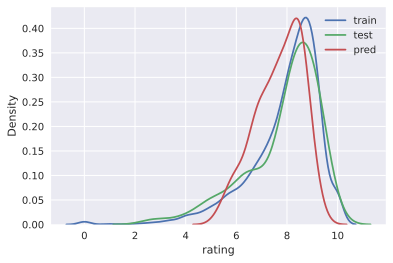

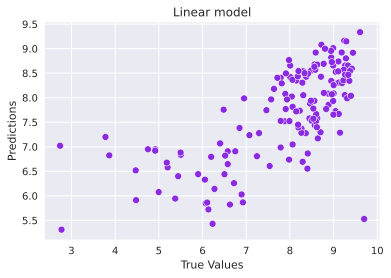

In [55]:
target_distr_linear(y_train, y_test, y_pred)

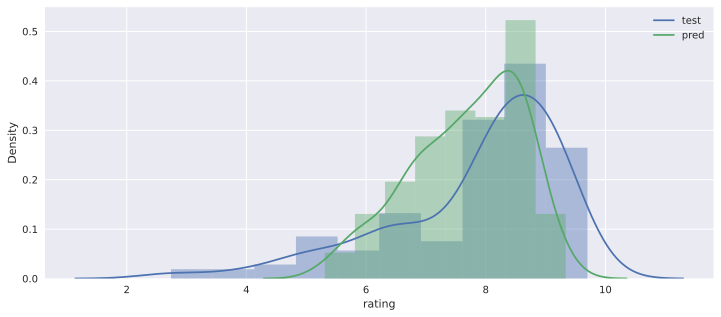

In [58]:
def draw_target_distr(y_test, y_pred, save_fig=False):
    plt.figure(figsize=(12, 5))
    sns.distplot(y_test)
    sns.distplot(y_pred)
    plt.legend(['test', 'pred'])
    plt.savefig('./okko_ratings_test_pred')
    plt.show()

draw_target_distr(y_test, y_pred)

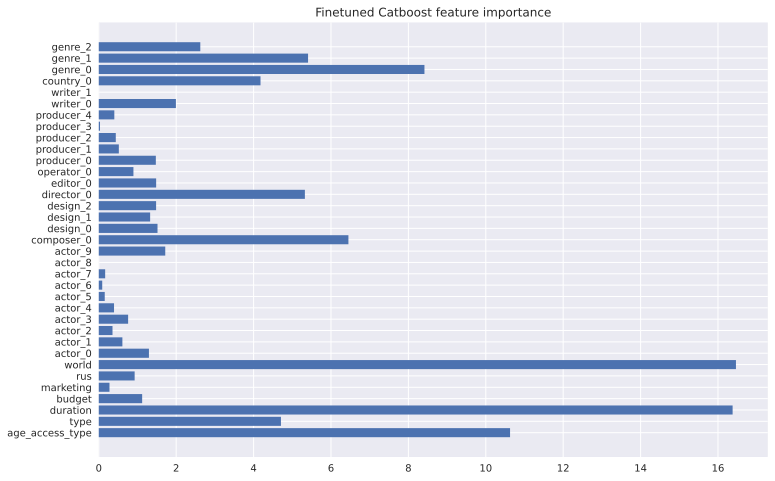

In [151]:
get_feature_imp(best_cat, train_dataset)

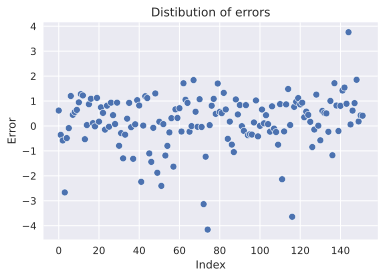

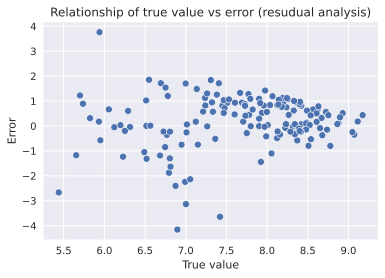

In [152]:
errors = y_test - y_pred
draw_res_analys(errors, y_pred)

In [57]:
calc_metrics(y_test, y_pred)

*** VAL **: 
MSE:   1.1051138134830347
RMSE:  1.0512439362407922
R2:    0.4744937631849252
MAE:   0.7786287106888087
MedAE: 0.6557340870375166
------------------------------


In [154]:
demo_df = df_pr.loc[df_pr['element_uid'].isin(['a8749d17-85fc-4ccf-ba56-75991c3a9da4',
                                               '02eaefe0-296d-4e6f-b52f-2e2507d07103',
                                                'ee48def6-c311-4b73-a878-1a5d3d1679a3',
                                                '9b202b16-55bf-418a-b01d-9f0329b18790',
                                                '49a3d528-44c0-408e-b6fc-a1507ce7641a'])]

ddf = demo_df.copy()

ddf.drop(['release_year', 'element_uid', 'name'], axis=1, inplace=True)

In [155]:
ddf.T

3444                   6550   \
age_access_type                   18                     18   
type                           MOVIE                  MOVIE   
duration                    15.89994              15.479437   
budget                           NaN                    NaN   
marketing                        NaN                    NaN   
rus                        14.844788              12.593543   
world                       18.41947                    NaN   
rating                      6.482998               6.519242   
actor_0                   Мишель Йео         Владимир Яглыч   
actor_1             Джейми Ли Кёртис            Роман Фомин   
actor_2                  Ке Хюи Куан   Маргарита Аброськина   
actor_3                  Стефани Сюй  Александр Соколовский   
actor_4                   Джеймс Хун     Игорь Золотовицкий   
actor_5                  Тэлли Медел         Мария Голицына   
actor_6                 Дженни Слейт       Василий Кортуков   
actor_7                Гарри Шам мл.         Сергей Тэсслер   
actor_8                 Рэнди Ньюман                     Na   
actor_9                    Бифф Уифф                     Na   
composer_0                  Сон Люкс         Юрий Ярушников   
design_0           Джейсон Кисвардей         Мария Утробина   
design_1                 Амелия Брук          Агния Балабан   
design_2                Ширли Курата                     Na   
director_0                  Дэн Кван         Юрий Ярушников   
editor_0                 Пол Роджерс         Юрий Ярушников   
operator_0              Ларкин Сайпл          Андрей Гуркин   
producer_0                   Эли Буш          Андрей Гуркин   
producer_1               Скотт Рудин         Оксана Ранкова   
producer_2             Кэри Лен Смит       Виктория Рунцова   
producer_3            Дэниэл Шайнерт           Юрий Марычев   
producer_4       Эллисон Роуз Картер  Анастасия Карачевская   
writer_0                    Дэн Кван          Юрий Троянкин   
writer_1              Дэниэл Шайнерт         Юрий Ярушников   
country_0                        usa                 russia   
genre_0                       Sci-Fi                 Comedy   
genre_1                       Action                     Na   
genre_2                       Comedy                     Na   

                                 9998                10433  \
age_access_type                     18                   6   
type                            SERIAL              SERIAL   
duration                     17.723526           16.269958   
budget                             NaN                 NaN   
marketing                          NaN                 NaN   
rus                                NaN                 NaN   
world                              NaN                 NaN   
rating                        9.717041            9.192744   
actor_0                 Дмитрий Нагиев   Екатерина Темнова   
actor_1          Константин Лавроненко   Карина Каграманян   
actor_2                Дмитрий Власкин  Джульетта Степанян   
actor_3                Юлия Афанасьева    Арман Навасардян   
actor_4             Георгий Мартиросян         Мариам Мано   
actor_5                Олег Каменщиков   Карине Мнацаканян   
actor_6                  Николай Козак      Армен Маргарян   
actor_7                Евгений Шириков      Нонна Гришаева   
actor_8                   Иван Федотов     Чулпан Хаматова   
actor_9               Александр Курлов    Светлана Иванова   
composer_0                Эдгар Акобян       Манук Казарян   
design_0             Давид Дадунашвили       Лилит Газарян   
design_1            Гульнара Шахмилова      Асмик Петросян   
design_2                            Na                  Na   
director_0             Сарик Андреасян       Арман Марутян   
editor_0             Арташес Андреасян         Денис Гуляр   
operator_0             Карен Манасерян       Мкртич Бароян   
producer_0            Гевонд Андреасян    Гевонд Андреасян   
producer_1             Са

In [156]:
X_demo, y_demo = ddf.drop('rating', axis=1), ddf['rating']

demo_dataset = cat.Pool(data=X_demo, 
                        label=y_demo,
                         cat_features=cat_features)

y_pred_demo = best_cat.predict(demo_dataset)



In [157]:
demo_df['TARGET'] = y_demo.tolist()
demo_df['PREDS'] = y_pred_demo.tolist()
demo_df

age_access_type               name    type  release_year   duration  \
3444                18  Всё везде и сразу   MOVIE          2022  15.899940   
6550                18          Приплыли!   MOVIE          2022  15.479437   
9998                18           Чикатило  SERIAL          2020  17.723526   
10433                6             Манюня  SERIAL          2021  16.269958   
10608               18            Оффлайн  SERIAL          2022  17.218706   

                                element_uid  budget  marketing        rus  \
3444   a8749d17-85fc-4ccf-ba56-75991c3a9da4     NaN        NaN  14.844788   
6550   02eaefe0-296d-4e6f-b52f-2e2507d07103     NaN        NaN  12.593543   
9998   ee48def6-c311-4b73-a878-1a5d3d1679a3     NaN        NaN        NaN   
10433  9b202b16-55bf-418a-b01d-9f0329b18790     NaN        NaN        NaN   
10608  49a3d528-44c0-408e-b6fc-a1507ce7641a     NaN        NaN        NaN   

          world  ...         producer_3             producer_4  \
3444   18.41947  ...     Дэниэл Шайнерт    Эллисон Роуз Картер   
6550        NaN  ...       Юрий Марычев  Анастасия Карачевская   
9998        NaN  ...  Софья Митрофанова           Артем Суджян   
10433       NaN  ...      Айк Тадевосян                     Na   
10608       NaN  ...     Джаник Файзиев          Владислав Кид   

                writer_0        writer_1 country_0   genre_0    genre_1  \
3444            Дэн Кван  Дэниэл Шайнерт       usa    Sci-Fi     Action   
6550       Юрий Троянкин  Юрий Ярушников    russia    Comedy         Na   
9998   Алексей Гравицкий   Сергей Волков    russia  Thriller      Drama   
10433       Гайк Асатрян  Наринэ Абгарян    russia    Comedy  Adventure   
10608      Владислав Кид  Иван Ермоленко    russia  Thriller      Drama   

         genre_2    TARGET     PREDS  
3444      Comedy  6.482998  7.923659  
6550          Na  6.519242  6.515733  
9998   Detective  9.717041  8.790144  
10433         Na  9.192744  8.194343  
10608  Detective  9.362527  8.244501  

[5 rows x 41 columns]

In [158]:
demo_df = demo_df.reset_index()

In [159]:
demo_df.drop(['index'], axis=1, inplace=True)

In [160]:
demo_df.T

0  \
age_access_type                                    18   
name                                Всё везде и сразу   
type                                            MOVIE   
release_year                                     2022   
duration                                     15.89994   
element_uid      a8749d17-85fc-4ccf-ba56-75991c3a9da4   
budget                                            NaN   
marketing                                         NaN   
rus                                         14.844788   
world                                        18.41947   
rating                                       6.482998   
actor_0                                    Мишель Йео   
actor_1                              Джейми Ли Кёртис   
actor_2                                   Ке Хюи Куан   
actor_3                                   Стефани Сюй   
actor_4                                    Джеймс Хун   
actor_5                                   Тэлли Медел   
actor_6                                  Дженни Слейт   
actor_7                                 Гарри Шам мл.   
actor_8                                  Рэнди Ньюман   
actor_9                                     Бифф Уифф   
composer_0                                   Сон Люкс   
design_0                            Джейсон Кисвардей   
design_1                                  Амелия Брук   
design_2                                 Ширли Курата   
director_0                                   Дэн Кван   
editor_0                                  Пол Роджерс   
operator_0                               Ларкин Сайпл   
producer_0                                    Эли Буш   
producer_1                                Скотт Рудин   
producer_2                              Кэри Лен Смит   
producer_3                             Дэниэл Шайнерт   
producer_4                        Эллисон Роуз Картер   
writer_0                                     Дэн Кван   
writer_1                               Дэниэл Шайнерт   
country_0                                         usa   
genre_0                                        Sci-Fi   
genre_1                                        Action   
genre_2                                        Comedy   
TARGET                                       6.482998   
PREDS                                        7.923659   

                                                    1  \
age_access_type                                    18   
name                                        Приплыли!   
type                                            MOVIE   
release_year                                     2022   
duration                                    15.479437   
element_uid      02eaefe0-296d-4e6f-b52f-2e2507d07103   
budget                                            NaN   
marketing                                         NaN   
rus                                         12.593543   
world                                             NaN   
rating                                       6.519242   
actor_0                                Владимир Яглыч   
actor_1                                   Роман Фомин   
actor_2                          Маргарита Аброськина   
actor_3                         Александр Соколовский   
actor_4                            Игорь Золотовицкий   
actor_5                                Мария Голицына   
actor_6                              Василий Кортуков   
actor_7                                Сергей Тэсслер   
actor_8                                            Na   
actor_9                                            Na   
composer_0                             Юрий Ярушников   
design_0                               Мария Утробина   
design_1                                Агния Балабан   
design_2                                           Na   
director_0                             Юрий Ярушников   
editor_0                               Юрий Ярушников   
operator_0                              Андрей Гуркин   
prod

In [161]:
demo_df.drop(['name', 'release_year', 'element_uid', 'rating', 'TARGET', 'PREDS'], axis=1, inplace=True)

In [162]:
demo_df.to_json('demo_films_preproc.json')

In [163]:
ddd = pd.read_json('demo_films_preproc.json')

In [164]:
ddd.loc[0]

age_access_type                     18
type                             MOVIE
duration                      15.89994
budget                             NaN
marketing                          NaN
rus                          14.844788
world                         18.41947
actor_0                     Мишель Йео
actor_1               Джейми Ли Кёртис
actor_2                    Ке Хюи Куан
actor_3                    Стефани Сюй
actor_4                     Джеймс Хун
actor_5                    Тэлли Медел
actor_6                   Дженни Слейт
actor_7                  Гарри Шам мл.
actor_8                   Рэнди Ньюман
actor_9                      Бифф Уифф
composer_0                    Сон Люкс
design_0             Джейсон Кисвардей
design_1                   Амелия Брук
design_2                  Ширли Курата
director_0                    Дэн Кван
editor_0                   Пол Роджерс
operator_0                Ларкин Сайпл
producer_0                     Эли Буш
producer_1               

In [88]:
from catboost import CatBoostRegressor
model = CatBoostRegressor()

model_path = './src/models/ratings_catboost'
tuned_model = model.load_model(model_path)




In [90]:
X_demo

age_access_type    type   duration  BUDGET  MARKETING        RUS  \
3444               18   MOVIE  15.899940     NaN        NaN  14.844788   
6550               18   MOVIE  15.479437     NaN        NaN  12.593543   
9998               18  SERIAL  17.723526     NaN        NaN        NaN   
10433               6  SERIAL  16.269958     NaN        NaN        NaN   
10608              18  SERIAL  17.218706     NaN        NaN        NaN   

          WORLD            ACTOR_0                ACTOR_1  \
3444   18.41947         Мишель Йео       Джейми Ли Кёртис   
6550        NaN     Владимир Яглыч            Роман Фомин   
9998        NaN     Дмитрий Нагиев  Константин Лавроненко   
10433       NaN  Екатерина Темнова      Карина Каграманян   
10608       NaN     Никита Ефремов           Денис Шведов   

                    ACTOR_2  ...       PRODUCER_1        PRODUCER_2  \
3444            Ке Хюи Куан  ...      Скотт Рудин     Кэри Лен Смит   
6550   Маргарита Аброськина  ...   Оксана Ранкова  Виктория Рунцова   
9998        Дмитрий Власкин  ...  Сарик Андреасян     Макар Кожухов   
10433    Джульетта Степанян  ...  Сарик Андреасян     Арман Марутян   
10608     Никита Кологривый  ...    Андрей Кретов     Макар Кожухов   

              PRODUCER_3             PRODUCER_4           WRITER_0  \
3444      Дэниэл Шайнерт    Эллисон Роуз Картер           Дэн Кван   
6550        Юрий Марычев  Анастасия Карачевская      Юрий Троянкин   
9998   Софья Митрофанова           Артем Суджян  Алексей Гравицкий   
10433      Айк Тадевосян                     Na       Гайк Асатрян   
10608     Джаник Файзиев          Владислав Кид      Владислав Кид   

             WRITER_1 country_0   genre_0    genre_1    genre_2  
3444   Дэниэл Шайнерт       usa    Sci-Fi     Action     Comedy  
6550   Юрий Ярушников    russia    Comedy         Na         Na  
9998    Сергей Волков    russia  Thriller      Drama  Detective  
10433  Наринэ Абгарян    russia    Comedy  Adventure         Na  
10608  Иван Ермоленко    russia  Thriller      Drama  Detective  

[5 rows x 35 columns]

In [91]:
sample = pd.DataFrame(X_demo.loc[3444], columns=X_demo.columns)

In [94]:
demo_dataset = cat.Pool(data=X_demo,
                        cat_features=cat_features)

y_pred = tuned_model.predict(demo_dataset)

In [95]:
y_pred

array([8.0473357 , 6.62751305, 8.7889647 , 8.22300578, 8.19866422])